# Gravity Machine analysis notebook

This notebook contains usage examples and worflows for Gravity Machine data analysis.

Earlier version of this analysis pipeline was used for generating figures for the paper:

> Krishnamurthy, Deepak, Hongquan Li, François Benoit du Rey, Pierre Cambournac, Adam G. Larson, Ethan Li, and Manu Prakash. "Scale-free vertical tracking microscopy." Nature Methods 17, no. 10 (2020): 1040-1051.

In [131]:
import numpy as np
import GravityMachine.Analysis as Analysis
import imp
imp.reload(Analysis)
import matplotlib.pyplot as plt
%matplotlib notebook

## Specify the data path and load the data as a GravityMachineTrack object

In [153]:
track_folder = 'D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018'
track_file = 'track_cropped.csv'

gm_analysis = Analysis.GravityMachineTrack(track_folder = track_folder, track_file = track_file, Tmin = 0, Tmax = 360)
gm_analysis.data

Loaded metadata...
{'Local time': None, 'PixelPermm': None, 'Objective': None}
**************************************************
['Time', 'Xobj', 'Yobj', 'Zobj', 'ThetaWheel', 'ZobjWheel', 'Manual Tracking', 'Image name', 'Focus Measure', 'Liquid Lens Phase', 'Liquid Lens Freq', 'Liquid Lens Ampl', 'Liquid Lens maxGain', 'Y FM maximum', 'LEDPanel color R', 'LEDPanel color G', 'LEDPanel color B']
{'Time': 'Time', 'X': 'Xobj', 'Y': 'Yobj', 'Z': 'ZobjWheel', 'Image name': 'Image name', 'X_image': 'Xobj_image', 'Z_image': 'Zobj'}
Warning X_image not found in input data
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\FluidVelocityTimeseries
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\images000
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\images001
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forT

Time          X         Y          Z    Image name X_image  \
0        0.000000  11.536563  0.171250   0.000000  IMG_3878.tif    None   
1        0.025081  11.536563  0.171250  -0.010422           NaN    None   
2        0.042399  11.536563  0.171250  -0.007238           NaN    None   
3        0.066455  11.536563  0.171250  -0.020845  IMG_3879.tif    None   
4        0.086212  11.533378  0.171250  -0.017660           NaN    None   
...           ...        ...       ...        ...           ...     ...   
16007  359.887024  10.319375  0.415938 -12.726232  IMG_8002.tif    None   
16008  359.912891  10.319375  0.415938 -12.715937           NaN    None   
16009  359.931388  10.316190  0.415938 -12.712753           NaN    None   
16010  359.963501  10.319062  0.415938 -12.715937  IMG_8003.tif    None   
16011  359.985319  10.318750  0.415938 -12.705643           NaN    None   

        Z_image   V_x   V_y   V_z  
0     -0.108280  None  None  None  
1     -0.108280  None  None  None  
2     -0.105096  None  None  None  
3     -0.108280  None  None  None  
4     -0.105096  None  None  None  
...         ...   ...   ...   ...  
16007  0.035032  None  None  None  
16008  0.035032  None  None  None  
16009  0.038217  None  None  None  
16010  0.035032  None  None  None  
16011  0.035032  None  None  None  

[16012 rows x 10 columns]

## Plot the object's X, Y, Z displacement time series

<IPython.core.display.Javascript object>


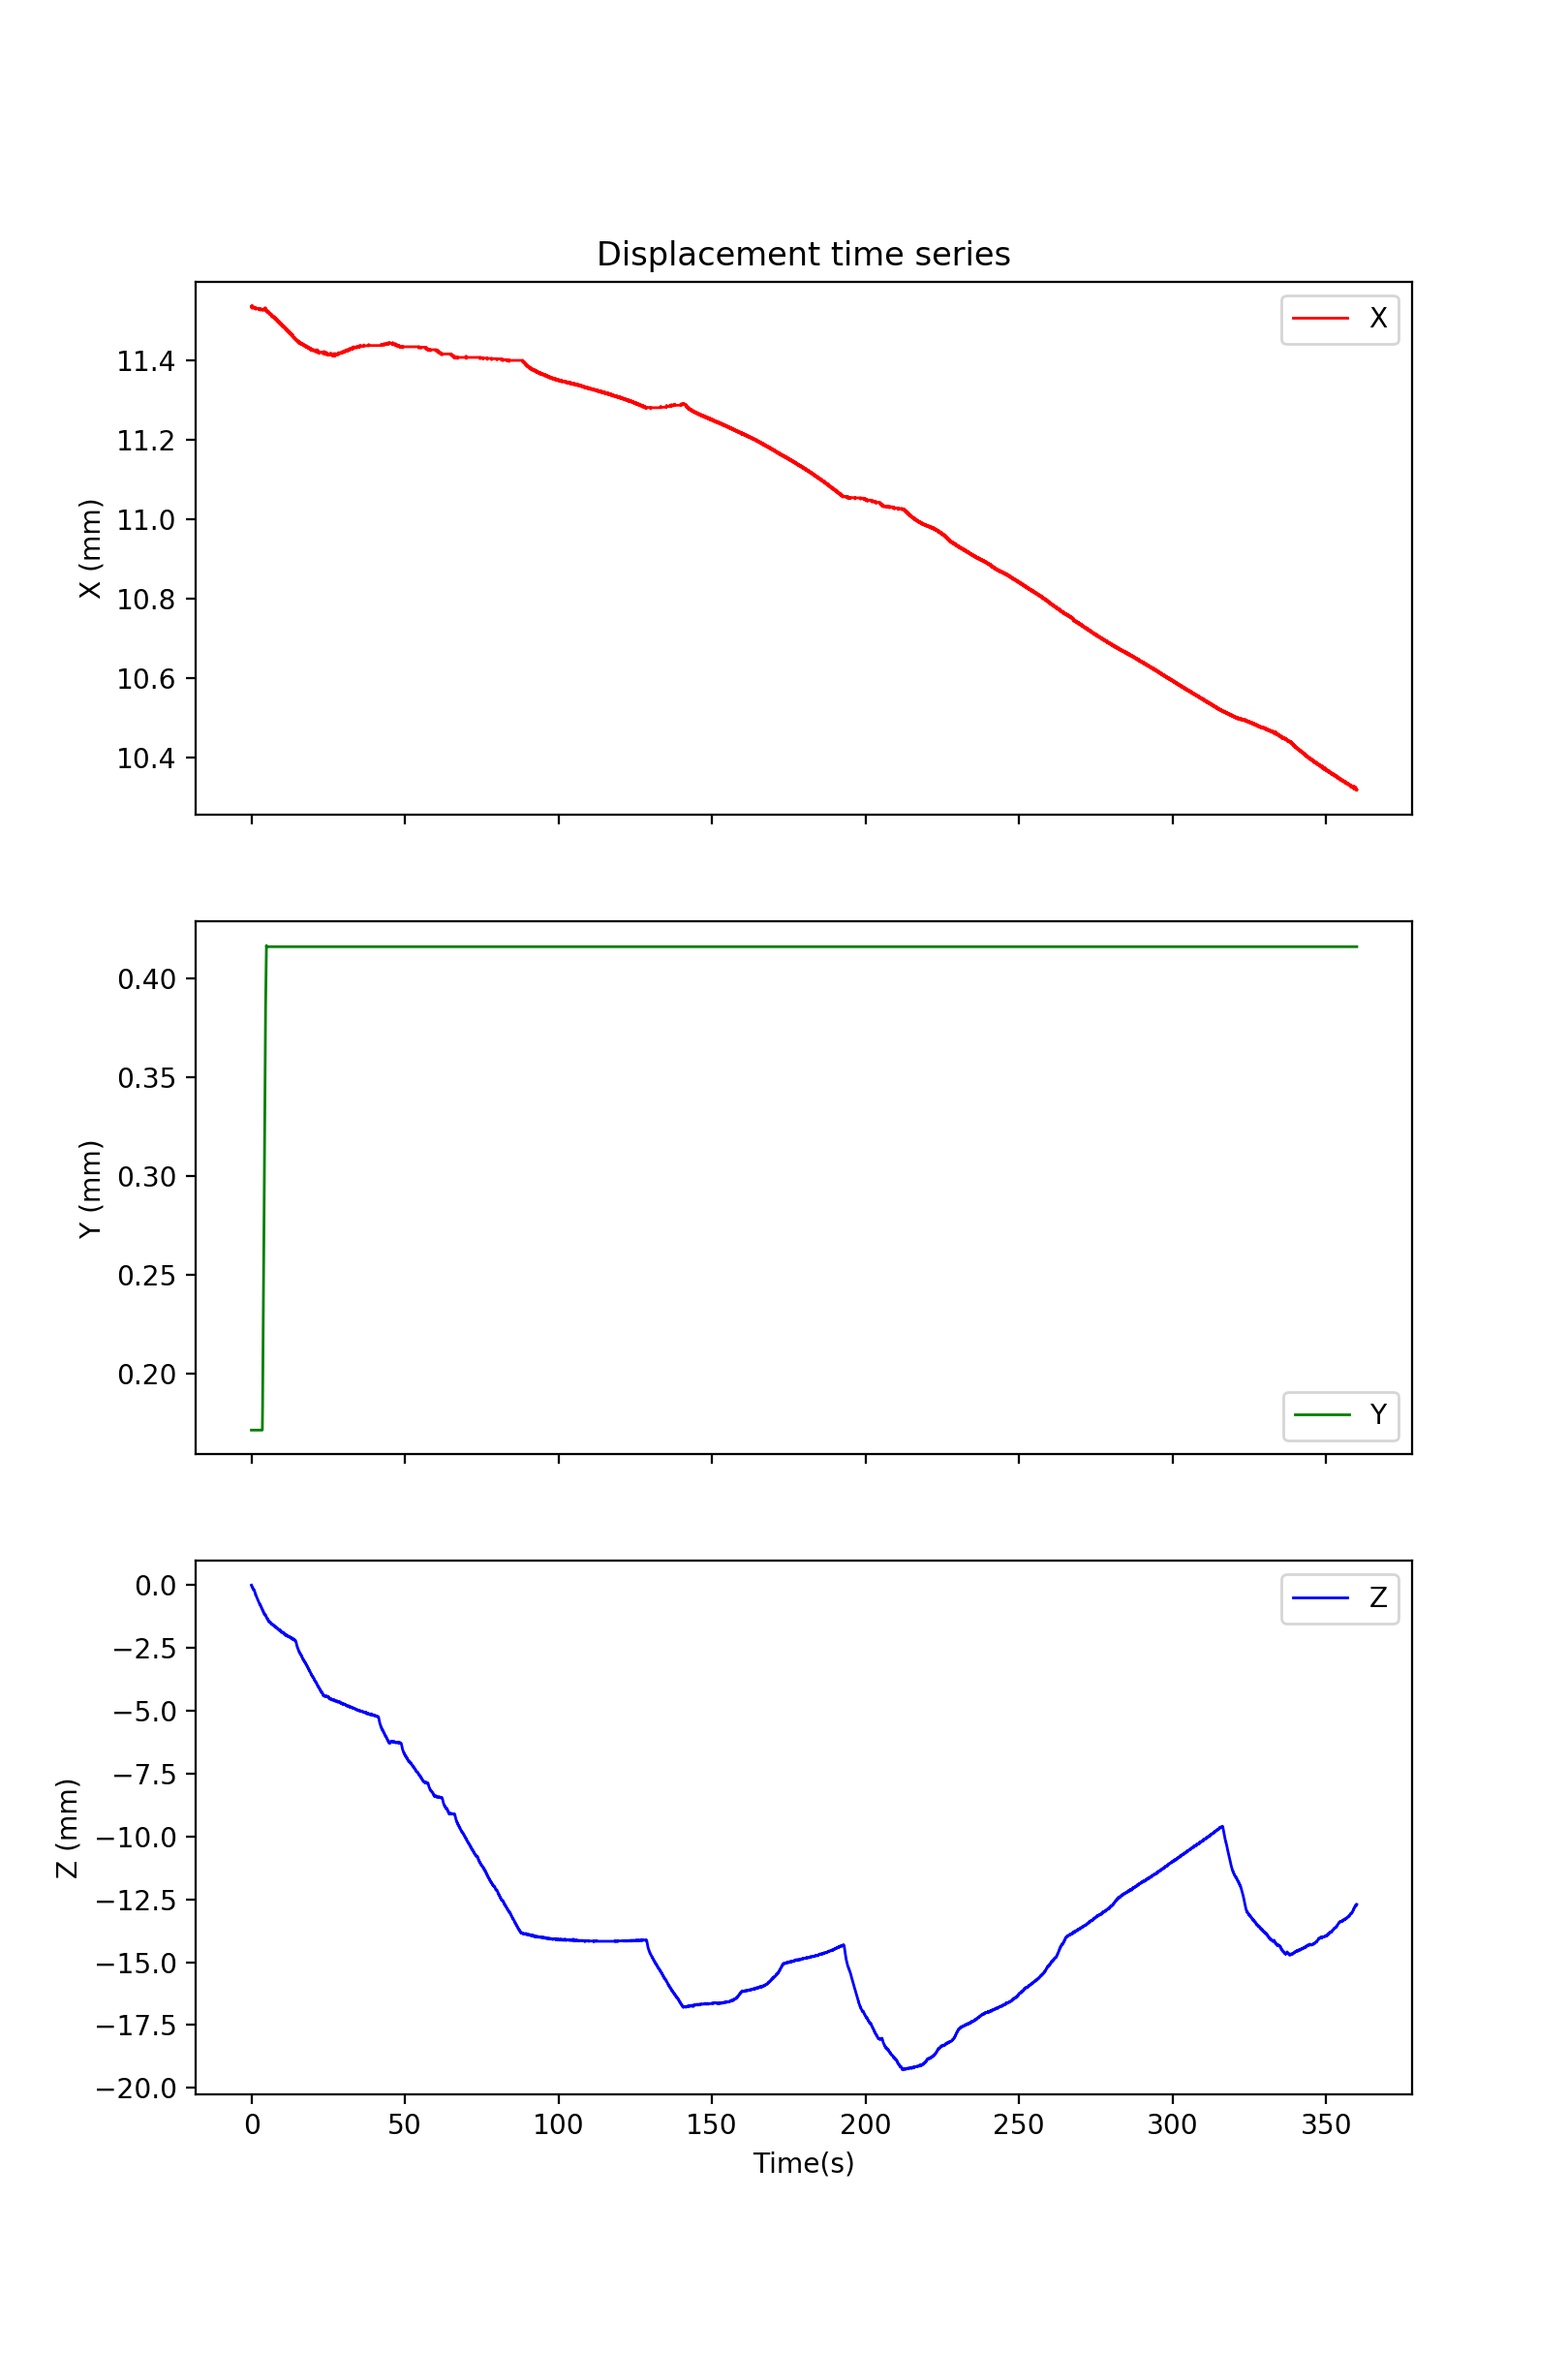

<IPython.core.display.Javascript object>


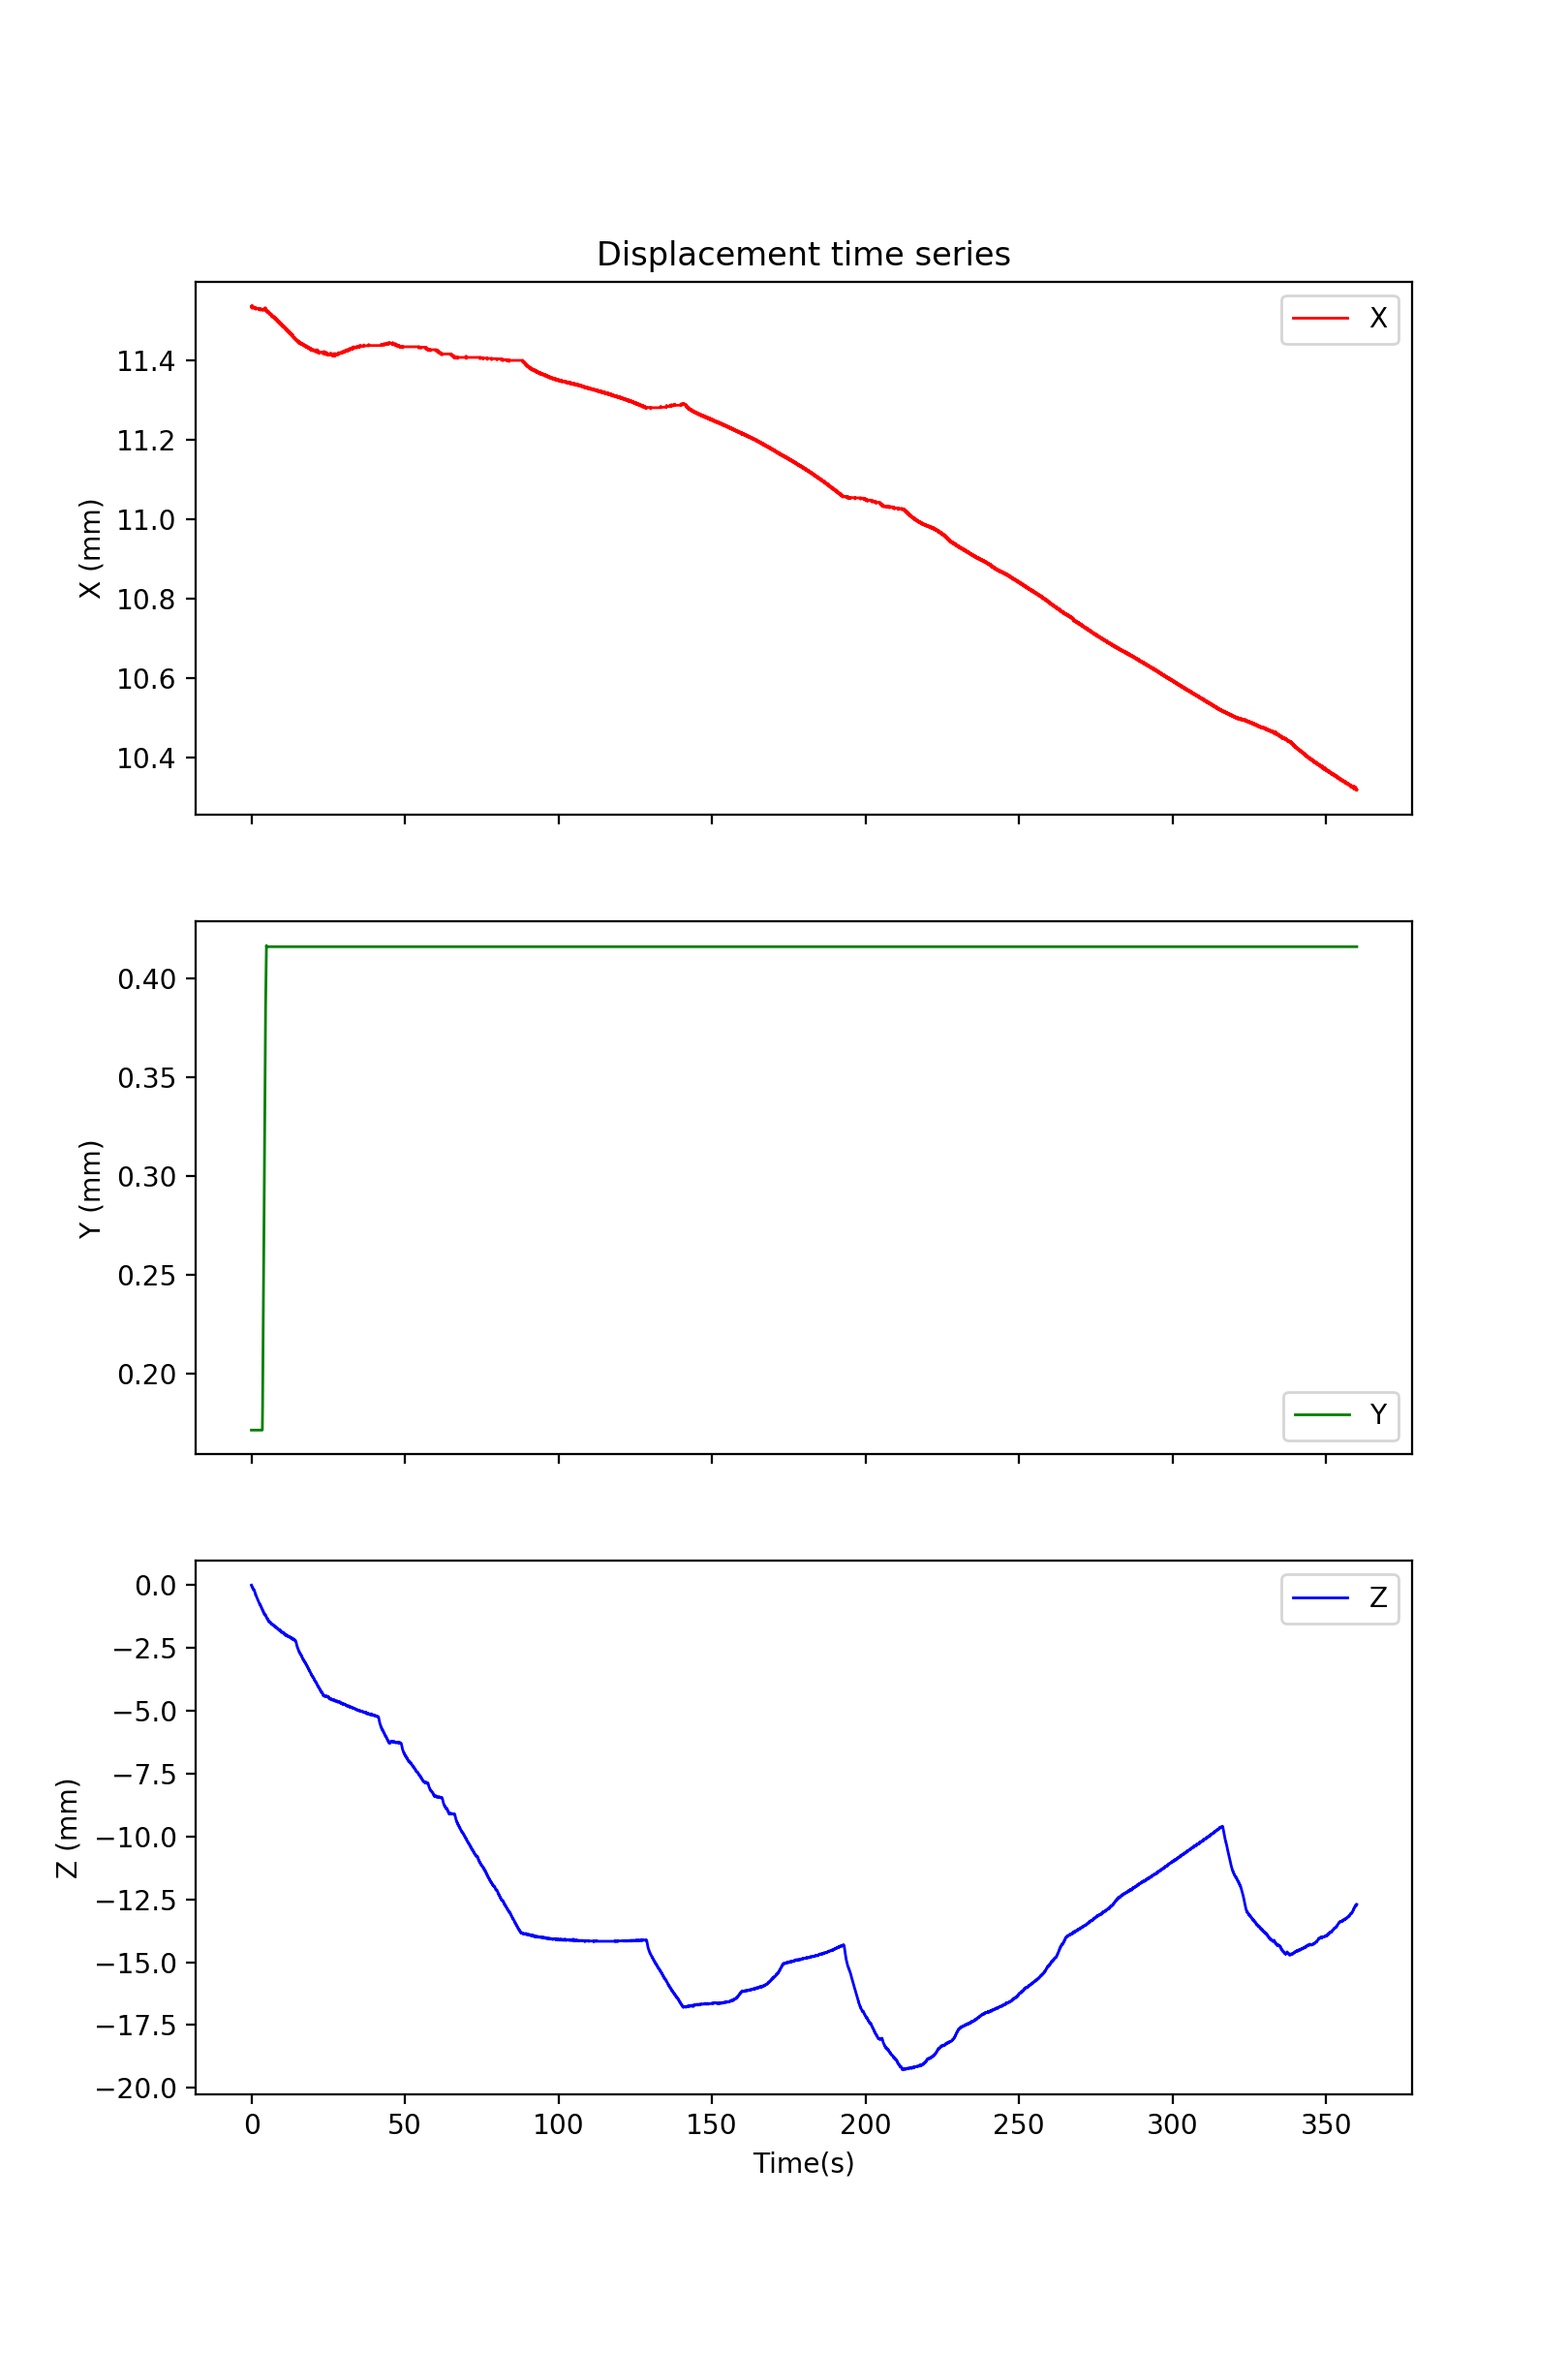

Saved Displacement time series.png to disk
Saved Displacement time series.svg to disk


In [154]:
# The analysis API has a built-in function to generate X, Y, Z displacement plots
gm_analysis.plot_displacement_timeseries()

# To save the plots to file, do the following
gm_analysis.plot_displacement_timeseries(save = True)

## Compute the object's velocity

In [155]:
gm_analysis.compute_velocity()

## Apply a low-pass filter to the velocity data to filter out high-freq noise


In [156]:
window_size = 40
print('Window size: ',window_size)
gm_analysis.data['V_x'] = np.array(gm_analysis.data['V_x'].rolling(window = window_size, min_periods=1, center = True).mean())
gm_analysis.data['V_y'] = np.array(gm_analysis.data['V_y'].rolling(window = window_size, min_periods=1, center = True).mean())
gm_analysis.data['V_z'] = np.array(gm_analysis.data['V_z'].rolling(window = window_size, min_periods=1, center = True).mean())

print(gm_analysis.data['V_x'])

Window size:  40
0       -0.003412
1       -0.003249
2       -0.003102
3       -0.002967
4       -0.002843
           ...   
16007   -0.006276
16008   -0.006537
16009   -0.006821
16010   -0.007132
16011   -0.007471
Name: V_x, Length: 16012, dtype: float64


## Plot a time-series for the velocity

<IPython.core.display.Javascript object>


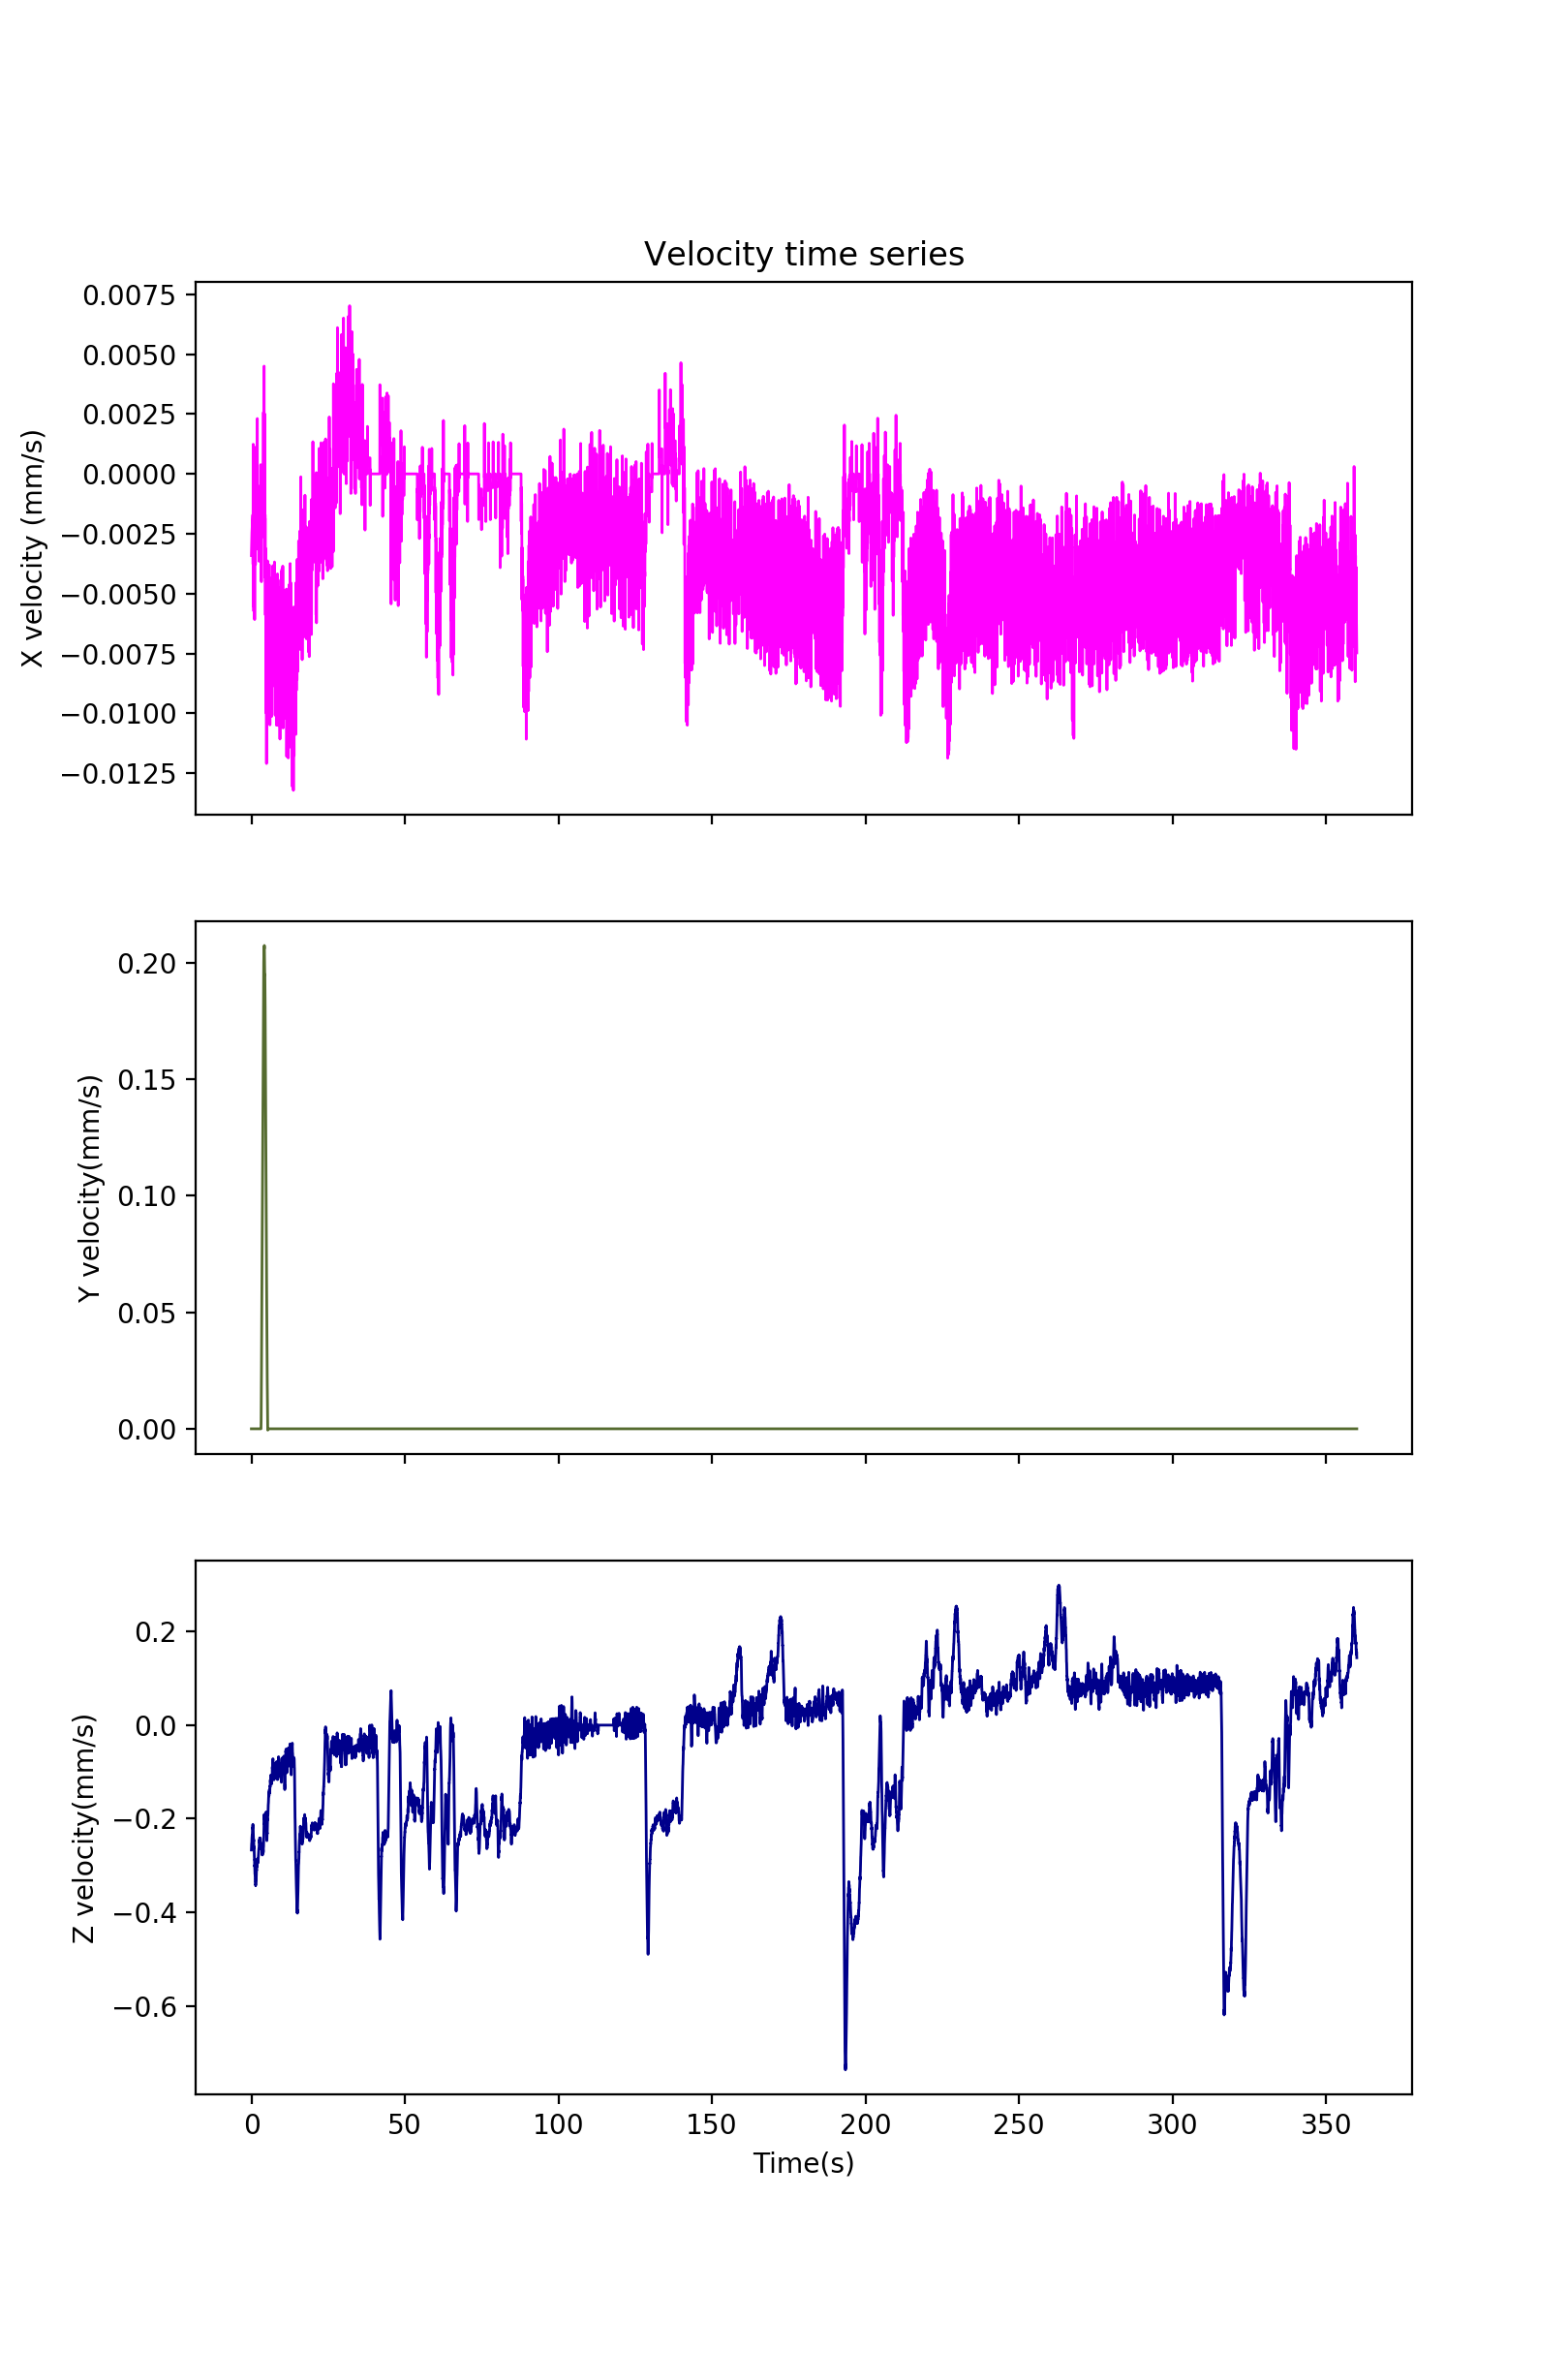

In [157]:
gm_analysis.plot_velocity_timeseries()

## Find the size of the object of interest

In [158]:
gm_analysis.find_object_size()

Color thresholds available! 
 Loading file D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\colorThresholds.pkl ...
Color thresholds for segmentation: 
 LOW: (0, 0, 69), HIGH : (255, 255, 255)
Loading organism size from memory ...
**************************************************
object diameter 0.15528175329706473 mm
object diameter max 0.15136040851568722 mm
object diameter min 0.15920309807844224 mm
**************************************************


## Running PIV on a pair of frames

--------------------------------------------------
Loading PIV data for: IMG_8000.tif and IMG_8001.tif 

--------------------------------------------------
0.05179317338155039


<IPython.core.display.Javascript object>


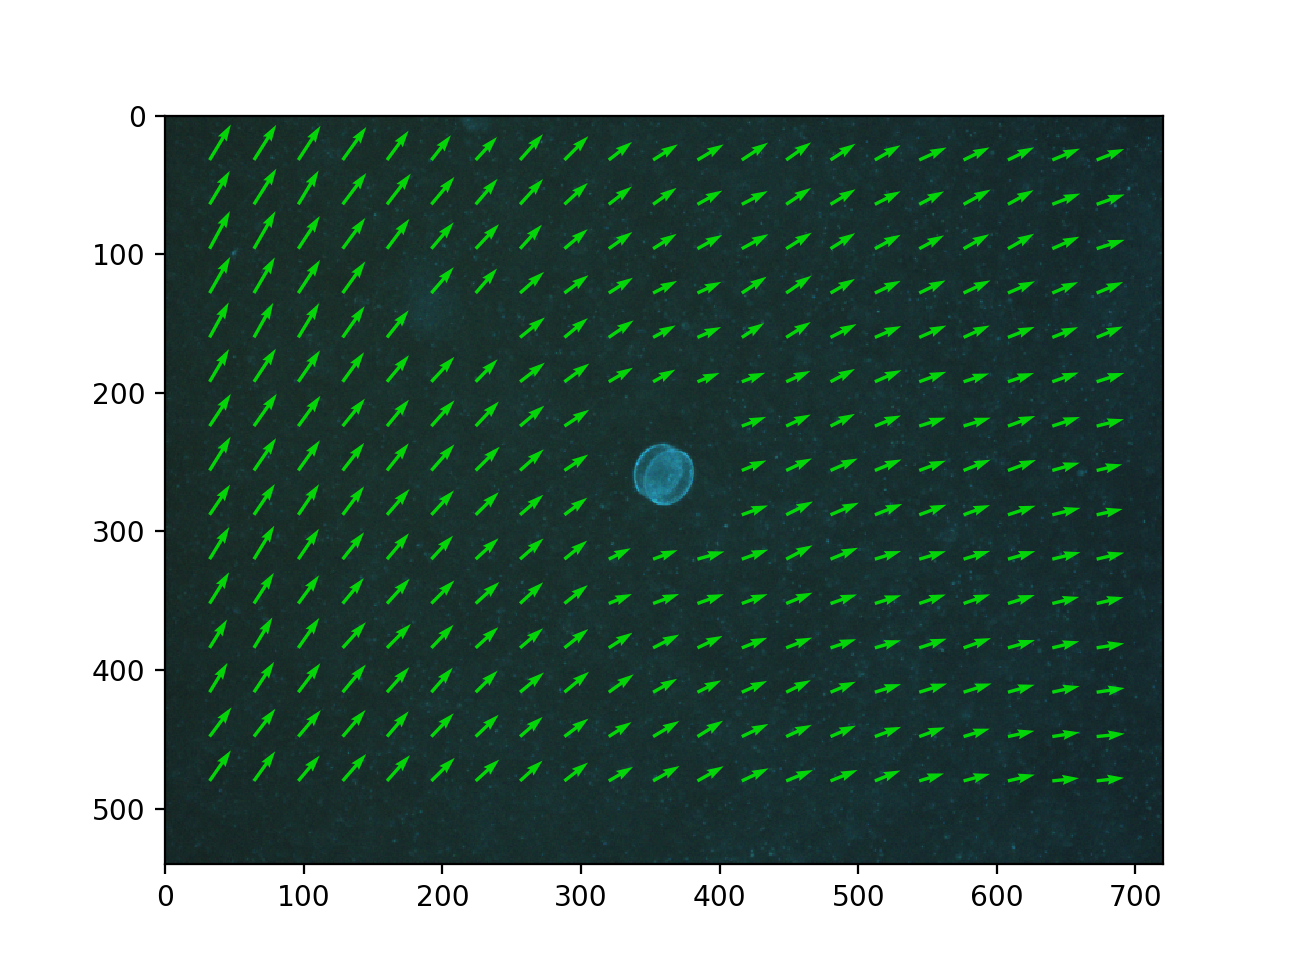

0.029884266974690352
0.02190890640686003


(0.029884266974690352,
 0.02190890640686003,
 0.0028886943966826666,
 0.010768361229206054)

In [159]:
image_a = 'IMG_8000.tif'
image_b = 'IMG_8001.tif'
gm_analysis.initialize_piv_analysis()
gm_analysis.compute_background_fluid_velocity(image_a, image_b)

## Running PIV analysis to compute the object's velocity and displacement relative to the fluid

In [50]:
gm_analysis.compute_fluid_velocity_timeseries()

Fluid time series found! Loading ...


## Compute the corrected displacement of the object relative to the fluid

In [ ]:
gm_analysis.compute_fluid_relative_disp(overwrite_flag = True, save = True)

  0%|          | 1/4125 [00:00<07:45,  8.85it/s]

calculating fluid velocity time series ...
1
Consequtive images found ...
IMG_3878.tif
IMG_3879.tif
--------------------------------------------------
Loading PIV data for: IMG_3878.tif and IMG_3879.tif 

--------------------------------------------------
0.11903691819360533
-0.0016469801703017555
0.12068389836390708
1
Consequtive images found ...
IMG_3879.tif
IMG_3880.tif
--------------------------------------------------
Loading PIV data for: IMG_3879.tif and IMG_3880.tif 

--------------------------------------------------
0.1088409028944315


  0%|          | 3/4125 [00:00<07:34,  9.07it/s]

0.041404962535990845
0.06743594035844064
1
Consequtive images found ...
IMG_3880.tif
IMG_3881.tif
--------------------------------------------------
Loading PIV data for: IMG_3880.tif and IMG_3881.tif 

--------------------------------------------------
0.15747761354551995
-0.04217315704806227
0.1996507705935822
1
Consequtive images found ...
IMG_3881.tif
IMG_3882.tif
--------------------------------------------------
Loading PIV data for: IMG_3881.tif and IMG_3882.tif 

--------------------------------------------------
0.08993776771795624


  0%|          | 5/4125 [00:00<07:35,  9.04it/s]

0.04338628283232564
0.04655148488563061
1
Consequtive images found ...
IMG_3882.tif
IMG_3883.tif
--------------------------------------------------
Loading PIV data for: IMG_3882.tif and IMG_3883.tif 

--------------------------------------------------
0.2011579694927606
-0.05352550334204584
0.2546834728348064
1
Consequtive images found ...
IMG_3883.tif
IMG_3884.tif
--------------------------------------------------
Loading PIV data for: IMG_3883.tif and IMG_3884.tif 

--------------------------------------------------
0.12110647779094338


  0%|          | 7/4125 [00:00<07:32,  9.11it/s]

0.03434569155903686
0.08676078623190653
1
Consequtive images found ...
IMG_3884.tif
IMG_3885.tif
--------------------------------------------------
Loading PIV data for: IMG_3884.tif and IMG_3885.tif 

--------------------------------------------------
0.15593217121197617
-0.0024010292292310355
0.15833320044120722
1
Consequtive images found ...
IMG_3885.tif
IMG_3886.tif
--------------------------------------------------
Loading PIV data for: IMG_3885.tif and IMG_3886.tif 

--------------------------------------------------
0.14998656758929405


  0%|          | 9/4125 [00:00<07:30,  9.14it/s]

-0.0032156598982837413
0.1532022274875778
1
Consequtive images found ...
IMG_3886.tif
IMG_3887.tif
--------------------------------------------------
Loading PIV data for: IMG_3886.tif and IMG_3887.tif 

--------------------------------------------------
0.12293623386984665
-0.003047309668938536
0.1259835435387852
1
Consequtive images found ...
IMG_3887.tif
IMG_3888.tif
--------------------------------------------------
Loading PIV data for: IMG_3887.tif and IMG_3888.tif 

--------------------------------------------------
0.13005266048867617


  0%|          | 11/4125 [00:01<07:30,  9.14it/s]

-0.0028337626545296172
0.13288642314320578
1
Consequtive images found ...
IMG_3888.tif
IMG_3889.tif
--------------------------------------------------
Loading PIV data for: IMG_3888.tif and IMG_3889.tif 

--------------------------------------------------
0.12322754156524367
-0.004143331015457253
0.12737087258070093
1
Consequtive images found ...
IMG_3889.tif
IMG_3890.tif
--------------------------------------------------
Loading PIV data for: IMG_3889.tif and IMG_3890.tif 

--------------------------------------------------
0.11010905161702536


  0%|          | 13/4125 [00:01<07:34,  9.06it/s]

0.002799620020357144
0.10730943159666823
1
Consequtive images found ...
IMG_3890.tif
IMG_3891.tif
--------------------------------------------------
Loading PIV data for: IMG_3890.tif and IMG_3891.tif 

--------------------------------------------------
0.13098946765657923
-0.0026926449692017745
0.133682112625781
1
Consequtive images found ...
IMG_3891.tif
IMG_3892.tif
--------------------------------------------------
Loading PIV data for: IMG_3891.tif and IMG_3892.tif 

--------------------------------------------------
0.1613227030913474


  0%|          | 15/4125 [00:01<07:33,  9.06it/s]

0.008639292309741496
0.15268341078160594
1
Consequtive images found ...
IMG_3892.tif
IMG_3893.tif
--------------------------------------------------
Loading PIV data for: IMG_3892.tif and IMG_3893.tif 

--------------------------------------------------
0.17426419042246571
-0.003507695072675429
0.17777188549514114
1
Consequtive images found ...
IMG_3893.tif
IMG_3894.tif
--------------------------------------------------
Loading PIV data for: IMG_3893.tif and IMG_3894.tif 

--------------------------------------------------
0.19325902529450995


  0%|          | 17/4125 [00:01<07:30,  9.13it/s]

-0.0025225142416091693
0.19578153953611913
1
Consequtive images found ...
IMG_3894.tif
IMG_3895.tif
--------------------------------------------------
Loading PIV data for: IMG_3894.tif and IMG_3895.tif 

--------------------------------------------------
0.17115594619935529
-0.002700763655746811
0.17385670985510213
1
Consequtive images found ...
IMG_3895.tif
IMG_3896.tif
--------------------------------------------------
Loading PIV data for: IMG_3895.tif and IMG_3896.tif 

--------------------------------------------------
0.19284045058607804


  0%|          | 19/4125 [00:02<07:30,  9.11it/s]

-0.00029574293441797896
0.19313619352049605
1
Consequtive images found ...
IMG_3896.tif
IMG_3897.tif
--------------------------------------------------
Loading PIV data for: IMG_3896.tif and IMG_3897.tif 

--------------------------------------------------
0.19810874716820798
0.0011803149335942566
0.1969284322346137
1
Consequtive images found ...
IMG_3897.tif
IMG_3898.tif
--------------------------------------------------
Loading PIV data for: IMG_3897.tif and IMG_3898.tif 

--------------------------------------------------
0.16339006596473685


  1%|          | 21/4125 [00:02<07:30,  9.11it/s]

-0.0033600110845509166
0.16675007704928776
1
Consequtive images found ...
IMG_3898.tif
IMG_3899.tif
--------------------------------------------------
Loading PIV data for: IMG_3898.tif and IMG_3899.tif 

--------------------------------------------------
0.1787598235115384
-0.004713122134450007
0.1834729456459884
1
Consequtive images found ...
IMG_3899.tif
IMG_3900.tif
--------------------------------------------------
Loading PIV data for: IMG_3899.tif and IMG_3900.tif 

--------------------------------------------------
0.17586214978522724


  1%|          | 23/4125 [00:02<07:27,  9.16it/s]

-0.003775495125968542
0.17963764491119577
1
Consequtive images found ...
IMG_3900.tif
IMG_3901.tif
--------------------------------------------------
Loading PIV data for: IMG_3900.tif and IMG_3901.tif 

--------------------------------------------------
0.146844285926088
-0.0038103478975905704
0.15065463382367858
1
Consequtive images found ...
IMG_3901.tif
IMG_3902.tif
--------------------------------------------------
Loading PIV data for: IMG_3901.tif and IMG_3902.tif 

--------------------------------------------------
0.2003330253337553


  1%|          | 25/4125 [00:02<07:29,  9.13it/s]

-0.0022205676924500276
0.20255359302620538
1
Consequtive images found ...
IMG_3902.tif
IMG_3903.tif
--------------------------------------------------
Loading PIV data for: IMG_3902.tif and IMG_3903.tif 

--------------------------------------------------
0.15779756707015247
-0.0038381638992981554
0.16163573096945064
1
Consequtive images found ...
IMG_3903.tif
IMG_3904.tif
--------------------------------------------------
Loading PIV data for: IMG_3903.tif and IMG_3904.tif 

--------------------------------------------------
0.18019192399703332


  1%|          | 27/4125 [00:03<08:08,  8.39it/s]

-0.003679139897478641
0.18387106389451197
1
Consequtive images found ...
IMG_3904.tif
IMG_3905.tif
--------------------------------------------------
Loading PIV data for: IMG_3904.tif and IMG_3905.tif 

--------------------------------------------------
0.16673575946502142
-0.005125358015172913
0.1718611174801943
1
Consequtive images found ...
IMG_3905.tif
IMG_3906.tif
--------------------------------------------------
Loading PIV data for: IMG_3905.tif and IMG_3906.tif 

--------------------------------------------------
0.18382873983572964


  1%|          | 29/4125 [00:03<07:48,  8.75it/s]

-0.002660755257060264
0.18648949509278992
1
Consequtive images found ...
IMG_3906.tif
IMG_3907.tif
--------------------------------------------------
Loading PIV data for: IMG_3906.tif and IMG_3907.tif 

--------------------------------------------------
0.18311769505002243
0.00020026422228385413
0.18291743082773856
1
Consequtive images found ...
IMG_3907.tif
IMG_3908.tif
--------------------------------------------------
Loading PIV data for: IMG_3907.tif and IMG_3908.tif 

--------------------------------------------------
0.1811203921761112


  1%|          | 31/4125 [00:03<07:35,  8.98it/s]

-0.004792917048508683
0.1859133092246199
1
Consequtive images found ...
IMG_3908.tif
IMG_3909.tif
--------------------------------------------------
Loading PIV data for: IMG_3908.tif and IMG_3909.tif 

--------------------------------------------------
0.16268012885977684
0.00222227507043863
0.16045785378933816
1
Consequtive images found ...
IMG_3909.tif
IMG_3910.tif
--------------------------------------------------
Loading PIV data for: IMG_3909.tif and IMG_3910.tif 

--------------------------------------------------
0.1746940166287824


  1%|          | 33/4125 [00:03<07:32,  9.05it/s]

-0.00475912960581137
0.17945314623459377
1
Consequtive images found ...
IMG_3910.tif
IMG_3911.tif
--------------------------------------------------
Loading PIV data for: IMG_3910.tif and IMG_3911.tif 

--------------------------------------------------
0.1653434950544244
-0.004377633571128658
0.16972112862555302
1
Consequtive images found ...
IMG_3911.tif
IMG_3912.tif
--------------------------------------------------
Loading PIV data for: IMG_3911.tif and IMG_3912.tif 

--------------------------------------------------
0.14343934425093108


  1%|          | 35/4125 [00:03<07:26,  9.17it/s]

-0.0031768565203954464
0.1466162007713265
1
Consequtive images found ...
IMG_3912.tif
IMG_3913.tif
--------------------------------------------------
Loading PIV data for: IMG_3912.tif and IMG_3913.tif 

--------------------------------------------------
0.17916025058034912
0.0012970087454956675
0.17786324183485347
1
Consequtive images found ...
IMG_3913.tif
IMG_3914.tif
--------------------------------------------------
Loading PIV data for: IMG_3913.tif and IMG_3914.tif 

--------------------------------------------------
0.14770822470289224


  1%|          | 37/4125 [00:04<07:22,  9.23it/s]

-0.0025240694883916694
0.1502322941912839
1
Consequtive images found ...
IMG_3914.tif
IMG_3915.tif
--------------------------------------------------
Loading PIV data for: IMG_3914.tif and IMG_3915.tif 

--------------------------------------------------
0.16178488256137954
-0.003715733570124596
0.16550061613150416
1
Consequtive images found ...
IMG_3915.tif
IMG_3916.tif
--------------------------------------------------
Loading PIV data for: IMG_3915.tif and IMG_3916.tif 

--------------------------------------------------
0.14575028777496649


  1%|          | 39/4125 [00:04<07:18,  9.32it/s]

-0.0031053614763550397
0.14885564925132155
1
Consequtive images found ...
IMG_3916.tif
IMG_3917.tif
--------------------------------------------------
Loading PIV data for: IMG_3916.tif and IMG_3917.tif 

--------------------------------------------------
0.15670069500680642
-0.008060082565868954
0.16476077757267538
1
Consequtive images found ...
IMG_3917.tif
IMG_3918.tif
--------------------------------------------------
Loading PIV data for: IMG_3917.tif and IMG_3918.tif 

--------------------------------------------------
0.1689179592065298


  1%|          | 41/4125 [00:04<07:26,  9.14it/s]

-0.002052729234010484
0.17097068844054028
1
Consequtive images found ...
IMG_3918.tif
IMG_3919.tif
--------------------------------------------------
Loading PIV data for: IMG_3918.tif and IMG_3919.tif 

--------------------------------------------------
0.17515225266128506
-0.004109652039551114
0.17926190470083617
1
Consequtive images found ...
IMG_3919.tif
IMG_3920.tif
--------------------------------------------------
Loading PIV data for: IMG_3919.tif and IMG_3920.tif 

--------------------------------------------------
0.18094149759749983


  1%|          | 43/4125 [00:04<07:25,  9.15it/s]

-0.001805692664161846
0.1827471902616617
1
Consequtive images found ...
IMG_3920.tif
IMG_3921.tif
--------------------------------------------------
Loading PIV data for: IMG_3920.tif and IMG_3921.tif 

--------------------------------------------------
0.1761283282024926
-0.007680548467778413
0.183808876670271
1
Consequtive images found ...
IMG_3921.tif
IMG_3922.tif
--------------------------------------------------
Loading PIV data for: IMG_3921.tif and IMG_3922.tif 

--------------------------------------------------
0.18039282504954154


  1%|          | 45/4125 [00:04<07:25,  9.16it/s]

0.006098797822088136
0.17429402722745338
1
Consequtive images found ...
IMG_3922.tif
IMG_3923.tif
--------------------------------------------------
Loading PIV data for: IMG_3922.tif and IMG_3923.tif 

--------------------------------------------------
0.14779523176446463
-0.005536335701376004
0.15333156746584062
1
Consequtive images found ...
IMG_3923.tif
IMG_3924.tif
--------------------------------------------------
Loading PIV data for: IMG_3923.tif and IMG_3924.tif 

--------------------------------------------------
0.17542401651505024


  1%|          | 47/4125 [00:05<07:27,  9.12it/s]

-0.009433037966915274
0.1848570544819655
1
Consequtive images found ...
IMG_3924.tif
IMG_3925.tif
--------------------------------------------------
Loading PIV data for: IMG_3924.tif and IMG_3925.tif 

--------------------------------------------------
0.1432307562150498
-0.004044858511334841
0.14727561472638462
1
Consequtive images found ...
IMG_3925.tif
IMG_3926.tif
--------------------------------------------------
Loading PIV data for: IMG_3925.tif and IMG_3926.tif 

--------------------------------------------------
0.17798569727483218


  1%|          | 49/4125 [00:05<07:27,  9.12it/s]

-0.001816160153496525
0.1798018574283287
1
Consequtive images found ...
IMG_3926.tif
IMG_3927.tif
--------------------------------------------------
Loading PIV data for: IMG_3926.tif and IMG_3927.tif 

--------------------------------------------------
0.16806889629081304
-0.006273354906640077
0.17434225119745314
1
Consequtive images found ...
IMG_3927.tif
IMG_3928.tif
--------------------------------------------------
Loading PIV data for: IMG_3927.tif and IMG_3928.tif 

--------------------------------------------------
0.1489174659077774


  1%|          | 51/4125 [00:05<07:22,  9.21it/s]

-0.0011659738765829588
0.15008343978436037
1
Consequtive images found ...
IMG_3928.tif
IMG_3929.tif
--------------------------------------------------
Loading PIV data for: IMG_3928.tif and IMG_3929.tif 

--------------------------------------------------
0.17600022422753692
0.0002913862314330735
0.17570883799610384
1
Consequtive images found ...
IMG_3929.tif
IMG_3930.tif
--------------------------------------------------
Loading PIV data for: IMG_3929.tif and IMG_3930.tif 

--------------------------------------------------
0.18552967862476274


  1%|▏         | 53/4125 [00:05<07:23,  9.17it/s]

-0.04093397450016448
0.2264636531249272
1
Consequtive images found ...
IMG_3930.tif
IMG_3931.tif
--------------------------------------------------
Loading PIV data for: IMG_3930.tif and IMG_3931.tif 

--------------------------------------------------
0.15180620082992088
-0.008537074058455444
0.16034327488837632
1
Consequtive images found ...
IMG_3931.tif
IMG_3932.tif
--------------------------------------------------
Loading PIV data for: IMG_3931.tif and IMG_3932.tif 

--------------------------------------------------
0.10358783596403702


  1%|▏         | 55/4125 [00:06<07:19,  9.25it/s]

-0.001350574912212117
0.10493841087624915
1
Consequtive images found ...
IMG_3932.tif
IMG_3933.tif
--------------------------------------------------
Loading PIV data for: IMG_3932.tif and IMG_3933.tif 

--------------------------------------------------
0.07767884854652857
0.043248510549884975
0.03443033799664359
1
Consequtive images found ...
IMG_3933.tif
IMG_3934.tif
--------------------------------------------------
Loading PIV data for: IMG_3933.tif and IMG_3934.tif 

--------------------------------------------------
0.11378597411190583


  1%|▏         | 57/4125 [00:06<07:19,  9.25it/s]

-0.006118982790856346
0.1199049569027622
1
Consequtive images found ...
IMG_3934.tif
IMG_3935.tif
--------------------------------------------------
Loading PIV data for: IMG_3934.tif and IMG_3935.tif 

--------------------------------------------------
0.12015318246442494
0.005115976595978608
0.11503720586844635
1
Consequtive images found ...
IMG_3935.tif
IMG_3936.tif
--------------------------------------------------
Loading PIV data for: IMG_3935.tif and IMG_3936.tif 

--------------------------------------------------
0.15265989381842185


  1%|▏         | 59/4125 [00:06<07:19,  9.24it/s]

0.011619045102767286
0.14104084871565456
1
Consequtive images found ...
IMG_3936.tif
IMG_3937.tif
--------------------------------------------------
Loading PIV data for: IMG_3936.tif and IMG_3937.tif 

--------------------------------------------------
0.13571176860498213
0.0018984346480790425
0.1338133339569031
1
Consequtive images found ...
IMG_3937.tif
IMG_3938.tif
--------------------------------------------------
Loading PIV data for: IMG_3937.tif and IMG_3938.tif 

--------------------------------------------------
0.12936080643392184


  1%|▏         | 61/4125 [00:06<08:02,  8.43it/s]

0.0005365673934370997
0.1288242390404847
1
Consequtive images found ...
IMG_3938.tif
IMG_3939.tif
--------------------------------------------------
Loading PIV data for: IMG_3938.tif and IMG_3939.tif 

--------------------------------------------------
0.11638694413804297
0.0017424980677081985
0.11464444607033478
1
Consequtive images found ...
IMG_3939.tif
IMG_3940.tif
--------------------------------------------------
Loading PIV data for: IMG_3939.tif and IMG_3940.tif 

--------------------------------------------------
0.12139412506128884


  2%|▏         | 63/4125 [00:06<07:41,  8.79it/s]

2.5947475231989483e-05
0.12136817758605686
1
Consequtive images found ...
IMG_3940.tif
IMG_3941.tif
--------------------------------------------------
Loading PIV data for: IMG_3940.tif and IMG_3941.tif 

--------------------------------------------------
0.126189224718622
-0.003409253413280672
0.12959847813190267
1
Consequtive images found ...
IMG_3941.tif
IMG_3942.tif
--------------------------------------------------
Loading PIV data for: IMG_3941.tif and IMG_3942.tif 

--------------------------------------------------
0.10765862780400366


  2%|▏         | 65/4125 [00:07<07:28,  9.05it/s]

0.005648687746369697
0.10200994005763396
1
Consequtive images found ...
IMG_3942.tif
IMG_3943.tif
--------------------------------------------------
Loading PIV data for: IMG_3942.tif and IMG_3943.tif 

--------------------------------------------------
0.12035673092884974
-0.0043014216701732395
0.12465815259902298
1
Consequtive images found ...
IMG_3943.tif
IMG_3944.tif
--------------------------------------------------
Loading PIV data for: IMG_3943.tif and IMG_3944.tif 

--------------------------------------------------
0.10761735657913304


  2%|▏         | 67/4125 [00:07<07:30,  9.01it/s]

-0.005294904627418461
0.11291226120655151
1
Consequtive images found ...
IMG_3944.tif
IMG_3945.tif
--------------------------------------------------
Loading PIV data for: IMG_3944.tif and IMG_3945.tif 

--------------------------------------------------
0.11145426126930633
0.008812650889566133
0.10264161037974022
1
Consequtive images found ...
IMG_3945.tif
IMG_3946.tif
--------------------------------------------------
Loading PIV data for: IMG_3945.tif and IMG_3946.tif 

--------------------------------------------------
0.11288421007122433


  2%|▏         | 69/4125 [00:07<07:24,  9.13it/s]

0.00047999629488194227
0.11240421377634241
1
Consequtive images found ...
IMG_3946.tif
IMG_3947.tif
--------------------------------------------------
Loading PIV data for: IMG_3946.tif and IMG_3947.tif 

--------------------------------------------------
0.12255549264585097
0.009195582917214826
0.11335990972863615
1
Consequtive images found ...
IMG_3947.tif
IMG_3948.tif
--------------------------------------------------
Loading PIV data for: IMG_3947.tif and IMG_3948.tif 

--------------------------------------------------
0.10016544023800628


  2%|▏         | 71/4125 [00:07<07:23,  9.14it/s]

0.0002102164529140747
0.09995522378509221
1
Consequtive images found ...
IMG_3948.tif
IMG_3949.tif
--------------------------------------------------
Loading PIV data for: IMG_3948.tif and IMG_3949.tif 

--------------------------------------------------
0.11626310484852653
0.0012757957385475202
0.11498730910997898
1
Consequtive images found ...
IMG_3949.tif
IMG_3950.tif
--------------------------------------------------
Loading PIV data for: IMG_3949.tif and IMG_3950.tif 

--------------------------------------------------
0.06314541836427746


  2%|▏         | 73/4125 [00:08<07:20,  9.19it/s]

0.0006414318386805351
0.06250398652559692
1
Consequtive images found ...
IMG_3950.tif
IMG_3951.tif
--------------------------------------------------
Loading PIV data for: IMG_3950.tif and IMG_3951.tif 

--------------------------------------------------
0.1041079010832114
0.00500734060119314
0.09910056048201824
1
Consequtive images found ...
IMG_3951.tif
IMG_3952.tif
--------------------------------------------------
Loading PIV data for: IMG_3951.tif and IMG_3952.tif 

--------------------------------------------------
0.07129726337319106


  2%|▏         | 75/4125 [00:08<07:26,  9.07it/s]

-0.0034170136609739466
0.074714277034165
1
Consequtive images found ...
IMG_3952.tif
IMG_3953.tif
--------------------------------------------------
Loading PIV data for: IMG_3952.tif and IMG_3953.tif 

--------------------------------------------------
0.08848315240569678
0.00046024654375049866
0.08802290586194628
1
Consequtive images found ...
IMG_3953.tif
IMG_3954.tif
--------------------------------------------------
Loading PIV data for: IMG_3953.tif and IMG_3954.tif 

--------------------------------------------------
0.10561773675530324


  2%|▏         | 78/4125 [00:08<07:01,  9.59it/s]

-0.0029481369992689285
0.10856587375457218
1
Consequtive images found ...
IMG_3954.tif
IMG_3955.tif
--------------------------------------------------
Loading PIV data for: IMG_3954.tif and IMG_3955.tif 

--------------------------------------------------
0.09042719610498944
0.006421655534352452
0.08400554057063699
1
Consequtive images found ...
IMG_3955.tif
IMG_3956.tif
--------------------------------------------------
Loading PIV data for: IMG_3955.tif and IMG_3956.tif 

--------------------------------------------------
0.090234350698614
0.006616951321382243
0.08361739937723177
1
Consequtive images found ...
IMG_3956.tif
IMG_3957.tif
--------------------------------------------------
Loading PIV data for: IMG_3956.tif and IMG_3957.tif 

--------------------------------------------------


  2%|▏         | 79/4125 [00:08<07:08,  9.43it/s]

0.09078682456460634
0.004807380627346902
0.08597944393725945
1
Consequtive images found ...
IMG_3957.tif
IMG_3958.tif
--------------------------------------------------
Loading PIV data for: IMG_3957.tif and IMG_3958.tif 

--------------------------------------------------
0.08779379683251717


  2%|▏         | 81/4125 [00:08<07:19,  9.20it/s]

0.004859465578656906
0.08293433125386027
1
Consequtive images found ...
IMG_3958.tif
IMG_3959.tif
--------------------------------------------------
Loading PIV data for: IMG_3958.tif and IMG_3959.tif 

--------------------------------------------------
0.078872612301276
-0.004044714280679942
0.08291732658195594
1
Consequtive images found ...
IMG_3959.tif
IMG_3960.tif
--------------------------------------------------
Loading PIV data for: IMG_3959.tif and IMG_3960.tif 

--------------------------------------------------
0.06182108653669624


  2%|▏         | 83/4125 [00:09<07:32,  8.93it/s]

-0.004436871614018374
0.0662579581507146
1
Consequtive images found ...
IMG_3960.tif
IMG_3961.tif
--------------------------------------------------
Loading PIV data for: IMG_3960.tif and IMG_3961.tif 

--------------------------------------------------
0.0800321706567167
0.01230422773925474
0.06772794291746195
1
Consequtive images found ...
IMG_3961.tif
IMG_3962.tif
--------------------------------------------------
Loading PIV data for: IMG_3961.tif and IMG_3962.tif 

--------------------------------------------------
0.07070335280704655


  2%|▏         | 85/4125 [00:09<07:28,  9.01it/s]

-0.004253711592461436
0.07495706439950799
1
Consequtive images found ...
IMG_3962.tif
IMG_3963.tif
--------------------------------------------------
Loading PIV data for: IMG_3962.tif and IMG_3963.tif 

--------------------------------------------------
0.06895161935977934
-0.005808657970609979
0.07476027733038931
1
Consequtive images found ...
IMG_3963.tif
IMG_3964.tif
--------------------------------------------------
Loading PIV data for: IMG_3963.tif and IMG_3964.tif 

--------------------------------------------------
0.07630066408171692


  2%|▏         | 87/4125 [00:09<07:23,  9.10it/s]

0.0006583219146269773
0.07564234216708994
1
Consequtive images found ...
IMG_3964.tif
IMG_3965.tif
--------------------------------------------------
Loading PIV data for: IMG_3964.tif and IMG_3965.tif 

--------------------------------------------------
0.0716217790281014
0.01109793186823552
0.060523847159865876
1
Consequtive images found ...
IMG_3965.tif
IMG_3966.tif
--------------------------------------------------
Loading PIV data for: IMG_3965.tif and IMG_3966.tif 

--------------------------------------------------
0.04958441911847531


  2%|▏         | 89/4125 [00:09<07:20,  9.16it/s]

-0.0002966805045673299
0.049881099623042637
1
Consequtive images found ...
IMG_3966.tif
IMG_3967.tif
--------------------------------------------------
Loading PIV data for: IMG_3966.tif and IMG_3967.tif 

--------------------------------------------------
0.05677383976940162
0.0023421507614880144
0.0544316890079136
1
Consequtive images found ...
IMG_3967.tif
IMG_3968.tif
--------------------------------------------------
Loading PIV data for: IMG_3967.tif and IMG_3968.tif 

--------------------------------------------------
0.07700422767187369


  2%|▏         | 91/4125 [00:09<07:14,  9.28it/s]

-0.0030622083540148112
0.08006643602588852
1
Consequtive images found ...
IMG_3968.tif
IMG_3969.tif
--------------------------------------------------
Loading PIV data for: IMG_3968.tif and IMG_3969.tif 

--------------------------------------------------
0.0709883247683796
-0.005222917165849353
0.07621124193422894
1
Consequtive images found ...
IMG_3969.tif
IMG_3970.tif
--------------------------------------------------
Loading PIV data for: IMG_3969.tif and IMG_3970.tif 

--------------------------------------------------
0.0660293199580999


  2%|▏         | 93/4125 [00:10<07:31,  8.93it/s]

-0.003957292174780297
0.06998661213288018
1
Consequtive images found ...
IMG_3970.tif
IMG_3971.tif
--------------------------------------------------
Loading PIV data for: IMG_3970.tif and IMG_3971.tif 

--------------------------------------------------
0.06827362999305867
0.005005072409888068
0.0632685575831706
1
Consequtive images found ...
IMG_3971.tif
IMG_3972.tif
--------------------------------------------------
Loading PIV data for: IMG_3971.tif and IMG_3972.tif 

--------------------------------------------------
0.07147781109764867


  2%|▏         | 95/4125 [00:10<08:05,  8.30it/s]

0.004725141569092031
0.06675266952855663
1
Consequtive images found ...
IMG_3972.tif
IMG_3973.tif
--------------------------------------------------
Loading PIV data for: IMG_3972.tif and IMG_3973.tif 

--------------------------------------------------
0.06078422660429259
-0.0014066857852450595
0.06219091238953765
1
Consequtive images found ...
IMG_3973.tif
IMG_3974.tif
--------------------------------------------------
Loading PIV data for: IMG_3973.tif and IMG_3974.tif 

--------------------------------------------------
0.05917262850730832


  2%|▏         | 97/4125 [00:10<07:43,  8.70it/s]

0.00601381192962701
0.05315881657768131
1
Consequtive images found ...
IMG_3974.tif
IMG_3975.tif
--------------------------------------------------
Loading PIV data for: IMG_3974.tif and IMG_3975.tif 

--------------------------------------------------
0.05047537464891836
-0.000260245942302429
0.05073562059122079
1
Consequtive images found ...
IMG_3975.tif
IMG_3976.tif
--------------------------------------------------
Loading PIV data for: IMG_3975.tif and IMG_3976.tif 

--------------------------------------------------
0.07088759207587103


  2%|▏         | 99/4125 [00:10<07:31,  8.91it/s]

0.00822251459056911
0.06266507748530192
1
Consequtive images found ...
IMG_3976.tif
IMG_3977.tif
--------------------------------------------------
Loading PIV data for: IMG_3976.tif and IMG_3977.tif 

--------------------------------------------------
0.045480094321184814
-0.0020607691688823374
0.047540863490067156
1
Consequtive images found ...
IMG_3977.tif
IMG_3978.tif
--------------------------------------------------
Loading PIV data for: IMG_3977.tif and IMG_3978.tif 

--------------------------------------------------
0.06279121146517294


  2%|▏         | 101/4125 [00:11<07:18,  9.17it/s]

0.00046981866114380864
0.062321392804029145
1
Consequtive images found ...
IMG_3978.tif
IMG_3979.tif
--------------------------------------------------
Loading PIV data for: IMG_3978.tif and IMG_3979.tif 

--------------------------------------------------
0.06756307277895654
0.015936400348462484
0.05162667243049404
1
Consequtive images found ...
IMG_3979.tif
IMG_3980.tif
--------------------------------------------------
Loading PIV data for: IMG_3979.tif and IMG_3980.tif 

--------------------------------------------------
0.05155533800922118


  2%|▏         | 103/4125 [00:11<07:20,  9.12it/s]

-0.0035228043708294236
0.055078142380050606
1
Consequtive images found ...
IMG_3980.tif
IMG_3981.tif
--------------------------------------------------
Loading PIV data for: IMG_3980.tif and IMG_3981.tif 

--------------------------------------------------
0.04504462736824974
-0.006102817509038673
0.051147444877288416
1
Consequtive images found ...
IMG_3981.tif
IMG_3982.tif
--------------------------------------------------
Loading PIV data for: IMG_3981.tif and IMG_3982.tif 

--------------------------------------------------
0.06463683534478452


  3%|▎         | 105/4125 [00:11<07:22,  9.09it/s]

0.0007248617146216208
0.06391197363016288
1
Consequtive images found ...
IMG_3982.tif
IMG_3983.tif
--------------------------------------------------
Loading PIV data for: IMG_3982.tif and IMG_3983.tif 

--------------------------------------------------
0.05848679665531275
-0.0026888274315246463
0.06117562408683741
1
Consequtive images found ...
IMG_3983.tif
IMG_3984.tif
--------------------------------------------------
Loading PIV data for: IMG_3983.tif and IMG_3984.tif 

--------------------------------------------------
0.07431970391910225


  3%|▎         | 107/4125 [00:11<07:24,  9.04it/s]

0.01432226661375618
0.05999743730534607
1
Consequtive images found ...
IMG_3984.tif
IMG_3985.tif
--------------------------------------------------
Loading PIV data for: IMG_3984.tif and IMG_3985.tif 

--------------------------------------------------
0.06520410994317967
-0.005332101928898313
0.070536211872078
1
Consequtive images found ...
IMG_3985.tif
IMG_3986.tif
--------------------------------------------------
Loading PIV data for: IMG_3985.tif and IMG_3986.tif 

--------------------------------------------------
0.05336029357913921


  3%|▎         | 109/4125 [00:12<07:20,  9.13it/s]

0.006697237135591975
0.046663056443547235
1
Consequtive images found ...
IMG_3986.tif
IMG_3987.tif
--------------------------------------------------
Loading PIV data for: IMG_3986.tif and IMG_3987.tif 

--------------------------------------------------
0.03463086340857788
0.00727116037370786
0.027359703034870026
1
Consequtive images found ...
IMG_3987.tif
IMG_3988.tif
--------------------------------------------------
Loading PIV data for: IMG_3987.tif and IMG_3988.tif 

--------------------------------------------------
0.014689338779788084


  3%|▎         | 111/4125 [00:12<07:35,  8.81it/s]

-0.005708051288615244
0.02039739006840333
1
Consequtive images found ...
IMG_3988.tif
IMG_3989.tif
--------------------------------------------------
Loading PIV data for: IMG_3988.tif and IMG_3989.tif 

--------------------------------------------------
0.04223126950105688
0.00912241442102276
0.03310885508003412
1
Consequtive images found ...
IMG_3989.tif
IMG_3990.tif
--------------------------------------------------
Loading PIV data for: IMG_3989.tif and IMG_3990.tif 

--------------------------------------------------
0.042290179878562865


  3%|▎         | 113/4125 [00:12<07:29,  8.93it/s]

0.0031437687375415243
0.03914641114102133
1
Consequtive images found ...
IMG_3990.tif
IMG_3991.tif
--------------------------------------------------
Loading PIV data for: IMG_3990.tif and IMG_3991.tif 

--------------------------------------------------
0.054174771229727435
-0.0029920571233404063
0.05716682835306783
1
Consequtive images found ...
IMG_3991.tif
IMG_3992.tif
--------------------------------------------------
Loading PIV data for: IMG_3991.tif and IMG_3992.tif 

--------------------------------------------------
0.05885994728240422
-0.0007318529422382664
0.05959180022464248


  3%|▎         | 115/4125 [00:12<06:49,  9.78it/s]

1
Consequtive images found ...
IMG_3992.tif
IMG_3993.tif
--------------------------------------------------
Loading PIV data for: IMG_3992.tif and IMG_3993.tif 

--------------------------------------------------
0.04965192788539477
0.0007813989298019261
0.04887052895559284
1
Consequtive images found ...
IMG_3993.tif
IMG_3994.tif
--------------------------------------------------
Loading PIV data for: IMG_3993.tif and IMG_3994.tif 

--------------------------------------------------
0.04625776172393499
0.0016333979048767941
0.04462436381905819
1
Consequtive images found ...
IMG_3994.tif
IMG_3995.tif
--------------------------------------------------
Loading PIV data for: IMG_3994.tif and IMG_3995.tif 

--------------------------------------------------
0.053807163455662076


  3%|▎         | 119/4125 [00:12<06:13, 10.72it/s]

0.0007811540768181176
0.05302600937884396
1
Consequtive images found ...
IMG_3995.tif
IMG_3996.tif
--------------------------------------------------
Loading PIV data for: IMG_3995.tif and IMG_3996.tif 

--------------------------------------------------
0.06627690090859051
0.0032343457718181077
0.06304255513677241
1
Consequtive images found ...
IMG_3996.tif
IMG_3997.tif
--------------------------------------------------
Loading PIV data for: IMG_3996.tif and IMG_3997.tif 

--------------------------------------------------
0.04711042384875063
-0.004175856860220442
0.051286280708971066
1
Consequtive images found ...
IMG_3997.tif
IMG_3998.tif
--------------------------------------------------
Loading PIV data for: IMG_3997.tif and IMG_3998.tif 

--------------------------------------------------
0.046600848210607955
0.0018148534154778953
0.044785994795130055
1
Consequtive images found ...
IMG_3998.tif
IMG_3999.tif
--------------------------------------------------
Loading PIV data for: 

  3%|▎         | 121/4125 [00:13<06:33, 10.17it/s]

0.00951329999360241
0.03140228762056778
1
Consequtive images found ...
IMG_3999.tif
IMG_4000.tif
--------------------------------------------------
Loading PIV data for: IMG_3999.tif and IMG_4000.tif 

--------------------------------------------------
0.01831099405974834
-0.005005827389022563
0.0233168214487709
1
Consequtive images found ...
IMG_4000.tif
IMG_4001.tif
--------------------------------------------------
Loading PIV data for: IMG_4000.tif and IMG_4001.tif 

--------------------------------------------------
0.023430811018308448


  3%|▎         | 124/4125 [00:13<06:58,  9.55it/s]

0.0025286513586442994
0.02090215965966415
1
Consequtive images found ...
IMG_4001.tif
IMG_4002.tif
--------------------------------------------------
Loading PIV data for: IMG_4001.tif and IMG_4002.tif 

--------------------------------------------------
0.029858925702579163
-0.0019627448001537755
0.031821670502732935
1
Consequtive images found ...
IMG_4002.tif
IMG_4003.tif
--------------------------------------------------
Loading PIV data for: IMG_4002.tif and IMG_4003.tif 

--------------------------------------------------
0.03417443114488774


  3%|▎         | 126/4125 [00:13<07:03,  9.44it/s]

-0.00435268226557568
0.03852711341046342
1
Consequtive images found ...
IMG_4003.tif
IMG_4004.tif
--------------------------------------------------
Loading PIV data for: IMG_4003.tif and IMG_4004.tif 

--------------------------------------------------
0.056434672918355036
0.013649979281712967
0.04278469363664207
1
Consequtive images found ...
IMG_4004.tif
IMG_4005.tif
--------------------------------------------------
Loading PIV data for: IMG_4004.tif and IMG_4005.tif 

--------------------------------------------------
0.04733313984697276


  3%|▎         | 128/4125 [00:13<07:51,  8.48it/s]

-0.006779845762843434
0.054112985609816186
1
Consequtive images found ...
IMG_4005.tif
IMG_4006.tif
--------------------------------------------------
Loading PIV data for: IMG_4005.tif and IMG_4006.tif 

--------------------------------------------------
0.053537584988551774
0.006780564507410244
0.046757020481141526
1
Consequtive images found ...
IMG_4006.tif
IMG_4007.tif
--------------------------------------------------
Loading PIV data for: IMG_4006.tif and IMG_4007.tif 

--------------------------------------------------
0.02661978537627918


  3%|▎         | 130/4125 [00:14<07:34,  8.78it/s]

-0.005192128713059751
0.03181191408933893
1
Consequtive images found ...
IMG_4007.tif
IMG_4008.tif
--------------------------------------------------
Loading PIV data for: IMG_4007.tif and IMG_4008.tif 

--------------------------------------------------
0.03731088082252931
0.0010758468736856669
0.03623503394884365
1
Consequtive images found ...
IMG_4008.tif
IMG_4009.tif
--------------------------------------------------
Loading PIV data for: IMG_4008.tif and IMG_4009.tif 

--------------------------------------------------
0.0519538031150012


  3%|▎         | 132/4125 [00:14<07:29,  8.89it/s]

0.011795821525774231
0.040157981589226975
1
Consequtive images found ...
IMG_4009.tif
IMG_4010.tif
--------------------------------------------------
Loading PIV data for: IMG_4009.tif and IMG_4010.tif 

--------------------------------------------------
0.04203338606589822
-0.0064264028762673
0.04845978894216552
1
Consequtive images found ...
IMG_4010.tif
IMG_4011.tif
--------------------------------------------------
Loading PIV data for: IMG_4010.tif and IMG_4011.tif 

--------------------------------------------------
0.05287094389004018


  3%|▎         | 134/4125 [00:14<07:22,  9.02it/s]

0.0003434976298800823
0.052527446260160086
1
Consequtive images found ...
IMG_4011.tif
IMG_4012.tif
--------------------------------------------------
Loading PIV data for: IMG_4011.tif and IMG_4012.tif 

--------------------------------------------------
0.034170811921043744
-0.000688256277329091
0.03485906819837283
1
Consequtive images found ...
IMG_4012.tif
IMG_4013.tif
--------------------------------------------------
Loading PIV data for: IMG_4012.tif and IMG_4013.tif 

--------------------------------------------------
0.03274241182009674


  3%|▎         | 136/4125 [00:14<07:25,  8.96it/s]

0.0009721051766091528
0.03177030664348759
1
Consequtive images found ...
IMG_4013.tif
IMG_4014.tif
--------------------------------------------------
Loading PIV data for: IMG_4013.tif and IMG_4014.tif 

--------------------------------------------------
0.021778332245018222
0.008390010456823796
0.013388321788194425
1
Consequtive images found ...
IMG_4014.tif
IMG_4015.tif
--------------------------------------------------
Loading PIV data for: IMG_4014.tif and IMG_4015.tif 

--------------------------------------------------
0.008270103542745585


  3%|▎         | 138/4125 [00:15<07:16,  9.14it/s]

-5.694116081342051e-05
0.008327044703559005
1
Consequtive images found ...
IMG_4015.tif
IMG_4016.tif
--------------------------------------------------
Loading PIV data for: IMG_4015.tif and IMG_4016.tif 

--------------------------------------------------
0.018865641880163247
-0.005388439484265726
0.02425408136442897
1
Consequtive images found ...
IMG_4016.tif
IMG_4017.tif
--------------------------------------------------
Loading PIV data for: IMG_4016.tif and IMG_4017.tif 

--------------------------------------------------
0.03754268423346905


  3%|▎         | 140/4125 [00:15<07:28,  8.88it/s]

0.004819827814734705
0.03272285641873435
1
Consequtive images found ...
IMG_4017.tif
IMG_4018.tif
--------------------------------------------------
Loading PIV data for: IMG_4017.tif and IMG_4018.tif 

--------------------------------------------------
0.054027058530557406
0.006462149502649302
0.047564909027908095
1
Consequtive images found ...
IMG_4018.tif
IMG_4019.tif
--------------------------------------------------
Loading PIV data for: IMG_4018.tif and IMG_4019.tif 

--------------------------------------------------
0.03267380072733867


  3%|▎         | 142/4125 [00:15<07:25,  8.94it/s]

-0.006465314659357318
0.03913911538669599
1
Consequtive images found ...
IMG_4019.tif
IMG_4020.tif
--------------------------------------------------
Loading PIV data for: IMG_4019.tif and IMG_4020.tif 

--------------------------------------------------
0.0477389920186952
0.01095938729825543
0.03677960472043977
1
Consequtive images found ...
IMG_4020.tif
IMG_4021.tif
--------------------------------------------------
Loading PIV data for: IMG_4020.tif and IMG_4021.tif 

--------------------------------------------------
0.02272719077655794


  3%|▎         | 144/4125 [00:15<07:19,  9.06it/s]

-0.0044325512408925375
0.02715974201745048
1
Consequtive images found ...
IMG_4021.tif
IMG_4022.tif
--------------------------------------------------
Loading PIV data for: IMG_4021.tif and IMG_4022.tif 

--------------------------------------------------
0.02151576397030671
0.00180606740979284
0.019709696560513867
1
Consequtive images found ...
IMG_4022.tif
IMG_4023.tif
--------------------------------------------------
Loading PIV data for: IMG_4022.tif and IMG_4023.tif 

--------------------------------------------------
0.011912497837958246


  4%|▎         | 146/4125 [00:15<07:16,  9.12it/s]

0.003687264785785131
0.008225233052173117
1
Consequtive images found ...
IMG_4023.tif
IMG_4024.tif
--------------------------------------------------
Loading PIV data for: IMG_4023.tif and IMG_4024.tif 

--------------------------------------------------
0.008120511235632014
-0.006951626389780622
0.015072137625412636
1
Consequtive images found ...
IMG_4024.tif
IMG_4025.tif
--------------------------------------------------
Loading PIV data for: IMG_4024.tif and IMG_4025.tif 

--------------------------------------------------
0.0318405122112008


  4%|▎         | 148/4125 [00:16<07:19,  9.06it/s]

0.0016184254577798769
0.030222086753420925
1
Consequtive images found ...
IMG_4025.tif
IMG_4026.tif
--------------------------------------------------
Loading PIV data for: IMG_4025.tif and IMG_4026.tif 

--------------------------------------------------
0.03383687551054053
0.004922252265205514
0.028914623245335013
1
Consequtive images found ...
IMG_4026.tif
IMG_4027.tif
--------------------------------------------------
Loading PIV data for: IMG_4026.tif and IMG_4027.tif 

--------------------------------------------------
0.027629988754583182


  4%|▎         | 150/4125 [00:16<07:16,  9.10it/s]

-0.006213111447367521
0.03384310020195071
1
Consequtive images found ...
IMG_4027.tif
IMG_4028.tif
--------------------------------------------------
Loading PIV data for: IMG_4027.tif and IMG_4028.tif 

--------------------------------------------------
0.024846126508085094
-0.007370155602399764
0.032216282110484856
1
Consequtive images found ...
IMG_4028.tif
IMG_4029.tif
--------------------------------------------------
Loading PIV data for: IMG_4028.tif and IMG_4029.tif 

--------------------------------------------------
0.03167109010581715


  4%|▎         | 152/4125 [00:16<07:16,  9.10it/s]

0.009447318885886728
0.02222377121993042
1
Consequtive images found ...
IMG_4029.tif
IMG_4030.tif
--------------------------------------------------
Loading PIV data for: IMG_4029.tif and IMG_4030.tif 

--------------------------------------------------
0.00889668464814046
-0.007839215948932802
0.01673590059707326
1
Consequtive images found ...
IMG_4030.tif
IMG_4031.tif
--------------------------------------------------
Loading PIV data for: IMG_4030.tif and IMG_4031.tif 

--------------------------------------------------
0.015846073280749485


  4%|▎         | 154/4125 [00:16<07:14,  9.13it/s]

0.005411285910281133
0.010434787370468351
1
Consequtive images found ...
IMG_4031.tif
IMG_4032.tif
--------------------------------------------------
Loading PIV data for: IMG_4031.tif and IMG_4032.tif 

--------------------------------------------------
0.02626159151963724
0.0014560730542180315
0.02480551846541921
1
Consequtive images found ...
IMG_4032.tif
IMG_4033.tif
--------------------------------------------------
Loading PIV data for: IMG_4032.tif and IMG_4033.tif 

--------------------------------------------------
0.042800352284281896


  4%|▍         | 156/4125 [00:17<07:13,  9.15it/s]

0.010865906040296691
0.031934446243985205
1
Consequtive images found ...
IMG_4033.tif
IMG_4034.tif
--------------------------------------------------
Loading PIV data for: IMG_4033.tif and IMG_4034.tif 

--------------------------------------------------
0.03658376132329903
0.0008335632440035896
0.03575019807929544
1
Consequtive images found ...
IMG_4034.tif
IMG_4035.tif
--------------------------------------------------
Loading PIV data for: IMG_4034.tif and IMG_4035.tif 

--------------------------------------------------
0.030924092588352197


  4%|▍         | 158/4125 [00:17<07:11,  9.19it/s]

-0.0030335716398256036
0.0339576642281778
1
Consequtive images found ...
IMG_4035.tif
IMG_4036.tif
--------------------------------------------------
Loading PIV data for: IMG_4035.tif and IMG_4036.tif 

--------------------------------------------------
0.03517370004078713
0.006416202318342925
0.0287574977224442
1
Consequtive images found ...
IMG_4036.tif
IMG_4037.tif
--------------------------------------------------
Loading PIV data for: IMG_4036.tif and IMG_4037.tif 

--------------------------------------------------
0.015140213977821892


  4%|▍         | 160/4125 [00:17<07:13,  9.14it/s]

-0.0008849716869886717
0.016025185664810558
1
Consequtive images found ...
IMG_4037.tif
IMG_4038.tif
--------------------------------------------------
Loading PIV data for: IMG_4037.tif and IMG_4038.tif 

--------------------------------------------------
0.019510985535144878
0.01335106346236598
0.006159922072778899
1
Consequtive images found ...
IMG_4038.tif
IMG_4039.tif
--------------------------------------------------
Loading PIV data for: IMG_4038.tif and IMG_4039.tif 

--------------------------------------------------
0.005159128835909441


  4%|▍         | 162/4125 [00:17<07:48,  8.45it/s]

-0.006608788081406253
0.011767916917315692
1
Consequtive images found ...
IMG_4039.tif
IMG_4040.tif
--------------------------------------------------
Loading PIV data for: IMG_4039.tif and IMG_4040.tif 

--------------------------------------------------
0.01723375046709825
0.0008933741888265989
0.016340376278271656
1
Consequtive images found ...
IMG_4040.tif
IMG_4041.tif
--------------------------------------------------
Loading PIV data for: IMG_4040.tif and IMG_4041.tif 

--------------------------------------------------
0.02256713723366064


  4%|▍         | 164/4125 [00:17<07:30,  8.79it/s]

-0.00537499338021184
0.02794213061387248
1
Consequtive images found ...
IMG_4041.tif
IMG_4042.tif
--------------------------------------------------
Loading PIV data for: IMG_4041.tif and IMG_4042.tif 

--------------------------------------------------
0.03613768187531689
0.0020972818170312125
0.03404040005828569
1
Consequtive images found ...
IMG_4042.tif
IMG_4043.tif
--------------------------------------------------
Loading PIV data for: IMG_4042.tif and IMG_4043.tif 

--------------------------------------------------
0.03426622769120753


  4%|▍         | 166/4125 [00:18<07:34,  8.70it/s]

0.001458680804827915
0.03280754688637961
1
Consequtive images found ...
IMG_4043.tif
IMG_4044.tif
--------------------------------------------------
Loading PIV data for: IMG_4043.tif and IMG_4044.tif 

--------------------------------------------------
0.038736914563124086
0.006607596984202924
0.032129317578921165
1
Consequtive images found ...
IMG_4044.tif
IMG_4045.tif
--------------------------------------------------
Loading PIV data for: IMG_4044.tif and IMG_4045.tif 

--------------------------------------------------
0.026824107987661622


  4%|▍         | 168/4125 [00:18<07:24,  8.90it/s]

-0.007107460299968515
0.03393156828763014
1
Consequtive images found ...
IMG_4045.tif
IMG_4046.tif
--------------------------------------------------
Loading PIV data for: IMG_4045.tif and IMG_4046.tif 

--------------------------------------------------
0.0390850512068585
0.004890515632688999
0.034194535574169495
1
Consequtive images found ...
IMG_4046.tif
IMG_4047.tif
--------------------------------------------------
Loading PIV data for: IMG_4046.tif and IMG_4047.tif 

--------------------------------------------------
0.05859338634111225


  4%|▍         | 170/4125 [00:18<07:10,  9.19it/s]

-0.00781603347924566
0.0664094198203579
1
Consequtive images found ...
IMG_4047.tif
IMG_4048.tif
--------------------------------------------------
Loading PIV data for: IMG_4047.tif and IMG_4048.tif 

--------------------------------------------------
0.1032368095492219
0.016542792009146212
0.08669401754007569
1
Consequtive images found ...
IMG_4048.tif
IMG_4049.tif
--------------------------------------------------
Loading PIV data for: IMG_4048.tif and IMG_4049.tif 

--------------------------------------------------
0.1040398468112592


  4%|▍         | 172/4125 [00:18<07:10,  9.17it/s]

-0.007991726210607819
0.11203157302186703
1
Consequtive images found ...
IMG_4049.tif
IMG_4050.tif
--------------------------------------------------
Loading PIV data for: IMG_4049.tif and IMG_4050.tif 

--------------------------------------------------
0.08801997893992441
-0.009066871832449225
0.09708685077237364
1
Consequtive images found ...
IMG_4050.tif
IMG_4051.tif
--------------------------------------------------
Loading PIV data for: IMG_4050.tif and IMG_4051.tif 

--------------------------------------------------
0.14192658353443433


  4%|▍         | 174/4125 [00:19<07:09,  9.19it/s]

0.00736504130235763
0.1345615422320767
1
Consequtive images found ...
IMG_4051.tif
IMG_4052.tif
--------------------------------------------------
Loading PIV data for: IMG_4051.tif and IMG_4052.tif 

--------------------------------------------------
0.14565238401671277
-0.001000102685914793
0.14665248670262754
1
Consequtive images found ...
IMG_4052.tif
IMG_4053.tif
--------------------------------------------------
Loading PIV data for: IMG_4052.tif and IMG_4053.tif 

--------------------------------------------------
0.11663916258944795


  4%|▍         | 176/4125 [00:19<07:08,  9.22it/s]

0.004315601632725303
0.11232356095672266
1
Consequtive images found ...
IMG_4053.tif
IMG_4054.tif
--------------------------------------------------
Loading PIV data for: IMG_4053.tif and IMG_4054.tif 

--------------------------------------------------
0.15408034310622315
-0.012523389916351923
0.16660373302257508
1
Consequtive images found ...
IMG_4054.tif
IMG_4055.tif
--------------------------------------------------
Loading PIV data for: IMG_4054.tif and IMG_4055.tif 

--------------------------------------------------
0.13554752129496597


  4%|▍         | 178/4125 [00:19<07:11,  9.14it/s]

-0.002457465601033285
0.1380049868959993
1
Consequtive images found ...
IMG_4055.tif
IMG_4056.tif
--------------------------------------------------
Loading PIV data for: IMG_4055.tif and IMG_4056.tif 

--------------------------------------------------
0.15286129816021582
0.003095949536540182
0.14976534862367566
1
Consequtive images found ...
IMG_4056.tif
IMG_4057.tif
--------------------------------------------------
Loading PIV data for: IMG_4056.tif and IMG_4057.tif 

--------------------------------------------------
0.14315813346601547


  4%|▍         | 180/4125 [00:19<07:08,  9.20it/s]

-0.008367389449619405
0.15152552291563487
1
Consequtive images found ...
IMG_4057.tif
IMG_4058.tif
--------------------------------------------------
Loading PIV data for: IMG_4057.tif and IMG_4058.tif 

--------------------------------------------------
0.16432377910888638
0.003727272967752947
0.16059650614113344
1
Consequtive images found ...
IMG_4058.tif
IMG_4059.tif
--------------------------------------------------
Loading PIV data for: IMG_4058.tif and IMG_4059.tif 

--------------------------------------------------
0.15066165074314333


  4%|▍         | 182/4125 [00:19<07:24,  8.88it/s]

0.004331923274937998
0.14632972746820533
1
Consequtive images found ...
IMG_4059.tif
IMG_4060.tif
--------------------------------------------------
Loading PIV data for: IMG_4059.tif and IMG_4060.tif 

--------------------------------------------------
0.1527135984739951
-0.00914517166169487
0.16185877013568997
1
Consequtive images found ...
IMG_4060.tif
IMG_4061.tif
--------------------------------------------------
Loading PIV data for: IMG_4060.tif and IMG_4061.tif 

--------------------------------------------------
0.15388206464308266


  4%|▍         | 184/4125 [00:20<07:09,  9.18it/s]

-0.005174434791365429
0.15905649943444808
1
Consequtive images found ...
IMG_4061.tif
IMG_4062.tif
--------------------------------------------------
Loading PIV data for: IMG_4061.tif and IMG_4062.tif 

--------------------------------------------------
0.16736719241982803
0.00010183058648443569
0.16726536183334362
1
Consequtive images found ...
IMG_4062.tif
IMG_4063.tif
--------------------------------------------------
Loading PIV data for: IMG_4062.tif and IMG_4063.tif 

--------------------------------------------------
0.1399394257121298


  5%|▍         | 186/4125 [00:20<07:04,  9.27it/s]

-0.01046792456530535
0.15040735027743513
1
Consequtive images found ...
IMG_4063.tif
IMG_4064.tif
--------------------------------------------------
Loading PIV data for: IMG_4063.tif and IMG_4064.tif 

--------------------------------------------------
0.15376665260126138
-0.002585043868748723
0.1563516964700101
1
Consequtive images found ...
IMG_4064.tif
IMG_4065.tif
--------------------------------------------------
Loading PIV data for: IMG_4064.tif and IMG_4065.tif 

--------------------------------------------------
0.1292334248367966


  5%|▍         | 188/4125 [00:20<07:06,  9.24it/s]

-0.007021716130756658
0.13625514096755326
1
Consequtive images found ...
IMG_4065.tif
IMG_4066.tif
--------------------------------------------------
Loading PIV data for: IMG_4065.tif and IMG_4066.tif 

--------------------------------------------------
0.1455576804515737
-0.008108957406040162
0.15366663785761386
1
Consequtive images found ...
IMG_4066.tif
IMG_4067.tif
--------------------------------------------------
Loading PIV data for: IMG_4066.tif and IMG_4067.tif 

--------------------------------------------------
0.14301706281400844


  5%|▍         | 190/4125 [00:20<07:04,  9.27it/s]

-0.006461775597865878
0.1494788384118743
1
Consequtive images found ...
IMG_4067.tif
IMG_4068.tif
--------------------------------------------------
Loading PIV data for: IMG_4067.tif and IMG_4068.tif 

--------------------------------------------------
0.14643765784591964
0.0046775053000349355
0.1417601525458847
1
Consequtive images found ...
IMG_4068.tif
IMG_4069.tif
--------------------------------------------------
Loading PIV data for: IMG_4068.tif and IMG_4069.tif 

--------------------------------------------------
0.13887567032478243


  5%|▍         | 192/4125 [00:21<07:07,  9.21it/s]

-0.006280754401078939
0.14515642472586138
1
Consequtive images found ...
IMG_4069.tif
IMG_4070.tif
--------------------------------------------------
Loading PIV data for: IMG_4069.tif and IMG_4070.tif 

--------------------------------------------------
0.1489952506040778
-0.012440246040176172
0.16143549664425394
1
Consequtive images found ...
IMG_4070.tif
IMG_4071.tif
--------------------------------------------------
Loading PIV data for: IMG_4070.tif and IMG_4071.tif 

--------------------------------------------------
0.18158850951269118


  5%|▍         | 194/4125 [00:21<07:09,  9.16it/s]

0.00461036078002003
0.17697814873267112
1
Consequtive images found ...
IMG_4071.tif
IMG_4072.tif
--------------------------------------------------
Loading PIV data for: IMG_4071.tif and IMG_4072.tif 

--------------------------------------------------
0.15041069611687508
-0.0056166476038966495
0.15602734372077173
1
Consequtive images found ...
IMG_4072.tif
IMG_4073.tif
--------------------------------------------------
Loading PIV data for: IMG_4072.tif and IMG_4073.tif 

--------------------------------------------------
0.14428793379963525


  5%|▍         | 196/4125 [00:21<08:00,  8.18it/s]

-0.0012623769113083603
0.1455503107109436
1
Consequtive images found ...
IMG_4073.tif
IMG_4074.tif
--------------------------------------------------
Loading PIV data for: IMG_4073.tif and IMG_4074.tif 

--------------------------------------------------
0.16542512656917885
-0.0009539975604300366
0.1663791241296089
1
Consequtive images found ...
IMG_4074.tif
IMG_4075.tif
--------------------------------------------------
Loading PIV data for: IMG_4074.tif and IMG_4075.tif 

--------------------------------------------------
0.16128308646503486


  5%|▍         | 198/4125 [00:21<07:32,  8.68it/s]

0.0034896974574440886
0.15779338900759077
1
Consequtive images found ...
IMG_4075.tif
IMG_4076.tif
--------------------------------------------------
Loading PIV data for: IMG_4075.tif and IMG_4076.tif 

--------------------------------------------------
0.1519755346520704
-0.009838953392889354
0.16181448804495974
1
Consequtive images found ...
IMG_4076.tif
IMG_4077.tif
--------------------------------------------------
Loading PIV data for: IMG_4076.tif and IMG_4077.tif 

--------------------------------------------------
0.15841266641959598


  5%|▍         | 200/4125 [00:21<07:15,  9.01it/s]

-0.004688683795690092
0.16310135021528605
1
Consequtive images found ...
IMG_4077.tif
IMG_4078.tif
--------------------------------------------------
Loading PIV data for: IMG_4077.tif and IMG_4078.tif 

--------------------------------------------------
0.1473938362648771
-0.010147184440930008
0.15754102070580708
1
Consequtive images found ...
IMG_4078.tif
IMG_4079.tif
--------------------------------------------------
Loading PIV data for: IMG_4078.tif and IMG_4079.tif 

--------------------------------------------------
0.13870896685958425


  5%|▍         | 202/4125 [00:22<07:14,  9.03it/s]

-0.00533392060591115
0.1440428874654954
1
Consequtive images found ...
IMG_4079.tif
IMG_4080.tif
--------------------------------------------------
Loading PIV data for: IMG_4079.tif and IMG_4080.tif 

--------------------------------------------------
0.14465379982002105
-0.002380643852882321
0.14703444367290336
1
Consequtive images found ...
IMG_4080.tif
IMG_4081.tif
--------------------------------------------------
Loading PIV data for: IMG_4080.tif and IMG_4081.tif 

--------------------------------------------------
0.1407986105889381


  5%|▍         | 204/4125 [00:22<07:06,  9.19it/s]

0.008277133765501205
0.1325214768234369
1
Consequtive images found ...
IMG_4081.tif
IMG_4082.tif
--------------------------------------------------
Loading PIV data for: IMG_4081.tif and IMG_4082.tif 

--------------------------------------------------
0.14697122589501113
-0.00993950880952066
0.15691073470453182
1
Consequtive images found ...
IMG_4082.tif
IMG_4083.tif
--------------------------------------------------
Loading PIV data for: IMG_4082.tif and IMG_4083.tif 

--------------------------------------------------
0.14800966999357787


  5%|▍         | 206/4125 [00:22<07:09,  9.13it/s]

0.0001380479305887451
0.1478716220629891
1
Consequtive images found ...
IMG_4083.tif
IMG_4084.tif
--------------------------------------------------
Loading PIV data for: IMG_4083.tif and IMG_4084.tif 

--------------------------------------------------
0.1601309032051873
-0.0009239734699376589
0.161054876675125
1
Consequtive images found ...
IMG_4084.tif
IMG_4085.tif
--------------------------------------------------
Loading PIV data for: IMG_4084.tif and IMG_4085.tif 

--------------------------------------------------
0.15594389059799113


  5%|▌         | 208/4125 [00:22<07:10,  9.10it/s]

0.00010205819764178563
0.15584183240034938
1
Consequtive images found ...
IMG_4085.tif
IMG_4086.tif
--------------------------------------------------
Loading PIV data for: IMG_4085.tif and IMG_4086.tif 

--------------------------------------------------
0.14180624420003848
-0.009000732849080532
0.15080697704911902
1
Consequtive images found ...
IMG_4086.tif
IMG_4087.tif
--------------------------------------------------
Loading PIV data for: IMG_4086.tif and IMG_4087.tif 

--------------------------------------------------
0.13792920514403734


  5%|▌         | 210/4125 [00:23<07:06,  9.18it/s]

-0.009111151835062404
0.14704035697909973
1
Consequtive images found ...
IMG_4087.tif
IMG_4088.tif
--------------------------------------------------
Loading PIV data for: IMG_4087.tif and IMG_4088.tif 

--------------------------------------------------
0.16479610800656622
-0.004031869014610568
0.16882797702117677
1
Consequtive images found ...
IMG_4088.tif
IMG_4089.tif
--------------------------------------------------
Loading PIV data for: IMG_4088.tif and IMG_4089.tif 

--------------------------------------------------
0.11145144832129578


  5%|▌         | 212/4125 [00:23<07:05,  9.19it/s]

-0.008249440264421207
0.11970088858571701
1
Consequtive images found ...
IMG_4089.tif
IMG_4090.tif
--------------------------------------------------
Loading PIV data for: IMG_4089.tif and IMG_4090.tif 

--------------------------------------------------
0.1620865318864227
-0.007939468639891829
0.17002600052631456
1
Consequtive images found ...
IMG_4090.tif
IMG_4091.tif
--------------------------------------------------
Loading PIV data for: IMG_4090.tif and IMG_4091.tif 

--------------------------------------------------
0.17255539483038645


  5%|▌         | 214/4125 [00:23<07:05,  9.19it/s]

0.01669606892664341
0.15585932590374305
1
Consequtive images found ...
IMG_4091.tif
IMG_4092.tif
--------------------------------------------------
Loading PIV data for: IMG_4091.tif and IMG_4092.tif 

--------------------------------------------------
0.15597588279740685
-0.004078228053993213
0.16005411085140012
1
Consequtive images found ...
IMG_4092.tif
IMG_4093.tif
--------------------------------------------------
Loading PIV data for: IMG_4092.tif and IMG_4093.tif 

--------------------------------------------------
0.15226615719359246


  5%|▌         | 216/4125 [00:23<07:00,  9.29it/s]

-0.0027782100831947876
0.15504436727678722
1
Consequtive images found ...
IMG_4093.tif
IMG_4094.tif
--------------------------------------------------
Loading PIV data for: IMG_4093.tif and IMG_4094.tif 

--------------------------------------------------
0.15706696020611538
-0.006521479862520604
0.163588440068636
1
Consequtive images found ...
IMG_4094.tif
IMG_4095.tif
--------------------------------------------------
Loading PIV data for: IMG_4094.tif and IMG_4095.tif 

--------------------------------------------------
0.1647068470684116


  5%|▌         | 218/4125 [00:23<07:00,  9.29it/s]

-0.007306347450431171
0.17201319451884278
1
Consequtive images found ...
IMG_4095.tif
IMG_4096.tif
--------------------------------------------------
Loading PIV data for: IMG_4095.tif and IMG_4096.tif 

--------------------------------------------------
0.15967282361791754
-0.00534748314309737
0.1650203067610149
1
Consequtive images found ...
IMG_4096.tif
IMG_4097.tif
--------------------------------------------------
Loading PIV data for: IMG_4096.tif and IMG_4097.tif 

--------------------------------------------------
0.14115599679238583


  5%|▌         | 220/4125 [00:24<07:02,  9.25it/s]

-0.0064510842946430185
0.14760708108702886
1
Consequtive images found ...
IMG_4097.tif
IMG_4098.tif
--------------------------------------------------
Loading PIV data for: IMG_4097.tif and IMG_4098.tif 

--------------------------------------------------
0.16956746900076655
0.004482695718318718
0.16508477328244783
1
Consequtive images found ...
IMG_4098.tif
IMG_4099.tif
--------------------------------------------------
Loading PIV data for: IMG_4098.tif and IMG_4099.tif 

--------------------------------------------------
0.14406172998753733


  5%|▌         | 222/4125 [00:24<07:01,  9.25it/s]

0.0013430616619374148
0.1427186683255999
1
Consequtive images found ...
IMG_4099.tif
IMG_4100.tif
--------------------------------------------------
Loading PIV data for: IMG_4099.tif and IMG_4100.tif 

--------------------------------------------------
0.15564510491387987
0.0006362310494402935
0.15500887386443957
1
Consequtive images found ...
IMG_4100.tif
IMG_4101.tif
--------------------------------------------------
Loading PIV data for: IMG_4100.tif and IMG_4101.tif 

--------------------------------------------------
0.15828029488737952


  5%|▌         | 224/4125 [00:24<07:03,  9.21it/s]

-0.009246691087785891
0.1675269859751654
1
Consequtive images found ...
IMG_4101.tif
IMG_4102.tif
--------------------------------------------------
Loading PIV data for: IMG_4101.tif and IMG_4102.tif 

--------------------------------------------------
0.17278746212629265
0.0016822273689549598
0.1711052347573377
1
Consequtive images found ...
IMG_4102.tif
IMG_4103.tif
--------------------------------------------------
Loading PIV data for: IMG_4102.tif and IMG_4103.tif 

--------------------------------------------------
0.17018002533433182


  5%|▌         | 226/4125 [00:24<07:04,  9.19it/s]

0.00022839339816569805
0.1699516319361661
1
Consequtive images found ...
IMG_4103.tif
IMG_4104.tif
--------------------------------------------------
Loading PIV data for: IMG_4103.tif and IMG_4104.tif 

--------------------------------------------------
0.14980000361037837
0.0024574767840306764
0.1473425268263477
1
Consequtive images found ...
IMG_4104.tif
IMG_4105.tif
--------------------------------------------------
Loading PIV data for: IMG_4104.tif and IMG_4105.tif 

--------------------------------------------------
0.15731452332101106


  6%|▌         | 228/4125 [00:25<07:04,  9.18it/s]

-0.007675012548188507
0.16498953586919957
1
Consequtive images found ...
IMG_4105.tif
IMG_4106.tif
--------------------------------------------------
Loading PIV data for: IMG_4105.tif and IMG_4106.tif 

--------------------------------------------------
0.16097827185371114
-0.007728648786006624
0.16870692063971773
1
Consequtive images found ...
IMG_4106.tif
IMG_4107.tif
--------------------------------------------------
Loading PIV data for: IMG_4106.tif and IMG_4107.tif 

--------------------------------------------------
0.15128023088119513


  6%|▌         | 230/4125 [00:25<07:55,  8.19it/s]

-0.004430283403299877
0.155710514284495
1
Consequtive images found ...
IMG_4107.tif
IMG_4108.tif
--------------------------------------------------
Loading PIV data for: IMG_4107.tif and IMG_4108.tif 

--------------------------------------------------
0.14288015894383532
-0.00669514098194027
0.1495752999257756
1
Consequtive images found ...
IMG_4108.tif
IMG_4109.tif
--------------------------------------------------
Loading PIV data for: IMG_4108.tif and IMG_4109.tif 

--------------------------------------------------
0.16105385073926154


  6%|▌         | 232/4125 [00:25<07:26,  8.71it/s]

0.011799176804655215
0.14925467393460634
1
Consequtive images found ...
IMG_4109.tif
IMG_4110.tif
--------------------------------------------------
Loading PIV data for: IMG_4109.tif and IMG_4110.tif 

--------------------------------------------------
0.1386793320033932
-0.009754989773115796
0.148434321776509
1
Consequtive images found ...
IMG_4110.tif
IMG_4111.tif
--------------------------------------------------
Loading PIV data for: IMG_4110.tif and IMG_4111.tif 

--------------------------------------------------
0.1451185203048063


  6%|▌         | 234/4125 [00:25<07:17,  8.90it/s]

-0.004611598413094262
0.14973011871790057
1
Consequtive images found ...
IMG_4111.tif
IMG_4112.tif
--------------------------------------------------
Loading PIV data for: IMG_4111.tif and IMG_4112.tif 

--------------------------------------------------
0.15898348921243424
-0.005758195742158459
0.1647416849545927
1
Consequtive images found ...
IMG_4112.tif
IMG_4113.tif
--------------------------------------------------
Loading PIV data for: IMG_4112.tif and IMG_4113.tif 

--------------------------------------------------
0.14669812425161624


  6%|▌         | 236/4125 [00:25<07:15,  8.93it/s]

-0.00515483342484522
0.15185295767646148
1
Consequtive images found ...
IMG_4113.tif
IMG_4114.tif
--------------------------------------------------
Loading PIV data for: IMG_4113.tif and IMG_4114.tif 

--------------------------------------------------
0.15033763922327079
-0.007269392880918899
0.1576070321041897
1
Consequtive images found ...
IMG_4114.tif
IMG_4115.tif
--------------------------------------------------
Loading PIV data for: IMG_4114.tif and IMG_4115.tif 

--------------------------------------------------
0.13949358568574702


  6%|▌         | 238/4125 [00:26<07:09,  9.06it/s]

-0.005447136517961517
0.14494072220370854
1
Consequtive images found ...
IMG_4115.tif
IMG_4116.tif
--------------------------------------------------
Loading PIV data for: IMG_4115.tif and IMG_4116.tif 

--------------------------------------------------
0.16001864421947098
0.0009923778775338358
0.15902626634193714
1
Consequtive images found ...
IMG_4116.tif
IMG_4117.tif
--------------------------------------------------
Loading PIV data for: IMG_4116.tif and IMG_4117.tif 

--------------------------------------------------
0.16239847098123972


  6%|▌         | 240/4125 [00:26<07:08,  9.06it/s]

-0.0038366581231813694
0.1662351291044211
1
Consequtive images found ...
IMG_4117.tif
IMG_4118.tif
--------------------------------------------------
Loading PIV data for: IMG_4117.tif and IMG_4118.tif 

--------------------------------------------------
0.15320186404827615
-0.00549864860748148
0.15870051265575763
1
Consequtive images found ...
IMG_4118.tif
IMG_4119.tif
--------------------------------------------------
Loading PIV data for: IMG_4118.tif and IMG_4119.tif 

--------------------------------------------------
0.1523545281103413


  6%|▌         | 242/4125 [00:26<07:02,  9.19it/s]

0.0003952695573817512
0.15195925855295958
1
Consequtive images found ...
IMG_4119.tif
IMG_4120.tif
--------------------------------------------------
Loading PIV data for: IMG_4119.tif and IMG_4120.tif 

--------------------------------------------------
0.13976328377580538
0.0019261930984036918
0.1378370906774017
1
Consequtive images found ...
IMG_4120.tif
IMG_4121.tif
--------------------------------------------------
Loading PIV data for: IMG_4120.tif and IMG_4121.tif 

--------------------------------------------------
0.13762069710992006


  6%|▌         | 244/4125 [00:26<06:59,  9.26it/s]

-0.0064442519494852255
0.14406494905940526
1
Consequtive images found ...
IMG_4121.tif
IMG_4122.tif
--------------------------------------------------
Loading PIV data for: IMG_4121.tif and IMG_4122.tif 

--------------------------------------------------
0.1365279554191073
-0.004731261556572966
0.14125921697568028
1
Consequtive images found ...
IMG_4122.tif
IMG_4123.tif
--------------------------------------------------
Loading PIV data for: IMG_4122.tif and IMG_4123.tif 

--------------------------------------------------
0.14855424793422214


  6%|▌         | 246/4125 [00:27<06:58,  9.27it/s]

-0.0003359216839003686
0.14889016961812251
1
Consequtive images found ...
IMG_4123.tif
IMG_4124.tif
--------------------------------------------------
Loading PIV data for: IMG_4123.tif and IMG_4124.tif 

--------------------------------------------------
0.17041644940081963
-0.004552016049712314
0.17496846545053196
1
Consequtive images found ...
IMG_4124.tif
IMG_4125.tif
--------------------------------------------------
Loading PIV data for: IMG_4124.tif and IMG_4125.tif 

--------------------------------------------------
0.14538581153056207


  6%|▌         | 248/4125 [00:27<06:56,  9.32it/s]

-0.005439914344679232
0.15082572587524132
1
Consequtive images found ...
IMG_4125.tif
IMG_4126.tif
--------------------------------------------------
Loading PIV data for: IMG_4125.tif and IMG_4126.tif 

--------------------------------------------------
0.1533405053271349
0.008828967906749799
0.14451153742038508
1
Consequtive images found ...
IMG_4126.tif
IMG_4127.tif
--------------------------------------------------
Loading PIV data for: IMG_4126.tif and IMG_4127.tif 

--------------------------------------------------
0.16281808122144448


  6%|▌         | 250/4125 [00:27<07:16,  8.89it/s]

-0.005774637413721567
0.16859271863516603
1
Consequtive images found ...
IMG_4127.tif
IMG_4128.tif
--------------------------------------------------
Loading PIV data for: IMG_4127.tif and IMG_4128.tif 

--------------------------------------------------
0.17292908356259956
0.0007290909972662621
0.17219999256533333
1
Consequtive images found ...
IMG_4128.tif
IMG_4129.tif
--------------------------------------------------
Loading PIV data for: IMG_4128.tif and IMG_4129.tif 

--------------------------------------------------
0.14245561697902073


  6%|▌         | 253/4125 [00:27<06:37,  9.74it/s]

-0.0035622188545410306
0.14601783583356173
1
Consequtive images found ...
IMG_4129.tif
IMG_4130.tif
--------------------------------------------------
Loading PIV data for: IMG_4129.tif and IMG_4130.tif 

--------------------------------------------------
0.15957673394648936
-0.003249586730750021
0.1628263206772394
1
Consequtive images found ...
IMG_4130.tif
IMG_4131.tif
--------------------------------------------------
Loading PIV data for: IMG_4130.tif and IMG_4131.tif 

--------------------------------------------------
0.16735308397610119
0.0008939637465136788
0.16645912022958753
1
Consequtive images found ...
IMG_4131.tif
IMG_4132.tif
--------------------------------------------------
Loading PIV data for: IMG_4131.tif and IMG_4132.tif 

--------------------------------------------------
0.13953769515934988


  6%|▌         | 255/4125 [00:27<06:09, 10.49it/s]

-0.0023104090630464355
0.14184810422239633
1
Consequtive images found ...
IMG_4132.tif
IMG_4133.tif
--------------------------------------------------
Loading PIV data for: IMG_4132.tif and IMG_4133.tif 

--------------------------------------------------
0.15289765454930979
-0.005532172381779317
0.15842982693108915
1
Consequtive images found ...
IMG_4133.tif
IMG_4134.tif
--------------------------------------------------
Loading PIV data for: IMG_4133.tif and IMG_4134.tif 

--------------------------------------------------
0.14612884780016927
0.0034770369404654457
0.14265181085970383
1
Consequtive images found ...
IMG_4134.tif
IMG_4135.tif
--------------------------------------------------
Loading PIV data for: IMG_4134.tif and IMG_4135.tif 

--------------------------------------------------
0.1493967575167395


  6%|▌         | 257/4125 [00:28<06:07, 10.54it/s]

-0.005314645120146735
0.15471140263688624
1
Consequtive images found ...
IMG_4135.tif
IMG_4136.tif
--------------------------------------------------
Loading PIV data for: IMG_4135.tif and IMG_4136.tif 

--------------------------------------------------
0.1513082889316148
-0.004835438880155209
0.15614372781177
1
Consequtive images found ...
IMG_4136.tif
IMG_4137.tif
--------------------------------------------------
Loading PIV data for: IMG_4136.tif and IMG_4137.tif 

--------------------------------------------------
0.16044162876276666


  6%|▋         | 259/4125 [00:28<06:24, 10.04it/s]

-0.0026907997083189705
0.16313242847108564
1
Consequtive images found ...
IMG_4137.tif
IMG_4138.tif
--------------------------------------------------
Loading PIV data for: IMG_4137.tif and IMG_4138.tif 

--------------------------------------------------
0.15953189008703936
-0.003536422397211693
0.16306831248425105
1
Consequtive images found ...
IMG_4138.tif
IMG_4139.tif
--------------------------------------------------
Loading PIV data for: IMG_4138.tif and IMG_4139.tif 

--------------------------------------------------
0.15624936034288137


  6%|▋         | 262/4125 [00:28<06:58,  9.23it/s]

-0.005239268782601745
0.16148862912548312
1
Consequtive images found ...
IMG_4139.tif
IMG_4140.tif
--------------------------------------------------
Loading PIV data for: IMG_4139.tif and IMG_4140.tif 

--------------------------------------------------
0.1442454057187192
-0.0028434053845124993
0.1470888111032317
1
Consequtive images found ...
IMG_4140.tif
IMG_4141.tif
--------------------------------------------------
Loading PIV data for: IMG_4140.tif and IMG_4141.tif 

--------------------------------------------------
0.15664524523980175


  6%|▋         | 264/4125 [00:28<07:38,  8.42it/s]

-0.0041025072132073095
0.16074775245300907
1
Consequtive images found ...
IMG_4141.tif
IMG_4142.tif
--------------------------------------------------
Loading PIV data for: IMG_4141.tif and IMG_4142.tif 

--------------------------------------------------
0.15278323408784764
-0.004716158714925043
0.15749939280277273
1
Consequtive images found ...
IMG_4142.tif
IMG_4143.tif
--------------------------------------------------
Loading PIV data for: IMG_4142.tif and IMG_4143.tif 

--------------------------------------------------
0.15462333982853335


  6%|▋         | 266/4125 [00:29<07:19,  8.78it/s]

-0.0014132750699743992
0.15603661489850776
1
Consequtive images found ...
IMG_4143.tif
IMG_4144.tif
--------------------------------------------------
Loading PIV data for: IMG_4143.tif and IMG_4144.tif 

--------------------------------------------------
0.11466077296225907
-0.0024184451689521712
0.11707921813121124
1
Consequtive images found ...
IMG_4144.tif
IMG_4145.tif
--------------------------------------------------
Loading PIV data for: IMG_4144.tif and IMG_4145.tif 

--------------------------------------------------
0.14447261607993409


  6%|▋         | 268/4125 [00:29<07:05,  9.07it/s]

0.009252153093098509
0.13522046298683554
1
Consequtive images found ...
IMG_4145.tif
IMG_4146.tif
--------------------------------------------------
Loading PIV data for: IMG_4145.tif and IMG_4146.tif 

--------------------------------------------------
0.13935411825642838
-0.002764696580813866
0.14211881483724226
1
Consequtive images found ...
IMG_4146.tif
IMG_4147.tif
--------------------------------------------------
Loading PIV data for: IMG_4146.tif and IMG_4147.tif 

--------------------------------------------------
0.1533094561459743


  7%|▋         | 270/4125 [00:29<06:59,  9.19it/s]

-0.004672693259530887
0.15798214940550517
1
Consequtive images found ...
IMG_4147.tif
IMG_4148.tif
--------------------------------------------------
Loading PIV data for: IMG_4147.tif and IMG_4148.tif 

--------------------------------------------------
0.14227107616998413
-0.0031533595945919418
0.1454244357645761
1
Consequtive images found ...
IMG_4148.tif
IMG_4149.tif
--------------------------------------------------
Loading PIV data for: IMG_4148.tif and IMG_4149.tif 

--------------------------------------------------
0.14749683702751823


  7%|▋         | 272/4125 [00:29<06:59,  9.18it/s]

-0.002338007133913263
0.14983484416143147
1
Consequtive images found ...
IMG_4149.tif
IMG_4150.tif
--------------------------------------------------
Loading PIV data for: IMG_4149.tif and IMG_4150.tif 

--------------------------------------------------
0.1508643721905402
-0.006193515484319396
0.1570578876748596
1
Consequtive images found ...
IMG_4150.tif
IMG_4151.tif
--------------------------------------------------
Loading PIV data for: IMG_4150.tif and IMG_4151.tif 

--------------------------------------------------
0.16098289193984666


  7%|▋         | 274/4125 [00:30<07:03,  9.10it/s]

-0.0053765002490905114
0.16635939218893717
1
Consequtive images found ...
IMG_4151.tif
IMG_4152.tif
--------------------------------------------------
Loading PIV data for: IMG_4151.tif and IMG_4152.tif 

--------------------------------------------------
0.10420158868897775
0.014287414350235847
0.08991417433874191
1
Consequtive images found ...
IMG_4152.tif
IMG_4153.tif
--------------------------------------------------
Loading PIV data for: IMG_4152.tif and IMG_4153.tif 

--------------------------------------------------
0.10296934007439418


  7%|▋         | 276/4125 [00:30<06:59,  9.19it/s]

-0.002423765974636553
0.1053931060490307
1
Consequtive images found ...
IMG_4153.tif
IMG_4154.tif
--------------------------------------------------
Loading PIV data for: IMG_4153.tif and IMG_4154.tif 

--------------------------------------------------
0.07943666793211651
-0.0012334505483664144
0.08067011848048292
1
Consequtive images found ...
IMG_4154.tif
IMG_4155.tif
--------------------------------------------------
Loading PIV data for: IMG_4154.tif and IMG_4155.tif 

--------------------------------------------------
0.09113469594289764


  7%|▋         | 278/4125 [00:30<06:58,  9.19it/s]

-0.002208483528168137
0.09334317947106575
1
Consequtive images found ...
IMG_4155.tif
IMG_4156.tif
--------------------------------------------------
Loading PIV data for: IMG_4155.tif and IMG_4156.tif 

--------------------------------------------------
0.10274471295119243
-0.0010666200211040715
0.10381133297229649
1
Consequtive images found ...
IMG_4156.tif
IMG_4157.tif
--------------------------------------------------
Loading PIV data for: IMG_4156.tif and IMG_4157.tif 

--------------------------------------------------
0.09434183962216357


  7%|▋         | 280/4125 [00:30<07:02,  9.10it/s]

0.006852711684533647
0.08748912793762992
1
Consequtive images found ...
IMG_4157.tif
IMG_4158.tif
--------------------------------------------------
Loading PIV data for: IMG_4157.tif and IMG_4158.tif 

--------------------------------------------------
0.08401394639533795
-0.022049919974644238
0.1060638663699822
1
Consequtive images found ...
IMG_4158.tif
IMG_4159.tif
--------------------------------------------------
Loading PIV data for: IMG_4158.tif and IMG_4159.tif 

--------------------------------------------------
0.06961329358454671


  7%|▋         | 282/4125 [00:30<07:01,  9.11it/s]

0.01855426953753717
0.05105902404700955
1
Consequtive images found ...
IMG_4159.tif
IMG_4160.tif
--------------------------------------------------
Loading PIV data for: IMG_4159.tif and IMG_4160.tif 

--------------------------------------------------
0.06595499485446048
-0.0008266687343334141
0.06678166358879391
1
Consequtive images found ...
IMG_4160.tif
IMG_4161.tif
--------------------------------------------------
Loading PIV data for: IMG_4160.tif and IMG_4161.tif 

--------------------------------------------------
0.05671688549035439


  7%|▋         | 284/4125 [00:31<07:02,  9.08it/s]

-0.0015029538436587362
0.05821983933401312
1
Consequtive images found ...
IMG_4161.tif
IMG_4162.tif
--------------------------------------------------
Loading PIV data for: IMG_4161.tif and IMG_4162.tif 

--------------------------------------------------
0.059377806674438476
0.0064868941307267254
0.05289091254371176
1
Consequtive images found ...
IMG_4162.tif
IMG_4163.tif
--------------------------------------------------
Loading PIV data for: IMG_4162.tif and IMG_4163.tif 

--------------------------------------------------
0.04055127107193556


  7%|▋         | 286/4125 [00:31<06:57,  9.20it/s]

-0.0019961800224529975
0.042547451094388546
1
Consequtive images found ...
IMG_4163.tif
IMG_4164.tif
--------------------------------------------------
Loading PIV data for: IMG_4163.tif and IMG_4164.tif 

--------------------------------------------------
0.05476039945805975
0.005620786619564944
0.049139612838494814
1
Consequtive images found ...
IMG_4164.tif
IMG_4165.tif
--------------------------------------------------
Loading PIV data for: IMG_4164.tif and IMG_4165.tif 

--------------------------------------------------
0.06050211501520989


  7%|▋         | 288/4125 [00:31<06:55,  9.23it/s]

0.00034954638275775074
0.06015256863245216
1
Consequtive images found ...
IMG_4165.tif
IMG_4166.tif
--------------------------------------------------
Loading PIV data for: IMG_4165.tif and IMG_4166.tif 

--------------------------------------------------
0.04646708330888547
0.00047564461448096476
0.0459914386944045
1
Consequtive images found ...
IMG_4166.tif
IMG_4167.tif
--------------------------------------------------
Loading PIV data for: IMG_4166.tif and IMG_4167.tif 

--------------------------------------------------
0.05699288001802235


  7%|▋         | 290/4125 [00:31<07:00,  9.11it/s]

0.005522151761874332
0.05147072825614801
1
Consequtive images found ...
IMG_4167.tif
IMG_4168.tif
--------------------------------------------------
Loading PIV data for: IMG_4167.tif and IMG_4168.tif 

--------------------------------------------------
0.057702715685789004
9.767184252382464e-05
0.05760504384326518
1
Consequtive images found ...
IMG_4168.tif
IMG_4169.tif
--------------------------------------------------
Loading PIV data for: IMG_4168.tif and IMG_4169.tif 

--------------------------------------------------
0.0575427108671893


  7%|▋         | 292/4125 [00:31<06:58,  9.17it/s]

-0.0009745550089461394
0.05851726587613544
1
Consequtive images found ...
IMG_4169.tif
IMG_4170.tif
--------------------------------------------------
Loading PIV data for: IMG_4169.tif and IMG_4170.tif 

--------------------------------------------------
0.06581311328639886
0.00040927169920047465
0.06540384158719838
1
Consequtive images found ...
IMG_4170.tif
IMG_4171.tif
--------------------------------------------------
Loading PIV data for: IMG_4170.tif and IMG_4171.tif 

--------------------------------------------------
0.07910463738346772


  7%|▋         | 294/4125 [00:32<06:58,  9.16it/s]

0.00017583496601672756
0.07892880241745098
1
Consequtive images found ...
IMG_4171.tif
IMG_4172.tif
--------------------------------------------------
Loading PIV data for: IMG_4171.tif and IMG_4172.tif 

--------------------------------------------------
0.08540886010173669
0.0012324162707707605
0.08417644383096591
1
Consequtive images found ...
IMG_4172.tif
IMG_4173.tif
--------------------------------------------------
Loading PIV data for: IMG_4172.tif and IMG_4173.tif 

--------------------------------------------------
0.06899913624196793


  7%|▋         | 296/4125 [00:32<06:56,  9.18it/s]

0.00034418844671484485
0.0686549477952531
1
Consequtive images found ...
IMG_4173.tif
IMG_4174.tif
--------------------------------------------------
Loading PIV data for: IMG_4173.tif and IMG_4174.tif 

--------------------------------------------------
0.07553546524361238
-0.015424624068380242
0.09096008931199263
1
Consequtive images found ...
IMG_4174.tif
IMG_4175.tif
--------------------------------------------------
Loading PIV data for: IMG_4174.tif and IMG_4175.tif 

--------------------------------------------------
0.04519958094240392


  7%|▋         | 298/4125 [00:32<07:52,  8.10it/s]

0.014607252623549241
0.03059232831885468
1
Consequtive images found ...
IMG_4175.tif
IMG_4176.tif
--------------------------------------------------
Loading PIV data for: IMG_4175.tif and IMG_4176.tif 

--------------------------------------------------
0.04353586949550451
0.000884615059777382
0.04265125443572713
1
Consequtive images found ...
IMG_4176.tif
IMG_4177.tif
--------------------------------------------------
Loading PIV data for: IMG_4176.tif and IMG_4177.tif 

--------------------------------------------------
0.0424724833127719


  7%|▋         | 300/4125 [00:32<07:26,  8.56it/s]

-0.00030523755410837174
0.04277772086688027
1
Consequtive images found ...
IMG_4177.tif
IMG_4178.tif
--------------------------------------------------
Loading PIV data for: IMG_4177.tif and IMG_4178.tif 

--------------------------------------------------
0.060978626540554116
0.0026777949740676753
0.05830083156648644
1
Consequtive images found ...
IMG_4178.tif
IMG_4179.tif
--------------------------------------------------
Loading PIV data for: IMG_4178.tif and IMG_4179.tif 

--------------------------------------------------
0.04807715314475937


  7%|▋         | 302/4125 [00:33<07:10,  8.88it/s]

0.007581321780439878
0.040495831364319494
1
Consequtive images found ...
IMG_4179.tif
IMG_4180.tif
--------------------------------------------------
Loading PIV data for: IMG_4179.tif and IMG_4180.tif 

--------------------------------------------------
0.05786088754072205
0.007139071011780944
0.050721816528941116
1
Consequtive images found ...
IMG_4180.tif
IMG_4181.tif
--------------------------------------------------
Loading PIV data for: IMG_4180.tif and IMG_4181.tif 

--------------------------------------------------
0.04396808381546804


  7%|▋         | 304/4125 [00:33<06:58,  9.12it/s]

0.0008742606225587851
0.043093823192909254
1
Consequtive images found ...
IMG_4181.tif
IMG_4182.tif
--------------------------------------------------
Loading PIV data for: IMG_4181.tif and IMG_4182.tif 

--------------------------------------------------
0.051225253554550806
0.0052957297744796305
0.045929523780071174
1
Consequtive images found ...
IMG_4182.tif
IMG_4183.tif
--------------------------------------------------
Loading PIV data for: IMG_4182.tif and IMG_4183.tif 

--------------------------------------------------
0.048886632293908674


  7%|▋         | 306/4125 [00:33<07:00,  9.08it/s]

0.0020338926619883455
0.04685273963192033
1
Consequtive images found ...
IMG_4183.tif
IMG_4184.tif
--------------------------------------------------
Loading PIV data for: IMG_4183.tif and IMG_4184.tif 

--------------------------------------------------
0.03555432487403442
0.0014595367758181617
0.034094788098216255
1
Consequtive images found ...
IMG_4184.tif
IMG_4185.tif
--------------------------------------------------
Loading PIV data for: IMG_4184.tif and IMG_4185.tif 

--------------------------------------------------
0.04002096377485668


  7%|▋         | 308/4125 [00:33<07:00,  9.08it/s]

-0.00020516687506964506
0.04022613064992633
1
Consequtive images found ...
IMG_4185.tif
IMG_4186.tif
--------------------------------------------------
Loading PIV data for: IMG_4185.tif and IMG_4186.tif 

--------------------------------------------------
0.048057995818371724
-0.013500667823314072
0.0615586636416858
1
Consequtive images found ...
IMG_4186.tif
IMG_4187.tif
--------------------------------------------------
Loading PIV data for: IMG_4186.tif and IMG_4187.tif 

--------------------------------------------------
0.029541145382017145


  8%|▊         | 310/4125 [00:33<06:57,  9.14it/s]

0.0022988022930266585
0.027242343088990487
1
Consequtive images found ...
IMG_4187.tif
IMG_4188.tif
--------------------------------------------------
Loading PIV data for: IMG_4187.tif and IMG_4188.tif 

--------------------------------------------------
0.02703803309183271
0.00016783577675305
0.026870197315079666
1
Consequtive images found ...
IMG_4188.tif
IMG_4189.tif
--------------------------------------------------
Loading PIV data for: IMG_4188.tif and IMG_4189.tif 

--------------------------------------------------
0.023107509357417823


  8%|▊         | 312/4125 [00:34<06:58,  9.11it/s]

0.0033043220874289935
0.019803187269988833
1
Consequtive images found ...
IMG_4189.tif
IMG_4190.tif
--------------------------------------------------
Loading PIV data for: IMG_4189.tif and IMG_4190.tif 

--------------------------------------------------
0.02174685244264391
0.017147606726687012
0.004599245715956901
1
Consequtive images found ...
IMG_4190.tif
IMG_4191.tif
--------------------------------------------------
Loading PIV data for: IMG_4190.tif and IMG_4191.tif 

--------------------------------------------------
0.03396553735388798


  8%|▊         | 314/4125 [00:34<07:10,  8.85it/s]

0.00031666809504649903
0.03364886925884148
1
Consequtive images found ...
IMG_4191.tif
IMG_4192.tif
--------------------------------------------------
Loading PIV data for: IMG_4191.tif and IMG_4192.tif 

--------------------------------------------------
0.04602280905522629
0.001671216886190818
0.04435159216903546
1
Consequtive images found ...
IMG_4192.tif
IMG_4193.tif
--------------------------------------------------
Loading PIV data for: IMG_4192.tif and IMG_4193.tif 

--------------------------------------------------
0.05525156567440037


  8%|▊         | 316/4125 [00:34<06:57,  9.12it/s]

-0.012728808094507554
0.06798037376890793
1
Consequtive images found ...
IMG_4193.tif
IMG_4194.tif
--------------------------------------------------
Loading PIV data for: IMG_4193.tif and IMG_4194.tif 

--------------------------------------------------
0.03971572577972288
0.0022897272179738803
0.037425998561748997
1
Consequtive images found ...
IMG_4194.tif
IMG_4195.tif
--------------------------------------------------
Loading PIV data for: IMG_4194.tif and IMG_4195.tif 

--------------------------------------------------
0.03231698189409392


  8%|▊         | 318/4125 [00:34<06:54,  9.19it/s]

0.0037515569948020724
0.02856542489929184
1
Consequtive images found ...
IMG_4195.tif
IMG_4196.tif
--------------------------------------------------
Loading PIV data for: IMG_4195.tif and IMG_4196.tif 

--------------------------------------------------
0.022474123863789296
-0.0004753992192333855
0.02294952308302268
1
Consequtive images found ...
IMG_4196.tif
IMG_4197.tif
--------------------------------------------------
Loading PIV data for: IMG_4196.tif and IMG_4197.tif 

--------------------------------------------------
0.02944335354391097


  8%|▊         | 320/4125 [00:35<06:58,  9.10it/s]

0.0039546542242553445
0.025488699319655632
1
Consequtive images found ...
IMG_4197.tif
IMG_4198.tif
--------------------------------------------------
Loading PIV data for: IMG_4197.tif and IMG_4198.tif 

--------------------------------------------------
0.01665007705858282
0.001908825566025851
0.014741251492556966
1
Consequtive images found ...
IMG_4198.tif
IMG_4199.tif
--------------------------------------------------
Loading PIV data for: IMG_4198.tif and IMG_4199.tif 

--------------------------------------------------
0.018890898120585305


  8%|▊         | 322/4125 [00:35<06:57,  9.11it/s]

0.0015291368742059337
0.01736176124637937
1
Consequtive images found ...
IMG_4199.tif
IMG_4200.tif
--------------------------------------------------
Loading PIV data for: IMG_4199.tif and IMG_4200.tif 

--------------------------------------------------
0.032503407360124144
0.0026674151387303486
0.029835992221393798
1
Consequtive images found ...
IMG_4200.tif
IMG_4201.tif
--------------------------------------------------
Loading PIV data for: IMG_4200.tif and IMG_4201.tif 

--------------------------------------------------
0.06492492939457396


  8%|▊         | 324/4125 [00:35<06:57,  9.11it/s]

0.003565124901258807
0.061359804493315157
1
Consequtive images found ...
IMG_4201.tif
IMG_4202.tif
--------------------------------------------------
Loading PIV data for: IMG_4201.tif and IMG_4202.tif 

--------------------------------------------------
0.05480217137217904
-0.002206562754974067
0.057008734127153106
1
Consequtive images found ...
IMG_4202.tif
IMG_4203.tif
--------------------------------------------------
Loading PIV data for: IMG_4202.tif and IMG_4203.tif 

--------------------------------------------------
0.027569486404059425


  8%|▊         | 326/4125 [00:35<06:55,  9.15it/s]

0.0034828142367948067
0.024086672167264612
1
Consequtive images found ...
IMG_4203.tif
IMG_4204.tif
--------------------------------------------------
Loading PIV data for: IMG_4203.tif and IMG_4204.tif 

--------------------------------------------------
0.01799716456298942
-0.009429808865902743
0.027426973428892165
1
Consequtive images found ...
IMG_4204.tif
IMG_4205.tif
--------------------------------------------------
Loading PIV data for: IMG_4204.tif and IMG_4205.tif 

--------------------------------------------------
0.014972942869425911


  8%|▊         | 328/4125 [00:35<06:49,  9.27it/s]

0.0007465259085845789
0.01422641696084133
1
Consequtive images found ...
IMG_4205.tif
IMG_4206.tif
--------------------------------------------------
Loading PIV data for: IMG_4205.tif and IMG_4206.tif 

--------------------------------------------------
0.02195920423363598
0.004154300817234959
0.01780490341640102
1
Consequtive images found ...
IMG_4206.tif
IMG_4207.tif
--------------------------------------------------
Loading PIV data for: IMG_4206.tif and IMG_4207.tif 

--------------------------------------------------
0.009708650781128291


  8%|▊         | 330/4125 [00:36<06:50,  9.24it/s]

0.0011954253130542847
0.008513225468074008
1
Consequtive images found ...
IMG_4207.tif
IMG_4208.tif
--------------------------------------------------
Loading PIV data for: IMG_4207.tif and IMG_4208.tif 

--------------------------------------------------
0.016741586795707742
0.004253679451369106
0.012487907344338639
1
Consequtive images found ...
IMG_4208.tif
IMG_4209.tif
--------------------------------------------------
Loading PIV data for: IMG_4208.tif and IMG_4209.tif 

--------------------------------------------------
0.011350381355285228


  8%|▊         | 332/4125 [00:36<07:47,  8.11it/s]

0.0023894987980063987
0.00896088255727883
1
Consequtive images found ...
IMG_4209.tif
IMG_4210.tif
--------------------------------------------------
Loading PIV data for: IMG_4209.tif and IMG_4210.tif 

--------------------------------------------------
0.02609802557712179
0.0023669966505499903
0.023731028926571796
1
Consequtive images found ...
IMG_4210.tif
IMG_4211.tif
--------------------------------------------------
Loading PIV data for: IMG_4210.tif and IMG_4211.tif 

--------------------------------------------------
0.03655413255762214


  8%|▊         | 334/4125 [00:36<07:16,  8.68it/s]

0.002456141421892482
0.03409799113572965
1
Consequtive images found ...
IMG_4211.tif
IMG_4212.tif
--------------------------------------------------
Loading PIV data for: IMG_4211.tif and IMG_4212.tif 

--------------------------------------------------
0.04124129739513595
0.0023279928228247607
0.03891330457231118
1
Consequtive images found ...
IMG_4212.tif
IMG_4213.tif
--------------------------------------------------
Loading PIV data for: IMG_4212.tif and IMG_4213.tif 

--------------------------------------------------
0.018217634865062563


  8%|▊         | 336/4125 [00:36<07:01,  9.00it/s]

-0.0036247992086235643
0.021842434073686124
1
Consequtive images found ...
IMG_4213.tif
IMG_4214.tif
--------------------------------------------------
Loading PIV data for: IMG_4213.tif and IMG_4214.tif 

--------------------------------------------------
0.02756037539062252
0.0031637723254227985
0.024396603065199727
1
Consequtive images found ...
IMG_4214.tif
IMG_4215.tif
--------------------------------------------------
Loading PIV data for: IMG_4214.tif and IMG_4215.tif 

--------------------------------------------------
0.02352606608853448


  8%|▊         | 338/4125 [00:37<06:54,  9.14it/s]

0.0030547241958709197
0.02047134189266356
1
Consequtive images found ...
IMG_4215.tif
IMG_4216.tif
--------------------------------------------------
Loading PIV data for: IMG_4215.tif and IMG_4216.tif 

--------------------------------------------------
0.010407015244568373
-0.008037073799849024
0.0184440890444174
1
Consequtive images found ...
IMG_4216.tif
IMG_4217.tif
--------------------------------------------------
Loading PIV data for: IMG_4216.tif and IMG_4217.tif 

--------------------------------------------------
0.011399947957704062


  8%|▊         | 340/4125 [00:37<06:51,  9.20it/s]

0.0021308763409609087
0.009269071616743153
1
Consequtive images found ...
IMG_4217.tif
IMG_4218.tif
--------------------------------------------------
Loading PIV data for: IMG_4217.tif and IMG_4218.tif 

--------------------------------------------------
0.0196404443163649
0.002326480281337069
0.017313964035027826
1
Consequtive images found ...
IMG_4218.tif
IMG_4219.tif
--------------------------------------------------
Loading PIV data for: IMG_4218.tif and IMG_4219.tif 

--------------------------------------------------
0.037737685563706644


  8%|▊         | 342/4125 [00:37<06:53,  9.15it/s]

-0.0018131490108276684
0.03955083457453432
1
Consequtive images found ...
IMG_4219.tif
IMG_4220.tif
--------------------------------------------------
Loading PIV data for: IMG_4219.tif and IMG_4220.tif 

--------------------------------------------------
0.04196767404800517
-0.003198034502582449
0.045165708550587616
1
Consequtive images found ...
IMG_4220.tif
IMG_4221.tif
--------------------------------------------------
Loading PIV data for: IMG_4220.tif and IMG_4221.tif 

--------------------------------------------------
0.032757458030199665


  8%|▊         | 344/4125 [00:37<06:52,  9.17it/s]

0.0011388906438999707
0.0316185673862997
1
Consequtive images found ...
IMG_4221.tif
IMG_4222.tif
--------------------------------------------------
Loading PIV data for: IMG_4221.tif and IMG_4222.tif 

--------------------------------------------------
0.02942775624935255
0.005362145014468157
0.024065611234884397
1
Consequtive images found ...
IMG_4222.tif
IMG_4223.tif
--------------------------------------------------
Loading PIV data for: IMG_4222.tif and IMG_4223.tif 

--------------------------------------------------
0.02069844100583015


  8%|▊         | 346/4125 [00:37<06:53,  9.14it/s]

0.0017997127572726074
0.018898728248557543
1
Consequtive images found ...
IMG_4223.tif
IMG_4224.tif
--------------------------------------------------
Loading PIV data for: IMG_4223.tif and IMG_4224.tif 

--------------------------------------------------
0.011091753001729366
-0.003090766664502293
0.01418251966623166
1
Consequtive images found ...
IMG_4224.tif
IMG_4225.tif
--------------------------------------------------
Loading PIV data for: IMG_4224.tif and IMG_4225.tif 

--------------------------------------------------
0.013608206936507584


  8%|▊         | 348/4125 [00:38<06:52,  9.15it/s]

0.0021075758407342058
0.011500631095773378
1
Consequtive images found ...
IMG_4225.tif
IMG_4226.tif
--------------------------------------------------
Loading PIV data for: IMG_4225.tif and IMG_4226.tif 

--------------------------------------------------
0.011792162678235463
-0.0026807605902567926
0.014472923268492255
1
Consequtive images found ...
IMG_4226.tif
IMG_4227.tif
--------------------------------------------------
Loading PIV data for: IMG_4226.tif and IMG_4227.tif 

--------------------------------------------------
0.008407991453084164


  8%|▊         | 350/4125 [00:38<06:53,  9.14it/s]

-0.004327388997624291
0.012735380450708456
1
Consequtive images found ...
IMG_4227.tif
IMG_4228.tif
--------------------------------------------------
Loading PIV data for: IMG_4227.tif and IMG_4228.tif 

--------------------------------------------------
0.015097497916095682
0.004517411086159502
0.01058008682993618
1
Consequtive images found ...
IMG_4228.tif
IMG_4229.tif
--------------------------------------------------
Loading PIV data for: IMG_4228.tif and IMG_4229.tif 

--------------------------------------------------
0.010202889606888801


  9%|▊         | 352/4125 [00:38<06:52,  9.15it/s]

0.0025837505583323596
0.007619139048556441
1
Consequtive images found ...
IMG_4229.tif
IMG_4230.tif
--------------------------------------------------
Loading PIV data for: IMG_4229.tif and IMG_4230.tif 

--------------------------------------------------
0.01195151330370782
-0.00251910242887605
0.014470615732583871
1
Consequtive images found ...
IMG_4230.tif
IMG_4231.tif
--------------------------------------------------
Loading PIV data for: IMG_4230.tif and IMG_4231.tif 

--------------------------------------------------
0.019404579421568056


  9%|▊         | 354/4125 [00:38<06:50,  9.18it/s]

0.0012868355452574877
0.018117743876310568
1
Consequtive images found ...
IMG_4231.tif
IMG_4232.tif
--------------------------------------------------
Loading PIV data for: IMG_4231.tif and IMG_4232.tif 

--------------------------------------------------
0.03555323756134644
0.004298722508226103
0.03125451505312034
1
Consequtive images found ...
IMG_4232.tif
IMG_4233.tif
--------------------------------------------------
Loading PIV data for: IMG_4232.tif and IMG_4233.tif 

--------------------------------------------------
0.026834665974360287


  9%|▊         | 356/4125 [00:39<06:50,  9.18it/s]

-0.0016096758196694982
0.02844434179402978
1
Consequtive images found ...
IMG_4233.tif
IMG_4234.tif
--------------------------------------------------
Loading PIV data for: IMG_4233.tif and IMG_4234.tif 

--------------------------------------------------
0.013819397386166846
-0.006039955324810179
0.019859352710977028
1
Consequtive images found ...
IMG_4234.tif
IMG_4235.tif
--------------------------------------------------
Loading PIV data for: IMG_4234.tif and IMG_4235.tif 

--------------------------------------------------
0.020482374348571013


  9%|▊         | 358/4125 [00:39<06:50,  9.18it/s]

0.0043265357286830924
0.01615583861988792
1
Consequtive images found ...
IMG_4235.tif
IMG_4236.tif
--------------------------------------------------
Loading PIV data for: IMG_4235.tif and IMG_4236.tif 

--------------------------------------------------
0.028703516878763585
0.0032754483661064353
0.025428068512657147
1
Consequtive images found ...
IMG_4236.tif
IMG_4237.tif
--------------------------------------------------
Loading PIV data for: IMG_4236.tif and IMG_4237.tif 

--------------------------------------------------
0.030108092217762835


  9%|▊         | 360/4125 [00:39<06:52,  9.13it/s]

0.0025189683484583654
0.02758912386930447
1
Consequtive images found ...
IMG_4237.tif
IMG_4238.tif
--------------------------------------------------
Loading PIV data for: IMG_4237.tif and IMG_4238.tif 

--------------------------------------------------
0.02293741680184913
0.003295637256084205
0.019641779545764928
1
Consequtive images found ...
IMG_4238.tif
IMG_4239.tif
--------------------------------------------------
Loading PIV data for: IMG_4238.tif and IMG_4239.tif 

--------------------------------------------------
0.01132585505489289


  9%|▉         | 362/4125 [00:39<06:54,  9.09it/s]

-0.002464370559336877
0.013790225614229767
1
Consequtive images found ...
IMG_4239.tif
IMG_4240.tif
--------------------------------------------------
Loading PIV data for: IMG_4239.tif and IMG_4240.tif 

--------------------------------------------------
0.012556517634887968
0.0018429797176531281
0.01071353791723484
1
Consequtive images found ...
IMG_4240.tif
IMG_4241.tif
--------------------------------------------------
Loading PIV data for: IMG_4240.tif and IMG_4241.tif 

--------------------------------------------------
0.009143411426639244


  9%|▉         | 364/4125 [00:39<06:53,  9.10it/s]

0.0026489557985307976
0.006494455628108446
1
Consequtive images found ...
IMG_4241.tif
IMG_4242.tif
--------------------------------------------------
Loading PIV data for: IMG_4241.tif and IMG_4242.tif 

--------------------------------------------------
0.005460302544073558
-0.0032850863101094377
0.008745388854182995
1
Consequtive images found ...
IMG_4242.tif
IMG_4243.tif
--------------------------------------------------
Loading PIV data for: IMG_4242.tif and IMG_4243.tif 

--------------------------------------------------
0.007358587043196233


  9%|▉         | 366/4125 [00:40<07:38,  8.20it/s]

-0.0025875423494937126
0.009946129392689946
1
Consequtive images found ...
IMG_4243.tif
IMG_4244.tif
--------------------------------------------------
Loading PIV data for: IMG_4243.tif and IMG_4244.tif 

--------------------------------------------------
0.017493584329279634
-0.006829300644060303
0.024322884973339943
1
Consequtive images found ...
IMG_4244.tif
IMG_4245.tif
--------------------------------------------------
Loading PIV data for: IMG_4244.tif and IMG_4245.tif 

--------------------------------------------------
0.0280079904901001


  9%|▉         | 368/4125 [00:40<07:08,  8.77it/s]

0.0025044207336487744
0.025503569756451325
1
Consequtive images found ...
IMG_4245.tif
IMG_4246.tif
--------------------------------------------------
Loading PIV data for: IMG_4245.tif and IMG_4246.tif 

--------------------------------------------------
0.032315584152497794
0.0026881093203274748
0.029627474832170316
1
Consequtive images found ...
IMG_4246.tif
IMG_4247.tif
--------------------------------------------------
Loading PIV data for: IMG_4246.tif and IMG_4247.tif 

--------------------------------------------------
0.02431576985599024


  9%|▉         | 370/4125 [00:40<07:18,  8.57it/s]

0.0032083855037364625
0.021107384352253778
1
Consequtive images found ...
IMG_4247.tif
IMG_4248.tif
--------------------------------------------------
Loading PIV data for: IMG_4247.tif and IMG_4248.tif 

--------------------------------------------------
0.014293370016702773
0.0016280029326012288
0.012665367084101545
1
Consequtive images found ...
IMG_4248.tif
IMG_4249.tif
--------------------------------------------------
Loading PIV data for: IMG_4248.tif and IMG_4249.tif 

--------------------------------------------------
0.01718210823640995


  9%|▉         | 372/4125 [00:40<07:33,  8.28it/s]

0.002731683763147711
0.014450424473262233
1
Consequtive images found ...
IMG_4249.tif
IMG_4250.tif
--------------------------------------------------
Loading PIV data for: IMG_4249.tif and IMG_4250.tif 

--------------------------------------------------
-0.0030855411808636377
-0.014462442017003864
0.011376900836140227
1
Consequtive images found ...
IMG_4250.tif
IMG_4251.tif
--------------------------------------------------
Loading PIV data for: IMG_4250.tif and IMG_4251.tif 

--------------------------------------------------
0.014305478848272234


  9%|▉         | 374/4125 [00:41<07:20,  8.52it/s]

0.0012853322294104571
0.013020146618861778
1
Consequtive images found ...
IMG_4251.tif
IMG_4252.tif
--------------------------------------------------
Loading PIV data for: IMG_4251.tif and IMG_4252.tif 

--------------------------------------------------
0.01322520548732331
0.002855957256155941
0.010369248231167371
1
Consequtive images found ...
IMG_4252.tif
IMG_4253.tif
--------------------------------------------------
Loading PIV data for: IMG_4252.tif and IMG_4253.tif 

--------------------------------------------------
0.020419400503595288


  9%|▉         | 376/4125 [00:41<07:03,  8.86it/s]

0.0021338402370016433
0.018285560266593642
1
Consequtive images found ...
IMG_4253.tif
IMG_4254.tif
--------------------------------------------------
Loading PIV data for: IMG_4253.tif and IMG_4254.tif 

--------------------------------------------------
0.025218610883796993
0.005312694387800249
0.019905916495996743
1
Consequtive images found ...
IMG_4254.tif
IMG_4255.tif
--------------------------------------------------
Loading PIV data for: IMG_4254.tif and IMG_4255.tif 

--------------------------------------------------
0.012397830191410315


  9%|▉         | 378/4125 [00:41<06:55,  9.01it/s]

-0.0035453977739888435
0.015943227965399157
1
Consequtive images found ...
IMG_4255.tif
IMG_4256.tif
--------------------------------------------------
Loading PIV data for: IMG_4255.tif and IMG_4256.tif 

--------------------------------------------------
0.021639374781404805
0.00521982881051793
0.016419545970886875
1
Consequtive images found ...
IMG_4256.tif
IMG_4257.tif
--------------------------------------------------
Loading PIV data for: IMG_4256.tif and IMG_4257.tif 

--------------------------------------------------
0.007281761313923619


  9%|▉         | 380/4125 [00:41<06:55,  9.02it/s]

-0.00941024874239829
0.016692010056321906
1
Consequtive images found ...
IMG_4257.tif
IMG_4258.tif
--------------------------------------------------
Loading PIV data for: IMG_4257.tif and IMG_4258.tif 

--------------------------------------------------
0.009943442538068272
-0.008286031878741032
0.018229474416809305
1
Consequtive images found ...
IMG_4258.tif
IMG_4259.tif
--------------------------------------------------
Loading PIV data for: IMG_4258.tif and IMG_4259.tif 

--------------------------------------------------
0.017096086789594157


  9%|▉         | 382/4125 [00:41<06:56,  8.99it/s]

0.0022555670620559216
0.014840519727538236
1
Consequtive images found ...
IMG_4259.tif
IMG_4260.tif
--------------------------------------------------
Loading PIV data for: IMG_4259.tif and IMG_4260.tif 

--------------------------------------------------
0.016565744637538102
0.00384585333967224
0.01271989129786586
1
Consequtive images found ...
IMG_4260.tif
IMG_4261.tif
--------------------------------------------------
Loading PIV data for: IMG_4260.tif and IMG_4261.tif 

--------------------------------------------------
0.005165685679176854


  9%|▉         | 384/4125 [00:42<06:57,  8.97it/s]

-0.00446221088567898
0.009627896564855834
1
Consequtive images found ...
IMG_4261.tif
IMG_4262.tif
--------------------------------------------------
Loading PIV data for: IMG_4261.tif and IMG_4262.tif 

--------------------------------------------------
0.018371352537630538
0.00295836471346041
0.01541298782417013
1
Consequtive images found ...
IMG_4262.tif
IMG_4263.tif
--------------------------------------------------
Loading PIV data for: IMG_4262.tif and IMG_4263.tif 

--------------------------------------------------
0.011914594844674227


  9%|▉         | 386/4125 [00:42<06:57,  8.96it/s]

0.002784487818836988
0.009130107025837239
1
Consequtive images found ...
IMG_4263.tif
IMG_4264.tif
--------------------------------------------------
Loading PIV data for: IMG_4263.tif and IMG_4264.tif 

--------------------------------------------------
0.017623925407015305
0.0027892934746015343
0.01483463193241377
1
Consequtive images found ...
IMG_4264.tif
IMG_4265.tif
--------------------------------------------------
Loading PIV data for: IMG_4264.tif and IMG_4265.tif 

--------------------------------------------------
0.011215089165272866


  9%|▉         | 388/4125 [00:42<06:53,  9.03it/s]

0.001420783716420713
0.009794305448852151
1
Consequtive images found ...
IMG_4265.tif
IMG_4266.tif
--------------------------------------------------
Loading PIV data for: IMG_4265.tif and IMG_4266.tif 

--------------------------------------------------
0.018573606397000342
0.0043632301177727074
0.014210376279227636
1
Consequtive images found ...
IMG_4266.tif
IMG_4267.tif
--------------------------------------------------
Loading PIV data for: IMG_4266.tif and IMG_4267.tif 

--------------------------------------------------
0.01574437772398798


  9%|▉         | 390/4125 [00:42<06:50,  9.09it/s]

0.0022265397332751095
0.013517837990712874
1
Consequtive images found ...
IMG_4267.tif
IMG_4268.tif
--------------------------------------------------
Loading PIV data for: IMG_4267.tif and IMG_4268.tif 

--------------------------------------------------
0.014473945111782568
0.0013062268685714695
0.013167718243211097
1
Consequtive images found ...
IMG_4268.tif
IMG_4269.tif
--------------------------------------------------
Loading PIV data for: IMG_4268.tif and IMG_4269.tif 

--------------------------------------------------
0.023750012315267646


 10%|▉         | 392/4125 [00:43<06:53,  9.02it/s]

0.0023266728026590557
0.021423339512608594
1
Consequtive images found ...
IMG_4269.tif
IMG_4270.tif
--------------------------------------------------
Loading PIV data for: IMG_4269.tif and IMG_4270.tif 

--------------------------------------------------
0.02191696161361643
0.003733545288877235
0.018183416324739195
1
Consequtive images found ...
IMG_4270.tif
IMG_4271.tif
--------------------------------------------------
Loading PIV data for: IMG_4270.tif and IMG_4271.tif 

--------------------------------------------------
0.009438875972225659


 10%|▉         | 394/4125 [00:43<06:51,  9.06it/s]

-0.006443055039420191
0.01588193101164585
1
Consequtive images found ...
IMG_4271.tif
IMG_4272.tif
--------------------------------------------------
Loading PIV data for: IMG_4271.tif and IMG_4272.tif 

--------------------------------------------------
0.0180218095649864
0.004542912737923163
0.01347889682706324
1
Consequtive images found ...
IMG_4272.tif
IMG_4273.tif
--------------------------------------------------
Loading PIV data for: IMG_4272.tif and IMG_4273.tif 

--------------------------------------------------
0.015353191787318901


 10%|▉         | 396/4125 [00:43<06:49,  9.10it/s]

0.002288024175627957
0.013065167611690947
1
Consequtive images found ...
IMG_4273.tif
IMG_4274.tif
--------------------------------------------------
Loading PIV data for: IMG_4273.tif and IMG_4274.tif 

--------------------------------------------------
0.015888736704935055
0.0008309879803790114
0.015057748724556045
1
Consequtive images found ...
IMG_4274.tif
IMG_4275.tif
--------------------------------------------------
Loading PIV data for: IMG_4274.tif and IMG_4275.tif 

--------------------------------------------------
0.010374430721292063


 10%|▉         | 398/4125 [00:43<07:06,  8.74it/s]

0.0018997926217163472
0.008474638099575715
1
Consequtive images found ...
IMG_4275.tif
IMG_4276.tif
--------------------------------------------------
Loading PIV data for: IMG_4275.tif and IMG_4276.tif 

--------------------------------------------------
0.011946845731026542
-0.00759580019537451
0.019542645926401054
1
Consequtive images found ...
IMG_4276.tif
IMG_4277.tif
--------------------------------------------------
Loading PIV data for: IMG_4276.tif and IMG_4277.tif 

--------------------------------------------------
0.015875216779276818


 10%|▉         | 400/4125 [00:44<08:05,  7.67it/s]

0.0027829396445971004
0.013092277134679715
1
Consequtive images found ...
IMG_4277.tif
IMG_4278.tif
--------------------------------------------------
Loading PIV data for: IMG_4277.tif and IMG_4278.tif 

--------------------------------------------------
0.010644032297349613
0.0008650824777361106
0.0097789498196135
1
Consequtive images found ...
IMG_4278.tif
IMG_4279.tif
--------------------------------------------------
Loading PIV data for: IMG_4278.tif and IMG_4279.tif 

--------------------------------------------------
0.016010851177776758


 10%|▉         | 402/4125 [00:44<07:35,  8.17it/s]

3.876600135902842e-05
0.015972085176417728
1
Consequtive images found ...
IMG_4279.tif
IMG_4280.tif
--------------------------------------------------
Loading PIV data for: IMG_4279.tif and IMG_4280.tif 

--------------------------------------------------
0.023403827080594377
0.0038211896674053246
0.019582637413189052
1
Consequtive images found ...
IMG_4280.tif
IMG_4281.tif
--------------------------------------------------
Loading PIV data for: IMG_4280.tif and IMG_4281.tif 

--------------------------------------------------
0.016013740003216047


 10%|▉         | 404/4125 [00:44<07:15,  8.55it/s]

-0.005199253524270078
0.02121299352748612
1
Consequtive images found ...
IMG_4281.tif
IMG_4282.tif
--------------------------------------------------
Loading PIV data for: IMG_4281.tif and IMG_4282.tif 

--------------------------------------------------
0.01028804068470519
0.0025228135989265577
0.00776522708577863
1
Consequtive images found ...
IMG_4282.tif
IMG_4283.tif
--------------------------------------------------
Loading PIV data for: IMG_4282.tif and IMG_4283.tif 

--------------------------------------------------
0.004179759218071445


 10%|▉         | 406/4125 [00:44<07:01,  8.82it/s]

-0.0026218082260243154
0.006801567444095761
1
Consequtive images found ...
IMG_4283.tif
IMG_4284.tif
--------------------------------------------------
Loading PIV data for: IMG_4283.tif and IMG_4284.tif 

--------------------------------------------------
0.0007855474397406555
0.0008582362354475436
-7.268879570688816e-05
1
Consequtive images found ...
IMG_4284.tif
IMG_4285.tif
--------------------------------------------------
Loading PIV data for: IMG_4284.tif and IMG_4285.tif 

--------------------------------------------------
0.009341076198719878


 10%|▉         | 408/4125 [00:44<06:51,  9.02it/s]

-0.00357156288189395
0.012912639080613828
1
Consequtive images found ...
IMG_4285.tif
IMG_4286.tif
--------------------------------------------------
Loading PIV data for: IMG_4285.tif and IMG_4286.tif 

--------------------------------------------------
0.016362566715689274
0.002329365691226617
0.014033201024462651
1
Consequtive images found ...
IMG_4286.tif
IMG_4287.tif
--------------------------------------------------
Loading PIV data for: IMG_4286.tif and IMG_4287.tif 

--------------------------------------------------
0.019527314667012526


 10%|▉         | 410/4125 [00:45<06:49,  9.07it/s]

0.0005115827886339836
0.01901573187837854
1
Consequtive images found ...
IMG_4287.tif
IMG_4288.tif
--------------------------------------------------
Loading PIV data for: IMG_4287.tif and IMG_4288.tif 

--------------------------------------------------
0.011314500601502922
0.002425069066105852
0.00888943153539707
1
Consequtive images found ...
IMG_4288.tif
IMG_4289.tif
--------------------------------------------------
Loading PIV data for: IMG_4288.tif and IMG_4289.tif 

--------------------------------------------------
0.008600140744499643


 10%|▉         | 412/4125 [00:45<07:01,  8.82it/s]

0.002899077450226167
0.005701063294273476
1
Consequtive images found ...
IMG_4289.tif
IMG_4290.tif
--------------------------------------------------
Loading PIV data for: IMG_4289.tif and IMG_4290.tif 

--------------------------------------------------
0.005137569009530929
0.0030258770740086926
0.002111691935522236
1
Consequtive images found ...
IMG_4290.tif
IMG_4291.tif
--------------------------------------------------
Loading PIV data for: IMG_4290.tif and IMG_4291.tif 

--------------------------------------------------
0.0057235885258327315


 10%|█         | 414/4125 [00:45<06:49,  9.05it/s]

0.0021773505845656695
0.0035462379412670615
1
Consequtive images found ...
IMG_4291.tif
IMG_4292.tif
--------------------------------------------------
Loading PIV data for: IMG_4291.tif and IMG_4292.tif 

--------------------------------------------------
0.0043054275318731745
0.0022697775667577854
0.00203564996511539
1
Consequtive images found ...
IMG_4292.tif
IMG_4293.tif
--------------------------------------------------
Loading PIV data for: IMG_4292.tif and IMG_4293.tif 

--------------------------------------------------
0.006572896817031038


 10%|█         | 416/4125 [00:45<06:49,  9.05it/s]

0.0011519253622071114
0.005420971454823928
1
Consequtive images found ...
IMG_4293.tif
IMG_4294.tif
--------------------------------------------------
Loading PIV data for: IMG_4293.tif and IMG_4294.tif 

--------------------------------------------------
0.011135166424577283
7.498875790008771e-05
0.011060177666677195
1
Consequtive images found ...
IMG_4294.tif
IMG_4295.tif
--------------------------------------------------
Loading PIV data for: IMG_4294.tif and IMG_4295.tif 

--------------------------------------------------
0.015362584677569536


 10%|█         | 418/4125 [00:46<06:51,  9.00it/s]

0.003803231728627077
0.011559352948942456
1
Consequtive images found ...
IMG_4295.tif
IMG_4296.tif
--------------------------------------------------
Loading PIV data for: IMG_4295.tif and IMG_4296.tif 

--------------------------------------------------
0.012391593265117249
0.0027044717322510913
0.009687121532866156
1
Consequtive images found ...
IMG_4296.tif
IMG_4297.tif
--------------------------------------------------
Loading PIV data for: IMG_4296.tif and IMG_4297.tif 

--------------------------------------------------
0.007711710682390688


 10%|█         | 420/4125 [00:46<06:45,  9.14it/s]

-0.00451983634135071
0.0122315470237414
1
Consequtive images found ...
IMG_4297.tif
IMG_4298.tif
--------------------------------------------------
Loading PIV data for: IMG_4297.tif and IMG_4298.tif 

--------------------------------------------------
0.0077852505079468596
-0.0037924075208162654
0.011577658028763125
1
Consequtive images found ...
IMG_4298.tif
IMG_4299.tif
--------------------------------------------------
Loading PIV data for: IMG_4298.tif and IMG_4299.tif 

--------------------------------------------------
0.011148091918549142


 10%|█         | 422/4125 [00:46<06:39,  9.27it/s]

0.001756265676615066
0.009391826241934078
1
Consequtive images found ...
IMG_4299.tif
IMG_4300.tif
--------------------------------------------------
Loading PIV data for: IMG_4299.tif and IMG_4300.tif 

--------------------------------------------------
0.015202453389757313
-0.0014777964881142454
0.016680249877871558
1
Consequtive images found ...
IMG_4300.tif
IMG_4301.tif
--------------------------------------------------
Loading PIV data for: IMG_4300.tif and IMG_4301.tif 

--------------------------------------------------
0.014993950626112817


 10%|█         | 424/4125 [00:46<06:41,  9.21it/s]

0.0024632964510993573
0.012530654175013459
1
Consequtive images found ...
IMG_4301.tif
IMG_4302.tif
--------------------------------------------------
Loading PIV data for: IMG_4301.tif and IMG_4302.tif 

--------------------------------------------------
0.008484817477686764
0.0008017206179725091
0.007683096859714256
1
Consequtive images found ...
IMG_4302.tif
IMG_4303.tif
--------------------------------------------------
Loading PIV data for: IMG_4302.tif and IMG_4303.tif 

--------------------------------------------------
0.0037839739416188787


 10%|█         | 426/4125 [00:46<06:47,  9.08it/s]

0.0011439632448861444
0.002640010696732735
1
Consequtive images found ...
IMG_4303.tif
IMG_4304.tif
--------------------------------------------------
Loading PIV data for: IMG_4303.tif and IMG_4304.tif 

--------------------------------------------------
0.004632191897182896
0.0024329049352254445
0.0021992869619574516
1
Consequtive images found ...
IMG_4304.tif
IMG_4305.tif
--------------------------------------------------
Loading PIV data for: IMG_4304.tif and IMG_4305.tif 

--------------------------------------------------
0.004256697097636804


 10%|█         | 428/4125 [00:47<06:45,  9.11it/s]

0.0040799233455334144
0.0001767737521033904
1
Consequtive images found ...
IMG_4305.tif
IMG_4306.tif
--------------------------------------------------
Loading PIV data for: IMG_4305.tif and IMG_4306.tif 

--------------------------------------------------
0.0012443091159892753
0.0007499235164967247
0.0004943855994925506
1
Consequtive images found ...
IMG_4306.tif
IMG_4307.tif
--------------------------------------------------
Loading PIV data for: IMG_4306.tif and IMG_4307.tif 

--------------------------------------------------
0.00578737693620547


 10%|█         | 430/4125 [00:47<06:43,  9.16it/s]

0.0013191293114109969
0.004468247624794473
1
Consequtive images found ...
IMG_4307.tif
IMG_4308.tif
--------------------------------------------------
Loading PIV data for: IMG_4307.tif and IMG_4308.tif 

--------------------------------------------------
0.007362509896551756
0.0021747010884518056
0.005187808808099951
1
Consequtive images found ...
IMG_4308.tif
IMG_4309.tif
--------------------------------------------------
Loading PIV data for: IMG_4308.tif and IMG_4309.tif 

--------------------------------------------------
0.013896856906271461


 10%|█         | 432/4125 [00:47<06:43,  9.15it/s]

-0.0003075976827790721
0.014204454589050536
1
Consequtive images found ...
IMG_4309.tif
IMG_4310.tif
--------------------------------------------------
Loading PIV data for: IMG_4309.tif and IMG_4310.tif 

--------------------------------------------------
0.027052637544111524
0.0020515841681513687
0.02500105337596016
1
Consequtive images found ...
IMG_4310.tif
IMG_4311.tif
--------------------------------------------------
Loading PIV data for: IMG_4310.tif and IMG_4311.tif 

--------------------------------------------------
0.01220794273403534


 11%|█         | 434/4125 [00:47<07:17,  8.43it/s]

0.00046350132982481596
0.011744441404210524
1
Consequtive images found ...
IMG_4311.tif
IMG_4312.tif
--------------------------------------------------
Loading PIV data for: IMG_4311.tif and IMG_4312.tif 

--------------------------------------------------
0.010547125340152718
0.003342796158036118
0.007204329182116599
1
Consequtive images found ...
IMG_4312.tif
IMG_4313.tif
--------------------------------------------------
Loading PIV data for: IMG_4312.tif and IMG_4313.tif 

--------------------------------------------------
0.005919504750907986


 11%|█         | 436/4125 [00:48<06:58,  8.82it/s]

0.0020934211456001273
0.0038260836053078577
1
Consequtive images found ...
IMG_4313.tif
IMG_4314.tif
--------------------------------------------------
Loading PIV data for: IMG_4313.tif and IMG_4314.tif 

--------------------------------------------------
0.002702012906869567
0.0020092297383233833
0.000692783168546184
1
Consequtive images found ...
IMG_4314.tif
IMG_4315.tif
--------------------------------------------------
Loading PIV data for: IMG_4314.tif and IMG_4315.tif 

--------------------------------------------------
0.00866621010502462


 11%|█         | 439/4125 [00:48<06:23,  9.61it/s]

0.0014759415095529145
0.0071902685954717055
1
Consequtive images found ...
IMG_4315.tif
IMG_4316.tif
--------------------------------------------------
Loading PIV data for: IMG_4315.tif and IMG_4316.tif 

--------------------------------------------------
0.0009823477893890129
-0.00593842274394916
0.006920770533338173
1
Consequtive images found ...
IMG_4316.tif
IMG_4317.tif
--------------------------------------------------
Loading PIV data for: IMG_4316.tif and IMG_4317.tif 

--------------------------------------------------
0.007553554542814829
-0.0006629395382204604
0.008216494081035289
1
Consequtive images found ...
IMG_4317.tif
IMG_4318.tif
--------------------------------------------------
Loading PIV data for: IMG_4317.tif and IMG_4318.tif 

--------------------------------------------------
0.011803747631622634


 11%|█         | 441/4125 [00:48<05:55, 10.37it/s]

0.002148813885373796
0.009654933746248838
1
Consequtive images found ...
IMG_4318.tif
IMG_4319.tif
--------------------------------------------------
Loading PIV data for: IMG_4318.tif and IMG_4319.tif 

--------------------------------------------------
0.019488174444371602
0.002153178928060367
0.017334995516311232
1
Consequtive images found ...
IMG_4319.tif
IMG_4320.tif
--------------------------------------------------
Loading PIV data for: IMG_4319.tif and IMG_4320.tif 

--------------------------------------------------
0.012855624100506226
0.001140958158436807
0.011714665942069422
1
Consequtive images found ...
IMG_4320.tif
IMG_4321.tif
--------------------------------------------------
Loading PIV data for: IMG_4320.tif and IMG_4321.tif 

--------------------------------------------------
0.01156479845438478


 11%|█         | 445/4125 [00:48<05:21, 11.45it/s]

0.0018006980344633461
0.009764100419921432
1
Consequtive images found ...
IMG_4321.tif
IMG_4322.tif
--------------------------------------------------
Loading PIV data for: IMG_4321.tif and IMG_4322.tif 

--------------------------------------------------
0.012191811527157068
0.0007552440284534175
0.011436567498703651
1
Consequtive images found ...
IMG_4322.tif
IMG_4323.tif
--------------------------------------------------
Loading PIV data for: IMG_4322.tif and IMG_4323.tif 

--------------------------------------------------
0.010659856698887709
0.0012575030416435461
0.009402353657244164
1
Consequtive images found ...
IMG_4323.tif
IMG_4324.tif
--------------------------------------------------
Loading PIV data for: IMG_4323.tif and IMG_4324.tif 

--------------------------------------------------
0.0016637364254239108


 11%|█         | 447/4125 [00:48<05:20, 11.49it/s]

-0.00013525784900440805
0.001798994274428319
1
Consequtive images found ...
IMG_4324.tif
IMG_4325.tif
--------------------------------------------------
Loading PIV data for: IMG_4324.tif and IMG_4325.tif 

--------------------------------------------------
-0.00041837012864731073
0.0013075632016757866
-0.0017259333303230972
1
Consequtive images found ...
IMG_4325.tif
IMG_4326.tif
--------------------------------------------------
Loading PIV data for: IMG_4325.tif and IMG_4326.tif 

--------------------------------------------------
-0.00426513638142699
0.0018139382776709218
-0.006079074659097912


 11%|█         | 449/4125 [00:49<05:41, 10.75it/s]

1
Consequtive images found ...
IMG_4326.tif
IMG_4327.tif
--------------------------------------------------
Loading PIV data for: IMG_4326.tif and IMG_4327.tif 

--------------------------------------------------
0.0045656968536478834
0.0012495066977435106
0.003316190155904372
1
Consequtive images found ...
IMG_4327.tif
IMG_4328.tif
--------------------------------------------------
Loading PIV data for: IMG_4327.tif and IMG_4328.tif 

--------------------------------------------------
0.0013138743414259366


 11%|█         | 451/4125 [00:49<05:55, 10.34it/s]

0.0016755884742756732
-0.0003617141328497365
1
Consequtive images found ...
IMG_4328.tif
IMG_4329.tif
--------------------------------------------------
Loading PIV data for: IMG_4328.tif and IMG_4329.tif 

--------------------------------------------------
0.00781710688051003
-0.00029876931572538794
0.008115876196235418
1
Consequtive images found ...
IMG_4329.tif
IMG_4330.tif
--------------------------------------------------
Loading PIV data for: IMG_4329.tif and IMG_4330.tif 

--------------------------------------------------
0.018142074925057993


 11%|█         | 453/4125 [00:49<06:07, 10.00it/s]

0.0013761154063402974
0.016765959518717698
1
Consequtive images found ...
IMG_4330.tif
IMG_4331.tif
--------------------------------------------------
Loading PIV data for: IMG_4330.tif and IMG_4331.tif 

--------------------------------------------------
0.021377345021095537
0.0016466265004404753
0.019730718520655065
1
Consequtive images found ...
IMG_4331.tif
IMG_4332.tif
--------------------------------------------------
Loading PIV data for: IMG_4331.tif and IMG_4332.tif 

--------------------------------------------------
0.010453591924554504


 11%|█         | 455/4125 [00:49<06:13,  9.83it/s]

0.00012582112600671426
0.01032777079854779
1
Consequtive images found ...
IMG_4332.tif
IMG_4333.tif
--------------------------------------------------
Loading PIV data for: IMG_4332.tif and IMG_4333.tif 

--------------------------------------------------
0.0066160490453482735
0.00022650841434787773
0.006389540631000396
1
Consequtive images found ...
IMG_4333.tif
IMG_4334.tif
--------------------------------------------------
Loading PIV data for: IMG_4333.tif and IMG_4334.tif 

--------------------------------------------------
0.004207316100046005


 11%|█         | 457/4125 [00:50<06:27,  9.46it/s]

0.003439289343016855
0.0007680267570291503
1
Consequtive images found ...
IMG_4334.tif
IMG_4335.tif
--------------------------------------------------
Loading PIV data for: IMG_4334.tif and IMG_4335.tif 

--------------------------------------------------
-0.0015282786507795707
0.00033622128128061457
-0.0018644999320601853
1
Consequtive images found ...
IMG_4335.tif
IMG_4336.tif
--------------------------------------------------
Loading PIV data for: IMG_4335.tif and IMG_4336.tif 

--------------------------------------------------
0.004561235562048341


 11%|█         | 459/4125 [00:50<06:29,  9.41it/s]

0.0005347166705329264
0.004026518891515415
1
Consequtive images found ...
IMG_4336.tif
IMG_4337.tif
--------------------------------------------------
Loading PIV data for: IMG_4336.tif and IMG_4337.tif 

--------------------------------------------------
0.009374165564630468
-0.00035002949128881824
0.009724195055919285
1
Consequtive images found ...
IMG_4337.tif
IMG_4338.tif
--------------------------------------------------
Loading PIV data for: IMG_4337.tif and IMG_4338.tif 

--------------------------------------------------
0.023042391789575217


 11%|█         | 461/4125 [00:50<06:35,  9.26it/s]

0.002387155824521553
0.020655235965053666
1
Consequtive images found ...
IMG_4338.tif
IMG_4339.tif
--------------------------------------------------
Loading PIV data for: IMG_4338.tif and IMG_4339.tif 

--------------------------------------------------
0.013967886213647161
0.001194638520544864
0.012773247693102296
1
Consequtive images found ...
IMG_4339.tif
IMG_4340.tif
--------------------------------------------------
Loading PIV data for: IMG_4339.tif and IMG_4340.tif 

--------------------------------------------------
0.011810443009778


 11%|█         | 463/4125 [00:50<06:32,  9.32it/s]

-3.303483026526622e-05
0.011843477840043267
1
Consequtive images found ...
IMG_4340.tif
IMG_4341.tif
--------------------------------------------------
Loading PIV data for: IMG_4340.tif and IMG_4341.tif 

--------------------------------------------------
0.0044680979894887824
0.0007267150314925114
0.0037413829579962714
1
Consequtive images found ...
IMG_4341.tif
IMG_4342.tif
--------------------------------------------------
Loading PIV data for: IMG_4341.tif and IMG_4342.tif 

--------------------------------------------------
0.004228601372967949


 11%|█▏        | 465/4125 [00:50<06:34,  9.27it/s]

0.002106262206976653
0.002122339165991296
1
Consequtive images found ...
IMG_4342.tif
IMG_4343.tif
--------------------------------------------------
Loading PIV data for: IMG_4342.tif and IMG_4343.tif 

--------------------------------------------------
0.003474467964367578
0.0006783011782730489
0.002796166786094529
1
Consequtive images found ...
IMG_4343.tif
IMG_4344.tif
--------------------------------------------------
Loading PIV data for: IMG_4343.tif and IMG_4344.tif 

--------------------------------------------------
0.003951372063105998


 11%|█▏        | 467/4125 [00:51<06:35,  9.24it/s]

-0.0005298102304633037
0.004481182293569302
1
Consequtive images found ...
IMG_4344.tif
IMG_4345.tif
--------------------------------------------------
Loading PIV data for: IMG_4344.tif and IMG_4345.tif 

--------------------------------------------------
0.009413044645661702
0.0033469218288654044
0.0060661228167962974
1
Consequtive images found ...
IMG_4345.tif
IMG_4346.tif
--------------------------------------------------
Loading PIV data for: IMG_4345.tif and IMG_4346.tif 

--------------------------------------------------
0.00577168525012381


 11%|█▏        | 469/4125 [00:51<07:07,  8.56it/s]

-0.0005183731028757388
0.00629005835299955
1
Consequtive images found ...
IMG_4346.tif
IMG_4347.tif
--------------------------------------------------
Loading PIV data for: IMG_4346.tif and IMG_4347.tif 

--------------------------------------------------
0.0054527062887544985
0.0013368422012412118
0.004115864087513286
1
Consequtive images found ...
IMG_4347.tif
IMG_4348.tif
--------------------------------------------------
Loading PIV data for: IMG_4347.tif and IMG_4348.tif 

--------------------------------------------------
-0.0012841195041265732


 11%|█▏        | 471/4125 [00:51<06:49,  8.93it/s]

-0.00022621068381419607
-0.0010579088203123773
1
Consequtive images found ...
IMG_4348.tif
IMG_4349.tif
--------------------------------------------------
Loading PIV data for: IMG_4348.tif and IMG_4349.tif 

--------------------------------------------------
0.009053063091292826
0.0008965625299078493
0.008156500561384976
1
Consequtive images found ...
IMG_4349.tif
IMG_4350.tif
--------------------------------------------------
Loading PIV data for: IMG_4349.tif and IMG_4350.tif 

--------------------------------------------------
0.008924939902425566


 11%|█▏        | 473/4125 [00:51<06:41,  9.10it/s]

0.001543864908172036
0.007381074994253531
1
Consequtive images found ...
IMG_4350.tif
IMG_4351.tif
--------------------------------------------------
Loading PIV data for: IMG_4350.tif and IMG_4351.tif 

--------------------------------------------------
0.013800773313883049
0.001166727471151615
0.012634045842731432
1
Consequtive images found ...
IMG_4351.tif
IMG_4352.tif
--------------------------------------------------
Loading PIV data for: IMG_4351.tif and IMG_4352.tif 

--------------------------------------------------
0.011607014032269337


 12%|█▏        | 475/4125 [00:52<06:33,  9.27it/s]

0.00015026770230392337
0.011456746329965415
1
Consequtive images found ...
IMG_4352.tif
IMG_4353.tif
--------------------------------------------------
Loading PIV data for: IMG_4352.tif and IMG_4353.tif 

--------------------------------------------------
0.009284059245022723
0.0009068127540050591
0.008377246491017664
1
Consequtive images found ...
IMG_4353.tif
IMG_4354.tif
--------------------------------------------------
Loading PIV data for: IMG_4353.tif and IMG_4354.tif 

--------------------------------------------------
0.006344463538968552


 12%|█▏        | 477/4125 [00:52<06:37,  9.18it/s]

0.0014178131707731575
0.004926650368195395
1
Consequtive images found ...
IMG_4354.tif
IMG_4355.tif
--------------------------------------------------
Loading PIV data for: IMG_4354.tif and IMG_4355.tif 

--------------------------------------------------
0.0289379423630636
0.001237317694080709
0.02770062466898289
1
Consequtive images found ...
IMG_4355.tif
IMG_4356.tif
--------------------------------------------------
Loading PIV data for: IMG_4355.tif and IMG_4356.tif 

--------------------------------------------------
0.06843067114725696


 12%|█▏        | 479/4125 [00:52<06:36,  9.19it/s]

-7.239025797909818e-05
0.06850306140523606
1
Consequtive images found ...
IMG_4356.tif
IMG_4357.tif
--------------------------------------------------
Loading PIV data for: IMG_4356.tif and IMG_4357.tif 

--------------------------------------------------
0.10864531505096724
0.0003260036021895347
0.1083193114487777
1
Consequtive images found ...
IMG_4357.tif
IMG_4358.tif
--------------------------------------------------
Loading PIV data for: IMG_4357.tif and IMG_4358.tif 

--------------------------------------------------
0.13245940390093988


 12%|█▏        | 481/4125 [00:52<06:38,  9.15it/s]

-0.0007655291056863963
0.13322493300662627
1
Consequtive images found ...
IMG_4358.tif
IMG_4359.tif
--------------------------------------------------
Loading PIV data for: IMG_4358.tif and IMG_4359.tif 

--------------------------------------------------
0.14231684833402242
0.0006357545530057354
0.14168109378101668
1
Consequtive images found ...
IMG_4359.tif
IMG_4360.tif
--------------------------------------------------
Loading PIV data for: IMG_4359.tif and IMG_4360.tif 

--------------------------------------------------
0.16217556418987492


 12%|█▏        | 483/4125 [00:52<06:38,  9.15it/s]

-0.0005726183422197056
0.1627481825320946
1
Consequtive images found ...
IMG_4360.tif
IMG_4361.tif
--------------------------------------------------
Loading PIV data for: IMG_4360.tif and IMG_4361.tif 

--------------------------------------------------
0.1688458246763136
-5.558409892772636e-05
0.16890140877524132
1
Consequtive images found ...
IMG_4361.tif
IMG_4362.tif
--------------------------------------------------
Loading PIV data for: IMG_4361.tif and IMG_4362.tif 

--------------------------------------------------
0.14586982728993764


 12%|█▏        | 485/4125 [00:53<06:36,  9.19it/s]

-0.0015200004855813907
0.147389827775519
1
Consequtive images found ...
IMG_4362.tif
IMG_4363.tif
--------------------------------------------------
Loading PIV data for: IMG_4362.tif and IMG_4363.tif 

--------------------------------------------------
0.1620988179879455
-0.001782149759303101
0.1638809677472486
1
Consequtive images found ...
IMG_4363.tif
IMG_4364.tif
--------------------------------------------------
Loading PIV data for: IMG_4363.tif and IMG_4364.tif 

--------------------------------------------------
0.15352248224846243


 12%|█▏        | 487/4125 [00:53<06:38,  9.12it/s]

-0.018330823318931353
0.17185330556739378
1
Consequtive images found ...
IMG_4364.tif
IMG_4365.tif
--------------------------------------------------
Loading PIV data for: IMG_4364.tif and IMG_4365.tif 

--------------------------------------------------
0.17249731165534196
-0.0023358450954772646
0.17483315675081926
1
Consequtive images found ...
IMG_4365.tif
IMG_4366.tif
--------------------------------------------------
Loading PIV data for: IMG_4365.tif and IMG_4366.tif 

--------------------------------------------------
0.170345880249407


 12%|█▏        | 489/4125 [00:53<06:34,  9.23it/s]

-0.0006620116408354651
0.17100789189024246
1
Consequtive images found ...
IMG_4366.tif
IMG_4367.tif
--------------------------------------------------
Loading PIV data for: IMG_4366.tif and IMG_4367.tif 

--------------------------------------------------
0.17943666284175455
0.00024863301016392114
0.17918802983159063
1
Consequtive images found ...
IMG_4367.tif
IMG_4368.tif
--------------------------------------------------
Loading PIV data for: IMG_4367.tif and IMG_4368.tif 

--------------------------------------------------
0.1719222569105823


 12%|█▏        | 491/4125 [00:53<06:36,  9.16it/s]

-0.0021383762971431564
0.17406063320772547
1
Consequtive images found ...
IMG_4368.tif
IMG_4369.tif
--------------------------------------------------
Loading PIV data for: IMG_4368.tif and IMG_4369.tif 

--------------------------------------------------
0.15146563410395256
-0.0018789174780783702
0.15334455158203095
1
Consequtive images found ...
IMG_4369.tif
IMG_4370.tif
--------------------------------------------------
Loading PIV data for: IMG_4369.tif and IMG_4370.tif 

--------------------------------------------------
0.1712361048568455


 12%|█▏        | 493/4125 [00:53<06:37,  9.13it/s]

0.000596317931498477
0.17063978692534704
1
Consequtive images found ...
IMG_4370.tif
IMG_4371.tif
--------------------------------------------------
Loading PIV data for: IMG_4370.tif and IMG_4371.tif 

--------------------------------------------------
0.17004558076358822
-0.003095348743118834
0.17314092950670706
1
Consequtive images found ...
IMG_4371.tif
IMG_4372.tif
--------------------------------------------------
Loading PIV data for: IMG_4371.tif and IMG_4372.tif 

--------------------------------------------------
0.1505997395132972


 12%|█▏        | 495/4125 [00:54<06:36,  9.16it/s]

-0.0023274543155520347
0.1529271938288492
1
Consequtive images found ...
IMG_4372.tif
IMG_4373.tif
--------------------------------------------------
Loading PIV data for: IMG_4372.tif and IMG_4373.tif 

--------------------------------------------------
0.18929347609455574
-0.005455213481085766
0.1947486895756415
1
Consequtive images found ...
IMG_4373.tif
IMG_4374.tif
--------------------------------------------------
Loading PIV data for: IMG_4373.tif and IMG_4374.tif 

--------------------------------------------------
0.15376232745996626


 12%|█▏        | 497/4125 [00:54<06:37,  9.13it/s]

-0.0008669346563571655
0.15462926211632344
1
Consequtive images found ...
IMG_4374.tif
IMG_4375.tif
--------------------------------------------------
Loading PIV data for: IMG_4374.tif and IMG_4375.tif 

--------------------------------------------------
0.16350135068394128
-0.0020588300279838247
0.16556018071192508
1
Consequtive images found ...
IMG_4375.tif
IMG_4376.tif
--------------------------------------------------
Loading PIV data for: IMG_4375.tif and IMG_4376.tif 

--------------------------------------------------
0.1491824551114754


 12%|█▏        | 499/4125 [00:54<06:37,  9.12it/s]

-0.0012523512191504813
0.15043480633062586
1
Consequtive images found ...
IMG_4376.tif
IMG_4377.tif
--------------------------------------------------
Loading PIV data for: IMG_4376.tif and IMG_4377.tif 

--------------------------------------------------
0.161543083650763
-0.002224647194981405
0.16376773084574442
1
Consequtive images found ...
IMG_4377.tif
IMG_4378.tif
--------------------------------------------------
Loading PIV data for: IMG_4377.tif and IMG_4378.tif 

--------------------------------------------------
0.1764160404960382


 12%|█▏        | 501/4125 [00:54<06:37,  9.12it/s]

-0.007769169292205261
0.1841852097882435
1
Consequtive images found ...
IMG_4378.tif
IMG_4379.tif
--------------------------------------------------
Loading PIV data for: IMG_4378.tif and IMG_4379.tif 

--------------------------------------------------
0.17904510083070965
-0.0022358596343556663
0.1812809604650653
1
Consequtive images found ...
IMG_4379.tif
IMG_4380.tif
--------------------------------------------------
Loading PIV data for: IMG_4379.tif and IMG_4380.tif 

--------------------------------------------------
0.154727292178031


 12%|█▏        | 503/4125 [00:55<07:02,  8.58it/s]

-0.0013716392944760748
0.15609893147250709
1
Consequtive images found ...
IMG_4380.tif
IMG_4381.tif
--------------------------------------------------
Loading PIV data for: IMG_4380.tif and IMG_4381.tif 

--------------------------------------------------
0.17188784368158455
-0.0014733331608196764
0.17336117684240424
1
Consequtive images found ...
IMG_4381.tif
IMG_4382.tif
--------------------------------------------------
Loading PIV data for: IMG_4381.tif and IMG_4382.tif 

--------------------------------------------------
0.15819630945521637


 12%|█▏        | 505/4125 [00:55<06:45,  8.93it/s]

-0.0013444356534162761
0.15954074510863267
1
Consequtive images found ...
IMG_4382.tif
IMG_4383.tif
--------------------------------------------------
Loading PIV data for: IMG_4382.tif and IMG_4383.tif 

--------------------------------------------------
0.15525486299907024
-0.008249444419059516
0.16350430741812977
1
Consequtive images found ...
IMG_4383.tif
IMG_4384.tif
--------------------------------------------------
Loading PIV data for: IMG_4383.tif and IMG_4384.tif 

--------------------------------------------------
0.1413544048136536


 12%|█▏        | 507/4125 [00:55<06:40,  9.04it/s]

-0.0015688865050333283
0.14292329131868695
1
Consequtive images found ...
IMG_4384.tif
IMG_4385.tif
--------------------------------------------------
Loading PIV data for: IMG_4384.tif and IMG_4385.tif 

--------------------------------------------------
0.16908495427285855
-0.007556265312567885
0.17664121958542642
1
Consequtive images found ...
IMG_4385.tif
IMG_4386.tif
--------------------------------------------------
Loading PIV data for: IMG_4385.tif and IMG_4386.tif 

--------------------------------------------------
0.18043434162578018


 12%|█▏        | 509/4125 [00:55<06:37,  9.09it/s]

-0.0015287753822241271
0.1819631170080043
1
Consequtive images found ...
IMG_4386.tif
IMG_4387.tif
--------------------------------------------------
Loading PIV data for: IMG_4386.tif and IMG_4387.tif 

--------------------------------------------------
0.16503963560671614
-0.0027775059224503435
0.1678171415291665
1
Consequtive images found ...
IMG_4387.tif
IMG_4388.tif
--------------------------------------------------
Loading PIV data for: IMG_4387.tif and IMG_4388.tif 

--------------------------------------------------
0.16415718841786056


 12%|█▏        | 511/4125 [00:55<06:38,  9.06it/s]

0.00014555760607105935
0.16401163081178952
1
Consequtive images found ...
IMG_4388.tif
IMG_4389.tif
--------------------------------------------------
Loading PIV data for: IMG_4388.tif and IMG_4389.tif 

--------------------------------------------------
0.17623020036124815
-0.0013894982957894128
0.17761969865703756
1
Consequtive images found ...
IMG_4389.tif
IMG_4390.tif
--------------------------------------------------
Loading PIV data for: IMG_4389.tif and IMG_4390.tif 

--------------------------------------------------
0.163592825952497


 12%|█▏        | 513/4125 [00:56<06:35,  9.13it/s]

-0.010212843141254169
0.17380566909375117
1
Consequtive images found ...
IMG_4390.tif
IMG_4391.tif
--------------------------------------------------
Loading PIV data for: IMG_4390.tif and IMG_4391.tif 

--------------------------------------------------
0.14984573010130683
-0.001930984330543158
0.15177671443184998
1
Consequtive images found ...
IMG_4391.tif
IMG_4392.tif
--------------------------------------------------
Loading PIV data for: IMG_4391.tif and IMG_4392.tif 

--------------------------------------------------
0.16724865891615218


 12%|█▏        | 515/4125 [00:56<06:38,  9.06it/s]

-0.0009117958446216812
0.16816045476077385
1
Consequtive images found ...
IMG_4392.tif
IMG_4393.tif
--------------------------------------------------
Loading PIV data for: IMG_4392.tif and IMG_4393.tif 

--------------------------------------------------
0.17397315642129166
-0.001018057526207536
0.17499121394749917
1
Consequtive images found ...
IMG_4393.tif
IMG_4394.tif
--------------------------------------------------
Loading PIV data for: IMG_4393.tif and IMG_4394.tif 

--------------------------------------------------
0.16228172513496664


 13%|█▎        | 517/4125 [00:56<06:32,  9.18it/s]

-0.0017071478079915073
0.16398887294295814
1
Consequtive images found ...
IMG_4394.tif
IMG_4395.tif
--------------------------------------------------
Loading PIV data for: IMG_4394.tif and IMG_4395.tif 

--------------------------------------------------
0.13553709147931436
-0.015272413186570627
0.150809504665885
1
Consequtive images found ...
IMG_4395.tif
IMG_4396.tif
--------------------------------------------------
Loading PIV data for: IMG_4395.tif and IMG_4396.tif 

--------------------------------------------------
0.14912748802562945


 13%|█▎        | 519/4125 [00:56<06:33,  9.15it/s]

-0.003067287435074987
0.15219477546070442
1
Consequtive images found ...
IMG_4396.tif
IMG_4397.tif
--------------------------------------------------
Loading PIV data for: IMG_4396.tif and IMG_4397.tif 

--------------------------------------------------
0.12130817179748925
0.0010380257659777107
0.12027014603151154
1
Consequtive images found ...
IMG_4397.tif
IMG_4398.tif
--------------------------------------------------
Loading PIV data for: IMG_4397.tif and IMG_4398.tif 

--------------------------------------------------
0.12063755749215359


 13%|█▎        | 521/4125 [00:57<06:47,  8.84it/s]

-0.0008494777004973996
0.12148703519265103
1
Consequtive images found ...
IMG_4398.tif
IMG_4399.tif
--------------------------------------------------
Loading PIV data for: IMG_4398.tif and IMG_4399.tif 

--------------------------------------------------
0.10181150139873064
-0.0002609052255304882
0.10207240662426113
1
Consequtive images found ...
IMG_4399.tif
IMG_4400.tif
--------------------------------------------------
Loading PIV data for: IMG_4399.tif and IMG_4400.tif 

--------------------------------------------------
0.0806202673377673


 13%|█▎        | 523/4125 [00:57<06:39,  9.02it/s]

-0.0028385436261047403
0.08345881096387203
1
Consequtive images found ...
IMG_4400.tif
IMG_4401.tif
--------------------------------------------------
Loading PIV data for: IMG_4400.tif and IMG_4401.tif 

--------------------------------------------------
0.06967508733904253
-0.0023638428513896893
0.07203893019043223
1
Consequtive images found ...
IMG_4401.tif
IMG_4402.tif
--------------------------------------------------
Loading PIV data for: IMG_4401.tif and IMG_4402.tif 

--------------------------------------------------
0.08080862420643112


 13%|█▎        | 525/4125 [00:57<06:35,  9.11it/s]

-0.00023908770797464286
0.08104771191440574
1
Consequtive images found ...
IMG_4402.tif
IMG_4403.tif
--------------------------------------------------
Loading PIV data for: IMG_4402.tif and IMG_4403.tif 

--------------------------------------------------
0.07001891171913843
-0.001205068940354793
0.07122398065949322
1
Consequtive images found ...
IMG_4403.tif
IMG_4404.tif
--------------------------------------------------
Loading PIV data for: IMG_4403.tif and IMG_4404.tif 

--------------------------------------------------
0.06935958385717704


 13%|█▎        | 527/4125 [00:57<06:34,  9.12it/s]

0.001145512454476119
0.06821407140270093
1
Consequtive images found ...
IMG_4404.tif
IMG_4405.tif
--------------------------------------------------
Loading PIV data for: IMG_4404.tif and IMG_4405.tif 

--------------------------------------------------
0.04389606900538626
-0.0023808082640016702
0.04627687726938792
1
Consequtive images found ...
IMG_4405.tif
IMG_4406.tif
--------------------------------------------------
Loading PIV data for: IMG_4405.tif and IMG_4406.tif 

--------------------------------------------------
0.026765145112416143


 13%|█▎        | 529/4125 [00:57<06:36,  9.06it/s]

0.04005609129425111
-0.013290946181834972
1
Consequtive images found ...
IMG_4406.tif
IMG_4407.tif
--------------------------------------------------
Loading PIV data for: IMG_4406.tif and IMG_4407.tif 

--------------------------------------------------
0.07851818120332996
-0.018832020348442943
0.09735020155177292
1
Consequtive images found ...
IMG_4407.tif
IMG_4408.tif
--------------------------------------------------
Loading PIV data for: IMG_4407.tif and IMG_4408.tif 

--------------------------------------------------
0.06139215277270328


 13%|█▎        | 531/4125 [00:58<06:34,  9.11it/s]

3.7681582820004755e-05
0.061354471189883276
1
Consequtive images found ...
IMG_4408.tif
IMG_4409.tif
--------------------------------------------------
Loading PIV data for: IMG_4408.tif and IMG_4409.tif 

--------------------------------------------------
0.03684865216220648
0.022930395527286145
0.01391825663492033
1
Consequtive images found ...
IMG_4409.tif
IMG_4410.tif
--------------------------------------------------
Loading PIV data for: IMG_4409.tif and IMG_4410.tif 

--------------------------------------------------
0.05364714305657728


 13%|█▎        | 533/4125 [00:58<06:36,  9.05it/s]

0.0019661523365761473
0.051680990720001124
1
Consequtive images found ...
IMG_4410.tif
IMG_4411.tif
--------------------------------------------------
Loading PIV data for: IMG_4410.tif and IMG_4411.tif 

--------------------------------------------------
0.04307615564051318
-0.0022989807684363644
0.045375136408949544
1
Consequtive images found ...
IMG_4411.tif
IMG_4412.tif
--------------------------------------------------
Loading PIV data for: IMG_4411.tif and IMG_4412.tif 

--------------------------------------------------
0.043469865591760914


 13%|█▎        | 535/4125 [00:58<06:30,  9.19it/s]

0.0008592661356857751
0.04261059945607515
1
Consequtive images found ...
IMG_4412.tif
IMG_4413.tif
--------------------------------------------------
Loading PIV data for: IMG_4412.tif and IMG_4413.tif 

--------------------------------------------------
0.04424158763074584
-0.0009718279994672019
0.04521341563021304
1
Consequtive images found ...
IMG_4413.tif
IMG_4414.tif
--------------------------------------------------
Loading PIV data for: IMG_4413.tif and IMG_4414.tif 

--------------------------------------------------
0.038279097958551736


 13%|█▎        | 537/4125 [00:58<07:09,  8.35it/s]

-1.986930406118052e-05
0.038298967262612914
1
Consequtive images found ...
IMG_4414.tif
IMG_4415.tif
--------------------------------------------------
Loading PIV data for: IMG_4414.tif and IMG_4415.tif 

--------------------------------------------------
0.02998562301957292
0.004146498693824608
0.025839124325748312
1
Consequtive images found ...
IMG_4415.tif
IMG_4416.tif
--------------------------------------------------
Loading PIV data for: IMG_4415.tif and IMG_4416.tif 

--------------------------------------------------
0.029031708619845442


 13%|█▎        | 539/4125 [00:59<06:51,  8.72it/s]

0.00046783583231866456
0.028563872787526784
1
Consequtive images found ...
IMG_4416.tif
IMG_4417.tif
--------------------------------------------------
Loading PIV data for: IMG_4416.tif and IMG_4417.tif 

--------------------------------------------------
0.03938726372084664
0.005984407894891025
0.033402855825955605
1
Consequtive images found ...
IMG_4417.tif
IMG_4418.tif
--------------------------------------------------
Loading PIV data for: IMG_4417.tif and IMG_4418.tif 

--------------------------------------------------
0.045192712405630234


 13%|█▎        | 541/4125 [00:59<06:39,  8.97it/s]

-0.005183078770442113
0.050375791176072354
1
Consequtive images found ...
IMG_4418.tif
IMG_4419.tif
--------------------------------------------------
Loading PIV data for: IMG_4418.tif and IMG_4419.tif 

--------------------------------------------------
0.043800188480872346
0.007556066039850186
0.03624412244102216
1
Consequtive images found ...
IMG_4419.tif
IMG_4420.tif
--------------------------------------------------
Loading PIV data for: IMG_4419.tif and IMG_4420.tif 

--------------------------------------------------
0.02779168128323788


 13%|█▎        | 543/4125 [00:59<06:32,  9.13it/s]

-0.0035886488220816287
0.03138033010531951
1
Consequtive images found ...
IMG_4420.tif
IMG_4421.tif
--------------------------------------------------
Loading PIV data for: IMG_4420.tif and IMG_4421.tif 

--------------------------------------------------
0.028610888510897697
0.0047122254404900815
0.023898663070407614
1
Consequtive images found ...
IMG_4421.tif
IMG_4422.tif
--------------------------------------------------
Loading PIV data for: IMG_4421.tif and IMG_4422.tif 

--------------------------------------------------
0.03140048469048798


 13%|█▎        | 545/4125 [00:59<06:31,  9.15it/s]

0.00482502289704437
0.02657546179344361
1
Consequtive images found ...
IMG_4422.tif
IMG_4423.tif
--------------------------------------------------
Loading PIV data for: IMG_4422.tif and IMG_4423.tif 

--------------------------------------------------
0.025960835186398634
0.00024161234993128048
0.02571922283646735
1
Consequtive images found ...
IMG_4423.tif
IMG_4424.tif
--------------------------------------------------
Loading PIV data for: IMG_4423.tif and IMG_4424.tif 

--------------------------------------------------
0.02991458223291808


 13%|█▎        | 547/4125 [00:59<06:28,  9.21it/s]

0.0007300778383258576
0.029184504394592217
1
Consequtive images found ...
IMG_4424.tif
IMG_4425.tif
--------------------------------------------------
Loading PIV data for: IMG_4424.tif and IMG_4425.tif 

--------------------------------------------------
0.024431366101700328
-0.0009739458466421466
0.025405311948342477
1
Consequtive images found ...
IMG_4425.tif
IMG_4426.tif
--------------------------------------------------
Loading PIV data for: IMG_4425.tif and IMG_4426.tif 

--------------------------------------------------
0.03136459434571818


 13%|█▎        | 549/4125 [01:00<06:28,  9.20it/s]

0.002596984455315685
0.02876760989040249
1
Consequtive images found ...
IMG_4426.tif
IMG_4427.tif
--------------------------------------------------
Loading PIV data for: IMG_4426.tif and IMG_4427.tif 

--------------------------------------------------
0.021716027197672863
0.0066208145649949745
0.015095212632677886
1
Consequtive images found ...
IMG_4427.tif
IMG_4428.tif
--------------------------------------------------
Loading PIV data for: IMG_4427.tif and IMG_4428.tif 

--------------------------------------------------
0.013966791104780418


 13%|█▎        | 551/4125 [01:00<06:30,  9.16it/s]

-0.000737761253450573
0.01470455235823099
1
Consequtive images found ...
IMG_4428.tif
IMG_4429.tif
--------------------------------------------------
Loading PIV data for: IMG_4428.tif and IMG_4429.tif 

--------------------------------------------------
0.014294979989810089
-0.0013301369497791674
0.015625116939589255
1
Consequtive images found ...
IMG_4429.tif
IMG_4430.tif
--------------------------------------------------
Loading PIV data for: IMG_4429.tif and IMG_4430.tif 

--------------------------------------------------
0.016354311312230436


 13%|█▎        | 553/4125 [01:00<06:31,  9.11it/s]

0.005507228345013945
0.01084708296721649
1
Consequtive images found ...
IMG_4430.tif
IMG_4431.tif
--------------------------------------------------
Loading PIV data for: IMG_4430.tif and IMG_4431.tif 

--------------------------------------------------
0.031202919907403818
-0.0005321679948770948
0.03173508790228091
1
Consequtive images found ...
IMG_4431.tif
IMG_4432.tif
--------------------------------------------------
Loading PIV data for: IMG_4431.tif and IMG_4432.tif 

--------------------------------------------------
0.018077428729077978


 13%|█▎        | 555/4125 [01:00<06:28,  9.18it/s]

0.005056061258237107
0.013021367470840869
1
Consequtive images found ...
IMG_4432.tif
IMG_4433.tif
--------------------------------------------------
Loading PIV data for: IMG_4432.tif and IMG_4433.tif 

--------------------------------------------------
0.029347712334331703
0.002262844386672267
0.027084867947659443
1
Consequtive images found ...
IMG_4433.tif
IMG_4434.tif
--------------------------------------------------
Loading PIV data for: IMG_4433.tif and IMG_4434.tif 

--------------------------------------------------
0.009896350161650778


 14%|█▎        | 557/4125 [01:01<06:26,  9.23it/s]

0.0013175819567629796
0.008578768204887798
1
Consequtive images found ...
IMG_4434.tif
IMG_4435.tif
--------------------------------------------------
Loading PIV data for: IMG_4434.tif and IMG_4435.tif 

--------------------------------------------------
0.014420683831706214
-0.0004988502835975247
0.01491953411530374
1
Consequtive images found ...
IMG_4435.tif
IMG_4436.tif
--------------------------------------------------
Loading PIV data for: IMG_4435.tif and IMG_4436.tif 

--------------------------------------------------
0.00896950207578531


 14%|█▎        | 559/4125 [01:01<06:31,  9.12it/s]

-0.002123411865472036
0.011092913941257344
1
Consequtive images found ...
IMG_4436.tif
IMG_4437.tif
--------------------------------------------------
Loading PIV data for: IMG_4436.tif and IMG_4437.tif 

--------------------------------------------------
0.016418220093563994
-0.0015790006484938434
0.017997220742057837
1
Consequtive images found ...
IMG_4437.tif
IMG_4438.tif
--------------------------------------------------
Loading PIV data for: IMG_4437.tif and IMG_4438.tif 

--------------------------------------------------
0.020744452605135577


 14%|█▎        | 561/4125 [01:01<06:28,  9.17it/s]

0.005842883230854536
0.01490156937428104
1
Consequtive images found ...
IMG_4438.tif
IMG_4439.tif
--------------------------------------------------
Loading PIV data for: IMG_4438.tif and IMG_4439.tif 

--------------------------------------------------
0.023749686667350813
0.0002906963340905498
0.023458990333260266
1
Consequtive images found ...
IMG_4439.tif
IMG_4440.tif
--------------------------------------------------
Loading PIV data for: IMG_4439.tif and IMG_4440.tif 

--------------------------------------------------
0.03603314310605668


 14%|█▎        | 563/4125 [01:01<06:30,  9.11it/s]

-0.0004063113290551963
0.03643945443511187
1
Consequtive images found ...
IMG_4440.tif
IMG_4441.tif
--------------------------------------------------
Loading PIV data for: IMG_4440.tif and IMG_4441.tif 

--------------------------------------------------
0.06132854304640046
0.0007363370429861227
0.06059220600341432
1
Consequtive images found ...
IMG_4441.tif
IMG_4442.tif
--------------------------------------------------
Loading PIV data for: IMG_4441.tif and IMG_4442.tif 

--------------------------------------------------
0.08734404822098388


 14%|█▎        | 565/4125 [01:01<06:29,  9.13it/s]

-0.002252675999827341
0.08959672422081122
1
Consequtive images found ...
IMG_4442.tif
IMG_4443.tif
--------------------------------------------------
Loading PIV data for: IMG_4442.tif and IMG_4443.tif 

--------------------------------------------------
0.11897207896911527
-0.001846481216465178
0.12081856018558045
1
Consequtive images found ...
IMG_4443.tif
IMG_4444.tif
--------------------------------------------------
Loading PIV data for: IMG_4443.tif and IMG_4444.tif 

--------------------------------------------------
0.13430423988031945


 14%|█▎        | 567/4125 [01:02<06:30,  9.11it/s]

0.004019612175031859
0.1302846277052876
1
Consequtive images found ...
IMG_4444.tif
IMG_4445.tif
--------------------------------------------------
Loading PIV data for: IMG_4444.tif and IMG_4445.tif 

--------------------------------------------------
0.145574397356723
0.000269793429760202
0.14530460392696284
1
Consequtive images found ...
IMG_4445.tif
IMG_4446.tif
--------------------------------------------------
Loading PIV data for: IMG_4445.tif and IMG_4446.tif 

--------------------------------------------------
0.13997159989022698


 14%|█▍        | 569/4125 [01:02<06:27,  9.17it/s]

-0.0015231054758875176
0.14149470536611453
1
Consequtive images found ...
IMG_4446.tif
IMG_4447.tif
--------------------------------------------------
Loading PIV data for: IMG_4446.tif and IMG_4447.tif 

--------------------------------------------------
0.16002677899737625
-0.003071892550758937
0.16309867154813518
1
Consequtive images found ...
IMG_4447.tif
IMG_4448.tif
--------------------------------------------------
Loading PIV data for: IMG_4447.tif and IMG_4448.tif 

--------------------------------------------------
0.15483502885524633


 14%|█▍        | 571/4125 [01:02<07:06,  8.33it/s]

-0.00117597353640281
0.1560110023916491
1
Consequtive images found ...
IMG_4448.tif
IMG_4449.tif
--------------------------------------------------
Loading PIV data for: IMG_4448.tif and IMG_4449.tif 

--------------------------------------------------
0.1398677139148868
-0.002929322225117256
0.14279703614000408
1
Consequtive images found ...
IMG_4449.tif
IMG_4450.tif
--------------------------------------------------
Loading PIV data for: IMG_4449.tif and IMG_4450.tif 

--------------------------------------------------
0.145692165862277


 14%|█▍        | 573/4125 [01:02<06:47,  8.72it/s]

-0.0009077491866055166
0.1465999150488825
1
Consequtive images found ...
IMG_4450.tif
IMG_4451.tif
--------------------------------------------------
Loading PIV data for: IMG_4450.tif and IMG_4451.tif 

--------------------------------------------------
0.1547861088356389
-0.0018169824778086047
0.15660309131344752
1
Consequtive images found ...
IMG_4451.tif
IMG_4452.tif
--------------------------------------------------
Loading PIV data for: IMG_4451.tif and IMG_4452.tif 

--------------------------------------------------
0.13886278836075272


 14%|█▍        | 575/4125 [01:03<06:35,  8.97it/s]

-0.003507473003196825
0.14237026136394956
1
Consequtive images found ...
IMG_4452.tif
IMG_4453.tif
--------------------------------------------------
Loading PIV data for: IMG_4452.tif and IMG_4453.tif 

--------------------------------------------------
0.15786527457843266
-0.0011342749351772419
0.1589995495136099
1
Consequtive images found ...
IMG_4453.tif
IMG_4454.tif
--------------------------------------------------
Loading PIV data for: IMG_4453.tif and IMG_4454.tif 

--------------------------------------------------
0.14504330659880318


 14%|█▍        | 577/4125 [01:03<06:28,  9.12it/s]

-0.002515800974206878
0.14755910757301008
1
Consequtive images found ...
IMG_4454.tif
IMG_4455.tif
--------------------------------------------------
Loading PIV data for: IMG_4454.tif and IMG_4455.tif 

--------------------------------------------------
0.15493758439843006
-0.0016168229769302164
0.15655440737536028
1
Consequtive images found ...
IMG_4455.tif
IMG_4456.tif
--------------------------------------------------
Loading PIV data for: IMG_4455.tif and IMG_4456.tif 

--------------------------------------------------
0.16010334120997707


 14%|█▍        | 579/4125 [01:03<06:28,  9.13it/s]

-0.003987126737668705
0.16409046794764579
1
Consequtive images found ...
IMG_4456.tif
IMG_4457.tif
--------------------------------------------------
Loading PIV data for: IMG_4456.tif and IMG_4457.tif 

--------------------------------------------------
0.1307618872129153
-0.0025672652632466584
0.13332915247616195
1
Consequtive images found ...
IMG_4457.tif
IMG_4458.tif
--------------------------------------------------
Loading PIV data for: IMG_4457.tif and IMG_4458.tif 

--------------------------------------------------
0.15211139597675505


 14%|█▍        | 581/4125 [01:03<06:29,  9.10it/s]

-0.0003467138778120637
0.1524581098545671
1
Consequtive images found ...
IMG_4458.tif
IMG_4459.tif
--------------------------------------------------
Loading PIV data for: IMG_4458.tif and IMG_4459.tif 

--------------------------------------------------
0.14621201181504426
-0.0020109907873162207
0.14822300260236046
1
Consequtive images found ...
IMG_4459.tif
IMG_4460.tif
--------------------------------------------------
Loading PIV data for: IMG_4459.tif and IMG_4460.tif 

--------------------------------------------------
0.14675312260975934


 14%|█▍        | 583/4125 [01:03<06:28,  9.12it/s]

-0.0020149845724252544
0.14876810718218458
1
Consequtive images found ...
IMG_4460.tif
IMG_4461.tif
--------------------------------------------------
Loading PIV data for: IMG_4460.tif and IMG_4461.tif 

--------------------------------------------------
0.14672562125343402
-0.003922744855805689
0.15064836610923973
1
Consequtive images found ...
IMG_4461.tif
IMG_4462.tif
--------------------------------------------------
Loading PIV data for: IMG_4461.tif and IMG_4462.tif 

--------------------------------------------------
0.15469893761319117


 14%|█▍        | 585/4125 [01:04<06:28,  9.11it/s]

-0.0030070736349845097
0.15770601124817568
1
Consequtive images found ...
IMG_4462.tif
IMG_4463.tif
--------------------------------------------------
Loading PIV data for: IMG_4462.tif and IMG_4463.tif 

--------------------------------------------------
0.15824039226328454
0.0007651863264418822
0.15747520593684264
1
Consequtive images found ...
IMG_4463.tif
IMG_4464.tif
--------------------------------------------------
Loading PIV data for: IMG_4463.tif and IMG_4464.tif 

--------------------------------------------------
0.14527050914595227


 14%|█▍        | 587/4125 [01:04<06:30,  9.06it/s]

-0.002949824510866401
0.14822033365681864
1
Consequtive images found ...
IMG_4464.tif
IMG_4465.tif
--------------------------------------------------
Loading PIV data for: IMG_4464.tif and IMG_4465.tif 

--------------------------------------------------
0.14762545044116787
-0.0035982996908551527
0.15122375013202302
1
Consequtive images found ...
IMG_4465.tif
IMG_4466.tif
--------------------------------------------------
Loading PIV data for: IMG_4465.tif and IMG_4466.tif 

--------------------------------------------------
0.13158750841236228


 14%|█▍        | 589/4125 [01:04<06:22,  9.25it/s]

-0.002061363196194953
0.13364887160855723
1
Consequtive images found ...
IMG_4466.tif
IMG_4467.tif
--------------------------------------------------
Loading PIV data for: IMG_4466.tif and IMG_4467.tif 

--------------------------------------------------
0.14873049079997236
-0.0023226974117869655
0.15105318821175934
1
Consequtive images found ...
IMG_4467.tif
IMG_4468.tif
--------------------------------------------------
Loading PIV data for: IMG_4467.tif and IMG_4468.tif 

--------------------------------------------------
0.1427896052184941


 14%|█▍        | 591/4125 [01:04<06:24,  9.18it/s]

-0.0018663924023429573
0.14465599762083706
1
Consequtive images found ...
IMG_4468.tif
IMG_4469.tif
--------------------------------------------------
Loading PIV data for: IMG_4468.tif and IMG_4469.tif 

--------------------------------------------------
0.13524976177449383
-0.002133003352869407
0.13738276512736325
1
Consequtive images found ...
IMG_4469.tif
IMG_4470.tif
--------------------------------------------------
Loading PIV data for: IMG_4469.tif and IMG_4470.tif 

--------------------------------------------------
0.126790127643045


 14%|█▍        | 593/4125 [01:05<06:26,  9.14it/s]

-0.0013422294146689204
0.12813235705771392
1
Consequtive images found ...
IMG_4470.tif
IMG_4471.tif
--------------------------------------------------
Loading PIV data for: IMG_4470.tif and IMG_4471.tif 

--------------------------------------------------
0.11023165924690048
-0.001851143808113614
0.1120828030550141
1
Consequtive images found ...
IMG_4471.tif
IMG_4472.tif
--------------------------------------------------
Loading PIV data for: IMG_4471.tif and IMG_4472.tif 

--------------------------------------------------
0.12471064946201431


 14%|█▍        | 595/4125 [01:05<06:25,  9.17it/s]

-0.0021486196833560302
0.12685926914537032
1
Consequtive images found ...
IMG_4472.tif
IMG_4473.tif
--------------------------------------------------
Loading PIV data for: IMG_4472.tif and IMG_4473.tif 

--------------------------------------------------
0.12924463159644559
-0.0020781482118376795
0.13132277980828327
1
Consequtive images found ...
IMG_4473.tif
IMG_4474.tif
--------------------------------------------------
Loading PIV data for: IMG_4473.tif and IMG_4474.tif 

--------------------------------------------------
0.1360414733610975


 14%|█▍        | 597/4125 [01:05<06:28,  9.08it/s]

-0.00270292538835292
0.1387443987494504
1
Consequtive images found ...
IMG_4474.tif
IMG_4475.tif
--------------------------------------------------
Loading PIV data for: IMG_4474.tif and IMG_4475.tif 

--------------------------------------------------
0.12169858014618289
-0.0013715727961566655
0.12307015294233954
1
Consequtive images found ...
IMG_4475.tif
IMG_4476.tif
--------------------------------------------------
Loading PIV data for: IMG_4475.tif and IMG_4476.tif 

--------------------------------------------------
0.10610702732085249


 15%|█▍        | 599/4125 [01:05<06:27,  9.09it/s]

-0.002831248295488101
0.1089382756163406
1
Consequtive images found ...
IMG_4476.tif
IMG_4477.tif
--------------------------------------------------
Loading PIV data for: IMG_4476.tif and IMG_4477.tif 

--------------------------------------------------
0.1177698235833244
-0.0015808894484802853
0.11935071303180468
1
Consequtive images found ...
IMG_4477.tif
IMG_4478.tif
--------------------------------------------------
Loading PIV data for: IMG_4477.tif and IMG_4478.tif 

--------------------------------------------------
0.11568713519603609


 15%|█▍        | 601/4125 [01:05<06:27,  9.09it/s]

-0.001722137399617433
0.11740927259565354
1
Consequtive images found ...
IMG_4478.tif
IMG_4479.tif
--------------------------------------------------
Loading PIV data for: IMG_4478.tif and IMG_4479.tif 

--------------------------------------------------
0.1333143315732497
-0.0016340131427666977
0.1349483447160164
1
Consequtive images found ...
IMG_4479.tif
IMG_4480.tif
--------------------------------------------------
Loading PIV data for: IMG_4479.tif and IMG_4480.tif 

--------------------------------------------------
0.13210109271836992


 15%|█▍        | 603/4125 [01:06<06:24,  9.15it/s]

-0.0026298235842009887
0.13473091630257092
1
Consequtive images found ...
IMG_4480.tif
IMG_4481.tif
--------------------------------------------------
Loading PIV data for: IMG_4480.tif and IMG_4481.tif 

--------------------------------------------------
0.12552050512262278
-0.0014832959803015508
0.1270038011029243
1
Consequtive images found ...
IMG_4481.tif
IMG_4482.tif
--------------------------------------------------
Loading PIV data for: IMG_4481.tif and IMG_4482.tif 

--------------------------------------------------
0.09762097770379508


 15%|█▍        | 605/4125 [01:06<06:52,  8.53it/s]

-0.0009531738983100476
0.09857415160210513
1
Consequtive images found ...
IMG_4482.tif
IMG_4483.tif
--------------------------------------------------
Loading PIV data for: IMG_4482.tif and IMG_4483.tif 

--------------------------------------------------
0.12092881859996542
-0.002503330879003783
0.1234321494789692
1
Consequtive images found ...
IMG_4483.tif
IMG_4484.tif
--------------------------------------------------
Loading PIV data for: IMG_4483.tif and IMG_4484.tif 

--------------------------------------------------
0.1178009662629076


 15%|█▍        | 607/4125 [01:06<06:38,  8.82it/s]

-0.0022434004472117325
0.12004436671011934
1
Consequtive images found ...
IMG_4484.tif
IMG_4485.tif
--------------------------------------------------
Loading PIV data for: IMG_4484.tif and IMG_4485.tif 

--------------------------------------------------
0.13067836688780624
-0.0014148732456442078
0.13209324013345045
1
Consequtive images found ...
IMG_4485.tif
IMG_4486.tif
--------------------------------------------------
Loading PIV data for: IMG_4485.tif and IMG_4486.tif 

--------------------------------------------------
0.12538701171874453


 15%|█▍        | 609/4125 [01:06<06:35,  8.90it/s]

-0.0036525668050997532
0.1290395785238443
1
Consequtive images found ...
IMG_4486.tif
IMG_4487.tif
--------------------------------------------------
Loading PIV data for: IMG_4486.tif and IMG_4487.tif 

--------------------------------------------------
0.13491235095649748
-0.0013687259207089358
0.1362810768772064
1
Consequtive images found ...
IMG_4487.tif
IMG_4488.tif
--------------------------------------------------
Loading PIV data for: IMG_4487.tif and IMG_4488.tif 

--------------------------------------------------
0.12370856636747073


 15%|█▍        | 611/4125 [01:07<06:28,  9.04it/s]

-0.002631883455154027
0.12634044982262474
1
Consequtive images found ...
IMG_4488.tif
IMG_4489.tif
--------------------------------------------------
Loading PIV data for: IMG_4488.tif and IMG_4489.tif 

--------------------------------------------------
0.11935237998220107
0.0009292972797749218
0.11842308270242614
1
Consequtive images found ...
IMG_4489.tif
IMG_4490.tif
--------------------------------------------------
Loading PIV data for: IMG_4489.tif and IMG_4490.tif 

--------------------------------------------------
0.10448138582352204


 15%|█▍        | 613/4125 [01:07<06:27,  9.07it/s]

-0.0036665987221028264
0.10814798454562487
1
Consequtive images found ...
IMG_4490.tif
IMG_4491.tif
--------------------------------------------------
Loading PIV data for: IMG_4490.tif and IMG_4491.tif 

--------------------------------------------------
0.13403985472996172
-0.0030285648718660365
0.13706841960182775
1
Consequtive images found ...
IMG_4491.tif
IMG_4492.tif
--------------------------------------------------
Loading PIV data for: IMG_4491.tif and IMG_4492.tif 

--------------------------------------------------
0.12572715748511046


 15%|█▍        | 615/4125 [01:07<06:23,  9.15it/s]

-0.002040900680351688
0.12776805816546216
1
Consequtive images found ...
IMG_4492.tif
IMG_4493.tif
--------------------------------------------------
Loading PIV data for: IMG_4492.tif and IMG_4493.tif 

--------------------------------------------------
0.13278033065116138
-0.0008168826626906018
0.133597213313852
1
Consequtive images found ...
IMG_4493.tif
IMG_4494.tif
--------------------------------------------------
Loading PIV data for: IMG_4493.tif and IMG_4494.tif 

--------------------------------------------------
0.13066160154809858


 15%|█▍        | 617/4125 [01:07<06:24,  9.11it/s]

-0.001145442590772387
0.13180704413887098
1
Consequtive images found ...
IMG_4494.tif
IMG_4495.tif
--------------------------------------------------
Loading PIV data for: IMG_4494.tif and IMG_4495.tif 

--------------------------------------------------
0.13722555418735854
-0.005195236341307793
0.14242079052866632
1
Consequtive images found ...
IMG_4495.tif
IMG_4496.tif
--------------------------------------------------
Loading PIV data for: IMG_4495.tif and IMG_4496.tif 

--------------------------------------------------
0.11956763821151899


 15%|█▌        | 619/4125 [01:07<06:20,  9.21it/s]

-0.0007227882381200138
0.12029042644963901
1
Consequtive images found ...
IMG_4496.tif
IMG_4497.tif
--------------------------------------------------
Loading PIV data for: IMG_4496.tif and IMG_4497.tif 

--------------------------------------------------
0.11075059909660052
-0.0022912021164771448
0.11304180121307766
1
Consequtive images found ...
IMG_4497.tif
IMG_4498.tif
--------------------------------------------------
Loading PIV data for: IMG_4497.tif and IMG_4498.tif 

--------------------------------------------------
0.11031669797141322


 15%|█▌        | 621/4125 [01:08<06:23,  9.13it/s]

-0.0031014521260379546
0.11341815009745115
1
Consequtive images found ...
IMG_4498.tif
IMG_4499.tif
--------------------------------------------------
Loading PIV data for: IMG_4498.tif and IMG_4499.tif 

--------------------------------------------------
0.10406032995031562
-0.0026230707364094837
0.1066834006867251
1
Consequtive images found ...
IMG_4499.tif
IMG_4500.tif
--------------------------------------------------
Loading PIV data for: IMG_4499.tif and IMG_4500.tif 

--------------------------------------------------
0.11428921297011567


 15%|█▌        | 623/4125 [01:08<06:23,  9.14it/s]

-0.0008732603195521987
0.11516247328966787
1
Consequtive images found ...
IMG_4500.tif
IMG_4501.tif
--------------------------------------------------
Loading PIV data for: IMG_4500.tif and IMG_4501.tif 

--------------------------------------------------
0.11857742487699383
-0.002497385384597997
0.12107481026159182
1
Consequtive images found ...
IMG_4501.tif
IMG_4502.tif
--------------------------------------------------
Loading PIV data for: IMG_4501.tif and IMG_4502.tif 

--------------------------------------------------
0.12039422430747275


 15%|█▌        | 625/4125 [01:08<06:22,  9.16it/s]

0.004551211290897546
0.11584301301657518
1
Consequtive images found ...
IMG_4502.tif
IMG_4503.tif
--------------------------------------------------
Loading PIV data for: IMG_4502.tif and IMG_4503.tif 

--------------------------------------------------
0.13354681978702146
-0.004732203533807064
0.1382790233208285
1
Consequtive images found ...
IMG_4503.tif
IMG_4504.tif
--------------------------------------------------
Loading PIV data for: IMG_4503.tif and IMG_4504.tif 

--------------------------------------------------
0.1374230202905591


 15%|█▌        | 627/4125 [01:08<06:20,  9.19it/s]

-0.0014074107119906672
0.1388304310025498
1
Consequtive images found ...
IMG_4504.tif
IMG_4505.tif
--------------------------------------------------
Loading PIV data for: IMG_4504.tif and IMG_4505.tif 

--------------------------------------------------
0.11746667416557313
-0.0024895700449342863
0.11995624421050742
1
Consequtive images found ...
IMG_4505.tif
IMG_4506.tif
--------------------------------------------------
Loading PIV data for: IMG_4505.tif and IMG_4506.tif 

--------------------------------------------------
0.12674205341648892


 15%|█▌        | 629/4125 [01:09<06:23,  9.12it/s]

-0.002260753572541721
0.1290028069890306
1
Consequtive images found ...
IMG_4506.tif
IMG_4507.tif
--------------------------------------------------
Loading PIV data for: IMG_4506.tif and IMG_4507.tif 

--------------------------------------------------
0.11344750983417294
-0.0004409016370697726
0.1138884114712427
1
Consequtive images found ...
IMG_4507.tif
IMG_4508.tif
--------------------------------------------------
Loading PIV data for: IMG_4507.tif and IMG_4508.tif 

--------------------------------------------------
0.10646378842642776


 15%|█▌        | 631/4125 [01:09<06:20,  9.18it/s]

-0.0036283441441163455
0.11009213257054412
1
Consequtive images found ...
IMG_4508.tif
IMG_4509.tif
--------------------------------------------------
Loading PIV data for: IMG_4508.tif and IMG_4509.tif 

--------------------------------------------------
0.1144263324817862
-0.0008443932245652654
0.11527072570635144
1
Consequtive images found ...
IMG_4509.tif
IMG_4510.tif
--------------------------------------------------
Loading PIV data for: IMG_4509.tif and IMG_4510.tif 

--------------------------------------------------
0.12583995852579824


 15%|█▌        | 633/4125 [01:09<06:21,  9.14it/s]

0.0037333362934906106
0.12210662223230766
1
Consequtive images found ...
IMG_4510.tif
IMG_4511.tif
--------------------------------------------------
Loading PIV data for: IMG_4510.tif and IMG_4511.tif 

--------------------------------------------------
0.135154285118352
-0.0037071898843174128
0.1388614750026694
1
Consequtive images found ...
IMG_4511.tif
IMG_4512.tif
--------------------------------------------------
Loading PIV data for: IMG_4511.tif and IMG_4512.tif 

--------------------------------------------------
0.133587594395954


 15%|█▌        | 635/4125 [01:09<06:22,  9.11it/s]

0.0004460460482203202
0.1331415483477337
1
Consequtive images found ...
IMG_4512.tif
IMG_4513.tif
--------------------------------------------------
Loading PIV data for: IMG_4512.tif and IMG_4513.tif 

--------------------------------------------------
0.13069602213500509
-0.003424480761683316
0.1341205028966884
1
Consequtive images found ...
IMG_4513.tif
IMG_4514.tif
--------------------------------------------------
Loading PIV data for: IMG_4513.tif and IMG_4514.tif 

--------------------------------------------------
0.12636264841876477


 15%|█▌        | 637/4125 [01:09<06:17,  9.23it/s]

-0.003511367804965704
0.1298740162237305
1
Consequtive images found ...
IMG_4514.tif
IMG_4515.tif
--------------------------------------------------
Loading PIV data for: IMG_4514.tif and IMG_4515.tif 

--------------------------------------------------
0.13585220111792137
-0.0011216284778202928
0.13697382959574164
1
Consequtive images found ...
IMG_4515.tif
IMG_4516.tif
--------------------------------------------------
Loading PIV data for: IMG_4515.tif and IMG_4516.tif 

--------------------------------------------------
0.13627089593764224


 15%|█▌        | 639/4125 [01:10<06:42,  8.65it/s]

-0.003673687690351604
0.13994458362799386
1
Consequtive images found ...
IMG_4516.tif
IMG_4517.tif
--------------------------------------------------
Loading PIV data for: IMG_4516.tif and IMG_4517.tif 

--------------------------------------------------
0.13875436016239714
-0.0020685724475458345
0.14082293260994297
1
Consequtive images found ...
IMG_4517.tif
IMG_4518.tif
--------------------------------------------------
Loading PIV data for: IMG_4517.tif and IMG_4518.tif 

--------------------------------------------------
0.13325036030808063


 16%|█▌        | 641/4125 [01:10<06:31,  8.91it/s]

-0.002720399873326413
0.13597076018140705
1
Consequtive images found ...
IMG_4518.tif
IMG_4519.tif
--------------------------------------------------
Loading PIV data for: IMG_4518.tif and IMG_4519.tif 

--------------------------------------------------
0.13943333509889505
-0.0004598800616508552
0.1398932151605459
1
Consequtive images found ...
IMG_4519.tif
IMG_4520.tif
--------------------------------------------------
Loading PIV data for: IMG_4519.tif and IMG_4520.tif 

--------------------------------------------------
0.13568859099950376


 16%|█▌        | 643/4125 [01:10<06:28,  8.97it/s]

-0.003732961549487722
0.13942155254899147
1
Consequtive images found ...
IMG_4520.tif
IMG_4521.tif
--------------------------------------------------
Loading PIV data for: IMG_4520.tif and IMG_4521.tif 

--------------------------------------------------
0.13020140176384926
-0.003196706187799043
0.1333981079516483
1
Consequtive images found ...
IMG_4521.tif
IMG_4522.tif
--------------------------------------------------
Loading PIV data for: IMG_4521.tif and IMG_4522.tif 

--------------------------------------------------
0.12430601457450277


 16%|█▌        | 645/4125 [01:10<06:24,  9.04it/s]

-0.0009083823966681374
0.12521439697117093
1
Consequtive images found ...
IMG_4522.tif
IMG_4523.tif
--------------------------------------------------
Loading PIV data for: IMG_4522.tif and IMG_4523.tif 

--------------------------------------------------
0.10361313903353034
-0.0031527191420930773
0.10676585817562342
1
Consequtive images found ...
IMG_4523.tif
IMG_4524.tif
--------------------------------------------------
Loading PIV data for: IMG_4523.tif and IMG_4524.tif 

--------------------------------------------------
0.11059480942077167


 16%|█▌        | 647/4125 [01:11<06:23,  9.08it/s]

-0.0031035621439082033
0.11369837156467986
1
Consequtive images found ...
IMG_4524.tif
IMG_4525.tif
--------------------------------------------------
Loading PIV data for: IMG_4524.tif and IMG_4525.tif 

--------------------------------------------------
0.11088169238700865
-0.004052448610956794
0.11493414099796548
1
Consequtive images found ...
IMG_4525.tif
IMG_4526.tif
--------------------------------------------------
Loading PIV data for: IMG_4525.tif and IMG_4526.tif 

--------------------------------------------------
0.10726484348792399


 16%|█▌        | 649/4125 [01:11<06:18,  9.19it/s]

0.0014244454721067032
0.10584039801581731
1
Consequtive images found ...
IMG_4526.tif
IMG_4527.tif
--------------------------------------------------
Loading PIV data for: IMG_4526.tif and IMG_4527.tif 

--------------------------------------------------
0.10856196263308204
-0.003574912427475651
0.11213687506055771
1
Consequtive images found ...
IMG_4527.tif
IMG_4528.tif
--------------------------------------------------
Loading PIV data for: IMG_4527.tif and IMG_4528.tif 

--------------------------------------------------
0.0943331287585808


 16%|█▌        | 651/4125 [01:11<06:14,  9.28it/s]

0.0033639784635384196
0.09096915029504239
1
Consequtive images found ...
IMG_4528.tif
IMG_4529.tif
--------------------------------------------------
Loading PIV data for: IMG_4528.tif and IMG_4529.tif 

--------------------------------------------------
0.0905869045438062
0.0013555434638121767
0.08923136107999402
1
Consequtive images found ...
IMG_4529.tif
IMG_4530.tif
--------------------------------------------------
Loading PIV data for: IMG_4529.tif and IMG_4530.tif 

--------------------------------------------------
0.07828062273562587


 16%|█▌        | 653/4125 [01:11<06:19,  9.14it/s]

0.006030207819978905
0.07225041491564697
1
Consequtive images found ...
IMG_4530.tif
IMG_4531.tif
--------------------------------------------------
Loading PIV data for: IMG_4530.tif and IMG_4531.tif 

--------------------------------------------------
0.055834684894100116
-0.0029337719243429103
0.058768456818443025
1
Consequtive images found ...
IMG_4531.tif
IMG_4532.tif
--------------------------------------------------
Loading PIV data for: IMG_4531.tif and IMG_4532.tif 

--------------------------------------------------
0.06648536790040897


 16%|█▌        | 655/4125 [01:11<06:19,  9.14it/s]

0.00783477914470263
0.058650588755706334
1
Consequtive images found ...
IMG_4532.tif
IMG_4533.tif
--------------------------------------------------
Loading PIV data for: IMG_4532.tif and IMG_4533.tif 

--------------------------------------------------
0.07164054690414634
-0.0023925568811002523
0.0740331037852466
1
Consequtive images found ...
IMG_4533.tif
IMG_4534.tif
--------------------------------------------------
Loading PIV data for: IMG_4533.tif and IMG_4534.tif 

--------------------------------------------------
0.08936551794983026


 16%|█▌        | 657/4125 [01:12<06:21,  9.10it/s]

0.00836832927297832
0.08099718867685195
1
Consequtive images found ...
IMG_4534.tif
IMG_4535.tif
--------------------------------------------------
Loading PIV data for: IMG_4534.tif and IMG_4535.tif 

--------------------------------------------------
0.08122244673625911
-0.0010900858764431073
0.0823125326127022
1
Consequtive images found ...
IMG_4535.tif
IMG_4536.tif
--------------------------------------------------
Loading PIV data for: IMG_4535.tif and IMG_4536.tif 

--------------------------------------------------
0.06933151223970012


 16%|█▌        | 659/4125 [01:12<06:19,  9.13it/s]

0.012490572078824196
0.05684094016087593
1
Consequtive images found ...
IMG_4536.tif
IMG_4537.tif
--------------------------------------------------
Loading PIV data for: IMG_4536.tif and IMG_4537.tif 

--------------------------------------------------
0.038797818007856325
-0.003405083416949857
0.04220290142480618
1
Consequtive images found ...
IMG_4537.tif
IMG_4538.tif
--------------------------------------------------
Loading PIV data for: IMG_4537.tif and IMG_4538.tif 

--------------------------------------------------
0.0760444963918165


 16%|█▌        | 661/4125 [01:12<06:20,  9.11it/s]

0.008546914519068404
0.06749758187274808
1
Consequtive images found ...
IMG_4538.tif
IMG_4539.tif
--------------------------------------------------
Loading PIV data for: IMG_4538.tif and IMG_4539.tif 

--------------------------------------------------
0.07538393318772971
-0.0036622851520520146
0.07904621833978172
1
Consequtive images found ...
IMG_4539.tif
IMG_4540.tif
--------------------------------------------------
Loading PIV data for: IMG_4539.tif and IMG_4540.tif 

--------------------------------------------------
0.12103736239926187


 16%|█▌        | 663/4125 [01:12<06:18,  9.14it/s]

-0.0017912975404926203
0.12282865993975449
1
Consequtive images found ...
IMG_4540.tif
IMG_4541.tif
--------------------------------------------------
Loading PIV data for: IMG_4540.tif and IMG_4541.tif 

--------------------------------------------------
0.1280283615973458
-0.0034399601981399052
0.13146832179548568
1
Consequtive images found ...
IMG_4541.tif
IMG_4542.tif
--------------------------------------------------
Loading PIV data for: IMG_4541.tif and IMG_4542.tif 

--------------------------------------------------
0.1326635558045993


 16%|█▌        | 665/4125 [01:13<06:19,  9.12it/s]

-0.001418425517253848
0.13408198132185317
1
Consequtive images found ...
IMG_4542.tif
IMG_4543.tif
--------------------------------------------------
Loading PIV data for: IMG_4542.tif and IMG_4543.tif 

--------------------------------------------------
0.13885252869214257
-0.0032285768198905057
0.14208110551203307
1
Consequtive images found ...
IMG_4543.tif
IMG_4544.tif
--------------------------------------------------
Loading PIV data for: IMG_4543.tif and IMG_4544.tif 

--------------------------------------------------
0.13307532604549524


 16%|█▌        | 667/4125 [01:13<06:16,  9.19it/s]

-0.0023519310233998825
0.1354272570688951
1
Consequtive images found ...
IMG_4544.tif
IMG_4545.tif
--------------------------------------------------
Loading PIV data for: IMG_4544.tif and IMG_4545.tif 

--------------------------------------------------
0.1447795531440834
0.002956033322631184
0.1418235198214522
1
Consequtive images found ...
IMG_4545.tif
IMG_4546.tif
--------------------------------------------------
Loading PIV data for: IMG_4545.tif and IMG_4546.tif 

--------------------------------------------------
0.13225821199132412


 16%|█▌        | 669/4125 [01:13<06:09,  9.34it/s]

-0.0003767761377363997
0.13263498812906052
1
Consequtive images found ...
IMG_4546.tif
IMG_4547.tif
--------------------------------------------------
Loading PIV data for: IMG_4546.tif and IMG_4547.tif 

--------------------------------------------------
0.14945771624684226
-0.0020311986987762683
0.15148891494561856
1
Consequtive images found ...
IMG_4547.tif
IMG_4548.tif
--------------------------------------------------
Loading PIV data for: IMG_4547.tif and IMG_4548.tif 

--------------------------------------------------
0.139228072813185


 16%|█▋        | 671/4125 [01:13<06:12,  9.28it/s]

-0.002987695670979141
0.14221576848416417
1
Consequtive images found ...
IMG_4548.tif
IMG_4549.tif
--------------------------------------------------
Loading PIV data for: IMG_4548.tif and IMG_4549.tif 

--------------------------------------------------
0.13228004252453085
-0.004037835504119072
0.13631787802864992
1
Consequtive images found ...
IMG_4549.tif
IMG_4550.tif
--------------------------------------------------
Loading PIV data for: IMG_4549.tif and IMG_4550.tif 

--------------------------------------------------
0.13030530547127558


 16%|█▋        | 673/4125 [01:13<06:38,  8.67it/s]

-0.0025127609943947325
0.13281806646567035
1
Consequtive images found ...
IMG_4550.tif
IMG_4551.tif
--------------------------------------------------
Loading PIV data for: IMG_4550.tif and IMG_4551.tif 

--------------------------------------------------
0.12221456099536504
-0.0012379094035271042
0.12345247039889214
1
Consequtive images found ...
IMG_4551.tif
IMG_4552.tif
--------------------------------------------------
Loading PIV data for: IMG_4551.tif and IMG_4552.tif 

--------------------------------------------------
0.1199261304752557


 16%|█▋        | 675/4125 [01:14<06:25,  8.96it/s]

-0.0025943548292220718
0.12252048530447777
1
Consequtive images found ...
IMG_4552.tif
IMG_4553.tif
--------------------------------------------------
Loading PIV data for: IMG_4552.tif and IMG_4553.tif 

--------------------------------------------------
0.12237472832343187
-0.003745863820199747
0.1261205921436316
1
Consequtive images found ...
IMG_4553.tif
IMG_4554.tif
--------------------------------------------------
Loading PIV data for: IMG_4553.tif and IMG_4554.tif 

--------------------------------------------------
0.10226933105300196


 16%|█▋        | 677/4125 [01:14<06:18,  9.12it/s]

-0.0015540129866642913
0.10382334403966624
1
Consequtive images found ...
IMG_4554.tif
IMG_4555.tif
--------------------------------------------------
Loading PIV data for: IMG_4554.tif and IMG_4555.tif 

--------------------------------------------------
0.126468414553118
-0.0034646497466498728
0.12993306429976786
1
Consequtive images found ...
IMG_4555.tif
IMG_4556.tif
--------------------------------------------------
Loading PIV data for: IMG_4555.tif and IMG_4556.tif 

--------------------------------------------------
0.12363730179593688


 16%|█▋        | 679/4125 [01:14<06:16,  9.15it/s]

-0.0021238183748520417
0.12576112017078894
1
Consequtive images found ...
IMG_4556.tif
IMG_4557.tif
--------------------------------------------------
Loading PIV data for: IMG_4556.tif and IMG_4557.tif 

--------------------------------------------------
0.1287286637179572
-0.0014696240218426099
0.1301982877397998
1
Consequtive images found ...
IMG_4557.tif
IMG_4558.tif
--------------------------------------------------
Loading PIV data for: IMG_4557.tif and IMG_4558.tif 

--------------------------------------------------
0.13423684280263443


 17%|█▋        | 681/4125 [01:14<06:20,  9.06it/s]

-0.004537730697772681
0.1387745735004071
1
Consequtive images found ...
IMG_4558.tif
IMG_4559.tif
--------------------------------------------------
Loading PIV data for: IMG_4558.tif and IMG_4559.tif 

--------------------------------------------------
0.1414258251774633
-0.002695246940367064
0.14412107211783035
1
Consequtive images found ...
IMG_4559.tif
IMG_4560.tif
--------------------------------------------------
Loading PIV data for: IMG_4559.tif and IMG_4560.tif 

--------------------------------------------------
0.1423758742114049


 17%|█▋        | 683/4125 [01:14<06:16,  9.15it/s]

-0.002674835649486862
0.14505070986089177
1
Consequtive images found ...
IMG_4560.tif
IMG_4561.tif
--------------------------------------------------
Loading PIV data for: IMG_4560.tif and IMG_4561.tif 

--------------------------------------------------
0.14863206481063437
-0.00022247972639887734
0.14885454453703323
1
Consequtive images found ...
IMG_4561.tif
IMG_4562.tif
--------------------------------------------------
Loading PIV data for: IMG_4561.tif and IMG_4562.tif 

--------------------------------------------------
0.11967297617347622


 17%|█▋        | 685/4125 [01:15<06:11,  9.25it/s]

-0.002826407999492223
0.12249938417296843
1
Consequtive images found ...
IMG_4562.tif
IMG_4563.tif
--------------------------------------------------
Loading PIV data for: IMG_4562.tif and IMG_4563.tif 

--------------------------------------------------
0.12420456098161144
-0.00409443422704333
0.12829899520865473
1
Consequtive images found ...
IMG_4563.tif
IMG_4564.tif
--------------------------------------------------
Loading PIV data for: IMG_4563.tif and IMG_4564.tif 

--------------------------------------------------
0.10313477138715704


 17%|█▋        | 687/4125 [01:15<06:13,  9.19it/s]

-0.00445924700132684
0.10759401838848388
1
Consequtive images found ...
IMG_4564.tif
IMG_4565.tif
--------------------------------------------------
Loading PIV data for: IMG_4564.tif and IMG_4565.tif 

--------------------------------------------------
0.10376728071587409
0.001141911029068686
0.10262536968680538
1
Consequtive images found ...
IMG_4565.tif
IMG_4566.tif
--------------------------------------------------
Loading PIV data for: IMG_4565.tif and IMG_4566.tif 

--------------------------------------------------
0.07029596259657286


 17%|█▋        | 689/4125 [01:15<06:13,  9.21it/s]

-0.001020671257189636
0.0713166338537625
1
Consequtive images found ...
IMG_4566.tif
IMG_4567.tif
--------------------------------------------------
Loading PIV data for: IMG_4566.tif and IMG_4567.tif 

--------------------------------------------------
0.07056366807161663
0.0017944841527876077
0.06876918391882901
1
Consequtive images found ...
IMG_4567.tif
IMG_4568.tif
--------------------------------------------------
Loading PIV data for: IMG_4567.tif and IMG_4568.tif 

--------------------------------------------------
0.07674224074508916


 17%|█▋        | 691/4125 [01:15<06:12,  9.23it/s]

-0.0019271261881392535
0.07866936693322842
1
Consequtive images found ...
IMG_4568.tif
IMG_4569.tif
--------------------------------------------------
Loading PIV data for: IMG_4568.tif and IMG_4569.tif 

--------------------------------------------------
0.0831695210440818
-0.0018685079414443254
0.08503802898552613
1
Consequtive images found ...
IMG_4569.tif
IMG_4570.tif
--------------------------------------------------
Loading PIV data for: IMG_4569.tif and IMG_4570.tif 

--------------------------------------------------
0.08835254591066047


 17%|█▋        | 693/4125 [01:16<06:15,  9.14it/s]

0.005200319198409331
0.08315222671225114
1
Consequtive images found ...
IMG_4570.tif
IMG_4571.tif
--------------------------------------------------
Loading PIV data for: IMG_4570.tif and IMG_4571.tif 

--------------------------------------------------
0.07665328316405653
-0.0040467462276464645
0.08070002939170298
1
Consequtive images found ...
IMG_4571.tif
IMG_4572.tif
--------------------------------------------------
Loading PIV data for: IMG_4571.tif and IMG_4572.tif 

--------------------------------------------------
0.08680147605521503


 17%|█▋        | 695/4125 [01:16<06:13,  9.18it/s]

0.015134667870591194
0.07166680818462384
1
Consequtive images found ...
IMG_4572.tif
IMG_4573.tif
--------------------------------------------------
Loading PIV data for: IMG_4572.tif and IMG_4573.tif 

--------------------------------------------------
0.05771172576724668
-0.003844574415054382
0.061556300182301064
1
Consequtive images found ...
IMG_4573.tif
IMG_4574.tif
--------------------------------------------------
Loading PIV data for: IMG_4573.tif and IMG_4574.tif 

--------------------------------------------------
0.05056659140507669


 17%|█▋        | 697/4125 [01:16<06:15,  9.13it/s]

0.007167531792050277
0.043399059613026404
1
Consequtive images found ...
IMG_4574.tif
IMG_4575.tif
--------------------------------------------------
Loading PIV data for: IMG_4574.tif and IMG_4575.tif 

--------------------------------------------------
0.04216104383165591
0.001656482398464748
0.04050456143319116
1
Consequtive images found ...
IMG_4575.tif
IMG_4576.tif
--------------------------------------------------
Loading PIV data for: IMG_4575.tif and IMG_4576.tif 

--------------------------------------------------
0.052574330993361805


 17%|█▋        | 699/4125 [01:16<06:13,  9.18it/s]

-0.0011910845661330701
0.05376541555949487
1
Consequtive images found ...
IMG_4576.tif
IMG_4577.tif
--------------------------------------------------
Loading PIV data for: IMG_4576.tif and IMG_4577.tif 

--------------------------------------------------
0.06901316783828948
0.010255565580056103
0.05875760225823336
1
Consequtive images found ...
IMG_4577.tif
IMG_4578.tif
--------------------------------------------------
Loading PIV data for: IMG_4577.tif and IMG_4578.tif 

--------------------------------------------------
0.05935424111416696


 17%|█▋        | 701/4125 [01:16<06:12,  9.20it/s]

-0.002346490858039664
0.06170073197220662
1
Consequtive images found ...
IMG_4578.tif
IMG_4579.tif
--------------------------------------------------
Loading PIV data for: IMG_4578.tif and IMG_4579.tif 

--------------------------------------------------
0.0420900288259209
0.013046101000354028
0.029043927825566876
1
Consequtive images found ...
IMG_4579.tif
IMG_4580.tif
--------------------------------------------------
Loading PIV data for: IMG_4579.tif and IMG_4580.tif 

--------------------------------------------------
0.02289597661463173


 17%|█▋        | 703/4125 [01:17<06:14,  9.14it/s]

-0.0015115806273904272
0.024407557242022156
1
Consequtive images found ...
IMG_4580.tif
IMG_4581.tif
--------------------------------------------------
Loading PIV data for: IMG_4580.tif and IMG_4581.tif 

--------------------------------------------------
0.03053277436920973
-0.001931978629327396
0.03246475299853713
1
Consequtive images found ...
IMG_4581.tif
IMG_4582.tif
--------------------------------------------------
Loading PIV data for: IMG_4581.tif and IMG_4582.tif 

--------------------------------------------------
0.061657829470012346


 17%|█▋        | 705/4125 [01:17<06:12,  9.18it/s]

0.014968759592807508
0.046689069877204836
1
Consequtive images found ...
IMG_4582.tif
IMG_4583.tif
--------------------------------------------------
Loading PIV data for: IMG_4582.tif and IMG_4583.tif 

--------------------------------------------------
0.0387910243247678
-0.0028912675172987766
0.04168229184206658
1
Consequtive images found ...
IMG_4583.tif
IMG_4584.tif
--------------------------------------------------
Loading PIV data for: IMG_4583.tif and IMG_4584.tif 

--------------------------------------------------
0.03966263241517758


 17%|█▋        | 707/4125 [01:17<06:34,  8.66it/s]

-0.0013796850205392403
0.041042317435716826
1
Consequtive images found ...
IMG_4584.tif
IMG_4585.tif
--------------------------------------------------
Loading PIV data for: IMG_4584.tif and IMG_4585.tif 

--------------------------------------------------
0.036200532621611034
0.010461666176350339
0.0257388664452607
1
Consequtive images found ...
IMG_4585.tif
IMG_4586.tif
--------------------------------------------------
Loading PIV data for: IMG_4585.tif and IMG_4586.tif 

--------------------------------------------------
0.010550123973412066


 17%|█▋        | 709/4125 [01:17<06:21,  8.95it/s]

-0.0024688297765619862
0.013018953749974055
1
Consequtive images found ...
IMG_4586.tif
IMG_4587.tif
--------------------------------------------------
Loading PIV data for: IMG_4586.tif and IMG_4587.tif 

--------------------------------------------------
0.020251639939786188
0.007861921110519466
0.012389718829266722
1
Consequtive images found ...
IMG_4587.tif
IMG_4588.tif
--------------------------------------------------
Loading PIV data for: IMG_4587.tif and IMG_4588.tif 

--------------------------------------------------
0.026675993009172682


 17%|█▋        | 711/4125 [01:18<06:17,  9.06it/s]

-0.0026378739966469123
0.029313867005819595
1
Consequtive images found ...
IMG_4588.tif
IMG_4589.tif
--------------------------------------------------
Loading PIV data for: IMG_4588.tif and IMG_4589.tif 

--------------------------------------------------
0.04223106317202327
0.005168712763270754
0.03706235040875252
1
Consequtive images found ...
IMG_4589.tif
IMG_4590.tif
--------------------------------------------------
Loading PIV data for: IMG_4589.tif and IMG_4590.tif 

--------------------------------------------------
0.040587534148399315


 17%|█▋        | 713/4125 [01:18<06:11,  9.18it/s]

0.0035505239144252593
0.03703701023397405
1
Consequtive images found ...
IMG_4590.tif
IMG_4591.tif
--------------------------------------------------
Loading PIV data for: IMG_4590.tif and IMG_4591.tif 

--------------------------------------------------
0.03441848137754584
-0.0016776817748871498
0.036096163152433
1
Consequtive images found ...
IMG_4591.tif
IMG_4592.tif
--------------------------------------------------
Loading PIV data for: IMG_4591.tif and IMG_4592.tif 

--------------------------------------------------
0.05714253059523543


 17%|█▋        | 715/4125 [01:18<06:14,  9.11it/s]

-0.0009575421096241768
0.05810007270485959
1
Consequtive images found ...
IMG_4592.tif
IMG_4593.tif
--------------------------------------------------
Loading PIV data for: IMG_4592.tif and IMG_4593.tif 

--------------------------------------------------
0.0920521287518549
-0.003477810822101197
0.09552993957395609
1
Consequtive images found ...
IMG_4593.tif
IMG_4594.tif
--------------------------------------------------
Loading PIV data for: IMG_4593.tif and IMG_4594.tif 

--------------------------------------------------
0.10046390575199211


 17%|█▋        | 717/4125 [01:18<06:14,  9.10it/s]

-0.0016774708586431235
0.10214137661063523
1
Consequtive images found ...
IMG_4594.tif
IMG_4595.tif
--------------------------------------------------
Loading PIV data for: IMG_4594.tif and IMG_4595.tif 

--------------------------------------------------
0.12198350520848854
-0.0030213432940448667
0.1250048485025334
1
Consequtive images found ...
IMG_4595.tif
IMG_4596.tif
--------------------------------------------------
Loading PIV data for: IMG_4595.tif and IMG_4596.tif 

--------------------------------------------------
0.13753690919139178


 17%|█▋        | 719/4125 [01:18<06:14,  9.11it/s]

-0.0018582025173585449
0.1393951117087503
1
Consequtive images found ...
IMG_4596.tif
IMG_4597.tif
--------------------------------------------------
Loading PIV data for: IMG_4596.tif and IMG_4597.tif 

--------------------------------------------------
0.13355129418936793
-0.0017027343474656305
0.13525402853683355
1
Consequtive images found ...
IMG_4597.tif
IMG_4598.tif
--------------------------------------------------
Loading PIV data for: IMG_4597.tif and IMG_4598.tif 

--------------------------------------------------
0.13935558315279117


 17%|█▋        | 721/4125 [01:19<06:08,  9.23it/s]

-0.0034252714504738263
0.142780854603265
1
Consequtive images found ...
IMG_4598.tif
IMG_4599.tif
--------------------------------------------------
Loading PIV data for: IMG_4598.tif and IMG_4599.tif 

--------------------------------------------------
0.12769863364240427
-0.001956499330050889
0.12965513297245518
1
Consequtive images found ...
IMG_4599.tif
IMG_4600.tif
--------------------------------------------------
Loading PIV data for: IMG_4599.tif and IMG_4600.tif 

--------------------------------------------------
0.13322564257797273


 18%|█▊        | 723/4125 [01:19<06:10,  9.18it/s]

-0.005377685505078909
0.13860332808305165
1
Consequtive images found ...
IMG_4600.tif
IMG_4601.tif
--------------------------------------------------
Loading PIV data for: IMG_4600.tif and IMG_4601.tif 

--------------------------------------------------
0.13432451729415643
-0.0015834251240587065
0.13590794241821516
1
Consequtive images found ...
IMG_4601.tif
IMG_4602.tif
--------------------------------------------------
Loading PIV data for: IMG_4601.tif and IMG_4602.tif 

--------------------------------------------------
0.14043432566157035


 18%|█▊        | 725/4125 [01:19<06:11,  9.15it/s]

-0.0031263893541816725
0.14356071501575202
1
Consequtive images found ...
IMG_4602.tif
IMG_4603.tif
--------------------------------------------------
Loading PIV data for: IMG_4602.tif and IMG_4603.tif 

--------------------------------------------------
0.15253972558837292
-0.0027404016528764868
0.1552801272412494
1
Consequtive images found ...
IMG_4603.tif
IMG_4604.tif
--------------------------------------------------
Loading PIV data for: IMG_4603.tif and IMG_4604.tif 

--------------------------------------------------
0.14127400433836207


 18%|█▊        | 727/4125 [01:19<05:40,  9.98it/s]

-0.0027319613369679373
0.14400596567533
1
Consequtive images found ...
IMG_4604.tif
IMG_4605.tif
--------------------------------------------------
Loading PIV data for: IMG_4604.tif and IMG_4605.tif 

--------------------------------------------------
0.13627181612594114
-0.0035433229230572216
0.13981513904899837
1
Consequtive images found ...
IMG_4605.tif
IMG_4606.tif
--------------------------------------------------
Loading PIV data for: IMG_4605.tif and IMG_4606.tif 

--------------------------------------------------
0.12410354113942088
-0.0026692134159355184
0.1267727545553564
1
Consequtive images found ...
IMG_4606.tif
IMG_4607.tif
--------------------------------------------------
Loading PIV data for: IMG_4606.tif and IMG_4607.tif 

--------------------------------------------------
0.10809423152241884


 18%|█▊        | 731/4125 [01:20<05:31, 10.23it/s]

-0.0020113352230264068
0.11010556674544524
1
Consequtive images found ...
IMG_4607.tif
IMG_4608.tif
--------------------------------------------------
Loading PIV data for: IMG_4607.tif and IMG_4608.tif 

--------------------------------------------------
0.0980308481339394
-0.002546099237855462
0.10057694737179484
1
Consequtive images found ...
IMG_4608.tif
IMG_4609.tif
--------------------------------------------------
Loading PIV data for: IMG_4608.tif and IMG_4609.tif 

--------------------------------------------------
0.10972099135505765
-0.0013991938086344903
0.11112018516369214
1
Consequtive images found ...
IMG_4609.tif
IMG_4610.tif
--------------------------------------------------
Loading PIV data for: IMG_4609.tif and IMG_4610.tif 

--------------------------------------------------
0.12059666411780016
-0.0043865441642436725
0.1249832082820438
1
Consequtive images found ...
IMG_4610.tif
IMG_4611.tif
--------------------------------------------------
Loading PIV data for: IM

 18%|█▊        | 734/4125 [01:20<05:52,  9.61it/s]

-0.0023744635725181686
0.15427350931688122
1
Consequtive images found ...
IMG_4611.tif
IMG_4612.tif
--------------------------------------------------
Loading PIV data for: IMG_4611.tif and IMG_4612.tif 

--------------------------------------------------
0.15715134348575632
-0.0015568684765685547
0.15870821196232487
1
Consequtive images found ...
IMG_4612.tif
IMG_4613.tif
--------------------------------------------------
Loading PIV data for: IMG_4612.tif and IMG_4613.tif 

--------------------------------------------------
0.15808873784383545


 18%|█▊        | 736/4125 [01:20<06:03,  9.31it/s]

-0.0037137320558119774
0.16180246989964744
1
Consequtive images found ...
IMG_4613.tif
IMG_4614.tif
--------------------------------------------------
Loading PIV data for: IMG_4613.tif and IMG_4614.tif 

--------------------------------------------------
0.1392331913170612
-0.001963157329427216
0.14119634864648842
1
Consequtive images found ...
IMG_4614.tif
IMG_4615.tif
--------------------------------------------------
Loading PIV data for: IMG_4614.tif and IMG_4615.tif 

--------------------------------------------------
0.15449929568587858


 18%|█▊        | 738/4125 [01:20<06:07,  9.23it/s]

-0.00406983919697896
0.1585691348828575
1
Consequtive images found ...
IMG_4615.tif
IMG_4616.tif
--------------------------------------------------
Loading PIV data for: IMG_4615.tif and IMG_4616.tif 

--------------------------------------------------
0.1704907071504653
-0.0028273430730639134
0.1733180502235292
1
Consequtive images found ...
IMG_4616.tif
IMG_4617.tif
--------------------------------------------------
Loading PIV data for: IMG_4616.tif and IMG_4617.tif 

--------------------------------------------------
0.15809618892583263


 18%|█▊        | 740/4125 [01:21<06:36,  8.54it/s]

-0.004253618502921832
0.16234980742875446
1
Consequtive images found ...
IMG_4617.tif
IMG_4618.tif
--------------------------------------------------
Loading PIV data for: IMG_4617.tif and IMG_4618.tif 

--------------------------------------------------
0.14427030580979006
-0.0026881464922037207
0.14695845230199375
1
Consequtive images found ...
IMG_4618.tif
IMG_4619.tif
--------------------------------------------------
Loading PIV data for: IMG_4618.tif and IMG_4619.tif 

--------------------------------------------------
0.1147242430300591


 18%|█▊        | 742/4125 [01:21<06:20,  8.88it/s]

-0.0016480244536301533
0.11637226748368924
1
Consequtive images found ...
IMG_4619.tif
IMG_4620.tif
--------------------------------------------------
Loading PIV data for: IMG_4619.tif and IMG_4620.tif 

--------------------------------------------------
0.07622313492459218
-0.0031967110699648873
0.07941984599455706
1
Consequtive images found ...
IMG_4620.tif
IMG_4621.tif
--------------------------------------------------
Loading PIV data for: IMG_4620.tif and IMG_4621.tif 

--------------------------------------------------
0.07686351210662676


 18%|█▊        | 744/4125 [01:21<06:13,  9.05it/s]

-0.0019325441649271384
0.0787960562715539
1
Consequtive images found ...
IMG_4621.tif
IMG_4622.tif
--------------------------------------------------
Loading PIV data for: IMG_4621.tif and IMG_4622.tif 

--------------------------------------------------
0.09981261669616215
0.0029768390786852755
0.09683577761747686
1
Consequtive images found ...
IMG_4622.tif
IMG_4623.tif
--------------------------------------------------
Loading PIV data for: IMG_4622.tif and IMG_4623.tif 

--------------------------------------------------
0.099743008863972


 18%|█▊        | 746/4125 [01:21<06:08,  9.16it/s]

-0.001615864520864067
0.10135887338483608
1
Consequtive images found ...
IMG_4623.tif
IMG_4624.tif
--------------------------------------------------
Loading PIV data for: IMG_4623.tif and IMG_4624.tif 

--------------------------------------------------
0.08394792044126471
-0.001449452151513447
0.08539737259277816
1
Consequtive images found ...
IMG_4624.tif
IMG_4625.tif
--------------------------------------------------
Loading PIV data for: IMG_4624.tif and IMG_4625.tif 

--------------------------------------------------
0.07919139234401351


 18%|█▊        | 748/4125 [01:22<06:07,  9.18it/s]

0.011822227749661825
0.06736916459435169
1
Consequtive images found ...
IMG_4625.tif
IMG_4626.tif
--------------------------------------------------
Loading PIV data for: IMG_4625.tif and IMG_4626.tif 

--------------------------------------------------
0.06046704522966271
-0.0027349703262423714
0.06320201555590509
1
Consequtive images found ...
IMG_4626.tif
IMG_4627.tif
--------------------------------------------------
Loading PIV data for: IMG_4626.tif and IMG_4627.tif 

--------------------------------------------------
0.06775816552151075


 18%|█▊        | 750/4125 [01:22<06:10,  9.11it/s]

0.010537334510139563
0.0572208310113712
1
Consequtive images found ...
IMG_4627.tif
IMG_4628.tif
--------------------------------------------------
Loading PIV data for: IMG_4627.tif and IMG_4628.tif 

--------------------------------------------------
0.06687086356619426
-0.0046501790011621415
0.0715210425673564
1
Consequtive images found ...
IMG_4628.tif
IMG_4629.tif
--------------------------------------------------
Loading PIV data for: IMG_4628.tif and IMG_4629.tif 

--------------------------------------------------
0.08169888862265123


 18%|█▊        | 752/4125 [01:22<06:08,  9.16it/s]

0.012225300045529516
0.06947358857712171
1
Consequtive images found ...
IMG_4629.tif
IMG_4630.tif
--------------------------------------------------
Loading PIV data for: IMG_4629.tif and IMG_4630.tif 

--------------------------------------------------
0.05959625685670402
-0.0016400314223090433
0.06123628827901306
1
Consequtive images found ...
IMG_4630.tif
IMG_4631.tif
--------------------------------------------------
Loading PIV data for: IMG_4630.tif and IMG_4631.tif 

--------------------------------------------------
0.04874428541263082


 18%|█▊        | 754/4125 [01:22<06:10,  9.11it/s]

0.003702839550540175
0.04504144586209064
1
Consequtive images found ...
IMG_4631.tif
IMG_4632.tif
--------------------------------------------------
Loading PIV data for: IMG_4631.tif and IMG_4632.tif 

--------------------------------------------------
0.04365219765685503
0.003603134025582695
0.04004906363127234
1
Consequtive images found ...
IMG_4632.tif
IMG_4633.tif
--------------------------------------------------
Loading PIV data for: IMG_4632.tif and IMG_4633.tif 

--------------------------------------------------
0.049067510621297286


 18%|█▊        | 756/4125 [01:22<06:08,  9.14it/s]

0.005418123808025749
0.043649386813271546
1
Consequtive images found ...
IMG_4633.tif
IMG_4634.tif
--------------------------------------------------
Loading PIV data for: IMG_4633.tif and IMG_4634.tif 

--------------------------------------------------
0.043614681295485645
0.0006950079458654067
0.04291967334962024
1
Consequtive images found ...
IMG_4634.tif
IMG_4635.tif
--------------------------------------------------
Loading PIV data for: IMG_4634.tif and IMG_4635.tif 

--------------------------------------------------
0.05079811695462395


 18%|█▊        | 758/4125 [01:23<06:13,  9.01it/s]

0.00043840287739741813
0.05035971407722653
1
Consequtive images found ...
IMG_4635.tif
IMG_4636.tif
--------------------------------------------------
Loading PIV data for: IMG_4635.tif and IMG_4636.tif 

--------------------------------------------------
0.03435832697688524
-0.0008959804521749278
0.03525430742906016
1
Consequtive images found ...
IMG_4636.tif
IMG_4637.tif
--------------------------------------------------
Loading PIV data for: IMG_4636.tif and IMG_4637.tif 

--------------------------------------------------
0.04022791281607735


 18%|█▊        | 760/4125 [01:23<06:34,  8.54it/s]

0.0014263836351629093
0.038801529180914444
1
Consequtive images found ...
IMG_4637.tif
IMG_4638.tif
--------------------------------------------------
Loading PIV data for: IMG_4637.tif and IMG_4638.tif 

--------------------------------------------------
0.051254088552603244
-0.0014135119128337197
0.05266760046543697
1
Consequtive images found ...
IMG_4638.tif
IMG_4639.tif
--------------------------------------------------
Loading PIV data for: IMG_4638.tif and IMG_4639.tif 

--------------------------------------------------
0.09162612717854099


 18%|█▊        | 762/4125 [01:23<06:20,  8.84it/s]

0.00023314644022830633
0.09139298073831269
1
Consequtive images found ...
IMG_4639.tif
IMG_4640.tif
--------------------------------------------------
Loading PIV data for: IMG_4639.tif and IMG_4640.tif 

--------------------------------------------------
0.12086410922776439
0.003335360427714835
0.11752874880004958
1
Consequtive images found ...
IMG_4640.tif
IMG_4641.tif
--------------------------------------------------
Loading PIV data for: IMG_4640.tif and IMG_4641.tif 

--------------------------------------------------
0.13966126777342464


 19%|█▊        | 764/4125 [01:23<06:15,  8.94it/s]

-0.003552962481140919
0.14321423025456556
1
Consequtive images found ...
IMG_4641.tif
IMG_4642.tif
--------------------------------------------------
Loading PIV data for: IMG_4641.tif and IMG_4642.tif 

--------------------------------------------------
0.1523652501652992
0.0004415196282215435
0.15192373053707764
1
Consequtive images found ...
IMG_4642.tif
IMG_4643.tif
--------------------------------------------------
Loading PIV data for: IMG_4642.tif and IMG_4643.tif 

--------------------------------------------------
0.16162939078676744


 19%|█▊        | 766/4125 [01:24<06:11,  9.04it/s]

-0.006523879702391362
0.1681532704891588
1
Consequtive images found ...
IMG_4643.tif
IMG_4644.tif
--------------------------------------------------
Loading PIV data for: IMG_4643.tif and IMG_4644.tif 

--------------------------------------------------
0.16660365358320225
-0.004023377384000564
0.1706270309672028
1
Consequtive images found ...
IMG_4644.tif
IMG_4645.tif
--------------------------------------------------
Loading PIV data for: IMG_4644.tif and IMG_4645.tif 

--------------------------------------------------
0.17179655138885397


 19%|█▊        | 768/4125 [01:24<06:09,  9.09it/s]

0.00017542621311470672
0.17162112517573927
1
Consequtive images found ...
IMG_4645.tif
IMG_4646.tif
--------------------------------------------------
Loading PIV data for: IMG_4645.tif and IMG_4646.tif 

--------------------------------------------------
0.14023010299377747
-0.004353702867959964
0.1445838058617374
1
Consequtive images found ...
IMG_4646.tif
IMG_4647.tif
--------------------------------------------------
Loading PIV data for: IMG_4646.tif and IMG_4647.tif 

--------------------------------------------------
0.1644330349558137


 19%|█▊        | 770/4125 [01:24<06:07,  9.13it/s]

0.0061347502584132825
0.15829828469740037
1
Consequtive images found ...
IMG_4647.tif
IMG_4648.tif
--------------------------------------------------
Loading PIV data for: IMG_4647.tif and IMG_4648.tif 

--------------------------------------------------
0.16937401231743668
-0.001341616537186874
0.17071562885462355
1
Consequtive images found ...
IMG_4648.tif
IMG_4649.tif
--------------------------------------------------
Loading PIV data for: IMG_4648.tif and IMG_4649.tif 

--------------------------------------------------
0.15519549925692486


 19%|█▊        | 772/4125 [01:24<06:06,  9.14it/s]

-0.005340039801375283
0.16053553905830012
1
Consequtive images found ...
IMG_4649.tif
IMG_4650.tif
--------------------------------------------------
Loading PIV data for: IMG_4649.tif and IMG_4650.tif 

--------------------------------------------------
0.18914922220486016
-0.0026681743170366224
0.19181739652189678
1
Consequtive images found ...
IMG_4650.tif
IMG_4651.tif
--------------------------------------------------
Loading PIV data for: IMG_4650.tif and IMG_4651.tif 

--------------------------------------------------
0.14823821616067248


 19%|█▉        | 774/4125 [01:24<06:38,  8.42it/s]

-0.0022354109177728306
0.1504736270784453
1
Consequtive images found ...
IMG_4651.tif
IMG_4652.tif
--------------------------------------------------
Loading PIV data for: IMG_4651.tif and IMG_4652.tif 

--------------------------------------------------
0.16689493503268582
-0.0027857311978894427
0.16968066623057526
1
Consequtive images found ...
IMG_4652.tif
IMG_4653.tif
--------------------------------------------------
Loading PIV data for: IMG_4652.tif and IMG_4653.tif 

--------------------------------------------------
0.17019927949988425


 19%|█▉        | 776/4125 [01:25<06:26,  8.66it/s]

-0.004544102132054273
0.17474338163193853
1
Consequtive images found ...
IMG_4653.tif
IMG_4654.tif
--------------------------------------------------
Loading PIV data for: IMG_4653.tif and IMG_4654.tif 

--------------------------------------------------
0.15725960847561915
-0.0026717256327955237
0.15993133410841473
1
Consequtive images found ...
IMG_4654.tif
IMG_4655.tif
--------------------------------------------------
Loading PIV data for: IMG_4654.tif and IMG_4655.tif 

--------------------------------------------------
0.16279230639209488


 19%|█▉        | 778/4125 [01:25<06:11,  9.00it/s]

-0.004415032548792135
0.16720733894088705
1
Consequtive images found ...
IMG_4655.tif
IMG_4656.tif
--------------------------------------------------
Loading PIV data for: IMG_4655.tif and IMG_4656.tif 

--------------------------------------------------
0.17650634548966335
-0.00260249986196752
0.17910884535163088
1
Consequtive images found ...
IMG_4656.tif
IMG_4657.tif
--------------------------------------------------
Loading PIV data for: IMG_4656.tif and IMG_4657.tif 

--------------------------------------------------
0.17248044701846668


 19%|█▉        | 780/4125 [01:25<06:06,  9.14it/s]

-0.0036097631910098917
0.1760902102094766
1
Consequtive images found ...
IMG_4657.tif
IMG_4658.tif
--------------------------------------------------
Loading PIV data for: IMG_4657.tif and IMG_4658.tif 

--------------------------------------------------
0.17013815932541218
-0.00477089381682924
0.17490905314224142
1
Consequtive images found ...
IMG_4658.tif
IMG_4659.tif
--------------------------------------------------
Loading PIV data for: IMG_4658.tif and IMG_4659.tif 

--------------------------------------------------
0.16656006273630716


 19%|█▉        | 782/4125 [01:25<06:03,  9.19it/s]

-0.004152673427059958
0.1707127361633671
1
Consequtive images found ...
IMG_4659.tif
IMG_4660.tif
--------------------------------------------------
Loading PIV data for: IMG_4659.tif and IMG_4660.tif 

--------------------------------------------------
0.17058976087557517
-0.002347253930391629
0.1729370148059668
1
Consequtive images found ...
IMG_4660.tif
IMG_4661.tif
--------------------------------------------------
Loading PIV data for: IMG_4660.tif and IMG_4661.tif 

--------------------------------------------------
0.1587926986388317


 19%|█▉        | 784/4125 [01:26<06:07,  9.09it/s]

-0.00387076301935113
0.16266346165818282
1
Consequtive images found ...
IMG_4661.tif
IMG_4662.tif
--------------------------------------------------
Loading PIV data for: IMG_4661.tif and IMG_4662.tif 

--------------------------------------------------
0.18310597392566674
-0.0013971580319999148
0.18450313195766666
1
Consequtive images found ...
IMG_4662.tif
IMG_4663.tif
--------------------------------------------------
Loading PIV data for: IMG_4662.tif and IMG_4663.tif 

--------------------------------------------------
0.16247783417127776


 19%|█▉        | 786/4125 [01:26<06:02,  9.21it/s]

-0.005549782679738256
0.168027616851016
1
Consequtive images found ...
IMG_4663.tif
IMG_4664.tif
--------------------------------------------------
Loading PIV data for: IMG_4663.tif and IMG_4664.tif 

--------------------------------------------------
0.16674004714675192
-0.002711889448262006
0.16945193659501392
1
Consequtive images found ...
IMG_4664.tif
IMG_4665.tif
--------------------------------------------------
Loading PIV data for: IMG_4664.tif and IMG_4665.tif 

--------------------------------------------------
0.16532776176123531


 19%|█▉        | 788/4125 [01:26<05:59,  9.29it/s]

-0.005491994105345685
0.17081975586658102
1
Consequtive images found ...
IMG_4665.tif
IMG_4666.tif
--------------------------------------------------
Loading PIV data for: IMG_4665.tif and IMG_4666.tif 

--------------------------------------------------
0.15241498304188042
-0.0024087776499432
0.15482376069182363
1
Consequtive images found ...
IMG_4666.tif
IMG_4667.tif
--------------------------------------------------
Loading PIV data for: IMG_4666.tif and IMG_4667.tif 

--------------------------------------------------
0.15443886812442056


 19%|█▉        | 790/4125 [01:26<06:03,  9.18it/s]

-0.002832577216627484
0.15727144534104803
1
Consequtive images found ...
IMG_4667.tif
IMG_4668.tif
--------------------------------------------------
Loading PIV data for: IMG_4667.tif and IMG_4668.tif 

--------------------------------------------------
0.15306760730513472
-0.0035245710354533336
0.15659217834058808
1
Consequtive images found ...
IMG_4668.tif
IMG_4669.tif
--------------------------------------------------
Loading PIV data for: IMG_4668.tif and IMG_4669.tif 

--------------------------------------------------
0.14838500112992006


 19%|█▉        | 792/4125 [01:26<06:02,  9.19it/s]

-0.0036476579578420846
0.15203265908776212
1
Consequtive images found ...
IMG_4669.tif
IMG_4670.tif
--------------------------------------------------
Loading PIV data for: IMG_4669.tif and IMG_4670.tif 

--------------------------------------------------
0.15595805972943702
-0.005238765306280834
0.16119682503571786
1
Consequtive images found ...
IMG_4670.tif
IMG_4671.tif
--------------------------------------------------
Loading PIV data for: IMG_4670.tif and IMG_4671.tif 

--------------------------------------------------
0.16373672384287336


 19%|█▉        | 794/4125 [01:27<06:00,  9.25it/s]

-0.004229716123925237
0.1679664399667986
1
Consequtive images found ...
IMG_4671.tif
IMG_4672.tif
--------------------------------------------------
Loading PIV data for: IMG_4671.tif and IMG_4672.tif 

--------------------------------------------------
0.16296211413324974
-0.0016947370650593914
0.16465685119830917
1
Consequtive images found ...
IMG_4672.tif
IMG_4673.tif
--------------------------------------------------
Loading PIV data for: IMG_4672.tif and IMG_4673.tif 

--------------------------------------------------
0.16150341580372904


 19%|█▉        | 796/4125 [01:27<05:59,  9.25it/s]

-0.002988229496747019
0.16449164530047602
1
Consequtive images found ...
IMG_4673.tif
IMG_4674.tif
--------------------------------------------------
Loading PIV data for: IMG_4673.tif and IMG_4674.tif 

--------------------------------------------------
0.13634429184968958
-0.00518614366473717
0.14153043551442673
1
Consequtive images found ...
IMG_4674.tif
IMG_4675.tif
--------------------------------------------------
Loading PIV data for: IMG_4674.tif and IMG_4675.tif 

--------------------------------------------------
0.16456629138748183


 19%|█▉        | 798/4125 [01:27<06:04,  9.12it/s]

-0.0023066464352053556
0.16687293782268717
1
Consequtive images found ...
IMG_4675.tif
IMG_4676.tif
--------------------------------------------------
Loading PIV data for: IMG_4675.tif and IMG_4676.tif 

--------------------------------------------------
0.14945781625490692
-0.00384867131095457
0.1533064875658615
1
Consequtive images found ...
IMG_4676.tif
IMG_4677.tif
--------------------------------------------------
Loading PIV data for: IMG_4676.tif and IMG_4677.tif 

--------------------------------------------------
0.15568318163705547


 19%|█▉        | 800/4125 [01:27<06:06,  9.08it/s]

-0.005319999719759218
0.16100318135681466
1
Consequtive images found ...
IMG_4677.tif
IMG_4678.tif
--------------------------------------------------
Loading PIV data for: IMG_4677.tif and IMG_4678.tif 

--------------------------------------------------
0.1625227863426431
-0.008869314244457025
0.17139210058710017
1
Consequtive images found ...
IMG_4678.tif
IMG_4679.tif
--------------------------------------------------
Loading PIV data for: IMG_4678.tif and IMG_4679.tif 

--------------------------------------------------
0.14185377582446776


 19%|█▉        | 802/4125 [01:27<06:03,  9.14it/s]

0.001345529516221134
0.14050824630824665
1
Consequtive images found ...
IMG_4679.tif
IMG_4680.tif
--------------------------------------------------
Loading PIV data for: IMG_4679.tif and IMG_4680.tif 

--------------------------------------------------
0.14275421242780845
-0.006835945738868074
0.1495901581666765
1
Consequtive images found ...
IMG_4680.tif
IMG_4681.tif
--------------------------------------------------
Loading PIV data for: IMG_4680.tif and IMG_4681.tif 

--------------------------------------------------
0.16352789944141233


 19%|█▉        | 804/4125 [01:28<06:03,  9.13it/s]

-0.0012620802659956982
0.16478997970740805
1
Consequtive images found ...
IMG_4681.tif
IMG_4682.tif
--------------------------------------------------
Loading PIV data for: IMG_4681.tif and IMG_4682.tif 

--------------------------------------------------
0.14989662510825527
-0.002054953503529562
0.15195157861178485
1
Consequtive images found ...
IMG_4682.tif
IMG_4683.tif
--------------------------------------------------
Loading PIV data for: IMG_4682.tif and IMG_4683.tif 

--------------------------------------------------
0.1577846194569411


 20%|█▉        | 806/4125 [01:28<06:04,  9.11it/s]

-0.004707315873875256
0.1624919353308164
1
Consequtive images found ...
IMG_4683.tif
IMG_4684.tif
--------------------------------------------------
Loading PIV data for: IMG_4683.tif and IMG_4684.tif 

--------------------------------------------------
0.16380917371737017
-0.0030111603471584783
0.16682033406452862
1
Consequtive images found ...
IMG_4684.tif
IMG_4685.tif
--------------------------------------------------
Loading PIV data for: IMG_4684.tif and IMG_4685.tif 

--------------------------------------------------
0.1660534132123195


 20%|█▉        | 808/4125 [01:28<06:32,  8.46it/s]

-0.0025283713534475514
0.16858178456576706
1
Consequtive images found ...
IMG_4685.tif
IMG_4686.tif
--------------------------------------------------
Loading PIV data for: IMG_4685.tif and IMG_4686.tif 

--------------------------------------------------
0.15795734505792391
-0.0038034588189069423
0.16176080387683087
1
Consequtive images found ...
IMG_4686.tif
IMG_4687.tif
--------------------------------------------------
Loading PIV data for: IMG_4686.tif and IMG_4687.tif 

--------------------------------------------------
0.17454007575608024


 20%|█▉        | 810/4125 [01:28<06:14,  8.85it/s]

-0.0056019731985298875
0.1801420489546101
1
Consequtive images found ...
IMG_4687.tif
IMG_4688.tif
--------------------------------------------------
Loading PIV data for: IMG_4687.tif and IMG_4688.tif 

--------------------------------------------------
0.15262243256413094
-0.0032261119789013227
0.15584854454303224
1
Consequtive images found ...
IMG_4688.tif
IMG_4689.tif
--------------------------------------------------
Loading PIV data for: IMG_4688.tif and IMG_4689.tif 

--------------------------------------------------
0.13374505949867732


 20%|█▉        | 812/4125 [01:29<06:11,  8.92it/s]

-0.0027659463402460007
0.13651100583892328
1
Consequtive images found ...
IMG_4689.tif
IMG_4690.tif
--------------------------------------------------
Loading PIV data for: IMG_4689.tif and IMG_4690.tif 

--------------------------------------------------
0.15172086892331402
-0.003126966086302793
0.15484783500961682
1
Consequtive images found ...
IMG_4690.tif
IMG_4691.tif
--------------------------------------------------
Loading PIV data for: IMG_4690.tif and IMG_4691.tif 

--------------------------------------------------
0.15643616205172553


 20%|█▉        | 814/4125 [01:29<06:08,  8.98it/s]

-0.0057867964565723115
0.16222295850829785
1
Consequtive images found ...
IMG_4691.tif
IMG_4692.tif
--------------------------------------------------
Loading PIV data for: IMG_4691.tif and IMG_4692.tif 

--------------------------------------------------
0.15491241717260593
-0.0014730323758803052
0.15638544954848624
1
Consequtive images found ...
IMG_4692.tif
IMG_4693.tif
--------------------------------------------------
Loading PIV data for: IMG_4692.tif and IMG_4693.tif 

--------------------------------------------------
0.1609276334149267


 20%|█▉        | 816/4125 [01:29<06:05,  9.06it/s]

-0.004467909837882602
0.16539554325280933
1
Consequtive images found ...
IMG_4693.tif
IMG_4694.tif
--------------------------------------------------
Loading PIV data for: IMG_4693.tif and IMG_4694.tif 

--------------------------------------------------
0.1732529849453064
-0.000993309366905149
0.17424629431221153
1
Consequtive images found ...
IMG_4694.tif
IMG_4695.tif
--------------------------------------------------
Loading PIV data for: IMG_4694.tif and IMG_4695.tif 

--------------------------------------------------
0.1370387778704367


 20%|█▉        | 818/4125 [01:29<06:05,  9.05it/s]

-0.0027253969639426936
0.13976417483437936
1
Consequtive images found ...
IMG_4695.tif
IMG_4696.tif
--------------------------------------------------
Loading PIV data for: IMG_4695.tif and IMG_4696.tif 

--------------------------------------------------
0.16623555655918099
-0.004636521320143298
0.1708720778793243
1
Consequtive images found ...
IMG_4696.tif
IMG_4697.tif
--------------------------------------------------
Loading PIV data for: IMG_4696.tif and IMG_4697.tif 

--------------------------------------------------
0.16065596433845444


 20%|█▉        | 820/4125 [01:29<06:02,  9.12it/s]

-0.003642737308518634
0.1642987016469731
1
Consequtive images found ...
IMG_4697.tif
IMG_4698.tif
--------------------------------------------------
Loading PIV data for: IMG_4697.tif and IMG_4698.tif 

--------------------------------------------------
0.17401691303782327
-0.0027122008327165
0.17672911387053977
1
Consequtive images found ...
IMG_4698.tif
IMG_4699.tif
--------------------------------------------------
Loading PIV data for: IMG_4698.tif and IMG_4699.tif 

--------------------------------------------------
0.1591284642688605


 20%|█▉        | 822/4125 [01:30<05:57,  9.24it/s]

-0.003899926294302371
0.16302839056316287
1
Consequtive images found ...
IMG_4699.tif
IMG_4700.tif
--------------------------------------------------
Loading PIV data for: IMG_4699.tif and IMG_4700.tif 

--------------------------------------------------
0.16114025458840914
-0.003989017826608537
0.16512927241501765
1
Consequtive images found ...
IMG_4700.tif
IMG_4701.tif
--------------------------------------------------
Loading PIV data for: IMG_4700.tif and IMG_4701.tif 

--------------------------------------------------
0.1570293674584221


 20%|█▉        | 824/4125 [01:30<05:53,  9.34it/s]

-0.005316598856563463
0.16234596631498557
1
Consequtive images found ...
IMG_4701.tif
IMG_4702.tif
--------------------------------------------------
Loading PIV data for: IMG_4701.tif and IMG_4702.tif 

--------------------------------------------------
0.16644287783692835
-0.001016663019672027
0.16745954085660036
1
Consequtive images found ...
IMG_4702.tif
IMG_4703.tif
--------------------------------------------------
Loading PIV data for: IMG_4702.tif and IMG_4703.tif 

--------------------------------------------------
0.1572279829760943


 20%|██        | 826/4125 [01:30<05:58,  9.21it/s]

-0.004221661503376259
0.16144964447947058
1
Consequtive images found ...
IMG_4703.tif
IMG_4704.tif
--------------------------------------------------
Loading PIV data for: IMG_4703.tif and IMG_4704.tif 

--------------------------------------------------
0.14648531579698706
-0.0028505704951390445
0.14933588629212613
1
Consequtive images found ...
IMG_4704.tif
IMG_4705.tif
--------------------------------------------------
Loading PIV data for: IMG_4704.tif and IMG_4705.tif 

--------------------------------------------------
0.15643104502375021


 20%|██        | 828/4125 [01:30<06:00,  9.15it/s]

-0.0031848668213133283
0.15961591184506355
1
Consequtive images found ...
IMG_4705.tif
IMG_4706.tif
--------------------------------------------------
Loading PIV data for: IMG_4705.tif and IMG_4706.tif 

--------------------------------------------------
0.14973810490205802
-0.0028367521805079893
0.152574857082566
1
Consequtive images found ...
IMG_4706.tif
IMG_4707.tif
--------------------------------------------------
Loading PIV data for: IMG_4706.tif and IMG_4707.tif 

--------------------------------------------------
0.14316793226341126


 20%|██        | 830/4125 [01:31<06:00,  9.14it/s]

-0.003631706988802882
0.14679963925221418
1
Consequtive images found ...
IMG_4707.tif
IMG_4708.tif
--------------------------------------------------
Loading PIV data for: IMG_4707.tif and IMG_4708.tif 

--------------------------------------------------
0.1581611624072434
-0.003696071837238156
0.16185723424448153
1
Consequtive images found ...
IMG_4708.tif
IMG_4709.tif
--------------------------------------------------
Loading PIV data for: IMG_4708.tif and IMG_4709.tif 

--------------------------------------------------
0.15963327460188023


 20%|██        | 832/4125 [01:31<05:56,  9.24it/s]

-0.00354176147459787
0.16317503607647812
1
Consequtive images found ...
IMG_4709.tif
IMG_4710.tif
--------------------------------------------------
Loading PIV data for: IMG_4709.tif and IMG_4710.tif 

--------------------------------------------------
0.15194178779791412
-0.004386519346056271
0.1563283071439704
1
Consequtive images found ...
IMG_4710.tif
IMG_4711.tif
--------------------------------------------------
Loading PIV data for: IMG_4710.tif and IMG_4711.tif 

--------------------------------------------------
0.1593341731089447


 20%|██        | 834/4125 [01:31<05:57,  9.19it/s]

-0.0016039378793508753
0.1609381109882956
1
Consequtive images found ...
IMG_4711.tif
IMG_4712.tif
--------------------------------------------------
Loading PIV data for: IMG_4711.tif and IMG_4712.tif 

--------------------------------------------------
0.14538168959363684
-0.004507135508693041
0.1498888251023299
1
Consequtive images found ...
IMG_4712.tif
IMG_4713.tif
--------------------------------------------------
Loading PIV data for: IMG_4712.tif and IMG_4713.tif 

--------------------------------------------------
0.17327903997898428


 20%|██        | 836/4125 [01:31<05:58,  9.18it/s]

-0.0037398673862625844
0.17701890736524684
1
Consequtive images found ...
IMG_4713.tif
IMG_4714.tif
--------------------------------------------------
Loading PIV data for: IMG_4713.tif and IMG_4714.tif 

--------------------------------------------------
0.1569777617373253
-0.0042389013966986685
0.16121666313402397
1
Consequtive images found ...
IMG_4714.tif
IMG_4715.tif
--------------------------------------------------
Loading PIV data for: IMG_4714.tif and IMG_4715.tif 

--------------------------------------------------
0.13451731715154072


 20%|██        | 838/4125 [01:31<06:01,  9.10it/s]

-0.002074404044568272
0.13659172119610902
1
Consequtive images found ...
IMG_4715.tif
IMG_4716.tif
--------------------------------------------------
Loading PIV data for: IMG_4715.tif and IMG_4716.tif 

--------------------------------------------------
0.13121782252533545
-0.004013325952733035
0.13523114847806852
1
Consequtive images found ...
IMG_4716.tif
IMG_4717.tif
--------------------------------------------------
Loading PIV data for: IMG_4716.tif and IMG_4717.tif 

--------------------------------------------------
0.1506580988341754


 20%|██        | 840/4125 [01:32<06:00,  9.10it/s]

-0.002454166627556779
0.15311226546173215
1
Consequtive images found ...
IMG_4717.tif
IMG_4718.tif
--------------------------------------------------
Loading PIV data for: IMG_4717.tif and IMG_4718.tif 

--------------------------------------------------
0.146153733669791
-0.004351719108664295
0.1505054527784553
1
Consequtive images found ...
IMG_4718.tif
IMG_4719.tif
--------------------------------------------------
Loading PIV data for: IMG_4718.tif and IMG_4719.tif 

--------------------------------------------------
0.1383375112176555


 20%|██        | 842/4125 [01:32<06:28,  8.45it/s]

-0.0020833856911373115
0.1404208969087928
1
Consequtive images found ...
IMG_4719.tif
IMG_4720.tif
--------------------------------------------------
Loading PIV data for: IMG_4719.tif and IMG_4720.tif 

--------------------------------------------------
0.12645749082516847
-0.0026187892272995566
0.12907628005246805
1
Consequtive images found ...
IMG_4720.tif
IMG_4721.tif
--------------------------------------------------
Loading PIV data for: IMG_4720.tif and IMG_4721.tif 

--------------------------------------------------
0.1032926848743982


 20%|██        | 844/4125 [01:32<06:13,  8.79it/s]

-0.0026967041507536356
0.10598938902515186
1
Consequtive images found ...
IMG_4721.tif
IMG_4722.tif
--------------------------------------------------
Loading PIV data for: IMG_4721.tif and IMG_4722.tif 

--------------------------------------------------
0.11282593523430805
-0.004599081820883695
0.11742501705519173
1
Consequtive images found ...
IMG_4722.tif
IMG_4723.tif
--------------------------------------------------
Loading PIV data for: IMG_4722.tif and IMG_4723.tif 

--------------------------------------------------
0.12939321796607156


 21%|██        | 846/4125 [01:32<06:06,  8.96it/s]

-0.002883072116144232
0.13227629008221578
1
Consequtive images found ...
IMG_4723.tif
IMG_4724.tif
--------------------------------------------------
Loading PIV data for: IMG_4723.tif and IMG_4724.tif 

--------------------------------------------------
0.14486963936848943
-0.0037237854819688588
0.14859342485045826
1
Consequtive images found ...
IMG_4724.tif
IMG_4725.tif
--------------------------------------------------
Loading PIV data for: IMG_4724.tif and IMG_4725.tif 

--------------------------------------------------
0.1617003334146356


 21%|██        | 849/4125 [01:33<05:30,  9.91it/s]

-0.0003657186068746207
0.16206605202151023
1
Consequtive images found ...
IMG_4725.tif
IMG_4726.tif
--------------------------------------------------
Loading PIV data for: IMG_4725.tif and IMG_4726.tif 

--------------------------------------------------
0.14950531520830282
-0.006831140240738136
0.15633645544904093
1
Consequtive images found ...
IMG_4726.tif
IMG_4727.tif
--------------------------------------------------
Loading PIV data for: IMG_4726.tif and IMG_4727.tif 

--------------------------------------------------
0.1730889820440291
-0.0021963243113958812
0.17528530635542497
1
Consequtive images found ...
IMG_4727.tif
IMG_4728.tif
--------------------------------------------------
Loading PIV data for: IMG_4727.tif and IMG_4728.tif 

--------------------------------------------------
0.13894824745728504


 21%|██        | 851/4125 [01:33<05:08, 10.61it/s]

-0.004612798133507331
0.14356104559079239
1
Consequtive images found ...
IMG_4728.tif
IMG_4729.tif
--------------------------------------------------
Loading PIV data for: IMG_4728.tif and IMG_4729.tif 

--------------------------------------------------
0.17620285791937676
-0.002022996295541644
0.1782258542149184
1
Consequtive images found ...
IMG_4729.tif
IMG_4730.tif
--------------------------------------------------
Loading PIV data for: IMG_4729.tif and IMG_4730.tif 

--------------------------------------------------
0.1733683154670183
-0.007211246218518664
0.180579561685537
1
Consequtive images found ...
IMG_4730.tif
IMG_4731.tif
--------------------------------------------------
Loading PIV data for: IMG_4730.tif and IMG_4731.tif 

--------------------------------------------------
0.13895860446905814


 21%|██        | 855/4125 [01:33<04:48, 11.35it/s]

0.007032233077051625
0.13192637139200653
1
Consequtive images found ...
IMG_4731.tif
IMG_4732.tif
--------------------------------------------------
Loading PIV data for: IMG_4731.tif and IMG_4732.tif 

--------------------------------------------------
0.1624198219155326
-0.004183581627907884
0.16660340354344044
1
Consequtive images found ...
IMG_4732.tif
IMG_4733.tif
--------------------------------------------------
Loading PIV data for: IMG_4732.tif and IMG_4733.tif 

--------------------------------------------------
0.1755787232687563
-0.005633308166673851
0.1812120314354301
1
Consequtive images found ...
IMG_4733.tif
IMG_4734.tif
--------------------------------------------------
Loading PIV data for: IMG_4733.tif and IMG_4734.tif 

--------------------------------------------------
0.15945120525239265


 21%|██        | 857/4125 [01:33<04:38, 11.75it/s]

-0.003128625925250843
0.1625798311776435
1
Consequtive images found ...
IMG_4734.tif
IMG_4735.tif
--------------------------------------------------
Loading PIV data for: IMG_4734.tif and IMG_4735.tif 

--------------------------------------------------
0.14524864800253245
-0.004205772667019838
0.14945442066955228
1
Consequtive images found ...
IMG_4735.tif
IMG_4736.tif
--------------------------------------------------
Loading PIV data for: IMG_4735.tif and IMG_4736.tif 

--------------------------------------------------
0.16414993093331795
-0.002202556263410258
0.1663524871967282
1
Consequtive images found ...
IMG_4736.tif
IMG_4737.tif
--------------------------------------------------
Loading PIV data for: IMG_4736.tif and IMG_4737.tif 

--------------------------------------------------
0.1558724629141963


 21%|██        | 861/4125 [01:34<04:43, 11.52it/s]

-0.005969871426679718
0.16184233434087603
1
Consequtive images found ...
IMG_4737.tif
IMG_4738.tif
--------------------------------------------------
Loading PIV data for: IMG_4737.tif and IMG_4738.tif 

--------------------------------------------------
0.1575951378211742
-0.0015916640443582502
0.15918680186553247
1
Consequtive images found ...
IMG_4738.tif
IMG_4739.tif
--------------------------------------------------
Loading PIV data for: IMG_4738.tif and IMG_4739.tif 

--------------------------------------------------
0.1414317225838214
-0.0031769244905502127
0.14460864707437157
1
Consequtive images found ...
IMG_4739.tif
IMG_4740.tif
--------------------------------------------------
Loading PIV data for: IMG_4739.tif and IMG_4740.tif 

--------------------------------------------------
0.1504078896483056
-0.003673298391324615
0.1540811880396302
1
Consequtive images found ...
IMG_4740.tif
IMG_4741.tif
--------------------------------------------------
Loading PIV data for: IMG_4

 21%|██        | 863/4125 [01:34<05:03, 10.75it/s]

-0.005247831361176368
0.12531320785183897
1
Consequtive images found ...
IMG_4741.tif
IMG_4742.tif
--------------------------------------------------
Loading PIV data for: IMG_4741.tif and IMG_4742.tif 

--------------------------------------------------
0.14798313994630924
0.010148425130359844
0.13783471481594942
1
Consequtive images found ...
IMG_4742.tif
IMG_4743.tif
--------------------------------------------------
Loading PIV data for: IMG_4742.tif and IMG_4743.tif 

--------------------------------------------------
0.13094674514840107


 21%|██        | 865/4125 [01:34<05:18, 10.23it/s]

-0.0012751248676173277
0.1322218700160184
1
Consequtive images found ...
IMG_4743.tif
IMG_4744.tif
--------------------------------------------------
Loading PIV data for: IMG_4743.tif and IMG_4744.tif 

--------------------------------------------------
0.142418157883585
-0.0071830134884275695
0.14960117137201256
1
Consequtive images found ...
IMG_4744.tif
IMG_4745.tif
--------------------------------------------------
Loading PIV data for: IMG_4744.tif and IMG_4745.tif 

--------------------------------------------------
0.13673705295834693


 21%|██        | 867/4125 [01:34<05:31,  9.83it/s]

-0.0007718869333020546
0.13750893989164903
1
Consequtive images found ...
IMG_4745.tif
IMG_4746.tif
--------------------------------------------------
Loading PIV data for: IMG_4745.tif and IMG_4746.tif 

--------------------------------------------------
0.15311436340905846
-0.004531191049126463
0.15764555445818493
1
Consequtive images found ...
IMG_4746.tif
IMG_4747.tif
--------------------------------------------------
Loading PIV data for: IMG_4746.tif and IMG_4747.tif 

--------------------------------------------------
0.15836009109438243


 21%|██        | 870/4125 [01:35<05:46,  9.38it/s]

-0.003433513086709567
0.161793604181092
1
Consequtive images found ...
IMG_4747.tif
IMG_4748.tif
--------------------------------------------------
Loading PIV data for: IMG_4747.tif and IMG_4748.tif 

--------------------------------------------------
0.1406380969930048
-0.002546108610441211
0.14318420560344605
1
Consequtive images found ...
IMG_4748.tif
IMG_4749.tif
--------------------------------------------------
Loading PIV data for: IMG_4748.tif and IMG_4749.tif 

--------------------------------------------------
0.14121386752856613


 21%|██        | 872/4125 [01:35<05:48,  9.33it/s]

-0.005215103856924524
0.14642897138549066
1
Consequtive images found ...
IMG_4749.tif
IMG_4750.tif
--------------------------------------------------
Loading PIV data for: IMG_4749.tif and IMG_4750.tif 

--------------------------------------------------
0.13971260470278662
-0.0031930167327156632
0.14290562143550228
1
Consequtive images found ...
IMG_4750.tif
IMG_4751.tif
--------------------------------------------------
Loading PIV data for: IMG_4750.tif and IMG_4751.tif 

--------------------------------------------------
0.14024058537158926


 21%|██        | 874/4125 [01:35<05:52,  9.22it/s]

-0.0032497027866813747
0.14349028815827064
1
Consequtive images found ...
IMG_4751.tif
IMG_4752.tif
--------------------------------------------------
Loading PIV data for: IMG_4751.tif and IMG_4752.tif 

--------------------------------------------------
0.14122091572704243
-0.0036083236631979988
0.14482923939024042
1
Consequtive images found ...
IMG_4752.tif
IMG_4753.tif
--------------------------------------------------
Loading PIV data for: IMG_4752.tif and IMG_4753.tif 

--------------------------------------------------
0.15039412588996454


 21%|██        | 876/4125 [01:35<06:21,  8.51it/s]

-0.004990598482992988
0.15538472437295753
1
Consequtive images found ...
IMG_4753.tif
IMG_4754.tif
--------------------------------------------------
Loading PIV data for: IMG_4753.tif and IMG_4754.tif 

--------------------------------------------------
0.133549772731858
-0.002367050705150197
0.1359168234370082
1
Consequtive images found ...
IMG_4754.tif
IMG_4755.tif
--------------------------------------------------
Loading PIV data for: IMG_4754.tif and IMG_4755.tif 

--------------------------------------------------
0.1604462094158136


 21%|██▏       | 878/4125 [01:35<06:08,  8.81it/s]

6.804181534010959e-05
0.16037816760047352
1
Consequtive images found ...
IMG_4755.tif
IMG_4756.tif
--------------------------------------------------
Loading PIV data for: IMG_4755.tif and IMG_4756.tif 

--------------------------------------------------
0.15346044982281687
-0.005827953979363322
0.1592884038021802
1
Consequtive images found ...
IMG_4756.tif
IMG_4757.tif
--------------------------------------------------
Loading PIV data for: IMG_4756.tif and IMG_4757.tif 

--------------------------------------------------
0.15921463071892344


 21%|██▏       | 880/4125 [01:36<06:00,  9.01it/s]

-0.005624394786933192
0.16483902550585663
1
Consequtive images found ...
IMG_4757.tif
IMG_4758.tif
--------------------------------------------------
Loading PIV data for: IMG_4757.tif and IMG_4758.tif 

--------------------------------------------------
0.14900555469532964
0.002570787484009742
0.14643476721131993
1
Consequtive images found ...
IMG_4758.tif
IMG_4759.tif
--------------------------------------------------
Loading PIV data for: IMG_4758.tif and IMG_4759.tif 

--------------------------------------------------
0.16527439580380343


 21%|██▏       | 882/4125 [01:36<06:00,  9.00it/s]

-0.0003604252519845232
0.16563482105578797
1
Consequtive images found ...
IMG_4759.tif
IMG_4760.tif
--------------------------------------------------
Loading PIV data for: IMG_4759.tif and IMG_4760.tif 

--------------------------------------------------
0.16288656194250328
-0.005708085246611082
0.16859464718911438
1
Consequtive images found ...
IMG_4760.tif
IMG_4761.tif
--------------------------------------------------
Loading PIV data for: IMG_4760.tif and IMG_4761.tif 

--------------------------------------------------
0.1702444195354013


 21%|██▏       | 884/4125 [01:36<05:59,  9.01it/s]

-0.0024013472153153596
0.17264576675071666
1
Consequtive images found ...
IMG_4761.tif
IMG_4762.tif
--------------------------------------------------
Loading PIV data for: IMG_4761.tif and IMG_4762.tif 

--------------------------------------------------
0.15112161670455604
-0.002352504758308074
0.15347412146286413
1
Consequtive images found ...
IMG_4762.tif
IMG_4763.tif
--------------------------------------------------
Loading PIV data for: IMG_4762.tif and IMG_4763.tif 

--------------------------------------------------
0.1780602778772089


 21%|██▏       | 886/4125 [01:36<06:01,  8.97it/s]

-0.0033139221943903775
0.1813742000715993
1
Consequtive images found ...
IMG_4763.tif
IMG_4764.tif
--------------------------------------------------
Loading PIV data for: IMG_4763.tif and IMG_4764.tif 

--------------------------------------------------
0.16498358380374123
-0.006538833623407287
0.1715224174271485
1
Consequtive images found ...
IMG_4764.tif
IMG_4765.tif
--------------------------------------------------
Loading PIV data for: IMG_4764.tif and IMG_4765.tif 

--------------------------------------------------
0.15525381751179732


 22%|██▏       | 888/4125 [01:37<05:55,  9.09it/s]

-0.004140459276600451
0.15939427678839774
1
Consequtive images found ...
IMG_4765.tif
IMG_4766.tif
--------------------------------------------------
Loading PIV data for: IMG_4765.tif and IMG_4766.tif 

--------------------------------------------------
0.16408055539817923
-0.002258227593756586
0.1663387829919358
1
Consequtive images found ...
IMG_4766.tif
IMG_4767.tif
--------------------------------------------------
Loading PIV data for: IMG_4766.tif and IMG_4767.tif 

--------------------------------------------------
0.16445761522734123


 22%|██▏       | 890/4125 [01:37<06:09,  8.76it/s]

-0.0030212496695891156
0.16747886489693037
1
Consequtive images found ...
IMG_4767.tif
IMG_4768.tif
--------------------------------------------------
Loading PIV data for: IMG_4767.tif and IMG_4768.tif 

--------------------------------------------------
0.14728245705773765
-0.0020773835222682364
0.14935984058000584
1
Consequtive images found ...
IMG_4768.tif
IMG_4769.tif
--------------------------------------------------
Loading PIV data for: IMG_4768.tif and IMG_4769.tif 

--------------------------------------------------
0.15792796858628555


 22%|██▏       | 892/4125 [01:37<06:03,  8.91it/s]

-0.004000231726693428
0.16192820031297903
1
Consequtive images found ...
IMG_4769.tif
IMG_4770.tif
--------------------------------------------------
Loading PIV data for: IMG_4769.tif and IMG_4770.tif 

--------------------------------------------------
0.17367024849790302
-0.0019486638449952433
0.17561891234289825
1
Consequtive images found ...
IMG_4770.tif
IMG_4771.tif
--------------------------------------------------
Loading PIV data for: IMG_4770.tif and IMG_4771.tif 

--------------------------------------------------
0.16757026741368297


 22%|██▏       | 894/4125 [01:37<05:57,  9.04it/s]

-0.004270300948960629
0.17184056836264358
1
Consequtive images found ...
IMG_4771.tif
IMG_4772.tif
--------------------------------------------------
Loading PIV data for: IMG_4771.tif and IMG_4772.tif 

--------------------------------------------------
0.14958987652171862
-0.0031421053409530766
0.1527319818626717
1
Consequtive images found ...
IMG_4772.tif
IMG_4773.tif
--------------------------------------------------
Loading PIV data for: IMG_4772.tif and IMG_4773.tif 

--------------------------------------------------
0.16228494544103858


 22%|██▏       | 896/4125 [01:37<05:53,  9.12it/s]

-0.0016124117797172443
0.16389735722075582
1
Consequtive images found ...
IMG_4773.tif
IMG_4774.tif
--------------------------------------------------
Loading PIV data for: IMG_4773.tif and IMG_4774.tif 

--------------------------------------------------
0.16016270003983563
-0.0070336975500360525
0.16719639758987168
1
Consequtive images found ...
IMG_4774.tif
IMG_4775.tif
--------------------------------------------------
Loading PIV data for: IMG_4774.tif and IMG_4775.tif 

--------------------------------------------------
0.1682147108545359


 22%|██▏       | 898/4125 [01:38<05:52,  9.16it/s]

0.008186444135160719
0.16002826671937517
1
Consequtive images found ...
IMG_4775.tif
IMG_4776.tif
--------------------------------------------------
Loading PIV data for: IMG_4775.tif and IMG_4776.tif 

--------------------------------------------------
0.13942774166037147
-0.0071869663626422005
0.14661470802301368
1
Consequtive images found ...
IMG_4776.tif
IMG_4777.tif
--------------------------------------------------
Loading PIV data for: IMG_4776.tif and IMG_4777.tif 

--------------------------------------------------
0.14832493087555454


 22%|██▏       | 900/4125 [01:38<05:51,  9.18it/s]

-0.0006718886808431227
0.14899681955639765
1
Consequtive images found ...
IMG_4777.tif
IMG_4778.tif
--------------------------------------------------
Loading PIV data for: IMG_4777.tif and IMG_4778.tif 

--------------------------------------------------
0.15308947451335111
-0.003949400164606893
0.15703887467795802
1
Consequtive images found ...
IMG_4778.tif
IMG_4779.tif
--------------------------------------------------
Loading PIV data for: IMG_4778.tif and IMG_4779.tif 

--------------------------------------------------
0.15698112693538846


 22%|██▏       | 902/4125 [01:38<05:50,  9.21it/s]

-0.004054503431249386
0.16103563036663787
1
Consequtive images found ...
IMG_4779.tif
IMG_4780.tif
--------------------------------------------------
Loading PIV data for: IMG_4779.tif and IMG_4780.tif 

--------------------------------------------------
0.16182174903937352
-0.0019175378945336737
0.16373928693390719
1
Consequtive images found ...
IMG_4780.tif
IMG_4781.tif
--------------------------------------------------
Loading PIV data for: IMG_4780.tif and IMG_4781.tif 

--------------------------------------------------
0.14100269275319238


 22%|██▏       | 904/4125 [01:38<06:02,  8.89it/s]

-0.0031966783874820535
0.1441993711406744
1
Consequtive images found ...
IMG_4781.tif
IMG_4782.tif
--------------------------------------------------
Loading PIV data for: IMG_4781.tif and IMG_4782.tif 

--------------------------------------------------
0.137313671196483
-0.004132065164062228
0.14144573636054522
1
Consequtive images found ...
IMG_4782.tif
IMG_4783.tif
--------------------------------------------------
Loading PIV data for: IMG_4782.tif and IMG_4783.tif 

--------------------------------------------------
0.13699090342079642


 22%|██▏       | 906/4125 [01:39<05:54,  9.09it/s]

-0.001308926527135381
0.13829982994793177
1
Consequtive images found ...
IMG_4783.tif
IMG_4784.tif
--------------------------------------------------
Loading PIV data for: IMG_4783.tif and IMG_4784.tif 

--------------------------------------------------
0.11324099894822211
-0.0037858997968571568
0.11702689874507927
1
Consequtive images found ...
IMG_4784.tif
IMG_4785.tif
--------------------------------------------------
Loading PIV data for: IMG_4784.tif and IMG_4785.tif 

--------------------------------------------------
0.13278828718866995


 22%|██▏       | 908/4125 [01:39<05:47,  9.27it/s]

-0.0018017820906591172
0.13459006927932907
1
Consequtive images found ...
IMG_4785.tif
IMG_4786.tif
--------------------------------------------------
Loading PIV data for: IMG_4785.tif and IMG_4786.tif 

--------------------------------------------------
0.11449018644609828
-0.005497008091847176
0.11998719453794546
1
Consequtive images found ...
IMG_4786.tif
IMG_4787.tif
--------------------------------------------------
Loading PIV data for: IMG_4786.tif and IMG_4787.tif 

--------------------------------------------------
0.13159312528324224


 22%|██▏       | 910/4125 [01:39<06:20,  8.45it/s]

-0.002694871527707843
0.13428799681095008
1
Consequtive images found ...
IMG_4787.tif
IMG_4788.tif
--------------------------------------------------
Loading PIV data for: IMG_4787.tif and IMG_4788.tif 

--------------------------------------------------
0.12329655530042209
-0.000869444165925474
0.12416599946634754
1
Consequtive images found ...
IMG_4788.tif
IMG_4789.tif
--------------------------------------------------
Loading PIV data for: IMG_4788.tif and IMG_4789.tif 

--------------------------------------------------
0.1423864554591799


 22%|██▏       | 912/4125 [01:39<06:02,  8.86it/s]

-0.0027472432515595543
0.14513369871073947
1
Consequtive images found ...
IMG_4789.tif
IMG_4790.tif
--------------------------------------------------
Loading PIV data for: IMG_4789.tif and IMG_4790.tif 

--------------------------------------------------
0.1526945073374962
-0.0036627590598082775
0.15635726639730452
1
Consequtive images found ...
IMG_4790.tif
IMG_4791.tif
--------------------------------------------------
Loading PIV data for: IMG_4790.tif and IMG_4791.tif 

--------------------------------------------------
0.008320240029374358


 22%|██▏       | 914/4125 [01:39<06:09,  8.69it/s]

-0.00018260854025340496
0.008502848569627762
1
Consequtive images found ...
IMG_4791.tif
IMG_4792.tif
--------------------------------------------------
Loading PIV data for: IMG_4791.tif and IMG_4792.tif 

--------------------------------------------------
0.16271427922331816
-0.004069539224131704
0.16678381844744983
1
Consequtive images found ...
IMG_4792.tif
IMG_4793.tif
--------------------------------------------------
Loading PIV data for: IMG_4792.tif and IMG_4793.tif 

--------------------------------------------------
0.13619160952099907


 22%|██▏       | 916/4125 [01:40<06:00,  8.91it/s]

-0.003434975819782155
0.1396265853407812
1
Consequtive images found ...
IMG_4793.tif
IMG_4794.tif
--------------------------------------------------
Loading PIV data for: IMG_4793.tif and IMG_4794.tif 

--------------------------------------------------
0.12128211563181866
-0.0028835112284008304
0.12416562686021951
1
Consequtive images found ...
IMG_4794.tif
IMG_4795.tif
--------------------------------------------------
Loading PIV data for: IMG_4794.tif and IMG_4795.tif 

--------------------------------------------------
0.09553492181594123


 22%|██▏       | 918/4125 [01:40<06:19,  8.44it/s]

0.004401122091462278
0.09113379972447895
1
Consequtive images found ...
IMG_4795.tif
IMG_4796.tif
--------------------------------------------------
Loading PIV data for: IMG_4795.tif and IMG_4796.tif 

--------------------------------------------------
0.09136030633978028
-0.0017478890155634536
0.09310819535534373
1
Consequtive images found ...
IMG_4796.tif
IMG_4797.tif
--------------------------------------------------
Loading PIV data for: IMG_4796.tif and IMG_4797.tif 

--------------------------------------------------
0.1186479524608462


 22%|██▏       | 920/4125 [01:40<06:07,  8.73it/s]

-0.002771849291197126
0.12141980175204334
1
Consequtive images found ...
IMG_4797.tif
IMG_4798.tif
--------------------------------------------------
Loading PIV data for: IMG_4797.tif and IMG_4798.tif 

--------------------------------------------------
0.13593905118825628
-0.004086772154239285
0.14002582334249558
1
Consequtive images found ...
IMG_4798.tif
IMG_4799.tif
--------------------------------------------------
Loading PIV data for: IMG_4798.tif and IMG_4799.tif 

--------------------------------------------------
0.15312647847122285


 22%|██▏       | 922/4125 [01:40<06:00,  8.89it/s]

-0.0023918097074477626
0.15551828817867064
1
Consequtive images found ...
IMG_4799.tif
IMG_4800.tif
--------------------------------------------------
Loading PIV data for: IMG_4799.tif and IMG_4800.tif 

--------------------------------------------------
0.1456249762743237
-0.0020613825684791865
0.14768635884280287
1
Consequtive images found ...
IMG_4800.tif
IMG_4801.tif
--------------------------------------------------
Loading PIV data for: IMG_4800.tif and IMG_4801.tif 

--------------------------------------------------
0.13966089988737274


 22%|██▏       | 924/4125 [01:41<05:52,  9.09it/s]

-0.0034240536639734568
0.14308495355134618
1
Consequtive images found ...
IMG_4801.tif
IMG_4802.tif
--------------------------------------------------
Loading PIV data for: IMG_4801.tif and IMG_4802.tif 

--------------------------------------------------
0.13591831348350292
-0.0025097762180263643
0.13842808970152926
1
Consequtive images found ...
IMG_4802.tif
IMG_4803.tif
--------------------------------------------------
Loading PIV data for: IMG_4802.tif and IMG_4803.tif 

--------------------------------------------------
0.13844987713912918


 22%|██▏       | 926/4125 [01:41<05:49,  9.14it/s]

-0.0031557009599937525
0.14160557809912291
1
Consequtive images found ...
IMG_4803.tif
IMG_4804.tif
--------------------------------------------------
Loading PIV data for: IMG_4803.tif and IMG_4804.tif 

--------------------------------------------------
0.12661676724450177
-0.0027713493744452706
0.12938811661894703
1
Consequtive images found ...
IMG_4804.tif
IMG_4805.tif
--------------------------------------------------
Loading PIV data for: IMG_4804.tif and IMG_4805.tif 

--------------------------------------------------
0.15456563641451004


 22%|██▏       | 928/4125 [01:41<05:52,  9.06it/s]

-0.004075899761298206
0.15864153617580828
1
Consequtive images found ...
IMG_4805.tif
IMG_4806.tif
--------------------------------------------------
Loading PIV data for: IMG_4805.tif and IMG_4806.tif 

--------------------------------------------------
0.1533316391088012
-0.0009438446525859883
0.1542754837613872
1
Consequtive images found ...
IMG_4806.tif
IMG_4807.tif
--------------------------------------------------
Loading PIV data for: IMG_4806.tif and IMG_4807.tif 

--------------------------------------------------
0.15137416538135648


 23%|██▎       | 930/4125 [01:41<05:49,  9.13it/s]

-0.0021569250173916607
0.15353109039874813
1
Consequtive images found ...
IMG_4807.tif
IMG_4808.tif
--------------------------------------------------
Loading PIV data for: IMG_4807.tif and IMG_4808.tif 

--------------------------------------------------
0.15526754357720834
-0.004709201132344782
0.15997674470955311
1
Consequtive images found ...
IMG_4808.tif
IMG_4809.tif
--------------------------------------------------
Loading PIV data for: IMG_4808.tif and IMG_4809.tif 

--------------------------------------------------
0.17146005316449178


 23%|██▎       | 932/4125 [01:41<05:50,  9.12it/s]

-0.0033529657769573607
0.17481301894144916
1
Consequtive images found ...
IMG_4809.tif
IMG_4810.tif
--------------------------------------------------
Loading PIV data for: IMG_4809.tif and IMG_4810.tif 

--------------------------------------------------
0.15502079863191395
-0.003302782928624264
0.1583235815605382
1
Consequtive images found ...
IMG_4810.tif
IMG_4811.tif
--------------------------------------------------
Loading PIV data for: IMG_4810.tif and IMG_4811.tif 

--------------------------------------------------
0.18334156992334974


 23%|██▎       | 934/4125 [01:42<05:48,  9.15it/s]

-0.0038063381574656705
0.18714790808081538
1
Consequtive images found ...
IMG_4811.tif
IMG_4812.tif
--------------------------------------------------
Loading PIV data for: IMG_4811.tif and IMG_4812.tif 

--------------------------------------------------
0.15131633696492303
0.01039564827446894
0.14092068869045413
1
Consequtive images found ...
IMG_4812.tif
IMG_4813.tif
--------------------------------------------------
Loading PIV data for: IMG_4812.tif and IMG_4813.tif 

--------------------------------------------------
0.17615100565842146


 23%|██▎       | 936/4125 [01:42<05:44,  9.25it/s]

-0.0019917886295047474
0.1781427942879262
1
Consequtive images found ...
IMG_4813.tif
IMG_4814.tif
--------------------------------------------------
Loading PIV data for: IMG_4813.tif and IMG_4814.tif 

--------------------------------------------------
0.16061541446605118
-0.003676675977294856
0.16429209044334603
1
Consequtive images found ...
IMG_4814.tif
IMG_4815.tif
--------------------------------------------------
Loading PIV data for: IMG_4814.tif and IMG_4815.tif 

--------------------------------------------------
0.16088172200622608


 23%|██▎       | 938/4125 [01:42<05:45,  9.23it/s]

-0.005037872951535957
0.16591959495776204
1
Consequtive images found ...
IMG_4815.tif
IMG_4816.tif
--------------------------------------------------
Loading PIV data for: IMG_4815.tif and IMG_4816.tif 

--------------------------------------------------
0.13525484219778522
-0.0031129871688194374
0.13836782936660463
1
Consequtive images found ...
IMG_4816.tif
IMG_4817.tif
--------------------------------------------------
Loading PIV data for: IMG_4816.tif and IMG_4817.tif 

--------------------------------------------------
0.14099934061427763


 23%|██▎       | 940/4125 [01:42<05:41,  9.32it/s]

-0.003595211073627337
0.14459455168790494
1
Consequtive images found ...
IMG_4817.tif
IMG_4818.tif
--------------------------------------------------
Loading PIV data for: IMG_4817.tif and IMG_4818.tif 

--------------------------------------------------
0.12256469961963999
0.004292412638074833
0.11827228698156517
1
Consequtive images found ...
IMG_4818.tif
IMG_4819.tif
--------------------------------------------------
Loading PIV data for: IMG_4818.tif and IMG_4819.tif 

--------------------------------------------------
0.12262020525131383


 23%|██▎       | 942/4125 [01:43<05:43,  9.28it/s]

-0.0051615172972903295
0.12778172254860415
1
Consequtive images found ...
IMG_4819.tif
IMG_4820.tif
--------------------------------------------------
Loading PIV data for: IMG_4819.tif and IMG_4820.tif 

--------------------------------------------------
0.14054387511970573
-0.002595883520801884
0.1431397586405076
1
Consequtive images found ...
IMG_4820.tif
IMG_4821.tif
--------------------------------------------------
Loading PIV data for: IMG_4820.tif and IMG_4821.tif 

--------------------------------------------------
0.15079267108565383


 23%|██▎       | 944/4125 [01:43<06:16,  8.45it/s]

-0.0013839588148334045
0.15217662990048722
1
Consequtive images found ...
IMG_4821.tif
IMG_4822.tif
--------------------------------------------------
Loading PIV data for: IMG_4821.tif and IMG_4822.tif 

--------------------------------------------------
0.15889275449883547
-0.005384911241333686
0.16427766574016917
1
Consequtive images found ...
IMG_4822.tif
IMG_4823.tif
--------------------------------------------------
Loading PIV data for: IMG_4822.tif and IMG_4823.tif 

--------------------------------------------------
0.1629549453599746


 23%|██▎       | 946/4125 [01:43<06:03,  8.74it/s]

-0.002223371197043617
0.1651783165570182
1
Consequtive images found ...
IMG_4823.tif
IMG_4824.tif
--------------------------------------------------
Loading PIV data for: IMG_4823.tif and IMG_4824.tif 

--------------------------------------------------
0.14120057548210777
-0.0031340441283876567
0.1443346196104954
1
Consequtive images found ...
IMG_4824.tif
IMG_4825.tif
--------------------------------------------------
Loading PIV data for: IMG_4824.tif and IMG_4825.tif 

--------------------------------------------------
0.16000222312927895


 23%|██▎       | 948/4125 [01:43<05:56,  8.90it/s]

-0.0010327823029034696
0.1610350054321824
1
Consequtive images found ...
IMG_4825.tif
IMG_4826.tif
--------------------------------------------------
Loading PIV data for: IMG_4825.tif and IMG_4826.tif 

--------------------------------------------------
0.14863490449609612
-0.003914068497614282
0.1525489729937104
1
Consequtive images found ...
IMG_4826.tif
IMG_4827.tif
--------------------------------------------------
Loading PIV data for: IMG_4826.tif and IMG_4827.tif 

--------------------------------------------------
0.14426109248925723


 23%|██▎       | 950/4125 [01:43<05:53,  8.98it/s]

-0.004814051847635299
0.14907514433689253
1
Consequtive images found ...
IMG_4827.tif
IMG_4828.tif
--------------------------------------------------
Loading PIV data for: IMG_4827.tif and IMG_4828.tif 

--------------------------------------------------
0.16403585552169203
-0.004399557826541877
0.16843541334823392
1
Consequtive images found ...
IMG_4828.tif
IMG_4829.tif
--------------------------------------------------
Loading PIV data for: IMG_4828.tif and IMG_4829.tif 

--------------------------------------------------
0.16214905729346857


 23%|██▎       | 952/4125 [01:44<05:50,  9.06it/s]

-0.0020341276454505304
0.1641831849389191
1
Consequtive images found ...
IMG_4829.tif
IMG_4830.tif
--------------------------------------------------
Loading PIV data for: IMG_4829.tif and IMG_4830.tif 

--------------------------------------------------
0.14805036581581815
-0.002941100787261423
0.15099146660307958
1
Consequtive images found ...
IMG_4830.tif
IMG_4831.tif
--------------------------------------------------
Loading PIV data for: IMG_4830.tif and IMG_4831.tif 

--------------------------------------------------
0.15837557750125436


 23%|██▎       | 954/4125 [01:44<05:45,  9.17it/s]

-0.0007051600112220436
0.1590807375124764
1
Consequtive images found ...
IMG_4831.tif
IMG_4832.tif
--------------------------------------------------
Loading PIV data for: IMG_4831.tif and IMG_4832.tif 

--------------------------------------------------
0.15691015969113523
0.005404822722920868
0.15150533696821433
1
Consequtive images found ...
IMG_4832.tif
IMG_4833.tif
--------------------------------------------------
Loading PIV data for: IMG_4832.tif and IMG_4833.tif 

--------------------------------------------------
0.1326797180847869


 23%|██▎       | 956/4125 [01:44<05:44,  9.20it/s]

-0.004814961088577418
0.13749467917336433
1
Consequtive images found ...
IMG_4833.tif
IMG_4834.tif
--------------------------------------------------
Loading PIV data for: IMG_4833.tif and IMG_4834.tif 

--------------------------------------------------
0.15802129188122657
-0.004394666051440141
0.16241595793266672
1
Consequtive images found ...
IMG_4834.tif
IMG_4835.tif
--------------------------------------------------
Loading PIV data for: IMG_4834.tif and IMG_4835.tif 

--------------------------------------------------
0.16051404510541095


 23%|██▎       | 958/4125 [01:44<05:42,  9.23it/s]

-0.0030618038576522935
0.1635758489630632
1
Consequtive images found ...
IMG_4835.tif
IMG_4836.tif
--------------------------------------------------
Loading PIV data for: IMG_4835.tif and IMG_4836.tif 

--------------------------------------------------
0.1586638124177832
-0.0023669362131546277
0.1610307486309378
1
Consequtive images found ...
IMG_4836.tif
IMG_4837.tif
--------------------------------------------------
Loading PIV data for: IMG_4836.tif and IMG_4837.tif 

--------------------------------------------------
0.14101821512915708


 23%|██▎       | 960/4125 [01:45<05:42,  9.25it/s]

-0.0033967174157912947
0.14441493254494836
1
Consequtive images found ...
IMG_4837.tif
IMG_4838.tif
--------------------------------------------------
Loading PIV data for: IMG_4837.tif and IMG_4838.tif 

--------------------------------------------------
0.1592971019520113
0.0025948805335001433
0.15670222141851115
1
Consequtive images found ...
IMG_4838.tif
IMG_4839.tif
--------------------------------------------------
Loading PIV data for: IMG_4838.tif and IMG_4839.tif 

--------------------------------------------------
0.14534582030213453


 23%|██▎       | 962/4125 [01:45<05:42,  9.23it/s]

-0.004310759567498447
0.149656579869633
1
Consequtive images found ...
IMG_4839.tif
IMG_4840.tif
--------------------------------------------------
Loading PIV data for: IMG_4839.tif and IMG_4840.tif 

--------------------------------------------------
0.1484601914361234
-0.001360732255767782
0.14982092369189115
1
Consequtive images found ...
IMG_4840.tif
IMG_4841.tif
--------------------------------------------------
Loading PIV data for: IMG_4840.tif and IMG_4841.tif 

--------------------------------------------------
0.1519614085297326


 23%|██▎       | 964/4125 [01:45<05:44,  9.17it/s]

0.003339903435653424
0.14862150509407918
1
Consequtive images found ...
IMG_4841.tif
IMG_4842.tif
--------------------------------------------------
Loading PIV data for: IMG_4841.tif and IMG_4842.tif 

--------------------------------------------------
0.1478699775041188
-0.004713931545171199
0.15258390904928998
1
Consequtive images found ...
IMG_4842.tif
IMG_4843.tif
--------------------------------------------------
Loading PIV data for: IMG_4842.tif and IMG_4843.tif 

--------------------------------------------------
0.13681825258012495


 23%|██▎       | 966/4125 [01:45<05:45,  9.13it/s]

-0.003150753535624304
0.13996900611574928
1
Consequtive images found ...
IMG_4843.tif
IMG_4844.tif
--------------------------------------------------
Loading PIV data for: IMG_4843.tif and IMG_4844.tif 

--------------------------------------------------
0.14190979117860586
-0.003463971243469798
0.14537376242207567
1
Consequtive images found ...
IMG_4844.tif
IMG_4845.tif
--------------------------------------------------
Loading PIV data for: IMG_4844.tif and IMG_4845.tif 

--------------------------------------------------
0.1407917324258587


 23%|██▎       | 968/4125 [01:45<05:46,  9.11it/s]

-0.003952370808099421
0.14474410323395812
1
Consequtive images found ...
IMG_4845.tif
IMG_4846.tif
--------------------------------------------------
Loading PIV data for: IMG_4845.tif and IMG_4846.tif 

--------------------------------------------------
0.15488872668268824
-0.002384650061504447
0.15727337674419267
1
Consequtive images found ...
IMG_4846.tif
IMG_4847.tif
--------------------------------------------------
Loading PIV data for: IMG_4846.tif and IMG_4847.tif 

--------------------------------------------------
0.1347822897610635


 24%|██▎       | 970/4125 [01:46<05:41,  9.24it/s]

-0.0022564463067334087
0.13703873606779687
1
Consequtive images found ...
IMG_4847.tif
IMG_4848.tif
--------------------------------------------------
Loading PIV data for: IMG_4847.tif and IMG_4848.tif 

--------------------------------------------------
0.1608411567511853
-0.0019139060892013268
0.16275506284038663
1
Consequtive images found ...
IMG_4848.tif
IMG_4849.tif
--------------------------------------------------
Loading PIV data for: IMG_4848.tif and IMG_4849.tif 

--------------------------------------------------
0.15070523952841167


 24%|██▎       | 972/4125 [01:46<05:45,  9.12it/s]

-0.005194227654859071
0.15589946718327077
1
Consequtive images found ...
IMG_4849.tif
IMG_4850.tif
--------------------------------------------------
Loading PIV data for: IMG_4849.tif and IMG_4850.tif 

--------------------------------------------------
0.15231589883251678
-0.003450862965043108
0.15576676179755986
1
Consequtive images found ...
IMG_4850.tif
IMG_4851.tif
--------------------------------------------------
Loading PIV data for: IMG_4850.tif and IMG_4851.tif 

--------------------------------------------------
0.15757255989929445


 24%|██▎       | 974/4125 [01:46<05:43,  9.18it/s]

-0.0036544397988669424
0.1612269996981614
1
Consequtive images found ...
IMG_4851.tif
IMG_4852.tif
--------------------------------------------------
Loading PIV data for: IMG_4851.tif and IMG_4852.tif 

--------------------------------------------------
0.1567129189446873
-0.0023384388208491876
0.1590513577655365
1
Consequtive images found ...
IMG_4852.tif
IMG_4853.tif
--------------------------------------------------
Loading PIV data for: IMG_4852.tif and IMG_4853.tif 

--------------------------------------------------
0.1497744305360029


 24%|██▎       | 976/4125 [01:46<05:42,  9.18it/s]

-0.002827935958200125
0.152602366494203
1
Consequtive images found ...
IMG_4853.tif
IMG_4854.tif
--------------------------------------------------
Loading PIV data for: IMG_4853.tif and IMG_4854.tif 

--------------------------------------------------
0.1567116083130119
-0.00408598556585448
0.16079759387886638
1
Consequtive images found ...
IMG_4854.tif
IMG_4855.tif
--------------------------------------------------
Loading PIV data for: IMG_4854.tif and IMG_4855.tif 

--------------------------------------------------
0.16211981629799782


 24%|██▎       | 978/4125 [01:47<06:14,  8.40it/s]

-0.003975056594452606
0.16609487289245042
1
Consequtive images found ...
IMG_4855.tif
IMG_4856.tif
--------------------------------------------------
Loading PIV data for: IMG_4855.tif and IMG_4856.tif 

--------------------------------------------------
0.16100262851956082
-0.004439144583387155
0.165441773102948
1
Consequtive images found ...
IMG_4856.tif
IMG_4857.tif
--------------------------------------------------
Loading PIV data for: IMG_4856.tif and IMG_4857.tif 

--------------------------------------------------
0.13525243703227727


 24%|██▍       | 980/4125 [01:47<05:56,  8.82it/s]

-0.004195675808310405
0.13944811284058767
1
Consequtive images found ...
IMG_4857.tif
IMG_4858.tif
--------------------------------------------------
Loading PIV data for: IMG_4857.tif and IMG_4858.tif 

--------------------------------------------------
0.160538003768067
-0.0007261837216946662
0.16126418748976168
1
Consequtive images found ...
IMG_4858.tif
IMG_4859.tif
--------------------------------------------------
Loading PIV data for: IMG_4858.tif and IMG_4859.tif 

--------------------------------------------------
0.1401373723756118


 24%|██▍       | 982/4125 [01:47<05:48,  9.02it/s]

-0.00368516972079469
0.14382254209640646
1
Consequtive images found ...
IMG_4859.tif
IMG_4860.tif
--------------------------------------------------
Loading PIV data for: IMG_4859.tif and IMG_4860.tif 

--------------------------------------------------
0.15285291016105382
-0.001978568665110984
0.1548314788261648
1
Consequtive images found ...
IMG_4860.tif
IMG_4861.tif
--------------------------------------------------
Loading PIV data for: IMG_4860.tif and IMG_4861.tif 

--------------------------------------------------
0.1599864229673814


 24%|██▍       | 984/4125 [01:47<05:57,  8.79it/s]

-0.0036163579478641085
0.1636027809152455
1
Consequtive images found ...
IMG_4861.tif
IMG_4862.tif
--------------------------------------------------
Loading PIV data for: IMG_4861.tif and IMG_4862.tif 

--------------------------------------------------
0.14813081687358703
-0.003537632981986883
0.15166844985557393
1
Consequtive images found ...
IMG_4862.tif
IMG_4863.tif
--------------------------------------------------
Loading PIV data for: IMG_4862.tif and IMG_4863.tif 

--------------------------------------------------
0.1677181549886824


 24%|██▍       | 986/4125 [01:47<05:51,  8.94it/s]

-0.004084741733541606
0.17180289672222396
1
Consequtive images found ...
IMG_4863.tif
IMG_4864.tif
--------------------------------------------------
Loading PIV data for: IMG_4863.tif and IMG_4864.tif 

--------------------------------------------------
0.17058248344052968
-0.0037006993010715713
0.17428318274160126
1
Consequtive images found ...
IMG_4864.tif
IMG_4865.tif
--------------------------------------------------
Loading PIV data for: IMG_4864.tif and IMG_4865.tif 

--------------------------------------------------
0.1582714105099473


 24%|██▍       | 988/4125 [01:48<05:43,  9.14it/s]

-0.002734572132688544
0.16100598264263585
1
Consequtive images found ...
IMG_4865.tif
IMG_4866.tif
--------------------------------------------------
Loading PIV data for: IMG_4865.tif and IMG_4866.tif 

--------------------------------------------------
0.15356411513435123
-0.004048034860681323
0.15761214999503256
1
Consequtive images found ...
IMG_4866.tif
IMG_4867.tif
--------------------------------------------------
Loading PIV data for: IMG_4866.tif and IMG_4867.tif 

--------------------------------------------------
0.1599320519283761


 24%|██▍       | 990/4125 [01:48<05:41,  9.17it/s]

-0.003834337117101475
0.16376638904547755
1
Consequtive images found ...
IMG_4867.tif
IMG_4868.tif
--------------------------------------------------
Loading PIV data for: IMG_4867.tif and IMG_4868.tif 

--------------------------------------------------
0.1438845500413293
-0.002455485397754326
0.1463400354390836
1
Consequtive images found ...
IMG_4868.tif
IMG_4869.tif
--------------------------------------------------
Loading PIV data for: IMG_4868.tif and IMG_4869.tif 

--------------------------------------------------
0.1825506015151808


 24%|██▍       | 992/4125 [01:48<05:40,  9.20it/s]

-0.0013883357859639305
0.18393893730114472
1
Consequtive images found ...
IMG_4869.tif
IMG_4870.tif
--------------------------------------------------
Loading PIV data for: IMG_4869.tif and IMG_4870.tif 

--------------------------------------------------
0.12421140050596377
-0.006075803529626832
0.13028720403559063
1
Consequtive images found ...
IMG_4870.tif
IMG_4871.tif
--------------------------------------------------
Loading PIV data for: IMG_4870.tif and IMG_4871.tif 

--------------------------------------------------
0.17525992211848226


 24%|██▍       | 994/4125 [01:48<05:41,  9.17it/s]

-0.003066892232357862
0.1783268143508401
1
Consequtive images found ...
IMG_4871.tif
IMG_4872.tif
--------------------------------------------------
Loading PIV data for: IMG_4871.tif and IMG_4872.tif 

--------------------------------------------------
0.16105258527297217
-0.0021975579943297767
0.16325014326730194
1
Consequtive images found ...
IMG_4872.tif
IMG_4873.tif
--------------------------------------------------
Loading PIV data for: IMG_4872.tif and IMG_4873.tif 

--------------------------------------------------
0.16393307881761407


 24%|██▍       | 996/4125 [01:49<05:43,  9.12it/s]

-0.0031072098788809135
0.16704028869649498
1
Consequtive images found ...
IMG_4873.tif
IMG_4874.tif
--------------------------------------------------
Loading PIV data for: IMG_4873.tif and IMG_4874.tif 

--------------------------------------------------
0.1401871117189782
-0.002455167038030871
0.14264227875700908
1
Consequtive images found ...
IMG_4874.tif
IMG_4875.tif
--------------------------------------------------
Loading PIV data for: IMG_4874.tif and IMG_4875.tif 

--------------------------------------------------
0.1529777478913191


 24%|██▍       | 998/4125 [01:49<05:38,  9.24it/s]

-0.0031626122193687714
0.15614036011068783
1
Consequtive images found ...
IMG_4875.tif
IMG_4876.tif
--------------------------------------------------
Loading PIV data for: IMG_4875.tif and IMG_4876.tif 

--------------------------------------------------
0.16389986033852255
-0.004280093922604731
0.16817995426112725
1
Consequtive images found ...
IMG_4876.tif
IMG_4877.tif
--------------------------------------------------
Loading PIV data for: IMG_4876.tif and IMG_4877.tif 

--------------------------------------------------
0.15776371192416222


 24%|██▍       | 1000/4125 [01:49<05:40,  9.18it/s]

-0.003475540113970645
0.16123925203813286
1
Consequtive images found ...
IMG_4877.tif
IMG_4878.tif
--------------------------------------------------
Loading PIV data for: IMG_4877.tif and IMG_4878.tif 

--------------------------------------------------
0.15641500655553323
-0.0026194691510210318
0.15903447570655424
1
Consequtive images found ...
IMG_4878.tif
IMG_4879.tif
--------------------------------------------------
Loading PIV data for: IMG_4878.tif and IMG_4879.tif 

--------------------------------------------------
0.14409706843179265


 24%|██▍       | 1002/4125 [01:49<05:38,  9.21it/s]

-0.003213561405184393
0.14731062983697704
1
Consequtive images found ...
IMG_4879.tif
IMG_4880.tif
--------------------------------------------------
Loading PIV data for: IMG_4879.tif and IMG_4880.tif 

--------------------------------------------------
0.13281814383572615
-0.002736095712896956
0.1355542395486231
1
Consequtive images found ...
IMG_4880.tif
IMG_4881.tif
--------------------------------------------------
Loading PIV data for: IMG_4880.tif and IMG_4881.tif 

--------------------------------------------------
0.15154889221750523


 24%|██▍       | 1004/4125 [01:49<05:40,  9.18it/s]

-0.0039492532076624365
0.15549814542516766
1
Consequtive images found ...
IMG_4881.tif
IMG_4882.tif
--------------------------------------------------
Loading PIV data for: IMG_4881.tif and IMG_4882.tif 

--------------------------------------------------
0.17314349544421354
-0.005259230019863213
0.17840272546407676
1
Consequtive images found ...
IMG_4882.tif
IMG_4883.tif
--------------------------------------------------
Loading PIV data for: IMG_4882.tif and IMG_4883.tif 

--------------------------------------------------
0.1410526752649941


 24%|██▍       | 1006/4125 [01:50<05:40,  9.17it/s]

-0.002551499633589772
0.14360417489858385
1
Consequtive images found ...
IMG_4883.tif
IMG_4884.tif
--------------------------------------------------
Loading PIV data for: IMG_4883.tif and IMG_4884.tif 

--------------------------------------------------
0.1548430322047883
-0.0015679800533227727
0.15641101225811105
1
Consequtive images found ...
IMG_4884.tif
IMG_4885.tif
--------------------------------------------------
Loading PIV data for: IMG_4884.tif and IMG_4885.tif 

--------------------------------------------------
0.14210548481288282


 24%|██▍       | 1008/4125 [01:50<05:40,  9.17it/s]

-0.0037281355780664207
0.14583362039094927
1
Consequtive images found ...
IMG_4885.tif
IMG_4886.tif
--------------------------------------------------
Loading PIV data for: IMG_4885.tif and IMG_4886.tif 

--------------------------------------------------
0.13150506742054055
-0.003179169989788035
0.1346842374103286
1
Consequtive images found ...
IMG_4886.tif
IMG_4887.tif
--------------------------------------------------
Loading PIV data for: IMG_4886.tif and IMG_4887.tif 

--------------------------------------------------
0.1177382694419793


 24%|██▍       | 1010/4125 [01:50<05:41,  9.12it/s]

-0.0031600912509518247
0.12089836069293114
1
Consequtive images found ...
IMG_4887.tif
IMG_4888.tif
--------------------------------------------------
Loading PIV data for: IMG_4887.tif and IMG_4888.tif 

--------------------------------------------------
0.1230479739714698
-0.0023985231192326754
0.12544649709070244
1
Consequtive images found ...
IMG_4888.tif
IMG_4889.tif
--------------------------------------------------
Loading PIV data for: IMG_4888.tif and IMG_4889.tif 

--------------------------------------------------
0.10890440184458554


 25%|██▍       | 1012/4125 [01:50<06:10,  8.41it/s]

-0.0036562525133504477
0.11256065435793595
1
Consequtive images found ...
IMG_4889.tif
IMG_4890.tif
--------------------------------------------------
Loading PIV data for: IMG_4889.tif and IMG_4890.tif 

--------------------------------------------------
0.10940833582669134
0.004387575072500635
0.10502076075419069
1
Consequtive images found ...
IMG_4890.tif
IMG_4891.tif
--------------------------------------------------
Loading PIV data for: IMG_4890.tif and IMG_4891.tif 

--------------------------------------------------
0.08505575166642013


 25%|██▍       | 1014/4125 [01:51<05:55,  8.75it/s]

-0.005122912632716607
0.09017866429913672
1
Consequtive images found ...
IMG_4891.tif
IMG_4892.tif
--------------------------------------------------
Loading PIV data for: IMG_4891.tif and IMG_4892.tif 

--------------------------------------------------
0.09579580242472112
0.008597755175049184
0.08719804724967195
1
Consequtive images found ...
IMG_4892.tif
IMG_4893.tif
--------------------------------------------------
Loading PIV data for: IMG_4892.tif and IMG_4893.tif 

--------------------------------------------------
0.10010865127036288


 25%|██▍       | 1016/4125 [01:51<05:45,  9.00it/s]

0.002249218146179559
0.0978594331241833
1
Consequtive images found ...
IMG_4893.tif
IMG_4894.tif
--------------------------------------------------
Loading PIV data for: IMG_4893.tif and IMG_4894.tif 

--------------------------------------------------
0.12070668675450932
0.011524749896387224
0.10918193685812212
1
Consequtive images found ...
IMG_4894.tif
IMG_4895.tif
--------------------------------------------------
Loading PIV data for: IMG_4894.tif and IMG_4895.tif 

--------------------------------------------------
0.09217321285879658


 25%|██▍       | 1018/4125 [01:51<05:42,  9.08it/s]

0.0043868133136802405
0.08778639954511633
1
Consequtive images found ...
IMG_4895.tif
IMG_4896.tif
--------------------------------------------------
Loading PIV data for: IMG_4895.tif and IMG_4896.tif 

--------------------------------------------------
0.0704279760399375
0.004364302665415961
0.06606367337452154
1
Consequtive images found ...
IMG_4896.tif
IMG_4897.tif
--------------------------------------------------
Loading PIV data for: IMG_4896.tif and IMG_4897.tif 

--------------------------------------------------
0.07024366888882909


 25%|██▍       | 1020/4125 [01:51<05:39,  9.14it/s]

-0.004202913995019609
0.0744465828838487
1
Consequtive images found ...
IMG_4897.tif
IMG_4898.tif
--------------------------------------------------
Loading PIV data for: IMG_4897.tif and IMG_4898.tif 

--------------------------------------------------
0.07689102362504129
0.01320805981945922
0.06368296380558205
1
Consequtive images found ...
IMG_4898.tif
IMG_4899.tif
--------------------------------------------------
Loading PIV data for: IMG_4898.tif and IMG_4899.tif 

--------------------------------------------------
0.07035998844661927


 25%|██▍       | 1022/4125 [01:51<05:34,  9.26it/s]

-0.0026032600070668393
0.07296324845368614
1
Consequtive images found ...
IMG_4899.tif
IMG_4900.tif
--------------------------------------------------
Loading PIV data for: IMG_4899.tif and IMG_4900.tif 

--------------------------------------------------
0.07675337692234024
0.00930056893119103
0.06745280799114922
1
Consequtive images found ...
IMG_4900.tif
IMG_4901.tif
--------------------------------------------------
Loading PIV data for: IMG_4900.tif and IMG_4901.tif 

--------------------------------------------------
0.07072561855077747


 25%|██▍       | 1024/4125 [01:52<05:36,  9.23it/s]

-0.004357909964355071
0.07508352851513254
1
Consequtive images found ...
IMG_4901.tif
IMG_4902.tif
--------------------------------------------------
Loading PIV data for: IMG_4901.tif and IMG_4902.tif 

--------------------------------------------------
0.07603807282568686
0.013905701233469804
0.06213237159221707
1
Consequtive images found ...
IMG_4902.tif
IMG_4903.tif
--------------------------------------------------
Loading PIV data for: IMG_4902.tif and IMG_4903.tif 

--------------------------------------------------
0.05003831019990318


 25%|██▍       | 1026/4125 [01:52<05:34,  9.27it/s]

0.004477436279328528
0.04556087392057465
1
Consequtive images found ...
IMG_4903.tif
IMG_4904.tif
--------------------------------------------------
Loading PIV data for: IMG_4903.tif and IMG_4904.tif 

--------------------------------------------------
0.0320939320181587
0.009625165711620266
0.022468766306538435
1
Consequtive images found ...
IMG_4904.tif
IMG_4905.tif
--------------------------------------------------
Loading PIV data for: IMG_4904.tif and IMG_4905.tif 

--------------------------------------------------
0.028873568208212897


 25%|██▍       | 1028/4125 [01:52<05:36,  9.21it/s]

-0.005218877034805923
0.03409244524301881
1
Consequtive images found ...
IMG_4905.tif
IMG_4906.tif
--------------------------------------------------
Loading PIV data for: IMG_4905.tif and IMG_4906.tif 

--------------------------------------------------
0.04339455481725334
0.005168873216380869
0.03822568160087248
1
Consequtive images found ...
IMG_4906.tif
IMG_4907.tif
--------------------------------------------------
Loading PIV data for: IMG_4906.tif and IMG_4907.tif 

--------------------------------------------------
0.06135005221870832


 25%|██▍       | 1030/4125 [01:52<05:36,  9.19it/s]

0.008332453210624277
0.05301759900808405
1
Consequtive images found ...
IMG_4907.tif
IMG_4908.tif
--------------------------------------------------
Loading PIV data for: IMG_4907.tif and IMG_4908.tif 

--------------------------------------------------
0.07627948681018844
0.006179807140578738
0.0700996796696097
1
Consequtive images found ...
IMG_4908.tif
IMG_4909.tif
--------------------------------------------------
Loading PIV data for: IMG_4908.tif and IMG_4909.tif 

--------------------------------------------------
0.05472064369319468


 25%|██▌       | 1032/4125 [01:52<05:39,  9.12it/s]

0.0009571374961159023
0.053763506197078786
1
Consequtive images found ...
IMG_4909.tif
IMG_4910.tif
--------------------------------------------------
Loading PIV data for: IMG_4909.tif and IMG_4910.tif 

--------------------------------------------------
0.04739195307898817
0.010508062010474856
0.036883891068513315
1
Consequtive images found ...
IMG_4910.tif
IMG_4911.tif
--------------------------------------------------
Loading PIV data for: IMG_4910.tif and IMG_4911.tif 

--------------------------------------------------
0.02079691160039921


 25%|██▌       | 1034/4125 [01:53<05:34,  9.23it/s]

-0.004018014715418509
0.024814926315817717
1
Consequtive images found ...
IMG_4911.tif
IMG_4912.tif
--------------------------------------------------
Loading PIV data for: IMG_4911.tif and IMG_4912.tif 

--------------------------------------------------
0.027764669704714
0.012312041163211369
0.015452628541502634
1
Consequtive images found ...
IMG_4912.tif
IMG_4913.tif
--------------------------------------------------
Loading PIV data for: IMG_4912.tif and IMG_4913.tif 

--------------------------------------------------
0.021339376050339195


 25%|██▌       | 1036/4125 [01:53<05:36,  9.18it/s]

-0.00376913572993642
0.025108511780275622
1
Consequtive images found ...
IMG_4913.tif
IMG_4914.tif
--------------------------------------------------
Loading PIV data for: IMG_4913.tif and IMG_4914.tif 

--------------------------------------------------
0.03681580277054559
0.005205646758848103
0.031610156011697484
1
Consequtive images found ...
IMG_4914.tif
IMG_4915.tif
--------------------------------------------------
Loading PIV data for: IMG_4914.tif and IMG_4915.tif 

--------------------------------------------------
0.06226107664645895


 25%|██▌       | 1038/4125 [01:53<05:35,  9.19it/s]

0.004303769116780086
0.05795730752967886
1
Consequtive images found ...
IMG_4915.tif
IMG_4916.tif
--------------------------------------------------
Loading PIV data for: IMG_4915.tif and IMG_4916.tif 

--------------------------------------------------
0.03827600816759156
-0.0027250502254894883
0.04100105839308105
1
Consequtive images found ...
IMG_4916.tif
IMG_4917.tif
--------------------------------------------------
Loading PIV data for: IMG_4916.tif and IMG_4917.tif 

--------------------------------------------------
0.040962559586817895


 25%|██▌       | 1040/4125 [01:53<05:39,  9.09it/s]

0.0118225866411717
0.02913997294564619
1
Consequtive images found ...
IMG_4917.tif
IMG_4918.tif
--------------------------------------------------
Loading PIV data for: IMG_4917.tif and IMG_4918.tif 

--------------------------------------------------
0.015237140099982604
-0.0017078403337555206
0.016944980433738127
1
Consequtive images found ...
IMG_4918.tif
IMG_4919.tif
--------------------------------------------------
Loading PIV data for: IMG_4918.tif and IMG_4919.tif 

--------------------------------------------------
0.024079174676051487


 25%|██▌       | 1042/4125 [01:54<05:36,  9.18it/s]

0.009631198271974076
0.014447976404077412
1
Consequtive images found ...
IMG_4919.tif
IMG_4920.tif
--------------------------------------------------
Loading PIV data for: IMG_4919.tif and IMG_4920.tif 

--------------------------------------------------
0.021602575934789342
-0.0036093113833988986
0.02521188731818825
1
Consequtive images found ...
IMG_4920.tif
IMG_4921.tif
--------------------------------------------------
Loading PIV data for: IMG_4920.tif and IMG_4921.tif 

--------------------------------------------------
0.04682900302884445


 25%|██▌       | 1044/4125 [01:54<05:36,  9.15it/s]

0.004310513747286755
0.0425184892815577
1
Consequtive images found ...
IMG_4921.tif
IMG_4922.tif
--------------------------------------------------
Loading PIV data for: IMG_4921.tif and IMG_4922.tif 

--------------------------------------------------
0.04308198819974888
-0.0005756048008718185
0.0436575930006207
1
Consequtive images found ...
IMG_4922.tif
IMG_4923.tif
--------------------------------------------------
Loading PIV data for: IMG_4922.tif and IMG_4923.tif 

--------------------------------------------------
0.03112695857952298


 25%|██▌       | 1046/4125 [01:54<06:18,  8.14it/s]

0.00837810483209582
0.02274885374742716
1
Consequtive images found ...
IMG_4923.tif
IMG_4924.tif
--------------------------------------------------
Loading PIV data for: IMG_4923.tif and IMG_4924.tif 

--------------------------------------------------
0.010915461151824943
-0.0029774775985921187
0.013892938750417062
1
Consequtive images found ...
IMG_4924.tif
IMG_4925.tif
--------------------------------------------------
Loading PIV data for: IMG_4924.tif and IMG_4925.tif 

--------------------------------------------------
0.015013524362076215


 25%|██▌       | 1048/4125 [01:54<05:58,  8.58it/s]

0.0073061848048062835
0.007707339557269931
1
Consequtive images found ...
IMG_4925.tif
IMG_4926.tif
--------------------------------------------------
Loading PIV data for: IMG_4925.tif and IMG_4926.tif 

--------------------------------------------------
0.01749063723879888
-0.0017068354265874438
0.019197472665386326
1
Consequtive images found ...
IMG_4926.tif
IMG_4927.tif
--------------------------------------------------
Loading PIV data for: IMG_4926.tif and IMG_4927.tif 

--------------------------------------------------
0.024011230185939276


 25%|██▌       | 1050/4125 [01:55<05:45,  8.90it/s]

-0.00273234892772688
0.02674357911366615
1
Consequtive images found ...
IMG_4927.tif
IMG_4928.tif
--------------------------------------------------
Loading PIV data for: IMG_4927.tif and IMG_4928.tif 

--------------------------------------------------
0.05048734712821145
0.010279128751745267
0.04020821837646618
1
Consequtive images found ...
IMG_4928.tif
IMG_4929.tif
--------------------------------------------------
Loading PIV data for: IMG_4928.tif and IMG_4929.tif 

--------------------------------------------------
0.02702071727725438


 26%|██▌       | 1052/4125 [01:55<05:38,  9.07it/s]

-0.0010427416456876347
0.028063458922942014
1
Consequtive images found ...
IMG_4929.tif
IMG_4930.tif
--------------------------------------------------
Loading PIV data for: IMG_4929.tif and IMG_4930.tif 

--------------------------------------------------
0.016990264014766374
-0.0025410135241635224
0.019531277538929897
1
Consequtive images found ...
IMG_4930.tif
IMG_4931.tif
--------------------------------------------------
Loading PIV data for: IMG_4930.tif and IMG_4931.tif 

--------------------------------------------------
0.00045091770872247996


 26%|██▌       | 1054/4125 [01:55<05:33,  9.20it/s]

0.0077670883417251734
-0.007316170633002693
1
Consequtive images found ...
IMG_4931.tif
IMG_4932.tif
--------------------------------------------------
Loading PIV data for: IMG_4931.tif and IMG_4932.tif 

--------------------------------------------------
0.006398518467211294
-0.0041016735207349345
0.010500191987946227
1
Consequtive images found ...
IMG_4932.tif
IMG_4933.tif
--------------------------------------------------
Loading PIV data for: IMG_4932.tif and IMG_4933.tif 

--------------------------------------------------
0.019499857759362773


 26%|██▌       | 1056/4125 [01:55<05:36,  9.12it/s]

0.00790369068584433
0.01159616707351844
1
Consequtive images found ...
IMG_4933.tif
IMG_4934.tif
--------------------------------------------------
Loading PIV data for: IMG_4933.tif and IMG_4934.tif 

--------------------------------------------------
0.0370252259647845
0.000111785381942791
0.036913440582841704
1
Consequtive images found ...
IMG_4934.tif
IMG_4935.tif
--------------------------------------------------
Loading PIV data for: IMG_4934.tif and IMG_4935.tif 

--------------------------------------------------
0.04428127083742821


 26%|██▌       | 1058/4125 [01:55<05:36,  9.10it/s]

-0.0010809741632499476
0.045362245000678154
1
Consequtive images found ...
IMG_4935.tif
IMG_4936.tif
--------------------------------------------------
Loading PIV data for: IMG_4935.tif and IMG_4936.tif 

--------------------------------------------------
0.03636925639899078
-0.0027033469545956297
0.039072603353586415
1
Consequtive images found ...
IMG_4936.tif
IMG_4937.tif
--------------------------------------------------
Loading PIV data for: IMG_4936.tif and IMG_4937.tif 

--------------------------------------------------
0.021796765184205102


 26%|██▌       | 1060/4125 [01:56<05:35,  9.14it/s]

4.4640820988584326e-05
0.02175212436321652
1
Consequtive images found ...
IMG_4937.tif
IMG_4938.tif
--------------------------------------------------
Loading PIV data for: IMG_4937.tif and IMG_4938.tif 

--------------------------------------------------
0.010149387341227471
0.001996614987409896
0.008152772353817573
1
Consequtive images found ...
IMG_4938.tif
IMG_4939.tif
--------------------------------------------------
Loading PIV data for: IMG_4938.tif and IMG_4939.tif 

--------------------------------------------------
0.020223408051642335


 26%|██▌       | 1062/4125 [01:56<05:37,  9.08it/s]

0.006405708396448455
0.013817699655193881
1
Consequtive images found ...
IMG_4939.tif
IMG_4940.tif
--------------------------------------------------
Loading PIV data for: IMG_4939.tif and IMG_4940.tif 

--------------------------------------------------
0.02383822941216123
0.0016175596762456178
0.02222066973591561
1
Consequtive images found ...
IMG_4940.tif
IMG_4941.tif
--------------------------------------------------
Loading PIV data for: IMG_4940.tif and IMG_4941.tif 

--------------------------------------------------
0.021257259757587927


 26%|██▌       | 1064/4125 [01:56<05:35,  9.12it/s]

-0.0024597757813932543
0.023717035538981183
1
Consequtive images found ...
IMG_4941.tif
IMG_4942.tif
--------------------------------------------------
Loading PIV data for: IMG_4941.tif and IMG_4942.tif 

--------------------------------------------------
0.03169763981583191
0.007182850792383461
0.024514789023448447
1
Consequtive images found ...
IMG_4942.tif
IMG_4943.tif
--------------------------------------------------
Loading PIV data for: IMG_4942.tif and IMG_4943.tif 

--------------------------------------------------
0.02427774722430468


 26%|██▌       | 1066/4125 [01:56<05:38,  9.04it/s]

0.003879371154494335
0.020398376069810344
1
Consequtive images found ...
IMG_4943.tif
IMG_4944.tif
--------------------------------------------------
Loading PIV data for: IMG_4943.tif and IMG_4944.tif 

--------------------------------------------------
0.02555954755726009
-0.0031952749039603954
0.028754822461220485
1
Consequtive images found ...
IMG_4944.tif
IMG_4945.tif
--------------------------------------------------
Loading PIV data for: IMG_4944.tif and IMG_4945.tif 

--------------------------------------------------
0.012080756099478241


 26%|██▌       | 1068/4125 [01:56<05:36,  9.07it/s]

0.0024624345984897195
0.009618321500988522
1
Consequtive images found ...
IMG_4945.tif
IMG_4946.tif
--------------------------------------------------
Loading PIV data for: IMG_4945.tif and IMG_4946.tif 

--------------------------------------------------
0.009929232087112787
0.0009939890652280268
0.008935243021884762
1
Consequtive images found ...
IMG_4946.tif
IMG_4947.tif
--------------------------------------------------
Loading PIV data for: IMG_4946.tif and IMG_4947.tif 

--------------------------------------------------
0.005414348101270801


 26%|██▌       | 1070/4125 [01:57<05:34,  9.14it/s]

0.002823062830138321
0.00259128527113248
1
Consequtive images found ...
IMG_4947.tif
IMG_4948.tif
--------------------------------------------------
Loading PIV data for: IMG_4947.tif and IMG_4948.tif 

--------------------------------------------------
0.00852129352387493
-0.0023049736539091214
0.010826267177784052
1
Consequtive images found ...
IMG_4948.tif
IMG_4949.tif
--------------------------------------------------
Loading PIV data for: IMG_4948.tif and IMG_4949.tif 

--------------------------------------------------
0.03339612710450534


 26%|██▌       | 1072/4125 [01:57<05:36,  9.07it/s]

0.012824296936820925
0.020571830167684418
1
Consequtive images found ...
IMG_4949.tif
IMG_4950.tif
--------------------------------------------------
Loading PIV data for: IMG_4949.tif and IMG_4950.tif 

--------------------------------------------------
0.029550870393447125
-0.002205623020348008
0.031756493413795134
1
Consequtive images found ...
IMG_4950.tif
IMG_4951.tif
--------------------------------------------------
Loading PIV data for: IMG_4950.tif and IMG_4951.tif 

--------------------------------------------------
0.01397958426762708


 26%|██▌       | 1074/4125 [01:57<05:36,  9.08it/s]

-0.002987622961483095
0.016967207229110173
1
Consequtive images found ...
IMG_4951.tif
IMG_4952.tif
--------------------------------------------------
Loading PIV data for: IMG_4951.tif and IMG_4952.tif 

--------------------------------------------------
0.011676904835688371
-0.001092930816782184
0.012769835652470555
1
Consequtive images found ...
IMG_4952.tif
IMG_4953.tif
--------------------------------------------------
Loading PIV data for: IMG_4952.tif and IMG_4953.tif 

--------------------------------------------------
0.015344750622309068


 26%|██▌       | 1076/4125 [01:57<05:33,  9.14it/s]

0.0065510927303682655
0.008793657891940804
1
Consequtive images found ...
IMG_4953.tif
IMG_4954.tif
--------------------------------------------------
Loading PIV data for: IMG_4953.tif and IMG_4954.tif 

--------------------------------------------------
0.00476279383706603
-0.0037171082318588344
0.008479902068924865
1
Consequtive images found ...
IMG_4954.tif
IMG_4955.tif
--------------------------------------------------
Loading PIV data for: IMG_4954.tif and IMG_4955.tif 

--------------------------------------------------
0.021422999901857864


 26%|██▌       | 1078/4125 [01:58<05:26,  9.34it/s]

0.0011343941910539753
0.02028860571080389
1
Consequtive images found ...
IMG_4955.tif
IMG_4956.tif
--------------------------------------------------
Loading PIV data for: IMG_4955.tif and IMG_4956.tif 

--------------------------------------------------
0.02853673987677519
0.0032459376705417944
0.025290802206233393
1
Consequtive images found ...
IMG_4956.tif
IMG_4957.tif
--------------------------------------------------
Loading PIV data for: IMG_4956.tif and IMG_4957.tif 

--------------------------------------------------
0.01723290195596531


 26%|██▌       | 1080/4125 [01:58<06:03,  8.37it/s]

0.0031932308164106297
0.014039671139554677
1
Consequtive images found ...
IMG_4957.tif
IMG_4958.tif
--------------------------------------------------
Loading PIV data for: IMG_4957.tif and IMG_4958.tif 

--------------------------------------------------
0.007950548113523024
-0.0015214839096048924
0.009472032023127915
1
Consequtive images found ...
IMG_4958.tif
IMG_4959.tif
--------------------------------------------------
Loading PIV data for: IMG_4958.tif and IMG_4959.tif 

--------------------------------------------------
0.00603449425085967


 26%|██▌       | 1082/4125 [01:58<05:48,  8.72it/s]

0.009027929825566544
-0.002993435574706874
1
Consequtive images found ...
IMG_4959.tif
IMG_4960.tif
--------------------------------------------------
Loading PIV data for: IMG_4959.tif and IMG_4960.tif 

--------------------------------------------------
0.003276284653327521
-0.0022092673301135676
0.005485551983441089
1
Consequtive images found ...
IMG_4960.tif
IMG_4961.tif
--------------------------------------------------
Loading PIV data for: IMG_4960.tif and IMG_4961.tif 

--------------------------------------------------
-0.0004060427833851174


 26%|██▋       | 1084/4125 [01:58<05:42,  8.89it/s]

-0.0030862891691076783
0.002680246385722561
1
Consequtive images found ...
IMG_4961.tif
IMG_4962.tif
--------------------------------------------------
Loading PIV data for: IMG_4961.tif and IMG_4962.tif 

--------------------------------------------------
0.01275576517208552
-0.00043392552489595297
0.013189690696981475
1
Consequtive images found ...
IMG_4962.tif
IMG_4963.tif
--------------------------------------------------
Loading PIV data for: IMG_4962.tif and IMG_4963.tif 

--------------------------------------------------
0.022868880055532857


 26%|██▋       | 1086/4125 [01:58<05:36,  9.03it/s]

0.003689888516624419
0.019178991538908435
1
Consequtive images found ...
IMG_4963.tif
IMG_4964.tif
--------------------------------------------------
Loading PIV data for: IMG_4963.tif and IMG_4964.tif 

--------------------------------------------------
0.008138277612601911
-0.0018349042975445678
0.00997318191014648
1
Consequtive images found ...
IMG_4964.tif
IMG_4965.tif
--------------------------------------------------
Loading PIV data for: IMG_4964.tif and IMG_4965.tif 

--------------------------------------------------
0.004364319859553791


 26%|██▋       | 1088/4125 [01:59<05:37,  9.00it/s]

0.010359974858313978
-0.005995654998760186
1
Consequtive images found ...
IMG_4965.tif
IMG_4966.tif
--------------------------------------------------
Loading PIV data for: IMG_4965.tif and IMG_4966.tif 

--------------------------------------------------
8.059155706219471e-09
0.0003798480759038515
-0.0003798400167481453
1
Consequtive images found ...
IMG_4966.tif
IMG_4967.tif
--------------------------------------------------
Loading PIV data for: IMG_4966.tif and IMG_4967.tif 

--------------------------------------------------
0.003551667252420505


 26%|██▋       | 1090/4125 [01:59<05:34,  9.07it/s]

-0.002644545354255632
0.006196212606676137
1
Consequtive images found ...
IMG_4967.tif
IMG_4968.tif
--------------------------------------------------
Loading PIV data for: IMG_4967.tif and IMG_4968.tif 

--------------------------------------------------
0.016915723505390324
-0.0019961171125280727
0.018911840617918396
1
Consequtive images found ...
IMG_4968.tif
IMG_4969.tif
--------------------------------------------------
Loading PIV data for: IMG_4968.tif and IMG_4969.tif 

--------------------------------------------------
0.025078744590754203


 26%|██▋       | 1092/4125 [01:59<05:36,  9.02it/s]

0.0006499957896504959
0.024428748801103704
1
Consequtive images found ...
IMG_4969.tif
IMG_4970.tif
--------------------------------------------------
Loading PIV data for: IMG_4969.tif and IMG_4970.tif 

--------------------------------------------------
0.022699389227066852
0.008327413514349251
0.014371975712717602
1
Consequtive images found ...
IMG_4970.tif
IMG_4971.tif
--------------------------------------------------
Loading PIV data for: IMG_4970.tif and IMG_4971.tif 

--------------------------------------------------
0.0025841981582357463


 27%|██▋       | 1094/4125 [01:59<05:34,  9.07it/s]

-0.0021186755332804562
0.004702873691516203
1
Consequtive images found ...
IMG_4971.tif
IMG_4972.tif
--------------------------------------------------
Loading PIV data for: IMG_4971.tif and IMG_4972.tif 

--------------------------------------------------
0.0007449094286967565
0.0021051909722160944
-0.001360281543519338
1
Consequtive images found ...
IMG_4972.tif
IMG_4973.tif
--------------------------------------------------
Loading PIV data for: IMG_4972.tif and IMG_4973.tif 

--------------------------------------------------
0.00733590157653389


 27%|██▋       | 1096/4125 [02:00<05:34,  9.05it/s]

-0.0008106689305717947
0.008146570507105684
1
Consequtive images found ...
IMG_4973.tif
IMG_4974.tif
--------------------------------------------------
Loading PIV data for: IMG_4973.tif and IMG_4974.tif 

--------------------------------------------------
0.013027560967787497
0.0006719808572331022
0.012355580110554395
1
Consequtive images found ...
IMG_4974.tif
IMG_4975.tif
--------------------------------------------------
Loading PIV data for: IMG_4974.tif and IMG_4975.tif 

--------------------------------------------------
0.02829082150034711


 27%|██▋       | 1098/4125 [02:00<05:30,  9.16it/s]

0.0018451144689890003
0.026445707031358113
1
Consequtive images found ...
IMG_4975.tif
IMG_4976.tif
--------------------------------------------------
Loading PIV data for: IMG_4975.tif and IMG_4976.tif 

--------------------------------------------------
0.022553890460472462
0.00047355606128414354
0.02208033439918832
1
Consequtive images found ...
IMG_4976.tif
IMG_4977.tif
--------------------------------------------------
Loading PIV data for: IMG_4976.tif and IMG_4977.tif 

--------------------------------------------------
0.008112545551072678


 27%|██▋       | 1100/4125 [02:00<05:29,  9.17it/s]

-0.000513686526892869
0.008626232077965543
1
Consequtive images found ...
IMG_4977.tif
IMG_4978.tif
--------------------------------------------------
Loading PIV data for: IMG_4977.tif and IMG_4978.tif 

--------------------------------------------------
0.007241798546941084
0.007879788392187033
-0.0006379898452459506
1
Consequtive images found ...
IMG_4978.tif
IMG_4979.tif
--------------------------------------------------
Loading PIV data for: IMG_4978.tif and IMG_4979.tif 

--------------------------------------------------
0.0018600784878473847


 27%|██▋       | 1102/4125 [02:00<05:32,  9.10it/s]

-0.0015167694054289103
0.003376847893276295
1
Consequtive images found ...
IMG_4979.tif
IMG_4980.tif
--------------------------------------------------
Loading PIV data for: IMG_4979.tif and IMG_4980.tif 

--------------------------------------------------
0.013363860210720264
-0.0019244598600665517
0.015288320070786817
1
Consequtive images found ...
IMG_4980.tif
IMG_4981.tif
--------------------------------------------------
Loading PIV data for: IMG_4980.tif and IMG_4981.tif 

--------------------------------------------------
0.03006749905883975


 27%|██▋       | 1104/4125 [02:00<05:29,  9.18it/s]

0.010319058955709004
0.01974844010313075
1
Consequtive images found ...
IMG_4981.tif
IMG_4982.tif
--------------------------------------------------
Loading PIV data for: IMG_4981.tif and IMG_4982.tif 

--------------------------------------------------
0.02264541220261923
-0.0035214338222348683
0.02616684602485409
1
Consequtive images found ...
IMG_4982.tif
IMG_4983.tif
--------------------------------------------------
Loading PIV data for: IMG_4982.tif and IMG_4983.tif 

--------------------------------------------------
0.01033111957847986


 27%|██▋       | 1106/4125 [02:01<05:27,  9.21it/s]

-0.0017283978332782452
0.012059517411758104
1
Consequtive images found ...
IMG_4983.tif
IMG_4984.tif
--------------------------------------------------
Loading PIV data for: IMG_4983.tif and IMG_4984.tif 

--------------------------------------------------
0.00956117899300298
0.006675350408618612
0.0028858285843843677
1
Consequtive images found ...
IMG_4984.tif
IMG_4985.tif
--------------------------------------------------
Loading PIV data for: IMG_4984.tif and IMG_4985.tif 

--------------------------------------------------
0.0034032396711541663


 27%|██▋       | 1108/4125 [02:01<05:26,  9.25it/s]

-0.0035847990263277695
0.006988038697481936
1
Consequtive images found ...
IMG_4985.tif
IMG_4986.tif
--------------------------------------------------
Loading PIV data for: IMG_4985.tif and IMG_4986.tif 

--------------------------------------------------
0.008317704405335464
0.005707087119661715
0.002610617285673749
1
Consequtive images found ...
IMG_4986.tif
IMG_4987.tif
--------------------------------------------------
Loading PIV data for: IMG_4986.tif and IMG_4987.tif 

--------------------------------------------------
0.003321634634623426


 27%|██▋       | 1110/4125 [02:01<05:21,  9.38it/s]

-0.0012110634769647401
0.004532698111588164
1
Consequtive images found ...
IMG_4987.tif
IMG_4988.tif
--------------------------------------------------
Loading PIV data for: IMG_4987.tif and IMG_4988.tif 

--------------------------------------------------
0.026278620097434792
0.011582575698764176
0.014696044398670617
1
Consequtive images found ...
IMG_4988.tif
IMG_4989.tif
--------------------------------------------------
Loading PIV data for: IMG_4988.tif and IMG_4989.tif 

--------------------------------------------------
0.020499817819795377


 27%|██▋       | 1112/4125 [02:01<05:24,  9.28it/s]

-0.0016689074113637678
0.022168725231159144
1
Consequtive images found ...
IMG_4989.tif
IMG_4990.tif
--------------------------------------------------
Loading PIV data for: IMG_4989.tif and IMG_4990.tif 

--------------------------------------------------
0.021627192717308695
-0.0013026792216533332
0.022929871938962027
1
Consequtive images found ...
IMG_4990.tif
IMG_4991.tif
--------------------------------------------------
Loading PIV data for: IMG_4990.tif and IMG_4991.tif 

--------------------------------------------------
0.00803735274388911


 27%|██▋       | 1114/4125 [02:02<06:17,  7.98it/s]

-0.0013345163002672095
0.009371869044156319
1
Consequtive images found ...
IMG_4991.tif
IMG_4992.tif
--------------------------------------------------
Loading PIV data for: IMG_4991.tif and IMG_4992.tif 

--------------------------------------------------
0.002522296854707093
0.007298538057822622
-0.004776241203115529
1
Consequtive images found ...
IMG_4992.tif
IMG_4993.tif
--------------------------------------------------
Loading PIV data for: IMG_4992.tif and IMG_4993.tif 

--------------------------------------------------
0.004432974928694425


 27%|██▋       | 1116/4125 [02:02<05:47,  8.66it/s]

-0.0016509715331944354
0.006083946461888861
1
Consequtive images found ...
IMG_4993.tif
IMG_4994.tif
--------------------------------------------------
Loading PIV data for: IMG_4993.tif and IMG_4994.tif 

--------------------------------------------------
0.0017268073730498912
-0.0013309477230075497
0.003057755096057441
1
Consequtive images found ...
IMG_4994.tif
IMG_4995.tif
--------------------------------------------------
Loading PIV data for: IMG_4994.tif and IMG_4995.tif 

--------------------------------------------------
0.0036173626280095886


 27%|██▋       | 1118/4125 [02:02<05:38,  8.89it/s]

-0.00023632201958940756
0.003853684647598996
1
Consequtive images found ...
IMG_4995.tif
IMG_4996.tif
--------------------------------------------------
Loading PIV data for: IMG_4995.tif and IMG_4996.tif 

--------------------------------------------------
0.030449945917660957
0.011757809498981501
0.01869213641867945
1
Consequtive images found ...
IMG_4996.tif
IMG_4997.tif
--------------------------------------------------
Loading PIV data for: IMG_4996.tif and IMG_4997.tif 

--------------------------------------------------
0.02596501974759542


 27%|██▋       | 1120/4125 [02:02<05:32,  9.03it/s]

-0.0002634579277091421
0.026228477675304562
1
Consequtive images found ...
IMG_4997.tif
IMG_4998.tif
--------------------------------------------------
Loading PIV data for: IMG_4997.tif and IMG_4998.tif 

--------------------------------------------------
0.010185715974179065
-0.0018252105045609272
0.012010926478739992
1
Consequtive images found ...
IMG_4998.tif
IMG_4999.tif
--------------------------------------------------
Loading PIV data for: IMG_4998.tif and IMG_4999.tif 

--------------------------------------------------
-0.001169753690061603


 27%|██▋       | 1122/4125 [02:02<05:29,  9.13it/s]

-0.0006649307836273412
-0.0005048229064342618
1
Consequtive images found ...
IMG_4999.tif
IMG_5000.tif
--------------------------------------------------
Loading PIV data for: IMG_4999.tif and IMG_5000.tif 

--------------------------------------------------
-0.005030434285119561
-0.0013418098072429643
-0.003688624477876596
1
Consequtive images found ...
IMG_5000.tif
IMG_5001.tif
--------------------------------------------------
Loading PIV data for: IMG_5000.tif and IMG_5001.tif 

--------------------------------------------------
0.0004408250470879579


 27%|██▋       | 1124/4125 [02:03<05:29,  9.10it/s]

0.0008223443605307643
-0.0003815193134428065
1
Consequtive images found ...
IMG_5001.tif
IMG_5002.tif
--------------------------------------------------
Loading PIV data for: IMG_5001.tif and IMG_5002.tif 

--------------------------------------------------
0.009994719368503215
-0.0009479402925593028
0.010942659661062518
1
Consequtive images found ...
IMG_5002.tif
IMG_5003.tif
--------------------------------------------------
Loading PIV data for: IMG_5002.tif and IMG_5003.tif 

--------------------------------------------------
0.02860827142674543


 27%|██▋       | 1126/4125 [02:03<05:30,  9.09it/s]

0.0006202679611354995
0.02798800346560993
1
Consequtive images found ...
IMG_5003.tif
IMG_5004.tif
--------------------------------------------------
Loading PIV data for: IMG_5003.tif and IMG_5004.tif 

--------------------------------------------------
0.022866272859182663
-0.0024544697826277126
0.025320742641810376
1
Consequtive images found ...
IMG_5004.tif
IMG_5005.tif
--------------------------------------------------
Loading PIV data for: IMG_5004.tif and IMG_5005.tif 

--------------------------------------------------
0.002733264366755543


 27%|██▋       | 1128/4125 [02:03<05:28,  9.14it/s]

-0.0011499441753265668
0.003883208542082109
1
Consequtive images found ...
IMG_5005.tif
IMG_5006.tif
--------------------------------------------------
Loading PIV data for: IMG_5005.tif and IMG_5006.tif 

--------------------------------------------------
0.007068495206744127
0.006533491286975353
0.0005350039197687742
1
Consequtive images found ...
IMG_5006.tif
IMG_5007.tif
--------------------------------------------------
Loading PIV data for: IMG_5006.tif and IMG_5007.tif 

--------------------------------------------------
0.002443459971209283


 27%|██▋       | 1130/4125 [02:03<05:29,  9.09it/s]

-0.0009296617056005125
0.0033731216768097946
1
Consequtive images found ...
IMG_5007.tif
IMG_5008.tif
--------------------------------------------------
Loading PIV data for: IMG_5007.tif and IMG_5008.tif 

--------------------------------------------------
0.011078210668828171
0.00387774385432272
0.007200466814505452
1
Consequtive images found ...
IMG_5008.tif
IMG_5009.tif
--------------------------------------------------
Loading PIV data for: IMG_5008.tif and IMG_5009.tif 

--------------------------------------------------
0.010348205837771837


 27%|██▋       | 1132/4125 [02:04<05:26,  9.17it/s]

-0.001763868296895058
0.012112074134666894
1
Consequtive images found ...
IMG_5009.tif
IMG_5010.tif
--------------------------------------------------
Loading PIV data for: IMG_5009.tif and IMG_5010.tif 

--------------------------------------------------
0.01829700899263038
0.005676033038134478
0.012620975954495902
1
Consequtive images found ...
IMG_5010.tif
IMG_5011.tif
--------------------------------------------------
Loading PIV data for: IMG_5010.tif and IMG_5011.tif 

--------------------------------------------------
0.00746997050114114


 27%|██▋       | 1134/4125 [02:04<05:26,  9.15it/s]

-0.00010525222534530316
0.007575222726486443
1
Consequtive images found ...
IMG_5011.tif
IMG_5012.tif
--------------------------------------------------
Loading PIV data for: IMG_5011.tif and IMG_5012.tif 

--------------------------------------------------
-0.005224731009731037
-0.000681003031280584
-0.004543727978450453
1
Consequtive images found ...
IMG_5012.tif
IMG_5013.tif
--------------------------------------------------
Loading PIV data for: IMG_5012.tif and IMG_5013.tif 

--------------------------------------------------
-0.008425734347297027


 28%|██▊       | 1136/4125 [02:04<05:25,  9.19it/s]

0.0003004179026445795
-0.008726152249941608
1
Consequtive images found ...
IMG_5013.tif
IMG_5014.tif
--------------------------------------------------
Loading PIV data for: IMG_5013.tif and IMG_5014.tif 

--------------------------------------------------
-0.0066301137499529105
-0.001738742518041894
-0.004891371231911016
1
Consequtive images found ...
IMG_5014.tif
IMG_5015.tif
--------------------------------------------------
Loading PIV data for: IMG_5014.tif and IMG_5015.tif 

--------------------------------------------------
0.008314798854812979


 28%|██▊       | 1138/4125 [02:04<05:26,  9.15it/s]

0.0021889575876965187
0.006125841267116462
1
Consequtive images found ...
IMG_5015.tif
IMG_5016.tif
--------------------------------------------------
Loading PIV data for: IMG_5015.tif and IMG_5016.tif 

--------------------------------------------------
0.013611060875106508
0.0016889971518611391
0.01192206372324537
1
Consequtive images found ...
IMG_5016.tif
IMG_5017.tif
--------------------------------------------------
Loading PIV data for: IMG_5016.tif and IMG_5017.tif 

--------------------------------------------------
0.019012860630373773


 28%|██▊       | 1140/4125 [02:04<05:24,  9.20it/s]

0.0006229986389923995
0.018389861991381377
1
Consequtive images found ...
IMG_5017.tif
IMG_5018.tif
--------------------------------------------------
Loading PIV data for: IMG_5017.tif and IMG_5018.tif 

--------------------------------------------------
0.02171500138904989
0.005578148698317598
0.016136852690732294
1
Consequtive images found ...
IMG_5018.tif
IMG_5019.tif
--------------------------------------------------
Loading PIV data for: IMG_5018.tif and IMG_5019.tif 

--------------------------------------------------
0.009693409904747135


 28%|██▊       | 1142/4125 [02:05<05:19,  9.34it/s]

-0.0009006055347375764
0.01059401543948471
1
Consequtive images found ...
IMG_5019.tif
IMG_5020.tif
--------------------------------------------------
Loading PIV data for: IMG_5019.tif and IMG_5020.tif 

--------------------------------------------------
0.0023830278182150723
-0.0018665762138731603
0.004249604032088232
1
Consequtive images found ...
IMG_5020.tif
IMG_5021.tif
--------------------------------------------------
Loading PIV data for: IMG_5020.tif and IMG_5021.tif 

--------------------------------------------------
-0.004758162267619515


 28%|██▊       | 1144/4125 [02:05<05:25,  9.17it/s]

0.000927075585061785
-0.005685237852681299
1
Consequtive images found ...
IMG_5021.tif
IMG_5022.tif
--------------------------------------------------
Loading PIV data for: IMG_5021.tif and IMG_5022.tif 

--------------------------------------------------
-0.01291261980001461
0.005136304535893909
-0.018048924335908517
1
Consequtive images found ...
IMG_5022.tif
IMG_5023.tif
--------------------------------------------------
Loading PIV data for: IMG_5022.tif and IMG_5023.tif 

--------------------------------------------------
0.005423989332490518


 28%|██▊       | 1146/4125 [02:05<05:24,  9.19it/s]

-0.002700588691050942
0.008124578023541459
1
Consequtive images found ...
IMG_5023.tif
IMG_5024.tif
--------------------------------------------------
Loading PIV data for: IMG_5023.tif and IMG_5024.tif 

--------------------------------------------------
0.009470736934893451
-0.0024366794855377343
0.011907416420431183
1
Consequtive images found ...
IMG_5024.tif
IMG_5025.tif
--------------------------------------------------
Loading PIV data for: IMG_5024.tif and IMG_5025.tif 

--------------------------------------------------
0.03702713103543668


 28%|██▊       | 1148/4125 [02:05<05:53,  8.42it/s]

0.00693912022622906
0.030088010809207616
1
Consequtive images found ...
IMG_5025.tif
IMG_5026.tif
--------------------------------------------------
Loading PIV data for: IMG_5025.tif and IMG_5026.tif 

--------------------------------------------------
0.013788382413304287
-0.0022113854346945934
0.01599976784799888
1
Consequtive images found ...
IMG_5026.tif
IMG_5027.tif
--------------------------------------------------
Loading PIV data for: IMG_5026.tif and IMG_5027.tif 

--------------------------------------------------
0.006561166615377049


 28%|██▊       | 1150/4125 [02:06<05:39,  8.76it/s]

-0.00042913414880068674
0.006990300764177736
1
Consequtive images found ...
IMG_5027.tif
IMG_5028.tif
--------------------------------------------------
Loading PIV data for: IMG_5027.tif and IMG_5028.tif 

--------------------------------------------------
-0.010832850841156231
0.0050144395165122495
-0.015847290357668478
1
Consequtive images found ...
IMG_5028.tif
IMG_5029.tif
--------------------------------------------------
Loading PIV data for: IMG_5028.tif and IMG_5029.tif 

--------------------------------------------------
0.0021670842677098388


 28%|██▊       | 1152/4125 [02:06<05:30,  8.99it/s]

0.004403066457522129
-0.00223598218981229
1
Consequtive images found ...
IMG_5029.tif
IMG_5030.tif
--------------------------------------------------
Loading PIV data for: IMG_5029.tif and IMG_5030.tif 

--------------------------------------------------
0.00012708352987657657
0.0006885167581221521
-0.0005614332282455754
1
Consequtive images found ...
IMG_5030.tif
IMG_5031.tif
--------------------------------------------------
Loading PIV data for: IMG_5030.tif and IMG_5031.tif 

--------------------------------------------------
0.014754801396856107


 28%|██▊       | 1154/4125 [02:06<05:27,  9.07it/s]

-0.0007279625812948125
0.015482763978150918
1
Consequtive images found ...
IMG_5031.tif
IMG_5032.tif
--------------------------------------------------
Loading PIV data for: IMG_5031.tif and IMG_5032.tif 

--------------------------------------------------
0.026851072879372953
-0.0019471204737132178
0.028798193353086175
1
Consequtive images found ...
IMG_5032.tif
IMG_5033.tif
--------------------------------------------------
Loading PIV data for: IMG_5032.tif and IMG_5033.tif 

--------------------------------------------------
0.020464747902319443


 28%|██▊       | 1156/4125 [02:06<05:29,  9.02it/s]

-0.0007639139493857939
0.02122866185170524
1
Consequtive images found ...
IMG_5033.tif
IMG_5034.tif
--------------------------------------------------
Loading PIV data for: IMG_5033.tif and IMG_5034.tif 

--------------------------------------------------
0.006707922843686832
-0.0002463214044362197
0.006954244248123052
1
Consequtive images found ...
IMG_5034.tif
IMG_5035.tif
--------------------------------------------------
Loading PIV data for: IMG_5034.tif and IMG_5035.tif 

--------------------------------------------------
-0.003810524339539488


 28%|██▊       | 1158/4125 [02:06<05:25,  9.10it/s]

0.005379035742897405
-0.009189560082436894
1
Consequtive images found ...
IMG_5035.tif
IMG_5036.tif
--------------------------------------------------
Loading PIV data for: IMG_5035.tif and IMG_5036.tif 

--------------------------------------------------
-0.01173117224515858
-0.0004483770474226017
-0.01128279519773598
1
Consequtive images found ...
IMG_5036.tif
IMG_5037.tif
--------------------------------------------------
Loading PIV data for: IMG_5036.tif and IMG_5037.tif 

--------------------------------------------------
-0.01627354094819279


 28%|██▊       | 1160/4125 [02:07<05:24,  9.14it/s]

-0.0012970967672501722
-0.014976444180942615
1
Consequtive images found ...
IMG_5037.tif
IMG_5038.tif
--------------------------------------------------
Loading PIV data for: IMG_5037.tif and IMG_5038.tif 

--------------------------------------------------
0.0074965678411081284
0.0057855419615735725
0.0017110258795345556
1
Consequtive images found ...
IMG_5038.tif
IMG_5039.tif
--------------------------------------------------
Loading PIV data for: IMG_5038.tif and IMG_5039.tif 

--------------------------------------------------
0.01116600980420814


 28%|██▊       | 1162/4125 [02:07<05:23,  9.17it/s]

-0.0009336729888301972
0.012099682793038337
1
Consequtive images found ...
IMG_5039.tif
IMG_5040.tif
--------------------------------------------------
Loading PIV data for: IMG_5039.tif and IMG_5040.tif 

--------------------------------------------------
0.025947558517217657
0.00029702560874326665
0.025650532908474393
1
Consequtive images found ...
IMG_5040.tif
IMG_5041.tif
--------------------------------------------------
Loading PIV data for: IMG_5040.tif and IMG_5041.tif 

--------------------------------------------------
0.012336999421445094


 28%|██▊       | 1164/4125 [02:07<05:23,  9.17it/s]

0.005248698073289564
0.00708830134815553
1
Consequtive images found ...
IMG_5041.tif
IMG_5042.tif
--------------------------------------------------
Loading PIV data for: IMG_5041.tif and IMG_5042.tif 

--------------------------------------------------
0.008228730864197172
0.006200441746810067
0.0020282891173871043
1
Consequtive images found ...
IMG_5042.tif
IMG_5043.tif
--------------------------------------------------
Loading PIV data for: IMG_5042.tif and IMG_5043.tif 

--------------------------------------------------
-0.012418927967813553


 28%|██▊       | 1166/4125 [02:07<05:34,  8.84it/s]

0.0004090913856009841
-0.012828019353414535
1
Consequtive images found ...
IMG_5043.tif
IMG_5044.tif
--------------------------------------------------
Loading PIV data for: IMG_5043.tif and IMG_5044.tif 

--------------------------------------------------
-0.006548508618056452
-5.345397710282653e-05
-0.006495054640953625
1
Consequtive images found ...
IMG_5044.tif
IMG_5045.tif
--------------------------------------------------
Loading PIV data for: IMG_5044.tif and IMG_5045.tif 

--------------------------------------------------
-0.0015215356494157205


 28%|██▊       | 1168/4125 [02:08<05:27,  9.04it/s]

-0.0004669357015820495
-0.0010545999478336712
1
Consequtive images found ...
IMG_5045.tif
IMG_5046.tif
--------------------------------------------------
Loading PIV data for: IMG_5045.tif and IMG_5046.tif 

--------------------------------------------------
0.01619572575452526
-0.0005503623860215407
0.016746088140546796
1
Consequtive images found ...
IMG_5046.tif
IMG_5047.tif
--------------------------------------------------
Loading PIV data for: IMG_5046.tif and IMG_5047.tif 

--------------------------------------------------
0.029704274286051904


 28%|██▊       | 1170/4125 [02:08<05:25,  9.09it/s]

-0.0015453573266829986
0.031249631612734904
1
Consequtive images found ...
IMG_5047.tif
IMG_5048.tif
--------------------------------------------------
Loading PIV data for: IMG_5047.tif and IMG_5048.tif 

--------------------------------------------------
0.018877022920717437
-0.00017333575860510047
0.019050358679322536
1
Consequtive images found ...
IMG_5048.tif
IMG_5049.tif
--------------------------------------------------
Loading PIV data for: IMG_5048.tif and IMG_5049.tif 

--------------------------------------------------
0.001814279344145527
-0.001671624236742118
0.003485903580887645


 28%|██▊       | 1172/4125 [02:08<04:56,  9.95it/s]

1
Consequtive images found ...
IMG_5049.tif
IMG_5050.tif
--------------------------------------------------
Loading PIV data for: IMG_5049.tif and IMG_5050.tif 

--------------------------------------------------
-0.010323422492269297
-0.001297838685711331
-0.009025583806557966
1
Consequtive images found ...
IMG_5050.tif
IMG_5051.tif
--------------------------------------------------
Loading PIV data for: IMG_5050.tif and IMG_5051.tif 

--------------------------------------------------
-0.025124349514412656
0.006223682167166326
-0.03134803168157898
1
Consequtive images found ...
IMG_5051.tif
IMG_5052.tif
--------------------------------------------------
Loading PIV data for: IMG_5051.tif and IMG_5052.tif 

--------------------------------------------------
-0.02046583218509712


 29%|██▊       | 1176/4125 [02:08<04:26, 11.05it/s]

-0.0006896714290960635
-0.019776160756001054
1
Consequtive images found ...
IMG_5052.tif
IMG_5053.tif
--------------------------------------------------
Loading PIV data for: IMG_5052.tif and IMG_5053.tif 

--------------------------------------------------
-0.02328564046811034
-0.0003827700284482365
-0.0229028704396621
1
Consequtive images found ...
IMG_5053.tif
IMG_5054.tif
--------------------------------------------------
Loading PIV data for: IMG_5053.tif and IMG_5054.tif 

--------------------------------------------------
-0.005221688550899431
-0.0005806039295150424
-0.004641084621384389
1
Consequtive images found ...
IMG_5054.tif
IMG_5055.tif
--------------------------------------------------
Loading PIV data for: IMG_5054.tif and IMG_5055.tif 

--------------------------------------------------
0.016629849933427324


 29%|██▊       | 1178/4125 [02:08<04:23, 11.20it/s]

-0.00044261798548857206
0.0170724679189159
1
Consequtive images found ...
IMG_5055.tif
IMG_5056.tif
--------------------------------------------------
Loading PIV data for: IMG_5055.tif and IMG_5056.tif 

--------------------------------------------------
0.02503527488289575
0.012958643077805462
0.012076631805090287
1
Consequtive images found ...
IMG_5056.tif
IMG_5057.tif
--------------------------------------------------
Loading PIV data for: IMG_5056.tif and IMG_5057.tif 

--------------------------------------------------
0.02713932239872986
-0.0016833109967525903
0.02882263339548245
1
Consequtive images found ...
IMG_5057.tif
IMG_5058.tif
--------------------------------------------------
Loading PIV data for: IMG_5057.tif and IMG_5058.tif 

--------------------------------------------------
0.005329789974123006


 29%|██▊       | 1180/4125 [02:09<04:26, 11.03it/s]

-0.0014640102463120992
0.006793800220435104
1
Consequtive images found ...
IMG_5058.tif
IMG_5059.tif
--------------------------------------------------
Loading PIV data for: IMG_5058.tif and IMG_5059.tif 

--------------------------------------------------
-0.003928366114539062
-0.000299490032482965
-0.0036288760820560977
1
Consequtive images found ...
IMG_5059.tif
IMG_5060.tif
--------------------------------------------------
Loading PIV data for: IMG_5059.tif and IMG_5060.tif 

--------------------------------------------------
-0.01292283718483078


 29%|██▊       | 1182/4125 [02:09<04:56,  9.93it/s]

-0.0015776565981243077
-0.011345180586706473
1
Consequtive images found ...
IMG_5060.tif
IMG_5061.tif
--------------------------------------------------
Loading PIV data for: IMG_5060.tif and IMG_5061.tif 

--------------------------------------------------
0.003155759152329838
0.005668115713376357
-0.0025123565610465186
1
Consequtive images found ...
IMG_5061.tif
IMG_5062.tif
--------------------------------------------------
Loading PIV data for: IMG_5061.tif and IMG_5062.tif 

--------------------------------------------------
0.00028913463576030733


 29%|██▊       | 1185/4125 [02:09<05:11,  9.45it/s]

9.755220964190414e-05
0.00019158242611840321
1
Consequtive images found ...
IMG_5062.tif
IMG_5063.tif
--------------------------------------------------
Loading PIV data for: IMG_5062.tif and IMG_5063.tif 

--------------------------------------------------
0.0012115936151484061
-0.0009334124371476358
0.002145006052296042
1
Consequtive images found ...
IMG_5063.tif
IMG_5064.tif
--------------------------------------------------
Loading PIV data for: IMG_5063.tif and IMG_5064.tif 

--------------------------------------------------
-0.0018881587995320372


 29%|██▉       | 1187/4125 [02:09<05:15,  9.30it/s]

-0.0012229921717239077
-0.0006651666278081293
1
Consequtive images found ...
IMG_5064.tif
IMG_5065.tif
--------------------------------------------------
Loading PIV data for: IMG_5064.tif and IMG_5065.tif 

--------------------------------------------------
-0.00042405758751580053
-0.001518611145719658
0.0010945535582038575
1
Consequtive images found ...
IMG_5065.tif
IMG_5066.tif
--------------------------------------------------
Loading PIV data for: IMG_5065.tif and IMG_5066.tif 

--------------------------------------------------
0.00421160782051247


 29%|██▉       | 1189/4125 [02:10<05:18,  9.23it/s]

0.007268022535081013
-0.003056414714568544
1
Consequtive images found ...
IMG_5066.tif
IMG_5067.tif
--------------------------------------------------
Loading PIV data for: IMG_5066.tif and IMG_5067.tif 

--------------------------------------------------
0.005696480165783775
-0.0011667379754724274
0.006863218141256203
1
Consequtive images found ...
IMG_5067.tif
IMG_5068.tif
--------------------------------------------------
Loading PIV data for: IMG_5067.tif and IMG_5068.tif 

--------------------------------------------------
-0.001092028909735849


 29%|██▉       | 1191/4125 [02:10<05:21,  9.12it/s]

-0.00045990598425252235
-0.0006321229254833266
1
Consequtive images found ...
IMG_5068.tif
IMG_5069.tif
--------------------------------------------------
Loading PIV data for: IMG_5068.tif and IMG_5069.tif 

--------------------------------------------------
-0.014360713425066068
-0.00032495330245179517
-0.014035760122614272
1
Consequtive images found ...
IMG_5069.tif
IMG_5070.tif
--------------------------------------------------
Loading PIV data for: IMG_5069.tif and IMG_5070.tif 

--------------------------------------------------
-0.000549247992473483


 29%|██▉       | 1193/4125 [02:10<05:28,  8.93it/s]

0.000804886748128205
-0.001354134740601688
1
Consequtive images found ...
IMG_5070.tif
IMG_5071.tif
--------------------------------------------------
Loading PIV data for: IMG_5070.tif and IMG_5071.tif 

--------------------------------------------------
0.007571359604528208
0.0019255858991933288
0.005645773705334878
1
Consequtive images found ...
IMG_5071.tif
IMG_5072.tif
--------------------------------------------------
Loading PIV data for: IMG_5071.tif and IMG_5072.tif 

--------------------------------------------------
0.010197148811710903


 29%|██▉       | 1195/4125 [02:10<05:20,  9.14it/s]

-0.0013905437025140811
0.011587692514224984
1
Consequtive images found ...
IMG_5072.tif
IMG_5073.tif
--------------------------------------------------
Loading PIV data for: IMG_5072.tif and IMG_5073.tif 

--------------------------------------------------
0.01882443097292806
0.00015001662968103151
0.018674414343247032
1
Consequtive images found ...
IMG_5073.tif
IMG_5074.tif
--------------------------------------------------
Loading PIV data for: IMG_5073.tif and IMG_5074.tif 

--------------------------------------------------
0.004071577669056473


 29%|██▉       | 1197/4125 [02:10<05:20,  9.13it/s]

0.005290769374624813
-0.0012191917055683387
1
Consequtive images found ...
IMG_5074.tif
IMG_5075.tif
--------------------------------------------------
Loading PIV data for: IMG_5074.tif and IMG_5075.tif 

--------------------------------------------------
-0.016432960678895388
-0.0007458647424899818
-0.015687095936405406
1
Consequtive images found ...
IMG_5075.tif
IMG_5076.tif
--------------------------------------------------
Loading PIV data for: IMG_5075.tif and IMG_5076.tif 

--------------------------------------------------
-0.015062689941750534


 29%|██▉       | 1199/4125 [02:11<05:20,  9.13it/s]

-0.0005555615667882118
-0.014507128374962323
1
Consequtive images found ...
IMG_5076.tif
IMG_5077.tif
--------------------------------------------------
Loading PIV data for: IMG_5076.tif and IMG_5077.tif 

--------------------------------------------------
0.0011021593629230299
0.007481893941891127
-0.006379734578968096
1
Consequtive images found ...
IMG_5077.tif
IMG_5078.tif
--------------------------------------------------
Loading PIV data for: IMG_5077.tif and IMG_5078.tif 

--------------------------------------------------
0.01110137422416903


 29%|██▉       | 1201/4125 [02:11<05:18,  9.17it/s]

-0.0008187194883618832
0.011920093712530914
1
Consequtive images found ...
IMG_5078.tif
IMG_5079.tif
--------------------------------------------------
Loading PIV data for: IMG_5078.tif and IMG_5079.tif 

--------------------------------------------------
0.014489372256097859
-0.001298664738806486
0.01578803699490434
1
Consequtive images found ...
IMG_5079.tif
IMG_5080.tif
--------------------------------------------------
Loading PIV data for: IMG_5079.tif and IMG_5080.tif 

--------------------------------------------------
0.0063824347718805545


 29%|██▉       | 1203/4125 [02:11<05:18,  9.17it/s]

-0.0009490118065217346
0.00733144657840229
1
Consequtive images found ...
IMG_5080.tif
IMG_5081.tif
--------------------------------------------------
Loading PIV data for: IMG_5080.tif and IMG_5081.tif 

--------------------------------------------------
0.0036161859248219
0.007063010450672927
-0.0034468245258510275
1
Consequtive images found ...
IMG_5081.tif
IMG_5082.tif
--------------------------------------------------
Loading PIV data for: IMG_5081.tif and IMG_5082.tif 

--------------------------------------------------
-0.01881231138160176


 29%|██▉       | 1205/4125 [02:11<05:15,  9.26it/s]

-0.0014823527650086636
-0.017329958616593092
1
Consequtive images found ...
IMG_5082.tif
IMG_5083.tif
--------------------------------------------------
Loading PIV data for: IMG_5082.tif and IMG_5083.tif 

--------------------------------------------------
-0.03479340505845362
-0.0019185404142087411
-0.03287486464424489
1
Consequtive images found ...
IMG_5083.tif
IMG_5084.tif
--------------------------------------------------
Loading PIV data for: IMG_5083.tif and IMG_5084.tif 

--------------------------------------------------
-0.018536687357093438


 29%|██▉       | 1207/4125 [02:12<05:17,  9.18it/s]

0.0018850995739144285
-0.020421786931007865
1
Consequtive images found ...
IMG_5084.tif
IMG_5085.tif
--------------------------------------------------
Loading PIV data for: IMG_5084.tif and IMG_5085.tif 

--------------------------------------------------
-0.0020839262200578893
0.005703384856226605
-0.007787311076284495
1
Consequtive images found ...
IMG_5085.tif
IMG_5086.tif
--------------------------------------------------
Loading PIV data for: IMG_5085.tif and IMG_5086.tif 

--------------------------------------------------
0.01669969687573251


 29%|██▉       | 1210/4125 [02:12<04:58,  9.76it/s]

-0.0012750822916609307
0.017974779167393443
1
Consequtive images found ...
IMG_5086.tif
IMG_5087.tif
--------------------------------------------------
Loading PIV data for: IMG_5086.tif and IMG_5087.tif 

--------------------------------------------------
0.026153266591301228
-0.0008877959041969665
0.027041062495498196
1
Consequtive images found ...
IMG_5087.tif
IMG_5088.tif
--------------------------------------------------
Loading PIV data for: IMG_5087.tif and IMG_5088.tif 

--------------------------------------------------
0.030182729999136158
1.4798560080645026e-05
0.030167931439055513


 29%|██▉       | 1212/4125 [02:12<04:37, 10.51it/s]

1
Consequtive images found ...
IMG_5088.tif
IMG_5089.tif
--------------------------------------------------
Loading PIV data for: IMG_5088.tif and IMG_5089.tif 

--------------------------------------------------
0.014197351646945723
0.005472886304380273
0.008724465342565449
1
Consequtive images found ...
IMG_5089.tif
IMG_5090.tif
--------------------------------------------------
Loading PIV data for: IMG_5089.tif and IMG_5090.tif 

--------------------------------------------------
-0.00012312165344362716
-0.0007166631227628766
0.0005935414693192494
1
Consequtive images found ...
IMG_5090.tif
IMG_5091.tif
--------------------------------------------------
Loading PIV data for: IMG_5090.tif and IMG_5091.tif 

--------------------------------------------------
-0.012777953010446963


 29%|██▉       | 1214/4125 [02:12<04:22, 11.08it/s]

-0.0028171429158311404
-0.009960810094615823
1
Consequtive images found ...
IMG_5091.tif
IMG_5092.tif
--------------------------------------------------
Loading PIV data for: IMG_5091.tif and IMG_5092.tif 

--------------------------------------------------
-0.005677475058960229
0.006294048357190714
-0.011971523416150941
1
Consequtive images found ...
IMG_5092.tif
IMG_5093.tif
--------------------------------------------------
Loading PIV data for: IMG_5092.tif and IMG_5093.tif 

--------------------------------------------------
0.0035983207638330523
0.001770218364985702
0.0018281023988473495
1
Consequtive images found ...
IMG_5093.tif
IMG_5094.tif
--------------------------------------------------
Loading PIV data for: IMG_5093.tif and IMG_5094.tif 

--------------------------------------------------
0.009847365650205851


 30%|██▉       | 1218/4125 [02:13<04:25, 10.93it/s]

-0.0008009263122680946
0.010648291962473947
1
Consequtive images found ...
IMG_5094.tif
IMG_5095.tif
--------------------------------------------------
Loading PIV data for: IMG_5094.tif and IMG_5095.tif 

--------------------------------------------------
0.01706256756857014
-0.0009544314079904754
0.018016998976560613
1
Consequtive images found ...
IMG_5095.tif
IMG_5096.tif
--------------------------------------------------
Loading PIV data for: IMG_5095.tif and IMG_5096.tif 

--------------------------------------------------
0.0022308561317604387
-0.0024546877550123496
0.004685543886772788
1
Consequtive images found ...
IMG_5096.tif
IMG_5097.tif
--------------------------------------------------
Loading PIV data for: IMG_5096.tif and IMG_5097.tif 

--------------------------------------------------


 30%|██▉       | 1220/4125 [02:13<04:40, 10.37it/s]

-0.0012307417884885885
0.0071334319112771214
-0.008364173699765708
1
Consequtive images found ...
IMG_5097.tif
IMG_5098.tif
--------------------------------------------------
Loading PIV data for: IMG_5097.tif and IMG_5098.tif 

--------------------------------------------------
-0.000915710016013257
0.002491050824575727
-0.0034067608405889843
1
Consequtive images found ...
IMG_5098.tif
IMG_5099.tif
--------------------------------------------------
Loading PIV data for: IMG_5098.tif and IMG_5099.tif 

--------------------------------------------------
-0.00803925574806568
-0.0004372457090340778
-0.007602010039031601
1
Consequtive images found ...
IMG_5099.tif
IMG_5100.tif
--------------------------------------------------
Loading PIV data for: IMG_5099.tif and IMG_5100.tif 

--------------------------------------------------
0.0025682408224097916


 30%|██▉       | 1222/4125 [02:13<04:49, 10.04it/s]

0.0012471852642725514
0.0013210555581372404
1
Consequtive images found ...
IMG_5100.tif
IMG_5101.tif
--------------------------------------------------
Loading PIV data for: IMG_5100.tif and IMG_5101.tif 

--------------------------------------------------
-0.00031700837737648816
0.0011329433557113343
-0.0014499517330878225
1
Consequtive images found ...
IMG_5101.tif
IMG_5102.tif
--------------------------------------------------
Loading PIV data for: IMG_5101.tif and IMG_5102.tif 

--------------------------------------------------
0.0060346925258910914


 30%|██▉       | 1225/4125 [02:13<05:03,  9.55it/s]

-0.0002919405521844905
0.006326633078075582
1
Consequtive images found ...
IMG_5102.tif
IMG_5103.tif
--------------------------------------------------
Loading PIV data for: IMG_5102.tif and IMG_5103.tif 

--------------------------------------------------
0.02135767636847531
-0.0012763195555817242
0.022633995924057033
1
Consequtive images found ...
IMG_5103.tif
IMG_5104.tif
--------------------------------------------------
Loading PIV data for: IMG_5103.tif and IMG_5104.tif 

--------------------------------------------------
0.02287206382529301


 30%|██▉       | 1227/4125 [02:14<05:10,  9.32it/s]

0.00019822340758450158
0.022673840417708504
1
Consequtive images found ...
IMG_5104.tif
IMG_5105.tif
--------------------------------------------------
Loading PIV data for: IMG_5104.tif and IMG_5105.tif 

--------------------------------------------------
0.018333553011914205
0.014726293623233095
0.0036072593886811058
1
Consequtive images found ...
IMG_5105.tif
IMG_5106.tif
--------------------------------------------------
Loading PIV data for: IMG_5105.tif and IMG_5106.tif 

--------------------------------------------------
0.00038646386103517114


 30%|██▉       | 1229/4125 [02:14<05:16,  9.16it/s]

-0.0015883179965491291
0.0019747818575843006
1
Consequtive images found ...
IMG_5106.tif
IMG_5107.tif
--------------------------------------------------
Loading PIV data for: IMG_5106.tif and IMG_5107.tif 

--------------------------------------------------
-0.004111915634730991
-0.0001634277321348373
-0.003948487902596154
1
Consequtive images found ...
IMG_5107.tif
IMG_5108.tif
--------------------------------------------------
Loading PIV data for: IMG_5107.tif and IMG_5108.tif 

--------------------------------------------------
0.002244338856974753


 30%|██▉       | 1231/4125 [02:14<05:14,  9.20it/s]

-0.0015507864378197143
0.0037951252947944682
1
Consequtive images found ...
IMG_5108.tif
IMG_5109.tif
--------------------------------------------------
Loading PIV data for: IMG_5108.tif and IMG_5109.tif 

--------------------------------------------------
0.006056885358984525
0.001656371010485275
0.004400514348499251
1
Consequtive images found ...
IMG_5109.tif
IMG_5110.tif
--------------------------------------------------
Loading PIV data for: IMG_5109.tif and IMG_5110.tif 

--------------------------------------------------
0.000713703375151142


 30%|██▉       | 1233/4125 [02:14<05:14,  9.19it/s]

0.0034487684197527344
-0.002735065044601592
1
Consequtive images found ...
IMG_5110.tif
IMG_5111.tif
--------------------------------------------------
Loading PIV data for: IMG_5110.tif and IMG_5111.tif 

--------------------------------------------------
0.0086822948795142
0.003796978670021914
0.004885316209492286
1
Consequtive images found ...
IMG_5111.tif
IMG_5112.tif
--------------------------------------------------
Loading PIV data for: IMG_5111.tif and IMG_5112.tif 

--------------------------------------------------
0.0008078524114381074


 30%|██▉       | 1235/4125 [02:14<05:13,  9.20it/s]

0.0014783842365188504
-0.0006705318250807429
1
Consequtive images found ...
IMG_5112.tif
IMG_5113.tif
--------------------------------------------------
Loading PIV data for: IMG_5112.tif and IMG_5113.tif 

--------------------------------------------------
-0.005817988551943873
-0.0032861634262463264
-0.0025318251256975454
1
Consequtive images found ...
IMG_5113.tif
IMG_5114.tif
--------------------------------------------------
Loading PIV data for: IMG_5113.tif and IMG_5114.tif 

--------------------------------------------------
0.003996422802753044


 30%|██▉       | 1237/4125 [02:15<05:11,  9.26it/s]

0.0008990631351117972
0.003097359667641247
1
Consequtive images found ...
IMG_5114.tif
IMG_5115.tif
--------------------------------------------------
Loading PIV data for: IMG_5114.tif and IMG_5115.tif 

--------------------------------------------------
0.006453117276315755
0.00840899445127758
-0.0019558771749618262
1
Consequtive images found ...
IMG_5115.tif
IMG_5116.tif
--------------------------------------------------
Loading PIV data for: IMG_5115.tif and IMG_5116.tif 

--------------------------------------------------
0.006094895249476566


 30%|███       | 1239/4125 [02:15<05:12,  9.25it/s]

0.0028599904994129548
0.003234904750063611
1
Consequtive images found ...
IMG_5116.tif
IMG_5117.tif
--------------------------------------------------
Loading PIV data for: IMG_5116.tif and IMG_5117.tif 

--------------------------------------------------
-0.005696314835182067
-0.0018730784506980017
-0.0038232363844840655
1
Consequtive images found ...
IMG_5117.tif
IMG_5118.tif
--------------------------------------------------
Loading PIV data for: IMG_5117.tif and IMG_5118.tif 

--------------------------------------------------
0.003701201439555711


 30%|███       | 1241/4125 [02:15<05:14,  9.18it/s]

0.0001337153865976685
0.003567486052958041
1
Consequtive images found ...
IMG_5118.tif
IMG_5119.tif
--------------------------------------------------
Loading PIV data for: IMG_5118.tif and IMG_5119.tif 

--------------------------------------------------
0.013008343297071618
-0.0011998190758563364
0.014208162372927954
1
Consequtive images found ...
IMG_5119.tif
IMG_5120.tif
--------------------------------------------------
Loading PIV data for: IMG_5119.tif and IMG_5120.tif 

--------------------------------------------------
0.00888372179649928


 30%|███       | 1243/4125 [02:15<05:13,  9.20it/s]

-0.0006426140451782667
0.009526335841677547
1
Consequtive images found ...
IMG_5120.tif
IMG_5121.tif
--------------------------------------------------
Loading PIV data for: IMG_5120.tif and IMG_5121.tif 

--------------------------------------------------
0.013599796608266244
0.013082990501351446
0.0005168061069147975
1
Consequtive images found ...
IMG_5121.tif
IMG_5122.tif
--------------------------------------------------
Loading PIV data for: IMG_5121.tif and IMG_5122.tif 

--------------------------------------------------
-0.003735476299847344


 30%|███       | 1245/4125 [02:15<05:14,  9.15it/s]

0.00030420474458169917
-0.004039681044429044
1
Consequtive images found ...
IMG_5122.tif
IMG_5123.tif
--------------------------------------------------
Loading PIV data for: IMG_5122.tif and IMG_5123.tif 

--------------------------------------------------
-0.006788738465876348
-0.00219175138134464
-0.0045969870845317075
1
Consequtive images found ...
IMG_5123.tif
IMG_5124.tif
--------------------------------------------------
Loading PIV data for: IMG_5123.tif and IMG_5124.tif 

--------------------------------------------------
0.009976623636030626


 30%|███       | 1247/4125 [02:16<05:14,  9.14it/s]

0.0013848285028709502
0.008591795133159675
1
Consequtive images found ...
IMG_5124.tif
IMG_5125.tif
--------------------------------------------------
Loading PIV data for: IMG_5124.tif and IMG_5125.tif 

--------------------------------------------------
0.010409985962753953
-0.003551530221390658
0.013961516184144611
1
Consequtive images found ...
IMG_5125.tif
IMG_5126.tif
--------------------------------------------------
Loading PIV data for: IMG_5125.tif and IMG_5126.tif 

--------------------------------------------------
0.014941508353664236


 30%|███       | 1249/4125 [02:16<05:15,  9.12it/s]

0.008083278906603781
0.006858229447060453
1
Consequtive images found ...
IMG_5126.tif
IMG_5127.tif
--------------------------------------------------
Loading PIV data for: IMG_5126.tif and IMG_5127.tif 

--------------------------------------------------
0.017927938285750226
-0.002162807021113234
0.020090745306863462
1
Consequtive images found ...
IMG_5127.tif
IMG_5128.tif
--------------------------------------------------
Loading PIV data for: IMG_5127.tif and IMG_5128.tif 

--------------------------------------------------
-0.0028650644343983303


 30%|███       | 1251/4125 [02:16<05:31,  8.67it/s]

-0.0011953117003677786
-0.0016697527340305519
1
Consequtive images found ...
IMG_5128.tif
IMG_5129.tif
--------------------------------------------------
Loading PIV data for: IMG_5128.tif and IMG_5129.tif 

--------------------------------------------------
-0.002172036882620243
0.0006811827305759952
-0.0028532196131962383
1
Consequtive images found ...
IMG_5129.tif
IMG_5130.tif
--------------------------------------------------
Loading PIV data for: IMG_5129.tif and IMG_5130.tif 

--------------------------------------------------
0.011022083755793628


 30%|███       | 1253/4125 [02:16<05:22,  8.89it/s]

0.014704576012496137
-0.0036824922567025107
1
Consequtive images found ...
IMG_5130.tif
IMG_5131.tif
--------------------------------------------------
Loading PIV data for: IMG_5130.tif and IMG_5131.tif 

--------------------------------------------------
0.0009228601534643727
-0.002087618585799185
0.0030104787392635575
1
Consequtive images found ...
IMG_5131.tif
IMG_5132.tif
--------------------------------------------------
Loading PIV data for: IMG_5131.tif and IMG_5132.tif 

--------------------------------------------------
0.0055037059141068035


 30%|███       | 1255/4125 [02:17<05:28,  8.74it/s]

0.001089184114958497
0.004414521799148306
1
Consequtive images found ...
IMG_5132.tif
IMG_5133.tif
--------------------------------------------------
Loading PIV data for: IMG_5132.tif and IMG_5133.tif 

--------------------------------------------------
0.005734566583082385
-0.000321998420550789
0.006056565003633174
1
Consequtive images found ...
IMG_5133.tif
IMG_5134.tif
--------------------------------------------------
Loading PIV data for: IMG_5133.tif and IMG_5134.tif 

--------------------------------------------------
-0.005449774575533356


 30%|███       | 1257/4125 [02:17<05:18,  9.01it/s]

-0.002384245830841427
-0.00306552874469193
1
Consequtive images found ...
IMG_5134.tif
IMG_5135.tif
--------------------------------------------------
Loading PIV data for: IMG_5134.tif and IMG_5135.tif 

--------------------------------------------------
0.0034136140975434904
0.00021371685907297286
0.003199897238470517
1
Consequtive images found ...
IMG_5135.tif
IMG_5136.tif
--------------------------------------------------
Loading PIV data for: IMG_5135.tif and IMG_5136.tif 

--------------------------------------------------
0.02544343207816577


 31%|███       | 1259/4125 [02:17<05:15,  9.07it/s]

0.0051618851963097555
0.020281546881856016
1
Consequtive images found ...
IMG_5136.tif
IMG_5137.tif
--------------------------------------------------
Loading PIV data for: IMG_5136.tif and IMG_5137.tif 

--------------------------------------------------
-0.031091093303671054
-0.0047823530662906765
-0.02630874023738038
1
Consequtive images found ...
IMG_5137.tif
IMG_5138.tif
--------------------------------------------------
Loading PIV data for: IMG_5137.tif and IMG_5138.tif 

--------------------------------------------------
0.011192326973050774


 31%|███       | 1261/4125 [02:17<05:14,  9.11it/s]

0.008190947198456575
0.0030013797745942006
1
Consequtive images found ...
IMG_5138.tif
IMG_5139.tif
--------------------------------------------------
Loading PIV data for: IMG_5138.tif and IMG_5139.tif 

--------------------------------------------------
-0.012093265391277124
0.0018459205865573095
-0.013939185977834433
1
Consequtive images found ...
IMG_5139.tif
IMG_5140.tif
--------------------------------------------------
Loading PIV data for: IMG_5139.tif and IMG_5140.tif 

--------------------------------------------------
0.01733395906936661


 31%|███       | 1263/4125 [02:17<05:12,  9.17it/s]

0.0014659915061748805
0.015867967563191726
1
Consequtive images found ...
IMG_5140.tif
IMG_5141.tif
--------------------------------------------------
Loading PIV data for: IMG_5140.tif and IMG_5141.tif 

--------------------------------------------------
0.02424120533585459
0.0035843463556465274
0.020656858980208064
1
Consequtive images found ...
IMG_5141.tif
IMG_5142.tif
--------------------------------------------------
Loading PIV data for: IMG_5141.tif and IMG_5142.tif 

--------------------------------------------------
0.002661085642679399


 31%|███       | 1265/4125 [02:18<05:11,  9.18it/s]

-0.0008324855915735203
0.0034935712342529196
1
Consequtive images found ...
IMG_5142.tif
IMG_5143.tif
--------------------------------------------------
Loading PIV data for: IMG_5142.tif and IMG_5143.tif 

--------------------------------------------------
-0.005869829958131297
-0.002088543891389325
-0.0037812860667419718
1
Consequtive images found ...
IMG_5143.tif
IMG_5144.tif
--------------------------------------------------
Loading PIV data for: IMG_5143.tif and IMG_5144.tif 

--------------------------------------------------
0.003068151400186261


 31%|███       | 1267/4125 [02:18<05:10,  9.21it/s]

-0.0007390850738415819
0.0038072364740278433
1
Consequtive images found ...
IMG_5144.tif
IMG_5145.tif
--------------------------------------------------
Loading PIV data for: IMG_5144.tif and IMG_5145.tif 

--------------------------------------------------
0.0032950719872685053
0.0068299222889608826
-0.0035348503016923763
1
Consequtive images found ...
IMG_5145.tif
IMG_5146.tif
--------------------------------------------------
Loading PIV data for: IMG_5145.tif and IMG_5146.tif 

--------------------------------------------------
0.002170322525376551


 31%|███       | 1269/4125 [02:18<05:11,  9.16it/s]

0.0030882343333218237
-0.0009179118079452726
1
Consequtive images found ...
IMG_5146.tif
IMG_5147.tif
--------------------------------------------------
Loading PIV data for: IMG_5146.tif and IMG_5147.tif 

--------------------------------------------------
0.004680267223999106
0.001263889376638929
0.0034163778473601768
1
Consequtive images found ...
IMG_5147.tif
IMG_5148.tif
--------------------------------------------------
Loading PIV data for: IMG_5147.tif and IMG_5148.tif 

--------------------------------------------------
0.003862468686630477


 31%|███       | 1271/4125 [02:18<05:13,  9.12it/s]

-0.00014713857033553314
0.00400960725696601
1
Consequtive images found ...
IMG_5148.tif
IMG_5149.tif
--------------------------------------------------
Loading PIV data for: IMG_5148.tif and IMG_5149.tif 

--------------------------------------------------
-0.0030578996547239176
-0.0014152899823462925
-0.001642609672377625
1
Consequtive images found ...
IMG_5149.tif
IMG_5150.tif
--------------------------------------------------
Loading PIV data for: IMG_5149.tif and IMG_5150.tif 

--------------------------------------------------
0.0008148441137995783


 31%|███       | 1273/4125 [02:19<05:09,  9.23it/s]

0.0001583603010743387
0.0006564838127252397
1
Consequtive images found ...
IMG_5150.tif
IMG_5151.tif
--------------------------------------------------
Loading PIV data for: IMG_5150.tif and IMG_5151.tif 

--------------------------------------------------
0.004961221131443596
0.00037465172531280086
0.004586569406130794
1
Consequtive images found ...
IMG_5151.tif
IMG_5152.tif
--------------------------------------------------
Loading PIV data for: IMG_5151.tif and IMG_5152.tif 

--------------------------------------------------
-0.004102348222014826


 31%|███       | 1275/4125 [02:19<05:07,  9.26it/s]

6.940479646819327e-05
-0.004171753018483019
1
Consequtive images found ...
IMG_5152.tif
IMG_5153.tif
--------------------------------------------------
Loading PIV data for: IMG_5152.tif and IMG_5153.tif 

--------------------------------------------------
0.0062729460856185155
0.004782281813790481
0.0014906642718280343
1
Consequtive images found ...
IMG_5153.tif
IMG_5154.tif
--------------------------------------------------
Loading PIV data for: IMG_5153.tif and IMG_5154.tif 

--------------------------------------------------
0.00027758503622668155


 31%|███       | 1277/4125 [02:19<05:06,  9.28it/s]

0.0016103626552858726
-0.0013327776190591911
1
Consequtive images found ...
IMG_5154.tif
IMG_5155.tif
--------------------------------------------------
Loading PIV data for: IMG_5154.tif and IMG_5155.tif 

--------------------------------------------------
-0.0019229320129033815
-0.0035545445154785077
0.0016316125025751256
1
Consequtive images found ...
IMG_5155.tif
IMG_5156.tif
--------------------------------------------------
Loading PIV data for: IMG_5155.tif and IMG_5156.tif 

--------------------------------------------------
0.0001150843230098005


 31%|███       | 1279/4125 [02:19<05:10,  9.18it/s]

0.0002404483372440273
-0.00012536401423422688
1
Consequtive images found ...
IMG_5156.tif
IMG_5157.tif
--------------------------------------------------
Loading PIV data for: IMG_5156.tif and IMG_5157.tif 

--------------------------------------------------
0.014905219987763589
0.013997531651734157
0.0009076883360294305
1
Consequtive images found ...
IMG_5157.tif
IMG_5158.tif
--------------------------------------------------
Loading PIV data for: IMG_5157.tif and IMG_5158.tif 

--------------------------------------------------
0.006207984233790573


 31%|███       | 1281/4125 [02:19<05:12,  9.11it/s]

-0.0005071618948424538
0.006715146128633028
1
Consequtive images found ...
IMG_5158.tif
IMG_5159.tif
--------------------------------------------------
Loading PIV data for: IMG_5158.tif and IMG_5159.tif 

--------------------------------------------------
0.013079697599176047
-0.0015455817358733881
0.014625279335049436
1
Consequtive images found ...
IMG_5159.tif
IMG_5160.tif
--------------------------------------------------
Loading PIV data for: IMG_5159.tif and IMG_5160.tif 

--------------------------------------------------
0.009376341490085057


 31%|███       | 1283/4125 [02:20<05:11,  9.12it/s]

0.0007036674792939432
0.008672674010791115
1
Consequtive images found ...
IMG_5160.tif
IMG_5161.tif
--------------------------------------------------
Loading PIV data for: IMG_5160.tif and IMG_5161.tif 

--------------------------------------------------
-0.0014144635900964725
-0.0007336948659396674
-0.0006807687241568053
1
Consequtive images found ...
IMG_5161.tif
IMG_5162.tif
--------------------------------------------------
Loading PIV data for: IMG_5161.tif and IMG_5162.tif 

--------------------------------------------------
-0.0003625351376396651


 31%|███       | 1285/4125 [02:20<05:26,  8.71it/s]

-0.00046369534907231464
0.0001011602114326495
1
Consequtive images found ...
IMG_5162.tif
IMG_5163.tif
--------------------------------------------------
Loading PIV data for: IMG_5162.tif and IMG_5163.tif 

--------------------------------------------------
0.0019105674890672513
0.004585351749628036
-0.002674784260560785
1
Consequtive images found ...
IMG_5163.tif
IMG_5164.tif
--------------------------------------------------
Loading PIV data for: IMG_5163.tif and IMG_5164.tif 

--------------------------------------------------
0.009035354705095774


 31%|███       | 1287/4125 [02:20<05:19,  8.88it/s]

0.0054144221137042035
0.003620932591391572
1
Consequtive images found ...
IMG_5164.tif
IMG_5165.tif
--------------------------------------------------
Loading PIV data for: IMG_5164.tif and IMG_5165.tif 

--------------------------------------------------
0.0021692415835649244
-0.0005661179600331173
0.002735359543598042
1
Consequtive images found ...
IMG_5165.tif
IMG_5166.tif
--------------------------------------------------
Loading PIV data for: IMG_5165.tif and IMG_5166.tif 

--------------------------------------------------
0.005165007395161759


 31%|███       | 1289/4125 [02:20<05:13,  9.06it/s]

-0.0002608383905725036
0.0054258457857342636
1
Consequtive images found ...
IMG_5166.tif
IMG_5167.tif
--------------------------------------------------
Loading PIV data for: IMG_5166.tif and IMG_5167.tif 

--------------------------------------------------
-0.0017663993571749674
-0.0021574804538440407
0.00039108109666907367
1
Consequtive images found ...
IMG_5167.tif
IMG_5168.tif
--------------------------------------------------
Loading PIV data for: IMG_5167.tif and IMG_5168.tif 

--------------------------------------------------
-0.0002806866576494535


 31%|███▏      | 1291/4125 [02:21<05:08,  9.19it/s]

0.0019488921711690403
-0.0022295788288184933
1
Consequtive images found ...
IMG_5168.tif
IMG_5169.tif
--------------------------------------------------
Loading PIV data for: IMG_5168.tif and IMG_5169.tif 

--------------------------------------------------
-0.008287677467155084
0.0013503606816258002
-0.009638038148780883
1
Consequtive images found ...
IMG_5169.tif
IMG_5170.tif
--------------------------------------------------
Loading PIV data for: IMG_5169.tif and IMG_5170.tif 

--------------------------------------------------
-0.006331008776627678


 31%|███▏      | 1293/4125 [02:21<05:07,  9.20it/s]

0.0019117866407711648
-0.008242795417398842
1
Consequtive images found ...
IMG_5170.tif
IMG_5171.tif
--------------------------------------------------
Loading PIV data for: IMG_5170.tif and IMG_5171.tif 

--------------------------------------------------
0.0021816705288817866
-0.00023049526298938008
0.0024121657918711663
1
Consequtive images found ...
IMG_5171.tif
IMG_5172.tif
--------------------------------------------------
Loading PIV data for: IMG_5171.tif and IMG_5172.tif 

--------------------------------------------------
0.004774806514976592


 31%|███▏      | 1295/4125 [02:21<05:07,  9.20it/s]

0.0009700312786212336
0.0038047752363553583
1
Consequtive images found ...
IMG_5172.tif
IMG_5173.tif
--------------------------------------------------
Loading PIV data for: IMG_5172.tif and IMG_5173.tif 

--------------------------------------------------
0.0019891009967509185
0.003831944362848025
-0.001842843366097106
1
Consequtive images found ...
IMG_5173.tif
IMG_5174.tif
--------------------------------------------------
Loading PIV data for: IMG_5173.tif and IMG_5174.tif 

--------------------------------------------------
0.0023508690912480263


 31%|███▏      | 1297/4125 [02:21<05:08,  9.18it/s]

-0.0007734787095667819
0.003124347800814808
1
Consequtive images found ...
IMG_5174.tif
IMG_5175.tif
--------------------------------------------------
Loading PIV data for: IMG_5174.tif and IMG_5175.tif 

--------------------------------------------------
-7.604045278692428e-05
-0.0011680007224766959
0.0010919602696897717
1
Consequtive images found ...
IMG_5175.tif
IMG_5176.tif
--------------------------------------------------
Loading PIV data for: IMG_5175.tif and IMG_5176.tif 

--------------------------------------------------
0.011277266607563152


 31%|███▏      | 1299/4125 [02:21<05:10,  9.09it/s]

0.014798367940069161
-0.003521101332506011
1
Consequtive images found ...
IMG_5176.tif
IMG_5177.tif
--------------------------------------------------
Loading PIV data for: IMG_5176.tif and IMG_5177.tif 

--------------------------------------------------
0.004965317733023707
0.002500721095364041
0.0024645966376596654
1
Consequtive images found ...
IMG_5177.tif
IMG_5178.tif
--------------------------------------------------
Loading PIV data for: IMG_5177.tif and IMG_5178.tif 

--------------------------------------------------
0.0001367045319109718


 32%|███▏      | 1301/4125 [02:22<05:23,  8.72it/s]

-0.0053277725660652205
0.005464477097976193
1
Consequtive images found ...
IMG_5178.tif
IMG_5179.tif
--------------------------------------------------
Loading PIV data for: IMG_5178.tif and IMG_5179.tif 

--------------------------------------------------
0.0025155157358259348
0.002324367671295078
0.0001911480645308567
1
Consequtive images found ...
IMG_5179.tif
IMG_5180.tif
--------------------------------------------------
Loading PIV data for: IMG_5179.tif and IMG_5180.tif 

--------------------------------------------------
-0.0059786866285997135


 32%|███▏      | 1303/4125 [02:22<05:17,  8.90it/s]

-0.0016768645588541918
-0.004301822069745522
1
Consequtive images found ...
IMG_5180.tif
IMG_5181.tif
--------------------------------------------------
Loading PIV data for: IMG_5180.tif and IMG_5181.tif 

--------------------------------------------------
0.0053953225985102805
0.0006716373651893124
0.004723685233320967
1
Consequtive images found ...
IMG_5181.tif
IMG_5182.tif
--------------------------------------------------
Loading PIV data for: IMG_5181.tif and IMG_5182.tif 

--------------------------------------------------
0.006036804463207008


 32%|███▏      | 1305/4125 [02:22<05:11,  9.05it/s]

-0.0011119817123016503
0.007148786175508658
1
Consequtive images found ...
IMG_5182.tif
IMG_5183.tif
--------------------------------------------------
Loading PIV data for: IMG_5182.tif and IMG_5183.tif 

--------------------------------------------------
0.0016726775203100054
0.007658882621495186
-0.00598620510118518
1
Consequtive images found ...
IMG_5183.tif
IMG_5184.tif
--------------------------------------------------
Loading PIV data for: IMG_5183.tif and IMG_5184.tif 

--------------------------------------------------
-0.004117082055939061


 32%|███▏      | 1307/4125 [02:22<05:13,  9.00it/s]

-0.0015507559770422692
-0.0025663260788967917
1
Consequtive images found ...
IMG_5184.tif
IMG_5185.tif
--------------------------------------------------
Loading PIV data for: IMG_5184.tif and IMG_5185.tif 

--------------------------------------------------
-0.0006831019440877896
-0.0005464187366678831
-0.00013668320741990636
1
Consequtive images found ...
IMG_5185.tif
IMG_5186.tif
--------------------------------------------------
Loading PIV data for: IMG_5185.tif and IMG_5186.tif 

--------------------------------------------------
0.002126106518045762


 32%|███▏      | 1309/4125 [02:23<05:11,  9.05it/s]

-1.5209357948978336e-05
0.0021413158759947403
1
Consequtive images found ...
IMG_5186.tif
IMG_5187.tif
--------------------------------------------------
Loading PIV data for: IMG_5186.tif and IMG_5187.tif 

--------------------------------------------------
-2.546987729802809e-06
0.000868181708755847
-0.0008707286964856498
1
Consequtive images found ...
IMG_5187.tif
IMG_5188.tif
--------------------------------------------------
Loading PIV data for: IMG_5187.tif and IMG_5188.tif 

--------------------------------------------------
0.008397605215527576


 32%|███▏      | 1311/4125 [02:23<05:08,  9.12it/s]

0.004695959307648424
0.0037016459078791524
1
Consequtive images found ...
IMG_5188.tif
IMG_5189.tif
--------------------------------------------------
Loading PIV data for: IMG_5188.tif and IMG_5189.tif 

--------------------------------------------------
-0.0034370580619496865
-0.003053374958185316
-0.0003836831037643707
1
Consequtive images found ...
IMG_5189.tif
IMG_5190.tif
--------------------------------------------------
Loading PIV data for: IMG_5189.tif and IMG_5190.tif 

--------------------------------------------------
0.007062808808065694


 32%|███▏      | 1313/4125 [02:23<05:09,  9.10it/s]

0.006651145282866099
0.0004116635251995923
1
Consequtive images found ...
IMG_5190.tif
IMG_5191.tif
--------------------------------------------------
Loading PIV data for: IMG_5190.tif and IMG_5191.tif 

--------------------------------------------------
0.008497401071665746
0.0034359419721374583
0.0050614590995282874
1
Consequtive images found ...
IMG_5191.tif
IMG_5192.tif
--------------------------------------------------
Loading PIV data for: IMG_5191.tif and IMG_5192.tif 

--------------------------------------------------
-0.005804181259159138


 32%|███▏      | 1315/4125 [02:23<05:09,  9.07it/s]

0.0012567205083351101
-0.007060901767494248
1
Consequtive images found ...
IMG_5192.tif
IMG_5193.tif
--------------------------------------------------
Loading PIV data for: IMG_5192.tif and IMG_5193.tif 

--------------------------------------------------
-0.0012374612337654697
-0.001257806574748242
2.03453409827722e-05
1
Consequtive images found ...
IMG_5193.tif
IMG_5194.tif
--------------------------------------------------
Loading PIV data for: IMG_5193.tif and IMG_5194.tif 

--------------------------------------------------
0.001233446265043609


 32%|███▏      | 1317/4125 [02:23<05:09,  9.07it/s]

-9.856724348944713e-05
0.001332013508533056
1
Consequtive images found ...
IMG_5194.tif
IMG_5195.tif
--------------------------------------------------
Loading PIV data for: IMG_5194.tif and IMG_5195.tif 

--------------------------------------------------
0.0006096987146051939
0.0002754542175634902
0.00033424449704170357
1
Consequtive images found ...
IMG_5195.tif
IMG_5196.tif
--------------------------------------------------
Loading PIV data for: IMG_5195.tif and IMG_5196.tif 

--------------------------------------------------
0.0028767703933102544


 32%|███▏      | 1319/4125 [02:24<05:28,  8.55it/s]

0.004795626322458344
-0.0019188559291480885
1
Consequtive images found ...
IMG_5196.tif
IMG_5197.tif
--------------------------------------------------
Loading PIV data for: IMG_5196.tif and IMG_5197.tif 

--------------------------------------------------
0.0007336913009510404
-0.0030913844084147386
0.0038250757093657786
1
Consequtive images found ...
IMG_5197.tif
IMG_5198.tif
--------------------------------------------------
Loading PIV data for: IMG_5197.tif and IMG_5198.tif 

--------------------------------------------------
0.0020390753054193704


 32%|███▏      | 1321/4125 [02:24<05:16,  8.85it/s]

0.0014726416023589971
0.0005664337030603728
1
Consequtive images found ...
IMG_5198.tif
IMG_5199.tif
--------------------------------------------------
Loading PIV data for: IMG_5198.tif and IMG_5199.tif 

--------------------------------------------------
0.002058818045182216
-0.0005617890291137251
0.002620607074295941
1
Consequtive images found ...
IMG_5199.tif
IMG_5200.tif
--------------------------------------------------
Loading PIV data for: IMG_5199.tif and IMG_5200.tif 

--------------------------------------------------
0.0006235046148318559


 32%|███▏      | 1323/4125 [02:24<05:12,  8.95it/s]

-1.1145358067832343e-05
0.0006346499728996883
1
Consequtive images found ...
IMG_5200.tif
IMG_5201.tif
--------------------------------------------------
Loading PIV data for: IMG_5200.tif and IMG_5201.tif 

--------------------------------------------------
0.00786197337783441
0.002300505837613006
0.005561467540221407
1
Consequtive images found ...
IMG_5201.tif
IMG_5202.tif
--------------------------------------------------
Loading PIV data for: IMG_5201.tif and IMG_5202.tif 

--------------------------------------------------
0.002830595438009433


 32%|███▏      | 1325/4125 [02:24<05:10,  9.03it/s]

-0.00032325243223816464
0.003153847870247597
1
Consequtive images found ...
IMG_5202.tif
IMG_5203.tif
--------------------------------------------------
Loading PIV data for: IMG_5202.tif and IMG_5203.tif 

--------------------------------------------------
0.00298951232827287
0.007335310019632939
-0.004345797691360067
1
Consequtive images found ...
IMG_5203.tif
IMG_5204.tif
--------------------------------------------------
Loading PIV data for: IMG_5203.tif and IMG_5204.tif 

--------------------------------------------------
-0.0003834157567120918


 32%|███▏      | 1327/4125 [02:25<05:05,  9.15it/s]

-0.0008892512402168041
0.0005058354835047124
1
Consequtive images found ...
IMG_5204.tif
IMG_5205.tif
--------------------------------------------------
Loading PIV data for: IMG_5204.tif and IMG_5205.tif 

--------------------------------------------------
0.00032453852244070986
-0.000497585549236204
0.000822124071676914
1
Consequtive images found ...
IMG_5205.tif
IMG_5206.tif
--------------------------------------------------
Loading PIV data for: IMG_5205.tif and IMG_5206.tif 

--------------------------------------------------
-0.0043639639030454685


 32%|███▏      | 1329/4125 [02:25<05:03,  9.22it/s]

-0.00112715184999155
-0.0032368120530539193
1
Consequtive images found ...
IMG_5206.tif
IMG_5207.tif
--------------------------------------------------
Loading PIV data for: IMG_5206.tif and IMG_5207.tif 

--------------------------------------------------
0.01508200588071334
0.013653089811517822
0.0014289160691955205
1
Consequtive images found ...
IMG_5207.tif
IMG_5208.tif
--------------------------------------------------
Loading PIV data for: IMG_5207.tif and IMG_5208.tif 

--------------------------------------------------
-0.0009754176442838273


 32%|███▏      | 1331/4125 [02:25<05:03,  9.22it/s]

-0.0009150175314551418
-6.040011282868541e-05
1
Consequtive images found ...
IMG_5208.tif
IMG_5209.tif
--------------------------------------------------
Loading PIV data for: IMG_5208.tif and IMG_5209.tif 

--------------------------------------------------
4.4112161747475406e-05
0.0001536406945504285
-0.00010952853280295306
1
Consequtive images found ...
IMG_5209.tif
IMG_5210.tif
--------------------------------------------------
Loading PIV data for: IMG_5209.tif and IMG_5210.tif 

--------------------------------------------------
0.0013152134286486775


 32%|███▏      | 1333/4125 [02:25<05:03,  9.19it/s]

-0.00011456942637272525
0.0014297828550214027
1
Consequtive images found ...
IMG_5210.tif
IMG_5211.tif
--------------------------------------------------
Loading PIV data for: IMG_5210.tif and IMG_5211.tif 

--------------------------------------------------
-0.0012802244781566464
2.255684052878803e-05
-0.0013027813186854344
1
Consequtive images found ...
IMG_5211.tif
IMG_5212.tif
--------------------------------------------------
Loading PIV data for: IMG_5211.tif and IMG_5212.tif 

--------------------------------------------------
-0.006559819805851182


 32%|███▏      | 1335/4125 [02:25<05:03,  9.20it/s]

-0.001780807128311263
-0.004779012677539919
1
Consequtive images found ...
IMG_5212.tif
IMG_5213.tif
--------------------------------------------------
Loading PIV data for: IMG_5212.tif and IMG_5213.tif 

--------------------------------------------------
0.0006010412303310962
0.00010351863308816541
0.0004975225972429309
1
Consequtive images found ...
IMG_5213.tif
IMG_5214.tif
--------------------------------------------------
Loading PIV data for: IMG_5213.tif and IMG_5214.tif 

--------------------------------------------------
0.0015100325976248883


 32%|███▏      | 1337/4125 [02:26<05:03,  9.19it/s]

0.002331985442111146
-0.0008219528444862576
1
Consequtive images found ...
IMG_5214.tif
IMG_5215.tif
--------------------------------------------------
Loading PIV data for: IMG_5214.tif and IMG_5215.tif 

--------------------------------------------------
0.005350514698313482
0.000963532247126572
0.004386982451186911
1
Consequtive images found ...
IMG_5215.tif
IMG_5216.tif
--------------------------------------------------
Loading PIV data for: IMG_5215.tif and IMG_5216.tif 

--------------------------------------------------
-0.001044434255528006


 32%|███▏      | 1339/4125 [02:26<05:00,  9.27it/s]

0.000768233300214779
-0.0018126675557427854
1
Consequtive images found ...
IMG_5216.tif
IMG_5217.tif
--------------------------------------------------
Loading PIV data for: IMG_5216.tif and IMG_5217.tif 

--------------------------------------------------
0.002854122135643984
0.0033289387198103594
-0.00047481658416637573
1
Consequtive images found ...
IMG_5217.tif
IMG_5218.tif
--------------------------------------------------
Loading PIV data for: IMG_5217.tif and IMG_5218.tif 

--------------------------------------------------
0.00189544548832731


 33%|███▎      | 1341/4125 [02:26<05:02,  9.20it/s]

-0.0012417129385638905
0.0031371584268912005
1
Consequtive images found ...
IMG_5218.tif
IMG_5219.tif
--------------------------------------------------
Loading PIV data for: IMG_5218.tif and IMG_5219.tif 

--------------------------------------------------
0.008572368666748438
0.012511828922594594
-0.003939460255846156
1
Consequtive images found ...
IMG_5219.tif
IMG_5220.tif
--------------------------------------------------
Loading PIV data for: IMG_5219.tif and IMG_5220.tif 

--------------------------------------------------
-3.9357694646955736e-05


 33%|███▎      | 1343/4125 [02:26<05:03,  9.15it/s]

-0.002220097409424242
0.0021807397147772857
1
Consequtive images found ...
IMG_5220.tif
IMG_5221.tif
--------------------------------------------------
Loading PIV data for: IMG_5220.tif and IMG_5221.tif 

--------------------------------------------------
-0.0008784342509136903
-0.0006385704733136186
-0.0002398637776000718
1
Consequtive images found ...
IMG_5221.tif
IMG_5222.tif
--------------------------------------------------
Loading PIV data for: IMG_5221.tif and IMG_5222.tif 

--------------------------------------------------
8.296371917544512e-05


 33%|███▎      | 1345/4125 [02:27<05:03,  9.17it/s]

-6.601327439674275e-05
0.00014897699357218773
1
Consequtive images found ...
IMG_5222.tif
IMG_5223.tif
--------------------------------------------------
Loading PIV data for: IMG_5222.tif and IMG_5223.tif 

--------------------------------------------------
0.0009409027956182053
0.0005774677206063716
0.00036343507501183366
1
Consequtive images found ...
IMG_5223.tif
IMG_5224.tif
--------------------------------------------------
Loading PIV data for: IMG_5223.tif and IMG_5224.tif 

--------------------------------------------------
-9.651813281738315e-05


 33%|███▎      | 1347/4125 [02:27<05:02,  9.19it/s]

-0.0020831589530521766
0.0019866408202347933
1
Consequtive images found ...
IMG_5224.tif
IMG_5225.tif
--------------------------------------------------
Loading PIV data for: IMG_5224.tif and IMG_5225.tif 

--------------------------------------------------
0.007773813516907454
0.006725233625144766
0.0010485798917626871
1
Consequtive images found ...
IMG_5225.tif
IMG_5226.tif
--------------------------------------------------
Loading PIV data for: IMG_5225.tif and IMG_5226.tif 

--------------------------------------------------
0.00017696666454320885


 33%|███▎      | 1349/4125 [02:27<05:03,  9.13it/s]

-0.0007246076528461931
0.0009015743173894019
1
Consequtive images found ...
IMG_5226.tif
IMG_5227.tif
--------------------------------------------------
Loading PIV data for: IMG_5226.tif and IMG_5227.tif 

--------------------------------------------------
-0.0030976094505938217
-0.0013265301932002837
-0.0017710792573935377
1
Consequtive images found ...
IMG_5227.tif
IMG_5228.tif
--------------------------------------------------
Loading PIV data for: IMG_5227.tif and IMG_5228.tif 

--------------------------------------------------
0.003851738232882797


 33%|███▎      | 1351/4125 [02:27<05:04,  9.12it/s]

0.008061344329714823
-0.004209606096832024
1
Consequtive images found ...
IMG_5228.tif
IMG_5229.tif
--------------------------------------------------
Loading PIV data for: IMG_5228.tif and IMG_5229.tif 

--------------------------------------------------
0.002736925574897901
-0.0006915350173249868
0.003428460592222888
1
Consequtive images found ...
IMG_5229.tif
IMG_5230.tif
--------------------------------------------------
Loading PIV data for: IMG_5229.tif and IMG_5230.tif 

--------------------------------------------------
0.0011586967604877815


 33%|███▎      | 1353/4125 [02:27<05:22,  8.60it/s]

0.003842308975217324
-0.0026836122147295425
1
Consequtive images found ...
IMG_5230.tif
IMG_5231.tif
--------------------------------------------------
Loading PIV data for: IMG_5230.tif and IMG_5231.tif 

--------------------------------------------------
0.003825255552029064
-0.000779420738773785
0.004604676290802849
1
Consequtive images found ...
IMG_5231.tif
IMG_5232.tif
--------------------------------------------------
Loading PIV data for: IMG_5231.tif and IMG_5232.tif 

--------------------------------------------------
0.003409349199257582


 33%|███▎      | 1355/4125 [02:28<05:13,  8.83it/s]

2.958346666969349e-05
0.003379765732587889
1
Consequtive images found ...
IMG_5232.tif
IMG_5233.tif
--------------------------------------------------
Loading PIV data for: IMG_5232.tif and IMG_5233.tif 

--------------------------------------------------
0.003057715498034976
0.007004158135466243
-0.003946442637431266
1
Consequtive images found ...
IMG_5233.tif
IMG_5234.tif
--------------------------------------------------
Loading PIV data for: IMG_5233.tif and IMG_5234.tif 

--------------------------------------------------
0.008149184090343585


 33%|███▎      | 1358/4125 [02:28<04:42,  9.80it/s]

0.0030509328090110566
0.005098251281332528
1
Consequtive images found ...
IMG_5234.tif
IMG_5235.tif
--------------------------------------------------
Loading PIV data for: IMG_5234.tif and IMG_5235.tif 

--------------------------------------------------
0.0010751290610912644
0.0015007323509600011
-0.0004256032898687371
1
Consequtive images found ...
IMG_5235.tif
IMG_5236.tif
--------------------------------------------------
Loading PIV data for: IMG_5235.tif and IMG_5236.tif 

--------------------------------------------------
-0.00014671267859342195
-0.0008417940912481513
0.0006950814126547294
1
Consequtive images found ...
IMG_5236.tif
IMG_5237.tif
--------------------------------------------------
Loading PIV data for: IMG_5236.tif and IMG_5237.tif 

--------------------------------------------------
-0.0008780357236180198


 33%|███▎      | 1360/4125 [02:28<04:29, 10.25it/s]

-0.001548000748291355
0.0006699650246733351
1
Consequtive images found ...
IMG_5237.tif
IMG_5238.tif
--------------------------------------------------
Loading PIV data for: IMG_5237.tif and IMG_5238.tif 

--------------------------------------------------
-0.0002469177521682388
8.3517581942951e-05
-0.00033043533411118974
1
Consequtive images found ...
IMG_5238.tif
IMG_5239.tif
--------------------------------------------------
Loading PIV data for: IMG_5238.tif and IMG_5239.tif 

--------------------------------------------------
0.006507004870335569
0.006519158440404017
-1.2153570068448098e-05
1
Consequtive images found ...
IMG_5239.tif
IMG_5240.tif
--------------------------------------------------
Loading PIV data for: IMG_5239.tif and IMG_5240.tif 

--------------------------------------------------
0.00456174016235813


 33%|███▎      | 1364/4125 [02:28<04:02, 11.41it/s]

-0.0011869974712615567
0.005748737633619688
1
Consequtive images found ...
IMG_5240.tif
IMG_5241.tif
--------------------------------------------------
Loading PIV data for: IMG_5240.tif and IMG_5241.tif 

--------------------------------------------------
-0.004604134042536787
-0.0009618096154759095
-0.0036423244270608773
1
Consequtive images found ...
IMG_5241.tif
IMG_5242.tif
--------------------------------------------------
Loading PIV data for: IMG_5241.tif and IMG_5242.tif 

--------------------------------------------------
-0.0025218417893739103
-0.001434147578589448
-0.0010876942107844625
1
Consequtive images found ...
IMG_5242.tif
IMG_5243.tif
--------------------------------------------------
Loading PIV data for: IMG_5242.tif and IMG_5243.tif 

--------------------------------------------------
0.02131036979188271


 33%|███▎      | 1366/4125 [02:29<04:07, 11.16it/s]

0.016467405853134293
0.0048429639387484145
1
Consequtive images found ...
IMG_5243.tif
IMG_5244.tif
--------------------------------------------------
Loading PIV data for: IMG_5243.tif and IMG_5244.tif 

--------------------------------------------------
0.01782326985922786
-0.0015731772058989173
0.019396447065126776
1
Consequtive images found ...
IMG_5244.tif
IMG_5245.tif
--------------------------------------------------
Loading PIV data for: IMG_5244.tif and IMG_5245.tif 

--------------------------------------------------
0.009646893866767566


 33%|███▎      | 1368/4125 [02:29<04:21, 10.53it/s]

-0.0004490339376493633
0.01009592780441693
1
Consequtive images found ...
IMG_5245.tif
IMG_5246.tif
--------------------------------------------------
Loading PIV data for: IMG_5245.tif and IMG_5246.tif 

--------------------------------------------------
-0.0037111244079565675
-0.000857213912842813
-0.002853910495113755
1
Consequtive images found ...
IMG_5246.tif
IMG_5247.tif
--------------------------------------------------
Loading PIV data for: IMG_5246.tif and IMG_5247.tif 

--------------------------------------------------
-0.010254179157804043


 33%|███▎      | 1370/4125 [02:29<04:30, 10.18it/s]

-0.0005419169251490983
-0.009712262232654945
1
Consequtive images found ...
IMG_5247.tif
IMG_5248.tif
--------------------------------------------------
Loading PIV data for: IMG_5247.tif and IMG_5248.tif 

--------------------------------------------------
-0.013926355445639348
0.0010783133756406258
-0.015004668821279972
1
Consequtive images found ...
IMG_5248.tif
IMG_5249.tif
--------------------------------------------------
Loading PIV data for: IMG_5248.tif and IMG_5249.tif 

--------------------------------------------------
-0.0030974721342298442


 33%|███▎      | 1372/4125 [02:29<04:39,  9.86it/s]

0.004906551846927445
-0.00800402398115729
1
Consequtive images found ...
IMG_5249.tif
IMG_5250.tif
--------------------------------------------------
Loading PIV data for: IMG_5249.tif and IMG_5250.tif 

--------------------------------------------------
-0.0011803807579864364
-0.0016538536196980971
0.00047347286171166075
1
Consequtive images found ...
IMG_5250.tif
IMG_5251.tif
--------------------------------------------------
Loading PIV data for: IMG_5250.tif and IMG_5251.tif 

--------------------------------------------------
0.007919399881594956


 33%|███▎      | 1374/4125 [02:29<04:47,  9.57it/s]

-0.0009695278544928788
0.008888927736087834
1
Consequtive images found ...
IMG_5251.tif
IMG_5252.tif
--------------------------------------------------
Loading PIV data for: IMG_5251.tif and IMG_5252.tif 

--------------------------------------------------
0.018700245202969673
0.0051126565728541445
0.013587588630115534
1
Consequtive images found ...
IMG_5252.tif
IMG_5253.tif
--------------------------------------------------
Loading PIV data for: IMG_5252.tif and IMG_5253.tif 

--------------------------------------------------
0.0030201402192857295


 33%|███▎      | 1376/4125 [02:30<04:50,  9.45it/s]

-0.0005649996774543441
0.0035851398967400735
1
Consequtive images found ...
IMG_5253.tif
IMG_5254.tif
--------------------------------------------------
Loading PIV data for: IMG_5253.tif and IMG_5254.tif 

--------------------------------------------------
-0.003136261129099717
9.765722849093309e-05
-0.0032339183575906504
1
Consequtive images found ...
IMG_5254.tif
IMG_5255.tif
--------------------------------------------------
Loading PIV data for: IMG_5254.tif and IMG_5255.tif 

--------------------------------------------------
0.0004909195988669397


 33%|███▎      | 1378/4125 [02:30<04:54,  9.32it/s]

0.0049325883492703036
-0.004441668750403364
1
Consequtive images found ...
IMG_5255.tif
IMG_5256.tif
--------------------------------------------------
Loading PIV data for: IMG_5255.tif and IMG_5256.tif 

--------------------------------------------------
-0.0022667595387115764
-0.0018766456602343524
-0.00039011387847722357
1
Consequtive images found ...
IMG_5256.tif
IMG_5257.tif
--------------------------------------------------
Loading PIV data for: IMG_5256.tif and IMG_5257.tif 

--------------------------------------------------
0.002721759759491267


 33%|███▎      | 1380/4125 [02:30<05:07,  8.92it/s]

0.00894038067371393
-0.006218620914222661
1
Consequtive images found ...
IMG_5257.tif
IMG_5258.tif
--------------------------------------------------
Loading PIV data for: IMG_5257.tif and IMG_5258.tif 

--------------------------------------------------
-0.0010957584906090088
-0.0011928648429888305
9.710635237982179e-05
1
Consequtive images found ...
IMG_5258.tif
IMG_5259.tif
--------------------------------------------------
Loading PIV data for: IMG_5258.tif and IMG_5259.tif 

--------------------------------------------------
-0.0011305145169792728


 34%|███▎      | 1382/4125 [02:30<05:05,  8.99it/s]

1.4610406526950303e-06
-0.0011319755576319679
1
Consequtive images found ...
IMG_5259.tif
IMG_5260.tif
--------------------------------------------------
Loading PIV data for: IMG_5259.tif and IMG_5260.tif 

--------------------------------------------------
-0.0007117322389378017
-0.00036337575276074174
-0.00034835648617706
1
Consequtive images found ...
IMG_5260.tif
IMG_5261.tif
--------------------------------------------------
Loading PIV data for: IMG_5260.tif and IMG_5261.tif 

--------------------------------------------------
0.004663372095298265


 34%|███▎      | 1384/4125 [02:31<05:04,  9.01it/s]

0.0042591303183776175
0.0004042417769206468
1
Consequtive images found ...
IMG_5261.tif
IMG_5262.tif
--------------------------------------------------
Loading PIV data for: IMG_5261.tif and IMG_5262.tif 

--------------------------------------------------
0.002086588562001012
-0.000452468799389319
0.002539057361390331
1
Consequtive images found ...
IMG_5262.tif
IMG_5263.tif
--------------------------------------------------
Loading PIV data for: IMG_5262.tif and IMG_5263.tif 

--------------------------------------------------
-0.002401023024134022


 34%|███▎      | 1386/4125 [02:31<05:39,  8.06it/s]

-0.000783992290555627
-0.0016170307335783948
1
Consequtive images found ...
IMG_5263.tif
IMG_5264.tif
--------------------------------------------------
Loading PIV data for: IMG_5263.tif and IMG_5264.tif 

--------------------------------------------------
0.012125167051886139
0.011519557541151373
0.0006056095107347679
1
Consequtive images found ...
IMG_5264.tif
IMG_5265.tif
--------------------------------------------------
Loading PIV data for: IMG_5264.tif and IMG_5265.tif 

--------------------------------------------------
-0.0005403771863040348


 34%|███▎      | 1388/4125 [02:31<05:17,  8.61it/s]

0.0006191102324256217
-0.0011594874187296565
1
Consequtive images found ...
IMG_5265.tif
IMG_5266.tif
--------------------------------------------------
Loading PIV data for: IMG_5265.tif and IMG_5266.tif 

--------------------------------------------------
-0.00011880775478432706
-0.0007332916011332895
0.0006144838463489625
1
Consequtive images found ...
IMG_5266.tif
IMG_5267.tif
--------------------------------------------------
Loading PIV data for: IMG_5266.tif and IMG_5267.tif 

--------------------------------------------------
-0.003976497730539724


 34%|███▎      | 1390/4125 [02:31<05:05,  8.95it/s]

-0.00242779361006134
-0.001548704120478383
1
Consequtive images found ...
IMG_5267.tif
IMG_5268.tif
--------------------------------------------------
Loading PIV data for: IMG_5267.tif and IMG_5268.tif 

--------------------------------------------------
0.0039622251384152166
-0.00038488558551150615
0.004347110723926724
1
Consequtive images found ...
IMG_5268.tif
IMG_5269.tif
--------------------------------------------------
Loading PIV data for: IMG_5268.tif and IMG_5269.tif 

--------------------------------------------------
0.01261257338820328


 34%|███▎      | 1392/4125 [02:31<05:02,  9.04it/s]

0.012411851055171822
0.00020072233303145793
1
Consequtive images found ...
IMG_5269.tif
IMG_5270.tif
--------------------------------------------------
Loading PIV data for: IMG_5269.tif and IMG_5270.tif 

--------------------------------------------------
-0.00017875756802585854
-0.0017498729746763906
0.001571115406650532
1
Consequtive images found ...
IMG_5270.tif
IMG_5271.tif
--------------------------------------------------
Loading PIV data for: IMG_5270.tif and IMG_5271.tif 

--------------------------------------------------
-0.00030852395606468705


 34%|███▍      | 1394/4125 [02:32<05:00,  9.08it/s]

0.0011259635901484193
-0.0014344875462131063
1
Consequtive images found ...
IMG_5271.tif
IMG_5272.tif
--------------------------------------------------
Loading PIV data for: IMG_5271.tif and IMG_5272.tif 

--------------------------------------------------
-0.003783808858355387
0.00014789491729873288
-0.003931703775654119
1
Consequtive images found ...
IMG_5272.tif
IMG_5273.tif
--------------------------------------------------
Loading PIV data for: IMG_5272.tif and IMG_5273.tif 

--------------------------------------------------
-0.0017986294448161058


 34%|███▍      | 1396/4125 [02:32<04:59,  9.12it/s]

-0.000889500276297341
-0.0009091291685187646
1
Consequtive images found ...
IMG_5273.tif
IMG_5274.tif
--------------------------------------------------
Loading PIV data for: IMG_5273.tif and IMG_5274.tif 

--------------------------------------------------
-0.0015673612067371155
-0.0014209069617055457
-0.00014645424503156976
1
Consequtive images found ...
IMG_5274.tif
IMG_5275.tif
--------------------------------------------------
Loading PIV data for: IMG_5274.tif and IMG_5275.tif 

--------------------------------------------------
0.015409980138490346


 34%|███▍      | 1398/4125 [02:32<04:57,  9.18it/s]

0.006946974356400299
0.008463005782090046
1
Consequtive images found ...
IMG_5275.tif
IMG_5276.tif
--------------------------------------------------
Loading PIV data for: IMG_5275.tif and IMG_5276.tif 

--------------------------------------------------
0.0044585235877632415
-0.0010659668368092872
0.005524490424572528
1
Consequtive images found ...
IMG_5276.tif
IMG_5277.tif
--------------------------------------------------
Loading PIV data for: IMG_5276.tif and IMG_5277.tif 

--------------------------------------------------
0.0010259160142029068


 34%|███▍      | 1400/4125 [02:32<04:58,  9.13it/s]

0.004969509655028042
-0.003943593640825135
1
Consequtive images found ...
IMG_5277.tif
IMG_5278.tif
--------------------------------------------------
Loading PIV data for: IMG_5277.tif and IMG_5278.tif 

--------------------------------------------------
-0.0024491064353621647
0.006069087134298467
-0.008518193569660631
1
Consequtive images found ...
IMG_5278.tif
IMG_5279.tif
--------------------------------------------------
Loading PIV data for: IMG_5278.tif and IMG_5279.tif 

--------------------------------------------------
-0.010326742571928824


 34%|███▍      | 1402/4125 [02:33<04:54,  9.23it/s]

-0.0016234066447652065
-0.008703335927163618
1
Consequtive images found ...
IMG_5279.tif
IMG_5280.tif
--------------------------------------------------
Loading PIV data for: IMG_5279.tif and IMG_5280.tif 

--------------------------------------------------
-0.0032174953761259784
-0.00037871526125223253
-0.002838780114873746
1
Consequtive images found ...
IMG_5280.tif
IMG_5281.tif
--------------------------------------------------
Loading PIV data for: IMG_5280.tif and IMG_5281.tif 

--------------------------------------------------
0.008124007714482132


 34%|███▍      | 1404/4125 [02:33<04:56,  9.19it/s]

-0.0008497327066894929
0.008973740421171626
1
Consequtive images found ...
IMG_5281.tif
IMG_5282.tif
--------------------------------------------------
Loading PIV data for: IMG_5281.tif and IMG_5282.tif 

--------------------------------------------------
0.011659775671395197
-0.0012904624422783416
0.012950238113673539
1
Consequtive images found ...
IMG_5282.tif
IMG_5283.tif
--------------------------------------------------
Loading PIV data for: IMG_5282.tif and IMG_5283.tif 

--------------------------------------------------
0.0064917089062011485


 34%|███▍      | 1406/4125 [02:33<04:59,  9.08it/s]

0.005070059767831506
0.0014216491383696427
1
Consequtive images found ...
IMG_5283.tif
IMG_5284.tif
--------------------------------------------------
Loading PIV data for: IMG_5283.tif and IMG_5284.tif 

--------------------------------------------------
-0.0041449116540955705
0.0006989771191138638
-0.004843888773209433
1
Consequtive images found ...
IMG_5284.tif
IMG_5285.tif
--------------------------------------------------
Loading PIV data for: IMG_5284.tif and IMG_5285.tif 

--------------------------------------------------
0.005275573749205548


 34%|███▍      | 1408/4125 [02:33<04:57,  9.13it/s]

0.013038789594627927
-0.0077632158454223775
1
Consequtive images found ...
IMG_5285.tif
IMG_5286.tif
--------------------------------------------------
Loading PIV data for: IMG_5285.tif and IMG_5286.tif 

--------------------------------------------------
-0.013721724324114636
-0.002387234967962518
-0.011334489356152116
1
Consequtive images found ...
IMG_5286.tif
IMG_5287.tif
--------------------------------------------------
Loading PIV data for: IMG_5286.tif and IMG_5287.tif 

--------------------------------------------------
-0.004727770902020325


 34%|███▍      | 1410/4125 [02:33<04:55,  9.19it/s]

1.883429447648031e-05
-0.004746605196496806
1
Consequtive images found ...
IMG_5287.tif
IMG_5288.tif
--------------------------------------------------
Loading PIV data for: IMG_5287.tif and IMG_5288.tif 

--------------------------------------------------
0.005560716368852698
-1.9161393727437726e-05
0.005579877762580135
1
Consequtive images found ...
IMG_5288.tif
IMG_5289.tif
--------------------------------------------------
Loading PIV data for: IMG_5288.tif and IMG_5289.tif 

--------------------------------------------------
0.01571161674148424


 34%|███▍      | 1412/4125 [02:34<04:56,  9.15it/s]

0.0004907105570081903
0.01522090618447605
1
Consequtive images found ...
IMG_5289.tif
IMG_5290.tif
--------------------------------------------------
Loading PIV data for: IMG_5289.tif and IMG_5290.tif 

--------------------------------------------------
0.008244931362589213
0.002485246952639985
0.0057596844099492275
1
Consequtive images found ...
IMG_5290.tif
IMG_5291.tif
--------------------------------------------------
Loading PIV data for: IMG_5290.tif and IMG_5291.tif 

--------------------------------------------------
0.003936392641219376


 34%|███▍      | 1414/4125 [02:34<04:53,  9.23it/s]

0.0015845138685374315
0.002351878772681944
1
Consequtive images found ...
IMG_5291.tif
IMG_5292.tif
--------------------------------------------------
Loading PIV data for: IMG_5291.tif and IMG_5292.tif 

--------------------------------------------------
-0.009655176058174859
0.0005907940000507595
-0.010245970058225617
1
Consequtive images found ...
IMG_5292.tif
IMG_5293.tif
--------------------------------------------------
Loading PIV data for: IMG_5292.tif and IMG_5293.tif 

--------------------------------------------------
-0.008234141130226167


 34%|███▍      | 1416/4125 [02:34<04:56,  9.15it/s]

0.002922071774650763
-0.01115621290487693
1
Consequtive images found ...
IMG_5293.tif
IMG_5294.tif
--------------------------------------------------
Loading PIV data for: IMG_5293.tif and IMG_5294.tif 

--------------------------------------------------
-0.008534508083417804
-0.0024238296183378407
-0.006110678465079963
1
Consequtive images found ...
IMG_5294.tif
IMG_5295.tif
--------------------------------------------------
Loading PIV data for: IMG_5294.tif and IMG_5295.tif 

--------------------------------------------------
-0.002459326677855332


 34%|███▍      | 1418/4125 [02:34<04:56,  9.12it/s]

0.0016913422113171287
-0.004150668889172461
1
Consequtive images found ...
IMG_5295.tif
IMG_5296.tif
--------------------------------------------------
Loading PIV data for: IMG_5295.tif and IMG_5296.tif 

--------------------------------------------------
0.0048128465641833346
0.005328964016823472
-0.0005161174526401384
1
Consequtive images found ...
IMG_5296.tif
IMG_5297.tif
--------------------------------------------------
Loading PIV data for: IMG_5296.tif and IMG_5297.tif 

--------------------------------------------------
0.0106694677956434


 34%|███▍      | 1420/4125 [02:35<05:24,  8.34it/s]

-0.0012647373197039729
0.011934205115347372
1
Consequtive images found ...
IMG_5297.tif
IMG_5298.tif
--------------------------------------------------
Loading PIV data for: IMG_5297.tif and IMG_5298.tif 

--------------------------------------------------
0.010276926777937054
-0.00035833684902765147
0.010635263626964703
1
Consequtive images found ...
IMG_5298.tif
IMG_5299.tif
--------------------------------------------------
Loading PIV data for: IMG_5298.tif and IMG_5299.tif 

--------------------------------------------------
0.00957055522037687


 34%|███▍      | 1422/4125 [02:35<05:10,  8.70it/s]

0.014168105645616987
-0.004597550425240115
1
Consequtive images found ...
IMG_5299.tif
IMG_5300.tif
--------------------------------------------------
Loading PIV data for: IMG_5299.tif and IMG_5300.tif 

--------------------------------------------------
-0.0064774464725101295
-0.0005482758642259115
-0.005929170608284217
1
Consequtive images found ...
IMG_5300.tif
IMG_5301.tif
--------------------------------------------------
Loading PIV data for: IMG_5300.tif and IMG_5301.tif 

--------------------------------------------------
-0.006953607247514468


 35%|███▍      | 1424/4125 [02:35<05:05,  8.85it/s]

-0.0005404794326977762
-0.006413127814816693
1
Consequtive images found ...
IMG_5301.tif
IMG_5302.tif
--------------------------------------------------
Loading PIV data for: IMG_5301.tif and IMG_5302.tif 

--------------------------------------------------
-0.005619847315388623
-1.2242769177814031e-05
-0.005607604546210809
1
Consequtive images found ...
IMG_5302.tif
IMG_5303.tif
--------------------------------------------------
Loading PIV data for: IMG_5302.tif and IMG_5303.tif 

--------------------------------------------------
0.0012087006170975107


 35%|███▍      | 1426/4125 [02:35<05:00,  8.99it/s]

-0.0005703774769109962
0.0017790780940085073
1
Consequtive images found ...
IMG_5303.tif
IMG_5304.tif
--------------------------------------------------
Loading PIV data for: IMG_5303.tif and IMG_5304.tif 

--------------------------------------------------
0.012006774670615741
-0.0017384841409683821
0.013745258811584126
1
Consequtive images found ...
IMG_5304.tif
IMG_5305.tif
--------------------------------------------------
Loading PIV data for: IMG_5304.tif and IMG_5305.tif 

--------------------------------------------------
0.01866661816036747


 35%|███▍      | 1428/4125 [02:35<04:56,  9.08it/s]

0.0037699857140780766
0.014896632446289394
1
Consequtive images found ...
IMG_5305.tif
IMG_5306.tif
--------------------------------------------------
Loading PIV data for: IMG_5305.tif and IMG_5306.tif 

--------------------------------------------------
0.000701878777043973
-2.8155542968018854e-05
0.0007300343200119918
1
Consequtive images found ...
IMG_5306.tif
IMG_5307.tif
--------------------------------------------------
Loading PIV data for: IMG_5306.tif and IMG_5307.tif 

--------------------------------------------------
-0.014370276392110748


 35%|███▍      | 1430/4125 [02:36<04:54,  9.14it/s]

-0.0003341648496174839
-0.014036111542493264
1
Consequtive images found ...
IMG_5307.tif
IMG_5308.tif
--------------------------------------------------
Loading PIV data for: IMG_5307.tif and IMG_5308.tif 

--------------------------------------------------
0.003811309090398201
0.0118017235704912
-0.007990414480092998
1
Consequtive images found ...
IMG_5308.tif
IMG_5309.tif
--------------------------------------------------
Loading PIV data for: IMG_5308.tif and IMG_5309.tif 

--------------------------------------------------
-0.009221040316356495


 35%|███▍      | 1432/4125 [02:36<04:56,  9.09it/s]

0.00014842041650417852
-0.009369460732860673
1
Consequtive images found ...
IMG_5309.tif
IMG_5310.tif
--------------------------------------------------
Loading PIV data for: IMG_5309.tif and IMG_5310.tif 

--------------------------------------------------
-0.004112857096019474
-0.0018019324152761626
-0.0023109246807433105
1
Consequtive images found ...
IMG_5310.tif
IMG_5311.tif
--------------------------------------------------
Loading PIV data for: IMG_5310.tif and IMG_5311.tif 

--------------------------------------------------
0.004880302377779584


 35%|███▍      | 1434/4125 [02:36<04:56,  9.07it/s]

-0.0005403070432175748
0.005420609420997159
1
Consequtive images found ...
IMG_5311.tif
IMG_5312.tif
--------------------------------------------------
Loading PIV data for: IMG_5311.tif and IMG_5312.tif 

--------------------------------------------------
0.024598946283866545
0.011124603739640354
0.013474342544226192
1
Consequtive images found ...
IMG_5312.tif
IMG_5313.tif
--------------------------------------------------
Loading PIV data for: IMG_5312.tif and IMG_5313.tif 

--------------------------------------------------
0.0045868040631854255


 35%|███▍      | 1436/4125 [02:36<04:54,  9.13it/s]

-0.0024209252499417765
0.007007729313127204
1
Consequtive images found ...
IMG_5313.tif
IMG_5314.tif
--------------------------------------------------
Loading PIV data for: IMG_5313.tif and IMG_5314.tif 

--------------------------------------------------
-0.006751019721690982
-0.0012055892797064624
-0.005545430441984519
1
Consequtive images found ...
IMG_5314.tif
IMG_5315.tif
--------------------------------------------------
Loading PIV data for: IMG_5314.tif and IMG_5315.tif 

--------------------------------------------------
-0.010913421152275404


 35%|███▍      | 1438/4125 [02:37<04:54,  9.12it/s]

-0.0005303203213383648
-0.010383100830937039
1
Consequtive images found ...
IMG_5315.tif
IMG_5316.tif
--------------------------------------------------
Loading PIV data for: IMG_5315.tif and IMG_5316.tif 

--------------------------------------------------
-0.002505314193403337
0.006718407831903494
-0.009223722025306831
1
Consequtive images found ...
IMG_5316.tif
IMG_5317.tif
--------------------------------------------------
Loading PIV data for: IMG_5316.tif and IMG_5317.tif 

--------------------------------------------------
-0.0026306199896788413


 35%|███▍      | 1440/4125 [02:37<05:12,  8.58it/s]

0.002571490460825175
-0.005202110450504016
1
Consequtive images found ...
IMG_5317.tif
IMG_5318.tif
--------------------------------------------------
Loading PIV data for: IMG_5317.tif and IMG_5318.tif 

--------------------------------------------------
0.004078169478671356
0.0012068020554179034
0.002871367423253451
1
Consequtive images found ...
IMG_5318.tif
IMG_5319.tif
--------------------------------------------------
Loading PIV data for: IMG_5318.tif and IMG_5319.tif 

--------------------------------------------------
0.014541667370322213


 35%|███▍      | 1442/4125 [02:37<05:04,  8.82it/s]

-0.002023832868125047
0.016565500238447262
1
Consequtive images found ...
IMG_5319.tif
IMG_5320.tif
--------------------------------------------------
Loading PIV data for: IMG_5319.tif and IMG_5320.tif 

--------------------------------------------------
0.008967604428652378
0.006907086461599909
0.002060517967052468
1
Consequtive images found ...
IMG_5320.tif
IMG_5321.tif
--------------------------------------------------
Loading PIV data for: IMG_5320.tif and IMG_5321.tif 

--------------------------------------------------
-0.0032958754002512056


 35%|███▌      | 1444/4125 [02:37<04:57,  9.02it/s]

-0.0016817054136516456
-0.0016141699865995602
1
Consequtive images found ...
IMG_5321.tif
IMG_5322.tif
--------------------------------------------------
Loading PIV data for: IMG_5321.tif and IMG_5322.tif 

--------------------------------------------------
-0.013690368713084
-0.0016128301733584654
-0.012077538539725532
1
Consequtive images found ...
IMG_5322.tif
IMG_5323.tif
--------------------------------------------------
Loading PIV data for: IMG_5322.tif and IMG_5323.tif 

--------------------------------------------------
-0.0031870802809673055


 35%|███▌      | 1446/4125 [02:37<04:55,  9.06it/s]

0.004781458673377294
-0.007968538954344599
1
Consequtive images found ...
IMG_5323.tif
IMG_5324.tif
--------------------------------------------------
Loading PIV data for: IMG_5323.tif and IMG_5324.tif 

--------------------------------------------------
-0.004348882672839028
-0.0023116189296723557
-0.0020372637431666724
1
Consequtive images found ...
IMG_5324.tif
IMG_5325.tif
--------------------------------------------------
Loading PIV data for: IMG_5324.tif and IMG_5325.tif 

--------------------------------------------------
0.017811287438728465


 35%|███▌      | 1448/4125 [02:38<04:50,  9.20it/s]

0.008465692580855918
0.009345594857872546
1
Consequtive images found ...
IMG_5325.tif
IMG_5326.tif
--------------------------------------------------
Loading PIV data for: IMG_5325.tif and IMG_5326.tif 

--------------------------------------------------
0.007239929115374371
-0.0019634933763477335
0.009203422491722103
1
Consequtive images found ...
IMG_5326.tif
IMG_5327.tif
--------------------------------------------------
Loading PIV data for: IMG_5326.tif and IMG_5327.tif 

--------------------------------------------------
0.0006908936464336134


 35%|███▌      | 1450/4125 [02:38<04:49,  9.24it/s]

-0.00015909656088642884
0.0008499902073200421
1
Consequtive images found ...
IMG_5327.tif
IMG_5328.tif
--------------------------------------------------
Loading PIV data for: IMG_5327.tif and IMG_5328.tif 

--------------------------------------------------
-0.0006456319964822432
0.010352423454394341
-0.010998055450876586
1
Consequtive images found ...
IMG_5328.tif
IMG_5329.tif
--------------------------------------------------
Loading PIV data for: IMG_5328.tif and IMG_5329.tif 

--------------------------------------------------
-0.013819397139920147


 35%|███▌      | 1452/4125 [02:38<04:54,  9.09it/s]

-0.0016367068368656978
-0.01218269030305445
1
Consequtive images found ...
IMG_5329.tif
IMG_5330.tif
--------------------------------------------------
Loading PIV data for: IMG_5329.tif and IMG_5330.tif 

--------------------------------------------------
-0.0018309407962630217
0.0006399616554749298
-0.002470902451737952
1
Consequtive images found ...
IMG_5330.tif
IMG_5331.tif
--------------------------------------------------
Loading PIV data for: IMG_5330.tif and IMG_5331.tif 

--------------------------------------------------
0.0016218443098317877


 35%|███▌      | 1454/4125 [02:38<05:32,  8.04it/s]

-0.0019394334562051253
0.0035612777660369134
1
Consequtive images found ...
IMG_5331.tif
IMG_5332.tif
--------------------------------------------------
Loading PIV data for: IMG_5331.tif and IMG_5332.tif 

--------------------------------------------------
0.012889275890637784
0.00569568414153755
0.007193591749100235
1
Consequtive images found ...
IMG_5332.tif
IMG_5333.tif
--------------------------------------------------
Loading PIV data for: IMG_5332.tif and IMG_5333.tif 

--------------------------------------------------
0.006822622121631191


 35%|███▌      | 1456/4125 [02:39<05:09,  8.63it/s]

-0.0004786806024892021
0.007301302724120393
1
Consequtive images found ...
IMG_5333.tif
IMG_5334.tif
--------------------------------------------------
Loading PIV data for: IMG_5333.tif and IMG_5334.tif 

--------------------------------------------------
-0.0010460250464177684
0.0058329834588861295
-0.006879008505303898
1
Consequtive images found ...
IMG_5334.tif
IMG_5335.tif
--------------------------------------------------
Loading PIV data for: IMG_5334.tif and IMG_5335.tif 

--------------------------------------------------
-0.012963493658773004


 35%|███▌      | 1458/4125 [02:39<05:00,  8.89it/s]

-0.0029330929470589295
-0.010030400711714075
1
Consequtive images found ...
IMG_5335.tif
IMG_5336.tif
--------------------------------------------------
Loading PIV data for: IMG_5335.tif and IMG_5336.tif 

--------------------------------------------------
0.002727630389133715
0.01572179751338607
-0.012994167124252354
1
Consequtive images found ...
IMG_5336.tif
IMG_5337.tif
--------------------------------------------------
Loading PIV data for: IMG_5336.tif and IMG_5337.tif 

--------------------------------------------------
0.0041329710130016805


 35%|███▌      | 1460/4125 [02:39<04:56,  8.99it/s]

-0.0006259990311947859
0.004758970044196466
1
Consequtive images found ...
IMG_5337.tif
IMG_5338.tif
--------------------------------------------------
Loading PIV data for: IMG_5337.tif and IMG_5338.tif 

--------------------------------------------------
0.005462137600989866
-0.0005295171777097512
0.005991654778699618
1
Consequtive images found ...
IMG_5338.tif
IMG_5339.tif
--------------------------------------------------
Loading PIV data for: IMG_5338.tif and IMG_5339.tif 

--------------------------------------------------
0.004434231302393231


 35%|███▌      | 1462/4125 [02:39<05:00,  8.86it/s]

-0.001929518719791749
0.006363750022184979
1
Consequtive images found ...
IMG_5339.tif
IMG_5340.tif
--------------------------------------------------
Loading PIV data for: IMG_5339.tif and IMG_5340.tif 

--------------------------------------------------
0.00303106218689322
-0.0015083695983313594
0.00453943178522458
1
Consequtive images found ...
IMG_5340.tif
IMG_5341.tif
--------------------------------------------------
Loading PIV data for: IMG_5340.tif and IMG_5341.tif 

--------------------------------------------------
-0.0024190410978939493


 35%|███▌      | 1464/4125 [02:39<04:56,  8.97it/s]

0.004504049984047128
-0.006923091081941078
1
Consequtive images found ...
IMG_5341.tif
IMG_5342.tif
--------------------------------------------------
Loading PIV data for: IMG_5341.tif and IMG_5342.tif 

--------------------------------------------------
-0.006389926774185667
-0.0019393527413682987
-0.004450574032817367
1
Consequtive images found ...
IMG_5342.tif
IMG_5343.tif
--------------------------------------------------
Loading PIV data for: IMG_5342.tif and IMG_5343.tif 

--------------------------------------------------
0.001164295410778561


 36%|███▌      | 1466/4125 [02:40<04:52,  9.08it/s]

0.00015771134660866773
0.001006584064169893
1
Consequtive images found ...
IMG_5343.tif
IMG_5344.tif
--------------------------------------------------
Loading PIV data for: IMG_5343.tif and IMG_5344.tif 

--------------------------------------------------
0.013502747927991212
0.005000864005425142
0.008501883922566072
1
Consequtive images found ...
IMG_5344.tif
IMG_5345.tif
--------------------------------------------------
Loading PIV data for: IMG_5344.tif and IMG_5345.tif 

--------------------------------------------------
0.010440514969352443


 36%|███▌      | 1468/4125 [02:40<04:48,  9.21it/s]

0.00041859254680996896
0.010021922422542474
1
Consequtive images found ...
IMG_5345.tif
IMG_5346.tif
--------------------------------------------------
Loading PIV data for: IMG_5345.tif and IMG_5346.tif 

--------------------------------------------------
-0.004964032623404823
0.003751895360437431
-0.008715927983842254
1
Consequtive images found ...
IMG_5346.tif
IMG_5347.tif
--------------------------------------------------
Loading PIV data for: IMG_5346.tif and IMG_5347.tif 

--------------------------------------------------
-0.012684719876100382


 36%|███▌      | 1470/4125 [02:40<04:50,  9.13it/s]

-1.0563475637447461e-05
-0.012674156400462934
1
Consequtive images found ...
IMG_5347.tif
IMG_5348.tif
--------------------------------------------------
Loading PIV data for: IMG_5347.tif and IMG_5348.tif 

--------------------------------------------------
-0.013879506845034747
0.004356487642273828
-0.018235994487308577
1
Consequtive images found ...
IMG_5348.tif
IMG_5349.tif
--------------------------------------------------
Loading PIV data for: IMG_5348.tif and IMG_5349.tif 

--------------------------------------------------
-0.0034994656967204064


 36%|███▌      | 1472/4125 [02:40<04:51,  9.09it/s]

-0.0007258291501396016
-0.0027736365465808044
1
Consequtive images found ...
IMG_5349.tif
IMG_5350.tif
--------------------------------------------------
Loading PIV data for: IMG_5349.tif and IMG_5350.tif 

--------------------------------------------------
0.012779715329541256
0.01332824246448336
-0.0005485271349421066
1
Consequtive images found ...
IMG_5350.tif
IMG_5351.tif
--------------------------------------------------
Loading PIV data for: IMG_5350.tif and IMG_5351.tif 

--------------------------------------------------
0.0072800742267847465


 36%|███▌      | 1474/4125 [02:41<04:47,  9.21it/s]

-0.003834289820519911
0.011114364047304658
1
Consequtive images found ...
IMG_5351.tif
IMG_5352.tif
--------------------------------------------------
Loading PIV data for: IMG_5351.tif and IMG_5352.tif 

--------------------------------------------------
0.0008337037861329815
0.0005126642007362974
0.00032103958539668416
1
Consequtive images found ...
IMG_5352.tif
IMG_5353.tif
--------------------------------------------------
Loading PIV data for: IMG_5352.tif and IMG_5353.tif 

--------------------------------------------------
-0.0010860269727269594


 36%|███▌      | 1476/4125 [02:41<04:47,  9.21it/s]

-0.0009059345250694832
-0.00018009244765747651
1
Consequtive images found ...
IMG_5353.tif
IMG_5354.tif
--------------------------------------------------
Loading PIV data for: IMG_5353.tif and IMG_5354.tif 

--------------------------------------------------
0.000468382912661851
-0.002074617708110584
0.002543000620772435
1
Consequtive images found ...
IMG_5354.tif
IMG_5355.tif
--------------------------------------------------
Loading PIV data for: IMG_5354.tif and IMG_5355.tif 

--------------------------------------------------
0.009808922440811201


 36%|███▌      | 1478/4125 [02:41<04:46,  9.24it/s]

0.011506986243358002
-0.0016980638025468006
1
Consequtive images found ...
IMG_5355.tif
IMG_5356.tif
--------------------------------------------------
Loading PIV data for: IMG_5355.tif and IMG_5356.tif 

--------------------------------------------------
0.00553364340502257
-0.0008604183285711833
0.006394061733593754
1
Consequtive images found ...
IMG_5356.tif
IMG_5357.tif
--------------------------------------------------
Loading PIV data for: IMG_5356.tif and IMG_5357.tif 

--------------------------------------------------
0.0004726308031904443


 36%|███▌      | 1480/4125 [02:41<04:44,  9.28it/s]

6.818395390747388e-05
0.00040444684928297043
1
Consequtive images found ...
IMG_5357.tif
IMG_5358.tif
--------------------------------------------------
Loading PIV data for: IMG_5357.tif and IMG_5358.tif 

--------------------------------------------------
0.001704634131600463
-0.0018067918698099759
0.0035114260014104384
1
Consequtive images found ...
IMG_5358.tif
IMG_5359.tif
--------------------------------------------------
Loading PIV data for: IMG_5358.tif and IMG_5359.tif 

--------------------------------------------------
0.00032381052989402065


 36%|███▌      | 1482/4125 [02:41<04:48,  9.17it/s]

0.005371492481530254
-0.005047681951636234
1
Consequtive images found ...
IMG_5359.tif
IMG_5360.tif
--------------------------------------------------
Loading PIV data for: IMG_5359.tif and IMG_5360.tif 

--------------------------------------------------
0.0004968517973541157
-0.00047775190644141395
0.0009746037037955297
1
Consequtive images found ...
IMG_5360.tif
IMG_5361.tif
--------------------------------------------------
Loading PIV data for: IMG_5360.tif and IMG_5361.tif 

--------------------------------------------------
0.008075909308580102


 36%|███▌      | 1484/4125 [02:42<04:44,  9.28it/s]

0.0023734710173771473
0.005702438291202952
1
Consequtive images found ...
IMG_5361.tif
IMG_5362.tif
--------------------------------------------------
Loading PIV data for: IMG_5361.tif and IMG_5362.tif 

--------------------------------------------------
0.0014916705067321283
-0.0005488556540733971
0.002040526160805526
1
Consequtive images found ...
IMG_5362.tif
IMG_5363.tif
--------------------------------------------------
Loading PIV data for: IMG_5362.tif and IMG_5363.tif 

--------------------------------------------------
0.03211362940670172


 36%|███▌      | 1486/4125 [02:42<04:46,  9.22it/s]

-0.0010078335998857729
0.03312146300658749
1
Consequtive images found ...
IMG_5363.tif
IMG_5364.tif
--------------------------------------------------
Loading PIV data for: IMG_5363.tif and IMG_5364.tif 

--------------------------------------------------
0.07174120409957938
0.0014458007244919453
0.07029540337508743
1
Consequtive images found ...
IMG_5364.tif
IMG_5365.tif
--------------------------------------------------
Loading PIV data for: IMG_5364.tif and IMG_5365.tif 

--------------------------------------------------
0.11433592728449575


 36%|███▌      | 1488/4125 [02:42<05:11,  8.46it/s]

-0.0032974600824852655
0.117633387366981
1
Consequtive images found ...
IMG_5365.tif
IMG_5366.tif
--------------------------------------------------
Loading PIV data for: IMG_5365.tif and IMG_5366.tif 

--------------------------------------------------
0.14257073648633975
-0.0025397923071667707
0.1451105287935065
1
Consequtive images found ...
IMG_5366.tif
IMG_5367.tif
--------------------------------------------------
Loading PIV data for: IMG_5366.tif and IMG_5367.tif 

--------------------------------------------------
0.18937743230827428


 36%|███▌      | 1490/4125 [02:42<05:00,  8.76it/s]

-0.0016596794037176746
0.19103711171199195
1
Consequtive images found ...
IMG_5367.tif
IMG_5368.tif
--------------------------------------------------
Loading PIV data for: IMG_5367.tif and IMG_5368.tif 

--------------------------------------------------
0.16003854540495827
-0.002293797362706909
0.1623323427676652
1
Consequtive images found ...
IMG_5368.tif
IMG_5369.tif
--------------------------------------------------
Loading PIV data for: IMG_5368.tif and IMG_5369.tif 

--------------------------------------------------
0.18945506201429327


 36%|███▌      | 1492/4125 [02:43<05:02,  8.70it/s]

-0.003803300132499802
0.1932583621467931
1
Consequtive images found ...
IMG_5369.tif
IMG_5370.tif
--------------------------------------------------
Loading PIV data for: IMG_5369.tif and IMG_5370.tif 

--------------------------------------------------
0.20368123218869155
-0.003425127268127068
0.20710635945681866
1
Consequtive images found ...
IMG_5370.tif
IMG_5371.tif
--------------------------------------------------
Loading PIV data for: IMG_5370.tif and IMG_5371.tif 

--------------------------------------------------
0.18622758108365914


 36%|███▌      | 1494/4125 [02:43<04:55,  8.90it/s]

-0.0015865143509762186
0.18781409543463534
1
Consequtive images found ...
IMG_5371.tif
IMG_5372.tif
--------------------------------------------------
Loading PIV data for: IMG_5371.tif and IMG_5372.tif 

--------------------------------------------------
0.1784532806688897
-0.004629602950139347
0.18308288361902908
1
Consequtive images found ...
IMG_5372.tif
IMG_5373.tif
--------------------------------------------------
Loading PIV data for: IMG_5372.tif and IMG_5373.tif 

--------------------------------------------------
0.19267530188131599


 36%|███▋      | 1496/4125 [02:43<04:49,  9.08it/s]

-0.0051426798086343555
0.19781798168995035
1
Consequtive images found ...
IMG_5373.tif
IMG_5374.tif
--------------------------------------------------
Loading PIV data for: IMG_5373.tif and IMG_5374.tif 

--------------------------------------------------
0.20924586853818544
0.00017525825990893844
0.20907061027827648
1
Consequtive images found ...
IMG_5374.tif
IMG_5375.tif
--------------------------------------------------
Loading PIV data for: IMG_5374.tif and IMG_5375.tif 

--------------------------------------------------
0.19786036171692678


 36%|███▋      | 1498/4125 [02:43<04:45,  9.21it/s]

-0.002867857596573153
0.20072821931349993
1
Consequtive images found ...
IMG_5375.tif
IMG_5376.tif
--------------------------------------------------
Loading PIV data for: IMG_5375.tif and IMG_5376.tif 

--------------------------------------------------
0.1909047762497398
0.0020658679676086927
0.18883890828213112
1
Consequtive images found ...
IMG_5376.tif
IMG_5377.tif
--------------------------------------------------
Loading PIV data for: IMG_5376.tif and IMG_5377.tif 

--------------------------------------------------
0.18832624350906907


 36%|███▋      | 1500/4125 [02:43<04:46,  9.17it/s]

-0.005209252140079931
0.193535495649149
1
Consequtive images found ...
IMG_5377.tif
IMG_5378.tif
--------------------------------------------------
Loading PIV data for: IMG_5377.tif and IMG_5378.tif 

--------------------------------------------------
0.20164754819971442
-0.002918067201978849
0.20456561540169327
1
Consequtive images found ...
IMG_5378.tif
IMG_5379.tif
--------------------------------------------------
Loading PIV data for: IMG_5378.tif and IMG_5379.tif 

--------------------------------------------------
0.1919532643541911


 36%|███▋      | 1502/4125 [02:44<04:47,  9.11it/s]

-0.002450548191663293
0.19440381254585437
1
Consequtive images found ...
IMG_5379.tif
IMG_5380.tif
--------------------------------------------------
Loading PIV data for: IMG_5379.tif and IMG_5380.tif 

--------------------------------------------------
0.19209091503628892
-0.003981048297920421
0.19607196333420934
1
Consequtive images found ...
IMG_5380.tif
IMG_5381.tif
--------------------------------------------------
Loading PIV data for: IMG_5380.tif and IMG_5381.tif 

--------------------------------------------------
0.20075322550228364


 36%|███▋      | 1504/4125 [02:44<04:48,  9.08it/s]

-0.0006830639097568269
0.20143628941204045
1
Consequtive images found ...
IMG_5381.tif
IMG_5382.tif
--------------------------------------------------
Loading PIV data for: IMG_5381.tif and IMG_5382.tif 

--------------------------------------------------
0.19299271522808267
-0.004349381854522902
0.19734209708260558
1
Consequtive images found ...
IMG_5382.tif
IMG_5383.tif
--------------------------------------------------
Loading PIV data for: IMG_5382.tif and IMG_5383.tif 

--------------------------------------------------
0.1642801286706395


 37%|███▋      | 1506/4125 [02:44<04:50,  9.02it/s]

-0.0028685631875326584
0.1671486918581722
1
Consequtive images found ...
IMG_5383.tif
IMG_5384.tif
--------------------------------------------------
Loading PIV data for: IMG_5383.tif and IMG_5384.tif 

--------------------------------------------------
0.20244315615973923
-0.0034974622340741275
0.20594061839381334
1
Consequtive images found ...
IMG_5384.tif
IMG_5385.tif
--------------------------------------------------
Loading PIV data for: IMG_5384.tif and IMG_5385.tif 

--------------------------------------------------
0.20544791241154048


 37%|███▋      | 1508/4125 [02:44<04:48,  9.08it/s]

-0.0027332140887204614
0.20818112650026094
1
Consequtive images found ...
IMG_5385.tif
IMG_5386.tif
--------------------------------------------------
Loading PIV data for: IMG_5385.tif and IMG_5386.tif 

--------------------------------------------------
0.16955849034483428
-0.0021769905412793978
0.17173548088611365
1
Consequtive images found ...
IMG_5386.tif
IMG_5387.tif
--------------------------------------------------
Loading PIV data for: IMG_5386.tif and IMG_5387.tif 

--------------------------------------------------
0.20369978181807347


 37%|███▋      | 1510/4125 [02:45<04:46,  9.11it/s]

-0.003028931426594234
0.20672871324466768
1
Consequtive images found ...
IMG_5387.tif
IMG_5388.tif
--------------------------------------------------
Loading PIV data for: IMG_5387.tif and IMG_5388.tif 

--------------------------------------------------
0.1716831583474595
-0.0010488742171278816
0.17273203256458738
1
Consequtive images found ...
IMG_5388.tif
IMG_5389.tif
--------------------------------------------------
Loading PIV data for: IMG_5388.tif and IMG_5389.tif 

--------------------------------------------------
0.2001311481936255


 37%|███▋      | 1512/4125 [02:45<04:45,  9.14it/s]

-0.004586185209376032
0.20471733340300152
1
Consequtive images found ...
IMG_5389.tif
IMG_5390.tif
--------------------------------------------------
Loading PIV data for: IMG_5389.tif and IMG_5390.tif 

--------------------------------------------------
0.1899711641995455
-0.0027702098563100186
0.19274137405585548
1
Consequtive images found ...
IMG_5390.tif
IMG_5391.tif
--------------------------------------------------
Loading PIV data for: IMG_5390.tif and IMG_5391.tif 

--------------------------------------------------
0.17995353777399395


 37%|███▋      | 1514/4125 [02:45<04:44,  9.18it/s]

-0.0020478548069109833
0.18200139258090495
1
Consequtive images found ...
IMG_5391.tif
IMG_5392.tif
--------------------------------------------------
Loading PIV data for: IMG_5391.tif and IMG_5392.tif 

--------------------------------------------------
0.17502100440111065
-0.004078663149203882
0.17909966755031453
1
Consequtive images found ...
IMG_5392.tif
IMG_5393.tif
--------------------------------------------------
Loading PIV data for: IMG_5392.tif and IMG_5393.tif 

--------------------------------------------------
0.191779232144543


 37%|███▋      | 1516/4125 [02:45<04:45,  9.14it/s]

-0.002303675281531314
0.1940829074260743
1
Consequtive images found ...
IMG_5393.tif
IMG_5394.tif
--------------------------------------------------
Loading PIV data for: IMG_5393.tif and IMG_5394.tif 

--------------------------------------------------
0.17020504495195476
-0.00015134075614554862
0.17035638570810033
1
Consequtive images found ...
IMG_5394.tif
IMG_5395.tif
--------------------------------------------------
Loading PIV data for: IMG_5394.tif and IMG_5395.tif 

--------------------------------------------------
0.1810767110288906


 37%|███▋      | 1518/4125 [02:45<04:43,  9.19it/s]

-0.006606800683548725
0.18768351171243933
1
Consequtive images found ...
IMG_5395.tif
IMG_5396.tif
--------------------------------------------------
Loading PIV data for: IMG_5395.tif and IMG_5396.tif 

--------------------------------------------------
0.18865786266758297
-0.0037114896392544824
0.1923693523068375
1
Consequtive images found ...
IMG_5396.tif
IMG_5397.tif
--------------------------------------------------
Loading PIV data for: IMG_5396.tif and IMG_5397.tif 

--------------------------------------------------
0.17084546494617964


 37%|███▋      | 1520/4125 [02:46<04:43,  9.19it/s]

-0.000983070687971403
0.17182853563415101
1
Consequtive images found ...
IMG_5397.tif
IMG_5398.tif
--------------------------------------------------
Loading PIV data for: IMG_5397.tif and IMG_5398.tif 

--------------------------------------------------
0.1772440153941077
-0.0006278975717494955
0.1778719129658572
1
Consequtive images found ...
IMG_5398.tif
IMG_5399.tif
--------------------------------------------------
Loading PIV data for: IMG_5398.tif and IMG_5399.tif 

--------------------------------------------------
0.16081102003555509


 37%|███▋      | 1522/4125 [02:46<05:15,  8.25it/s]

-0.004020432642458619
0.16483145267801372
1
Consequtive images found ...
IMG_5399.tif
IMG_5400.tif
--------------------------------------------------
Loading PIV data for: IMG_5399.tif and IMG_5400.tif 

--------------------------------------------------
0.17879642129699744
-0.0028243393191119915
0.1816207606161094
1
Consequtive images found ...
IMG_5400.tif
IMG_5401.tif
--------------------------------------------------
Loading PIV data for: IMG_5400.tif and IMG_5401.tif 

--------------------------------------------------
0.18531073419101007


 37%|███▋      | 1524/4125 [02:46<04:59,  8.68it/s]

-0.0005752535177606776
0.18588598770877077
1
Consequtive images found ...
IMG_5401.tif
IMG_5402.tif
--------------------------------------------------
Loading PIV data for: IMG_5401.tif and IMG_5402.tif 

--------------------------------------------------
0.17396622502627693
-0.00427164478943158
0.17823786981570852
1
Consequtive images found ...
IMG_5402.tif
IMG_5403.tif
--------------------------------------------------
Loading PIV data for: IMG_5402.tif and IMG_5403.tif 

--------------------------------------------------
0.17820322788847315


 37%|███▋      | 1526/4125 [02:46<04:51,  8.93it/s]

-0.0026944295270045454
0.18089765741547767
1
Consequtive images found ...
IMG_5403.tif
IMG_5404.tif
--------------------------------------------------
Loading PIV data for: IMG_5403.tif and IMG_5404.tif 

--------------------------------------------------
0.15664521781496088
-0.002462885386250359
0.15910810320121124
1
Consequtive images found ...
IMG_5404.tif
IMG_5405.tif
--------------------------------------------------
Loading PIV data for: IMG_5404.tif and IMG_5405.tif 

--------------------------------------------------
0.17544313154995986


 37%|███▋      | 1528/4125 [02:47<04:46,  9.06it/s]

-0.0019081412519746748
0.17735127280193452
1
Consequtive images found ...
IMG_5405.tif
IMG_5406.tif
--------------------------------------------------
Loading PIV data for: IMG_5405.tif and IMG_5406.tif 

--------------------------------------------------
0.16713111971766087
-0.003884529449441134
0.17101564916710202
1
Consequtive images found ...
IMG_5406.tif
IMG_5407.tif
--------------------------------------------------
Loading PIV data for: IMG_5406.tif and IMG_5407.tif 

--------------------------------------------------
0.17148710791326827


 37%|███▋      | 1530/4125 [02:47<04:44,  9.13it/s]

-0.0025011615801585263
0.17398826949342677
1
Consequtive images found ...
IMG_5407.tif
IMG_5408.tif
--------------------------------------------------
Loading PIV data for: IMG_5407.tif and IMG_5408.tif 

--------------------------------------------------
0.1677826848518917
-0.0016937588374492316
0.16947644368934095
1
Consequtive images found ...
IMG_5408.tif
IMG_5409.tif
--------------------------------------------------
Loading PIV data for: IMG_5408.tif and IMG_5409.tif 

--------------------------------------------------
0.17754424856127257


 37%|███▋      | 1532/4125 [02:47<04:45,  9.09it/s]

-0.003695737935117305
0.18123998649638987
1
Consequtive images found ...
IMG_5409.tif
IMG_5410.tif
--------------------------------------------------
Loading PIV data for: IMG_5409.tif and IMG_5410.tif 

--------------------------------------------------
0.15962507498480594
0.0006367810613220422
0.1589882939234839
1
Consequtive images found ...
IMG_5410.tif
IMG_5411.tif
--------------------------------------------------
Loading PIV data for: IMG_5410.tif and IMG_5411.tif 

--------------------------------------------------
0.15593350399934922


 37%|███▋      | 1534/4125 [02:47<04:43,  9.14it/s]

-0.005465203326876982
0.16139870732622622
1
Consequtive images found ...
IMG_5411.tif
IMG_5412.tif
--------------------------------------------------
Loading PIV data for: IMG_5411.tif and IMG_5412.tif 

--------------------------------------------------
0.18278082765419562
-0.01487165959642899
0.19765248725062462
1
Consequtive images found ...
IMG_5412.tif
IMG_5413.tif
--------------------------------------------------
Loading PIV data for: IMG_5412.tif and IMG_5413.tif 

--------------------------------------------------
0.19856333672837403


 37%|███▋      | 1536/4125 [02:47<04:42,  9.17it/s]

-0.010205732301098055
0.2087690690294721
1
Consequtive images found ...
IMG_5413.tif
IMG_5414.tif
--------------------------------------------------
Loading PIV data for: IMG_5413.tif and IMG_5414.tif 

--------------------------------------------------
0.15976393929259716
-0.002659313648491355
0.1624232529410885
1
Consequtive images found ...
IMG_5414.tif
IMG_5415.tif
--------------------------------------------------
Loading PIV data for: IMG_5414.tif and IMG_5415.tif 

--------------------------------------------------
0.1682390102537002


 37%|███▋      | 1538/4125 [02:48<04:40,  9.22it/s]

-0.0029816523542650886
0.17122066260796528
1
Consequtive images found ...
IMG_5415.tif
IMG_5416.tif
--------------------------------------------------
Loading PIV data for: IMG_5415.tif and IMG_5416.tif 

--------------------------------------------------
0.16232518811255742
-0.00036111458574466333
0.1626863026983021
1
Consequtive images found ...
IMG_5416.tif
IMG_5417.tif
--------------------------------------------------
Loading PIV data for: IMG_5416.tif and IMG_5417.tif 

--------------------------------------------------
0.17128365801573628


 37%|███▋      | 1541/4125 [02:48<04:23,  9.80it/s]

-0.0035428091083994167
0.1748264671241357
1
Consequtive images found ...
IMG_5417.tif
IMG_5418.tif
--------------------------------------------------
Loading PIV data for: IMG_5417.tif and IMG_5418.tif 

--------------------------------------------------
0.15554308685277168
-0.0010689243282138922
0.15661201118098556
1
Consequtive images found ...
IMG_5418.tif
IMG_5419.tif
--------------------------------------------------
Loading PIV data for: IMG_5418.tif and IMG_5419.tif 

--------------------------------------------------
0.17862511112787358
-0.0024105680215363956
0.18103567914941
1
Consequtive images found ...
IMG_5419.tif
IMG_5420.tif
--------------------------------------------------
Loading PIV data for: IMG_5419.tif and IMG_5420.tif 

--------------------------------------------------
0.15122806526618748


 37%|███▋      | 1543/4125 [02:48<04:05, 10.52it/s]

-0.004472845957565258
0.15570091122375274
1
Consequtive images found ...
IMG_5420.tif
IMG_5421.tif
--------------------------------------------------
Loading PIV data for: IMG_5420.tif and IMG_5421.tif 

--------------------------------------------------
0.17751709347547354
0.0010165163829904972
0.176500577092483
1
Consequtive images found ...
IMG_5421.tif
IMG_5422.tif
--------------------------------------------------
Loading PIV data for: IMG_5421.tif and IMG_5422.tif 

--------------------------------------------------
0.17937861439747232
-0.003590620563831344
0.18296923496130366
1
Consequtive images found ...
IMG_5422.tif
IMG_5423.tif
--------------------------------------------------
Loading PIV data for: IMG_5422.tif and IMG_5423.tif 

--------------------------------------------------


 37%|███▋      | 1545/4125 [02:48<03:56, 10.90it/s]

0.1529208260972184
-0.003733842966821371
0.15665466906403977
1
Consequtive images found ...
IMG_5423.tif
IMG_5424.tif
--------------------------------------------------
Loading PIV data for: IMG_5423.tif and IMG_5424.tif 

--------------------------------------------------
0.16896303677829416
-3.8028929036858365e-05
0.169001065707331
1
Consequtive images found ...
IMG_5424.tif
IMG_5425.tif
--------------------------------------------------
Loading PIV data for: IMG_5424.tif and IMG_5425.tif 

--------------------------------------------------
0.17109982018960304


 38%|███▊      | 1549/4125 [02:49<03:46, 11.38it/s]

-0.0015236297321267892
0.17262344992172984
1
Consequtive images found ...
IMG_5425.tif
IMG_5426.tif
--------------------------------------------------
Loading PIV data for: IMG_5425.tif and IMG_5426.tif 

--------------------------------------------------
0.16870883931816893
-0.004715776519652055
0.17342461583782098
1
Consequtive images found ...
IMG_5426.tif
IMG_5427.tif
--------------------------------------------------
Loading PIV data for: IMG_5426.tif and IMG_5427.tif 

--------------------------------------------------
0.1691034824730539
-0.0022851353616794878
0.17138861783473336
1
Consequtive images found ...
IMG_5427.tif
IMG_5428.tif
--------------------------------------------------
Loading PIV data for: IMG_5427.tif and IMG_5428.tif 

--------------------------------------------------
0.17121649157471908
-0.0022683417711185055
0.1734848333458376
1
Consequtive images found ...
IMG_5428.tif
IMG_5429.tif
--------------------------------------------------
Loading PIV data for: IM

 38%|███▊      | 1551/4125 [02:49<04:04, 10.55it/s]

-0.0041191868813385876
0.17334864914215625
1
Consequtive images found ...
IMG_5429.tif
IMG_5430.tif
--------------------------------------------------
Loading PIV data for: IMG_5429.tif and IMG_5430.tif 

--------------------------------------------------
0.14637886801793146
-0.0006957964231714576
0.14707466444110293
1
Consequtive images found ...
IMG_5430.tif
IMG_5431.tif
--------------------------------------------------
Loading PIV data for: IMG_5430.tif and IMG_5431.tif 

--------------------------------------------------
0.15411151661168174


 38%|███▊      | 1553/4125 [02:49<04:14, 10.11it/s]

-0.001459549035182339
0.15557106564686407
1
Consequtive images found ...
IMG_5431.tif
IMG_5432.tif
--------------------------------------------------
Loading PIV data for: IMG_5431.tif and IMG_5432.tif 

--------------------------------------------------
0.15764980793051708
-0.0009576059661374097
0.15860741389665448
1
Consequtive images found ...
IMG_5432.tif
IMG_5433.tif
--------------------------------------------------
Loading PIV data for: IMG_5432.tif and IMG_5433.tif 

--------------------------------------------------
0.16049439846722172


 38%|███▊      | 1555/4125 [02:49<04:20,  9.86it/s]

-0.002231507871684893
0.1627259063389066
1
Consequtive images found ...
IMG_5433.tif
IMG_5434.tif
--------------------------------------------------
Loading PIV data for: IMG_5433.tif and IMG_5434.tif 

--------------------------------------------------
0.16235445798302112
-0.0009919661502861598
0.16334642413330727
1
Consequtive images found ...
IMG_5434.tif
IMG_5435.tif
--------------------------------------------------
Loading PIV data for: IMG_5434.tif and IMG_5435.tif 

--------------------------------------------------
0.1618299285863878


 38%|███▊      | 1558/4125 [02:50<04:37,  9.25it/s]

-0.005810991634249112
0.16764092022063692
1
Consequtive images found ...
IMG_5435.tif
IMG_5436.tif
--------------------------------------------------
Loading PIV data for: IMG_5435.tif and IMG_5436.tif 

--------------------------------------------------
0.16032945129524714
-0.001659687011830223
0.1619891383070774
1
Consequtive images found ...
IMG_5436.tif
IMG_5437.tif
--------------------------------------------------
Loading PIV data for: IMG_5436.tif and IMG_5437.tif 

--------------------------------------------------
0.1496430782402827


 38%|███▊      | 1560/4125 [02:50<04:39,  9.18it/s]

-0.003503226684175801
0.15314630492445847
1
Consequtive images found ...
IMG_5437.tif
IMG_5438.tif
--------------------------------------------------
Loading PIV data for: IMG_5437.tif and IMG_5438.tif 

--------------------------------------------------
0.15810927301565433
-0.0010980538151848438
0.15920732683083919
1
Consequtive images found ...
IMG_5438.tif
IMG_5439.tif
--------------------------------------------------
Loading PIV data for: IMG_5438.tif and IMG_5439.tif 

--------------------------------------------------
0.16075283351754546


 38%|███▊      | 1562/4125 [02:50<04:38,  9.20it/s]

-0.003528263205409169
0.16428109672295466
1
Consequtive images found ...
IMG_5439.tif
IMG_5440.tif
--------------------------------------------------
Loading PIV data for: IMG_5439.tif and IMG_5440.tif 

--------------------------------------------------
0.16914619280810025
-0.0034903882093811453
0.1726365810174814
1
Consequtive images found ...
IMG_5440.tif
IMG_5441.tif
--------------------------------------------------
Loading PIV data for: IMG_5440.tif and IMG_5441.tif 

--------------------------------------------------
0.1726848666981352


 38%|███▊      | 1564/4125 [02:50<04:39,  9.17it/s]

-0.001836740280764901
0.17452160697890007
1
Consequtive images found ...
IMG_5441.tif
IMG_5442.tif
--------------------------------------------------
Loading PIV data for: IMG_5441.tif and IMG_5442.tif 

--------------------------------------------------
0.16512950487001463
-0.0009327751064486029
0.16606227997646325
1
Consequtive images found ...
IMG_5442.tif
IMG_5443.tif
--------------------------------------------------
Loading PIV data for: IMG_5442.tif and IMG_5443.tif 

--------------------------------------------------
0.17285984049464337


 38%|███▊      | 1566/4125 [02:50<04:39,  9.16it/s]

-0.0016047157116578614
0.1744645562063012
1
Consequtive images found ...
IMG_5443.tif
IMG_5444.tif
--------------------------------------------------
Loading PIV data for: IMG_5443.tif and IMG_5444.tif 

--------------------------------------------------
0.1492938826059018
-0.002085114662968644
0.15137899726887044
1
Consequtive images found ...
IMG_5444.tif
IMG_5445.tif
--------------------------------------------------
Loading PIV data for: IMG_5444.tif and IMG_5445.tif 

--------------------------------------------------
0.1679586586715007


 38%|███▊      | 1568/4125 [02:51<04:41,  9.10it/s]

-0.004147236037359588
0.17210589470886029
1
Consequtive images found ...
IMG_5445.tif
IMG_5446.tif
--------------------------------------------------
Loading PIV data for: IMG_5445.tif and IMG_5446.tif 

--------------------------------------------------
0.1642904279914233
-0.001835972767642648
0.16612640075906593
1
Consequtive images found ...
IMG_5446.tif
IMG_5447.tif
--------------------------------------------------
Loading PIV data for: IMG_5446.tif and IMG_5447.tif 

--------------------------------------------------
0.1622659887977258


 38%|███▊      | 1570/4125 [02:51<04:40,  9.09it/s]

-0.00673803353135224
0.16900402232907807
1
Consequtive images found ...
IMG_5447.tif
IMG_5448.tif
--------------------------------------------------
Loading PIV data for: IMG_5447.tif and IMG_5448.tif 

--------------------------------------------------
0.14984359034989264
-0.003834732366877465
0.1536783227167701
1
Consequtive images found ...
IMG_5448.tif
IMG_5449.tif
--------------------------------------------------
Loading PIV data for: IMG_5448.tif and IMG_5449.tif 

--------------------------------------------------
0.17007823574518438


 38%|███▊      | 1572/4125 [02:51<04:39,  9.13it/s]

-0.0028459301030135356
0.17292416584819795
1
Consequtive images found ...
IMG_5449.tif
IMG_5450.tif
--------------------------------------------------
Loading PIV data for: IMG_5449.tif and IMG_5450.tif 

--------------------------------------------------
0.1669451779590048
-0.00653549929751941
0.1734806772565242
1
Consequtive images found ...
IMG_5450.tif
IMG_5451.tif
--------------------------------------------------
Loading PIV data for: IMG_5450.tif and IMG_5451.tif 

--------------------------------------------------
0.14588064874548054


 38%|███▊      | 1574/4125 [02:51<04:36,  9.22it/s]

-0.0018254237870653153
0.14770607253254583
1
Consequtive images found ...
IMG_5451.tif
IMG_5452.tif
--------------------------------------------------
Loading PIV data for: IMG_5451.tif and IMG_5452.tif 

--------------------------------------------------
0.15662060634712704
-0.002848938736814434
0.15946954508394146
1
Consequtive images found ...
IMG_5452.tif
IMG_5453.tif
--------------------------------------------------
Loading PIV data for: IMG_5452.tif and IMG_5453.tif 

--------------------------------------------------
0.16746004096889344


 38%|███▊      | 1576/4125 [02:52<04:38,  9.16it/s]

-0.0010624474737813533
0.16852248844267478
1
Consequtive images found ...
IMG_5453.tif
IMG_5454.tif
--------------------------------------------------
Loading PIV data for: IMG_5453.tif and IMG_5454.tif 

--------------------------------------------------
0.17506151157669592
-0.009879886432137724
0.18494139800883364
1
Consequtive images found ...
IMG_5454.tif
IMG_5455.tif
--------------------------------------------------
Loading PIV data for: IMG_5454.tif and IMG_5455.tif 

--------------------------------------------------
0.15751472609581404


 38%|███▊      | 1578/4125 [02:52<04:34,  9.27it/s]

-0.0031015445443007086
0.16061627064011474
1
Consequtive images found ...
IMG_5455.tif
IMG_5456.tif
--------------------------------------------------
Loading PIV data for: IMG_5455.tif and IMG_5456.tif 

--------------------------------------------------
0.16669871520876486
-0.0017360090936903805
0.16843472430245524
1
Consequtive images found ...
IMG_5456.tif
IMG_5457.tif
--------------------------------------------------
Loading PIV data for: IMG_5456.tif and IMG_5457.tif 

--------------------------------------------------
0.15969601789950702


 38%|███▊      | 1580/4125 [02:52<04:34,  9.26it/s]

-0.0006444730230013216
0.16034049092250835
1
Consequtive images found ...
IMG_5457.tif
IMG_5458.tif
--------------------------------------------------
Loading PIV data for: IMG_5457.tif and IMG_5458.tif 

--------------------------------------------------
0.1654046895484051
-0.0032927253225410826
0.16869741487094617
1
Consequtive images found ...
IMG_5458.tif
IMG_5459.tif
--------------------------------------------------
Loading PIV data for: IMG_5458.tif and IMG_5459.tif 

--------------------------------------------------
0.15865345947463796


 38%|███▊      | 1582/4125 [02:52<04:33,  9.30it/s]

-0.0027697452006108453
0.1614232046752488
1
Consequtive images found ...
IMG_5459.tif
IMG_5460.tif
--------------------------------------------------
Loading PIV data for: IMG_5459.tif and IMG_5460.tif 

--------------------------------------------------
0.15814605373729557
-0.0017582900954448923
0.15990434383274046
1
Consequtive images found ...
IMG_5460.tif
IMG_5461.tif
--------------------------------------------------
Loading PIV data for: IMG_5460.tif and IMG_5461.tif 

--------------------------------------------------
0.15915488541832934


 38%|███▊      | 1584/4125 [02:52<04:34,  9.27it/s]

-5.965978275814877e-06
0.15916085139660516
1
Consequtive images found ...
IMG_5461.tif
IMG_5462.tif
--------------------------------------------------
Loading PIV data for: IMG_5461.tif and IMG_5462.tif 

--------------------------------------------------
0.14467554669587446
-0.006511652536322489
0.15118719923219695
1
Consequtive images found ...
IMG_5462.tif
IMG_5463.tif
--------------------------------------------------
Loading PIV data for: IMG_5462.tif and IMG_5463.tif 

--------------------------------------------------
0.15359369281484933


 38%|███▊      | 1586/4125 [02:53<04:34,  9.25it/s]

-0.007375029590085142
0.16096872240493446
1
Consequtive images found ...
IMG_5463.tif
IMG_5464.tif
--------------------------------------------------
Loading PIV data for: IMG_5463.tif and IMG_5464.tif 

--------------------------------------------------
0.15027552870012684
-0.0006382399609713663
0.15091376866109818
1
Consequtive images found ...
IMG_5464.tif
IMG_5465.tif
--------------------------------------------------
Loading PIV data for: IMG_5464.tif and IMG_5465.tif 

--------------------------------------------------
0.15275414946756805


 38%|███▊      | 1588/4125 [02:53<04:37,  9.14it/s]

-0.006443940479592873
0.15919808994716092
1
Consequtive images found ...
IMG_5465.tif
IMG_5466.tif
--------------------------------------------------
Loading PIV data for: IMG_5465.tif and IMG_5466.tif 

--------------------------------------------------
0.15487751541874095
-0.0029219400731368477
0.15779945549187782
1
Consequtive images found ...
IMG_5466.tif
IMG_5467.tif
--------------------------------------------------
Loading PIV data for: IMG_5466.tif and IMG_5467.tif 

--------------------------------------------------
0.14729971111486204


 39%|███▊      | 1590/4125 [02:53<05:03,  8.36it/s]

-0.0003959115163699965
0.147695622631232
1
Consequtive images found ...
IMG_5467.tif
IMG_5468.tif
--------------------------------------------------
Loading PIV data for: IMG_5467.tif and IMG_5468.tif 

--------------------------------------------------
0.1508764201960101
-0.005320122414031856
0.15619654261004193
1
Consequtive images found ...
IMG_5468.tif
IMG_5469.tif
--------------------------------------------------
Loading PIV data for: IMG_5468.tif and IMG_5469.tif 

--------------------------------------------------
0.16626088430263553


 39%|███▊      | 1592/4125 [02:53<04:47,  8.81it/s]

-0.0007198556729087313
0.16698073997554427
1
Consequtive images found ...
IMG_5469.tif
IMG_5470.tif
--------------------------------------------------
Loading PIV data for: IMG_5469.tif and IMG_5470.tif 

--------------------------------------------------
0.16082878587654406
-0.0008868264371555745
0.16171561231369963
1
Consequtive images found ...
IMG_5470.tif
IMG_5471.tif
--------------------------------------------------
Loading PIV data for: IMG_5470.tif and IMG_5471.tif 

--------------------------------------------------
0.15775189623733785


 39%|███▊      | 1594/4125 [02:54<04:42,  8.97it/s]

-0.004190570738593535
0.1619424669759314
1
Consequtive images found ...
IMG_5471.tif
IMG_5472.tif
--------------------------------------------------
Loading PIV data for: IMG_5471.tif and IMG_5472.tif 

--------------------------------------------------
0.16979625686186156
0.0012559601620272542
0.16854029669983434
1
Consequtive images found ...
IMG_5472.tif
IMG_5473.tif
--------------------------------------------------
Loading PIV data for: IMG_5472.tif and IMG_5473.tif 

--------------------------------------------------
0.1472666345180506


 39%|███▊      | 1596/4125 [02:54<04:41,  8.99it/s]

-0.0042605390363333615
0.15152717355438394
1
Consequtive images found ...
IMG_5473.tif
IMG_5474.tif
--------------------------------------------------
Loading PIV data for: IMG_5473.tif and IMG_5474.tif 

--------------------------------------------------
0.1629856654057978
-0.000844521223029272
0.16383018662882706
1
Consequtive images found ...
IMG_5474.tif
IMG_5475.tif
--------------------------------------------------
Loading PIV data for: IMG_5474.tif and IMG_5475.tif 

--------------------------------------------------
0.1397977671167998


 39%|███▊      | 1598/4125 [02:54<04:40,  9.00it/s]

-0.0037033357432914287
0.14350110286009124
1
Consequtive images found ...
IMG_5475.tif
IMG_5476.tif
--------------------------------------------------
Loading PIV data for: IMG_5475.tif and IMG_5476.tif 

--------------------------------------------------
0.15165045307694797
-0.0023785586252188197
0.1540290117021668
1
Consequtive images found ...
IMG_5476.tif
IMG_5477.tif
--------------------------------------------------
Loading PIV data for: IMG_5476.tif and IMG_5477.tif 

--------------------------------------------------
0.13748379297079705


 39%|███▉      | 1600/4125 [02:54<04:38,  9.06it/s]

0.00034719379224708557
0.13713659917855
1
Consequtive images found ...
IMG_5477.tif
IMG_5478.tif
--------------------------------------------------
Loading PIV data for: IMG_5477.tif and IMG_5478.tif 

--------------------------------------------------
0.13864828770666585
-0.004809475955379588
0.1434577636620454
1
Consequtive images found ...
IMG_5478.tif
IMG_5479.tif
--------------------------------------------------
Loading PIV data for: IMG_5478.tif and IMG_5479.tif 

--------------------------------------------------
0.15177059570776028


 39%|███▉      | 1602/4125 [02:54<04:36,  9.11it/s]

-0.001714494789246833
0.1534850904970071
1
Consequtive images found ...
IMG_5479.tif
IMG_5480.tif
--------------------------------------------------
Loading PIV data for: IMG_5479.tif and IMG_5480.tif 

--------------------------------------------------
0.14044019393467588
-0.0019951809964850677
0.14243537493116093
1
Consequtive images found ...
IMG_5480.tif
IMG_5481.tif
--------------------------------------------------
Loading PIV data for: IMG_5480.tif and IMG_5481.tif 

--------------------------------------------------
0.16583405245205263


 39%|███▉      | 1604/4125 [02:55<04:37,  9.07it/s]

-0.0015148552613714703
0.16734890771342412
1
Consequtive images found ...
IMG_5481.tif
IMG_5482.tif
--------------------------------------------------
Loading PIV data for: IMG_5481.tif and IMG_5482.tif 

--------------------------------------------------
0.16011975171568366
-0.0016644736930519085
0.16178422540873555
1
Consequtive images found ...
IMG_5482.tif
IMG_5483.tif
--------------------------------------------------
Loading PIV data for: IMG_5482.tif and IMG_5483.tif 

--------------------------------------------------
0.1642750032237945


 39%|███▉      | 1606/4125 [02:55<04:33,  9.22it/s]

-0.0006306452255929922
0.1649056484493875
1
Consequtive images found ...
IMG_5483.tif
IMG_5484.tif
--------------------------------------------------
Loading PIV data for: IMG_5483.tif and IMG_5484.tif 

--------------------------------------------------
0.1470949746548976
-0.003605496045184243
0.15070047070008183
1
Consequtive images found ...
IMG_5484.tif
IMG_5485.tif
--------------------------------------------------
Loading PIV data for: IMG_5484.tif and IMG_5485.tif 

--------------------------------------------------
0.151746088012587


 39%|███▉      | 1608/4125 [02:55<04:33,  9.20it/s]

-0.004145386603635861
0.15589147461622282
1
Consequtive images found ...
IMG_5485.tif
IMG_5486.tif
--------------------------------------------------
Loading PIV data for: IMG_5485.tif and IMG_5486.tif 

--------------------------------------------------
0.14580770901609688
-0.001451980752718165
0.14725968976881507
1
Consequtive images found ...
IMG_5486.tif
IMG_5487.tif
--------------------------------------------------
Loading PIV data for: IMG_5486.tif and IMG_5487.tif 

--------------------------------------------------
0.16509479906528915


 39%|███▉      | 1610/4125 [02:55<04:33,  9.20it/s]

-0.005906275323698685
0.17100107438898782
1
Consequtive images found ...
IMG_5487.tif
IMG_5488.tif
--------------------------------------------------
Loading PIV data for: IMG_5487.tif and IMG_5488.tif 

--------------------------------------------------
0.16386613672672545
-0.0032075878724674325
0.1670737245991929
1
Consequtive images found ...
IMG_5488.tif
IMG_5489.tif
--------------------------------------------------
Loading PIV data for: IMG_5488.tif and IMG_5489.tif 

--------------------------------------------------
0.14682600173805183


 39%|███▉      | 1612/4125 [02:55<04:31,  9.27it/s]

-0.0014085968838413521
0.14823459862189317
1
Consequtive images found ...
IMG_5489.tif
IMG_5490.tif
--------------------------------------------------
Loading PIV data for: IMG_5489.tif and IMG_5490.tif 

--------------------------------------------------
0.16543655186964035
-0.0029055131492401413
0.1683420650188805
1
Consequtive images found ...
IMG_5490.tif
IMG_5491.tif
--------------------------------------------------
Loading PIV data for: IMG_5490.tif and IMG_5491.tif 

--------------------------------------------------
0.14468632457406455


 39%|███▉      | 1614/4125 [02:56<04:34,  9.14it/s]

-0.001845801096335659
0.1465321256704002
1
Consequtive images found ...
IMG_5491.tif
IMG_5492.tif
--------------------------------------------------
Loading PIV data for: IMG_5491.tif and IMG_5492.tif 

--------------------------------------------------
0.16188916213982169
-0.00689486803177227
0.16878403017159394
1
Consequtive images found ...
IMG_5492.tif
IMG_5493.tif
--------------------------------------------------
Loading PIV data for: IMG_5492.tif and IMG_5493.tif 

--------------------------------------------------
0.1379550682974504


 39%|███▉      | 1617/4125 [02:56<04:15,  9.83it/s]

-0.013718472554554722
0.15167354085200513
1
Consequtive images found ...
IMG_5493.tif
IMG_5494.tif
--------------------------------------------------
Loading PIV data for: IMG_5493.tif and IMG_5494.tif 

--------------------------------------------------
0.15379474068830312
-0.0019681522118903624
0.1557628929001935
1
Consequtive images found ...
IMG_5494.tif
IMG_5495.tif
--------------------------------------------------
Loading PIV data for: IMG_5494.tif and IMG_5495.tif 

--------------------------------------------------
0.16054367772893863
-0.002625950864628287
0.16316962859356693
1
Consequtive images found ...
IMG_5495.tif
IMG_5496.tif
--------------------------------------------------
Loading PIV data for: IMG_5495.tif and IMG_5496.tif 

--------------------------------------------------
0.1773113798515113


 39%|███▉      | 1619/4125 [02:56<04:05, 10.20it/s]

-0.0025129183276704197
0.17982429817918172
1
Consequtive images found ...
IMG_5496.tif
IMG_5497.tif
--------------------------------------------------
Loading PIV data for: IMG_5496.tif and IMG_5497.tif 

--------------------------------------------------
0.1366932520100212
-0.0024389031409823053
0.1391321551510035
1
Consequtive images found ...
IMG_5497.tif
IMG_5498.tif
--------------------------------------------------
Loading PIV data for: IMG_5497.tif and IMG_5498.tif 

--------------------------------------------------
0.12884849107415425


 39%|███▉      | 1621/4125 [02:56<04:23,  9.49it/s]

-0.0065826782136159225
0.13543116928777016
1
Consequtive images found ...
IMG_5498.tif
IMG_5499.tif
--------------------------------------------------
Loading PIV data for: IMG_5498.tif and IMG_5499.tif 

--------------------------------------------------
0.10515258411582286
-0.003147049380357437
0.10829963349618027
1
Consequtive images found ...
IMG_5499.tif
IMG_5500.tif
--------------------------------------------------
Loading PIV data for: IMG_5499.tif and IMG_5500.tif 

--------------------------------------------------
0.101008699119423
-0.00160589080366529
0.10261458992308828


 39%|███▉      | 1623/4125 [02:57<04:18,  9.67it/s]

1
Consequtive images found ...
IMG_5500.tif
IMG_5501.tif
--------------------------------------------------
Loading PIV data for: IMG_5500.tif and IMG_5501.tif 

--------------------------------------------------
0.09076869088934945
-0.0019835665268745964
0.09275225741622405
1
Consequtive images found ...
IMG_5501.tif
IMG_5502.tif
--------------------------------------------------
Loading PIV data for: IMG_5501.tif and IMG_5502.tif 

--------------------------------------------------
0.07284796394018346


 39%|███▉      | 1625/4125 [02:57<05:00,  8.32it/s]

-0.0011717328122831886
0.07401969675246665
1
Consequtive images found ...
IMG_5502.tif
IMG_5503.tif
--------------------------------------------------
Loading PIV data for: IMG_5502.tif and IMG_5503.tif 

--------------------------------------------------
0.08311056623477334
-0.00026614368483612725
0.08337670991960945
1
Consequtive images found ...
IMG_5503.tif
IMG_5504.tif
--------------------------------------------------
Loading PIV data for: IMG_5503.tif and IMG_5504.tif 

--------------------------------------------------
0.04993751336059379


 39%|███▉      | 1627/4125 [02:57<04:48,  8.67it/s]

0.018901513218068447
0.031036000142525343
1
Consequtive images found ...
IMG_5504.tif
IMG_5505.tif
--------------------------------------------------
Loading PIV data for: IMG_5504.tif and IMG_5505.tif 

--------------------------------------------------
0.07985338227343661
-0.0025985228761184254
0.08245190514955503
1
Consequtive images found ...
IMG_5505.tif
IMG_5506.tif
--------------------------------------------------
Loading PIV data for: IMG_5505.tif and IMG_5506.tif 

--------------------------------------------------
0.08986425980890714


 39%|███▉      | 1629/4125 [02:57<04:40,  8.91it/s]

-0.0006255011633895981
0.09048976097229673
1
Consequtive images found ...
IMG_5506.tif
IMG_5507.tif
--------------------------------------------------
Loading PIV data for: IMG_5506.tif and IMG_5507.tif 

--------------------------------------------------
0.06432094706708799
-0.0017773695130437488
0.06609831658013174
1
Consequtive images found ...
IMG_5507.tif
IMG_5508.tif
--------------------------------------------------
Loading PIV data for: IMG_5507.tif and IMG_5508.tif 

--------------------------------------------------
0.08839451701719159


 40%|███▉      | 1631/4125 [02:58<04:37,  8.99it/s]

0.01831904471498038
0.07007547230221121
1
Consequtive images found ...
IMG_5508.tif
IMG_5509.tif
--------------------------------------------------
Loading PIV data for: IMG_5508.tif and IMG_5509.tif 

--------------------------------------------------
0.05162054808884804
0.010963165433056843
0.0406573826557912
1
Consequtive images found ...
IMG_5509.tif
IMG_5510.tif
--------------------------------------------------
Loading PIV data for: IMG_5509.tif and IMG_5510.tif 

--------------------------------------------------
0.037799893574391924


 40%|███▉      | 1633/4125 [02:58<04:35,  9.06it/s]

-0.0010939688901759552
0.038893862464567885
1
Consequtive images found ...
IMG_5510.tif
IMG_5511.tif
--------------------------------------------------
Loading PIV data for: IMG_5510.tif and IMG_5511.tif 

--------------------------------------------------
0.03334061072336235
0.0032658409419550273
0.03007476978140732
1
Consequtive images found ...
IMG_5511.tif
IMG_5512.tif
--------------------------------------------------
Loading PIV data for: IMG_5511.tif and IMG_5512.tif 

--------------------------------------------------
0.06293222974467426


 40%|███▉      | 1635/4125 [02:58<04:36,  9.00it/s]

0.012055112567875389
0.05087711717679886
1
Consequtive images found ...
IMG_5512.tif
IMG_5513.tif
--------------------------------------------------
Loading PIV data for: IMG_5512.tif and IMG_5513.tif 

--------------------------------------------------
0.05142115348411033
-0.0009456829047759244
0.052366836388886256
1
Consequtive images found ...
IMG_5513.tif
IMG_5514.tif
--------------------------------------------------
Loading PIV data for: IMG_5513.tif and IMG_5514.tif 

--------------------------------------------------
0.055426586090045936


 40%|███▉      | 1637/4125 [02:58<04:35,  9.03it/s]

0.01065535025405695
0.04477123583598898
1
Consequtive images found ...
IMG_5514.tif
IMG_5515.tif
--------------------------------------------------
Loading PIV data for: IMG_5514.tif and IMG_5515.tif 

--------------------------------------------------
0.0378399014101793
-4.106597148639056e-05
0.03788096738166569
1
Consequtive images found ...
IMG_5515.tif
IMG_5516.tif
--------------------------------------------------
Loading PIV data for: IMG_5515.tif and IMG_5516.tif 

--------------------------------------------------
0.041848411877537114


 40%|███▉      | 1639/4125 [02:58<04:45,  8.71it/s]

0.0022579670768613255
0.039590444800675785
1
Consequtive images found ...
IMG_5516.tif
IMG_5517.tif
--------------------------------------------------
Loading PIV data for: IMG_5516.tif and IMG_5517.tif 

--------------------------------------------------
0.03677925442538763
0.0063085991692758275
0.03047065525611181
1
Consequtive images found ...
IMG_5517.tif
IMG_5518.tif
--------------------------------------------------
Loading PIV data for: IMG_5517.tif and IMG_5518.tif 

--------------------------------------------------
0.03629429623972878


 40%|███▉      | 1641/4125 [02:59<04:38,  8.92it/s]

0.004813506843856549
0.03148078939587223
1
Consequtive images found ...
IMG_5518.tif
IMG_5519.tif
--------------------------------------------------
Loading PIV data for: IMG_5518.tif and IMG_5519.tif 

--------------------------------------------------
0.02973977080765466
-2.7009649544882105e-06
0.029742471772609153
1
Consequtive images found ...
IMG_5519.tif
IMG_5520.tif
--------------------------------------------------
Loading PIV data for: IMG_5519.tif and IMG_5520.tif 

--------------------------------------------------
0.03116184903657847


 40%|███▉      | 1643/4125 [02:59<04:34,  9.03it/s]

0.011508033829871627
0.01965381520670685
1
Consequtive images found ...
IMG_5520.tif
IMG_5521.tif
--------------------------------------------------
Loading PIV data for: IMG_5520.tif and IMG_5521.tif 

--------------------------------------------------
0.010069460233908877
-0.0002906493293136926
0.010360109563222569
1
Consequtive images found ...
IMG_5521.tif
IMG_5522.tif
--------------------------------------------------
Loading PIV data for: IMG_5521.tif and IMG_5522.tif 

--------------------------------------------------
0.009057698229775755


 40%|███▉      | 1645/4125 [02:59<04:33,  9.08it/s]

0.0016969072656676145
0.00736079096410814
1
Consequtive images found ...
IMG_5522.tif
IMG_5523.tif
--------------------------------------------------
Loading PIV data for: IMG_5522.tif and IMG_5523.tif 

--------------------------------------------------
0.024415232725941198
0.010383401941809015
0.014031830784132183
1
Consequtive images found ...
IMG_5523.tif
IMG_5524.tif
--------------------------------------------------
Loading PIV data for: IMG_5523.tif and IMG_5524.tif 

--------------------------------------------------
0.02513404605810966


 40%|███▉      | 1647/4125 [02:59<04:26,  9.30it/s]

-0.0032889806131262585
0.02842302667123592
1
Consequtive images found ...
IMG_5524.tif
IMG_5525.tif
--------------------------------------------------
Loading PIV data for: IMG_5524.tif and IMG_5525.tif 

--------------------------------------------------
0.03260404224863986
0.0004825356270670392
0.03212150662157282
1
Consequtive images found ...
IMG_5525.tif
IMG_5526.tif
--------------------------------------------------
Loading PIV data for: IMG_5525.tif and IMG_5526.tif 

--------------------------------------------------
0.03374311560338092


 40%|███▉      | 1649/4125 [03:00<04:26,  9.30it/s]

0.011333000805695218
0.0224101147976857
1
Consequtive images found ...
IMG_5526.tif
IMG_5527.tif
--------------------------------------------------
Loading PIV data for: IMG_5526.tif and IMG_5527.tif 

--------------------------------------------------
0.014793651800990503
-0.00144029388861122
0.016233945689601723
1
Consequtive images found ...
IMG_5527.tif
IMG_5528.tif
--------------------------------------------------
Loading PIV data for: IMG_5527.tif and IMG_5528.tif 

--------------------------------------------------
0.008218040999699928


 40%|████      | 1651/4125 [03:00<04:28,  9.20it/s]

0.00683577803758251
0.001382262962117419
1
Consequtive images found ...
IMG_5528.tif
IMG_5529.tif
--------------------------------------------------
Loading PIV data for: IMG_5528.tif and IMG_5529.tif 

--------------------------------------------------
0.01727159940656673
0.004802016450617315
0.012469582955949417
1
Consequtive images found ...
IMG_5529.tif
IMG_5530.tif
--------------------------------------------------
Loading PIV data for: IMG_5529.tif and IMG_5530.tif 

--------------------------------------------------
0.010150095044206256


 40%|████      | 1653/4125 [03:00<04:29,  9.18it/s]

-0.0014865494766692006
0.011636644520875455
1
Consequtive images found ...
IMG_5530.tif
IMG_5531.tif
--------------------------------------------------
Loading PIV data for: IMG_5530.tif and IMG_5531.tif 

--------------------------------------------------
0.0285551437963816
-0.00021702497706802012
0.028772168773449618
1
Consequtive images found ...
IMG_5531.tif
IMG_5532.tif
--------------------------------------------------
Loading PIV data for: IMG_5531.tif and IMG_5532.tif 

--------------------------------------------------
0.05224364236735905


 40%|████      | 1655/4125 [03:00<04:32,  9.08it/s]

0.013128526371656212
0.03911511599570283
1
Consequtive images found ...
IMG_5532.tif
IMG_5533.tif
--------------------------------------------------
Loading PIV data for: IMG_5532.tif and IMG_5533.tif 

--------------------------------------------------
0.04936684373068363
-0.0022137622665146356
0.05158060599719826
1
Consequtive images found ...
IMG_5533.tif
IMG_5534.tif
--------------------------------------------------
Loading PIV data for: IMG_5533.tif and IMG_5534.tif 

--------------------------------------------------
0.028161116950615777


 40%|████      | 1657/4125 [03:00<04:31,  9.10it/s]

0.0038416416458164422
0.024319475304799335
1
Consequtive images found ...
IMG_5534.tif
IMG_5535.tif
--------------------------------------------------
Loading PIV data for: IMG_5534.tif and IMG_5535.tif 

--------------------------------------------------
0.022896735473220593
0.0006711300970861796
0.022225605376134418
1
Consequtive images found ...
IMG_5535.tif
IMG_5536.tif
--------------------------------------------------
Loading PIV data for: IMG_5535.tif and IMG_5536.tif 

--------------------------------------------------
0.010165178336488261


 40%|████      | 1659/4125 [03:01<04:56,  8.31it/s]

0.004381770593680492
0.00578340774280777
1
Consequtive images found ...
IMG_5536.tif
IMG_5537.tif
--------------------------------------------------
Loading PIV data for: IMG_5536.tif and IMG_5537.tif 

--------------------------------------------------
0.00915159899271437
0.004836159061327322
0.004315439931387047
1
Consequtive images found ...
IMG_5537.tif
IMG_5538.tif
--------------------------------------------------
Loading PIV data for: IMG_5537.tif and IMG_5538.tif 

--------------------------------------------------
0.007838112863924253


 40%|████      | 1661/4125 [03:01<04:42,  8.72it/s]

-0.0006100095387768226
0.008448122402701076
1
Consequtive images found ...
IMG_5538.tif
IMG_5539.tif
--------------------------------------------------
Loading PIV data for: IMG_5538.tif and IMG_5539.tif 

--------------------------------------------------
0.011724748800977586
0.00011851159383019368
0.011606237207147393
1
Consequtive images found ...
IMG_5539.tif
IMG_5540.tif
--------------------------------------------------
Loading PIV data for: IMG_5539.tif and IMG_5540.tif 

--------------------------------------------------
0.018824548776585664


 40%|████      | 1663/4125 [03:01<04:34,  8.98it/s]

0.0058490231615973024
0.012975525614988359
1
Consequtive images found ...
IMG_5540.tif
IMG_5541.tif
--------------------------------------------------
Loading PIV data for: IMG_5540.tif and IMG_5541.tif 

--------------------------------------------------
0.008653466378246023
-0.001810243756412088
0.01046371013465811
1
Consequtive images found ...
IMG_5541.tif
IMG_5542.tif
--------------------------------------------------
Loading PIV data for: IMG_5541.tif and IMG_5542.tif 

--------------------------------------------------
0.02531759723406629


 40%|████      | 1665/4125 [03:01<04:28,  9.15it/s]

0.012920295240919748
0.012397301993146544
1
Consequtive images found ...
IMG_5542.tif
IMG_5543.tif
--------------------------------------------------
Loading PIV data for: IMG_5542.tif and IMG_5543.tif 

--------------------------------------------------
0.006745213156460992
-0.0021930038418368197
0.008938216998297813
1
Consequtive images found ...
IMG_5543.tif
IMG_5544.tif
--------------------------------------------------
Loading PIV data for: IMG_5543.tif and IMG_5544.tif 

--------------------------------------------------
0.012723067375257711


 40%|████      | 1667/4125 [03:02<04:35,  8.93it/s]

-0.001995644359355101
0.01471871173461281
1
Consequtive images found ...
IMG_5544.tif
IMG_5545.tif
--------------------------------------------------
Loading PIV data for: IMG_5544.tif and IMG_5545.tif 

--------------------------------------------------
0.008068729072505118
0.0015065470840157536
0.0065621819884893635
1
Consequtive images found ...
IMG_5545.tif
IMG_5546.tif
--------------------------------------------------
Loading PIV data for: IMG_5545.tif and IMG_5546.tif 

--------------------------------------------------
0.0061091854501673735


 40%|████      | 1669/4125 [03:02<04:27,  9.16it/s]

0.014925973038713312
-0.00881678758854594
1
Consequtive images found ...
IMG_5546.tif
IMG_5547.tif
--------------------------------------------------
Loading PIV data for: IMG_5546.tif and IMG_5547.tif 

--------------------------------------------------
-0.005599727232580809
-0.0018346789754122579
-0.0037650482571685503
1
Consequtive images found ...
IMG_5547.tif
IMG_5548.tif
--------------------------------------------------
Loading PIV data for: IMG_5547.tif and IMG_5548.tif 

--------------------------------------------------
0.0017134731779422949


 41%|████      | 1671/4125 [03:02<04:29,  9.11it/s]

-0.00032400830867755095
0.002037481486619846
1
Consequtive images found ...
IMG_5548.tif
IMG_5549.tif
--------------------------------------------------
Loading PIV data for: IMG_5548.tif and IMG_5549.tif 

--------------------------------------------------
0.009654685623142981
-0.0019370972467891631
0.011591782869932144
1
Consequtive images found ...
IMG_5549.tif
IMG_5550.tif
--------------------------------------------------
Loading PIV data for: IMG_5549.tif and IMG_5550.tif 

--------------------------------------------------
0.015873693312506865


 41%|████      | 1673/4125 [03:02<04:28,  9.12it/s]

0.006229912955018118
0.009643780357488745
1
Consequtive images found ...
IMG_5550.tif
IMG_5551.tif
--------------------------------------------------
Loading PIV data for: IMG_5550.tif and IMG_5551.tif 

--------------------------------------------------
0.017381297233352265
0.000846982051044074
0.016534315182308187
1
Consequtive images found ...
IMG_5551.tif
IMG_5552.tif
--------------------------------------------------
Loading PIV data for: IMG_5551.tif and IMG_5552.tif 

--------------------------------------------------
0.005026664957712228


 41%|████      | 1675/4125 [03:02<04:26,  9.21it/s]

0.004217122847865371
0.0008095421098468572
1
Consequtive images found ...
IMG_5552.tif
IMG_5553.tif
--------------------------------------------------
Loading PIV data for: IMG_5552.tif and IMG_5553.tif 

--------------------------------------------------
0.001317733965900406
0.0011964890025455111
0.0001212449633548949
1
Consequtive images found ...
IMG_5553.tif
IMG_5554.tif
--------------------------------------------------
Loading PIV data for: IMG_5553.tif and IMG_5554.tif 

--------------------------------------------------
0.0054724766121685454


 41%|████      | 1677/4125 [03:03<04:25,  9.23it/s]

0.009618452270595943
-0.0041459756584273965
1
Consequtive images found ...
IMG_5554.tif
IMG_5555.tif
--------------------------------------------------
Loading PIV data for: IMG_5554.tif and IMG_5555.tif 

--------------------------------------------------
0.009300453259998932
-0.0015303156556169097
0.010830768915615841
1
Consequtive images found ...
IMG_5555.tif
IMG_5556.tif
--------------------------------------------------
Loading PIV data for: IMG_5555.tif and IMG_5556.tif 

--------------------------------------------------
0.012008870364915504


 41%|████      | 1679/4125 [03:03<04:27,  9.15it/s]

0.001613951115764393
0.01039491924915111
1
Consequtive images found ...
IMG_5556.tif
IMG_5557.tif
--------------------------------------------------
Loading PIV data for: IMG_5556.tif and IMG_5557.tif 

--------------------------------------------------
0.011373199421399763
-0.00115078863058843
0.012523988051988191
1
Consequtive images found ...
IMG_5557.tif
IMG_5558.tif
--------------------------------------------------
Loading PIV data for: IMG_5557.tif and IMG_5558.tif 

--------------------------------------------------
0.019797220689657485


 41%|████      | 1681/4125 [03:03<04:26,  9.16it/s]

0.008348212833441978
0.011449007856215505
1
Consequtive images found ...
IMG_5558.tif
IMG_5559.tif
--------------------------------------------------
Loading PIV data for: IMG_5558.tif and IMG_5559.tif 

--------------------------------------------------
0.00218237496410688
-0.004033389381030737
0.006215764345137618
1
Consequtive images found ...
IMG_5559.tif
IMG_5560.tif
--------------------------------------------------
Loading PIV data for: IMG_5559.tif and IMG_5560.tif 

--------------------------------------------------
0.001957906445257338


 41%|████      | 1683/4125 [03:03<04:25,  9.20it/s]

0.007561261117603561
-0.0056033546723462235
1
Consequtive images found ...
IMG_5560.tif
IMG_5561.tif
--------------------------------------------------
Loading PIV data for: IMG_5560.tif and IMG_5561.tif 

--------------------------------------------------
0.012333482422141896
0.0028139183538966467
0.00951956406824525
1
Consequtive images found ...
IMG_5561.tif
IMG_5562.tif
--------------------------------------------------
Loading PIV data for: IMG_5561.tif and IMG_5562.tif 

--------------------------------------------------
0.007161134666028078


 41%|████      | 1685/4125 [03:04<04:24,  9.24it/s]

-0.0005244282094822365
0.0076855628755103135
1
Consequtive images found ...
IMG_5562.tif
IMG_5563.tif
--------------------------------------------------
Loading PIV data for: IMG_5562.tif and IMG_5563.tif 

--------------------------------------------------
-0.0002610775436465118
-0.0018215757825407626
0.001560498238894251
1
Consequtive images found ...
IMG_5563.tif
IMG_5564.tif
--------------------------------------------------
Loading PIV data for: IMG_5563.tif and IMG_5564.tif 

--------------------------------------------------
0.013236858476552859


 41%|████      | 1687/4125 [03:04<04:23,  9.24it/s]

0.007739731476064304
0.0054971270004885555
1
Consequtive images found ...
IMG_5564.tif
IMG_5565.tif
--------------------------------------------------
Loading PIV data for: IMG_5564.tif and IMG_5565.tif 

--------------------------------------------------
0.004689277732498968
-0.001023302526415898
0.005712580258914867
1
Consequtive images found ...
IMG_5565.tif
IMG_5566.tif
--------------------------------------------------
Loading PIV data for: IMG_5565.tif and IMG_5566.tif 

--------------------------------------------------
0.003499403753837614


 41%|████      | 1689/4125 [03:04<04:26,  9.13it/s]

0.004351200082182627
-0.0008517963283450143
1
Consequtive images found ...
IMG_5566.tif
IMG_5567.tif
--------------------------------------------------
Loading PIV data for: IMG_5566.tif and IMG_5567.tif 

--------------------------------------------------
0.0017392954471441102
-0.0010422110331717838
0.002781506480315894
1
Consequtive images found ...
IMG_5567.tif
IMG_5568.tif
--------------------------------------------------
Loading PIV data for: IMG_5567.tif and IMG_5568.tif 

--------------------------------------------------
0.007417286951949976


 41%|████      | 1691/4125 [03:04<04:25,  9.15it/s]

0.00712887379235159
0.00028841315959838573
1
Consequtive images found ...
IMG_5568.tif
IMG_5569.tif
--------------------------------------------------
Loading PIV data for: IMG_5568.tif and IMG_5569.tif 

--------------------------------------------------
0.00788042161494151
0.0035737294897662136
0.0043066921251752955
1
Consequtive images found ...
IMG_5569.tif
IMG_5570.tif
--------------------------------------------------
Loading PIV data for: IMG_5569.tif and IMG_5570.tif 

--------------------------------------------------
0.007187032124484804


 41%|████      | 1693/4125 [03:04<04:43,  8.58it/s]

0.0001422776374090634
0.007044754487075739
1
Consequtive images found ...
IMG_5570.tif
IMG_5571.tif
--------------------------------------------------
Loading PIV data for: IMG_5570.tif and IMG_5571.tif 

--------------------------------------------------
0.004336980035002873
-0.00029370908384518147
0.004630689118848054
1
Consequtive images found ...
IMG_5571.tif
IMG_5572.tif
--------------------------------------------------
Loading PIV data for: IMG_5571.tif and IMG_5572.tif 

--------------------------------------------------
0.005440681492563837


 41%|████      | 1695/4125 [03:05<04:34,  8.84it/s]

-8.24900028645046e-05
0.005523171495428342
1
Consequtive images found ...
IMG_5572.tif
IMG_5573.tif
--------------------------------------------------
Loading PIV data for: IMG_5572.tif and IMG_5573.tif 

--------------------------------------------------
0.0003594848169800937
0.004084803491591094
-0.003725318674611
1
Consequtive images found ...
IMG_5573.tif
IMG_5574.tif
--------------------------------------------------
Loading PIV data for: IMG_5573.tif and IMG_5574.tif 

--------------------------------------------------
0.005551488668810611


 41%|████      | 1697/4125 [03:05<04:31,  8.95it/s]

-0.0024076109598870805
0.007959099628697692
1
Consequtive images found ...
IMG_5574.tif
IMG_5575.tif
--------------------------------------------------
Loading PIV data for: IMG_5574.tif and IMG_5575.tif 

--------------------------------------------------
0.011335063532189845
0.008391472943696946
0.0029435905884929
1
Consequtive images found ...
IMG_5575.tif
IMG_5576.tif
--------------------------------------------------
Loading PIV data for: IMG_5575.tif and IMG_5576.tif 

--------------------------------------------------
0.001869779936382491


 41%|████      | 1699/4125 [03:05<04:27,  9.06it/s]

-0.002032741624208303
0.0039025215605907938
1
Consequtive images found ...
IMG_5576.tif
IMG_5577.tif
--------------------------------------------------
Loading PIV data for: IMG_5576.tif and IMG_5577.tif 

--------------------------------------------------
-0.003617500219156672
0.006994932489202706
-0.010612432708359376
1
Consequtive images found ...
IMG_5577.tif
IMG_5578.tif
--------------------------------------------------
Loading PIV data for: IMG_5577.tif and IMG_5578.tif 

--------------------------------------------------
-0.0020254584379944124


 41%|████      | 1701/4125 [03:05<04:32,  8.91it/s]

-0.001702728674794305
-0.0003227297632001075
1
Consequtive images found ...
IMG_5578.tif
IMG_5579.tif
--------------------------------------------------
Loading PIV data for: IMG_5578.tif and IMG_5579.tif 

--------------------------------------------------
-0.010510173885547425
0.006155286744102774
-0.016665460629650197
1
Consequtive images found ...
IMG_5579.tif
IMG_5580.tif
--------------------------------------------------
Loading PIV data for: IMG_5579.tif and IMG_5580.tif 

--------------------------------------------------
-0.010941247551722297


 41%|████▏     | 1703/4125 [03:06<04:29,  8.98it/s]

-0.0013977400856908292
-0.00954350746603147
1
Consequtive images found ...
IMG_5580.tif
IMG_5581.tif
--------------------------------------------------
Loading PIV data for: IMG_5580.tif and IMG_5581.tif 

--------------------------------------------------
0.008348952659921896
0.006504845468458523
0.001844107191463373
1
Consequtive images found ...
IMG_5581.tif
IMG_5582.tif
--------------------------------------------------
Loading PIV data for: IMG_5581.tif and IMG_5582.tif 

--------------------------------------------------
0.01228551880926775


 41%|████▏     | 1705/4125 [03:06<04:23,  9.19it/s]

-0.0009664365690261912
0.013251955378293942
1
Consequtive images found ...
IMG_5582.tif
IMG_5583.tif
--------------------------------------------------
Loading PIV data for: IMG_5582.tif and IMG_5583.tif 

--------------------------------------------------
0.012310311305152151
-0.0016671358586994132
0.013977447163851563
1
Consequtive images found ...
IMG_5583.tif
IMG_5584.tif
--------------------------------------------------
Loading PIV data for: IMG_5583.tif and IMG_5584.tif 

--------------------------------------------------
0.016451022439750707


 41%|████▏     | 1707/4125 [03:06<04:24,  9.13it/s]

0.0013645638003791007
0.015086458639371608
1
Consequtive images found ...
IMG_5584.tif
IMG_5585.tif
--------------------------------------------------
Loading PIV data for: IMG_5584.tif and IMG_5585.tif 

--------------------------------------------------
0.01004298683833888
0.010981357202903833
-0.0009383703645649547
1
Consequtive images found ...
IMG_5585.tif
IMG_5586.tif
--------------------------------------------------
Loading PIV data for: IMG_5585.tif and IMG_5586.tif 

--------------------------------------------------
-0.005950256799936547


 41%|████▏     | 1709/4125 [03:06<04:23,  9.16it/s]

-0.001164199127516695
-0.004786057672419852
1
Consequtive images found ...
IMG_5586.tif
IMG_5587.tif
--------------------------------------------------
Loading PIV data for: IMG_5586.tif and IMG_5587.tif 

--------------------------------------------------
-0.013061262023547727
0.00035992495340036855
-0.013421186976948095
1
Consequtive images found ...
IMG_5587.tif
IMG_5588.tif
--------------------------------------------------
Loading PIV data for: IMG_5587.tif and IMG_5588.tif 

--------------------------------------------------
0.0030577716751618578


 41%|████▏     | 1711/4125 [03:06<04:24,  9.14it/s]

0.004235120772743697
-0.0011773490975818392
1
Consequtive images found ...
IMG_5588.tif
IMG_5589.tif
--------------------------------------------------
Loading PIV data for: IMG_5588.tif and IMG_5589.tif 

--------------------------------------------------
0.006673342960813829
-0.0014076799685838433
0.008081022929397672
1
Consequtive images found ...
IMG_5589.tif
IMG_5590.tif
--------------------------------------------------
Loading PIV data for: IMG_5589.tif and IMG_5590.tif 

--------------------------------------------------
0.022961798647960812


 42%|████▏     | 1713/4125 [03:07<04:21,  9.22it/s]

0.0013190047630459397
0.02164279388491487
1
Consequtive images found ...
IMG_5590.tif
IMG_5591.tif
--------------------------------------------------
Loading PIV data for: IMG_5590.tif and IMG_5591.tif 

--------------------------------------------------
0.01446836099399388
0.001764076892667423
0.012704284101326459
1
Consequtive images found ...
IMG_5591.tif
IMG_5592.tif
--------------------------------------------------
Loading PIV data for: IMG_5591.tif and IMG_5592.tif 

--------------------------------------------------
0.0057349323752857225


 42%|████▏     | 1715/4125 [03:07<04:23,  9.16it/s]

0.005636869095555665
9.806327973005734e-05
1
Consequtive images found ...
IMG_5592.tif
IMG_5593.tif
--------------------------------------------------
Loading PIV data for: IMG_5592.tif and IMG_5593.tif 

--------------------------------------------------
-0.0013763855065351128
-0.0009058359663939585
-0.00047054954014115447
1
Consequtive images found ...
IMG_5593.tif
IMG_5594.tif
--------------------------------------------------
Loading PIV data for: IMG_5593.tif and IMG_5594.tif 

--------------------------------------------------
0.0008132104071167253


 42%|████▏     | 1717/4125 [03:07<04:23,  9.13it/s]

-0.0005963816427459199
0.0014095920498626454
1
Consequtive images found ...
IMG_5594.tif
IMG_5595.tif
--------------------------------------------------
Loading PIV data for: IMG_5594.tif and IMG_5595.tif 

--------------------------------------------------
0.004955336678987055
0.00524726416743175
-0.0002919274884446949
1
Consequtive images found ...
IMG_5595.tif
IMG_5596.tif
--------------------------------------------------
Loading PIV data for: IMG_5595.tif and IMG_5596.tif 

--------------------------------------------------
0.006975591180983048


 42%|████▏     | 1719/4125 [03:07<04:24,  9.09it/s]

0.001830410314302842
0.005145180866680206
1
Consequtive images found ...
IMG_5596.tif
IMG_5597.tif
--------------------------------------------------
Loading PIV data for: IMG_5596.tif and IMG_5597.tif 

--------------------------------------------------
0.001842336283783029
0.002228977063837046
-0.0003866407800540169
1
Consequtive images found ...
IMG_5597.tif
IMG_5598.tif
--------------------------------------------------
Loading PIV data for: IMG_5597.tif and IMG_5598.tif 

--------------------------------------------------
0.0026109024779203877


 42%|████▏     | 1721/4125 [03:07<04:23,  9.13it/s]

0.005097717242651334
-0.0024868147647309456
1
Consequtive images found ...
IMG_5598.tif
IMG_5599.tif
--------------------------------------------------
Loading PIV data for: IMG_5598.tif and IMG_5599.tif 

--------------------------------------------------
0.011688788326921919
0.006138880571978769
0.005549907754943151
1
Consequtive images found ...
IMG_5599.tif
IMG_5600.tif
--------------------------------------------------
Loading PIV data for: IMG_5599.tif and IMG_5600.tif 

--------------------------------------------------
0.002252330902734254


 42%|████▏     | 1723/4125 [03:08<04:21,  9.18it/s]

-0.0028654557691655145
0.005117786671899768
1
Consequtive images found ...
IMG_5600.tif
IMG_5601.tif
--------------------------------------------------
Loading PIV data for: IMG_5600.tif and IMG_5601.tif 

--------------------------------------------------
0.010559855083261138
0.000435617238054823
0.010124237845206314
1
Consequtive images found ...
IMG_5601.tif
IMG_5602.tif
--------------------------------------------------
Loading PIV data for: IMG_5601.tif and IMG_5602.tif 

--------------------------------------------------
0.003943496364551643


 42%|████▏     | 1725/4125 [03:08<04:31,  8.85it/s]

0.0003627510010526651
0.0035807453634989776
1
Consequtive images found ...
IMG_5602.tif
IMG_5603.tif
--------------------------------------------------
Loading PIV data for: IMG_5602.tif and IMG_5603.tif 

--------------------------------------------------
0.006236896278310969
0.0020181506441732575
0.004218745634137711
1
Consequtive images found ...
IMG_5603.tif
IMG_5604.tif
--------------------------------------------------
Loading PIV data for: IMG_5603.tif and IMG_5604.tif 

--------------------------------------------------
0.006512160501939417


 42%|████▏     | 1727/4125 [03:08<04:44,  8.44it/s]

0.0012897257597602881
0.0052224347421791295
1
Consequtive images found ...
IMG_5604.tif
IMG_5605.tif
--------------------------------------------------
Loading PIV data for: IMG_5604.tif and IMG_5605.tif 

--------------------------------------------------
-0.004997098117198516
0.0008320047944363538
-0.005829102911634869
1
Consequtive images found ...
IMG_5605.tif
IMG_5606.tif
--------------------------------------------------
Loading PIV data for: IMG_5605.tif and IMG_5606.tif 

--------------------------------------------------
-0.0065417868958440924


 42%|████▏     | 1729/4125 [03:08<04:31,  8.84it/s]

0.0014868840037788893
-0.008028670899622984
1
Consequtive images found ...
IMG_5606.tif
IMG_5607.tif
--------------------------------------------------
Loading PIV data for: IMG_5606.tif and IMG_5607.tif 

--------------------------------------------------
0.01673407401749316
0.012854618243325058
0.0038794557741681037
1
Consequtive images found ...
IMG_5607.tif
IMG_5608.tif
--------------------------------------------------
Loading PIV data for: IMG_5607.tif and IMG_5608.tif 

--------------------------------------------------
0.017846728500560335


 42%|████▏     | 1731/4125 [03:09<04:23,  9.10it/s]

-0.0033405929419507226
0.021187321442511058
1
Consequtive images found ...
IMG_5608.tif
IMG_5609.tif
--------------------------------------------------
Loading PIV data for: IMG_5608.tif and IMG_5609.tif 

--------------------------------------------------
0.011848836631942044
0.0007664648376991696
0.011082371794242875
1
Consequtive images found ...
IMG_5609.tif
IMG_5610.tif
--------------------------------------------------
Loading PIV data for: IMG_5609.tif and IMG_5610.tif 

--------------------------------------------------
0.0006059596269919033


 42%|████▏     | 1733/4125 [03:09<04:22,  9.12it/s]

-0.001605691879830886
0.0022116515068227893
1
Consequtive images found ...
IMG_5610.tif
IMG_5611.tif
--------------------------------------------------
Loading PIV data for: IMG_5610.tif and IMG_5611.tif 

--------------------------------------------------
0.0013691895043173976
0.011298119892957755
-0.009928930388640357
1
Consequtive images found ...
IMG_5611.tif
IMG_5612.tif
--------------------------------------------------
Loading PIV data for: IMG_5611.tif and IMG_5612.tif 

--------------------------------------------------
-0.0041194493822496745


 42%|████▏     | 1735/4125 [03:09<04:19,  9.20it/s]

-0.001285343481536295
-0.0028341059007133784
1
Consequtive images found ...
IMG_5612.tif
IMG_5613.tif
--------------------------------------------------
Loading PIV data for: IMG_5612.tif and IMG_5613.tif 

--------------------------------------------------
-0.00548473231711862
-0.003156421746649595
-0.002328310570469025
1
Consequtive images found ...
IMG_5613.tif
IMG_5614.tif
--------------------------------------------------
Loading PIV data for: IMG_5613.tif and IMG_5614.tif 

--------------------------------------------------
0.00715590859354882


 42%|████▏     | 1737/4125 [03:09<04:19,  9.20it/s]

0.009482908843439894
-0.0023270002498910745
1
Consequtive images found ...
IMG_5614.tif
IMG_5615.tif
--------------------------------------------------
Loading PIV data for: IMG_5614.tif and IMG_5615.tif 

--------------------------------------------------
0.007913251881623354
0.001805678720126451
0.006107573161496903
1
Consequtive images found ...
IMG_5615.tif
IMG_5616.tif
--------------------------------------------------
Loading PIV data for: IMG_5615.tif and IMG_5616.tif 

--------------------------------------------------
-0.00042522694999217586


 42%|████▏     | 1739/4125 [03:09<04:19,  9.19it/s]

-0.0020452311068338597
0.001620004156841684
1
Consequtive images found ...
IMG_5616.tif
IMG_5617.tif
--------------------------------------------------
Loading PIV data for: IMG_5616.tif and IMG_5617.tif 

--------------------------------------------------
0.0034572907628616927
0.003478118556137226
-2.082779327553355e-05
1
Consequtive images found ...
IMG_5617.tif
IMG_5618.tif
--------------------------------------------------
Loading PIV data for: IMG_5617.tif and IMG_5618.tif 

--------------------------------------------------
0.005356398248764198


 42%|████▏     | 1741/4125 [03:10<04:18,  9.22it/s]

-0.0007035912735926576
0.0060599895223568566
1
Consequtive images found ...
IMG_5618.tif
IMG_5619.tif
--------------------------------------------------
Loading PIV data for: IMG_5618.tif and IMG_5619.tif 

--------------------------------------------------
0.0009200535960091037
0.006625209589619468
-0.005705155993610364
1
Consequtive images found ...
IMG_5619.tif
IMG_5620.tif
--------------------------------------------------
Loading PIV data for: IMG_5619.tif and IMG_5620.tif 

--------------------------------------------------
0.010170127679494913


 42%|████▏     | 1743/4125 [03:10<04:17,  9.26it/s]

-0.0022044349170098603
0.012374562596504773
1
Consequtive images found ...
IMG_5620.tif
IMG_5621.tif
--------------------------------------------------
Loading PIV data for: IMG_5620.tif and IMG_5621.tif 

--------------------------------------------------
0.00932454358597995
-0.00013378620256431626
0.009458329788544268
1
Consequtive images found ...
IMG_5621.tif
IMG_5622.tif
--------------------------------------------------
Loading PIV data for: IMG_5621.tif and IMG_5622.tif 

--------------------------------------------------
0.0042960464860215325


 42%|████▏     | 1745/4125 [03:10<04:19,  9.18it/s]

0.009427840880562113
-0.0051317943945405784
1
Consequtive images found ...
IMG_5622.tif
IMG_5623.tif
--------------------------------------------------
Loading PIV data for: IMG_5622.tif and IMG_5623.tif 

--------------------------------------------------
0.01599677148043427
-1.043712042774078e-05
0.01600720860086201
1
Consequtive images found ...
IMG_5623.tif
IMG_5624.tif
--------------------------------------------------
Loading PIV data for: IMG_5623.tif and IMG_5624.tif 

--------------------------------------------------
0.021846127543610344


 42%|████▏     | 1747/4125 [03:10<04:22,  9.06it/s]

-0.00097850414744534
0.022824631691055686
1
Consequtive images found ...
IMG_5624.tif
IMG_5625.tif
--------------------------------------------------
Loading PIV data for: IMG_5624.tif and IMG_5625.tif 

--------------------------------------------------
0.027110203471232143
-0.0026224225896053486
0.029732626060837486
1
Consequtive images found ...
IMG_5625.tif
IMG_5626.tif
--------------------------------------------------
Loading PIV data for: IMG_5625.tif and IMG_5626.tif 

--------------------------------------------------
0.019753096156666306


 42%|████▏     | 1749/4125 [03:11<04:20,  9.12it/s]

0.006035274817013289
0.013717821339653014
1
Consequtive images found ...
IMG_5626.tif
IMG_5627.tif
--------------------------------------------------
Loading PIV data for: IMG_5626.tif and IMG_5627.tif 

--------------------------------------------------
0.01673466825986526
0.005283520975083431
0.011451147284781825
1
Consequtive images found ...
IMG_5627.tif
IMG_5628.tif
--------------------------------------------------
Loading PIV data for: IMG_5627.tif and IMG_5628.tif 

--------------------------------------------------
-0.0015839253847103824


 42%|████▏     | 1751/4125 [03:11<04:19,  9.16it/s]

-0.0020096835619904728
0.00042575817728009
1
Consequtive images found ...
IMG_5628.tif
IMG_5629.tif
--------------------------------------------------
Loading PIV data for: IMG_5628.tif and IMG_5629.tif 

--------------------------------------------------
-0.0018814211283021333
-0.001139607861781477
-0.0007418132665206563
1
Consequtive images found ...
IMG_5629.tif
IMG_5630.tif
--------------------------------------------------
Loading PIV data for: IMG_5629.tif and IMG_5630.tif 

--------------------------------------------------
0.007339875777983384


 42%|████▏     | 1753/4125 [03:11<04:18,  9.17it/s]

0.00497342114006765
0.002366454637915736
1
Consequtive images found ...
IMG_5630.tif
IMG_5631.tif
--------------------------------------------------
Loading PIV data for: IMG_5630.tif and IMG_5631.tif 

--------------------------------------------------
0.026506957471857547
-0.0016734605163288506
0.0281804179881864
1
Consequtive images found ...
IMG_5631.tif
IMG_5632.tif
--------------------------------------------------
Loading PIV data for: IMG_5631.tif and IMG_5632.tif 

--------------------------------------------------
0.019283283499542204


 43%|████▎     | 1755/4125 [03:11<04:19,  9.13it/s]

0.0043861891863429155
0.014897094313199286
1
Consequtive images found ...
IMG_5632.tif
IMG_5633.tif
--------------------------------------------------
Loading PIV data for: IMG_5632.tif and IMG_5633.tif 

--------------------------------------------------
0.016243582875734505
0.005718316806505218
0.010525266069229284
1
Consequtive images found ...
IMG_5633.tif
IMG_5634.tif
--------------------------------------------------
Loading PIV data for: IMG_5633.tif and IMG_5634.tif 

--------------------------------------------------
0.00037385938725663473


 43%|████▎     | 1757/4125 [03:11<04:16,  9.23it/s]

-0.0003828358349008731
0.0007566952221575078
1
Consequtive images found ...
IMG_5634.tif
IMG_5635.tif
--------------------------------------------------
Loading PIV data for: IMG_5634.tif and IMG_5635.tif 

--------------------------------------------------
-0.009828929372174089
-0.00455563109888312
-0.005273298273290971
1
Consequtive images found ...
IMG_5635.tif
IMG_5636.tif
--------------------------------------------------
Loading PIV data for: IMG_5635.tif and IMG_5636.tif 

--------------------------------------------------
0.004228298777047604


 43%|████▎     | 1759/4125 [03:12<04:14,  9.28it/s]

0.0015961332730680508
0.0026321655039795535
1
Consequtive images found ...
IMG_5636.tif
IMG_5637.tif
--------------------------------------------------
Loading PIV data for: IMG_5636.tif and IMG_5637.tif 

--------------------------------------------------
0.00512898535635199
0.005803178489558136
-0.0006741931332061458
1
Consequtive images found ...
IMG_5637.tif
IMG_5638.tif
--------------------------------------------------
Loading PIV data for: IMG_5637.tif and IMG_5638.tif 

--------------------------------------------------
0.008599391350968532


 43%|████▎     | 1761/4125 [03:12<04:33,  8.64it/s]

-0.002407563030523658
0.01100695438149219
1
Consequtive images found ...
IMG_5638.tif
IMG_5639.tif
--------------------------------------------------
Loading PIV data for: IMG_5638.tif and IMG_5639.tif 

--------------------------------------------------
0.020296660489925674
0.01132516358710073
0.008971496902824944
1
Consequtive images found ...
IMG_5639.tif
IMG_5640.tif
--------------------------------------------------
Loading PIV data for: IMG_5639.tif and IMG_5640.tif 

--------------------------------------------------
0.006889446161337415


 43%|████▎     | 1763/4125 [03:12<04:26,  8.87it/s]

7.17750237871162e-05
0.006817671137550299
1
Consequtive images found ...
IMG_5640.tif
IMG_5641.tif
--------------------------------------------------
Loading PIV data for: IMG_5640.tif and IMG_5641.tif 

--------------------------------------------------
-0.002044806899404095
-0.0007207669761208854
-0.0013240399232832094
1
Consequtive images found ...
IMG_5641.tif
IMG_5642.tif
--------------------------------------------------
Loading PIV data for: IMG_5641.tif and IMG_5642.tif 

--------------------------------------------------
-0.004898181328136356


 43%|████▎     | 1765/4125 [03:12<04:20,  9.05it/s]

0.004737756012530803
-0.00963593734066716
1
Consequtive images found ...
IMG_5642.tif
IMG_5643.tif
--------------------------------------------------
Loading PIV data for: IMG_5642.tif and IMG_5643.tif 

--------------------------------------------------
0.002994283607126497
-0.001404508113077393
0.0043987917202038904
1
Consequtive images found ...
IMG_5643.tif
IMG_5644.tif
--------------------------------------------------
Loading PIV data for: IMG_5643.tif and IMG_5644.tif 

--------------------------------------------------
0.01014192091401676


 43%|████▎     | 1767/4125 [03:13<04:21,  9.02it/s]

0.005175678258520981
0.00496624265549578
1
Consequtive images found ...
IMG_5644.tif
IMG_5645.tif
--------------------------------------------------
Loading PIV data for: IMG_5644.tif and IMG_5645.tif 

--------------------------------------------------
0.02418661959474853
0.0007479110388416246
0.02343870855590691
1
Consequtive images found ...
IMG_5645.tif
IMG_5646.tif
--------------------------------------------------
Loading PIV data for: IMG_5645.tif and IMG_5646.tif 

--------------------------------------------------
0.004005933987484371


 43%|████▎     | 1769/4125 [03:13<04:17,  9.15it/s]

-0.0008904586842331284
0.0048963926717175
1
Consequtive images found ...
IMG_5646.tif
IMG_5647.tif
--------------------------------------------------
Loading PIV data for: IMG_5646.tif and IMG_5647.tif 

--------------------------------------------------
0.0011412555939482522
0.010651670053040978
-0.009510414459092727
1
Consequtive images found ...
IMG_5647.tif
IMG_5648.tif
--------------------------------------------------
Loading PIV data for: IMG_5647.tif and IMG_5648.tif 

--------------------------------------------------
-0.004096389954733389


 43%|████▎     | 1771/4125 [03:13<04:16,  9.16it/s]

-0.00134215490108272
-0.0027542350536506693
1
Consequtive images found ...
IMG_5648.tif
IMG_5649.tif
--------------------------------------------------
Loading PIV data for: IMG_5648.tif and IMG_5649.tif 

--------------------------------------------------
-0.004003708491775546
0.00038717548545390073
-0.0043908839772294475
1
Consequtive images found ...
IMG_5649.tif
IMG_5650.tif
--------------------------------------------------
Loading PIV data for: IMG_5649.tif and IMG_5650.tif 

--------------------------------------------------
0.004009051486389465


 43%|████▎     | 1773/4125 [03:13<04:17,  9.14it/s]

-0.0014457542083427257
0.005454805694732191
1
Consequtive images found ...
IMG_5650.tif
IMG_5651.tif
--------------------------------------------------
Loading PIV data for: IMG_5650.tif and IMG_5651.tif 

--------------------------------------------------
0.018356166055580284
0.012024851903373823
0.0063313141522064595
1
Consequtive images found ...
IMG_5651.tif
IMG_5652.tif
--------------------------------------------------
Loading PIV data for: IMG_5651.tif and IMG_5652.tif 

--------------------------------------------------
0.00970648864945036


 43%|████▎     | 1775/4125 [03:13<04:17,  9.12it/s]

-0.0008041183704059681
0.010510607019856328
1
Consequtive images found ...
IMG_5652.tif
IMG_5653.tif
--------------------------------------------------
Loading PIV data for: IMG_5652.tif and IMG_5653.tif 

--------------------------------------------------
-0.0013400196565990388
-0.002280596142513639
0.0009405764859146003
1
Consequtive images found ...
IMG_5653.tif
IMG_5654.tif
--------------------------------------------------
Loading PIV data for: IMG_5653.tif and IMG_5654.tif 

--------------------------------------------------
-0.004890898594069319


 43%|████▎     | 1777/4125 [03:14<04:15,  9.20it/s]

0.00010706452693278432
-0.0049979631210021035
1
Consequtive images found ...
IMG_5654.tif
IMG_5655.tif
--------------------------------------------------
Loading PIV data for: IMG_5654.tif and IMG_5655.tif 

--------------------------------------------------
-0.003857899556796551
0.007945553063136476
-0.011803452619933028
1
Consequtive images found ...
IMG_5655.tif
IMG_5656.tif
--------------------------------------------------
Loading PIV data for: IMG_5655.tif and IMG_5656.tif 

--------------------------------------------------
0.00836830756271113


 43%|████▎     | 1779/4125 [03:14<04:12,  9.27it/s]

0.0007171931723287243
0.007651114390382405
1
Consequtive images found ...
IMG_5656.tif
IMG_5657.tif
--------------------------------------------------
Loading PIV data for: IMG_5656.tif and IMG_5657.tif 

--------------------------------------------------
0.005463434340569961
-0.0006699062862745631
0.006133340626844524
1
Consequtive images found ...
IMG_5657.tif
IMG_5658.tif
--------------------------------------------------
Loading PIV data for: IMG_5657.tif and IMG_5658.tif 

--------------------------------------------------
0.010185731827470408


 43%|████▎     | 1781/4125 [03:14<04:15,  9.16it/s]

0.006539522975220964
0.003646208852249445
1
Consequtive images found ...
IMG_5658.tif
IMG_5659.tif
--------------------------------------------------
Loading PIV data for: IMG_5658.tif and IMG_5659.tif 

--------------------------------------------------
-0.0027018043933465393
0.0003554396553444118
-0.0030572440486909508
1
Consequtive images found ...
IMG_5659.tif
IMG_5660.tif
--------------------------------------------------
Loading PIV data for: IMG_5659.tif and IMG_5660.tif 

--------------------------------------------------
-0.0007441557838018552


 43%|████▎     | 1783/4125 [03:14<04:30,  8.67it/s]

-0.0007824421163297772
3.828633252792199e-05
1
Consequtive images found ...
IMG_5660.tif
IMG_5661.tif
--------------------------------------------------
Loading PIV data for: IMG_5660.tif and IMG_5661.tif 

--------------------------------------------------
0.0023466271216777508
0.0010686000714778543
0.0012780270501998963
1
Consequtive images found ...
IMG_5661.tif
IMG_5662.tif
--------------------------------------------------
Loading PIV data for: IMG_5661.tif and IMG_5662.tif 

--------------------------------------------------
-0.0020759169533584826


 43%|████▎     | 1785/4125 [03:15<04:21,  8.96it/s]

-0.0026418214145455285
0.0005659044611870466
1
Consequtive images found ...
IMG_5662.tif
IMG_5663.tif
--------------------------------------------------
Loading PIV data for: IMG_5662.tif and IMG_5663.tif 

--------------------------------------------------
0.011276085732492112
0.011887801043374181
-0.0006117153108820695
1
Consequtive images found ...
IMG_5663.tif
IMG_5664.tif
--------------------------------------------------
Loading PIV data for: IMG_5663.tif and IMG_5664.tif 

--------------------------------------------------
0.005930992405805774


 43%|████▎     | 1787/4125 [03:15<04:17,  9.09it/s]

0.0010737622303921203
0.004857230175413654
1
Consequtive images found ...
IMG_5664.tif
IMG_5665.tif
--------------------------------------------------
Loading PIV data for: IMG_5664.tif and IMG_5665.tif 

--------------------------------------------------
0.0034925913784427344
-0.0008794748822755353
0.004372066260718269
1
Consequtive images found ...
IMG_5665.tif
IMG_5666.tif
--------------------------------------------------
Loading PIV data for: IMG_5665.tif and IMG_5666.tif 

--------------------------------------------------
0.009419985166665708


 43%|████▎     | 1789/4125 [03:15<04:15,  9.14it/s]

0.0030695351803484462
0.006350449986317262
1
Consequtive images found ...
IMG_5666.tif
IMG_5667.tif
--------------------------------------------------
Loading PIV data for: IMG_5666.tif and IMG_5667.tif 

--------------------------------------------------
0.014130952395404751
0.00038645344622314186
0.01374449894918161
1
Consequtive images found ...
IMG_5667.tif
IMG_5668.tif
--------------------------------------------------
Loading PIV data for: IMG_5667.tif and IMG_5668.tif 

--------------------------------------------------
0.007434798523446066


 43%|████▎     | 1791/4125 [03:15<04:13,  9.22it/s]

-0.0006688070210467241
0.008103605544492793
1
Consequtive images found ...
IMG_5668.tif
IMG_5669.tif
--------------------------------------------------
Loading PIV data for: IMG_5668.tif and IMG_5669.tif 

--------------------------------------------------
0.0054113493763632845
0.006726995034885035
-0.0013156456585217524
1
Consequtive images found ...
IMG_5669.tif
IMG_5670.tif
--------------------------------------------------
Loading PIV data for: IMG_5669.tif and IMG_5670.tif 

--------------------------------------------------
-0.0033446001411878024


 43%|████▎     | 1793/4125 [03:15<04:16,  9.11it/s]

0.0007344085030323948
-0.0040790086442201974
1
Consequtive images found ...
IMG_5670.tif
IMG_5671.tif
--------------------------------------------------
Loading PIV data for: IMG_5670.tif and IMG_5671.tif 

--------------------------------------------------
-0.0016415090811918297
-0.0005227978404999785
-0.0011187112406918515
1
Consequtive images found ...
IMG_5671.tif
IMG_5672.tif
--------------------------------------------------
Loading PIV data for: IMG_5671.tif and IMG_5672.tif 

--------------------------------------------------
-0.001853689074300977


 44%|████▎     | 1795/4125 [03:16<04:29,  8.65it/s]

0.002851393957986526
-0.004705083032287502
1
Consequtive images found ...
IMG_5672.tif
IMG_5673.tif
--------------------------------------------------
Loading PIV data for: IMG_5672.tif and IMG_5673.tif 

--------------------------------------------------
0.008902446022780671
0.006317577045428584
0.0025848689773520874
1
Consequtive images found ...
IMG_5673.tif
IMG_5674.tif
--------------------------------------------------
Loading PIV data for: IMG_5673.tif and IMG_5674.tif 

--------------------------------------------------
0.001103724653370713


 44%|████▎     | 1797/4125 [03:16<04:20,  8.93it/s]

-0.0008332148182211631
0.0019369394715918762
1
Consequtive images found ...
IMG_5674.tif
IMG_5675.tif
--------------------------------------------------
Loading PIV data for: IMG_5674.tif and IMG_5675.tif 

--------------------------------------------------
-0.0037694498127712893
-0.0017976054413729088
-0.00197184437139838
1
Consequtive images found ...
IMG_5675.tif
IMG_5676.tif
--------------------------------------------------
Loading PIV data for: IMG_5675.tif and IMG_5676.tif 

--------------------------------------------------
0.0034455409657324462


 44%|████▎     | 1799/4125 [03:16<04:16,  9.07it/s]

0.00634599903680991
-0.0029004580710774645
1
Consequtive images found ...
IMG_5676.tif
IMG_5677.tif
--------------------------------------------------
Loading PIV data for: IMG_5676.tif and IMG_5677.tif 

--------------------------------------------------
-0.0041775106136855015
-0.0018908718232208718
-0.0022866387904646305
1
Consequtive images found ...
IMG_5677.tif
IMG_5678.tif
--------------------------------------------------
Loading PIV data for: IMG_5677.tif and IMG_5678.tif 

--------------------------------------------------
0.010501619395219122


 44%|████▎     | 1801/4125 [03:16<04:16,  9.07it/s]

0.004559414772852903
0.00594220462236622
1
Consequtive images found ...
IMG_5678.tif
IMG_5679.tif
--------------------------------------------------
Loading PIV data for: IMG_5678.tif and IMG_5679.tif 

--------------------------------------------------
0.015599203243895595
0.005616592499771192
0.009982610744124402
1
Consequtive images found ...
IMG_5679.tif
IMG_5680.tif
--------------------------------------------------
Loading PIV data for: IMG_5679.tif and IMG_5680.tif 

--------------------------------------------------
0.01508570038251234


 44%|████▎     | 1803/4125 [03:17<04:15,  9.09it/s]

-0.0010387692523132442
0.016124469634825587
1
Consequtive images found ...
IMG_5680.tif
IMG_5681.tif
--------------------------------------------------
Loading PIV data for: IMG_5680.tif and IMG_5681.tif 

--------------------------------------------------
5.1902112833784964e-05
-0.0003513895748557273
0.0004032916876895122
1
Consequtive images found ...
IMG_5681.tif
IMG_5682.tif
--------------------------------------------------
Loading PIV data for: IMG_5681.tif and IMG_5682.tif 

--------------------------------------------------
-0.0006741644165697825


 44%|████▍     | 1805/4125 [03:17<04:13,  9.14it/s]

0.004182248617925483
-0.0048564130344952655
1
Consequtive images found ...
IMG_5682.tif
IMG_5683.tif
--------------------------------------------------
Loading PIV data for: IMG_5682.tif and IMG_5683.tif 

--------------------------------------------------
0.0015375312622195698
0.0035609109497402773
-0.002023379687520708
1
Consequtive images found ...
IMG_5683.tif
IMG_5684.tif
--------------------------------------------------
Loading PIV data for: IMG_5683.tif and IMG_5684.tif 

--------------------------------------------------
0.0020358311182499477


 44%|████▍     | 1807/4125 [03:17<04:12,  9.19it/s]

-0.0018633688853817206
0.0038992000036316686
1
Consequtive images found ...
IMG_5684.tif
IMG_5685.tif
--------------------------------------------------
Loading PIV data for: IMG_5684.tif and IMG_5685.tif 

--------------------------------------------------
0.002129196114020579
0.00013267605278459058
0.0019965200612359884
1
Consequtive images found ...
IMG_5685.tif
IMG_5686.tif
--------------------------------------------------
Loading PIV data for: IMG_5685.tif and IMG_5686.tif 

--------------------------------------------------
0.001996442371006714


 44%|████▍     | 1809/4125 [03:17<04:11,  9.19it/s]

0.003024254791374697
-0.0010278124203679832
1
Consequtive images found ...
IMG_5686.tif
IMG_5687.tif
--------------------------------------------------
Loading PIV data for: IMG_5686.tif and IMG_5687.tif 

--------------------------------------------------
0.0038258054419808758
0.007885986835095978
-0.0040601813931151025
1
Consequtive images found ...
IMG_5687.tif
IMG_5688.tif
--------------------------------------------------
Loading PIV data for: IMG_5687.tif and IMG_5688.tif 

--------------------------------------------------
0.006017099015005575


 44%|████▍     | 1811/4125 [03:17<04:11,  9.21it/s]

-0.0025393937987528673
0.008556492813758443
1
Consequtive images found ...
IMG_5688.tif
IMG_5689.tif
--------------------------------------------------
Loading PIV data for: IMG_5688.tif and IMG_5689.tif 

--------------------------------------------------
0.005872872836335873
0.00551920552977931
0.0003536673065565628
1
Consequtive images found ...
IMG_5689.tif
IMG_5690.tif
--------------------------------------------------
Loading PIV data for: IMG_5689.tif and IMG_5690.tif 

--------------------------------------------------
0.003420270644795892


 44%|████▍     | 1813/4125 [03:18<04:11,  9.18it/s]

0.0032019335028361773
0.00021833714195971493
1
Consequtive images found ...
IMG_5690.tif
IMG_5691.tif
--------------------------------------------------
Loading PIV data for: IMG_5690.tif and IMG_5691.tif 

--------------------------------------------------
0.010241795315583075
0.00013369519037992938
0.010108100125203145
1
Consequtive images found ...
IMG_5691.tif
IMG_5692.tif
--------------------------------------------------
Loading PIV data for: IMG_5691.tif and IMG_5692.tif 

--------------------------------------------------
-0.0007316635276334617


 44%|████▍     | 1815/4125 [03:18<04:14,  9.09it/s]

-0.001674289129873969
0.000942625602240507
1
Consequtive images found ...
IMG_5692.tif
IMG_5693.tif
--------------------------------------------------
Loading PIV data for: IMG_5692.tif and IMG_5693.tif 

--------------------------------------------------
0.006452502674332952
-0.0014687689745270915
0.007921271648860043
1
Consequtive images found ...
IMG_5693.tif
IMG_5694.tif
--------------------------------------------------
Loading PIV data for: IMG_5693.tif and IMG_5694.tif 

--------------------------------------------------
0.0142437647456318


 44%|████▍     | 1817/4125 [03:18<04:12,  9.15it/s]

0.01528928081196439
-0.001045516066332593
1
Consequtive images found ...
IMG_5694.tif
IMG_5695.tif
--------------------------------------------------
Loading PIV data for: IMG_5694.tif and IMG_5695.tif 

--------------------------------------------------
0.00100889562516661
-0.0036226851380220743
0.004631580763188683
1
Consequtive images found ...
IMG_5695.tif
IMG_5696.tif
--------------------------------------------------
Loading PIV data for: IMG_5695.tif and IMG_5696.tif 

--------------------------------------------------
-0.0002437717324221047


 44%|████▍     | 1819/4125 [03:18<04:10,  9.20it/s]

-0.002913636374983181
0.0026698646425610765
1
Consequtive images found ...
IMG_5696.tif
IMG_5697.tif
--------------------------------------------------
Loading PIV data for: IMG_5696.tif and IMG_5697.tif 

--------------------------------------------------
0.012880471822868382
0.0071945200606074455
0.005685951762260934
1
Consequtive images found ...
IMG_5697.tif
IMG_5698.tif
--------------------------------------------------
Loading PIV data for: IMG_5697.tif and IMG_5698.tif 

--------------------------------------------------
0.005129992158817589


 44%|████▍     | 1821/4125 [03:19<04:10,  9.18it/s]

-0.0014278097526150486
0.006557801911432637
1
Consequtive images found ...
IMG_5698.tif
IMG_5699.tif
--------------------------------------------------
Loading PIV data for: IMG_5698.tif and IMG_5699.tif 

--------------------------------------------------
0.006192130664535449
-0.00136069026704078
0.007552820931576229
1
Consequtive images found ...
IMG_5699.tif
IMG_5700.tif
--------------------------------------------------
Loading PIV data for: IMG_5699.tif and IMG_5700.tif 

--------------------------------------------------
0.014281582784856167


 44%|████▍     | 1823/4125 [03:19<04:11,  9.14it/s]

0.009526279439686869
0.004755303345169299
1
Consequtive images found ...
IMG_5700.tif
IMG_5701.tif
--------------------------------------------------
Loading PIV data for: IMG_5700.tif and IMG_5701.tif 

--------------------------------------------------
0.005459757207517922
0.0004086666167379028
0.005051090590780021
1
Consequtive images found ...
IMG_5701.tif
IMG_5702.tif
--------------------------------------------------
Loading PIV data for: IMG_5701.tif and IMG_5702.tif 

--------------------------------------------------
0.003592894577816572


 44%|████▍     | 1825/4125 [03:19<04:10,  9.19it/s]

-0.001725220738524534
0.005318115316341106
1
Consequtive images found ...
IMG_5702.tif
IMG_5703.tif
--------------------------------------------------
Loading PIV data for: IMG_5702.tif and IMG_5703.tif 

--------------------------------------------------
0.00454181969498154
-0.0014003071572871546
0.005942126852268695
1
Consequtive images found ...
IMG_5703.tif
IMG_5704.tif
--------------------------------------------------
Loading PIV data for: IMG_5703.tif and IMG_5704.tif 

--------------------------------------------------
0.01983607379825406


 44%|████▍     | 1827/4125 [03:19<04:08,  9.24it/s]

0.011845467847843485
0.007990605950410578
1
Consequtive images found ...
IMG_5704.tif
IMG_5705.tif
--------------------------------------------------
Loading PIV data for: IMG_5704.tif and IMG_5705.tif 

--------------------------------------------------
0.005831475595776847
-0.0021394317055978738
0.00797090730137472
1
Consequtive images found ...
IMG_5705.tif
IMG_5706.tif
--------------------------------------------------
Loading PIV data for: IMG_5705.tif and IMG_5706.tif 

--------------------------------------------------
0.004032297835991552


 44%|████▍     | 1829/4125 [03:19<04:24,  8.69it/s]

-0.0011307997201339458
0.005163097556125498
1
Consequtive images found ...
IMG_5706.tif
IMG_5707.tif
--------------------------------------------------
Loading PIV data for: IMG_5706.tif and IMG_5707.tif 

--------------------------------------------------
0.007444299418189791
-0.000662480719525191
0.008106780137714981
1
Consequtive images found ...
IMG_5707.tif
IMG_5708.tif
--------------------------------------------------
Loading PIV data for: IMG_5707.tif and IMG_5708.tif 

--------------------------------------------------
0.015035945471680839


 44%|████▍     | 1831/4125 [03:20<04:15,  8.96it/s]

0.01483565081900617
0.00020029465267466665
1
Consequtive images found ...
IMG_5708.tif
IMG_5709.tif
--------------------------------------------------
Loading PIV data for: IMG_5708.tif and IMG_5709.tif 

--------------------------------------------------
0.009033191783100265
-0.002192313405294122
0.011225505188394387
1
Consequtive images found ...
IMG_5709.tif
IMG_5710.tif
--------------------------------------------------
Loading PIV data for: IMG_5709.tif and IMG_5710.tif 

--------------------------------------------------
0.00943727769437918


 44%|████▍     | 1833/4125 [03:20<04:11,  9.10it/s]

0.0010045922142962703
0.008432685480082908
1
Consequtive images found ...
IMG_5710.tif
IMG_5711.tif
--------------------------------------------------
Loading PIV data for: IMG_5710.tif and IMG_5711.tif 

--------------------------------------------------
-0.0011575288199668476
0.005165502395753078
-0.006323031215719924
1
Consequtive images found ...
IMG_5711.tif
IMG_5712.tif
--------------------------------------------------
Loading PIV data for: IMG_5711.tif and IMG_5712.tif 

--------------------------------------------------
-0.006255304294523721


 44%|████▍     | 1835/4125 [03:20<04:09,  9.17it/s]

-0.0006595286387356668
-0.005595775655788056
1
Consequtive images found ...
IMG_5712.tif
IMG_5713.tif
--------------------------------------------------
Loading PIV data for: IMG_5712.tif and IMG_5713.tif 

--------------------------------------------------
-0.006072863114407311
0.005714969775838196
-0.011787832890245509
1
Consequtive images found ...
IMG_5713.tif
IMG_5714.tif
--------------------------------------------------
Loading PIV data for: IMG_5713.tif and IMG_5714.tif 

--------------------------------------------------
-0.011464348924002265


 45%|████▍     | 1837/4125 [03:20<04:09,  9.17it/s]

0.0002610834841841421
-0.011725432408186407
1
Consequtive images found ...
IMG_5714.tif
IMG_5715.tif
--------------------------------------------------
Loading PIV data for: IMG_5714.tif and IMG_5715.tif 

--------------------------------------------------
-0.006949785103456508
0.001302389591073995
-0.008252174694530504
1
Consequtive images found ...
IMG_5715.tif
IMG_5716.tif
--------------------------------------------------
Loading PIV data for: IMG_5715.tif and IMG_5716.tif 

--------------------------------------------------
-0.024206906795102227


 45%|████▍     | 1839/4125 [03:20<04:09,  9.17it/s]

0.006385999488284752
-0.030592906283386984
1
Consequtive images found ...
IMG_5716.tif
IMG_5717.tif
--------------------------------------------------
Loading PIV data for: IMG_5716.tif and IMG_5717.tif 

--------------------------------------------------
-0.01948214755130039
-0.0013599393984130958
-0.018122208152887294
1
Consequtive images found ...
IMG_5717.tif
IMG_5718.tif
--------------------------------------------------
Loading PIV data for: IMG_5717.tif and IMG_5718.tif 

--------------------------------------------------
-0.011860716979219206


 45%|████▍     | 1841/4125 [03:21<04:11,  9.08it/s]

-0.0022206603620689713
-0.009640056617150235
1
Consequtive images found ...
IMG_5718.tif
IMG_5719.tif
--------------------------------------------------
Loading PIV data for: IMG_5718.tif and IMG_5719.tif 

--------------------------------------------------
-0.008098916334620005
-0.000844389082663152
-0.007254527251956853
1
Consequtive images found ...
IMG_5719.tif
IMG_5720.tif
--------------------------------------------------
Loading PIV data for: IMG_5719.tif and IMG_5720.tif 

--------------------------------------------------
0.00452298453000603


 45%|████▍     | 1843/4125 [03:21<04:09,  9.14it/s]

0.013171789951978518
-0.008648805421972487
1
Consequtive images found ...
IMG_5720.tif
IMG_5721.tif
--------------------------------------------------
Loading PIV data for: IMG_5720.tif and IMG_5721.tif 

--------------------------------------------------
-0.004484552879605074
-7.494117497565075e-05
-0.004409611704629423
1
Consequtive images found ...
IMG_5721.tif
IMG_5722.tif
--------------------------------------------------
Loading PIV data for: IMG_5721.tif and IMG_5722.tif 

--------------------------------------------------
-0.001544420733959471


 45%|████▍     | 1845/4125 [03:21<04:09,  9.13it/s]

-0.0037110724079214143
0.002166651673961944
1
Consequtive images found ...
IMG_5722.tif
IMG_5723.tif
--------------------------------------------------
Loading PIV data for: IMG_5722.tif and IMG_5723.tif 

--------------------------------------------------
0.002742443741027377
0.005907540754457033
-0.003165097013429656
1
Consequtive images found ...
IMG_5723.tif
IMG_5724.tif
--------------------------------------------------
Loading PIV data for: IMG_5723.tif and IMG_5724.tif 

--------------------------------------------------
-0.004822625129905273


 45%|████▍     | 1847/4125 [03:21<04:10,  9.10it/s]

-4.999085023587975e-05
-0.004772634279669393
1
Consequtive images found ...
IMG_5724.tif
IMG_5725.tif
--------------------------------------------------
Loading PIV data for: IMG_5724.tif and IMG_5725.tif 

--------------------------------------------------
-0.016726112122764085
0.012391357499966619
-0.0291174696227307
1
Consequtive images found ...
IMG_5725.tif
IMG_5726.tif
--------------------------------------------------
Loading PIV data for: IMG_5725.tif and IMG_5726.tif 

--------------------------------------------------
-0.013907578401238569


 45%|████▍     | 1849/4125 [03:22<04:10,  9.08it/s]

-0.0021292212004380856
-0.011778357200800484
1
Consequtive images found ...
IMG_5726.tif
IMG_5727.tif
--------------------------------------------------
Loading PIV data for: IMG_5726.tif and IMG_5727.tif 

--------------------------------------------------
-0.005319699288332578
-0.0011374797657589368
-0.0041822195225736415
1
Consequtive images found ...
IMG_5727.tif
IMG_5728.tif
--------------------------------------------------
Loading PIV data for: IMG_5727.tif and IMG_5728.tif 

--------------------------------------------------
-0.0031634262105280525


 45%|████▍     | 1851/4125 [03:22<04:11,  9.03it/s]

0.00034557351246599277
-0.003508999722994045
1
Consequtive images found ...
IMG_5728.tif
IMG_5729.tif
--------------------------------------------------
Loading PIV data for: IMG_5728.tif and IMG_5729.tif 

--------------------------------------------------
0.004920530455406971
-0.00020193707714272034
0.0051224675325496904
1
Consequtive images found ...
IMG_5729.tif
IMG_5730.tif
--------------------------------------------------
Loading PIV data for: IMG_5729.tif and IMG_5730.tif 

--------------------------------------------------
0.004429294011593807


 45%|████▍     | 1853/4125 [03:22<04:08,  9.13it/s]

0.0014789742605281382
0.0029503197510656687
1
Consequtive images found ...
IMG_5730.tif
IMG_5731.tif
--------------------------------------------------
Loading PIV data for: IMG_5730.tif and IMG_5731.tif 

--------------------------------------------------
0.010952390715975067
0.014832238721596025
-0.003879848005620958
1
Consequtive images found ...
IMG_5731.tif
IMG_5732.tif
--------------------------------------------------
Loading PIV data for: IMG_5731.tif and IMG_5732.tif 

--------------------------------------------------
-0.017825381028288845


 45%|████▍     | 1855/4125 [03:22<04:09,  9.11it/s]

-0.004496297126445047
-0.013329083901843796
1
Consequtive images found ...
IMG_5732.tif
IMG_5733.tif
--------------------------------------------------
Loading PIV data for: IMG_5732.tif and IMG_5733.tif 

--------------------------------------------------
-0.01454642180270093
-0.00152807609700611
-0.013018345705694821
1
Consequtive images found ...
IMG_5733.tif
IMG_5734.tif
--------------------------------------------------
Loading PIV data for: IMG_5733.tif and IMG_5734.tif 

--------------------------------------------------
-0.00618265756796099


 45%|████▌     | 1857/4125 [03:22<04:09,  9.09it/s]

0.004964764764853271
-0.011147422332814263
1
Consequtive images found ...
IMG_5734.tif
IMG_5735.tif
--------------------------------------------------
Loading PIV data for: IMG_5734.tif and IMG_5735.tif 

--------------------------------------------------
-0.0013493075807597319
0.0008709653843164712
-0.002220272965076203
1
Consequtive images found ...
IMG_5735.tif
IMG_5736.tif
--------------------------------------------------
Loading PIV data for: IMG_5735.tif and IMG_5736.tif 

--------------------------------------------------
-0.00042404185222874634


 45%|████▌     | 1859/4125 [03:23<04:08,  9.13it/s]

0.0038714220242677703
-0.004295463876496515
1
Consequtive images found ...
IMG_5736.tif
IMG_5737.tif
--------------------------------------------------
Loading PIV data for: IMG_5736.tif and IMG_5737.tif 

--------------------------------------------------
-0.0025398448460707034
-0.0016180783157211912
-0.0009217665303495124
1
Consequtive images found ...
IMG_5737.tif
IMG_5738.tif
--------------------------------------------------
Loading PIV data for: IMG_5737.tif and IMG_5738.tif 

--------------------------------------------------
-0.007106371895137277


 45%|████▌     | 1861/4125 [03:23<04:09,  9.08it/s]

-0.0010470709013457827
-0.006059300993791495
1
Consequtive images found ...
IMG_5738.tif
IMG_5739.tif
--------------------------------------------------
Loading PIV data for: IMG_5738.tif and IMG_5739.tif 

--------------------------------------------------
0.0011542801848486886
0.014689976604646418
-0.013535696419797728
1
Consequtive images found ...
IMG_5739.tif
IMG_5740.tif
--------------------------------------------------
Loading PIV data for: IMG_5739.tif and IMG_5740.tif 

--------------------------------------------------
-0.008846326560663312


 45%|████▌     | 1863/4125 [03:23<04:24,  8.56it/s]

-0.002286529098683978
-0.006559797461979335
1
Consequtive images found ...
IMG_5740.tif
IMG_5741.tif
--------------------------------------------------
Loading PIV data for: IMG_5740.tif and IMG_5741.tif 

--------------------------------------------------
0.0016443176994815703
-0.0024639460745782167
0.004108263774059787
1
Consequtive images found ...
IMG_5741.tif
IMG_5742.tif
--------------------------------------------------
Loading PIV data for: IMG_5741.tif and IMG_5742.tif 

--------------------------------------------------
0.002920312493877258


 45%|████▌     | 1865/4125 [03:23<04:14,  8.86it/s]

0.0003633198716908002
0.002556992622186458
1
Consequtive images found ...
IMG_5742.tif
IMG_5743.tif
--------------------------------------------------
Loading PIV data for: IMG_5742.tif and IMG_5743.tif 

--------------------------------------------------
0.014312473980171382
0.015626297343784352
-0.0013138233636129678
1
Consequtive images found ...
IMG_5743.tif
IMG_5744.tif
--------------------------------------------------
Loading PIV data for: IMG_5743.tif and IMG_5744.tif 

--------------------------------------------------
-0.001246478808772328


 45%|████▌     | 1867/4125 [03:24<04:11,  8.99it/s]

-0.002867476347153855
0.001620997538381527
1
Consequtive images found ...
IMG_5744.tif
IMG_5745.tif
--------------------------------------------------
Loading PIV data for: IMG_5744.tif and IMG_5745.tif 

--------------------------------------------------
-0.014941747531084962
-0.0035427572290122407
-0.01139899030207272
1
Consequtive images found ...
IMG_5745.tif
IMG_5746.tif
--------------------------------------------------
Loading PIV data for: IMG_5745.tif and IMG_5746.tif 

--------------------------------------------------
-0.005844236862389685


 45%|████▌     | 1869/4125 [03:24<04:17,  8.76it/s]

0.0016827640094054994
-0.007527000871795185
1
Consequtive images found ...
IMG_5746.tif
IMG_5747.tif
--------------------------------------------------
Loading PIV data for: IMG_5746.tif and IMG_5747.tif 

--------------------------------------------------
-0.0014749160567229802
0.010368972733569867
-0.011843888790292845
1
Consequtive images found ...
IMG_5747.tif
IMG_5748.tif
--------------------------------------------------
Loading PIV data for: IMG_5747.tif and IMG_5748.tif 

--------------------------------------------------
0.004428678060154243


 45%|████▌     | 1871/4125 [03:24<04:12,  8.93it/s]

-0.001517115740512462
0.005945793800666704
1
Consequtive images found ...
IMG_5748.tif
IMG_5749.tif
--------------------------------------------------
Loading PIV data for: IMG_5748.tif and IMG_5749.tif 

--------------------------------------------------
0.004440655130698391
-0.0019451739553244581
0.0063858290860228486
1
Consequtive images found ...
IMG_5749.tif
IMG_5750.tif
--------------------------------------------------
Loading PIV data for: IMG_5749.tif and IMG_5750.tif 

--------------------------------------------------
0.0006421576602196363


 45%|████▌     | 1873/4125 [03:24<04:07,  9.09it/s]

0.007670053311323343
-0.007027895651103706
1
Consequtive images found ...
IMG_5750.tif
IMG_5751.tif
--------------------------------------------------
Loading PIV data for: IMG_5750.tif and IMG_5751.tif 

--------------------------------------------------
-0.0022740330925760553
-0.0021290227598411426
-0.00014501033273491291
1
Consequtive images found ...
IMG_5751.tif
IMG_5752.tif
--------------------------------------------------
Loading PIV data for: IMG_5751.tif and IMG_5752.tif 

--------------------------------------------------
-0.012902065673786295


 45%|████▌     | 1875/4125 [03:24<04:07,  9.10it/s]

0.011353623843087118
-0.024255689516873416
1
Consequtive images found ...
IMG_5752.tif
IMG_5753.tif
--------------------------------------------------
Loading PIV data for: IMG_5752.tif and IMG_5753.tif 

--------------------------------------------------
-0.00764846037825673
-0.002674224526261713
-0.0049742358519950175
1
Consequtive images found ...
IMG_5753.tif
IMG_5754.tif
--------------------------------------------------
Loading PIV data for: IMG_5753.tif and IMG_5754.tif 

--------------------------------------------------
0.00019231625019276293


 46%|████▌     | 1877/4125 [03:25<04:08,  9.05it/s]

0.00031443569014228854
-0.0001221194399495256
1
Consequtive images found ...
IMG_5754.tif
IMG_5755.tif
--------------------------------------------------
Loading PIV data for: IMG_5754.tif and IMG_5755.tif 

--------------------------------------------------
-0.0021720252097206473
-0.0015044328205787883
-0.0006675923891418591
1
Consequtive images found ...
IMG_5755.tif
IMG_5756.tif
--------------------------------------------------
Loading PIV data for: IMG_5755.tif and IMG_5756.tif 

--------------------------------------------------
-0.0033561897549644376


 46%|████▌     | 1879/4125 [03:25<04:04,  9.18it/s]

0.0055203142495305335
-0.008876504004494972
1
Consequtive images found ...
IMG_5756.tif
IMG_5757.tif
--------------------------------------------------
Loading PIV data for: IMG_5756.tif and IMG_5757.tif 

--------------------------------------------------
0.0033034977003121536
0.004290650166322137
-0.000987152466009983
1
Consequtive images found ...
IMG_5757.tif
IMG_5758.tif
--------------------------------------------------
Loading PIV data for: IMG_5757.tif and IMG_5758.tif 

--------------------------------------------------
-0.006260918591310414


 46%|████▌     | 1881/4125 [03:25<04:04,  9.20it/s]

-0.000560335546988026
-0.005700583044322387
1
Consequtive images found ...
IMG_5758.tif
IMG_5759.tif
--------------------------------------------------
Loading PIV data for: IMG_5758.tif and IMG_5759.tif 

--------------------------------------------------
-0.009550979235801657
-0.002261233784635084
-0.007289745451166571
1
Consequtive images found ...
IMG_5759.tif
IMG_5760.tif
--------------------------------------------------
Loading PIV data for: IMG_5759.tif and IMG_5760.tif 

--------------------------------------------------
-0.006048121869478008


 46%|████▌     | 1883/4125 [03:25<04:02,  9.26it/s]

-0.001945178390842011
-0.004102943478635998
1
Consequtive images found ...
IMG_5760.tif
IMG_5761.tif
--------------------------------------------------
Loading PIV data for: IMG_5760.tif and IMG_5761.tif 

--------------------------------------------------
0.0011337822938748863
0.018591232989368083
-0.017457450695493194
1
Consequtive images found ...
IMG_5761.tif
IMG_5762.tif
--------------------------------------------------
Loading PIV data for: IMG_5761.tif and IMG_5762.tif 

--------------------------------------------------
-0.003619587360618348


 46%|████▌     | 1885/4125 [03:26<04:02,  9.23it/s]

-0.004199317640976675
0.0005797302803583257
1
Consequtive images found ...
IMG_5762.tif
IMG_5763.tif
--------------------------------------------------
Loading PIV data for: IMG_5762.tif and IMG_5763.tif 

--------------------------------------------------
0.01050993792806894
-0.000763927245212442
0.011273865173281382
1
Consequtive images found ...
IMG_5763.tif
IMG_5764.tif
--------------------------------------------------
Loading PIV data for: IMG_5763.tif and IMG_5764.tif 

--------------------------------------------------
0.011212279364090322


 46%|████▌     | 1887/4125 [03:26<04:13,  8.84it/s]

0.007283559562534805
0.003928719801555516
1
Consequtive images found ...
IMG_5764.tif
IMG_5765.tif
--------------------------------------------------
Loading PIV data for: IMG_5764.tif and IMG_5765.tif 

--------------------------------------------------
0.0044710401558675445
0.0016093177203266341
0.00286172243554091
1
Consequtive images found ...
IMG_5765.tif
IMG_5766.tif
--------------------------------------------------
Loading PIV data for: IMG_5765.tif and IMG_5766.tif 

--------------------------------------------------
-0.005659947623160805


 46%|████▌     | 1889/4125 [03:26<04:07,  9.03it/s]

-0.0017025428090835391
-0.003957404814077266
1
Consequtive images found ...
IMG_5766.tif
IMG_5767.tif
--------------------------------------------------
Loading PIV data for: IMG_5766.tif and IMG_5767.tif 

--------------------------------------------------
-0.008188443086828106
0.006379590616571637
-0.01456803370339974
1
Consequtive images found ...
IMG_5767.tif
IMG_5768.tif
--------------------------------------------------
Loading PIV data for: IMG_5767.tif and IMG_5768.tif 

--------------------------------------------------
-0.004594062230544627


 46%|████▌     | 1891/4125 [03:26<04:08,  8.99it/s]

-0.0014066527242157503
-0.003187409506328877
1
Consequtive images found ...
IMG_5768.tif
IMG_5769.tif
--------------------------------------------------
Loading PIV data for: IMG_5768.tif and IMG_5769.tif 

--------------------------------------------------
-0.009676375268385313
0.005578507167490408
-0.015254882435875722
1
Consequtive images found ...
IMG_5769.tif
IMG_5770.tif
--------------------------------------------------
Loading PIV data for: IMG_5769.tif and IMG_5770.tif 

--------------------------------------------------
0.009793501772421087


 46%|████▌     | 1893/4125 [03:26<04:05,  9.07it/s]

0.003988298469136036
0.00580520330328505
1
Consequtive images found ...
IMG_5770.tif
IMG_5771.tif
--------------------------------------------------
Loading PIV data for: IMG_5770.tif and IMG_5771.tif 

--------------------------------------------------
0.00794083564319825
-0.002362170282286346
0.010303005925484594
1
Consequtive images found ...
IMG_5771.tif
IMG_5772.tif
--------------------------------------------------
Loading PIV data for: IMG_5771.tif and IMG_5772.tif 

--------------------------------------------------
0.007947333570163527


 46%|████▌     | 1895/4125 [03:27<04:03,  9.15it/s]

0.003779367398056825
0.004167966172106703
1
Consequtive images found ...
IMG_5772.tif
IMG_5773.tif
--------------------------------------------------
Loading PIV data for: IMG_5772.tif and IMG_5773.tif 

--------------------------------------------------
0.014298373142766904
0.00512686527176852
0.009171507870998383
1
Consequtive images found ...
IMG_5773.tif
IMG_5774.tif
--------------------------------------------------
Loading PIV data for: IMG_5773.tif and IMG_5774.tif 

--------------------------------------------------
-0.006473762659420476


 46%|████▌     | 1897/4125 [03:27<04:25,  8.40it/s]

-0.0003984702396711536
-0.0060752924197493225
1
Consequtive images found ...
IMG_5774.tif
IMG_5775.tif
--------------------------------------------------
Loading PIV data for: IMG_5774.tif and IMG_5775.tif 

--------------------------------------------------
-0.003556852752748123
-0.0014753602410499784
-0.002081492511698145
1
Consequtive images found ...
IMG_5775.tif
IMG_5776.tif
--------------------------------------------------
Loading PIV data for: IMG_5775.tif and IMG_5776.tif 

--------------------------------------------------
-0.003616737107878296


 46%|████▌     | 1899/4125 [03:27<04:12,  8.83it/s]

0.003979737377279259
-0.007596474485157556
1
Consequtive images found ...
IMG_5776.tif
IMG_5777.tif
--------------------------------------------------
Loading PIV data for: IMG_5776.tif and IMG_5777.tif 

--------------------------------------------------
-0.0057907203357162535
-0.0001199209515499919
-0.005670799384166261
1
Consequtive images found ...
IMG_5777.tif
IMG_5778.tif
--------------------------------------------------
Loading PIV data for: IMG_5777.tif and IMG_5778.tif 

--------------------------------------------------
-0.0032224477260424586


 46%|████▌     | 1901/4125 [03:27<04:07,  8.97it/s]

0.009846363472634503
-0.013068811198676962
1
Consequtive images found ...
IMG_5778.tif
IMG_5779.tif
--------------------------------------------------
Loading PIV data for: IMG_5778.tif and IMG_5779.tif 

--------------------------------------------------
-0.007176153958735237
-0.0027105771331017775
-0.00446557682563346
1
Consequtive images found ...
IMG_5779.tif
IMG_5780.tif
--------------------------------------------------
Loading PIV data for: IMG_5779.tif and IMG_5780.tif 

--------------------------------------------------
0.004054665223376802


 46%|████▌     | 1903/4125 [03:28<04:03,  9.12it/s]

-0.0023379821320040034
0.006392647355380807
1
Consequtive images found ...
IMG_5780.tif
IMG_5781.tif
--------------------------------------------------
Loading PIV data for: IMG_5780.tif and IMG_5781.tif 

--------------------------------------------------
0.012154833456494967
0.012441116838561963
-0.00028628338206699547
1
Consequtive images found ...
IMG_5781.tif
IMG_5782.tif
--------------------------------------------------
Loading PIV data for: IMG_5781.tif and IMG_5782.tif 

--------------------------------------------------
-0.005000597684944978


 46%|████▌     | 1906/4125 [03:28<03:54,  9.45it/s]

-0.004555780285229962
-0.0004448173997150152
1
Consequtive images found ...
IMG_5782.tif
IMG_5783.tif
--------------------------------------------------
Loading PIV data for: IMG_5782.tif and IMG_5783.tif 

--------------------------------------------------
-0.01441596007816259
0.006015495192269454
-0.020431455270432042
1
Consequtive images found ...
IMG_5783.tif
IMG_5784.tif
--------------------------------------------------
Loading PIV data for: IMG_5783.tif and IMG_5784.tif 

--------------------------------------------------
0.000803002661585923
-0.0004108249896817481
0.0012138276512676709
1
Consequtive images found ...
IMG_5784.tif
IMG_5785.tif
--------------------------------------------------
Loading PIV data for: IMG_5784.tif and IMG_5785.tif 

--------------------------------------------------
-0.00015259597670246966


 46%|████▋     | 1908/4125 [03:28<03:36, 10.26it/s]

-0.00024275852898042225
9.01625522779526e-05
1
Consequtive images found ...
IMG_5785.tif
IMG_5786.tif
--------------------------------------------------
Loading PIV data for: IMG_5785.tif and IMG_5786.tif 

--------------------------------------------------
0.02000746842358761
0.00935078071366019
0.010656687709927419
1
Consequtive images found ...
IMG_5786.tif
IMG_5787.tif
--------------------------------------------------
Loading PIV data for: IMG_5786.tif and IMG_5787.tif 

--------------------------------------------------
0.018032086905505063
-0.00134817124689441
0.019380258152399472
1
Consequtive images found ...
IMG_5787.tif
IMG_5788.tif
--------------------------------------------------
Loading PIV data for: IMG_5787.tif and IMG_5788.tif 

--------------------------------------------------
0.008367843049592772


 46%|████▋     | 1912/4125 [03:28<03:25, 10.77it/s]

-0.0018593750894569858
0.01022721813904976
1
Consequtive images found ...
IMG_5788.tif
IMG_5789.tif
--------------------------------------------------
Loading PIV data for: IMG_5788.tif and IMG_5789.tif 

--------------------------------------------------
0.0020692467950680395
0.01063154302211368
-0.00856229622704564
1
Consequtive images found ...
IMG_5789.tif
IMG_5790.tif
--------------------------------------------------
Loading PIV data for: IMG_5789.tif and IMG_5790.tif 

--------------------------------------------------
-0.005830378841009172
-0.0005314739268832807
-0.005298904914125891


 46%|████▋     | 1914/4125 [03:29<03:26, 10.71it/s]

1
Consequtive images found ...
IMG_5790.tif
IMG_5791.tif
--------------------------------------------------
Loading PIV data for: IMG_5790.tif and IMG_5791.tif 

--------------------------------------------------
-0.013671489413256063
-0.002221899295689143
-0.011449590117566919
1
Consequtive images found ...
IMG_5791.tif
IMG_5792.tif
--------------------------------------------------
Loading PIV data for: IMG_5791.tif and IMG_5792.tif 

--------------------------------------------------
-0.005455660618954793
0.003925804042897443
-0.009381464661852237
1
Consequtive images found ...
IMG_5792.tif
IMG_5793.tif
--------------------------------------------------
Loading PIV data for: IMG_5792.tif and IMG_5793.tif 

--------------------------------------------------
-0.0024611656820973625
-0.0018155393784779165
-0.0006456263036194463
1
Consequtive images found ...
IMG_5793.tif
IMG_5794.tif
--------------------------------------------------
Loading PIV data for: IMG_5793.tif and IMG_5794.tif 


 46%|████▋     | 1916/4125 [03:29<03:35, 10.23it/s]

0.005791620444687041
0.01268111129342787
1
Consequtive images found ...
IMG_5794.tif
IMG_5795.tif
--------------------------------------------------
Loading PIV data for: IMG_5794.tif and IMG_5795.tif 

--------------------------------------------------
0.010197287244233423
0.005783390890294074
0.00441389635393935
1
Consequtive images found ...
IMG_5795.tif
IMG_5796.tif
--------------------------------------------------
Loading PIV data for: IMG_5795.tif and IMG_5796.tif 

--------------------------------------------------
0.003157110827933857


 47%|████▋     | 1919/4125 [03:29<03:48,  9.65it/s]

0.0002847848085180051
0.002872326019415852
1
Consequtive images found ...
IMG_5796.tif
IMG_5797.tif
--------------------------------------------------
Loading PIV data for: IMG_5796.tif and IMG_5797.tif 

--------------------------------------------------
0.0015512928314896305
0.0031162072809199945
-0.0015649144494303637
1
Consequtive images found ...
IMG_5797.tif
IMG_5798.tif
--------------------------------------------------
Loading PIV data for: IMG_5797.tif and IMG_5798.tif 

--------------------------------------------------
-0.0063553121417771145


 47%|████▋     | 1921/4125 [03:29<03:54,  9.41it/s]

0.003139117624095581
-0.009494429765872697
1
Consequtive images found ...
IMG_5798.tif
IMG_5799.tif
--------------------------------------------------
Loading PIV data for: IMG_5798.tif and IMG_5799.tif 

--------------------------------------------------
0.004895763465648761
0.0013869816324335207
0.00350878183321524
1
Consequtive images found ...
IMG_5799.tif
IMG_5800.tif
--------------------------------------------------
Loading PIV data for: IMG_5799.tif and IMG_5800.tif 

--------------------------------------------------
-0.0047250655800981185


 47%|████▋     | 1923/4125 [03:30<03:57,  9.27it/s]

-0.0019482568783959734
-0.0027768087017021447
1
Consequtive images found ...
IMG_5800.tif
IMG_5801.tif
--------------------------------------------------
Loading PIV data for: IMG_5800.tif and IMG_5801.tif 

--------------------------------------------------
0.006431343746149354
0.009798884599390352
-0.0033675408532409996
1
Consequtive images found ...
IMG_5801.tif
IMG_5802.tif
--------------------------------------------------
Loading PIV data for: IMG_5801.tif and IMG_5802.tif 

--------------------------------------------------
-0.0027242219416221437


 47%|████▋     | 1925/4125 [03:30<03:59,  9.19it/s]

-0.00015326659582168728
-0.0025709553458004566
1
Consequtive images found ...
IMG_5802.tif
IMG_5803.tif
--------------------------------------------------
Loading PIV data for: IMG_5802.tif and IMG_5803.tif 

--------------------------------------------------
-0.004799072043035704
-0.001825186515935349
-0.002973885527100355
1
Consequtive images found ...
IMG_5803.tif
IMG_5804.tif
--------------------------------------------------
Loading PIV data for: IMG_5803.tif and IMG_5804.tif 

--------------------------------------------------
0.00478805761428951


 47%|████▋     | 1927/4125 [03:30<04:00,  9.12it/s]

0.007749870834527685
-0.0029618132202381743
1
Consequtive images found ...
IMG_5804.tif
IMG_5805.tif
--------------------------------------------------
Loading PIV data for: IMG_5804.tif and IMG_5805.tif 

--------------------------------------------------
-0.0009980603830852938
-0.0018544122085375925
0.0008563518254522988
1
Consequtive images found ...
IMG_5805.tif
IMG_5806.tif
--------------------------------------------------
Loading PIV data for: IMG_5805.tif and IMG_5806.tif 

--------------------------------------------------
0.005195319773177645


 47%|████▋     | 1929/4125 [03:30<04:01,  9.08it/s]

2.012092002121171e-05
0.005175198853156434
1
Consequtive images found ...
IMG_5806.tif
IMG_5807.tif
--------------------------------------------------
Loading PIV data for: IMG_5806.tif and IMG_5807.tif 

--------------------------------------------------
0.006460868436797776
0.010502345800275861
-0.004041477363478084
1
Consequtive images found ...
IMG_5807.tif
IMG_5808.tif
--------------------------------------------------
Loading PIV data for: IMG_5807.tif and IMG_5808.tif 

--------------------------------------------------
0.0036573734765864363


 47%|████▋     | 1932/4125 [03:31<04:06,  8.91it/s]

-0.001629763394567378
0.0052871368711538145
1
Consequtive images found ...
IMG_5808.tif
IMG_5809.tif
--------------------------------------------------
Loading PIV data for: IMG_5808.tif and IMG_5809.tif 

--------------------------------------------------
0.002071074029025296
-0.002345180523220594
0.00441625455224589
1
Consequtive images found ...
IMG_5809.tif
IMG_5810.tif
--------------------------------------------------
Loading PIV data for: IMG_5809.tif and IMG_5810.tif 

--------------------------------------------------
0.015892193245101868
0.011930582304030681
0.003961610941071184


 47%|████▋     | 1933/4125 [03:31<04:02,  9.03it/s]

1
Consequtive images found ...
IMG_5810.tif
IMG_5811.tif
--------------------------------------------------
Loading PIV data for: IMG_5810.tif and IMG_5811.tif 

--------------------------------------------------
-0.00455420287759392
-0.0006099022625786671
-0.003944300615015253
1
Consequtive images found ...
IMG_5811.tif
IMG_5812.tif
--------------------------------------------------
Loading PIV data for: IMG_5811.tif and IMG_5812.tif 

--------------------------------------------------
-0.005034396196106218


 47%|████▋     | 1935/4125 [03:31<04:01,  9.09it/s]

-0.0014058085611862
-0.0036285876349200176
1
Consequtive images found ...
IMG_5812.tif
IMG_5813.tif
--------------------------------------------------
Loading PIV data for: IMG_5812.tif and IMG_5813.tif 

--------------------------------------------------
0.006883741941805676
0.008184753274425678
-0.0013010113326200022
1
Consequtive images found ...
IMG_5813.tif
IMG_5814.tif
--------------------------------------------------
Loading PIV data for: IMG_5813.tif and IMG_5814.tif 

--------------------------------------------------
-0.0018395917198764087


 47%|████▋     | 1937/4125 [03:31<03:58,  9.18it/s]

-0.0017687250150778136
-7.086670479859482e-05
1
Consequtive images found ...
IMG_5814.tif
IMG_5815.tif
--------------------------------------------------
Loading PIV data for: IMG_5814.tif and IMG_5815.tif 

--------------------------------------------------
0.006076037421751771
-0.0008602306263994843
0.006936268048151255
1
Consequtive images found ...
IMG_5815.tif
IMG_5816.tif
--------------------------------------------------
Loading PIV data for: IMG_5815.tif and IMG_5816.tif 

--------------------------------------------------
0.006310177923828726


 47%|████▋     | 1939/4125 [03:31<04:00,  9.09it/s]

0.004908597404145554
0.0014015805196831727
1
Consequtive images found ...
IMG_5816.tif
IMG_5817.tif
--------------------------------------------------
Loading PIV data for: IMG_5816.tif and IMG_5817.tif 

--------------------------------------------------
0.004982987309772251
-0.0004067807258072623
0.005389768035579513
1
Consequtive images found ...
IMG_5817.tif
IMG_5818.tif
--------------------------------------------------
Loading PIV data for: IMG_5817.tif and IMG_5818.tif 

--------------------------------------------------
0.007531212614012051


 47%|████▋     | 1941/4125 [03:32<03:58,  9.16it/s]

0.00853253616611575
-0.0010013235521036995
1
Consequtive images found ...
IMG_5818.tif
IMG_5819.tif
--------------------------------------------------
Loading PIV data for: IMG_5818.tif and IMG_5819.tif 

--------------------------------------------------
0.00591767979239447
-0.002516493730379927
0.008434173522774396
1
Consequtive images found ...
IMG_5819.tif
IMG_5820.tif
--------------------------------------------------
Loading PIV data for: IMG_5819.tif and IMG_5820.tif 

--------------------------------------------------
0.0016969940115183486


 47%|████▋     | 1943/4125 [03:32<03:59,  9.09it/s]

-0.00189579668655419
0.0035927906980725384
1
Consequtive images found ...
IMG_5820.tif
IMG_5821.tif
--------------------------------------------------
Loading PIV data for: IMG_5820.tif and IMG_5821.tif 

--------------------------------------------------
0.007949105847521834
0.004531838519107578
0.0034172673284142553
1
Consequtive images found ...
IMG_5821.tif
IMG_5822.tif
--------------------------------------------------
Loading PIV data for: IMG_5821.tif and IMG_5822.tif 

--------------------------------------------------
0.00985591242441321


 47%|████▋     | 1945/4125 [03:32<03:59,  9.09it/s]

-0.00027140364822935163
0.010127316072642561
1
Consequtive images found ...
IMG_5822.tif
IMG_5823.tif
--------------------------------------------------
Loading PIV data for: IMG_5822.tif and IMG_5823.tif 

--------------------------------------------------
0.011402779772802657
0.010619702146456167
0.0007830776263464916
1
Consequtive images found ...
IMG_5823.tif
IMG_5824.tif
--------------------------------------------------
Loading PIV data for: IMG_5823.tif and IMG_5824.tif 

--------------------------------------------------
0.003192630512628761


 47%|████▋     | 1947/4125 [03:32<03:59,  9.11it/s]

-0.0020105509299622073
0.0052031814425909685
1
Consequtive images found ...
IMG_5824.tif
IMG_5825.tif
--------------------------------------------------
Loading PIV data for: IMG_5824.tif and IMG_5825.tif 

--------------------------------------------------
-0.002623022951031477
-0.0019156828393822232
-0.0007073401116492541
1
Consequtive images found ...
IMG_5825.tif
IMG_5826.tif
--------------------------------------------------
Loading PIV data for: IMG_5825.tif and IMG_5826.tif 

--------------------------------------------------
0.015213335309043334


 47%|████▋     | 1949/4125 [03:32<03:57,  9.16it/s]

0.009733384224164506
0.0054799510848788265
1
Consequtive images found ...
IMG_5826.tif
IMG_5827.tif
--------------------------------------------------
Loading PIV data for: IMG_5826.tif and IMG_5827.tif 

--------------------------------------------------
-0.0012745594377324835
-0.0003621496441161795
-0.0009124097936163041
1
Consequtive images found ...
IMG_5827.tif
IMG_5828.tif
--------------------------------------------------
Loading PIV data for: IMG_5827.tif and IMG_5828.tif 

--------------------------------------------------
-0.004747275761494861


 47%|████▋     | 1951/4125 [03:33<03:58,  9.12it/s]

-0.0017330920706238276
-0.003014183690871033
1
Consequtive images found ...
IMG_5828.tif
IMG_5829.tif
--------------------------------------------------
Loading PIV data for: IMG_5828.tif and IMG_5829.tif 

--------------------------------------------------
0.004432723893680112
0.003811712806238296
0.0006210110874418154
1
Consequtive images found ...
IMG_5829.tif
IMG_5830.tif
--------------------------------------------------
Loading PIV data for: IMG_5829.tif and IMG_5830.tif 

--------------------------------------------------
0.012916172854577725


 47%|████▋     | 1953/4125 [03:33<03:59,  9.07it/s]

0.004587712980160652
0.008328459874417073
1
Consequtive images found ...
IMG_5830.tif
IMG_5831.tif
--------------------------------------------------
Loading PIV data for: IMG_5830.tif and IMG_5831.tif 

--------------------------------------------------
0.011153946448139425
0.001505990856677581
0.009647955591461843
1
Consequtive images found ...
IMG_5831.tif
IMG_5832.tif
--------------------------------------------------
Loading PIV data for: IMG_5831.tif and IMG_5832.tif 

--------------------------------------------------
-0.0024558916293047485


 47%|████▋     | 1955/4125 [03:33<03:57,  9.13it/s]

0.0006119996457698442
-0.003067891275074593
1
Consequtive images found ...
IMG_5832.tif
IMG_5833.tif
--------------------------------------------------
Loading PIV data for: IMG_5832.tif and IMG_5833.tif 

--------------------------------------------------
0.0010882956547549286
-0.0006262114489660239
0.0017145071037209527
1
Consequtive images found ...
IMG_5833.tif
IMG_5834.tif
--------------------------------------------------
Loading PIV data for: IMG_5833.tif and IMG_5834.tif 

--------------------------------------------------
0.0011526012693440107


 47%|████▋     | 1957/4125 [03:33<04:17,  8.42it/s]

0.008304529427991867
-0.007151928158647856
1
Consequtive images found ...
IMG_5834.tif
IMG_5835.tif
--------------------------------------------------
Loading PIV data for: IMG_5834.tif and IMG_5835.tif 

--------------------------------------------------
-0.005180560279908669
-0.0017994899270469401
-0.0033810703528617285
1
Consequtive images found ...
IMG_5835.tif
IMG_5836.tif
--------------------------------------------------
Loading PIV data for: IMG_5835.tif and IMG_5836.tif 

--------------------------------------------------
7.265445986736107e-05


 47%|████▋     | 1959/4125 [03:34<04:05,  8.83it/s]

-0.0013641566499893846
0.0014368111098567455
1
Consequtive images found ...
IMG_5836.tif
IMG_5837.tif
--------------------------------------------------
Loading PIV data for: IMG_5836.tif and IMG_5837.tif 

--------------------------------------------------
0.012988385108780781
0.009935454550827437
0.0030529305579533464
1
Consequtive images found ...
IMG_5837.tif
IMG_5838.tif
--------------------------------------------------
Loading PIV data for: IMG_5837.tif and IMG_5838.tif 

--------------------------------------------------
-0.0018605347872044837


 48%|████▊     | 1961/4125 [03:34<03:57,  9.09it/s]

-0.001641888079121901
-0.00021864670808258225
1
Consequtive images found ...
IMG_5838.tif
IMG_5839.tif
--------------------------------------------------
Loading PIV data for: IMG_5838.tif and IMG_5839.tif 

--------------------------------------------------
0.0032293237372505806
0.0035551572112705048
-0.00032583347401992426
1
Consequtive images found ...
IMG_5839.tif
IMG_5840.tif
--------------------------------------------------
Loading PIV data for: IMG_5839.tif and IMG_5840.tif 

--------------------------------------------------
0.00010293376982112071


 48%|████▊     | 1963/4125 [03:34<03:58,  9.08it/s]

0.004582593053307442
-0.004479659283486321
1
Consequtive images found ...
IMG_5840.tif
IMG_5841.tif
--------------------------------------------------
Loading PIV data for: IMG_5840.tif and IMG_5841.tif 

--------------------------------------------------
-0.0026735331595807974
-0.0009814043212868439
-0.0016921288382939536
1
Consequtive images found ...
IMG_5841.tif
IMG_5842.tif
--------------------------------------------------
Loading PIV data for: IMG_5841.tif and IMG_5842.tif 

--------------------------------------------------
-0.0036892574746341168


 48%|████▊     | 1965/4125 [03:34<04:12,  8.57it/s]

0.0025317278272679873
-0.006220985301902104
1
Consequtive images found ...
IMG_5842.tif
IMG_5843.tif
--------------------------------------------------
Loading PIV data for: IMG_5842.tif and IMG_5843.tif 

--------------------------------------------------
0.01212514296187429
0.00420019383536464
0.00792494912650965
1
Consequtive images found ...
IMG_5843.tif
IMG_5844.tif
--------------------------------------------------
Loading PIV data for: IMG_5843.tif and IMG_5844.tif 

--------------------------------------------------
0.00027806470906789946


 48%|████▊     | 1967/4125 [03:34<04:05,  8.78it/s]

-0.0009290375406598557
0.001207102249727755
1
Consequtive images found ...
IMG_5844.tif
IMG_5845.tif
--------------------------------------------------
Loading PIV data for: IMG_5844.tif and IMG_5845.tif 

--------------------------------------------------
0.015308044579774594
0.009757812959827328
0.005550231619947266
1
Consequtive images found ...
IMG_5845.tif
IMG_5846.tif
--------------------------------------------------
Loading PIV data for: IMG_5845.tif and IMG_5846.tif 

--------------------------------------------------
0.0038301104140566456


 48%|████▊     | 1969/4125 [03:35<03:59,  9.00it/s]

-0.0007743106991218736
0.004604421113178519
1
Consequtive images found ...
IMG_5846.tif
IMG_5847.tif
--------------------------------------------------
Loading PIV data for: IMG_5846.tif and IMG_5847.tif 

--------------------------------------------------
0.003580264000426096
-0.0032472433065393073
0.006827507306965404
1
Consequtive images found ...
IMG_5847.tif
IMG_5848.tif
--------------------------------------------------
Loading PIV data for: IMG_5847.tif and IMG_5848.tif 

--------------------------------------------------
0.01822320647713381


 48%|████▊     | 1971/4125 [03:35<03:57,  9.08it/s]

0.014535556679925907
0.0036876497972079024
1
Consequtive images found ...
IMG_5848.tif
IMG_5849.tif
--------------------------------------------------
Loading PIV data for: IMG_5848.tif and IMG_5849.tif 

--------------------------------------------------
0.016891898072071795
-0.004506465144188911
0.021398363216260707
1
Consequtive images found ...
IMG_5849.tif
IMG_5850.tif
--------------------------------------------------
Loading PIV data for: IMG_5849.tif and IMG_5850.tif 

--------------------------------------------------
0.00931436404870935


 48%|████▊     | 1973/4125 [03:35<03:57,  9.05it/s]

-0.000576541361293205
0.009890905410002555
1
Consequtive images found ...
IMG_5850.tif
IMG_5851.tif
--------------------------------------------------
Loading PIV data for: IMG_5850.tif and IMG_5851.tif 

--------------------------------------------------
0.012754660852904057
0.0004796570748877932
0.012275003778016262
1
Consequtive images found ...
IMG_5851.tif
IMG_5852.tif
--------------------------------------------------
Loading PIV data for: IMG_5851.tif and IMG_5852.tif 

--------------------------------------------------
0.016799079899037846


 48%|████▊     | 1975/4125 [03:35<03:53,  9.20it/s]

0.007039346747307975
0.00975973315172987
1
Consequtive images found ...
IMG_5852.tif
IMG_5853.tif
--------------------------------------------------
Loading PIV data for: IMG_5852.tif and IMG_5853.tif 

--------------------------------------------------
0.012118581601022997
-8.514875087695888e-05
0.012203730351899957
1
Consequtive images found ...
IMG_5853.tif
IMG_5854.tif
--------------------------------------------------
Loading PIV data for: IMG_5853.tif and IMG_5854.tif 

--------------------------------------------------
0.01477687886669115


 48%|████▊     | 1977/4125 [03:36<03:54,  9.17it/s]

0.003039495229096495
0.011737383637594658
1
Consequtive images found ...
IMG_5854.tif
IMG_5855.tif
--------------------------------------------------
Loading PIV data for: IMG_5854.tif and IMG_5855.tif 

--------------------------------------------------
0.016654617317222484
-0.0012801196900346474
0.01793473700725713
1
Consequtive images found ...
IMG_5855.tif
IMG_5856.tif
--------------------------------------------------
Loading PIV data for: IMG_5855.tif and IMG_5856.tif 

--------------------------------------------------
0.015979859763650062


 48%|████▊     | 1979/4125 [03:36<03:54,  9.17it/s]

0.004850589634096342
0.011129270129553719
1
Consequtive images found ...
IMG_5856.tif
IMG_5857.tif
--------------------------------------------------
Loading PIV data for: IMG_5856.tif and IMG_5857.tif 

--------------------------------------------------
0.022357281280931184
0.003739463906369868
0.018617817374561314
1
Consequtive images found ...
IMG_5857.tif
IMG_5858.tif
--------------------------------------------------
Loading PIV data for: IMG_5857.tif and IMG_5858.tif 

--------------------------------------------------
0.009090830403198124


 48%|████▊     | 1981/4125 [03:36<03:55,  9.11it/s]

-0.0010178280212650686
0.010108658424463192
1
Consequtive images found ...
IMG_5858.tif
IMG_5859.tif
--------------------------------------------------
Loading PIV data for: IMG_5858.tif and IMG_5859.tif 

--------------------------------------------------
0.010787036944173508
0.006320309763723644
0.004466727180449865
1
Consequtive images found ...
IMG_5859.tif
IMG_5860.tif
--------------------------------------------------
Loading PIV data for: IMG_5859.tif and IMG_5860.tif 

--------------------------------------------------
0.015068890329640134


 48%|████▊     | 1983/4125 [03:36<03:55,  9.09it/s]

0.0014206267457577309
0.0136482635838824
1
Consequtive images found ...
IMG_5860.tif
IMG_5861.tif
--------------------------------------------------
Loading PIV data for: IMG_5860.tif and IMG_5861.tif 

--------------------------------------------------
0.006070482655298387
-0.001310396685701894
0.007380879341000281
1
Consequtive images found ...
IMG_5861.tif
IMG_5862.tif
--------------------------------------------------
Loading PIV data for: IMG_5861.tif and IMG_5862.tif 

--------------------------------------------------
-0.003190838248212462


 48%|████▊     | 1985/4125 [03:36<03:54,  9.14it/s]

-0.0007754580412970485
-0.002415380206915413
1
Consequtive images found ...
IMG_5862.tif
IMG_5863.tif
--------------------------------------------------
Loading PIV data for: IMG_5862.tif and IMG_5863.tif 

--------------------------------------------------
0.0027290174944940688
0.00840712796486373
-0.00567811047036966
1
Consequtive images found ...
IMG_5863.tif
IMG_5864.tif
--------------------------------------------------
Loading PIV data for: IMG_5863.tif and IMG_5864.tif 

--------------------------------------------------
-0.002178370930609702


 48%|████▊     | 1987/4125 [03:37<03:54,  9.10it/s]

-0.001657390817396789
-0.0005209801132129131
1
Consequtive images found ...
IMG_5864.tif
IMG_5865.tif
--------------------------------------------------
Loading PIV data for: IMG_5864.tif and IMG_5865.tif 

--------------------------------------------------
-0.006571510961836276
0.0007637791909154964
-0.007335290152751772
1
Consequtive images found ...
IMG_5865.tif
IMG_5866.tif
--------------------------------------------------
Loading PIV data for: IMG_5865.tif and IMG_5866.tif 

--------------------------------------------------
-0.01108619189444889


 48%|████▊     | 1989/4125 [03:37<03:54,  9.12it/s]

0.0028478999610460176
-0.013934091855494907
1
Consequtive images found ...
IMG_5866.tif
IMG_5867.tif
--------------------------------------------------
Loading PIV data for: IMG_5866.tif and IMG_5867.tif 

--------------------------------------------------
-0.020383528880445895
0.006432904891655045
-0.02681643377210094
1
Consequtive images found ...
IMG_5867.tif
IMG_5868.tif
--------------------------------------------------
Loading PIV data for: IMG_5867.tif and IMG_5868.tif 

--------------------------------------------------
-0.023712024777792773


 48%|████▊     | 1991/4125 [03:37<03:52,  9.20it/s]

0.0027376843113972845
-0.02644970908919006
1
Consequtive images found ...
IMG_5868.tif
IMG_5869.tif
--------------------------------------------------
Loading PIV data for: IMG_5868.tif and IMG_5869.tif 

--------------------------------------------------
-0.023517677369414923
-0.0032398914718606018
-0.020277785897554322
1
Consequtive images found ...
IMG_5869.tif
IMG_5870.tif
--------------------------------------------------
Loading PIV data for: IMG_5869.tif and IMG_5870.tif 

--------------------------------------------------
-0.012077345972758502


 48%|████▊     | 1993/4125 [03:37<03:52,  9.17it/s]

0.006882774155778651
-0.018960120128537154
1
Consequtive images found ...
IMG_5870.tif
IMG_5871.tif
--------------------------------------------------
Loading PIV data for: IMG_5870.tif and IMG_5871.tif 

--------------------------------------------------
-0.01756604153458731
-0.0006152143491194217
-0.01695082718546789
1
Consequtive images found ...
IMG_5871.tif
IMG_5872.tif
--------------------------------------------------
Loading PIV data for: IMG_5871.tif and IMG_5872.tif 

--------------------------------------------------
-0.021723264403352642


 48%|████▊     | 1995/4125 [03:38<03:59,  8.89it/s]

0.0029958407713553343
-0.024719105174707972
1
Consequtive images found ...
IMG_5872.tif
IMG_5873.tif
--------------------------------------------------
Loading PIV data for: IMG_5872.tif and IMG_5873.tif 

--------------------------------------------------
-0.01729665338722175
-0.0004882817262550831
-0.01680837166096667
1
Consequtive images found ...
IMG_5873.tif
IMG_5874.tif
--------------------------------------------------
Loading PIV data for: IMG_5873.tif and IMG_5874.tif 

--------------------------------------------------
-0.004999671344854259


 48%|████▊     | 1997/4125 [03:38<03:56,  9.01it/s]

0.013618999704091816
-0.018618671048946073
1
Consequtive images found ...
IMG_5874.tif
IMG_5875.tif
--------------------------------------------------
Loading PIV data for: IMG_5874.tif and IMG_5875.tif 

--------------------------------------------------
-0.013501434973487719
-0.003505193895835143
-0.009996241077652573
1
Consequtive images found ...
IMG_5875.tif
IMG_5876.tif
--------------------------------------------------
Loading PIV data for: IMG_5875.tif and IMG_5876.tif 

--------------------------------------------------
-0.013329557751341325


 48%|████▊     | 1999/4125 [03:38<04:13,  8.37it/s]

-0.0009250214097530588
-0.012404536341588267
1
Consequtive images found ...
IMG_5876.tif
IMG_5877.tif
--------------------------------------------------
Loading PIV data for: IMG_5876.tif and IMG_5877.tif 

--------------------------------------------------
-0.01323376999734005
0.003667151127917292
-0.016900921125257342
1
Consequtive images found ...
IMG_5877.tif
IMG_5878.tif
--------------------------------------------------
Loading PIV data for: IMG_5877.tif and IMG_5878.tif 

--------------------------------------------------
-0.022585568408019407


 49%|████▊     | 2001/4125 [03:38<04:03,  8.71it/s]

-0.0012060855623404637
-0.021379482845678942
1
Consequtive images found ...
IMG_5878.tif
IMG_5879.tif
--------------------------------------------------
Loading PIV data for: IMG_5878.tif and IMG_5879.tif 

--------------------------------------------------
-0.011381661961983976
0.0093975558788939
-0.020779217840877877
1
Consequtive images found ...
IMG_5879.tif
IMG_5880.tif
--------------------------------------------------
Loading PIV data for: IMG_5879.tif and IMG_5880.tif 

--------------------------------------------------
-0.014302110316466173


 49%|████▊     | 2003/4125 [03:38<03:56,  8.96it/s]

-0.0012463082751525295
-0.013055802041313644
1
Consequtive images found ...
IMG_5880.tif
IMG_5881.tif
--------------------------------------------------
Loading PIV data for: IMG_5880.tif and IMG_5881.tif 

--------------------------------------------------
-0.015939442301749932
-0.001779284385992041
-0.01416015791575789
1
Consequtive images found ...
IMG_5881.tif
IMG_5882.tif
--------------------------------------------------
Loading PIV data for: IMG_5881.tif and IMG_5882.tif 

--------------------------------------------------
-0.011458454449685351


 49%|████▊     | 2005/4125 [03:39<03:54,  9.04it/s]

0.004085862894548203
-0.015544317344233553
1
Consequtive images found ...
IMG_5882.tif
IMG_5883.tif
--------------------------------------------------
Loading PIV data for: IMG_5882.tif and IMG_5883.tif 

--------------------------------------------------
-0.0014847727804856833
0.009977463934488714
-0.011462236714974398
1
Consequtive images found ...
IMG_5883.tif
IMG_5884.tif
--------------------------------------------------
Loading PIV data for: IMG_5883.tif and IMG_5884.tif 

--------------------------------------------------
-0.003697691884243231


 49%|████▊     | 2007/4125 [03:39<03:56,  8.94it/s]

-0.00271736986177748
-0.0009803220224657517
1
Consequtive images found ...
IMG_5884.tif
IMG_5885.tif
--------------------------------------------------
Loading PIV data for: IMG_5884.tif and IMG_5885.tif 

--------------------------------------------------
-0.013840145415749391
-0.0005213353614314923
-0.0133188100543179
1
Consequtive images found ...
IMG_5885.tif
IMG_5886.tif
--------------------------------------------------
Loading PIV data for: IMG_5885.tif and IMG_5886.tif 

--------------------------------------------------
-0.02326439928283549


 49%|████▊     | 2009/4125 [03:39<03:52,  9.12it/s]

-0.0014348113675924869
-0.021829587915243
1
Consequtive images found ...
IMG_5886.tif
IMG_5887.tif
--------------------------------------------------
Loading PIV data for: IMG_5886.tif and IMG_5887.tif 

--------------------------------------------------
-0.013420145461000082
0.011760828545411895
-0.025180974006411973
1
Consequtive images found ...
IMG_5887.tif
IMG_5888.tif
--------------------------------------------------
Loading PIV data for: IMG_5887.tif and IMG_5888.tif 

--------------------------------------------------
-0.01594321085606485


 49%|████▉     | 2011/4125 [03:39<03:51,  9.11it/s]

-0.0011459363735321884
-0.01479727448253266
1
Consequtive images found ...
IMG_5888.tif
IMG_5889.tif
--------------------------------------------------
Loading PIV data for: IMG_5888.tif and IMG_5889.tif 

--------------------------------------------------
-0.012322286944320443
-0.0030250379957513737
-0.00929724894856907
1
Consequtive images found ...
IMG_5889.tif
IMG_5890.tif
--------------------------------------------------
Loading PIV data for: IMG_5889.tif and IMG_5890.tif 

--------------------------------------------------
0.007325751035632894


 49%|████▉     | 2013/4125 [03:40<03:50,  9.17it/s]

0.010896146719717151
-0.0035703956840842594
1
Consequtive images found ...
IMG_5890.tif
IMG_5891.tif
--------------------------------------------------
Loading PIV data for: IMG_5890.tif and IMG_5891.tif 

--------------------------------------------------
-0.0025242403009525104
-0.0011716038342976262
-0.0013526364666548846
1
Consequtive images found ...
IMG_5891.tif
IMG_5892.tif
--------------------------------------------------
Loading PIV data for: IMG_5891.tif and IMG_5892.tif 

--------------------------------------------------
0.0015984723325706762


 49%|████▉     | 2015/4125 [03:40<03:47,  9.28it/s]

0.004724543541378355
-0.003126071208807678
1
Consequtive images found ...
IMG_5892.tif
IMG_5893.tif
--------------------------------------------------
Loading PIV data for: IMG_5892.tif and IMG_5893.tif 

--------------------------------------------------
-0.004588581432332406
-0.0024446610049323227
-0.0021439204274000838
1
Consequtive images found ...
IMG_5893.tif
IMG_5894.tif
--------------------------------------------------
Loading PIV data for: IMG_5893.tif and IMG_5894.tif 

--------------------------------------------------
-0.01284329482782968


 49%|████▉     | 2017/4125 [03:40<03:47,  9.27it/s]

-6.66099119199839e-05
-0.012776684915909697
1
Consequtive images found ...
IMG_5894.tif
IMG_5895.tif
--------------------------------------------------
Loading PIV data for: IMG_5894.tif and IMG_5895.tif 

--------------------------------------------------
-0.01292786823404859
0.004795960040406022
-0.017723828274454612
1
Consequtive images found ...
IMG_5895.tif
IMG_5896.tif
--------------------------------------------------
Loading PIV data for: IMG_5895.tif and IMG_5896.tif 

--------------------------------------------------
-0.016049619624226817


 49%|████▉     | 2019/4125 [03:40<03:56,  8.90it/s]

0.005335555579260877
-0.021385175203487695
1
Consequtive images found ...
IMG_5896.tif
IMG_5897.tif
--------------------------------------------------
Loading PIV data for: IMG_5896.tif and IMG_5897.tif 

--------------------------------------------------
0.0018647340656803163
0.0019230148989018499
-5.828083322153365e-05
1
Consequtive images found ...
IMG_5897.tif
IMG_5898.tif
--------------------------------------------------
Loading PIV data for: IMG_5897.tif and IMG_5898.tif 

--------------------------------------------------
-0.0047830286708118175


 49%|████▉     | 2021/4125 [03:40<03:52,  9.04it/s]

-0.0019420205294877193
-0.0028410081413240986
1
Consequtive images found ...
IMG_5898.tif
IMG_5899.tif
--------------------------------------------------
Loading PIV data for: IMG_5898.tif and IMG_5899.tif 

--------------------------------------------------
-0.0010218000021744598
0.006921529050214164
-0.007943329052388624
1
Consequtive images found ...
IMG_5899.tif
IMG_5900.tif
--------------------------------------------------
Loading PIV data for: IMG_5899.tif and IMG_5900.tif 

--------------------------------------------------
0.007712285140931984


 49%|████▉     | 2023/4125 [03:41<03:49,  9.15it/s]

0.00421640150265591
0.003495883638276074
1
Consequtive images found ...
IMG_5900.tif
IMG_5901.tif
--------------------------------------------------
Loading PIV data for: IMG_5900.tif and IMG_5901.tif 

--------------------------------------------------
-0.004798513333664533
-0.001873819128255527
-0.002924694205409006
1
Consequtive images found ...
IMG_5901.tif
IMG_5902.tif
--------------------------------------------------
Loading PIV data for: IMG_5901.tif and IMG_5902.tif 

--------------------------------------------------
-0.011146592692451336


 49%|████▉     | 2025/4125 [03:41<03:55,  8.92it/s]

-0.001420240329829354
-0.00972635236262198
1
Consequtive images found ...
IMG_5902.tif
IMG_5903.tif
--------------------------------------------------
Loading PIV data for: IMG_5902.tif and IMG_5903.tif 

--------------------------------------------------
0.002615756030653819
0.013509288194218755
-0.010893532163564935
1
Consequtive images found ...
IMG_5903.tif
IMG_5904.tif
--------------------------------------------------
Loading PIV data for: IMG_5903.tif and IMG_5904.tif 

--------------------------------------------------
-0.008808370487940882


 49%|████▉     | 2027/4125 [03:41<03:52,  9.02it/s]

-0.0029921319459020354
-0.005816238542038845
1
Consequtive images found ...
IMG_5904.tif
IMG_5905.tif
--------------------------------------------------
Loading PIV data for: IMG_5904.tif and IMG_5905.tif 

--------------------------------------------------
0.003801439776673212
-0.001408283608308014
0.005209723384981225
1
Consequtive images found ...
IMG_5905.tif
IMG_5906.tif
--------------------------------------------------
Loading PIV data for: IMG_5905.tif and IMG_5906.tif 

--------------------------------------------------
0.008752902096560926


 49%|████▉     | 2029/4125 [03:41<03:50,  9.09it/s]

0.011569362202689374
-0.0028164601061284474
1
Consequtive images found ...
IMG_5906.tif
IMG_5907.tif
--------------------------------------------------
Loading PIV data for: IMG_5906.tif and IMG_5907.tif 

--------------------------------------------------
0.0009045277627083072
-0.0029197506615669727
0.00382427842427528
1
Consequtive images found ...
IMG_5907.tif
IMG_5908.tif
--------------------------------------------------
Loading PIV data for: IMG_5907.tif and IMG_5908.tif 

--------------------------------------------------
-0.0003759108963952409


 49%|████▉     | 2031/4125 [03:42<03:49,  9.13it/s]

0.0007278594681859442
-0.0011037703645811853
1
Consequtive images found ...
IMG_5908.tif
IMG_5909.tif
--------------------------------------------------
Loading PIV data for: IMG_5908.tif and IMG_5909.tif 

--------------------------------------------------
-0.012750545033968103
0.004662528709680329
-0.017413073743648436
1
Consequtive images found ...
IMG_5909.tif
IMG_5910.tif
--------------------------------------------------
Loading PIV data for: IMG_5909.tif and IMG_5910.tif 

--------------------------------------------------
-0.011007702568074299


 49%|████▉     | 2033/4125 [03:42<04:04,  8.57it/s]

0.0004887377581921031
-0.011496440326266401
1
Consequtive images found ...
IMG_5910.tif
IMG_5911.tif
--------------------------------------------------
Loading PIV data for: IMG_5910.tif and IMG_5911.tif 

--------------------------------------------------
-0.011216371812359379
4.49371227957831e-05
-0.011261308935155161
1
Consequtive images found ...
IMG_5911.tif
IMG_5912.tif
--------------------------------------------------
Loading PIV data for: IMG_5911.tif and IMG_5912.tif 

--------------------------------------------------
-0.0013963682048447692


 49%|████▉     | 2035/4125 [03:42<03:56,  8.85it/s]

0.004574224041301332
-0.005970592246146101
1
Consequtive images found ...
IMG_5912.tif
IMG_5913.tif
--------------------------------------------------
Loading PIV data for: IMG_5912.tif and IMG_5913.tif 

--------------------------------------------------
-0.0020224056511374713
0.004205654271868089
-0.006228059923005562
1
Consequtive images found ...
IMG_5913.tif
IMG_5914.tif
--------------------------------------------------
Loading PIV data for: IMG_5913.tif and IMG_5914.tif 

--------------------------------------------------
0.01094505187630181


 49%|████▉     | 2037/4125 [03:42<03:54,  8.91it/s]

0.0041867156733188925
0.006758336202982917
1
Consequtive images found ...
IMG_5914.tif
IMG_5915.tif
--------------------------------------------------
Loading PIV data for: IMG_5914.tif and IMG_5915.tif 

--------------------------------------------------
-0.0035554438165401937
-0.0027504859666840184
-0.0008049578498561757
1
Consequtive images found ...
IMG_5915.tif
IMG_5916.tif
--------------------------------------------------
Loading PIV data for: IMG_5915.tif and IMG_5916.tif 

--------------------------------------------------
-0.017261478242424376


 49%|████▉     | 2039/4125 [03:42<03:52,  8.99it/s]

-0.0012107316464416004
-0.016050746595982778
1
Consequtive images found ...
IMG_5916.tif
IMG_5917.tif
--------------------------------------------------
Loading PIV data for: IMG_5916.tif and IMG_5917.tif 

--------------------------------------------------
-0.01975788374878617
0.010813749089062342
-0.03057163283784851
1
Consequtive images found ...
IMG_5917.tif
IMG_5918.tif
--------------------------------------------------
Loading PIV data for: IMG_5917.tif and IMG_5918.tif 

--------------------------------------------------
-0.01357639563228376


 49%|████▉     | 2041/4125 [03:43<03:50,  9.03it/s]

-0.003929617619515122
-0.009646778012768633
1
Consequtive images found ...
IMG_5918.tif
IMG_5919.tif
--------------------------------------------------
Loading PIV data for: IMG_5918.tif and IMG_5919.tif 

--------------------------------------------------
0.0024560409794460243
0.011773894348214367
-0.009317853368768341
1
Consequtive images found ...
IMG_5919.tif
IMG_5920.tif
--------------------------------------------------
Loading PIV data for: IMG_5919.tif and IMG_5920.tif 

--------------------------------------------------
0.009111928125684792


 50%|████▉     | 2043/4125 [03:43<03:48,  9.12it/s]

-0.001021520017286163
0.010133448142970956
1
Consequtive images found ...
IMG_5920.tif
IMG_5921.tif
--------------------------------------------------
Loading PIV data for: IMG_5920.tif and IMG_5921.tif 

--------------------------------------------------
0.0038217296962896295
-0.003415466253782676
0.007237195950072306
1
Consequtive images found ...
IMG_5921.tif
IMG_5922.tif
--------------------------------------------------
Loading PIV data for: IMG_5921.tif and IMG_5922.tif 

--------------------------------------------------
0.010932195171224748


 50%|████▉     | 2045/4125 [03:43<03:47,  9.16it/s]

0.012912874702240186
-0.0019806795310154364
1
Consequtive images found ...
IMG_5922.tif
IMG_5923.tif
--------------------------------------------------
Loading PIV data for: IMG_5922.tif and IMG_5923.tif 

--------------------------------------------------
0.0020621365544076383
-0.0019004871427006134
0.0039626236971082515
1
Consequtive images found ...
IMG_5923.tif
IMG_5924.tif
--------------------------------------------------
Loading PIV data for: IMG_5923.tif and IMG_5924.tif 

--------------------------------------------------
-0.006922314222309353


 50%|████▉     | 2047/4125 [03:43<03:46,  9.17it/s]

0.0007406779178562605
-0.007662992140165614
1
Consequtive images found ...
IMG_5924.tif
IMG_5925.tif
--------------------------------------------------
Loading PIV data for: IMG_5924.tif and IMG_5925.tif 

--------------------------------------------------
-0.010165294096068067
0.004388318889408243
-0.014553612985476307
1
Consequtive images found ...
IMG_5925.tif
IMG_5926.tif
--------------------------------------------------
Loading PIV data for: IMG_5925.tif and IMG_5926.tif 

--------------------------------------------------
-0.0059231461426127695


 50%|████▉     | 2049/4125 [03:44<03:46,  9.15it/s]

0.0020224572011340912
-0.007945603343746862
1
Consequtive images found ...
IMG_5926.tif
IMG_5927.tif
--------------------------------------------------
Loading PIV data for: IMG_5926.tif and IMG_5927.tif 

--------------------------------------------------
-0.00778882127162278
-0.0021200227649138164
-0.005668798506708963
1
Consequtive images found ...
IMG_5927.tif
IMG_5928.tif
--------------------------------------------------
Loading PIV data for: IMG_5927.tif and IMG_5928.tif 

--------------------------------------------------
0.0017098493684188235


 50%|████▉     | 2051/4125 [03:44<03:46,  9.14it/s]

-0.0006249579265236081
0.0023348072949424315
1
Consequtive images found ...
IMG_5928.tif
IMG_5929.tif
--------------------------------------------------
Loading PIV data for: IMG_5928.tif and IMG_5929.tif 

--------------------------------------------------
0.014356022425534931
0.01063309292335291
0.003722929502182022
1
Consequtive images found ...
IMG_5929.tif
IMG_5930.tif
--------------------------------------------------
Loading PIV data for: IMG_5929.tif and IMG_5930.tif 

--------------------------------------------------
0.00399491029456507


 50%|████▉     | 2053/4125 [03:44<03:47,  9.13it/s]

-0.0020700186706601566
0.006064928965225227
1
Consequtive images found ...
IMG_5930.tif
IMG_5931.tif
--------------------------------------------------
Loading PIV data for: IMG_5930.tif and IMG_5931.tif 

--------------------------------------------------
-0.002975619508081982
0.0022904282791515974
-0.005266047787233581
1
Consequtive images found ...
IMG_5931.tif
IMG_5932.tif
--------------------------------------------------
Loading PIV data for: IMG_5931.tif and IMG_5932.tif 

--------------------------------------------------
0.003173530143888005


 50%|████▉     | 2055/4125 [03:44<03:47,  9.11it/s]

0.00497790465660455
-0.0018043745127165442
1
Consequtive images found ...
IMG_5932.tif
IMG_5933.tif
--------------------------------------------------
Loading PIV data for: IMG_5932.tif and IMG_5933.tif 

--------------------------------------------------
-0.01857618887245115
-0.0036953878083681763
-0.01488080106408297
1
Consequtive images found ...
IMG_5933.tif
IMG_5934.tif
--------------------------------------------------
Loading PIV data for: IMG_5933.tif and IMG_5934.tif 

--------------------------------------------------
-0.008473818717040182


 50%|████▉     | 2057/4125 [03:44<03:46,  9.13it/s]

0.0004574056209674505
-0.00893122433800763
1
Consequtive images found ...
IMG_5934.tif
IMG_5935.tif
--------------------------------------------------
Loading PIV data for: IMG_5934.tif and IMG_5935.tif 

--------------------------------------------------
-0.007114284469171999
0.010492865108216964
-0.017607149577388962
1
Consequtive images found ...
IMG_5935.tif
IMG_5936.tif
--------------------------------------------------
Loading PIV data for: IMG_5935.tif and IMG_5936.tif 

--------------------------------------------------
-0.006877110273049929


 50%|████▉     | 2059/4125 [03:45<03:45,  9.15it/s]

-0.002228397387614053
-0.004648712885435875
1
Consequtive images found ...
IMG_5936.tif
IMG_5937.tif
--------------------------------------------------
Loading PIV data for: IMG_5936.tif and IMG_5937.tif 

--------------------------------------------------
0.0006484872784574409
-0.0019963810467066925
0.0026448683251641333
1
Consequtive images found ...
IMG_5937.tif
IMG_5938.tif
--------------------------------------------------
Loading PIV data for: IMG_5937.tif and IMG_5938.tif 

--------------------------------------------------
0.010101000147845441


 50%|████▉     | 2061/4125 [03:45<03:45,  9.14it/s]

-0.000832336656002417
0.010933336803847856
1
Consequtive images found ...
IMG_5938.tif
IMG_5939.tif
--------------------------------------------------
Loading PIV data for: IMG_5938.tif and IMG_5939.tif 

--------------------------------------------------
0.010322374396382216
0.010054291139036473
0.00026808325734573973
1
Consequtive images found ...
IMG_5939.tif
IMG_5940.tif
--------------------------------------------------
Loading PIV data for: IMG_5939.tif and IMG_5940.tif 

--------------------------------------------------
0.004486542349870924


 50%|█████     | 2063/4125 [03:45<03:45,  9.15it/s]

-0.0013291693136893096
0.005815711663560234
1
Consequtive images found ...
IMG_5940.tif
IMG_5941.tif
--------------------------------------------------
Loading PIV data for: IMG_5940.tif and IMG_5941.tif 

--------------------------------------------------
-0.003494781498214104
0.003240638296991738
-0.006735419795205842
1
Consequtive images found ...
IMG_5941.tif
IMG_5942.tif
--------------------------------------------------
Loading PIV data for: IMG_5941.tif and IMG_5942.tif 

--------------------------------------------------
-0.00691329589661916


 50%|█████     | 2065/4125 [03:45<03:46,  9.11it/s]

0.004674813596368428
-0.011588109492987587
1
Consequtive images found ...
IMG_5942.tif
IMG_5943.tif
--------------------------------------------------
Loading PIV data for: IMG_5942.tif and IMG_5943.tif 

--------------------------------------------------
-0.0038177343065088597
0.003077508115281279
-0.006895242421790139
1
Consequtive images found ...
IMG_5943.tif
IMG_5944.tif
--------------------------------------------------
Loading PIV data for: IMG_5943.tif and IMG_5944.tif 

--------------------------------------------------
-0.02137958715472176


 50%|█████     | 2067/4125 [03:46<03:56,  8.69it/s]

-0.002326225671884476
-0.01905336148283729
1
Consequtive images found ...
IMG_5944.tif
IMG_5945.tif
--------------------------------------------------
Loading PIV data for: IMG_5944.tif and IMG_5945.tif 

--------------------------------------------------
-0.006635221815591461
-0.0019930438069252687
-0.004642178008666193
1
Consequtive images found ...
IMG_5945.tif
IMG_5946.tif
--------------------------------------------------
Loading PIV data for: IMG_5945.tif and IMG_5946.tif 

--------------------------------------------------
0.006245873964373635


 50%|█████     | 2069/4125 [03:46<04:16,  8.00it/s]

0.0115681669957257
-0.005322293031352065
1
Consequtive images found ...
IMG_5946.tif
IMG_5947.tif
--------------------------------------------------
Loading PIV data for: IMG_5946.tif and IMG_5947.tif 

--------------------------------------------------
-0.004020940360898381
-0.00031092930595238804
-0.0037100110549459935
1
Consequtive images found ...
IMG_5947.tif
IMG_5948.tif
--------------------------------------------------
Loading PIV data for: IMG_5947.tif and IMG_5948.tif 

--------------------------------------------------
-0.00012078250665959417


 50%|█████     | 2071/4125 [03:46<04:03,  8.42it/s]

-0.0029264602401282308
0.0028056777334686364
1
Consequtive images found ...
IMG_5948.tif
IMG_5949.tif
--------------------------------------------------
Loading PIV data for: IMG_5948.tif and IMG_5949.tif 

--------------------------------------------------
0.00010100575554909613
0.004267772695312161
-0.004166766939763065
1
Consequtive images found ...
IMG_5949.tif
IMG_5950.tif
--------------------------------------------------
Loading PIV data for: IMG_5949.tif and IMG_5950.tif 

--------------------------------------------------
0.002542228888760907


 50%|█████     | 2073/4125 [03:46<04:01,  8.49it/s]

-0.001219950354028084
0.0037621792427889903
1
Consequtive images found ...
IMG_5950.tif
IMG_5951.tif
--------------------------------------------------
Loading PIV data for: IMG_5950.tif and IMG_5951.tif 

--------------------------------------------------
0.014470185063444448
0.009476638266215429
0.004993546797229022
1
Consequtive images found ...
IMG_5951.tif
IMG_5952.tif
--------------------------------------------------
Loading PIV data for: IMG_5951.tif and IMG_5952.tif 

--------------------------------------------------
0.00587510103820713


 50%|█████     | 2075/4125 [03:47<03:54,  8.76it/s]

-0.0014949952680691151
0.0073700963062762435
1
Consequtive images found ...
IMG_5952.tif
IMG_5953.tif
--------------------------------------------------
Loading PIV data for: IMG_5952.tif and IMG_5953.tif 

--------------------------------------------------
0.0024407806404289608
0.00396933097674421
-0.0015285503363152483
1
Consequtive images found ...
IMG_5953.tif
IMG_5954.tif
--------------------------------------------------
Loading PIV data for: IMG_5953.tif and IMG_5954.tif 

--------------------------------------------------
-0.005679697531807549


 50%|█████     | 2078/4125 [03:47<03:42,  9.19it/s]

0.0027304904265683105
-0.008410187958375863
1
Consequtive images found ...
IMG_5954.tif
IMG_5955.tif
--------------------------------------------------
Loading PIV data for: IMG_5954.tif and IMG_5955.tif 

--------------------------------------------------
-0.02298761634838189
-0.0020010173905600083
-0.020986598957821883
1
Consequtive images found ...
IMG_5955.tif
IMG_5956.tif
--------------------------------------------------
Loading PIV data for: IMG_5955.tif and IMG_5956.tif 

--------------------------------------------------
-0.007243715074521131
0.011336119861538572
-0.018579834936059702


 50%|█████     | 2080/4125 [03:47<03:33,  9.59it/s]

1
Consequtive images found ...
IMG_5956.tif
IMG_5957.tif
--------------------------------------------------
Loading PIV data for: IMG_5956.tif and IMG_5957.tif 

--------------------------------------------------
-0.0033888383376909172
-0.0018701812901105936
-0.0015186570475803239
1
Consequtive images found ...
IMG_5957.tif
IMG_5958.tif
--------------------------------------------------
Loading PIV data for: IMG_5957.tif and IMG_5958.tif 

--------------------------------------------------
0.0017909157446537901
-0.0017571706433326016
0.0035480863879863915


 50%|█████     | 2082/4125 [03:47<03:26,  9.89it/s]

1
Consequtive images found ...
IMG_5958.tif
IMG_5959.tif
--------------------------------------------------
Loading PIV data for: IMG_5958.tif and IMG_5959.tif 

--------------------------------------------------
-0.0007102044315981409
0.004136789281269868
-0.004846993712868008
1
Consequtive images found ...
IMG_5959.tif
IMG_5960.tif
--------------------------------------------------
Loading PIV data for: IMG_5959.tif and IMG_5960.tif 

--------------------------------------------------
0.01273273304499255
0.0038839858277923927
0.008848747217200156


 51%|█████     | 2084/4125 [03:47<03:21, 10.11it/s]

1
Consequtive images found ...
IMG_5960.tif
IMG_5961.tif
--------------------------------------------------
Loading PIV data for: IMG_5960.tif and IMG_5961.tif 

--------------------------------------------------
0.004713675558747417
-0.0010354560353232445
0.005749131594070662
1
Consequtive images found ...
IMG_5961.tif
IMG_5962.tif
--------------------------------------------------
Loading PIV data for: IMG_5961.tif and IMG_5962.tif 

--------------------------------------------------
0.002152531909823836
0.0026511981500475955
-0.0004986662402237588
1
Consequtive images found ...
IMG_5962.tif
IMG_5963.tif
--------------------------------------------------
Loading PIV data for: IMG_5962.tif and IMG_5963.tif 

--------------------------------------------------
-0.004898809469912879
0.004423414581351062
-0.00932222405126394
1
Consequtive images found ...
IMG_5963.tif
IMG_5964.tif
--------------------------------------------------
Loading PIV data for: IMG_5963.tif and IMG_5964.tif 

----

 51%|█████     | 2086/4125 [03:48<03:23, 10.01it/s]

0.0018724802280227577
-0.006715035787824572
1
Consequtive images found ...
IMG_5964.tif
IMG_5965.tif
--------------------------------------------------
Loading PIV data for: IMG_5964.tif and IMG_5965.tif 

--------------------------------------------------
-0.0034027934483508173
-0.0013403154068833962
-0.0020624780414674206
1
Consequtive images found ...
IMG_5965.tif
IMG_5966.tif
--------------------------------------------------
Loading PIV data for: IMG_5965.tif and IMG_5966.tif 

--------------------------------------------------
0.004614890404186161


 51%|█████     | 2089/4125 [03:48<03:36,  9.39it/s]

0.0016124488805080866
0.0030024415236780742
1
Consequtive images found ...
IMG_5966.tif
IMG_5967.tif
--------------------------------------------------
Loading PIV data for: IMG_5966.tif and IMG_5967.tif 

--------------------------------------------------
0.011814228197034956
0.00560812439094307
0.006206103806091884
1
Consequtive images found ...
IMG_5967.tif
IMG_5968.tif
--------------------------------------------------
Loading PIV data for: IMG_5967.tif and IMG_5968.tif 

--------------------------------------------------
0.0009356181643217133


 51%|█████     | 2091/4125 [03:48<04:06,  8.26it/s]

-0.00017540018181795577
0.001111018346139669
1
Consequtive images found ...
IMG_5968.tif
IMG_5969.tif
--------------------------------------------------
Loading PIV data for: IMG_5968.tif and IMG_5969.tif 

--------------------------------------------------
-0.000805732123536978
0.00841417545884827
-0.009219907582385245
1
Consequtive images found ...
IMG_5969.tif
IMG_5970.tif
--------------------------------------------------
Loading PIV data for: IMG_5969.tif and IMG_5970.tif 

--------------------------------------------------
-0.013116024118456495


 51%|█████     | 2093/4125 [03:48<04:02,  8.39it/s]

-0.0015113324189814177
-0.011604691699475077
1
Consequtive images found ...
IMG_5970.tif
IMG_5971.tif
--------------------------------------------------
Loading PIV data for: IMG_5970.tif and IMG_5971.tif 

--------------------------------------------------
-0.018909541418568376
0.007940140942505669
-0.02684968236107405
1
Consequtive images found ...
IMG_5971.tif
IMG_5972.tif
--------------------------------------------------
Loading PIV data for: IMG_5971.tif and IMG_5972.tif 

--------------------------------------------------
-0.0070125442541338024


 51%|█████     | 2095/4125 [03:49<04:09,  8.13it/s]

-0.0017254389762526347
-0.005287105277881169
1
Consequtive images found ...
IMG_5972.tif
IMG_5973.tif
--------------------------------------------------
Loading PIV data for: IMG_5972.tif and IMG_5973.tif 

--------------------------------------------------
-0.0064147555781741816
-0.001958287041596594
-0.004456468536577589
1
Consequtive images found ...
IMG_5973.tif
IMG_5974.tif
--------------------------------------------------
Loading PIV data for: IMG_5973.tif and IMG_5974.tif 

--------------------------------------------------
0.009757286806589582


 51%|█████     | 2097/4125 [03:49<03:59,  8.46it/s]

0.013462403817582328
-0.0037051170109927457
1
Consequtive images found ...
IMG_5974.tif
IMG_5975.tif
--------------------------------------------------
Loading PIV data for: IMG_5974.tif and IMG_5975.tif 

--------------------------------------------------
0.0006946820629891138
-0.003228947918664133
0.003923629981653247
1
Consequtive images found ...
IMG_5975.tif
IMG_5976.tif
--------------------------------------------------
Loading PIV data for: IMG_5975.tif and IMG_5976.tif 

--------------------------------------------------
0.002019044027201724


 51%|█████     | 2099/4125 [03:49<03:50,  8.80it/s]

-0.00046453048886330644
0.002483574516065031
1
Consequtive images found ...
IMG_5976.tif
IMG_5977.tif
--------------------------------------------------
Loading PIV data for: IMG_5976.tif and IMG_5977.tif 

--------------------------------------------------
0.011037000721460362
0.007865950042070077
0.0031710506793902853
1
Consequtive images found ...
IMG_5977.tif
IMG_5978.tif
--------------------------------------------------
Loading PIV data for: IMG_5977.tif and IMG_5978.tif 

--------------------------------------------------
0.0038173680399583732


 51%|█████     | 2101/4125 [03:49<03:59,  8.44it/s]

-0.0016189791119111101
0.0054363471518694825
1
Consequtive images found ...
IMG_5978.tif
IMG_5979.tif
--------------------------------------------------
Loading PIV data for: IMG_5978.tif and IMG_5979.tif 

--------------------------------------------------
0.0013147303189930148
0.005590653104853863
-0.004275922785860848
1
Consequtive images found ...
IMG_5979.tif
IMG_5980.tif
--------------------------------------------------
Loading PIV data for: IMG_5979.tif and IMG_5980.tif 

--------------------------------------------------
-0.008760384890954325


 51%|█████     | 2103/4125 [03:50<04:09,  8.11it/s]

0.002576653785530702
-0.011337038676485028
1
Consequtive images found ...
IMG_5980.tif
IMG_5981.tif
--------------------------------------------------
Loading PIV data for: IMG_5980.tif and IMG_5981.tif 

--------------------------------------------------
-0.019783519289057343
-0.0030523167139428695
-0.01673120257511447
1
Consequtive images found ...
IMG_5981.tif
IMG_5982.tif
--------------------------------------------------
Loading PIV data for: IMG_5981.tif and IMG_5982.tif 

--------------------------------------------------
0.01078020725767822


 51%|█████     | 2105/4125 [03:50<03:55,  8.59it/s]

0.00867170272564976
0.002108504532028459
1
Consequtive images found ...
IMG_5982.tif
IMG_5983.tif
--------------------------------------------------
Loading PIV data for: IMG_5982.tif and IMG_5983.tif 

--------------------------------------------------
0.010211529136430118
-0.001696485565415514
0.01190801470184563
1
Consequtive images found ...
IMG_5983.tif
IMG_5984.tif
--------------------------------------------------
Loading PIV data for: IMG_5983.tif and IMG_5984.tif 

--------------------------------------------------
0.013390720020729076


 51%|█████     | 2107/4125 [03:50<03:57,  8.50it/s]

0.006813206579880132
0.006577513440848947
1
Consequtive images found ...
IMG_5984.tif
IMG_5985.tif
--------------------------------------------------
Loading PIV data for: IMG_5984.tif and IMG_5985.tif 

--------------------------------------------------
0.007867370444503351
0.0007913553494399256
0.007076015095063425
1
Consequtive images found ...
IMG_5985.tif
IMG_5986.tif
--------------------------------------------------
Loading PIV data for: IMG_5985.tif and IMG_5986.tif 

--------------------------------------------------
-0.01123369615308542


 51%|█████     | 2109/4125 [03:50<03:50,  8.75it/s]

-0.0062946230975767644
-0.004939073055508655
1
Consequtive images found ...
IMG_5986.tif
IMG_5987.tif
--------------------------------------------------
Loading PIV data for: IMG_5986.tif and IMG_5987.tif 

--------------------------------------------------
-0.004353409141177461
0.011890181853990598
-0.01624359099516806
1
Consequtive images found ...
IMG_5987.tif
IMG_5988.tif
--------------------------------------------------
Loading PIV data for: IMG_5987.tif and IMG_5988.tif 

--------------------------------------------------
0.0032276037574143854


 51%|█████     | 2111/4125 [03:51<03:51,  8.71it/s]

0.0010474965817385143
0.002180107175675871
1
Consequtive images found ...
IMG_5988.tif
IMG_5989.tif
--------------------------------------------------
Loading PIV data for: IMG_5988.tif and IMG_5989.tif 

--------------------------------------------------
-0.005852089527032651
-0.0028477106519132094
-0.0030043788751194407
1
Consequtive images found ...
IMG_5989.tif
IMG_5990.tif
--------------------------------------------------
Loading PIV data for: IMG_5989.tif and IMG_5990.tif 

--------------------------------------------------
-0.0023503751878961227


 51%|█████     | 2113/4125 [03:51<03:45,  8.94it/s]

0.008357430616857234
-0.010707805804753358
1
Consequtive images found ...
IMG_5990.tif
IMG_5991.tif
--------------------------------------------------
Loading PIV data for: IMG_5990.tif and IMG_5991.tif 

--------------------------------------------------
-0.010011535790174868
-0.0019198522342995232
-0.008091683555875345
1
Consequtive images found ...
IMG_5991.tif
IMG_5992.tif
--------------------------------------------------
Loading PIV data for: IMG_5991.tif and IMG_5992.tif 

--------------------------------------------------
0.0045007205979551304


 51%|█████▏    | 2115/4125 [03:51<04:00,  8.36it/s]

0.008320219251068904
-0.0038194986531137733
1
Consequtive images found ...
IMG_5992.tif
IMG_5993.tif
--------------------------------------------------
Loading PIV data for: IMG_5992.tif and IMG_5993.tif 

--------------------------------------------------
-0.002937851610001766
0.0021808974682401123
-0.005118749078241879
1
Consequtive images found ...
IMG_5993.tif
IMG_5994.tif
--------------------------------------------------
Loading PIV data for: IMG_5993.tif and IMG_5994.tif 

--------------------------------------------------
-0.002156249545823645


 51%|█████▏    | 2117/4125 [03:51<03:55,  8.52it/s]

-0.002557222971152441
0.0004009734253287963
1
Consequtive images found ...
IMG_5994.tif
IMG_5995.tif
--------------------------------------------------
Loading PIV data for: IMG_5994.tif and IMG_5995.tif 

--------------------------------------------------
-0.001429050367447483
-0.0020376174509355214
0.0006085670834880383
1
Consequtive images found ...
IMG_5995.tif
IMG_5996.tif
--------------------------------------------------
Loading PIV data for: IMG_5995.tif and IMG_5996.tif 

--------------------------------------------------
0.008730538700607388


 51%|█████▏    | 2119/4125 [03:51<03:46,  8.84it/s]

0.007688653274406766
0.0010418854262006227
1
Consequtive images found ...
IMG_5996.tif
IMG_5997.tif
--------------------------------------------------
Loading PIV data for: IMG_5996.tif and IMG_5997.tif 

--------------------------------------------------
0.0013991215911313064
-0.0017515795998286087
0.003150701190959915
1
Consequtive images found ...
IMG_5997.tif
IMG_5998.tif
--------------------------------------------------
Loading PIV data for: IMG_5997.tif and IMG_5998.tif 

--------------------------------------------------
0.006346235415776046


 51%|█████▏    | 2121/4125 [03:52<03:55,  8.50it/s]

0.008090917223352107
-0.0017446818075760617
1
Consequtive images found ...
IMG_5998.tif
IMG_5999.tif
--------------------------------------------------
Loading PIV data for: IMG_5998.tif and IMG_5999.tif 

--------------------------------------------------
0.003450312856527782
-0.0015055079176185908
0.004955820774146372
1
Consequtive images found ...
IMG_5999.tif
IMG_6000.tif
--------------------------------------------------
Loading PIV data for: IMG_5999.tif and IMG_6000.tif 

--------------------------------------------------
-0.0072869951247577095


 51%|█████▏    | 2123/4125 [03:52<03:45,  8.87it/s]

-0.00045148907837881273
-0.006835506046378897
1
Consequtive images found ...
IMG_6000.tif
IMG_6001.tif
--------------------------------------------------
Loading PIV data for: IMG_6000.tif and IMG_6001.tif 

--------------------------------------------------
0.004816186721322424
0.008843729832627156
-0.0040275431113047325
1
Consequtive images found ...
IMG_6001.tif
IMG_6002.tif
--------------------------------------------------
Loading PIV data for: IMG_6001.tif and IMG_6002.tif 

--------------------------------------------------
-0.004037923898633493


 52%|█████▏    | 2125/4125 [03:52<03:43,  8.96it/s]

-0.0016786340627950517
-0.002359289835838441
1
Consequtive images found ...
IMG_6002.tif
IMG_6003.tif
--------------------------------------------------
Loading PIV data for: IMG_6002.tif and IMG_6003.tif 

--------------------------------------------------
-0.004434943088342567
0.0014362206627243613
-0.005871163751066928
1
Consequtive images found ...
IMG_6003.tif
IMG_6004.tif
--------------------------------------------------
Loading PIV data for: IMG_6003.tif and IMG_6004.tif 

--------------------------------------------------
0.0008083155228706425


 52%|█████▏    | 2127/4125 [03:52<03:41,  9.02it/s]

0.005787747509059633
-0.00497943198618899
1
Consequtive images found ...
IMG_6004.tif
IMG_6005.tif
--------------------------------------------------
Loading PIV data for: IMG_6004.tif and IMG_6005.tif 

--------------------------------------------------
-0.006495072226343832
-0.0017615081754329906
-0.004733564050910842
1
Consequtive images found ...
IMG_6005.tif
IMG_6006.tif
--------------------------------------------------
Loading PIV data for: IMG_6005.tif and IMG_6006.tif 

--------------------------------------------------
0.0005429026783773611


 52%|█████▏    | 2129/4125 [03:53<03:46,  8.82it/s]

0.008216248481138597
-0.007673345802761236
1
Consequtive images found ...
IMG_6006.tif
IMG_6007.tif
--------------------------------------------------
Loading PIV data for: IMG_6006.tif and IMG_6007.tif 

--------------------------------------------------
-0.00892526863338336
-0.0015349301032921974
-0.007390338530091163
1
Consequtive images found ...
IMG_6007.tif
IMG_6008.tif
--------------------------------------------------
Loading PIV data for: IMG_6007.tif and IMG_6008.tif 

--------------------------------------------------
-0.0019009065293677189


 52%|█████▏    | 2131/4125 [03:53<03:41,  9.00it/s]

-0.0012540992034342116
-0.0006468073259335071
1
Consequtive images found ...
IMG_6008.tif
IMG_6009.tif
--------------------------------------------------
Loading PIV data for: IMG_6008.tif and IMG_6009.tif 

--------------------------------------------------
-0.0040179875889385045
0.007839070160866208
-0.011857057749804712
1
Consequtive images found ...
IMG_6009.tif
IMG_6010.tif
--------------------------------------------------
Loading PIV data for: IMG_6009.tif and IMG_6010.tif 

--------------------------------------------------
-0.00321608970793955


 52%|█████▏    | 2133/4125 [03:53<03:50,  8.63it/s]

-0.0035741570143228195
0.00035806730638327026
1
Consequtive images found ...
IMG_6010.tif
IMG_6011.tif
--------------------------------------------------
Loading PIV data for: IMG_6010.tif and IMG_6011.tif 

--------------------------------------------------
0.01027754957090432
0.010603710391517484
-0.00032616082061316453
1
Consequtive images found ...
IMG_6011.tif
IMG_6012.tif
--------------------------------------------------
Loading PIV data for: IMG_6011.tif and IMG_6012.tif 

--------------------------------------------------
0.008249562938253631


 52%|█████▏    | 2135/4125 [03:53<04:03,  8.18it/s]

-0.0022846829352557983
0.01053424587350943
1
Consequtive images found ...
IMG_6012.tif
IMG_6013.tif
--------------------------------------------------
Loading PIV data for: IMG_6012.tif and IMG_6013.tif 

--------------------------------------------------
0.004561707878459718
-0.0021228344934047256
0.0066845423718644445
1
Consequtive images found ...
IMG_6013.tif
IMG_6014.tif
--------------------------------------------------
Loading PIV data for: IMG_6013.tif and IMG_6014.tif 

--------------------------------------------------
0.00144040706285999


 52%|█████▏    | 2137/4125 [03:54<04:02,  8.18it/s]

0.009754085794009411
-0.00831367873114942
1
Consequtive images found ...
IMG_6014.tif
IMG_6015.tif
--------------------------------------------------
Loading PIV data for: IMG_6014.tif and IMG_6015.tif 

--------------------------------------------------
-0.007321459405699619
-1.3594035352803395e-05
-0.007307865370346816
1
Consequtive images found ...
IMG_6015.tif
IMG_6016.tif
--------------------------------------------------
Loading PIV data for: IMG_6015.tif and IMG_6016.tif 

--------------------------------------------------
-0.00819138074567053


 52%|█████▏    | 2139/4125 [03:54<04:01,  8.21it/s]

0.006740582402221133
-0.014931963147891665
1
Consequtive images found ...
IMG_6016.tif
IMG_6017.tif
--------------------------------------------------
Loading PIV data for: IMG_6016.tif and IMG_6017.tif 

--------------------------------------------------
-0.003817841882272855
-0.0012493010674167833
-0.002568540814856071
1
Consequtive images found ...
IMG_6017.tif
IMG_6018.tif
--------------------------------------------------
Loading PIV data for: IMG_6017.tif and IMG_6018.tif 

--------------------------------------------------
-0.000406324091233339


 52%|█████▏    | 2141/4125 [03:54<03:58,  8.33it/s]

-0.002554379578953707
0.0021480554877203674
1
Consequtive images found ...
IMG_6018.tif
IMG_6019.tif
--------------------------------------------------
Loading PIV data for: IMG_6018.tif and IMG_6019.tif 

--------------------------------------------------
0.006362546670233937
0.01138776548765056
-0.005025218817416624
1
Consequtive images found ...
IMG_6019.tif
IMG_6020.tif
--------------------------------------------------
Loading PIV data for: IMG_6019.tif and IMG_6020.tif 

--------------------------------------------------
-0.006381060172631326


 52%|█████▏    | 2143/4125 [03:54<03:46,  8.76it/s]

-0.0031889352845924875
-0.003192124888038839
1
Consequtive images found ...
IMG_6020.tif
IMG_6021.tif
--------------------------------------------------
Loading PIV data for: IMG_6020.tif and IMG_6021.tif 

--------------------------------------------------
-0.006247864563891285
0.005091237631263541
-0.011339102195154825
1
Consequtive images found ...
IMG_6021.tif
IMG_6022.tif
--------------------------------------------------
Loading PIV data for: IMG_6021.tif and IMG_6022.tif 

--------------------------------------------------
-0.014137012968404718


 52%|█████▏    | 2145/4125 [03:55<03:48,  8.67it/s]

-0.0013091985641613159
-0.012827814404243403
1
Consequtive images found ...
IMG_6022.tif
IMG_6023.tif
--------------------------------------------------
Loading PIV data for: IMG_6022.tif and IMG_6023.tif 

--------------------------------------------------
0.002202007426699919
0.007814079193139483
-0.005612071766439564
1
Consequtive images found ...
IMG_6023.tif
IMG_6024.tif
--------------------------------------------------
Loading PIV data for: IMG_6023.tif and IMG_6024.tif 

--------------------------------------------------
-0.0013176465951327955


 52%|█████▏    | 2147/4125 [03:55<03:48,  8.65it/s]

-0.003606413363201649
0.002288766768068853
1
Consequtive images found ...
IMG_6024.tif
IMG_6025.tif
--------------------------------------------------
Loading PIV data for: IMG_6024.tif and IMG_6025.tif 

--------------------------------------------------
-0.0029963530898936674
0.002824513762368831
-0.005820866852262499
1
Consequtive images found ...
IMG_6025.tif
IMG_6026.tif
--------------------------------------------------
Loading PIV data for: IMG_6025.tif and IMG_6026.tif 

--------------------------------------------------
0.009613003268761192


 52%|█████▏    | 2149/4125 [03:55<03:43,  8.84it/s]

0.0022803375952058762
0.007332665673555315
1
Consequtive images found ...
IMG_6026.tif
IMG_6027.tif
--------------------------------------------------
Loading PIV data for: IMG_6026.tif and IMG_6027.tif 

--------------------------------------------------
0.0031587447225379043
0.0034945386955957227
-0.00033579397305781816
1
Consequtive images found ...
IMG_6027.tif
IMG_6028.tif
--------------------------------------------------
Loading PIV data for: IMG_6027.tif and IMG_6028.tif 

--------------------------------------------------
0.01304792905856873


 52%|█████▏    | 2151/4125 [03:55<03:48,  8.64it/s]

0.0037226373793015238
0.009325291679267206
1
Consequtive images found ...
IMG_6028.tif
IMG_6029.tif
--------------------------------------------------
Loading PIV data for: IMG_6028.tif and IMG_6029.tif 

--------------------------------------------------
0.0030966443964181374
-0.0022343137855908063
0.005330958182008945
1
Consequtive images found ...
IMG_6029.tif
IMG_6030.tif
--------------------------------------------------
Loading PIV data for: IMG_6029.tif and IMG_6030.tif 

--------------------------------------------------
0.0017507290548621104


 52%|█████▏    | 2153/4125 [03:55<04:01,  8.17it/s]

0.007932425533984324
-0.006181696479122214
1
Consequtive images found ...
IMG_6030.tif
IMG_6031.tif
--------------------------------------------------
Loading PIV data for: IMG_6030.tif and IMG_6031.tif 

--------------------------------------------------
-0.003751207361868766
-0.002267762345297311
-0.0014834450165714544
1
Consequtive images found ...
IMG_6031.tif
IMG_6032.tif
--------------------------------------------------
Loading PIV data for: IMG_6031.tif and IMG_6032.tif 

--------------------------------------------------
-0.003559232418680253


 52%|█████▏    | 2155/4125 [03:56<03:45,  8.74it/s]

0.0026287430638508706
-0.0061879754825311245
1
Consequtive images found ...
IMG_6032.tif
IMG_6033.tif
--------------------------------------------------
Loading PIV data for: IMG_6032.tif and IMG_6033.tif 

--------------------------------------------------
0.0018299413930942022
0.0009534583818990348
0.0008764830111951676
1
Consequtive images found ...
IMG_6033.tif
IMG_6034.tif
--------------------------------------------------
Loading PIV data for: IMG_6033.tif and IMG_6034.tif 

--------------------------------------------------
-0.00022678122696636683


 52%|█████▏    | 2157/4125 [03:56<03:41,  8.89it/s]

0.005835956769416873
-0.006062737996383239
1
Consequtive images found ...
IMG_6034.tif
IMG_6035.tif
--------------------------------------------------
Loading PIV data for: IMG_6034.tif and IMG_6035.tif 

--------------------------------------------------
-0.0007069678373978551
-0.00023776397363132245
-0.00046920386376653243
1
Consequtive images found ...
IMG_6035.tif
IMG_6036.tif
--------------------------------------------------
Loading PIV data for: IMG_6035.tif and IMG_6036.tif 

--------------------------------------------------
-0.007236515649838742


 52%|█████▏    | 2159/4125 [03:56<03:38,  8.99it/s]

0.0011651706741308617
-0.008401686323969603
1
Consequtive images found ...
IMG_6036.tif
IMG_6037.tif
--------------------------------------------------
Loading PIV data for: IMG_6036.tif and IMG_6037.tif 

--------------------------------------------------
-0.0014425027628151945
0.004905050639213923
-0.006347553402029119
1
Consequtive images found ...
IMG_6037.tif
IMG_6038.tif
--------------------------------------------------
Loading PIV data for: IMG_6037.tif and IMG_6038.tif 

--------------------------------------------------
0.001148596938544717


 52%|█████▏    | 2161/4125 [03:56<03:53,  8.41it/s]

0.0018907754308569345
-0.0007421784923122176
1
Consequtive images found ...
IMG_6038.tif
IMG_6039.tif
--------------------------------------------------
Loading PIV data for: IMG_6038.tif and IMG_6039.tif 

--------------------------------------------------
-0.00803466188822145
-0.0028754939864517183
-0.005159167901769732
1
Consequtive images found ...
IMG_6039.tif
IMG_6040.tif
--------------------------------------------------
Loading PIV data for: IMG_6039.tif and IMG_6040.tif 

--------------------------------------------------
0.0020506168422640613


 52%|█████▏    | 2163/4125 [03:57<03:48,  8.60it/s]

0.008673783977624822
-0.006623167135360761
1
Consequtive images found ...
IMG_6040.tif
IMG_6041.tif
--------------------------------------------------
Loading PIV data for: IMG_6040.tif and IMG_6041.tif 

--------------------------------------------------
-0.003631069965279162
-0.0004490125979147726
-0.003182057367364389
1
Consequtive images found ...
IMG_6041.tif
IMG_6042.tif
--------------------------------------------------
Loading PIV data for: IMG_6041.tif and IMG_6042.tif 

--------------------------------------------------
0.0014579415308712134


 52%|█████▏    | 2165/4125 [03:57<03:41,  8.86it/s]

0.0067458935791813645
-0.005287952048310152
1
Consequtive images found ...
IMG_6042.tif
IMG_6043.tif
--------------------------------------------------
Loading PIV data for: IMG_6042.tif and IMG_6043.tif 

--------------------------------------------------
0.0015796747262013628
-0.000927414948671638
0.002507089674873001
1
Consequtive images found ...
IMG_6043.tif
IMG_6044.tif
--------------------------------------------------
Loading PIV data for: IMG_6043.tif and IMG_6044.tif 

--------------------------------------------------
0.0025203907159577215


 53%|█████▎    | 2167/4125 [03:57<03:43,  8.74it/s]

0.002621195688725899
-0.00010080497276817709
1
Consequtive images found ...
IMG_6044.tif
IMG_6045.tif
--------------------------------------------------
Loading PIV data for: IMG_6044.tif and IMG_6045.tif 

--------------------------------------------------
0.007200620150318311
0.0008766315523033938
0.006323988598014917
1
Consequtive images found ...
IMG_6045.tif
IMG_6046.tif
--------------------------------------------------
Loading PIV data for: IMG_6045.tif and IMG_6046.tif 

--------------------------------------------------
0.005807116856215644


 53%|█████▎    | 2169/4125 [03:57<04:11,  7.77it/s]

0.002077048489450232
0.003730068366765411
1
Consequtive images found ...
IMG_6046.tif
IMG_6047.tif
--------------------------------------------------
Loading PIV data for: IMG_6046.tif and IMG_6047.tif 

--------------------------------------------------
-0.007110062380428034
0.002800320961454077
-0.00991038334188211
1
Consequtive images found ...
IMG_6047.tif
IMG_6048.tif
--------------------------------------------------
Loading PIV data for: IMG_6047.tif and IMG_6048.tif 

--------------------------------------------------
-0.0035332730880133804


 53%|█████▎    | 2171/4125 [03:58<04:04,  7.99it/s]

0.0003126919809225195
-0.0038459650689358998
1
Consequtive images found ...
IMG_6048.tif
IMG_6049.tif
--------------------------------------------------
Loading PIV data for: IMG_6048.tif and IMG_6049.tif 

--------------------------------------------------
0.0005883373158610632
0.007759423422527015
-0.007171086106665951
1
Consequtive images found ...
IMG_6049.tif
IMG_6050.tif
--------------------------------------------------
Loading PIV data for: IMG_6049.tif and IMG_6050.tif 

--------------------------------------------------
-0.0010366707158858592


 53%|█████▎    | 2173/4125 [03:58<03:50,  8.47it/s]

-0.0019459616172560592
0.0009092909013701999
1
Consequtive images found ...
IMG_6050.tif
IMG_6051.tif
--------------------------------------------------
Loading PIV data for: IMG_6050.tif and IMG_6051.tif 

--------------------------------------------------
-0.0038930831086864456
-0.002754077200808496
-0.0011390059078779493
1
Consequtive images found ...
IMG_6051.tif
IMG_6052.tif
--------------------------------------------------
Loading PIV data for: IMG_6051.tif and IMG_6052.tif 

--------------------------------------------------
0.0098443651675202


 53%|█████▎    | 2175/4125 [03:58<03:41,  8.80it/s]

0.007170701147198061
0.002673664020322139
1
Consequtive images found ...
IMG_6052.tif
IMG_6053.tif
--------------------------------------------------
Loading PIV data for: IMG_6052.tif and IMG_6053.tif 

--------------------------------------------------
0.006789264423130875
-0.0015892497905787527
0.008378514213709626
1
Consequtive images found ...
IMG_6053.tif
IMG_6054.tif
--------------------------------------------------
Loading PIV data for: IMG_6053.tif and IMG_6054.tif 

--------------------------------------------------
0.0028465210142714532


 53%|█████▎    | 2177/4125 [03:58<03:38,  8.92it/s]

0.009524707290584241
-0.006678186276312786
1
Consequtive images found ...
IMG_6054.tif
IMG_6055.tif
--------------------------------------------------
Loading PIV data for: IMG_6054.tif and IMG_6055.tif 

--------------------------------------------------
-0.0029050022471955386
-0.0016848861960093119
-0.0012201160511862265
1
Consequtive images found ...
IMG_6055.tif
IMG_6056.tif
--------------------------------------------------
Loading PIV data for: IMG_6055.tif and IMG_6056.tif 

--------------------------------------------------
-0.00422716180298827


 53%|█████▎    | 2179/4125 [03:58<03:40,  8.81it/s]

-0.0030481468866408387
-0.0011790149163474308
1
Consequtive images found ...
IMG_6056.tif
IMG_6057.tif
--------------------------------------------------
Loading PIV data for: IMG_6056.tif and IMG_6057.tif 

--------------------------------------------------
0.0038654630589152377
0.00657706735361178
-0.0027116042946965426
1
Consequtive images found ...
IMG_6057.tif
IMG_6058.tif
--------------------------------------------------
Loading PIV data for: IMG_6057.tif and IMG_6058.tif 

--------------------------------------------------
0.0011066344925289924


 53%|█████▎    | 2181/4125 [03:59<03:46,  8.59it/s]

-0.00046871197429703803
0.0015753464668260306
1
Consequtive images found ...
IMG_6058.tif
IMG_6059.tif
--------------------------------------------------
Loading PIV data for: IMG_6058.tif and IMG_6059.tif 

--------------------------------------------------
-0.001369636522510868
-0.0009026900289846061
-0.0004669464935262617
1
Consequtive images found ...
IMG_6059.tif
IMG_6060.tif
--------------------------------------------------
Loading PIV data for: IMG_6059.tif and IMG_6060.tif 

--------------------------------------------------
-0.0001895503356859267


 53%|█████▎    | 2183/4125 [03:59<03:52,  8.36it/s]

0.006380248508197036
-0.006569798843882964
1
Consequtive images found ...
IMG_6060.tif
IMG_6061.tif
--------------------------------------------------
Loading PIV data for: IMG_6060.tif and IMG_6061.tif 

--------------------------------------------------
-0.00439296570463129
-0.000415539350661643
-0.003977426353969648
1
Consequtive images found ...
IMG_6061.tif
IMG_6062.tif
--------------------------------------------------
Loading PIV data for: IMG_6061.tif and IMG_6062.tif 

--------------------------------------------------
0.0008892446601115443


 53%|█████▎    | 2185/4125 [03:59<03:50,  8.42it/s]

0.0026535086895668777
-0.0017642640294553336
1
Consequtive images found ...
IMG_6062.tif
IMG_6063.tif
--------------------------------------------------
Loading PIV data for: IMG_6062.tif and IMG_6063.tif 

--------------------------------------------------
-0.002970886138568872
0.002130185542704332
-0.005101071681273204
1
Consequtive images found ...
IMG_6063.tif
IMG_6064.tif
--------------------------------------------------
Loading PIV data for: IMG_6063.tif and IMG_6064.tif 

--------------------------------------------------
-0.006851040327117036


 53%|█████▎    | 2187/4125 [03:59<03:56,  8.20it/s]

-0.001869432484973553
-0.004981607842143485
1
Consequtive images found ...
IMG_6064.tif
IMG_6065.tif
--------------------------------------------------
Loading PIV data for: IMG_6064.tif and IMG_6065.tif 

--------------------------------------------------
0.010565223885594556
0.01184825156503195
-0.0012830276794373935
1
Consequtive images found ...
IMG_6065.tif
IMG_6066.tif
--------------------------------------------------
Loading PIV data for: IMG_6065.tif and IMG_6066.tif 

--------------------------------------------------
-0.004581643727879858


 53%|█████▎    | 2189/4125 [04:00<04:05,  7.88it/s]

-0.0012942134901029955
-0.003287430237776863
1
Consequtive images found ...
IMG_6066.tif
IMG_6067.tif
--------------------------------------------------
Loading PIV data for: IMG_6066.tif and IMG_6067.tif 

--------------------------------------------------
-0.0005495627389710104
0.00242927840204333
-0.0029788411410143403
1
Consequtive images found ...
IMG_6067.tif
IMG_6068.tif
--------------------------------------------------
Loading PIV data for: IMG_6067.tif and IMG_6068.tif 

--------------------------------------------------
0.0043599137292300505


 53%|█████▎    | 2191/4125 [04:00<03:53,  8.28it/s]

0.003662146178787155
0.0006977675504428949
1
Consequtive images found ...
IMG_6068.tif
IMG_6069.tif
--------------------------------------------------
Loading PIV data for: IMG_6068.tif and IMG_6069.tif 

--------------------------------------------------
-0.003480088180925937
-0.0028641601415362815
-0.0006159280393896551
1
Consequtive images found ...
IMG_6069.tif
IMG_6070.tif
--------------------------------------------------
Loading PIV data for: IMG_6069.tif and IMG_6070.tif 

--------------------------------------------------
0.004600447501210316


 53%|█████▎    | 2193/4125 [04:00<03:40,  8.77it/s]

0.009265192178816023
-0.004664744677605709
1
Consequtive images found ...
IMG_6070.tif
IMG_6071.tif
--------------------------------------------------
Loading PIV data for: IMG_6070.tif and IMG_6071.tif 

--------------------------------------------------
-0.0024119294974023152
-0.0011875574923543518
-0.0012243720050479636
1
Consequtive images found ...
IMG_6071.tif
IMG_6072.tif
--------------------------------------------------
Loading PIV data for: IMG_6071.tif and IMG_6072.tif 

--------------------------------------------------
0.0011154226738814895


 53%|█████▎    | 2195/4125 [04:00<03:36,  8.92it/s]

0.006123877954337805
-0.005008455280456315
1
Consequtive images found ...
IMG_6072.tif
IMG_6073.tif
--------------------------------------------------
Loading PIV data for: IMG_6072.tif and IMG_6073.tif 

--------------------------------------------------
0.0038126454203378153
0.004426965681303433
-0.000614320260965618
1
Consequtive images found ...
IMG_6073.tif
IMG_6074.tif
--------------------------------------------------
Loading PIV data for: IMG_6073.tif and IMG_6074.tif 

--------------------------------------------------
-0.002724522470317961


 53%|█████▎    | 2197/4125 [04:01<03:43,  8.63it/s]

-0.0024843805960694746
-0.0002401418742484859
1
Consequtive images found ...
IMG_6074.tif
IMG_6075.tif
--------------------------------------------------
Loading PIV data for: IMG_6074.tif and IMG_6075.tif 

--------------------------------------------------
0.00044125054252161066
-0.00033000595699632867
0.0007712564995179394
1
Consequtive images found ...
IMG_6075.tif
IMG_6076.tif
--------------------------------------------------
Loading PIV data for: IMG_6075.tif and IMG_6076.tif 

--------------------------------------------------
5.767913693310919e-05


 53%|█████▎    | 2199/4125 [04:01<03:43,  8.60it/s]

0.007406385836825101
-0.007348706699891991
1
Consequtive images found ...
IMG_6076.tif
IMG_6077.tif
--------------------------------------------------
Loading PIV data for: IMG_6076.tif and IMG_6077.tif 

--------------------------------------------------
-0.0027456264378275196
-0.0016254010493800492
-0.0011202253884474705
1
Consequtive images found ...
IMG_6077.tif
IMG_6078.tif
--------------------------------------------------
Loading PIV data for: IMG_6077.tif and IMG_6078.tif 

--------------------------------------------------
0.00039532329725363636


 53%|█████▎    | 2201/4125 [04:01<03:36,  8.90it/s]

0.007195947800141796
-0.006800624502888159
1
Consequtive images found ...
IMG_6078.tif
IMG_6079.tif
--------------------------------------------------
Loading PIV data for: IMG_6078.tif and IMG_6079.tif 

--------------------------------------------------
0.0005431403461758583
-0.0027806881504714035
0.0033238284966472624
1
Consequtive images found ...
IMG_6079.tif
IMG_6080.tif
--------------------------------------------------
Loading PIV data for: IMG_6079.tif and IMG_6080.tif 

--------------------------------------------------
0.00028420891535479125


 53%|█████▎    | 2203/4125 [04:01<03:58,  8.07it/s]

0.00451289695692313
-0.004228688041568339
1
Consequtive images found ...
IMG_6080.tif
IMG_6081.tif
--------------------------------------------------
Loading PIV data for: IMG_6080.tif and IMG_6081.tif 

--------------------------------------------------
0.005164464553470402
0.001749641104540497
0.0034148234489299054
1
Consequtive images found ...
IMG_6081.tif
IMG_6082.tif
--------------------------------------------------
Loading PIV data for: IMG_6081.tif and IMG_6082.tif 

--------------------------------------------------
-0.007220758841115784


 53%|█████▎    | 2205/4125 [04:02<03:44,  8.56it/s]

-0.0014957885368166463
-0.0057249703042991365
1
Consequtive images found ...
IMG_6082.tif
IMG_6083.tif
--------------------------------------------------
Loading PIV data for: IMG_6082.tif and IMG_6083.tif 

--------------------------------------------------
0.0032016767290512526
0.00952567577688637
-0.006323999047835118
1
Consequtive images found ...
IMG_6083.tif
IMG_6084.tif
--------------------------------------------------
Loading PIV data for: IMG_6083.tif and IMG_6084.tif 

--------------------------------------------------
-0.00909541581387346


 54%|█████▎    | 2207/4125 [04:02<03:45,  8.51it/s]

-0.0023205376542282724
-0.00677487815964519
1
Consequtive images found ...
IMG_6084.tif
IMG_6085.tif
--------------------------------------------------
Loading PIV data for: IMG_6084.tif and IMG_6085.tif 

--------------------------------------------------
0.003638079527557139
0.0031647685640975804
0.0004733109634595586
1
Consequtive images found ...
IMG_6085.tif
IMG_6086.tif
--------------------------------------------------
Loading PIV data for: IMG_6085.tif and IMG_6086.tif 

--------------------------------------------------
0.010556462274364797


 54%|█████▎    | 2209/4125 [04:02<03:46,  8.46it/s]

0.0034124418460966107
0.007144020428268187
1
Consequtive images found ...
IMG_6086.tif
IMG_6087.tif
--------------------------------------------------
Loading PIV data for: IMG_6086.tif and IMG_6087.tif 

--------------------------------------------------
0.0063968249995903035
-0.0019482532403246277
0.00834507823991493
1
Consequtive images found ...
IMG_6087.tif
IMG_6088.tif
--------------------------------------------------
Loading PIV data for: IMG_6087.tif and IMG_6088.tif 

--------------------------------------------------
0.005572372450806682


 54%|█████▎    | 2211/4125 [04:02<03:45,  8.48it/s]

0.007729315711440972
-0.0021569432606342886
1
Consequtive images found ...
IMG_6088.tif
IMG_6089.tif
--------------------------------------------------
Loading PIV data for: IMG_6088.tif and IMG_6089.tif 

--------------------------------------------------
0.0009228909181966426
-0.0019169511517581827
0.002839842069954825
1
Consequtive images found ...
IMG_6089.tif
IMG_6090.tif
--------------------------------------------------
Loading PIV data for: IMG_6089.tif and IMG_6090.tif 

--------------------------------------------------
0.0023956485984475053


 54%|█████▎    | 2213/4125 [04:02<03:38,  8.74it/s]

0.007214950092243776
-0.00481930149379627
1
Consequtive images found ...
IMG_6090.tif
IMG_6091.tif
--------------------------------------------------
Loading PIV data for: IMG_6090.tif and IMG_6091.tif 

--------------------------------------------------
-0.0003006108985884716
-0.0015676793532327226
0.0012670684546442507
1
Consequtive images found ...
IMG_6091.tif
IMG_6092.tif
--------------------------------------------------
Loading PIV data for: IMG_6091.tif and IMG_6092.tif 

--------------------------------------------------
-0.001504957861698802


 54%|█████▎    | 2215/4125 [04:03<03:41,  8.63it/s]

-0.002317649841666068
0.0008126919799672661
1
Consequtive images found ...
IMG_6092.tif
IMG_6093.tif
--------------------------------------------------
Loading PIV data for: IMG_6092.tif and IMG_6093.tif 

--------------------------------------------------
0.012745477387068466
0.01766367668965929
-0.004918199302590824
1
Consequtive images found ...
IMG_6093.tif
IMG_6094.tif
--------------------------------------------------
Loading PIV data for: IMG_6093.tif and IMG_6094.tif 

--------------------------------------------------
0.00717888137393286


 54%|█████▎    | 2217/4125 [04:03<03:40,  8.65it/s]

-0.0004884924134909957
0.007667373787423854
1
Consequtive images found ...
IMG_6094.tif
IMG_6095.tif
--------------------------------------------------
Loading PIV data for: IMG_6094.tif and IMG_6095.tif 

--------------------------------------------------
0.000690777569719107
-0.0016358949956380966
0.002326672565357204
1
Consequtive images found ...
IMG_6095.tif
IMG_6096.tif
--------------------------------------------------
Loading PIV data for: IMG_6095.tif and IMG_6096.tif 

--------------------------------------------------
-0.00583160630477587


 54%|█████▍    | 2219/4125 [04:03<03:35,  8.86it/s]

-0.0026430441521688676
-0.003188562152607003
1
Consequtive images found ...
IMG_6096.tif
IMG_6097.tif
--------------------------------------------------
Loading PIV data for: IMG_6096.tif and IMG_6097.tif 

--------------------------------------------------
-0.003655928104742067
-0.0021995261848280915
-0.001456401919913976
1
Consequtive images found ...
IMG_6097.tif
IMG_6098.tif
--------------------------------------------------
Loading PIV data for: IMG_6097.tif and IMG_6098.tif 

--------------------------------------------------
0.005520949046982024


 54%|█████▍    | 2221/4125 [04:03<03:31,  8.98it/s]

-0.0010914762661233496
0.006612425313105373
1
Consequtive images found ...
IMG_6098.tif
IMG_6099.tif
--------------------------------------------------
Loading PIV data for: IMG_6098.tif and IMG_6099.tif 

--------------------------------------------------
0.015731890115873604
-0.001921854610555751
0.017653744726429353
1
Consequtive images found ...
IMG_6099.tif
IMG_6100.tif
--------------------------------------------------
Loading PIV data for: IMG_6099.tif and IMG_6100.tif 

--------------------------------------------------
0.020586960312071138


 54%|█████▍    | 2223/4125 [04:04<03:29,  9.08it/s]

-0.0020628037937830508
0.022649764105854186
1
Consequtive images found ...
IMG_6100.tif
IMG_6101.tif
--------------------------------------------------
Loading PIV data for: IMG_6100.tif and IMG_6101.tif 

--------------------------------------------------
0.029530859863648316
-0.00286033489722325
0.032391194760871565
1
Consequtive images found ...
IMG_6101.tif
IMG_6102.tif
--------------------------------------------------
Loading PIV data for: IMG_6101.tif and IMG_6102.tif 

--------------------------------------------------
0.04022091557159605


 54%|█████▍    | 2225/4125 [04:04<03:42,  8.55it/s]

-0.0028948418950275386
0.04311575746662359
1
Consequtive images found ...
IMG_6102.tif
IMG_6103.tif
--------------------------------------------------
Loading PIV data for: IMG_6102.tif and IMG_6103.tif 

--------------------------------------------------
0.04795235047675335
-0.0007856652642001177
0.048738015740953475
1
Consequtive images found ...
IMG_6103.tif
IMG_6104.tif
--------------------------------------------------
Loading PIV data for: IMG_6103.tif and IMG_6104.tif 

--------------------------------------------------
0.10022735723403167


 54%|█████▍    | 2227/4125 [04:04<03:35,  8.80it/s]

-0.00243060479961212
0.10265796203364379
1
Consequtive images found ...
IMG_6104.tif
IMG_6105.tif
--------------------------------------------------
Loading PIV data for: IMG_6104.tif and IMG_6105.tif 

--------------------------------------------------
0.13494351937958288
0.0022127492953099345
0.13273077008427295
1
Consequtive images found ...
IMG_6105.tif
IMG_6106.tif
--------------------------------------------------
Loading PIV data for: IMG_6105.tif and IMG_6106.tif 

--------------------------------------------------
0.14402714132252775


 54%|█████▍    | 2229/4125 [04:04<03:31,  8.96it/s]

-0.005307166466543318
0.14933430778907109
1
Consequtive images found ...
IMG_6106.tif
IMG_6107.tif
--------------------------------------------------
Loading PIV data for: IMG_6106.tif and IMG_6107.tif 

--------------------------------------------------
0.18671848623502618
-0.0017551443535432213
0.1884736305885694
1
Consequtive images found ...
IMG_6107.tif
IMG_6108.tif
--------------------------------------------------
Loading PIV data for: IMG_6107.tif and IMG_6108.tif 

--------------------------------------------------
0.1997330538074066


 54%|█████▍    | 2231/4125 [04:05<03:44,  8.45it/s]

-0.005688639907336507
0.2054216937147431
1
Consequtive images found ...
IMG_6108.tif
IMG_6109.tif
--------------------------------------------------
Loading PIV data for: IMG_6108.tif and IMG_6109.tif 

--------------------------------------------------
0.22218562283664367
0.003083204568090504
0.21910241826855317
1
Consequtive images found ...
IMG_6109.tif
IMG_6110.tif
--------------------------------------------------
Loading PIV data for: IMG_6109.tif and IMG_6110.tif 

--------------------------------------------------
0.22231823182306829


 54%|█████▍    | 2233/4125 [04:05<03:44,  8.44it/s]

-0.004829176601179971
0.22714740842424824
1
Consequtive images found ...
IMG_6110.tif
IMG_6111.tif
--------------------------------------------------
Loading PIV data for: IMG_6110.tif and IMG_6111.tif 

--------------------------------------------------
0.23809760720406062
-0.0033732065575268985
0.24147081376158758
1
Consequtive images found ...
IMG_6111.tif
IMG_6112.tif
--------------------------------------------------
Loading PIV data for: IMG_6111.tif and IMG_6112.tif 

--------------------------------------------------
0.22527735529875964


 54%|█████▍    | 2235/4125 [04:05<03:46,  8.34it/s]

0.000393634225363587
0.22488372107339608
1
Consequtive images found ...
IMG_6112.tif
IMG_6113.tif
--------------------------------------------------
Loading PIV data for: IMG_6112.tif and IMG_6113.tif 

--------------------------------------------------
0.22971988399297963
-0.003713310805368536
0.23343319479834815
1
Consequtive images found ...
IMG_6113.tif
IMG_6114.tif
--------------------------------------------------
Loading PIV data for: IMG_6113.tif and IMG_6114.tif 

--------------------------------------------------
0.24149528291952002


 54%|█████▍    | 2237/4125 [04:05<03:49,  8.23it/s]

-0.005703415708041732
0.24719869862756177
1
Consequtive images found ...
IMG_6114.tif
IMG_6115.tif
--------------------------------------------------
Loading PIV data for: IMG_6114.tif and IMG_6115.tif 

--------------------------------------------------
0.22278465186418875
-0.002363024850349652
0.22514767671453842
1
Consequtive images found ...
IMG_6115.tif
IMG_6116.tif
--------------------------------------------------
Loading PIV data for: IMG_6115.tif and IMG_6116.tif 

--------------------------------------------------
0.19866258337077314


 54%|█████▍    | 2239/4125 [04:05<03:37,  8.66it/s]

-0.0007689468098704075
0.19943153018064352
1
Consequtive images found ...
IMG_6116.tif
IMG_6117.tif
--------------------------------------------------
Loading PIV data for: IMG_6116.tif and IMG_6117.tif 

--------------------------------------------------
0.21032330603359156
-0.003519212383939208
0.2138425184175307
1
Consequtive images found ...
IMG_6117.tif
IMG_6118.tif
--------------------------------------------------
Loading PIV data for: IMG_6117.tif and IMG_6118.tif 

--------------------------------------------------
0.2083406738323561


 54%|█████▍    | 2241/4125 [04:06<03:40,  8.54it/s]

-0.0030596549045421766
0.21140032873689824
1
Consequtive images found ...
IMG_6118.tif
IMG_6119.tif
--------------------------------------------------
Loading PIV data for: IMG_6118.tif and IMG_6119.tif 

--------------------------------------------------
0.1887685484315847
-0.007502426154001887
0.1962709745855866
1
Consequtive images found ...
IMG_6119.tif
IMG_6120.tif
--------------------------------------------------
Loading PIV data for: IMG_6119.tif and IMG_6120.tif 

--------------------------------------------------
0.16284396989087144


 54%|█████▍    | 2243/4125 [04:06<03:33,  8.79it/s]

0.0022254572950966226
0.16061851259577486
1
Consequtive images found ...
IMG_6120.tif
IMG_6121.tif
--------------------------------------------------
Loading PIV data for: IMG_6120.tif and IMG_6121.tif 

--------------------------------------------------
0.19142103944833858
-0.0016598081760916558
0.19308084762443023
1
Consequtive images found ...
IMG_6121.tif
IMG_6122.tif
--------------------------------------------------
Loading PIV data for: IMG_6121.tif and IMG_6122.tif 

--------------------------------------------------
0.18220598273940072


 54%|█████▍    | 2245/4125 [04:06<03:30,  8.94it/s]

-0.005181493365449156
0.18738747610484985
1
Consequtive images found ...
IMG_6122.tif
IMG_6123.tif
--------------------------------------------------
Loading PIV data for: IMG_6122.tif and IMG_6123.tif 

--------------------------------------------------
0.1980070512893135
-0.004541998188758301
0.20254904947807184
1
Consequtive images found ...
IMG_6123.tif
IMG_6124.tif
--------------------------------------------------
Loading PIV data for: IMG_6123.tif and IMG_6124.tif 

--------------------------------------------------
0.16240986861586554


 54%|█████▍    | 2247/4125 [04:06<03:34,  8.75it/s]

-0.00272114598350973
0.16513101459937526
1
Consequtive images found ...
IMG_6124.tif
IMG_6125.tif
--------------------------------------------------
Loading PIV data for: IMG_6124.tif and IMG_6125.tif 

--------------------------------------------------
0.18331752087501602
-0.004208184866652222
0.18752570574166824
1
Consequtive images found ...
IMG_6125.tif
IMG_6126.tif
--------------------------------------------------
Loading PIV data for: IMG_6125.tif and IMG_6126.tif 

--------------------------------------------------
0.17697290309750344


 55%|█████▍    | 2249/4125 [04:07<03:32,  8.83it/s]

-0.0028941647235100347
0.17986706782101347
1
Consequtive images found ...
IMG_6126.tif
IMG_6127.tif
--------------------------------------------------
Loading PIV data for: IMG_6126.tif and IMG_6127.tif 

--------------------------------------------------
0.17114103078150558
-0.003934048880838448
0.17507507966234406
1
Consequtive images found ...
IMG_6127.tif
IMG_6128.tif
--------------------------------------------------
Loading PIV data for: IMG_6127.tif and IMG_6128.tif 

--------------------------------------------------
0.13529028194139392


 55%|█████▍    | 2251/4125 [04:07<03:33,  8.77it/s]

-0.0031443796257834096
0.13843466156717732
1
Consequtive images found ...
IMG_6128.tif
IMG_6129.tif
--------------------------------------------------
Loading PIV data for: IMG_6128.tif and IMG_6129.tif 

--------------------------------------------------
0.1429946105994219
-0.005283092508845472
0.14827770310826735
1
Consequtive images found ...
IMG_6129.tif
IMG_6130.tif
--------------------------------------------------
Loading PIV data for: IMG_6129.tif and IMG_6130.tif 

--------------------------------------------------
0.1637107310468063


 55%|█████▍    | 2253/4125 [04:07<03:29,  8.94it/s]

-0.0030147557456423483
0.16672548679244864
1
Consequtive images found ...
IMG_6130.tif
IMG_6131.tif
--------------------------------------------------
Loading PIV data for: IMG_6130.tif and IMG_6131.tif 

--------------------------------------------------
0.1711883702080878
-0.0020156058809944577
0.17320397608908225
1
Consequtive images found ...
IMG_6131.tif
IMG_6132.tif
--------------------------------------------------
Loading PIV data for: IMG_6131.tif and IMG_6132.tif 

--------------------------------------------------
0.1622424095811536


 55%|█████▍    | 2255/4125 [04:07<03:26,  9.05it/s]

-0.003779276908220443
0.16602168648937404
1
Consequtive images found ...
IMG_6132.tif
IMG_6133.tif
--------------------------------------------------
Loading PIV data for: IMG_6132.tif and IMG_6133.tif 

--------------------------------------------------
0.17262799201848586
-0.0037461336890457757
0.1763741257075316
1
Consequtive images found ...
IMG_6133.tif
IMG_6134.tif
--------------------------------------------------
Loading PIV data for: IMG_6133.tif and IMG_6134.tif 

--------------------------------------------------
0.16257827349565387


 55%|█████▍    | 2257/4125 [04:08<03:26,  9.07it/s]

-0.002592256761157378
0.16517053025681125
1
Consequtive images found ...
IMG_6134.tif
IMG_6135.tif
--------------------------------------------------
Loading PIV data for: IMG_6134.tif and IMG_6135.tif 

--------------------------------------------------
0.17997927619335097
-0.0028752093476098364
0.1828544855409608
1
Consequtive images found ...
IMG_6135.tif
IMG_6136.tif
--------------------------------------------------
Loading PIV data for: IMG_6135.tif and IMG_6136.tif 

--------------------------------------------------
0.18474279293527285


 55%|█████▍    | 2259/4125 [04:08<03:29,  8.90it/s]

-0.004381107333696641
0.1891239002689695
1
Consequtive images found ...
IMG_6136.tif
IMG_6137.tif
--------------------------------------------------
Loading PIV data for: IMG_6136.tif and IMG_6137.tif 

--------------------------------------------------
0.17178779317699064
-0.006344503093817318
0.17813229627080795
1
Consequtive images found ...
IMG_6137.tif
IMG_6138.tif
--------------------------------------------------
Loading PIV data for: IMG_6137.tif and IMG_6138.tif 

--------------------------------------------------
0.18226092362822993


 55%|█████▍    | 2262/4125 [04:08<03:23,  9.14it/s]

0.0035894611027744642
0.17867146252545546
1
Consequtive images found ...
IMG_6138.tif
IMG_6139.tif
--------------------------------------------------
Loading PIV data for: IMG_6138.tif and IMG_6139.tif 

--------------------------------------------------
0.15333316565548868
-0.003675966096976282
0.15700913175246498
1
Consequtive images found ...
IMG_6139.tif
IMG_6140.tif
--------------------------------------------------
Loading PIV data for: IMG_6139.tif and IMG_6140.tif 

--------------------------------------------------
0.1794442078959765
-0.0019383868287938372
0.18138259472477036


 55%|█████▍    | 2264/4125 [04:08<03:15,  9.53it/s]

1
Consequtive images found ...
IMG_6140.tif
IMG_6141.tif
--------------------------------------------------
Loading PIV data for: IMG_6140.tif and IMG_6141.tif 

--------------------------------------------------
0.1551374858058652
-0.003916787027894003
0.15905427283375922
1
Consequtive images found ...
IMG_6141.tif
IMG_6142.tif
--------------------------------------------------
Loading PIV data for: IMG_6141.tif and IMG_6142.tif 

--------------------------------------------------
0.17217264482096759
-0.0027747189964114345
0.174947363817379


 55%|█████▍    | 2266/4125 [04:08<03:13,  9.62it/s]

1
Consequtive images found ...
IMG_6142.tif
IMG_6143.tif
--------------------------------------------------
Loading PIV data for: IMG_6142.tif and IMG_6143.tif 

--------------------------------------------------
0.18269130667234687
-0.0018161673243393156
0.18450747399668618
1
Consequtive images found ...
IMG_6143.tif
IMG_6144.tif
--------------------------------------------------
Loading PIV data for: IMG_6143.tif and IMG_6144.tif 

--------------------------------------------------
0.1583916494027192
-0.0055537650428639646
0.16394541444558317


 55%|█████▍    | 2267/4125 [04:09<03:29,  8.86it/s]

1
Consequtive images found ...
IMG_6144.tif
IMG_6145.tif
--------------------------------------------------
Loading PIV data for: IMG_6144.tif and IMG_6145.tif 

--------------------------------------------------
0.15764165251829318
-0.004986460583316592
0.16262811310160977
1
Consequtive images found ...
IMG_6145.tif
IMG_6146.tif
--------------------------------------------------
Loading PIV data for: IMG_6145.tif and IMG_6146.tif 

--------------------------------------------------
0.1726840417420213


 55%|█████▌    | 2269/4125 [04:09<03:27,  8.95it/s]

-0.0022133924263972433
0.17489743416841855
1
Consequtive images found ...
IMG_6146.tif
IMG_6147.tif
--------------------------------------------------
Loading PIV data for: IMG_6146.tif and IMG_6147.tif 

--------------------------------------------------
0.17531257874257827
-0.0034301892741829434
0.17874276801676123
1
Consequtive images found ...
IMG_6147.tif
IMG_6148.tif
--------------------------------------------------
Loading PIV data for: IMG_6147.tif and IMG_6148.tif 

--------------------------------------------------
0.17417602930362838


 55%|█████▌    | 2271/4125 [04:09<03:43,  8.30it/s]

-0.0029039741656287817
0.1770800034692572
1
Consequtive images found ...
IMG_6148.tif
IMG_6149.tif
--------------------------------------------------
Loading PIV data for: IMG_6148.tif and IMG_6149.tif 

--------------------------------------------------
0.16991743763084508
-0.0036400057258896496
0.1735574433567347
1
Consequtive images found ...
IMG_6149.tif
IMG_6150.tif
--------------------------------------------------
Loading PIV data for: IMG_6149.tif and IMG_6150.tif 

--------------------------------------------------
0.16754081068355967


 55%|█████▌    | 2273/4125 [04:09<03:52,  7.96it/s]

-0.004404990766874732
0.1719458014504344
1
Consequtive images found ...
IMG_6150.tif
IMG_6151.tif
--------------------------------------------------
Loading PIV data for: IMG_6150.tif and IMG_6151.tif 

--------------------------------------------------
0.17121189813643228
-0.0037579145164945865
0.17496981265292688
1
Consequtive images found ...
IMG_6151.tif
IMG_6152.tif
--------------------------------------------------
Loading PIV data for: IMG_6151.tif and IMG_6152.tif 

--------------------------------------------------
0.17211843127557083


 55%|█████▌    | 2275/4125 [04:10<03:44,  8.24it/s]

-0.0025740278260747997
0.17469245910164566
1
Consequtive images found ...
IMG_6152.tif
IMG_6153.tif
--------------------------------------------------
Loading PIV data for: IMG_6152.tif and IMG_6153.tif 

--------------------------------------------------
0.1572923329156193
-0.0030171976432549893
0.1603095305588743
1
Consequtive images found ...
IMG_6153.tif
IMG_6154.tif
--------------------------------------------------
Loading PIV data for: IMG_6153.tif and IMG_6154.tif 

--------------------------------------------------
0.20644768215135148


 55%|█████▌    | 2277/4125 [04:10<03:38,  8.46it/s]

-0.0034646168162192756
0.20991229896757074
1
Consequtive images found ...
IMG_6154.tif
IMG_6155.tif
--------------------------------------------------
Loading PIV data for: IMG_6154.tif and IMG_6155.tif 

--------------------------------------------------
0.19597298520352024
-0.0027193252620121952
0.19869231046553243
1
Consequtive images found ...
IMG_6155.tif
IMG_6156.tif
--------------------------------------------------
Loading PIV data for: IMG_6155.tif and IMG_6156.tif 

--------------------------------------------------
0.21132713307811138


 55%|█████▌    | 2279/4125 [04:10<03:33,  8.65it/s]

-0.005071429407046786
0.21639856248515818
1
Consequtive images found ...
IMG_6156.tif
IMG_6157.tif
--------------------------------------------------
Loading PIV data for: IMG_6156.tif and IMG_6157.tif 

--------------------------------------------------
0.18218910658678428
-0.0039026955321984722
0.18609180211898274
1
Consequtive images found ...
IMG_6157.tif
IMG_6158.tif
--------------------------------------------------
Loading PIV data for: IMG_6157.tif and IMG_6158.tif 

--------------------------------------------------
0.2092556296740808


 55%|█████▌    | 2281/4125 [04:10<03:39,  8.39it/s]

0.002543569706363017
0.20671205996771774
1
Consequtive images found ...
IMG_6158.tif
IMG_6159.tif
--------------------------------------------------
Loading PIV data for: IMG_6158.tif and IMG_6159.tif 

--------------------------------------------------
0.19950603894012306
-0.0022000359572199716
0.20170607489734302
1
Consequtive images found ...
IMG_6159.tif
IMG_6160.tif
--------------------------------------------------
Loading PIV data for: IMG_6159.tif and IMG_6160.tif 

--------------------------------------------------
0.2029470122544841


 55%|█████▌    | 2283/4125 [04:10<03:31,  8.71it/s]

-0.005320848558105359
0.2082678608125895
1
Consequtive images found ...
IMG_6160.tif
IMG_6161.tif
--------------------------------------------------
Loading PIV data for: IMG_6160.tif and IMG_6161.tif 

--------------------------------------------------
0.1983629363095586
-0.00329919302705274
0.20166212933661135
1
Consequtive images found ...
IMG_6161.tif
IMG_6162.tif
--------------------------------------------------
Loading PIV data for: IMG_6161.tif and IMG_6162.tif 

--------------------------------------------------
0.18700970776830222


 55%|█████▌    | 2285/4125 [04:11<03:45,  8.15it/s]

-0.002051697488411281
0.1890614052567135
1
Consequtive images found ...
IMG_6162.tif
IMG_6163.tif
--------------------------------------------------
Loading PIV data for: IMG_6162.tif and IMG_6163.tif 

--------------------------------------------------
0.20171023897693965
-0.005881477651831249
0.2075917166287709
1
Consequtive images found ...
IMG_6163.tif
IMG_6164.tif
--------------------------------------------------
Loading PIV data for: IMG_6163.tif and IMG_6164.tif 

--------------------------------------------------
0.19539832050775202


 55%|█████▌    | 2287/4125 [04:11<03:46,  8.13it/s]

-0.003405337057107232
0.19880365756485927
1
Consequtive images found ...
IMG_6164.tif
IMG_6165.tif
--------------------------------------------------
Loading PIV data for: IMG_6164.tif and IMG_6165.tif 

--------------------------------------------------
0.17836425799886796
-0.0038010769134591968
0.18216533491232717
1
Consequtive images found ...
IMG_6165.tif
IMG_6166.tif
--------------------------------------------------
Loading PIV data for: IMG_6165.tif and IMG_6166.tif 

--------------------------------------------------
0.19285112976635552


 55%|█████▌    | 2289/4125 [04:11<04:00,  7.64it/s]

-0.004406585602419039
0.19725771536877454
1
Consequtive images found ...
IMG_6166.tif
IMG_6167.tif
--------------------------------------------------
Loading PIV data for: IMG_6166.tif and IMG_6167.tif 

--------------------------------------------------
0.1663802857827496
-0.003446208782906146
0.16982649456565577
1
Consequtive images found ...
IMG_6167.tif
IMG_6168.tif
--------------------------------------------------
Loading PIV data for: IMG_6167.tif and IMG_6168.tif 

--------------------------------------------------


 56%|█████▌    | 2290/4125 [04:11<03:57,  7.73it/s]

0.16430080298751157
-0.0033178128686764436
0.167618615856188
1
Consequtive images found ...
IMG_6168.tif
IMG_6169.tif
--------------------------------------------------
Loading PIV data for: IMG_6168.tif and IMG_6169.tif 

--------------------------------------------------
0.1575012087928394


 56%|█████▌    | 2292/4125 [04:12<03:38,  8.40it/s]

-0.002906782362207463
0.16040799115504686
1
Consequtive images found ...
IMG_6169.tif
IMG_6170.tif
--------------------------------------------------
Loading PIV data for: IMG_6169.tif and IMG_6170.tif 

--------------------------------------------------
0.1798110280767303
0.006324521367320068
0.17348650670941024
1
Consequtive images found ...
IMG_6170.tif
IMG_6171.tif
--------------------------------------------------
Loading PIV data for: IMG_6170.tif and IMG_6171.tif 

--------------------------------------------------
0.19671963335488518


 56%|█████▌    | 2294/4125 [04:12<03:36,  8.48it/s]

-0.005282813843020568
0.20200244719790575
1
Consequtive images found ...
IMG_6171.tif
IMG_6172.tif
--------------------------------------------------
Loading PIV data for: IMG_6171.tif and IMG_6172.tif 

--------------------------------------------------
0.20245883963870367
-0.0027912664820672907
0.20525010612077094
1
Consequtive images found ...
IMG_6172.tif
IMG_6173.tif
--------------------------------------------------
Loading PIV data for: IMG_6172.tif and IMG_6173.tif 

--------------------------------------------------
0.1599549782137093


 56%|█████▌    | 2296/4125 [04:12<03:26,  8.87it/s]

-0.0015349616035304338
0.16148993981723977
1
Consequtive images found ...
IMG_6173.tif
IMG_6174.tif
--------------------------------------------------
Loading PIV data for: IMG_6173.tif and IMG_6174.tif 

--------------------------------------------------
0.21600746218664532
-0.0034659380259539434
0.21947340021259926
1
Consequtive images found ...
IMG_6174.tif
IMG_6175.tif
--------------------------------------------------
Loading PIV data for: IMG_6174.tif and IMG_6175.tif 

--------------------------------------------------
0.1948487248914372


 56%|█████▌    | 2298/4125 [04:12<03:22,  9.01it/s]

-0.0003389666202737769
0.19518769151171098
1
Consequtive images found ...
IMG_6175.tif
IMG_6176.tif
--------------------------------------------------
Loading PIV data for: IMG_6175.tif and IMG_6176.tif 

--------------------------------------------------
0.19160686349295145
-0.0034295131143937544
0.1950363766073452
1
Consequtive images found ...
IMG_6176.tif
IMG_6177.tif
--------------------------------------------------
Loading PIV data for: IMG_6176.tif and IMG_6177.tif 

--------------------------------------------------
0.19209802853805696


 56%|█████▌    | 2300/4125 [04:12<03:19,  9.16it/s]

-0.005648533863649216
0.19774656240170616
1
Consequtive images found ...
IMG_6177.tif
IMG_6178.tif
--------------------------------------------------
Loading PIV data for: IMG_6177.tif and IMG_6178.tif 

--------------------------------------------------
0.20631597633998883
0.003463148173696542
0.20285282816629227
1
Consequtive images found ...
IMG_6178.tif
IMG_6179.tif
--------------------------------------------------
Loading PIV data for: IMG_6178.tif and IMG_6179.tif 

--------------------------------------------------
0.174993467736872


 56%|█████▌    | 2302/4125 [04:13<03:26,  8.82it/s]

-0.003784856962101061
0.17877832469897303
1
Consequtive images found ...
IMG_6179.tif
IMG_6180.tif
--------------------------------------------------
Loading PIV data for: IMG_6179.tif and IMG_6180.tif 

--------------------------------------------------
0.2014285918451528
0.010627677760055054
0.19080091408509778
1
Consequtive images found ...
IMG_6180.tif
IMG_6181.tif
--------------------------------------------------
Loading PIV data for: IMG_6180.tif and IMG_6181.tif 

--------------------------------------------------
0.1884219525916949


 56%|█████▌    | 2304/4125 [04:13<03:42,  8.18it/s]

-0.004856891771508817
0.19327884436320372
1
Consequtive images found ...
IMG_6181.tif
IMG_6182.tif
--------------------------------------------------
Loading PIV data for: IMG_6181.tif and IMG_6182.tif 

--------------------------------------------------
0.19588717187544522
0.0035886739373845694
0.19229849793806064
1
Consequtive images found ...
IMG_6182.tif
IMG_6183.tif
--------------------------------------------------
Loading PIV data for: IMG_6182.tif and IMG_6183.tif 

--------------------------------------------------
0.18666534806460713


 56%|█████▌    | 2306/4125 [04:13<03:31,  8.59it/s]

-0.004307835717108129
0.19097318378171527
1
Consequtive images found ...
IMG_6183.tif
IMG_6184.tif
--------------------------------------------------
Loading PIV data for: IMG_6183.tif and IMG_6184.tif 

--------------------------------------------------
0.1842919145625247
-0.0031137046098777465
0.18740561917240248
1
Consequtive images found ...
IMG_6184.tif
IMG_6185.tif
--------------------------------------------------
Loading PIV data for: IMG_6184.tif and IMG_6185.tif 

--------------------------------------------------
0.1805037149962584


 56%|█████▌    | 2308/4125 [04:13<03:31,  8.58it/s]

-0.002054228085159783
0.18255794308141818
1
Consequtive images found ...
IMG_6185.tif
IMG_6186.tif
--------------------------------------------------
Loading PIV data for: IMG_6185.tif and IMG_6186.tif 

--------------------------------------------------
0.17002240023443924
0.0023072908650173026
0.16771510936942197
1
Consequtive images found ...
IMG_6186.tif
IMG_6187.tif
--------------------------------------------------
Loading PIV data for: IMG_6186.tif and IMG_6187.tif 

--------------------------------------------------
0.1988910122351799


 56%|█████▌    | 2310/4125 [04:14<03:25,  8.81it/s]

-0.0041429053780346215
0.20303391761321452
1
Consequtive images found ...
IMG_6187.tif
IMG_6188.tif
--------------------------------------------------
Loading PIV data for: IMG_6187.tif and IMG_6188.tif 

--------------------------------------------------
0.1869006159297181
-0.002902115609711283
0.1898027315394294
1
Consequtive images found ...
IMG_6188.tif
IMG_6189.tif
--------------------------------------------------
Loading PIV data for: IMG_6188.tif and IMG_6189.tif 

--------------------------------------------------
0.1677747675083882


 56%|█████▌    | 2312/4125 [04:14<03:30,  8.62it/s]

-0.003009589595403367
0.1707843571037916
1
Consequtive images found ...
IMG_6189.tif
IMG_6190.tif
--------------------------------------------------
Loading PIV data for: IMG_6189.tif and IMG_6190.tif 

--------------------------------------------------
0.1689407973867357
-0.005338134966510069
0.17427893235324576
1
Consequtive images found ...
IMG_6190.tif
IMG_6191.tif
--------------------------------------------------
Loading PIV data for: IMG_6190.tif and IMG_6191.tif 

--------------------------------------------------
0.17740656960214682


 56%|█████▌    | 2314/4125 [04:14<03:32,  8.53it/s]

-0.00406694159717735
0.18147351119932417
1
Consequtive images found ...
IMG_6191.tif
IMG_6192.tif
--------------------------------------------------
Loading PIV data for: IMG_6191.tif and IMG_6192.tif 

--------------------------------------------------
0.17612305433337058
-0.0035298389419698563
0.17965289327534043
1
Consequtive images found ...
IMG_6192.tif
IMG_6193.tif
--------------------------------------------------
Loading PIV data for: IMG_6192.tif and IMG_6193.tif 

--------------------------------------------------
0.18134743458554334


 56%|█████▌    | 2316/4125 [04:14<03:25,  8.81it/s]

-0.0037221048219900988
0.18506953940753346
1
Consequtive images found ...
IMG_6193.tif
IMG_6194.tif
--------------------------------------------------
Loading PIV data for: IMG_6193.tif and IMG_6194.tif 

--------------------------------------------------
0.16583705717888791
-0.003274683105344242
0.16911174028423218
1
Consequtive images found ...
IMG_6194.tif
IMG_6195.tif
--------------------------------------------------
Loading PIV data for: IMG_6194.tif and IMG_6195.tif 

--------------------------------------------------
0.1493181362822435


 56%|█████▌    | 2318/4125 [04:15<03:30,  8.60it/s]

-0.004355784609534713
0.1536739208917782
1
Consequtive images found ...
IMG_6195.tif
IMG_6196.tif
--------------------------------------------------
Loading PIV data for: IMG_6195.tif and IMG_6196.tif 

--------------------------------------------------
0.1494599815574955
-0.003876115782695188
0.15333609734019069
1
Consequtive images found ...
IMG_6196.tif
IMG_6197.tif
--------------------------------------------------
Loading PIV data for: IMG_6196.tif and IMG_6197.tif 

--------------------------------------------------
0.14601664884906515


 56%|█████▌    | 2320/4125 [04:15<03:30,  8.58it/s]

-0.003632440555990815
0.149649089405056
1
Consequtive images found ...
IMG_6197.tif
IMG_6198.tif
--------------------------------------------------
Loading PIV data for: IMG_6197.tif and IMG_6198.tif 

--------------------------------------------------
0.1604888548659671
0.0019021788741763039
0.15858667599179077
1
Consequtive images found ...
IMG_6198.tif
IMG_6199.tif
--------------------------------------------------
Loading PIV data for: IMG_6198.tif and IMG_6199.tif 

--------------------------------------------------
0.15631125286298084


 56%|█████▋    | 2322/4125 [04:15<03:31,  8.52it/s]

-0.0034395739345525686
0.1597508267975334
1
Consequtive images found ...
IMG_6199.tif
IMG_6200.tif
--------------------------------------------------
Loading PIV data for: IMG_6199.tif and IMG_6200.tif 

--------------------------------------------------
0.16072091399389798
-0.0024513578489289535
0.16317227184282693
1
Consequtive images found ...
IMG_6200.tif
IMG_6201.tif
--------------------------------------------------
Loading PIV data for: IMG_6200.tif and IMG_6201.tif 

--------------------------------------------------
0.16196311646112735


 56%|█████▋    | 2324/4125 [04:15<03:31,  8.51it/s]

0.0009160282319652692
0.16104708822916206
1
Consequtive images found ...
IMG_6201.tif
IMG_6202.tif
--------------------------------------------------
Loading PIV data for: IMG_6201.tif and IMG_6202.tif 

--------------------------------------------------
0.1722883926423879
0.005295554044496243
0.16699283859789166
1
Consequtive images found ...
IMG_6202.tif
IMG_6203.tif
--------------------------------------------------
Loading PIV data for: IMG_6202.tif and IMG_6203.tif 

--------------------------------------------------
0.17696501982723295


 56%|█████▋    | 2326/4125 [04:16<03:24,  8.79it/s]

-0.0028738019079578665
0.17983882173519083
1
Consequtive images found ...
IMG_6203.tif
IMG_6204.tif
--------------------------------------------------
Loading PIV data for: IMG_6203.tif and IMG_6204.tif 

--------------------------------------------------
0.16833361346976222
-0.0035487282777100226
0.17188234174747227
1
Consequtive images found ...
IMG_6204.tif
IMG_6205.tif
--------------------------------------------------
Loading PIV data for: IMG_6204.tif and IMG_6205.tif 

--------------------------------------------------
0.1503649453528663


 56%|█████▋    | 2328/4125 [04:16<03:20,  8.95it/s]

-0.005279553397774358
0.15564449875064063
1
Consequtive images found ...
IMG_6205.tif
IMG_6206.tif
--------------------------------------------------
Loading PIV data for: IMG_6205.tif and IMG_6206.tif 

--------------------------------------------------
0.14595203473711393
-0.0030062486166509503
0.1489582833537649
1
Consequtive images found ...
IMG_6206.tif
IMG_6207.tif
--------------------------------------------------
Loading PIV data for: IMG_6206.tif and IMG_6207.tif 

--------------------------------------------------
0.14845921145598973


 56%|█████▋    | 2330/4125 [04:16<03:20,  8.97it/s]

-0.002572827488867939
0.15103203894485767
1
Consequtive images found ...
IMG_6207.tif
IMG_6208.tif
--------------------------------------------------
Loading PIV data for: IMG_6207.tif and IMG_6208.tif 

--------------------------------------------------
0.14858253430036264
-0.004093183067342637
0.1526757173677053
1
Consequtive images found ...
IMG_6208.tif
IMG_6209.tif
--------------------------------------------------
Loading PIV data for: IMG_6208.tif and IMG_6209.tif 

--------------------------------------------------
0.15968885627554116


 57%|█████▋    | 2332/4125 [04:16<03:36,  8.27it/s]

-0.0010057981277344773
0.16069465440327568
1
Consequtive images found ...
IMG_6209.tif
IMG_6210.tif
--------------------------------------------------
Loading PIV data for: IMG_6209.tif and IMG_6210.tif 

--------------------------------------------------
0.17258360938558892
-0.0005514488997744334
0.17313505828536332
1
Consequtive images found ...
IMG_6210.tif
IMG_6211.tif
--------------------------------------------------
Loading PIV data for: IMG_6210.tif and IMG_6211.tif 

--------------------------------------------------
0.14570161697457062


 57%|█████▋    | 2334/4125 [04:16<03:33,  8.40it/s]

-0.0035755078474068057
0.14927712482197747
1
Consequtive images found ...
IMG_6211.tif
IMG_6212.tif
--------------------------------------------------
Loading PIV data for: IMG_6211.tif and IMG_6212.tif 

--------------------------------------------------
0.16928596735982568
-0.0034943147888448598
0.1727802821486705
1
Consequtive images found ...
IMG_6212.tif
IMG_6213.tif
--------------------------------------------------
Loading PIV data for: IMG_6212.tif and IMG_6213.tif 

--------------------------------------------------
0.16688538056311628


 57%|█████▋    | 2336/4125 [04:17<03:23,  8.78it/s]

-0.003958549344018037
0.17084392990713432
1
Consequtive images found ...
IMG_6213.tif
IMG_6214.tif
--------------------------------------------------
Loading PIV data for: IMG_6213.tif and IMG_6214.tif 

--------------------------------------------------
0.17327439090288568
0.006634965996401761
0.16663942490648392
1
Consequtive images found ...
IMG_6214.tif
IMG_6215.tif
--------------------------------------------------
Loading PIV data for: IMG_6214.tif and IMG_6215.tif 

--------------------------------------------------
0.15596868505122863


 57%|█████▋    | 2338/4125 [04:17<03:53,  7.64it/s]

-0.0020783621928540342
0.15804704724408267
1
Consequtive images found ...
IMG_6215.tif
IMG_6216.tif
--------------------------------------------------
Loading PIV data for: IMG_6215.tif and IMG_6216.tif 

--------------------------------------------------
0.14640120987533328
-0.0018483225790610518
0.14824953245439434


 57%|█████▋    | 2339/4125 [04:17<03:40,  8.08it/s]

1
Consequtive images found ...
IMG_6216.tif
IMG_6217.tif
--------------------------------------------------
Loading PIV data for: IMG_6216.tif and IMG_6217.tif 

--------------------------------------------------
0.1695369194944671
0.006658495442603875
0.1628784240518632
1
Consequtive images found ...
IMG_6217.tif
IMG_6218.tif
--------------------------------------------------
Loading PIV data for: IMG_6217.tif and IMG_6218.tif 

--------------------------------------------------
0.1788295942389281


 57%|█████▋    | 2341/4125 [04:17<03:44,  7.96it/s]

-0.006250789141910459
0.18508038338083854
1
Consequtive images found ...
IMG_6218.tif
IMG_6219.tif
--------------------------------------------------
Loading PIV data for: IMG_6218.tif and IMG_6219.tif 

--------------------------------------------------
0.15400107816989922
-0.0026124196851719014
0.15661349785507114
1
Consequtive images found ...
IMG_6219.tif
IMG_6220.tif
--------------------------------------------------
Loading PIV data for: IMG_6219.tif and IMG_6220.tif 

--------------------------------------------------
0.1636748984658102


 57%|█████▋    | 2343/4125 [04:18<03:41,  8.03it/s]

-0.002830522024645346
0.16650542049045555
1
Consequtive images found ...
IMG_6220.tif
IMG_6221.tif
--------------------------------------------------
Loading PIV data for: IMG_6220.tif and IMG_6221.tif 

--------------------------------------------------
0.15429380542099014
-0.0033327549576459723
0.1576265603786361
1
Consequtive images found ...
IMG_6221.tif
IMG_6222.tif
--------------------------------------------------
Loading PIV data for: IMG_6221.tif and IMG_6222.tif 

--------------------------------------------------
0.1577394516919452


 57%|█████▋    | 2345/4125 [04:18<03:28,  8.54it/s]

-0.003414830992232956
0.16115428268417814
1
Consequtive images found ...
IMG_6222.tif
IMG_6223.tif
--------------------------------------------------
Loading PIV data for: IMG_6222.tif and IMG_6223.tif 

--------------------------------------------------
0.1665627553724629
-0.004471090546230571
0.1710338459186935
1
Consequtive images found ...
IMG_6223.tif
IMG_6224.tif
--------------------------------------------------
Loading PIV data for: IMG_6223.tif and IMG_6224.tif 

--------------------------------------------------
0.17160318828548216


 57%|█████▋    | 2347/4125 [04:18<03:33,  8.31it/s]

-0.003331357452428956
0.17493454573791115
1
Consequtive images found ...
IMG_6224.tif
IMG_6225.tif
--------------------------------------------------
Loading PIV data for: IMG_6224.tif and IMG_6225.tif 

--------------------------------------------------
0.14310808043777348
-0.004154228313331854
0.14726230875110535
1
Consequtive images found ...
IMG_6225.tif
IMG_6226.tif
--------------------------------------------------
Loading PIV data for: IMG_6225.tif and IMG_6226.tif 

--------------------------------------------------
0.1648876724172674


 57%|█████▋    | 2349/4125 [04:18<03:30,  8.45it/s]

-0.0029831844861557036
0.1678708569034231
1
Consequtive images found ...
IMG_6226.tif
IMG_6227.tif
--------------------------------------------------
Loading PIV data for: IMG_6226.tif and IMG_6227.tif 

--------------------------------------------------
0.12583777684614147
-0.0035352143304702376
0.12937299117661172
1
Consequtive images found ...
IMG_6227.tif
IMG_6228.tif
--------------------------------------------------
Loading PIV data for: IMG_6227.tif and IMG_6228.tif 

--------------------------------------------------
0.12310608630887988


 57%|█████▋    | 2351/4125 [04:19<03:32,  8.34it/s]

-0.003143477789108959
0.12624956409798885
1
Consequtive images found ...
IMG_6228.tif
IMG_6229.tif
--------------------------------------------------
Loading PIV data for: IMG_6228.tif and IMG_6229.tif 

--------------------------------------------------
0.10154510446926276
-0.005413259598659603
0.10695836406792238
1
Consequtive images found ...
IMG_6229.tif
IMG_6230.tif
--------------------------------------------------
Loading PIV data for: IMG_6229.tif and IMG_6230.tif 

--------------------------------------------------
0.1461216862285497


 57%|█████▋    | 2353/4125 [04:19<03:21,  8.78it/s]

0.011212439447227504
0.1349092467813222
1
Consequtive images found ...
IMG_6230.tif
IMG_6231.tif
--------------------------------------------------
Loading PIV data for: IMG_6230.tif and IMG_6231.tif 

--------------------------------------------------
0.11872770936163717
-0.003529056951577346
0.12225676631321453
1
Consequtive images found ...
IMG_6231.tif
IMG_6232.tif
--------------------------------------------------
Loading PIV data for: IMG_6231.tif and IMG_6232.tif 

--------------------------------------------------
0.10920551029505209


 57%|█████▋    | 2355/4125 [04:19<03:18,  8.91it/s]

0.0031349791260724623
0.1060705311689796
1
Consequtive images found ...
IMG_6232.tif
IMG_6233.tif
--------------------------------------------------
Loading PIV data for: IMG_6232.tif and IMG_6233.tif 

--------------------------------------------------
0.09561296875298494
0.006850691242598346
0.08876227751038661
1
Consequtive images found ...
IMG_6233.tif
IMG_6234.tif
--------------------------------------------------
Loading PIV data for: IMG_6233.tif and IMG_6234.tif 

--------------------------------------------------
0.10096766385828963


 57%|█████▋    | 2357/4125 [04:19<03:29,  8.43it/s]

0.0038941214845480774
0.09707354237374158
1
Consequtive images found ...
IMG_6234.tif
IMG_6235.tif
--------------------------------------------------
Loading PIV data for: IMG_6234.tif and IMG_6235.tif 

--------------------------------------------------
0.09261327308501593
0.002360783990133809
0.09025248909488214
1
Consequtive images found ...
IMG_6235.tif
IMG_6236.tif
--------------------------------------------------
Loading PIV data for: IMG_6235.tif and IMG_6236.tif 

--------------------------------------------------
0.08090891580745202


 57%|█████▋    | 2359/4125 [04:19<03:42,  7.93it/s]

0.0036214089582110175
0.077287506849241
1
Consequtive images found ...
IMG_6236.tif
IMG_6237.tif
--------------------------------------------------
Loading PIV data for: IMG_6236.tif and IMG_6237.tif 

--------------------------------------------------
0.07143342592506828
0.0013951928800810679
0.0700382330449872
1
Consequtive images found ...
IMG_6237.tif
IMG_6238.tif
--------------------------------------------------
Loading PIV data for: IMG_6237.tif and IMG_6238.tif 

--------------------------------------------------
0.0627304500350792


 57%|█████▋    | 2361/4125 [04:20<03:27,  8.48it/s]

0.004190719320118213
0.05853973071496097
1
Consequtive images found ...
IMG_6238.tif
IMG_6239.tif
--------------------------------------------------
Loading PIV data for: IMG_6238.tif and IMG_6239.tif 

--------------------------------------------------
0.06670863353794501
0.001234410517181432
0.06547422302076357
1
Consequtive images found ...
IMG_6239.tif
IMG_6240.tif
--------------------------------------------------
Loading PIV data for: IMG_6239.tif and IMG_6240.tif 

--------------------------------------------------
0.09126930959406518


 57%|█████▋    | 2363/4125 [04:20<03:28,  8.47it/s]

-0.0016493888679613047
0.09291869846202648
1
Consequtive images found ...
IMG_6240.tif
IMG_6241.tif
--------------------------------------------------
Loading PIV data for: IMG_6240.tif and IMG_6241.tif 

--------------------------------------------------
0.10892629131376592
-0.002534581236416167
0.1114608725501821
1
Consequtive images found ...
IMG_6241.tif
IMG_6242.tif
--------------------------------------------------
Loading PIV data for: IMG_6241.tif and IMG_6242.tif 

--------------------------------------------------
0.1565135430374294


 57%|█████▋    | 2365/4125 [04:20<03:24,  8.61it/s]

0.01040306792061093
0.14611047511681846
1
Consequtive images found ...
IMG_6242.tif
IMG_6243.tif
--------------------------------------------------
Loading PIV data for: IMG_6242.tif and IMG_6243.tif 

--------------------------------------------------
0.14415864757607125
-0.003902741305446236
0.1480613888815175
1
Consequtive images found ...
IMG_6243.tif
IMG_6244.tif
--------------------------------------------------
Loading PIV data for: IMG_6243.tif and IMG_6244.tif 

--------------------------------------------------
0.18121992781821672


 57%|█████▋    | 2367/4125 [04:20<03:18,  8.86it/s]

-0.0023859251156697426
0.18360585293388645
1
Consequtive images found ...
IMG_6244.tif
IMG_6245.tif
--------------------------------------------------
Loading PIV data for: IMG_6244.tif and IMG_6245.tif 

--------------------------------------------------
0.1779779438064702
-0.005767593299254696
0.1837455371057249
1
Consequtive images found ...
IMG_6245.tif
IMG_6246.tif
--------------------------------------------------
Loading PIV data for: IMG_6245.tif and IMG_6246.tif 

--------------------------------------------------
0.18608964687739013


 57%|█████▋    | 2369/4125 [04:21<03:20,  8.74it/s]

0.010230331825297687
0.17585931505209246
1
Consequtive images found ...
IMG_6246.tif
IMG_6247.tif
--------------------------------------------------
Loading PIV data for: IMG_6246.tif and IMG_6247.tif 

--------------------------------------------------
0.15385299122243112
-0.0026109558238689395
0.1564639470463001
1
Consequtive images found ...
IMG_6247.tif
IMG_6248.tif
--------------------------------------------------
Loading PIV data for: IMG_6247.tif and IMG_6248.tif 

--------------------------------------------------
0.19326139259050873


 57%|█████▋    | 2371/4125 [04:21<03:25,  8.51it/s]

-0.00440418952096658
0.1976655821114753
1
Consequtive images found ...
IMG_6248.tif
IMG_6249.tif
--------------------------------------------------
Loading PIV data for: IMG_6248.tif and IMG_6249.tif 

--------------------------------------------------
0.15414554886028442
-0.0043762004408642256
0.15852174930114862
1
Consequtive images found ...
IMG_6249.tif
IMG_6250.tif
--------------------------------------------------
Loading PIV data for: IMG_6249.tif and IMG_6250.tif 

--------------------------------------------------
0.19143207733379494


 58%|█████▊    | 2373/4125 [04:21<03:29,  8.35it/s]

-0.002903873831998451
0.1943359511657934
1
Consequtive images found ...
IMG_6250.tif
IMG_6251.tif
--------------------------------------------------
Loading PIV data for: IMG_6250.tif and IMG_6251.tif 

--------------------------------------------------
0.17346087922033548
-0.0035211129348019315
0.1769819921551374
1
Consequtive images found ...
IMG_6251.tif
IMG_6252.tif
--------------------------------------------------
Loading PIV data for: IMG_6251.tif and IMG_6252.tif 

--------------------------------------------------
0.15119901220385265


 58%|█████▊    | 2375/4125 [04:21<03:21,  8.70it/s]

-0.0043276049009107285
0.15552661710476337
1
Consequtive images found ...
IMG_6252.tif
IMG_6253.tif
--------------------------------------------------
Loading PIV data for: IMG_6252.tif and IMG_6253.tif 

--------------------------------------------------
0.18772588911999497
-0.000905229045079754
0.18863111816507475
1
Consequtive images found ...
IMG_6253.tif
IMG_6254.tif
--------------------------------------------------
Loading PIV data for: IMG_6253.tif and IMG_6254.tif 

--------------------------------------------------
0.17959978942334648


 58%|█████▊    | 2377/4125 [04:22<03:23,  8.61it/s]

-0.0018318219326302746
0.18143161135597674
1
Consequtive images found ...
IMG_6254.tif
IMG_6255.tif
--------------------------------------------------
Loading PIV data for: IMG_6254.tif and IMG_6255.tif 

--------------------------------------------------
0.1579709943727139
-0.004863334321576669
0.1628343286942906
1
Consequtive images found ...
IMG_6255.tif
IMG_6256.tif
--------------------------------------------------
Loading PIV data for: IMG_6255.tif and IMG_6256.tif 

--------------------------------------------------
0.1771410135689678


 58%|█████▊    | 2379/4125 [04:22<03:16,  8.90it/s]

-0.004074817121970543
0.18121583069093836
1
Consequtive images found ...
IMG_6256.tif
IMG_6257.tif
--------------------------------------------------
Loading PIV data for: IMG_6256.tif and IMG_6257.tif 

--------------------------------------------------
0.15694117395371884
-0.0027682220375443048
0.15970939599126316
1
Consequtive images found ...
IMG_6257.tif
IMG_6258.tif
--------------------------------------------------
Loading PIV data for: IMG_6257.tif and IMG_6258.tif 

--------------------------------------------------
0.15433012933030274


 58%|█████▊    | 2381/4125 [04:22<03:17,  8.84it/s]

-0.002945363167542399
0.15727549249784512
1
Consequtive images found ...
IMG_6258.tif
IMG_6259.tif
--------------------------------------------------
Loading PIV data for: IMG_6258.tif and IMG_6259.tif 

--------------------------------------------------
0.14086389818392148
-0.004589423594924218
0.14545332177884568
1
Consequtive images found ...
IMG_6259.tif
IMG_6260.tif
--------------------------------------------------
Loading PIV data for: IMG_6259.tif and IMG_6260.tif 

--------------------------------------------------
0.13809726515766807


 58%|█████▊    | 2383/4125 [04:22<03:14,  8.94it/s]

-0.003997462120760324
0.1420947272784284
1
Consequtive images found ...
IMG_6260.tif
IMG_6261.tif
--------------------------------------------------
Loading PIV data for: IMG_6260.tif and IMG_6261.tif 

--------------------------------------------------
0.13661226779887836
0.002137370724477466
0.13447489707440088
1
Consequtive images found ...
IMG_6261.tif
IMG_6262.tif
--------------------------------------------------
Loading PIV data for: IMG_6261.tif and IMG_6262.tif 

--------------------------------------------------
0.1593059965355259


 58%|█████▊    | 2385/4125 [04:22<03:22,  8.60it/s]

-0.004161380504321629
0.16346737703984757
1
Consequtive images found ...
IMG_6262.tif
IMG_6263.tif
--------------------------------------------------
Loading PIV data for: IMG_6262.tif and IMG_6263.tif 

--------------------------------------------------
0.1454852180718123
-0.0015188549519485454
0.1470040730237609
1
Consequtive images found ...
IMG_6263.tif
IMG_6264.tif
--------------------------------------------------
Loading PIV data for: IMG_6263.tif and IMG_6264.tif 

--------------------------------------------------
0.14444082631550562


 58%|█████▊    | 2387/4125 [04:23<03:15,  8.89it/s]

-0.005124288114639145
0.14956511443014478
1
Consequtive images found ...
IMG_6264.tif
IMG_6265.tif
--------------------------------------------------
Loading PIV data for: IMG_6264.tif and IMG_6265.tif 

--------------------------------------------------
0.16871365361550641
-0.004523018646976428
0.17323667226248285
1
Consequtive images found ...
IMG_6265.tif
IMG_6266.tif
--------------------------------------------------
Loading PIV data for: IMG_6265.tif and IMG_6266.tif 

--------------------------------------------------
0.16846270929998677


 58%|█████▊    | 2389/4125 [04:23<03:25,  8.43it/s]

-0.0028758033272640033
0.17133851262725078
1
Consequtive images found ...
IMG_6266.tif
IMG_6267.tif
--------------------------------------------------
Loading PIV data for: IMG_6266.tif and IMG_6267.tif 

--------------------------------------------------
0.16131762654912146
-0.0035215336686596405
0.16483916021778114
1
Consequtive images found ...
IMG_6267.tif
IMG_6268.tif
--------------------------------------------------
Loading PIV data for: IMG_6267.tif and IMG_6268.tif 

--------------------------------------------------
0.16431265913872972


 58%|█████▊    | 2391/4125 [04:23<03:31,  8.19it/s]

0.0018055181857753655
0.16250714095295435
1
Consequtive images found ...
IMG_6268.tif
IMG_6269.tif
--------------------------------------------------
Loading PIV data for: IMG_6268.tif and IMG_6269.tif 

--------------------------------------------------
0.15676739003892806
-0.0027202325302340775
0.15948762256916213
1
Consequtive images found ...
IMG_6269.tif
IMG_6270.tif
--------------------------------------------------
Loading PIV data for: IMG_6269.tif and IMG_6270.tif 

--------------------------------------------------
0.16271952681011265


 58%|█████▊    | 2393/4125 [04:23<03:21,  8.60it/s]

-0.005922631669574863
0.16864215847968753
1
Consequtive images found ...
IMG_6270.tif
IMG_6271.tif
--------------------------------------------------
Loading PIV data for: IMG_6270.tif and IMG_6271.tif 

--------------------------------------------------
0.16779946261499526
-0.004103503689757644
0.17190296630475294
1
Consequtive images found ...
IMG_6271.tif
IMG_6272.tif
--------------------------------------------------
Loading PIV data for: IMG_6271.tif and IMG_6272.tif 

--------------------------------------------------
0.14983728716360276


 58%|█████▊    | 2395/4125 [04:24<03:15,  8.87it/s]

-0.0037061705563528305
0.1535434577199556
1
Consequtive images found ...
IMG_6272.tif
IMG_6273.tif
--------------------------------------------------
Loading PIV data for: IMG_6272.tif and IMG_6273.tif 

--------------------------------------------------
0.17236463388673556
-0.003170804285646466
0.175535438172382
1
Consequtive images found ...
IMG_6273.tif
IMG_6274.tif
--------------------------------------------------
Loading PIV data for: IMG_6273.tif and IMG_6274.tif 

--------------------------------------------------
0.15737709666235744


 58%|█████▊    | 2397/4125 [04:24<03:15,  8.82it/s]

-0.003220920165499073
0.16059801682785652
1
Consequtive images found ...
IMG_6274.tif
IMG_6275.tif
--------------------------------------------------
Loading PIV data for: IMG_6274.tif and IMG_6275.tif 

--------------------------------------------------
0.15447140296389852
-0.0027453780784555816
0.15721678104235412
1
Consequtive images found ...
IMG_6275.tif
IMG_6276.tif
--------------------------------------------------
Loading PIV data for: IMG_6275.tif and IMG_6276.tif 

--------------------------------------------------
0.13645821201483904


 58%|█████▊    | 2399/4125 [04:24<03:13,  8.93it/s]

-0.003826579842559492
0.14028479185739853
1
Consequtive images found ...
IMG_6276.tif
IMG_6277.tif
--------------------------------------------------
Loading PIV data for: IMG_6276.tif and IMG_6277.tif 

--------------------------------------------------
0.14325160659606165
-0.005955220015570675
0.14920682661163234
1
Consequtive images found ...
IMG_6277.tif
IMG_6278.tif
--------------------------------------------------
Loading PIV data for: IMG_6277.tif and IMG_6278.tif 

--------------------------------------------------
0.16233555607369163


 58%|█████▊    | 2401/4125 [04:24<03:18,  8.67it/s]

0.0019289046657422998
0.1604066514079493
1
Consequtive images found ...
IMG_6278.tif
IMG_6279.tif
--------------------------------------------------
Loading PIV data for: IMG_6278.tif and IMG_6279.tif 

--------------------------------------------------
0.153723147522219
-0.0022693706023941365
0.15599251812461312
1
Consequtive images found ...
IMG_6279.tif
IMG_6280.tif
--------------------------------------------------
Loading PIV data for: IMG_6279.tif and IMG_6280.tif 

--------------------------------------------------
0.11802850011743088


 58%|█████▊    | 2403/4125 [04:25<03:17,  8.71it/s]

-0.005071421314652896
0.12309992143208374
1
Consequtive images found ...
IMG_6280.tif
IMG_6281.tif
--------------------------------------------------
Loading PIV data for: IMG_6280.tif and IMG_6281.tif 

--------------------------------------------------
0.19051843139070734
0.006578078851296347
0.18394035253941102
1
Consequtive images found ...
IMG_6281.tif
IMG_6282.tif
--------------------------------------------------
Loading PIV data for: IMG_6281.tif and IMG_6282.tif 

--------------------------------------------------
0.14396706760218378


 58%|█████▊    | 2405/4125 [04:25<03:27,  8.29it/s]

0.0018511713027707737
0.142115896299413
1
Consequtive images found ...
IMG_6282.tif
IMG_6283.tif
--------------------------------------------------
Loading PIV data for: IMG_6282.tif and IMG_6283.tif 

--------------------------------------------------
0.1639232750266117
-0.005543352111636375
0.1694666271382481
1
Consequtive images found ...
IMG_6283.tif
IMG_6284.tif
--------------------------------------------------
Loading PIV data for: IMG_6283.tif and IMG_6284.tif 

--------------------------------------------------
0.14848509898595041


 58%|█████▊    | 2407/4125 [04:25<03:51,  7.41it/s]

-0.004805031967691529
0.15329013095364197
1
Consequtive images found ...
IMG_6284.tif
IMG_6285.tif
--------------------------------------------------
Loading PIV data for: IMG_6284.tif and IMG_6285.tif 

--------------------------------------------------
0.13382882694761192
0.0035769141112792354
0.1302519128363327
1
Consequtive images found ...
IMG_6285.tif
IMG_6286.tif
--------------------------------------------------
Loading PIV data for: IMG_6285.tif and IMG_6286.tif 

--------------------------------------------------


 58%|█████▊    | 2409/4125 [04:25<03:28,  8.23it/s]

0.13308209201623705
0.005161942145132823
0.12792014987110423
1
Consequtive images found ...
IMG_6286.tif
IMG_6287.tif
--------------------------------------------------
Loading PIV data for: IMG_6286.tif and IMG_6287.tif 

--------------------------------------------------
0.15726705768268842
-0.0021195431363671474
0.15938660081905556


 58%|█████▊    | 2410/4125 [04:25<03:31,  8.11it/s]

1
Consequtive images found ...
IMG_6287.tif
IMG_6288.tif
--------------------------------------------------
Loading PIV data for: IMG_6287.tif and IMG_6288.tif 

--------------------------------------------------
0.13690591985706235
-0.004515208836660913
0.14142112869372328
1
Consequtive images found ...
IMG_6288.tif
IMG_6289.tif
--------------------------------------------------
Loading PIV data for: IMG_6288.tif and IMG_6289.tif 

--------------------------------------------------
0.13163835922304906


 58%|█████▊    | 2412/4125 [04:26<03:23,  8.42it/s]

-0.004950866572273222
0.13658922579532226
1
Consequtive images found ...
IMG_6289.tif
IMG_6290.tif
--------------------------------------------------
Loading PIV data for: IMG_6289.tif and IMG_6290.tif 

--------------------------------------------------
0.14853471364704213
-0.0023512824855710973
0.1508859961326132
1
Consequtive images found ...
IMG_6290.tif
IMG_6291.tif
--------------------------------------------------
Loading PIV data for: IMG_6290.tif and IMG_6291.tif 

--------------------------------------------------
0.13787232499749094


 59%|█████▊    | 2414/4125 [04:26<03:16,  8.71it/s]

-0.0024823808543781257
0.14035470585186907
1
Consequtive images found ...
IMG_6291.tif
IMG_6292.tif
--------------------------------------------------
Loading PIV data for: IMG_6291.tif and IMG_6292.tif 

--------------------------------------------------
0.11993774629432452
-0.00494673496678706
0.12488448126111158
1
Consequtive images found ...
IMG_6292.tif
IMG_6293.tif
--------------------------------------------------
Loading PIV data for: IMG_6292.tif and IMG_6293.tif 

--------------------------------------------------
0.11233669057520221


 59%|█████▊    | 2416/4125 [04:26<03:12,  8.90it/s]

-0.0050974443946714045
0.1174341349698736
1
Consequtive images found ...
IMG_6293.tif
IMG_6294.tif
--------------------------------------------------
Loading PIV data for: IMG_6293.tif and IMG_6294.tif 

--------------------------------------------------
0.1392043436611945
-0.0008488513628999673
0.14005319502409447
1
Consequtive images found ...
IMG_6294.tif
IMG_6295.tif
--------------------------------------------------
Loading PIV data for: IMG_6294.tif and IMG_6295.tif 

--------------------------------------------------
0.13044750704119532


 59%|█████▊    | 2418/4125 [04:26<03:09,  9.00it/s]

-0.004153602725120023
0.13460110976631534
1
Consequtive images found ...
IMG_6295.tif
IMG_6296.tif
--------------------------------------------------
Loading PIV data for: IMG_6295.tif and IMG_6296.tif 

--------------------------------------------------
0.14689614867874676
-0.003319053318865592
0.15021520199761235
1
Consequtive images found ...
IMG_6296.tif
IMG_6297.tif
--------------------------------------------------
Loading PIV data for: IMG_6296.tif and IMG_6297.tif 

--------------------------------------------------
0.16666113451612438


 59%|█████▊    | 2420/4125 [04:27<03:15,  8.72it/s]

-0.004504619010336631
0.17116575352646105
1
Consequtive images found ...
IMG_6297.tif
IMG_6298.tif
--------------------------------------------------
Loading PIV data for: IMG_6297.tif and IMG_6298.tif 

--------------------------------------------------
0.16521004362223357
0.0021229024370379977
0.16308714118519554
1
Consequtive images found ...
IMG_6298.tif
IMG_6299.tif
--------------------------------------------------
Loading PIV data for: IMG_6298.tif and IMG_6299.tif 

--------------------------------------------------
0.16693242943097403


 59%|█████▊    | 2422/4125 [04:27<03:16,  8.67it/s]

-0.003228184923110861
0.1701606143540849
1
Consequtive images found ...
IMG_6299.tif
IMG_6300.tif
--------------------------------------------------
Loading PIV data for: IMG_6299.tif and IMG_6300.tif 

--------------------------------------------------
0.17061003985841142
-0.004880645289032995
0.1754906851474444
1
Consequtive images found ...
IMG_6300.tif
IMG_6301.tif
--------------------------------------------------
Loading PIV data for: IMG_6300.tif and IMG_6301.tif 

--------------------------------------------------
0.17877611489194264


 59%|█████▉    | 2424/4125 [04:27<03:25,  8.27it/s]

0.0002234564759815698
0.1785526584159611
1
Consequtive images found ...
IMG_6301.tif
IMG_6302.tif
--------------------------------------------------
Loading PIV data for: IMG_6301.tif and IMG_6302.tif 

--------------------------------------------------
0.1718030845762431
-0.003085320076039524
0.17488840465228261
1
Consequtive images found ...
IMG_6302.tif
IMG_6303.tif
--------------------------------------------------
Loading PIV data for: IMG_6302.tif and IMG_6303.tif 

--------------------------------------------------
0.1608261370347261


 59%|█████▉    | 2426/4125 [04:27<03:15,  8.71it/s]

-0.003230106144003295
0.1640562431787294
1
Consequtive images found ...
IMG_6303.tif
IMG_6304.tif
--------------------------------------------------
Loading PIV data for: IMG_6303.tif and IMG_6304.tif 

--------------------------------------------------
0.14926987209260242
-0.006642429058748825
0.15591230115135124
1
Consequtive images found ...
IMG_6304.tif
IMG_6305.tif
--------------------------------------------------
Loading PIV data for: IMG_6304.tif and IMG_6305.tif 

--------------------------------------------------
0.13950031201069588


 59%|█████▉    | 2428/4125 [04:27<03:10,  8.92it/s]

-0.0014630331064964764
0.14096334511719236
1
Consequtive images found ...
IMG_6305.tif
IMG_6306.tif
--------------------------------------------------
Loading PIV data for: IMG_6305.tif and IMG_6306.tif 

--------------------------------------------------
0.15942244654021578
-0.0029205855901193747
0.16234303213033519
1
Consequtive images found ...
IMG_6306.tif
IMG_6307.tif
--------------------------------------------------
Loading PIV data for: IMG_6306.tif and IMG_6307.tif 

--------------------------------------------------
0.1749215857940802


 59%|█████▉    | 2430/4125 [04:28<03:07,  9.05it/s]

-0.004063481692088947
0.17898506748616916
1
Consequtive images found ...
IMG_6307.tif
IMG_6308.tif
--------------------------------------------------
Loading PIV data for: IMG_6307.tif and IMG_6308.tif 

--------------------------------------------------
0.16110843010481518
-0.00518698308777952
0.1662954131925947
1
Consequtive images found ...
IMG_6308.tif
IMG_6309.tif
--------------------------------------------------
Loading PIV data for: IMG_6308.tif and IMG_6309.tif 

--------------------------------------------------
0.1317717970306634


 59%|█████▉    | 2432/4125 [04:28<03:11,  8.82it/s]

-0.006005333273627275
0.1377771303042907
1
Consequtive images found ...
IMG_6309.tif
IMG_6310.tif
--------------------------------------------------
Loading PIV data for: IMG_6309.tif and IMG_6310.tif 

--------------------------------------------------
0.12444999335945132
-0.003258770437936168
0.1277087637973875
1
Consequtive images found ...
IMG_6310.tif
IMG_6311.tif
--------------------------------------------------
Loading PIV data for: IMG_6310.tif and IMG_6311.tif 

--------------------------------------------------
0.13989906604287689


 59%|█████▉    | 2434/4125 [04:28<03:34,  7.88it/s]

0.0003237924204443536
0.13957527362243252
1
Consequtive images found ...
IMG_6311.tif
IMG_6312.tif
--------------------------------------------------
Loading PIV data for: IMG_6311.tif and IMG_6312.tif 

--------------------------------------------------
0.15027830011355994
-0.00390856992622534
0.1541868700397853
1
Consequtive images found ...
IMG_6312.tif
IMG_6313.tif
--------------------------------------------------
Loading PIV data for: IMG_6312.tif and IMG_6313.tif 

--------------------------------------------------
0.15014264313179276


 59%|█████▉    | 2436/4125 [04:28<03:34,  7.88it/s]

-0.0003861829964747191
0.1505288261282675
1
Consequtive images found ...
IMG_6313.tif
IMG_6314.tif
--------------------------------------------------
Loading PIV data for: IMG_6313.tif and IMG_6314.tif 

--------------------------------------------------
0.16866646378963515
-0.002003401570001708
0.17066986535963688
1
Consequtive images found ...
IMG_6314.tif
IMG_6315.tif
--------------------------------------------------
Loading PIV data for: IMG_6314.tif and IMG_6315.tif 

--------------------------------------------------
0.1754841708569619


 59%|█████▉    | 2438/4125 [04:29<03:26,  8.18it/s]

-0.006355492866679762
0.18183966372364166
1
Consequtive images found ...
IMG_6315.tif
IMG_6316.tif
--------------------------------------------------
Loading PIV data for: IMG_6315.tif and IMG_6316.tif 

--------------------------------------------------
0.16672040417344705
-0.0034492416409351587
0.1701696458143822
1
Consequtive images found ...
IMG_6316.tif
IMG_6317.tif
--------------------------------------------------
Loading PIV data for: IMG_6316.tif and IMG_6317.tif 

--------------------------------------------------
0.1561977415759039


 59%|█████▉    | 2440/4125 [04:29<03:30,  8.02it/s]

-0.0027835433578224417
0.15898128493372632
1
Consequtive images found ...
IMG_6317.tif
IMG_6318.tif
--------------------------------------------------
Loading PIV data for: IMG_6317.tif and IMG_6318.tif 

--------------------------------------------------
0.1079693239065492
-0.0037216407728023373
0.11169096467935154
1
Consequtive images found ...
IMG_6318.tif
IMG_6319.tif
--------------------------------------------------
Loading PIV data for: IMG_6318.tif and IMG_6319.tif 

--------------------------------------------------
0.09926123052692777


 59%|█████▉    | 2442/4125 [04:29<03:31,  7.97it/s]

-0.0035182855382337973
0.10277951606516154
1
Consequtive images found ...
IMG_6319.tif
IMG_6320.tif
--------------------------------------------------
Loading PIV data for: IMG_6319.tif and IMG_6320.tif 

--------------------------------------------------
0.10500192387811104
0.00939138992992717
0.09561053394818388
1
Consequtive images found ...
IMG_6320.tif
IMG_6321.tif
--------------------------------------------------
Loading PIV data for: IMG_6320.tif and IMG_6321.tif 

--------------------------------------------------
0.1022032459129242


 59%|█████▉    | 2444/4125 [04:29<03:29,  8.03it/s]

-0.0026756829948899807
0.10487892890781421
1
Consequtive images found ...
IMG_6321.tif
IMG_6322.tif
--------------------------------------------------
Loading PIV data for: IMG_6321.tif and IMG_6322.tif 

--------------------------------------------------
0.09591640813959215
0.009419403592630436
0.0864970045469617
1
Consequtive images found ...
IMG_6322.tif
IMG_6323.tif
--------------------------------------------------
Loading PIV data for: IMG_6322.tif and IMG_6323.tif 

--------------------------------------------------
0.08904970170577686


 59%|█████▉    | 2446/4125 [04:30<03:22,  8.31it/s]

-0.005043008724410844
0.0940927104301877
1
Consequtive images found ...
IMG_6323.tif
IMG_6324.tif
--------------------------------------------------
Loading PIV data for: IMG_6323.tif and IMG_6324.tif 

--------------------------------------------------
0.08617097645399902
0.009543400632145168
0.07662757582185384
1
Consequtive images found ...
IMG_6324.tif
IMG_6325.tif
--------------------------------------------------
Loading PIV data for: IMG_6324.tif and IMG_6325.tif 

--------------------------------------------------
0.07705994479191869


 59%|█████▉    | 2448/4125 [04:30<03:13,  8.69it/s]

0.004975451930240639
0.07208449286167803
1
Consequtive images found ...
IMG_6325.tif
IMG_6326.tif
--------------------------------------------------
Loading PIV data for: IMG_6325.tif and IMG_6326.tif 

--------------------------------------------------
0.0533963307151666
0.0009585849151459196
0.05243774580002068
1
Consequtive images found ...
IMG_6326.tif
IMG_6327.tif
--------------------------------------------------
Loading PIV data for: IMG_6326.tif and IMG_6327.tif 

--------------------------------------------------
0.06996096518676075


 59%|█████▉    | 2450/4125 [04:30<03:08,  8.90it/s]

0.002798095256630055
0.0671628699301307
1
Consequtive images found ...
IMG_6327.tif
IMG_6328.tif
--------------------------------------------------
Loading PIV data for: IMG_6327.tif and IMG_6328.tif 

--------------------------------------------------
0.0855312800737993
0.00348939175681264
0.08204188831698668
1
Consequtive images found ...
IMG_6328.tif
IMG_6329.tif
--------------------------------------------------
Loading PIV data for: IMG_6328.tif and IMG_6329.tif 

--------------------------------------------------
0.07305036593809108


 59%|█████▉    | 2452/4125 [04:30<03:20,  8.35it/s]

0.0029291068054091277
0.07012125913268197
1
Consequtive images found ...
IMG_6329.tif
IMG_6330.tif
--------------------------------------------------
Loading PIV data for: IMG_6329.tif and IMG_6330.tif 

--------------------------------------------------
0.05126419860700192
0.0035784622963613674
0.047685736310640554
1
Consequtive images found ...
IMG_6330.tif
IMG_6331.tif
--------------------------------------------------
Loading PIV data for: IMG_6330.tif and IMG_6331.tif 

--------------------------------------------------
0.047560425250891464


 59%|█████▉    | 2454/4125 [04:31<03:10,  8.76it/s]

0.003921467503665832
0.043638957747225635
1
Consequtive images found ...
IMG_6331.tif
IMG_6332.tif
--------------------------------------------------
Loading PIV data for: IMG_6331.tif and IMG_6332.tif 

--------------------------------------------------
0.03589213220518361
0.0023076418799979305
0.033584490325185685
1
Consequtive images found ...
IMG_6332.tif
IMG_6333.tif
--------------------------------------------------
Loading PIV data for: IMG_6332.tif and IMG_6333.tif 

--------------------------------------------------
0.04638440790010201


 60%|█████▉    | 2456/4125 [04:31<03:29,  7.96it/s]

0.001273693395719271
0.04511071450438274
1
Consequtive images found ...
IMG_6333.tif
IMG_6334.tif
--------------------------------------------------
Loading PIV data for: IMG_6333.tif and IMG_6334.tif 

--------------------------------------------------
0.05487063613562773
0.0045214246973538635
0.050349211438273866
1
Consequtive images found ...
IMG_6334.tif
IMG_6335.tif
--------------------------------------------------
Loading PIV data for: IMG_6334.tif and IMG_6335.tif 

--------------------------------------------------
0.06520361553950875


 60%|█████▉    | 2458/4125 [04:31<03:13,  8.60it/s]

0.008755877479049453
0.056447738060459295
1
Consequtive images found ...
IMG_6335.tif
IMG_6336.tif
--------------------------------------------------
Loading PIV data for: IMG_6335.tif and IMG_6336.tif 

--------------------------------------------------
0.051716175162844095
-0.004259042345692193
0.05597521750853628
1
Consequtive images found ...
IMG_6336.tif
IMG_6337.tif
--------------------------------------------------
Loading PIV data for: IMG_6336.tif and IMG_6337.tif 

--------------------------------------------------
0.0467881726311195


 60%|█████▉    | 2460/4125 [04:31<03:12,  8.66it/s]

0.00869109114479753
0.03809708148632197
1
Consequtive images found ...
IMG_6337.tif
IMG_6338.tif
--------------------------------------------------
Loading PIV data for: IMG_6337.tif and IMG_6338.tif 

--------------------------------------------------
0.02289097296665155
-0.0013690860260006023
0.024260058992652152
1
Consequtive images found ...
IMG_6338.tif
IMG_6339.tif
--------------------------------------------------
Loading PIV data for: IMG_6338.tif and IMG_6339.tif 

--------------------------------------------------
0.028049473392710522


 60%|█████▉    | 2462/4125 [04:32<03:12,  8.63it/s]

0.008501726559943178
0.019547746832767342
1
Consequtive images found ...
IMG_6339.tif
IMG_6340.tif
--------------------------------------------------
Loading PIV data for: IMG_6339.tif and IMG_6340.tif 

--------------------------------------------------
0.03207696187610593
-0.0024986665251635716
0.0345756284012695
1
Consequtive images found ...
IMG_6340.tif
IMG_6341.tif
--------------------------------------------------
Loading PIV data for: IMG_6340.tif and IMG_6341.tif 

--------------------------------------------------
0.05155822489757901


 60%|█████▉    | 2464/4125 [04:32<03:26,  8.06it/s]

0.009574911343834184
0.04198331355374483
1
Consequtive images found ...
IMG_6341.tif
IMG_6342.tif
--------------------------------------------------
Loading PIV data for: IMG_6341.tif and IMG_6342.tif 

--------------------------------------------------
0.04238144333548522
-0.0020337540143517394
0.044415197349836955
1
Consequtive images found ...
IMG_6342.tif
IMG_6343.tif
--------------------------------------------------
Loading PIV data for: IMG_6342.tif and IMG_6343.tif 

--------------------------------------------------
0.048651580280243446


 60%|█████▉    | 2466/4125 [04:32<03:12,  8.60it/s]

0.008048144652280416
0.04060343562796302
1
Consequtive images found ...
IMG_6343.tif
IMG_6344.tif
--------------------------------------------------
Loading PIV data for: IMG_6343.tif and IMG_6344.tif 

--------------------------------------------------
0.02925248097581582
-0.001974365598074905
0.03122684657389073
1
Consequtive images found ...
IMG_6344.tif
IMG_6345.tif
--------------------------------------------------
Loading PIV data for: IMG_6344.tif and IMG_6345.tif 

--------------------------------------------------
0.0211850806853582


 60%|█████▉    | 2468/4125 [04:32<03:07,  8.84it/s]

0.003276544165364467
0.017908536519993735
1
Consequtive images found ...
IMG_6345.tif
IMG_6346.tif
--------------------------------------------------
Loading PIV data for: IMG_6345.tif and IMG_6346.tif 

--------------------------------------------------
0.02040060383442278
0.010530697498660436
0.009869906335762346
1
Consequtive images found ...
IMG_6346.tif
IMG_6347.tif
--------------------------------------------------
Loading PIV data for: IMG_6346.tif and IMG_6347.tif 

--------------------------------------------------
0.015471154662628744


 60%|█████▉    | 2470/4125 [04:32<03:12,  8.61it/s]

-0.0012871112155199138
0.016758265878148656
1
Consequtive images found ...
IMG_6347.tif
IMG_6348.tif
--------------------------------------------------
Loading PIV data for: IMG_6347.tif and IMG_6348.tif 

--------------------------------------------------
0.02802238827548498
-0.0026099642211805307
0.030632352496665516
1
Consequtive images found ...
IMG_6348.tif
IMG_6349.tif
--------------------------------------------------
Loading PIV data for: IMG_6348.tif and IMG_6349.tif 

--------------------------------------------------
0.04826166141285075


 60%|█████▉    | 2472/4125 [04:33<03:32,  7.79it/s]

0.012333352581820995
0.03592830883102976
1
Consequtive images found ...
IMG_6349.tif
IMG_6350.tif
--------------------------------------------------
Loading PIV data for: IMG_6349.tif and IMG_6350.tif 

--------------------------------------------------
0.033553049566470185
-0.0013491455964953485
0.034902195162965534
1
Consequtive images found ...
IMG_6350.tif
IMG_6351.tif
--------------------------------------------------
Loading PIV data for: IMG_6350.tif and IMG_6351.tif 

--------------------------------------------------
0.016690997882738375


 60%|█████▉    | 2474/4125 [04:33<03:32,  7.77it/s]

0.002649345405959594
0.014041652476778781
1
Consequtive images found ...
IMG_6351.tif
IMG_6352.tif
--------------------------------------------------
Loading PIV data for: IMG_6351.tif and IMG_6352.tif 

--------------------------------------------------
0.007477500587419477
0.0024537941901509853
0.005023706397268492
1
Consequtive images found ...
IMG_6352.tif
IMG_6353.tif
--------------------------------------------------
Loading PIV data for: IMG_6352.tif and IMG_6353.tif 

--------------------------------------------------
0.0013537809901179492


 60%|██████    | 2476/4125 [04:33<03:16,  8.41it/s]

-0.0009744759409590159
0.002328256931076965
1
Consequtive images found ...
IMG_6353.tif
IMG_6354.tif
--------------------------------------------------
Loading PIV data for: IMG_6353.tif and IMG_6354.tif 

--------------------------------------------------
0.013540942325823084
0.0018872042424616323
0.01165373808336145
1
Consequtive images found ...
IMG_6354.tif
IMG_6355.tif
--------------------------------------------------
Loading PIV data for: IMG_6354.tif and IMG_6355.tif 

--------------------------------------------------
0.032336737102103046


 60%|██████    | 2478/4125 [04:33<03:07,  8.78it/s]

0.0027239257425234935
0.02961281135957955
1
Consequtive images found ...
IMG_6355.tif
IMG_6356.tif
--------------------------------------------------
Loading PIV data for: IMG_6355.tif and IMG_6356.tif 

--------------------------------------------------
0.04586651642419801
0.010066267527663868
0.035800248896534145
1
Consequtive images found ...
IMG_6356.tif
IMG_6357.tif
--------------------------------------------------
Loading PIV data for: IMG_6356.tif and IMG_6357.tif 

--------------------------------------------------
0.02551412375189002


 60%|██████    | 2480/4125 [04:34<03:17,  8.34it/s]

-0.0022037466214266596
0.027717870373316682
1
Consequtive images found ...
IMG_6357.tif
IMG_6358.tif
--------------------------------------------------
Loading PIV data for: IMG_6357.tif and IMG_6358.tif 

--------------------------------------------------
0.010568201317433799
-0.0004461566718411025
0.0110143579892749
1
Consequtive images found ...
IMG_6358.tif
IMG_6359.tif
--------------------------------------------------
Loading PIV data for: IMG_6358.tif and IMG_6359.tif 

--------------------------------------------------
0.011931011033151556


 60%|██████    | 2482/4125 [04:34<03:07,  8.78it/s]

0.0012248961695836003
0.010706114863567958
1
Consequtive images found ...
IMG_6359.tif
IMG_6360.tif
--------------------------------------------------
Loading PIV data for: IMG_6359.tif and IMG_6360.tif 

--------------------------------------------------
0.008153720100611288
0.002198346599311578
0.00595537350129971
1
Consequtive images found ...
IMG_6360.tif
IMG_6361.tif
--------------------------------------------------
Loading PIV data for: IMG_6360.tif and IMG_6361.tif 

--------------------------------------------------
0.012665653508372206


 60%|██████    | 2484/4125 [04:34<03:00,  9.11it/s]

0.0036043450806209675
0.009061308427751241
1
Consequtive images found ...
IMG_6361.tif
IMG_6362.tif
--------------------------------------------------
Loading PIV data for: IMG_6361.tif and IMG_6362.tif 

--------------------------------------------------
0.011912718579807479
-0.0029165980443255934
0.014829316624133074
1
Consequtive images found ...
IMG_6362.tif
IMG_6363.tif
--------------------------------------------------
Loading PIV data for: IMG_6362.tif and IMG_6363.tif 

--------------------------------------------------
0.017187551840582373


 60%|██████    | 2486/4125 [04:34<03:00,  9.10it/s]

0.002781664769865637
0.014405887070716735
1
Consequtive images found ...
IMG_6363.tif
IMG_6364.tif
--------------------------------------------------
Loading PIV data for: IMG_6363.tif and IMG_6364.tif 

--------------------------------------------------
0.016280961956035803
0.003635548867853437
0.012645413088182369
1
Consequtive images found ...
IMG_6364.tif
IMG_6365.tif
--------------------------------------------------
Loading PIV data for: IMG_6364.tif and IMG_6365.tif 

--------------------------------------------------
0.023148117289252486


 60%|██████    | 2488/4125 [04:35<03:07,  8.73it/s]

0.011546902391135273
0.011601214898117215
1
Consequtive images found ...
IMG_6365.tif
IMG_6366.tif
--------------------------------------------------
Loading PIV data for: IMG_6365.tif and IMG_6366.tif 

--------------------------------------------------
0.01841022109288739
-0.0027619694432860628
0.02117219053617345
1
Consequtive images found ...
IMG_6366.tif
IMG_6367.tif
--------------------------------------------------
Loading PIV data for: IMG_6366.tif and IMG_6367.tif 

--------------------------------------------------
0.015988597392975826


 60%|██████    | 2490/4125 [04:35<03:04,  8.87it/s]

-0.00024401461084650226
0.01623261200382233
1
Consequtive images found ...
IMG_6367.tif
IMG_6368.tif
--------------------------------------------------
Loading PIV data for: IMG_6367.tif and IMG_6368.tif 

--------------------------------------------------
0.014587945214346983
-0.0043858132509360485
0.018973758465283035
1
Consequtive images found ...
IMG_6368.tif
IMG_6369.tif
--------------------------------------------------
Loading PIV data for: IMG_6368.tif and IMG_6369.tif 

--------------------------------------------------
0.01638819306384872


 60%|██████    | 2492/4125 [04:35<03:00,  9.04it/s]

0.006729622418742573
0.009658570645106147
1
Consequtive images found ...
IMG_6369.tif
IMG_6370.tif
--------------------------------------------------
Loading PIV data for: IMG_6369.tif and IMG_6370.tif 

--------------------------------------------------
0.0007051164881856377
0.00031356745739033817
0.0003915490307952994
1
Consequtive images found ...
IMG_6370.tif
IMG_6371.tif
--------------------------------------------------
Loading PIV data for: IMG_6370.tif and IMG_6371.tif 

--------------------------------------------------
-0.0011586613100351224


 60%|██████    | 2494/4125 [04:35<03:00,  9.04it/s]

0.0016100143193705772
-0.0027686756294056994
1
Consequtive images found ...
IMG_6371.tif
IMG_6372.tif
--------------------------------------------------
Loading PIV data for: IMG_6371.tif and IMG_6372.tif 

--------------------------------------------------
0.0017757653410485398
0.002199988353371966
-0.0004242230123234266
1
Consequtive images found ...
IMG_6372.tif
IMG_6373.tif
--------------------------------------------------
Loading PIV data for: IMG_6372.tif and IMG_6373.tif 

--------------------------------------------------
0.01686685830212955


 61%|██████    | 2496/4125 [04:35<03:00,  9.02it/s]

0.004065037356278734
0.012801820945850818
1
Consequtive images found ...
IMG_6373.tif
IMG_6374.tif
--------------------------------------------------
Loading PIV data for: IMG_6373.tif and IMG_6374.tif 

--------------------------------------------------
0.018901783785344805
0.0017373827172636495
0.017164401068081158
1
Consequtive images found ...
IMG_6374.tif
IMG_6375.tif
--------------------------------------------------
Loading PIV data for: IMG_6374.tif and IMG_6375.tif 

--------------------------------------------------
0.021638448659799275


 61%|██████    | 2498/4125 [04:36<03:12,  8.44it/s]

-0.0036259867816966704
0.025264435441495942
1
Consequtive images found ...
IMG_6375.tif
IMG_6376.tif
--------------------------------------------------
Loading PIV data for: IMG_6375.tif and IMG_6376.tif 

--------------------------------------------------
0.013333226886923918
-0.0027515093390875676
0.016084736226011486
1
Consequtive images found ...
IMG_6376.tif
IMG_6377.tif
--------------------------------------------------
Loading PIV data for: IMG_6376.tif and IMG_6377.tif 

--------------------------------------------------
0.01714206164736798


 61%|██████    | 2500/4125 [04:36<03:12,  8.44it/s]

0.01205498060657554
0.005087081040792437
1
Consequtive images found ...
IMG_6377.tif
IMG_6378.tif
--------------------------------------------------
Loading PIV data for: IMG_6377.tif and IMG_6378.tif 

--------------------------------------------------
-0.0008946146562936585
-0.002327165417293518
0.0014325507609998594
1
Consequtive images found ...
IMG_6378.tif
IMG_6379.tif
--------------------------------------------------
Loading PIV data for: IMG_6378.tif and IMG_6379.tif 

--------------------------------------------------
0.0011978458076860965


 61%|██████    | 2502/4125 [04:36<03:12,  8.45it/s]

-1.7571844359907786e-05
0.001215417652046004
1
Consequtive images found ...
IMG_6379.tif
IMG_6380.tif
--------------------------------------------------
Loading PIV data for: IMG_6379.tif and IMG_6380.tif 

--------------------------------------------------
0.0007779187108904775
-0.0017915368901291065
0.0025694556010195835
1
Consequtive images found ...
IMG_6380.tif
IMG_6381.tif
--------------------------------------------------
Loading PIV data for: IMG_6380.tif and IMG_6381.tif 

--------------------------------------------------
0.010043554183370374


 61%|██████    | 2504/4125 [04:36<03:04,  8.77it/s]

0.008824328335658346
0.0012192258477120288
1
Consequtive images found ...
IMG_6381.tif
IMG_6382.tif
--------------------------------------------------
Loading PIV data for: IMG_6381.tif and IMG_6382.tif 

--------------------------------------------------
0.005484450173943655
-0.0024729089201682834
0.007957359094111938
1
Consequtive images found ...
IMG_6382.tif
IMG_6383.tif
--------------------------------------------------
Loading PIV data for: IMG_6382.tif and IMG_6383.tif 

--------------------------------------------------
0.018526430276120828


 61%|██████    | 2506/4125 [04:37<02:59,  9.04it/s]

-0.002852267911352055
0.021378698187472886
1
Consequtive images found ...
IMG_6383.tif
IMG_6384.tif
--------------------------------------------------
Loading PIV data for: IMG_6383.tif and IMG_6384.tif 

--------------------------------------------------
0.036891256028715
0.014652099253766902
0.022239156774948098
1
Consequtive images found ...
IMG_6384.tif
IMG_6385.tif
--------------------------------------------------
Loading PIV data for: IMG_6384.tif and IMG_6385.tif 

--------------------------------------------------
0.008388693851659081


 61%|██████    | 2508/4125 [04:37<03:27,  7.79it/s]

-0.0010466231395084994
0.009435316991167581
1
Consequtive images found ...
IMG_6385.tif
IMG_6386.tif
--------------------------------------------------
Loading PIV data for: IMG_6385.tif and IMG_6386.tif 

--------------------------------------------------
0.0011514980031622623
-0.004807673105306038
0.0059591711084682995
1
Consequtive images found ...
IMG_6386.tif
IMG_6387.tif


 61%|██████    | 2510/4125 [04:37<03:15,  8.26it/s]

--------------------------------------------------
Loading PIV data for: IMG_6386.tif and IMG_6387.tif 

--------------------------------------------------
0.012642273335744747
0.008421348080111196
0.004220925255633552
1
Consequtive images found ...
IMG_6387.tif
IMG_6388.tif
--------------------------------------------------
Loading PIV data for: IMG_6387.tif and IMG_6388.tif 

--------------------------------------------------
-0.0004946463752393565
-0.004310544020417171
0.0038158976451778148


 61%|██████    | 2511/4125 [04:37<03:17,  8.17it/s]

1
Consequtive images found ...
IMG_6388.tif
IMG_6389.tif
--------------------------------------------------
Loading PIV data for: IMG_6388.tif and IMG_6389.tif 

--------------------------------------------------
0.00528883191286599
-0.0021573626287326913
0.0074461945415986806
1
Consequtive images found ...
IMG_6389.tif
IMG_6390.tif
--------------------------------------------------
Loading PIV data for: IMG_6389.tif and IMG_6390.tif 

--------------------------------------------------
0.01762073279643078


 61%|██████    | 2513/4125 [04:37<03:21,  7.99it/s]

0.012617565559346839
0.005003167237083938
1
Consequtive images found ...
IMG_6390.tif
IMG_6391.tif
--------------------------------------------------
Loading PIV data for: IMG_6390.tif and IMG_6391.tif 

--------------------------------------------------
0.009876232880527242
-0.0018164921713156462
0.011692725051842889
1
Consequtive images found ...
IMG_6391.tif
IMG_6392.tif
--------------------------------------------------
Loading PIV data for: IMG_6391.tif and IMG_6392.tif 

--------------------------------------------------
0.0103638267542738


 61%|██████    | 2515/4125 [04:38<03:14,  8.28it/s]

-0.001190748181539639
0.011554574935813439
1
Consequtive images found ...
IMG_6392.tif
IMG_6393.tif
--------------------------------------------------
Loading PIV data for: IMG_6392.tif and IMG_6393.tif 

--------------------------------------------------
0.023797610421403156
0.015604201341178812
0.008193409080224347
1
Consequtive images found ...
IMG_6393.tif
IMG_6394.tif
--------------------------------------------------
Loading PIV data for: IMG_6393.tif and IMG_6394.tif 

--------------------------------------------------
0.005415307439976003


 61%|██████    | 2517/4125 [04:38<03:06,  8.64it/s]

-0.0013012827864213514
0.006716590226397355
1
Consequtive images found ...
IMG_6394.tif
IMG_6395.tif
--------------------------------------------------
Loading PIV data for: IMG_6394.tif and IMG_6395.tif 

--------------------------------------------------
0.003868289373793315
-0.0027231719114128947
0.00659146128520621
1
Consequtive images found ...
IMG_6395.tif
IMG_6396.tif
--------------------------------------------------
Loading PIV data for: IMG_6395.tif and IMG_6396.tif 

--------------------------------------------------
0.009625065649121748


 61%|██████    | 2519/4125 [04:38<03:20,  8.01it/s]

-0.0022358636285868846
0.011860929277708631
1
Consequtive images found ...
IMG_6396.tif
IMG_6397.tif
--------------------------------------------------
Loading PIV data for: IMG_6396.tif and IMG_6397.tif 

--------------------------------------------------
0.011967397601833317
-0.004219628511679366
0.016187026113512682
1
Consequtive images found ...
IMG_6397.tif
IMG_6398.tif
--------------------------------------------------
Loading PIV data for: IMG_6397.tif and IMG_6398.tif 

--------------------------------------------------


 61%|██████    | 2521/4125 [04:38<03:07,  8.57it/s]

0.021881106435123247
0.011732250461504189
0.010148855973619057
1
Consequtive images found ...
IMG_6398.tif
IMG_6399.tif
--------------------------------------------------
Loading PIV data for: IMG_6398.tif and IMG_6399.tif 

--------------------------------------------------
0.016919824750973225
2.920419170273706e-06
0.016916904331802953


 61%|██████    | 2522/4125 [04:39<03:04,  8.68it/s]

1
Consequtive images found ...
IMG_6399.tif
IMG_6400.tif
--------------------------------------------------
Loading PIV data for: IMG_6399.tif and IMG_6400.tif 

--------------------------------------------------
0.011747696069353952
-0.003674129869383217
0.01542182593873717
1
Consequtive images found ...
IMG_6400.tif
IMG_6401.tif
--------------------------------------------------
Loading PIV data for: IMG_6400.tif and IMG_6401.tif 

--------------------------------------------------
0.014498826714101767


 61%|██████    | 2524/4125 [04:39<02:59,  8.91it/s]

-0.0020470429249753123
0.01654586963907708
1
Consequtive images found ...
IMG_6401.tif
IMG_6402.tif
--------------------------------------------------
Loading PIV data for: IMG_6401.tif and IMG_6402.tif 

--------------------------------------------------
0.02639789400753507
0.015432556689708629
0.010965337317826439
1
Consequtive images found ...
IMG_6402.tif
IMG_6403.tif
--------------------------------------------------
Loading PIV data for: IMG_6402.tif and IMG_6403.tif 

--------------------------------------------------
0.01321845505037126


 61%|██████    | 2526/4125 [04:39<02:58,  8.96it/s]

-0.003476012744891268
0.016694467795262527
1
Consequtive images found ...
IMG_6403.tif
IMG_6404.tif
--------------------------------------------------
Loading PIV data for: IMG_6403.tif and IMG_6404.tif 

--------------------------------------------------
0.011990457545551171
-0.0029683946911159037
0.014958852236667076
1
Consequtive images found ...
IMG_6404.tif
IMG_6405.tif
--------------------------------------------------
Loading PIV data for: IMG_6404.tif and IMG_6405.tif 

--------------------------------------------------
0.018710692314009004


 61%|██████▏   | 2528/4125 [04:39<03:09,  8.45it/s]

-0.00045664092098259847
0.019167333234991604
1
Consequtive images found ...
IMG_6405.tif
IMG_6406.tif
--------------------------------------------------
Loading PIV data for: IMG_6405.tif and IMG_6406.tif 

--------------------------------------------------
0.03025880811746343
0.016652810113993312
0.013605998003470125
1
Consequtive images found ...
IMG_6406.tif
IMG_6407.tif
--------------------------------------------------
Loading PIV data for: IMG_6406.tif and IMG_6407.tif 

--------------------------------------------------
-0.003706979485960472


 61%|██████▏   | 2530/4125 [04:39<03:06,  8.53it/s]

-0.0038003142027954184
9.333471683494574e-05
1
Consequtive images found ...
IMG_6407.tif
IMG_6408.tif
--------------------------------------------------
Loading PIV data for: IMG_6407.tif and IMG_6408.tif 

--------------------------------------------------
-0.009101413870543014
0.00015328015950293985
-0.009254694030045953
1
Consequtive images found ...
IMG_6408.tif
IMG_6409.tif
--------------------------------------------------
Loading PIV data for: IMG_6408.tif and IMG_6409.tif 

--------------------------------------------------
-0.017268156375633524


 61%|██████▏   | 2532/4125 [04:40<03:06,  8.55it/s]

-0.0025088949360959397
-0.014759261439537584
1
Consequtive images found ...
IMG_6409.tif
IMG_6410.tif
--------------------------------------------------
Loading PIV data for: IMG_6409.tif and IMG_6410.tif 

--------------------------------------------------
-0.009005972913400518
-0.0018837592064754668
-0.00712221370692505
1
Consequtive images found ...
IMG_6410.tif
IMG_6411.tif
--------------------------------------------------
Loading PIV data for: IMG_6410.tif and IMG_6411.tif 

--------------------------------------------------
0.01744666189581073


 61%|██████▏   | 2534/4125 [04:40<02:59,  8.88it/s]

0.014493403724935374
0.0029532581708753528
1
Consequtive images found ...
IMG_6411.tif
IMG_6412.tif
--------------------------------------------------
Loading PIV data for: IMG_6411.tif and IMG_6412.tif 

--------------------------------------------------
0.0022503709927986317
0.0007747095122418611
0.0014756614805567709
1
Consequtive images found ...
IMG_6412.tif
IMG_6413.tif
--------------------------------------------------
Loading PIV data for: IMG_6412.tif and IMG_6413.tif 

--------------------------------------------------
0.0012101101994216178


 61%|██████▏   | 2536/4125 [04:40<03:11,  8.30it/s]

-0.008222534525326362
0.00943264472474798
1
Consequtive images found ...
IMG_6413.tif
IMG_6414.tif
--------------------------------------------------
Loading PIV data for: IMG_6413.tif and IMG_6414.tif 

--------------------------------------------------
0.005003117113103099
0.003021737442529529
0.0019813796705735686
1
Consequtive images found ...
IMG_6414.tif
IMG_6415.tif
--------------------------------------------------
Loading PIV data for: IMG_6414.tif and IMG_6415.tif 

--------------------------------------------------
-0.004246422820381642


 62%|██████▏   | 2538/4125 [04:40<03:13,  8.21it/s]

-0.002749070381758157
-0.0014973524386234843
1
Consequtive images found ...
IMG_6415.tif
IMG_6416.tif
--------------------------------------------------
Loading PIV data for: IMG_6415.tif and IMG_6416.tif 

--------------------------------------------------
0.011124858985269036
0.013545850650821733
-0.0024209916655526967
1
Consequtive images found ...
IMG_6416.tif
IMG_6417.tif
--------------------------------------------------
Loading PIV data for: IMG_6416.tif and IMG_6417.tif 

--------------------------------------------------
7.065943673900954e-05


 62%|██████▏   | 2540/4125 [04:41<03:13,  8.17it/s]

-0.002206371174473159
0.002277030611212169
1
Consequtive images found ...
IMG_6417.tif
IMG_6418.tif
--------------------------------------------------
Loading PIV data for: IMG_6417.tif and IMG_6418.tif 

--------------------------------------------------
0.005463110349871841
-0.0028087307759788777
0.008271841125850719
1
Consequtive images found ...
IMG_6418.tif
IMG_6419.tif
--------------------------------------------------
Loading PIV data for: IMG_6418.tif and IMG_6419.tif 

--------------------------------------------------
0.006825102515642261


 62%|██████▏   | 2542/4125 [04:41<03:31,  7.49it/s]

-0.001503786522020319
0.008328889037662579
1
Consequtive images found ...
IMG_6419.tif
IMG_6420.tif
--------------------------------------------------
Loading PIV data for: IMG_6419.tif and IMG_6420.tif 

--------------------------------------------------
0.013876682055119062
0.004477609290178056
0.009399072764941006
1
Consequtive images found ...
IMG_6420.tif
IMG_6421.tif
--------------------------------------------------
Loading PIV data for: IMG_6420.tif and IMG_6421.tif 

--------------------------------------------------
0.008330611413949215


 62%|██████▏   | 2544/4125 [04:41<03:24,  7.72it/s]

0.005800082540226762
0.002530528873722453
1
Consequtive images found ...
IMG_6421.tif
IMG_6422.tif
--------------------------------------------------
Loading PIV data for: IMG_6421.tif and IMG_6422.tif 

--------------------------------------------------
-0.0020397081596335445
-0.00289867971056683
0.0008589715509332859
1
Consequtive images found ...
IMG_6422.tif
IMG_6423.tif
--------------------------------------------------
Loading PIV data for: IMG_6422.tif and IMG_6423.tif 

--------------------------------------------------
-0.013167054104705254


 62%|██████▏   | 2546/4125 [04:41<03:08,  8.40it/s]

-0.002877279643822771
-0.010289774460882483
1
Consequtive images found ...
IMG_6423.tif
IMG_6424.tif
--------------------------------------------------
Loading PIV data for: IMG_6423.tif and IMG_6424.tif 

--------------------------------------------------
0.021008728020001415
0.019668779340454468
0.001339948679546949
1
Consequtive images found ...
IMG_6424.tif
IMG_6425.tif
--------------------------------------------------
Loading PIV data for: IMG_6424.tif and IMG_6425.tif 

--------------------------------------------------
-0.002688322032925591


 62%|██████▏   | 2548/4125 [04:42<03:01,  8.71it/s]

0.0001924713785201003
-0.0028807934114456917
1
Consequtive images found ...
IMG_6425.tif
IMG_6426.tif
--------------------------------------------------
Loading PIV data for: IMG_6425.tif and IMG_6426.tif 

--------------------------------------------------
0.0030404175113484533
-0.00444115967722702
0.0074815771885754735
1
Consequtive images found ...
IMG_6426.tif
IMG_6427.tif
--------------------------------------------------
Loading PIV data for: IMG_6426.tif and IMG_6427.tif 

--------------------------------------------------
0.007252726629392268


 62%|██████▏   | 2550/4125 [04:42<03:03,  8.57it/s]

-0.00414062161911171
0.011393348248503977
1
Consequtive images found ...
IMG_6427.tif
IMG_6428.tif
--------------------------------------------------
Loading PIV data for: IMG_6427.tif and IMG_6428.tif 

--------------------------------------------------
0.02030678732520876
0.010945220125915756
0.009361567199293005
1
Consequtive images found ...
IMG_6428.tif
IMG_6429.tif
--------------------------------------------------
Loading PIV data for: IMG_6428.tif and IMG_6429.tif 

--------------------------------------------------
-0.0009143179553903875


 62%|██████▏   | 2552/4125 [04:42<03:01,  8.65it/s]

-0.001845729756412152
0.0009314118010217645
1
Consequtive images found ...
IMG_6429.tif
IMG_6430.tif
--------------------------------------------------
Loading PIV data for: IMG_6429.tif and IMG_6430.tif 

--------------------------------------------------
7.649260614378187e-05
-0.0026641144561821537
0.002740607062325935
1
Consequtive images found ...
IMG_6430.tif
IMG_6431.tif
--------------------------------------------------
Loading PIV data for: IMG_6430.tif and IMG_6431.tif 

--------------------------------------------------
0.00020007299331621046


 62%|██████▏   | 2554/4125 [04:42<02:55,  8.96it/s]

0.001820760286653345
-0.0016206872933371345
1
Consequtive images found ...
IMG_6431.tif
IMG_6432.tif
--------------------------------------------------
Loading PIV data for: IMG_6431.tif and IMG_6432.tif 

--------------------------------------------------
0.0013549393218377612
-0.0014498496428321027
0.0028047889646698643
1
Consequtive images found ...
IMG_6432.tif
IMG_6433.tif
--------------------------------------------------
Loading PIV data for: IMG_6432.tif and IMG_6433.tif 

--------------------------------------------------
0.01798781469527398


 62%|██████▏   | 2556/4125 [04:43<02:51,  9.16it/s]

0.010334069819554181
0.007653744875719797
1
Consequtive images found ...
IMG_6433.tif
IMG_6434.tif
--------------------------------------------------
Loading PIV data for: IMG_6433.tif and IMG_6434.tif 

--------------------------------------------------
0.008989309668446431
-0.002928003095409032
0.011917312763855463
1
Consequtive images found ...
IMG_6434.tif
IMG_6435.tif
--------------------------------------------------
Loading PIV data for: IMG_6434.tif and IMG_6435.tif 

--------------------------------------------------
0.008576837157220739


 62%|██████▏   | 2558/4125 [04:43<02:56,  8.88it/s]

-0.0015843258319561415
0.010161162989176879
1
Consequtive images found ...
IMG_6435.tif
IMG_6436.tif
--------------------------------------------------
Loading PIV data for: IMG_6435.tif and IMG_6436.tif 

--------------------------------------------------
0.019481375033178573
0.012276499532993031
0.0072048755001855435
1
Consequtive images found ...
IMG_6436.tif
IMG_6437.tif
--------------------------------------------------
Loading PIV data for: IMG_6436.tif and IMG_6437.tif 

--------------------------------------------------
0.0004154136657406859


 62%|██████▏   | 2560/4125 [04:43<03:00,  8.69it/s]

-0.005031484218281558
0.005446897884022244
1
Consequtive images found ...
IMG_6437.tif
IMG_6438.tif
--------------------------------------------------
Loading PIV data for: IMG_6437.tif and IMG_6438.tif 

--------------------------------------------------
0.008603041281400702
-0.0024861944895065912
0.011089235770907292
1
Consequtive images found ...
IMG_6438.tif
IMG_6439.tif
--------------------------------------------------
Loading PIV data for: IMG_6438.tif and IMG_6439.tif 

--------------------------------------------------
0.01869342998373889


 62%|██████▏   | 2562/4125 [04:43<02:55,  8.89it/s]

0.006143162435118041
0.012550267548620847
1
Consequtive images found ...
IMG_6439.tif
IMG_6440.tif
--------------------------------------------------
Loading PIV data for: IMG_6439.tif and IMG_6440.tif 

--------------------------------------------------
0.01256803657993887
-0.0038274009971364193
0.016395437577075293
1
Consequtive images found ...
IMG_6440.tif
IMG_6441.tif
--------------------------------------------------
Loading PIV data for: IMG_6440.tif and IMG_6441.tif 

--------------------------------------------------
0.029034039138066185


 62%|██████▏   | 2564/4125 [04:43<02:50,  9.13it/s]

0.012032123504488276
0.017001915633577912
1
Consequtive images found ...
IMG_6441.tif
IMG_6442.tif
--------------------------------------------------
Loading PIV data for: IMG_6441.tif and IMG_6442.tif 

--------------------------------------------------
0.0166718789712575
-0.002189419471308232
0.018861298442565733
1
Consequtive images found ...
IMG_6442.tif
IMG_6443.tif
--------------------------------------------------
Loading PIV data for: IMG_6442.tif and IMG_6443.tif 

--------------------------------------------------
0.005785824900121381


 62%|██████▏   | 2566/4125 [04:44<02:57,  8.80it/s]

-0.0026929996632082853
0.008478824563329667
1
Consequtive images found ...
IMG_6443.tif
IMG_6444.tif
--------------------------------------------------
Loading PIV data for: IMG_6443.tif and IMG_6444.tif 

--------------------------------------------------
0.013874476714898101
0.005400612341463992
0.00847386437343411
1
Consequtive images found ...
IMG_6444.tif
IMG_6445.tif
--------------------------------------------------
Loading PIV data for: IMG_6444.tif and IMG_6445.tif 

--------------------------------------------------
0.007592763437637584


 62%|██████▏   | 2568/4125 [04:44<03:09,  8.20it/s]

-0.0008269721419669261
0.00841973557960451
1
Consequtive images found ...
IMG_6445.tif
IMG_6446.tif
--------------------------------------------------
Loading PIV data for: IMG_6445.tif and IMG_6446.tif 

--------------------------------------------------
-0.002464135346041826
0.0025980533737354258
-0.005062188719777252
1
Consequtive images found ...
IMG_6446.tif
IMG_6447.tif
--------------------------------------------------
Loading PIV data for: IMG_6446.tif and IMG_6447.tif 

--------------------------------------------------
-0.00846648444594646


 62%|██████▏   | 2570/4125 [04:44<03:05,  8.39it/s]

0.00144943067950097
-0.009915915125447431
1
Consequtive images found ...
IMG_6447.tif
IMG_6448.tif
--------------------------------------------------
Loading PIV data for: IMG_6447.tif and IMG_6448.tif 

--------------------------------------------------
-0.009332099084041756
3.709217122279675e-05
-0.009369191255264553
1
Consequtive images found ...
IMG_6448.tif
IMG_6449.tif
--------------------------------------------------
Loading PIV data for: IMG_6448.tif and IMG_6449.tif 

--------------------------------------------------
-0.012621372169785589


 62%|██████▏   | 2572/4125 [04:44<02:58,  8.71it/s]

0.0006756221711610947
-0.013296994340946684
1
Consequtive images found ...
IMG_6449.tif
IMG_6450.tif
--------------------------------------------------
Loading PIV data for: IMG_6449.tif and IMG_6450.tif 

--------------------------------------------------
-0.00887792800418822
0.0028547703135308406
-0.011732698317719061
1
Consequtive images found ...
IMG_6450.tif
IMG_6451.tif
--------------------------------------------------
Loading PIV data for: IMG_6450.tif and IMG_6451.tif 

--------------------------------------------------
-0.002753422564712292


 62%|██████▏   | 2574/4125 [04:45<02:52,  8.97it/s]

0.0027261866274298496
-0.005479609192142141
1
Consequtive images found ...
IMG_6451.tif
IMG_6452.tif
--------------------------------------------------
Loading PIV data for: IMG_6451.tif and IMG_6452.tif 

--------------------------------------------------
-0.005459205751312745
-0.0013284032056198353
-0.004130802545692909
1
Consequtive images found ...
IMG_6452.tif
IMG_6453.tif
--------------------------------------------------
Loading PIV data for: IMG_6452.tif and IMG_6453.tif 

--------------------------------------------------
0.003471001623974376


 62%|██████▏   | 2576/4125 [04:45<03:13,  8.00it/s]

0.004781650926343715
-0.0013106493023693387
1
Consequtive images found ...
IMG_6453.tif
IMG_6454.tif
--------------------------------------------------
Loading PIV data for: IMG_6453.tif and IMG_6454.tif 

--------------------------------------------------
0.002787314809669894
0.0031495931612890798
-0.0003622783516191855
1
Consequtive images found ...
IMG_6454.tif
IMG_6455.tif
--------------------------------------------------
Loading PIV data for: IMG_6454.tif and IMG_6455.tif 

--------------------------------------------------


 62%|██████▏   | 2577/4125 [04:45<03:06,  8.29it/s]

0.0007695382492833877
-0.0013847590749461334
0.002154297324229521
1
Consequtive images found ...
IMG_6455.tif
IMG_6456.tif
--------------------------------------------------
Loading PIV data for: IMG_6455.tif and IMG_6456.tif 

--------------------------------------------------
0.00020732416297943618


 63%|██████▎   | 2579/4125 [04:45<03:03,  8.40it/s]

0.0017368613649584063
-0.00152953720197897
1
Consequtive images found ...
IMG_6456.tif
IMG_6457.tif
--------------------------------------------------
Loading PIV data for: IMG_6456.tif and IMG_6457.tif 

--------------------------------------------------
-0.006445327620467622
-0.0008098950978047593
-0.005635432522662864
1
Consequtive images found ...
IMG_6457.tif
IMG_6458.tif
--------------------------------------------------
Loading PIV data for: IMG_6457.tif and IMG_6458.tif 

--------------------------------------------------
-0.010876983779013758


 63%|██████▎   | 2581/4125 [04:45<02:57,  8.69it/s]

0.004316907827522284
-0.015193891606536043
1
Consequtive images found ...
IMG_6458.tif
IMG_6459.tif
--------------------------------------------------
Loading PIV data for: IMG_6458.tif and IMG_6459.tif 

--------------------------------------------------
-0.018019572261283232
-0.0010279029333106387
-0.01699166932797259
1
Consequtive images found ...
IMG_6459.tif
IMG_6460.tif
--------------------------------------------------
Loading PIV data for: IMG_6459.tif and IMG_6460.tif 

--------------------------------------------------
-0.019238076507553863


 63%|██████▎   | 2583/4125 [04:46<02:56,  8.72it/s]

-0.0007451020193459594
-0.018492974488207903
1
Consequtive images found ...
IMG_6460.tif
IMG_6461.tif
--------------------------------------------------
Loading PIV data for: IMG_6460.tif and IMG_6461.tif 

--------------------------------------------------
-0.011375498153882065
0.00565158741464636
-0.017027085568528423
1
Consequtive images found ...
IMG_6461.tif
IMG_6462.tif
--------------------------------------------------
Loading PIV data for: IMG_6461.tif and IMG_6462.tif 

--------------------------------------------------
-0.008042076377265719


 63%|██████▎   | 2585/4125 [04:46<03:05,  8.31it/s]

0.0028308685817418277
-0.010872944959007546
1
Consequtive images found ...
IMG_6462.tif
IMG_6463.tif
--------------------------------------------------
Loading PIV data for: IMG_6462.tif and IMG_6463.tif 

--------------------------------------------------
-0.0005755202503935347
0.0030625660705342877
-0.0036380863209278225
1
Consequtive images found ...
IMG_6463.tif
IMG_6464.tif
--------------------------------------------------
Loading PIV data for: IMG_6463.tif and IMG_6464.tif 

--------------------------------------------------
-0.0019601805773900778


 63%|██████▎   | 2587/4125 [04:46<02:56,  8.70it/s]

-0.0012693642403630082
-0.0006908163370270697
1
Consequtive images found ...
IMG_6464.tif
IMG_6465.tif
--------------------------------------------------
Loading PIV data for: IMG_6464.tif and IMG_6465.tif 

--------------------------------------------------
0.002229505304008375
0.00042828518731175816
0.0018012201166966169
1
Consequtive images found ...
IMG_6465.tif
IMG_6466.tif
--------------------------------------------------
Loading PIV data for: IMG_6465.tif and IMG_6466.tif 

--------------------------------------------------
-0.0018510879091053589


 63%|██████▎   | 2589/4125 [04:46<03:06,  8.24it/s]

-0.0010052201481760567
-0.0008458677609293021
1
Consequtive images found ...
IMG_6466.tif
IMG_6467.tif
--------------------------------------------------
Loading PIV data for: IMG_6466.tif and IMG_6467.tif 

--------------------------------------------------
0.0031326298856029153
0.006780355177313974
-0.0036477252917110578
1
Consequtive images found ...
IMG_6467.tif
IMG_6468.tif
--------------------------------------------------
Loading PIV data for: IMG_6467.tif and IMG_6468.tif 

--------------------------------------------------
-0.006107862972520468


 63%|██████▎   | 2591/4125 [04:47<02:56,  8.67it/s]

0.0005764224269077774
-0.006684285399428246
1
Consequtive images found ...
IMG_6468.tif
IMG_6469.tif
--------------------------------------------------
Loading PIV data for: IMG_6468.tif and IMG_6469.tif 

--------------------------------------------------
-0.005896148359428251
0.0008697021134595722
-0.006765850472887824
1
Consequtive images found ...
IMG_6469.tif
IMG_6470.tif
--------------------------------------------------
Loading PIV data for: IMG_6469.tif and IMG_6470.tif 

--------------------------------------------------
-0.0009376855212926501


 63%|██████▎   | 2593/4125 [04:47<02:51,  8.91it/s]

-0.003033254774167399
0.002095569252874749
1
Consequtive images found ...
IMG_6470.tif
IMG_6471.tif
--------------------------------------------------
Loading PIV data for: IMG_6470.tif and IMG_6471.tif 

--------------------------------------------------
0.010055329936717735
0.005237429661102875
0.004817900275614858
1
Consequtive images found ...
IMG_6471.tif
IMG_6472.tif
--------------------------------------------------
Loading PIV data for: IMG_6471.tif and IMG_6472.tif 

--------------------------------------------------
0.002238073393963188


 63%|██████▎   | 2595/4125 [04:47<02:50,  8.99it/s]

-0.003551027235500505
0.005789100629463694
1
Consequtive images found ...
IMG_6472.tif
IMG_6473.tif
--------------------------------------------------
Loading PIV data for: IMG_6472.tif and IMG_6473.tif 

--------------------------------------------------
0.008142720317834584
0.00573668920862577
0.0024060311092088133
1
Consequtive images found ...
IMG_6473.tif
IMG_6474.tif
--------------------------------------------------
Loading PIV data for: IMG_6473.tif and IMG_6474.tif 

--------------------------------------------------
-0.011470948179520013


 63%|██████▎   | 2597/4125 [04:47<02:48,  9.05it/s]

-0.0018449610326951723
-0.009625987146824841
1
Consequtive images found ...
IMG_6474.tif
IMG_6475.tif
--------------------------------------------------
Loading PIV data for: IMG_6474.tif and IMG_6475.tif 

--------------------------------------------------
-0.0020910530706997046
0.006534280397502803
-0.008625333468202509
1
Consequtive images found ...
IMG_6475.tif
IMG_6476.tif
--------------------------------------------------
Loading PIV data for: IMG_6475.tif and IMG_6476.tif 

--------------------------------------------------
-0.017104106342317026


 63%|██████▎   | 2599/4125 [04:48<02:53,  8.79it/s]

-0.00015000744137210522
-0.01695409890094492
1
Consequtive images found ...
IMG_6476.tif
IMG_6477.tif
--------------------------------------------------
Loading PIV data for: IMG_6476.tif and IMG_6477.tif 

--------------------------------------------------
-0.0006262241953952932
-0.0008638154967268167
0.00023759130133152334
1
Consequtive images found ...
IMG_6477.tif
IMG_6478.tif
--------------------------------------------------
Loading PIV data for: IMG_6477.tif and IMG_6478.tif 

--------------------------------------------------
0.004823742308225974


 63%|██████▎   | 2601/4125 [04:48<02:49,  8.99it/s]

0.005944242925863019
-0.0011205006176370443
1
Consequtive images found ...
IMG_6478.tif
IMG_6479.tif
--------------------------------------------------
Loading PIV data for: IMG_6478.tif and IMG_6479.tif 

--------------------------------------------------
0.0006466027187897416
-0.002715373767367119
0.0033619764861568605
1
Consequtive images found ...
IMG_6479.tif
IMG_6480.tif
--------------------------------------------------
Loading PIV data for: IMG_6479.tif and IMG_6480.tif 

--------------------------------------------------
0.0035654992942080847


 63%|██████▎   | 2603/4125 [04:48<02:55,  8.65it/s]

0.004853320523154651
-0.001287821228946566
1
Consequtive images found ...
IMG_6480.tif
IMG_6481.tif
--------------------------------------------------
Loading PIV data for: IMG_6480.tif and IMG_6481.tif 

--------------------------------------------------
-0.003958405050497454
0.0006877853832328879
-0.004646190433730342
1
Consequtive images found ...
IMG_6481.tif
IMG_6482.tif
--------------------------------------------------
Loading PIV data for: IMG_6481.tif and IMG_6482.tif 

--------------------------------------------------
0.0007067406442089489


 63%|██████▎   | 2605/4125 [04:48<02:51,  8.89it/s]

-0.00034771876856809394
0.0010544594127770428
1
Consequtive images found ...
IMG_6482.tif
IMG_6483.tif
--------------------------------------------------
Loading PIV data for: IMG_6482.tif and IMG_6483.tif 

--------------------------------------------------
0.0034959441370074713
0.002726369079121892
0.0007695750578855795
1
Consequtive images found ...
IMG_6483.tif
IMG_6484.tif
--------------------------------------------------
Loading PIV data for: IMG_6483.tif and IMG_6484.tif 

--------------------------------------------------
-0.0029726545222926734


 63%|██████▎   | 2607/4125 [04:48<02:47,  9.05it/s]

0.0008689229457155859
-0.003841577468008259
1
Consequtive images found ...
IMG_6484.tif
IMG_6485.tif
--------------------------------------------------
Loading PIV data for: IMG_6484.tif and IMG_6485.tif 

--------------------------------------------------
-0.008307001712700244
8.370730778840954e-06
-0.008315372443479085
1
Consequtive images found ...
IMG_6485.tif
IMG_6486.tif
--------------------------------------------------
Loading PIV data for: IMG_6485.tif and IMG_6486.tif 

--------------------------------------------------
0.0060259213310364735


 63%|██████▎   | 2609/4125 [04:49<02:45,  9.19it/s]

0.005353496558653627
0.0006724247723828469
1
Consequtive images found ...
IMG_6486.tif
IMG_6487.tif
--------------------------------------------------
Loading PIV data for: IMG_6486.tif and IMG_6487.tif 

--------------------------------------------------
-0.0019079881479632348
-0.0014163073313241772
-0.0004916808166390577
1
Consequtive images found ...
IMG_6487.tif
IMG_6488.tif
--------------------------------------------------
Loading PIV data for: IMG_6487.tif and IMG_6488.tif 

--------------------------------------------------
0.007331094292449568


 63%|██████▎   | 2611/4125 [04:49<02:56,  8.60it/s]

0.00017341638149356696
0.007157677910956
1
Consequtive images found ...
IMG_6488.tif
IMG_6489.tif
--------------------------------------------------
Loading PIV data for: IMG_6488.tif and IMG_6489.tif 

--------------------------------------------------
0.007452861149692593
0.003982305012922568
0.0034705561367700272
1
Consequtive images found ...
IMG_6489.tif
IMG_6490.tif
--------------------------------------------------
Loading PIV data for: IMG_6489.tif and IMG_6490.tif 

--------------------------------------------------
0.0032680708775940843


 63%|██████▎   | 2613/4125 [04:49<02:56,  8.58it/s]

-0.0014627053853545349
0.0047307762629486185
1
Consequtive images found ...
IMG_6490.tif
IMG_6491.tif
--------------------------------------------------
Loading PIV data for: IMG_6490.tif and IMG_6491.tif 

--------------------------------------------------
-0.0040081644791761665
0.007067058076496999
-0.011075222555673165
1
Consequtive images found ...
IMG_6491.tif
IMG_6492.tif
--------------------------------------------------
Loading PIV data for: IMG_6491.tif and IMG_6492.tif 

--------------------------------------------------
-0.012461564907811598


 63%|██████▎   | 2615/4125 [04:49<02:55,  8.60it/s]

-0.00408996987978531
-0.008371595028026289
1
Consequtive images found ...
IMG_6492.tif
IMG_6493.tif
--------------------------------------------------
Loading PIV data for: IMG_6492.tif and IMG_6493.tif 

--------------------------------------------------
-3.158771633199191e-05
0.005870045256398698
-0.00590163297273069
1
Consequtive images found ...
IMG_6493.tif
IMG_6494.tif
--------------------------------------------------
Loading PIV data for: IMG_6493.tif and IMG_6494.tif 

--------------------------------------------------
-0.0002479925620857924


 63%|██████▎   | 2617/4125 [04:50<02:51,  8.81it/s]

0.0004749846856655853
-0.0007229772477513777
1
Consequtive images found ...
IMG_6494.tif
IMG_6495.tif
--------------------------------------------------
Loading PIV data for: IMG_6494.tif and IMG_6495.tif 

--------------------------------------------------
0.006510256346425951
0.002706738589086449
0.0038035177573395016
1
Consequtive images found ...
IMG_6495.tif
IMG_6496.tif
--------------------------------------------------
Loading PIV data for: IMG_6495.tif and IMG_6496.tif 

--------------------------------------------------
0.01320644660144705


 63%|██████▎   | 2619/4125 [04:50<02:48,  8.91it/s]

0.0022863174439802497
0.010920129157466797
1
Consequtive images found ...
IMG_6496.tif
IMG_6497.tif
--------------------------------------------------
Loading PIV data for: IMG_6496.tif and IMG_6497.tif 

--------------------------------------------------
0.0058733289239760525
-0.002071563674554682
0.007944892598530734
1
Consequtive images found ...
IMG_6497.tif
IMG_6498.tif
--------------------------------------------------
Loading PIV data for: IMG_6497.tif and IMG_6498.tif 

--------------------------------------------------
0.001487877607931635


 64%|██████▎   | 2621/4125 [04:50<02:52,  8.70it/s]

0.008470630019943396
-0.0069827524120117624
1
Consequtive images found ...
IMG_6498.tif
IMG_6499.tif
--------------------------------------------------
Loading PIV data for: IMG_6498.tif and IMG_6499.tif 

--------------------------------------------------
-0.003693813342045429
-0.0023501703956532315
-0.0013436429463921972
1
Consequtive images found ...
IMG_6499.tif
IMG_6500.tif
--------------------------------------------------
Loading PIV data for: IMG_6499.tif and IMG_6500.tif 

--------------------------------------------------
0.002493811195721377


 64%|██████▎   | 2623/4125 [04:50<02:53,  8.64it/s]

0.0007575900856259138
0.0017362211100954632
1
Consequtive images found ...
IMG_6500.tif
IMG_6501.tif
--------------------------------------------------
Loading PIV data for: IMG_6500.tif and IMG_6501.tif 

--------------------------------------------------
-0.003185283155348598
-0.002731644915242278
-0.00045363824010632027
1
Consequtive images found ...
IMG_6501.tif
IMG_6502.tif
--------------------------------------------------
Loading PIV data for: IMG_6501.tif and IMG_6502.tif 

--------------------------------------------------
0.007886949918017538


 64%|██████▎   | 2625/4125 [04:50<02:59,  8.36it/s]

0.007528037046498085
0.000358912871519454
1
Consequtive images found ...
IMG_6502.tif
IMG_6503.tif
--------------------------------------------------
Loading PIV data for: IMG_6502.tif and IMG_6503.tif 

--------------------------------------------------
0.0036028337975688926
-0.0001563047977512737
0.0037591385953201655
1
Consequtive images found ...
IMG_6503.tif
IMG_6504.tif
--------------------------------------------------
Loading PIV data for: IMG_6503.tif and IMG_6504.tif 

--------------------------------------------------
0.004668244639349768


 64%|██████▎   | 2627/4125 [04:51<02:57,  8.42it/s]

0.001058926785089208
0.003609317854260559
1
Consequtive images found ...
IMG_6504.tif
IMG_6505.tif
--------------------------------------------------
Loading PIV data for: IMG_6504.tif and IMG_6505.tif 

--------------------------------------------------
0.013831290150751269
-0.0003192791856998132
0.014150569336451082
1
Consequtive images found ...
IMG_6505.tif
IMG_6506.tif
--------------------------------------------------
Loading PIV data for: IMG_6505.tif and IMG_6506.tif 

--------------------------------------------------
0.010100852603072504


 64%|██████▎   | 2629/4125 [04:51<03:01,  8.26it/s]

0.0005026560950007669
0.009598196508071739
1
Consequtive images found ...
IMG_6506.tif
IMG_6507.tif
--------------------------------------------------
Loading PIV data for: IMG_6506.tif and IMG_6507.tif 

--------------------------------------------------
0.012344770687230285
0.002552236945556955
0.00979253374167333
1
Consequtive images found ...
IMG_6507.tif
IMG_6508.tif
--------------------------------------------------
Loading PIV data for: IMG_6507.tif and IMG_6508.tif 

--------------------------------------------------
0.01653097036122194


 64%|██████▍   | 2631/4125 [04:51<02:56,  8.45it/s]

-0.0005739367574170071
0.01710490711863895
1
Consequtive images found ...
IMG_6508.tif
IMG_6509.tif
--------------------------------------------------
Loading PIV data for: IMG_6508.tif and IMG_6509.tif 

--------------------------------------------------
0.014696808283750954
-1.7758536899744805e-05
0.0147145668206507
1
Consequtive images found ...
IMG_6509.tif
IMG_6510.tif
--------------------------------------------------
Loading PIV data for: IMG_6509.tif and IMG_6510.tif 

--------------------------------------------------
0.018386137891953393


 64%|██████▍   | 2633/4125 [04:51<02:50,  8.73it/s]

0.005900110942719353
0.01248602694923404
1
Consequtive images found ...
IMG_6510.tif
IMG_6511.tif
--------------------------------------------------
Loading PIV data for: IMG_6510.tif and IMG_6511.tif 

--------------------------------------------------
0.02782905584309604
0.0009302445954168003
0.026898811247679236
1
Consequtive images found ...
IMG_6511.tif
IMG_6512.tif
--------------------------------------------------
Loading PIV data for: IMG_6511.tif and IMG_6512.tif 

--------------------------------------------------
0.02214307193266747


 64%|██████▍   | 2635/4125 [04:52<02:46,  8.93it/s]

0.00015852064730890133
0.021984551285358575
1
Consequtive images found ...
IMG_6512.tif
IMG_6513.tif
--------------------------------------------------
Loading PIV data for: IMG_6512.tif and IMG_6513.tif 

--------------------------------------------------
0.0183298420690721
-0.001660892491149363
0.019990734560221463
1
Consequtive images found ...
IMG_6513.tif
IMG_6514.tif
--------------------------------------------------
Loading PIV data for: IMG_6513.tif and IMG_6514.tif 

--------------------------------------------------
0.030942030993121792


 64%|██████▍   | 2637/4125 [04:52<02:45,  9.02it/s]

0.008724692101597483
0.022217338891524305
1
Consequtive images found ...
IMG_6514.tif
IMG_6515.tif
--------------------------------------------------
Loading PIV data for: IMG_6514.tif and IMG_6515.tif 

--------------------------------------------------
0.024154940060754488
0.0007095177923514293
0.02344542226840306
1
Consequtive images found ...
IMG_6515.tif
IMG_6516.tif
--------------------------------------------------
Loading PIV data for: IMG_6515.tif and IMG_6516.tif 

--------------------------------------------------
0.013422463520930588


 64%|██████▍   | 2639/4125 [04:52<02:50,  8.70it/s]

-0.0028876340491485295
0.01631009757007912
1
Consequtive images found ...
IMG_6516.tif
IMG_6517.tif
--------------------------------------------------
Loading PIV data for: IMG_6516.tif and IMG_6517.tif 

--------------------------------------------------
0.0207274197841932
0.0007817276702955758
0.019945692113897618
1
Consequtive images found ...
IMG_6517.tif
IMG_6518.tif
--------------------------------------------------
Loading PIV data for: IMG_6517.tif and IMG_6518.tif 

--------------------------------------------------
0.01629748109065072


 64%|██████▍   | 2641/4125 [04:52<02:57,  8.36it/s]

0.0038566920283865914
0.012440789062264129
1
Consequtive images found ...
IMG_6518.tif
IMG_6519.tif
--------------------------------------------------
Loading PIV data for: IMG_6518.tif and IMG_6519.tif 

--------------------------------------------------
0.007429113076411728
-0.0023039433446125353
0.009733056421024264
1
Consequtive images found ...
IMG_6519.tif
IMG_6520.tif
--------------------------------------------------
Loading PIV data for: IMG_6519.tif and IMG_6520.tif 

--------------------------------------------------
0.017724541380006908


 64%|██████▍   | 2643/4125 [04:53<03:00,  8.22it/s]

0.008832672929671758
0.008891868450335147
1
Consequtive images found ...
IMG_6520.tif
IMG_6521.tif
--------------------------------------------------
Loading PIV data for: IMG_6520.tif and IMG_6521.tif 

--------------------------------------------------
0.002782072816647361
-0.0009622631185310962
0.003744335935178457
1
Consequtive images found ...
IMG_6521.tif
IMG_6522.tif
--------------------------------------------------
Loading PIV data for: IMG_6521.tif and IMG_6522.tif 

--------------------------------------------------
0.003819928509131611


 64%|██████▍   | 2645/4125 [04:53<03:13,  7.64it/s]

-0.0016163592362404373
0.0054362877453720485
1
Consequtive images found ...
IMG_6522.tif
IMG_6523.tif
--------------------------------------------------
Loading PIV data for: IMG_6522.tif and IMG_6523.tif 

--------------------------------------------------
-0.0066879567046132715
0.00022143897242457765
-0.006909395677037849
1
Consequtive images found ...
IMG_6523.tif
IMG_6524.tif
--------------------------------------------------
Loading PIV data for: IMG_6523.tif and IMG_6524.tif 

--------------------------------------------------
-0.006315541427852223


 64%|██████▍   | 2647/4125 [04:53<03:05,  7.97it/s]

-4.2337469252222904e-07
-0.006315118053159701
1
Consequtive images found ...
IMG_6524.tif
IMG_6525.tif
--------------------------------------------------
Loading PIV data for: IMG_6524.tif and IMG_6525.tif 

--------------------------------------------------
-0.0018840925687812217
0.008379605094834118
-0.01026369766361534
1
Consequtive images found ...
IMG_6525.tif
IMG_6526.tif
--------------------------------------------------
Loading PIV data for: IMG_6525.tif and IMG_6526.tif 

--------------------------------------------------
-0.015716098807674425


 64%|██████▍   | 2649/4125 [04:53<03:01,  8.13it/s]

-0.004136347943926449
-0.01157975086374798
1
Consequtive images found ...
IMG_6526.tif
IMG_6527.tif
--------------------------------------------------
Loading PIV data for: IMG_6526.tif and IMG_6527.tif 

--------------------------------------------------
-0.0023138025751815224
0.005223051983614866
-0.0075368545587963885
1
Consequtive images found ...
IMG_6527.tif
IMG_6528.tif
--------------------------------------------------
Loading PIV data for: IMG_6527.tif and IMG_6528.tif 

--------------------------------------------------
-0.0011264470158841198


 64%|██████▍   | 2651/4125 [04:54<03:02,  8.07it/s]

0.004563880778210631
-0.00569032779409475
1
Consequtive images found ...
IMG_6528.tif
IMG_6529.tif
--------------------------------------------------
Loading PIV data for: IMG_6528.tif and IMG_6529.tif 

--------------------------------------------------
-0.0187155540806587
-0.003441413393257563
-0.015274140687401138
1
Consequtive images found ...
IMG_6529.tif
IMG_6530.tif
--------------------------------------------------
Loading PIV data for: IMG_6529.tif and IMG_6530.tif 

--------------------------------------------------
-0.019286330256639374


 64%|██████▍   | 2653/4125 [04:54<02:54,  8.44it/s]

0.005419603190994962
-0.02470593344763434
1
Consequtive images found ...
IMG_6530.tif
IMG_6531.tif
--------------------------------------------------
Loading PIV data for: IMG_6530.tif and IMG_6531.tif 

--------------------------------------------------
-0.012610689813757268
-0.0013787974145649544
-0.011231892399192315
1
Consequtive images found ...
IMG_6531.tif
IMG_6532.tif
--------------------------------------------------
Loading PIV data for: IMG_6531.tif and IMG_6532.tif 

--------------------------------------------------
-0.009775611062186641


 64%|██████▍   | 2655/4125 [04:54<02:52,  8.53it/s]

-0.0012877114150243343
-0.008487899647162308
1
Consequtive images found ...
IMG_6532.tif
IMG_6533.tif
--------------------------------------------------
Loading PIV data for: IMG_6532.tif and IMG_6533.tif 

--------------------------------------------------
-0.00452061276136807
0.008328258160356797
-0.012848870921724868
1
Consequtive images found ...
IMG_6533.tif
IMG_6534.tif
--------------------------------------------------
Loading PIV data for: IMG_6533.tif and IMG_6534.tif 

--------------------------------------------------
-0.017100756407971634


 64%|██████▍   | 2657/4125 [04:54<02:57,  8.26it/s]

-0.0004195930487668951
-0.01668116335920474
1
Consequtive images found ...
IMG_6534.tif
IMG_6535.tif
--------------------------------------------------
Loading PIV data for: IMG_6534.tif and IMG_6535.tif 

--------------------------------------------------
-0.030126226269404466
-0.0031125808372229483
-0.027013645432181526
1
Consequtive images found ...
IMG_6535.tif
IMG_6536.tif
--------------------------------------------------
Loading PIV data for: IMG_6535.tif and IMG_6536.tif 

--------------------------------------------------
-0.002921300041837359


 64%|██████▍   | 2659/4125 [04:55<02:51,  8.53it/s]

0.010603898466288024
-0.013525198508125382
1
Consequtive images found ...
IMG_6536.tif
IMG_6537.tif
--------------------------------------------------
Loading PIV data for: IMG_6536.tif and IMG_6537.tif 

--------------------------------------------------
-0.016572344617947016
-0.002592405047504279
-0.01397993957044274
1
Consequtive images found ...
IMG_6537.tif
IMG_6538.tif
--------------------------------------------------
Loading PIV data for: IMG_6537.tif and IMG_6538.tif 

--------------------------------------------------
-0.001714782126230093


 65%|██████▍   | 2661/4125 [04:55<02:53,  8.42it/s]

-0.002304628826533706
0.0005898467003036134
1
Consequtive images found ...
IMG_6538.tif
IMG_6539.tif
--------------------------------------------------
Loading PIV data for: IMG_6538.tif and IMG_6539.tif 

--------------------------------------------------
-0.008050211424476058
0.0039177188229556235
-0.011967930247431684
1
Consequtive images found ...
IMG_6539.tif
IMG_6540.tif
--------------------------------------------------
Loading PIV data for: IMG_6539.tif and IMG_6540.tif 

--------------------------------------------------
-0.016264076620274175


 65%|██████▍   | 2663/4125 [04:55<02:57,  8.26it/s]

0.0025270179887414033
-0.01879109460901558
1
Consequtive images found ...
IMG_6540.tif
IMG_6541.tif
--------------------------------------------------
Loading PIV data for: IMG_6540.tif and IMG_6541.tif 

--------------------------------------------------
-0.025778896297126458
-0.002189891438523226
-0.02358900485860323
1
Consequtive images found ...
IMG_6541.tif
IMG_6542.tif
--------------------------------------------------
Loading PIV data for: IMG_6541.tif and IMG_6542.tif 

--------------------------------------------------
-0.0043500722634248765


 65%|██████▍   | 2665/4125 [04:55<02:50,  8.58it/s]

0.0038581491250402537
-0.00820822138846513
1
Consequtive images found ...
IMG_6542.tif
IMG_6543.tif
--------------------------------------------------
Loading PIV data for: IMG_6542.tif and IMG_6543.tif 

--------------------------------------------------
-0.008664435955983932
-0.004027207220988586
-0.004637228734995347
1
Consequtive images found ...
IMG_6543.tif
IMG_6544.tif
--------------------------------------------------
Loading PIV data for: IMG_6543.tif and IMG_6544.tif 

--------------------------------------------------
0.004986984691405658


 65%|██████▍   | 2667/4125 [04:56<02:52,  8.44it/s]

0.013721412224503526
-0.008734427533097866
1
Consequtive images found ...
IMG_6544.tif
IMG_6545.tif
--------------------------------------------------
Loading PIV data for: IMG_6544.tif and IMG_6545.tif 

--------------------------------------------------
-0.006896138475445082
-0.0035161653410732555
-0.0033799731343718263
1
Consequtive images found ...
IMG_6545.tif
IMG_6546.tif
--------------------------------------------------
Loading PIV data for: IMG_6545.tif and IMG_6546.tif 

--------------------------------------------------
-0.008731499466238506


 65%|██████▍   | 2669/4125 [04:56<02:56,  8.27it/s]

-0.002502928002530869
-0.006228571463707638
1
Consequtive images found ...
IMG_6546.tif
IMG_6547.tif
--------------------------------------------------
Loading PIV data for: IMG_6546.tif and IMG_6547.tif 

--------------------------------------------------
-0.015144909901143717
0.001704713562850698
-0.016849623463994413
1
Consequtive images found ...
IMG_6547.tif
IMG_6548.tif
--------------------------------------------------
Loading PIV data for: IMG_6547.tif and IMG_6548.tif 

--------------------------------------------------
-0.02010993679604713


 65%|██████▍   | 2671/4125 [04:56<02:50,  8.52it/s]

0.0027564717148227847
-0.02286640851086991
1
Consequtive images found ...
IMG_6548.tif
IMG_6549.tif
--------------------------------------------------
Loading PIV data for: IMG_6548.tif and IMG_6549.tif 

--------------------------------------------------
-0.019041807985462903
-0.0030435917421223484
-0.015998216243340555
1
Consequtive images found ...
IMG_6549.tif
IMG_6550.tif
--------------------------------------------------
Loading PIV data for: IMG_6549.tif and IMG_6550.tif 

--------------------------------------------------
-0.004900890460087698


 65%|██████▍   | 2673/4125 [04:56<02:50,  8.51it/s]

0.0053355259384724385
-0.010236416398560138
1
Consequtive images found ...
IMG_6550.tif
IMG_6551.tif
--------------------------------------------------
Loading PIV data for: IMG_6550.tif and IMG_6551.tif 

--------------------------------------------------
0.0029305003176398844
0.003139691723140551
-0.0002091914055006668
1
Consequtive images found ...
IMG_6551.tif
IMG_6552.tif
--------------------------------------------------
Loading PIV data for: IMG_6551.tif and IMG_6552.tif 

--------------------------------------------------
0.004469082417027268


 65%|██████▍   | 2675/4125 [04:56<02:45,  8.76it/s]

<IPython.core.display.Javascript object>


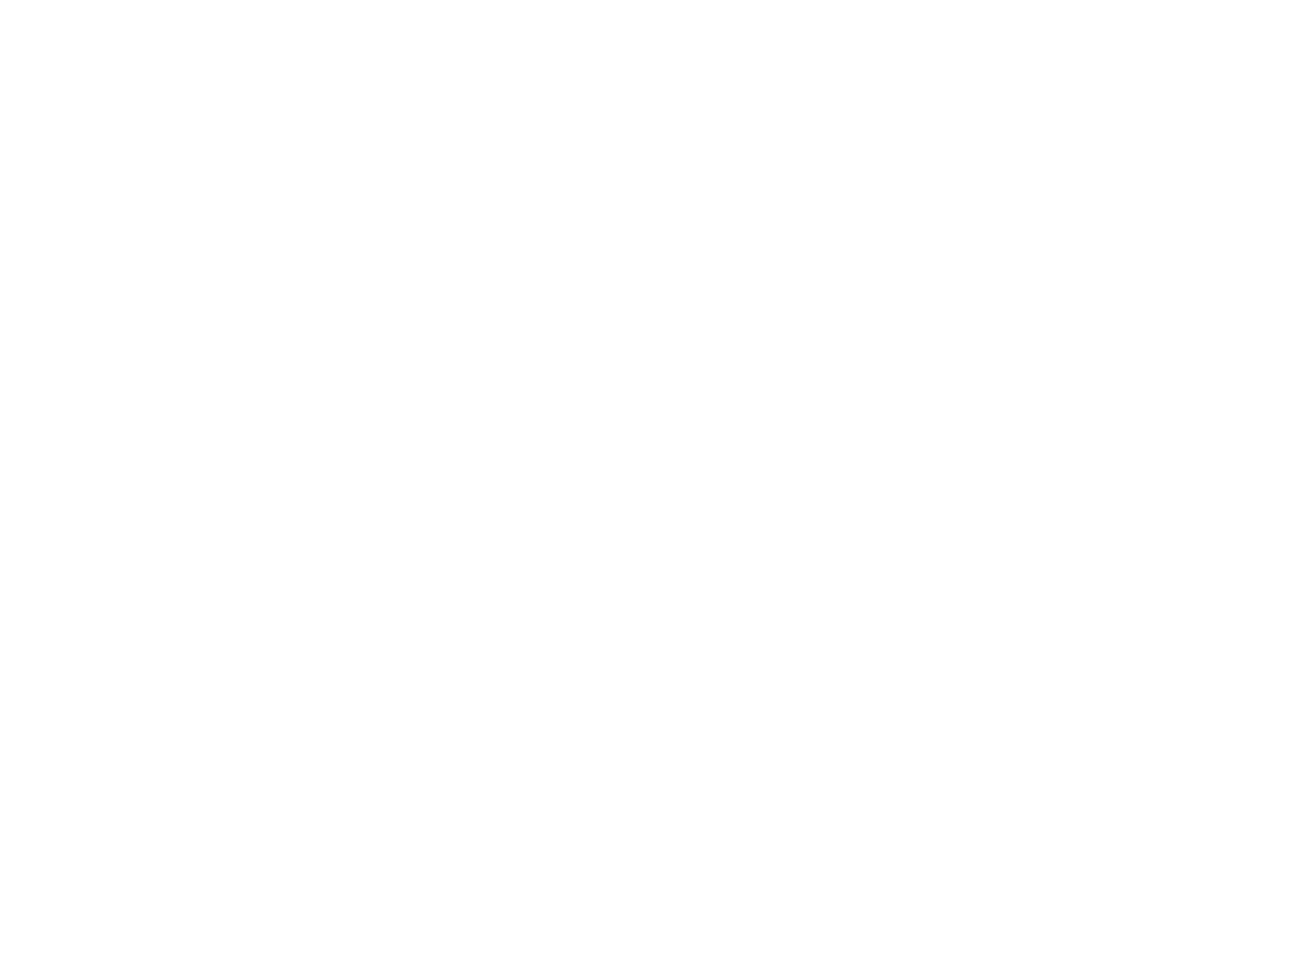

<IPython.core.display.Javascript object>


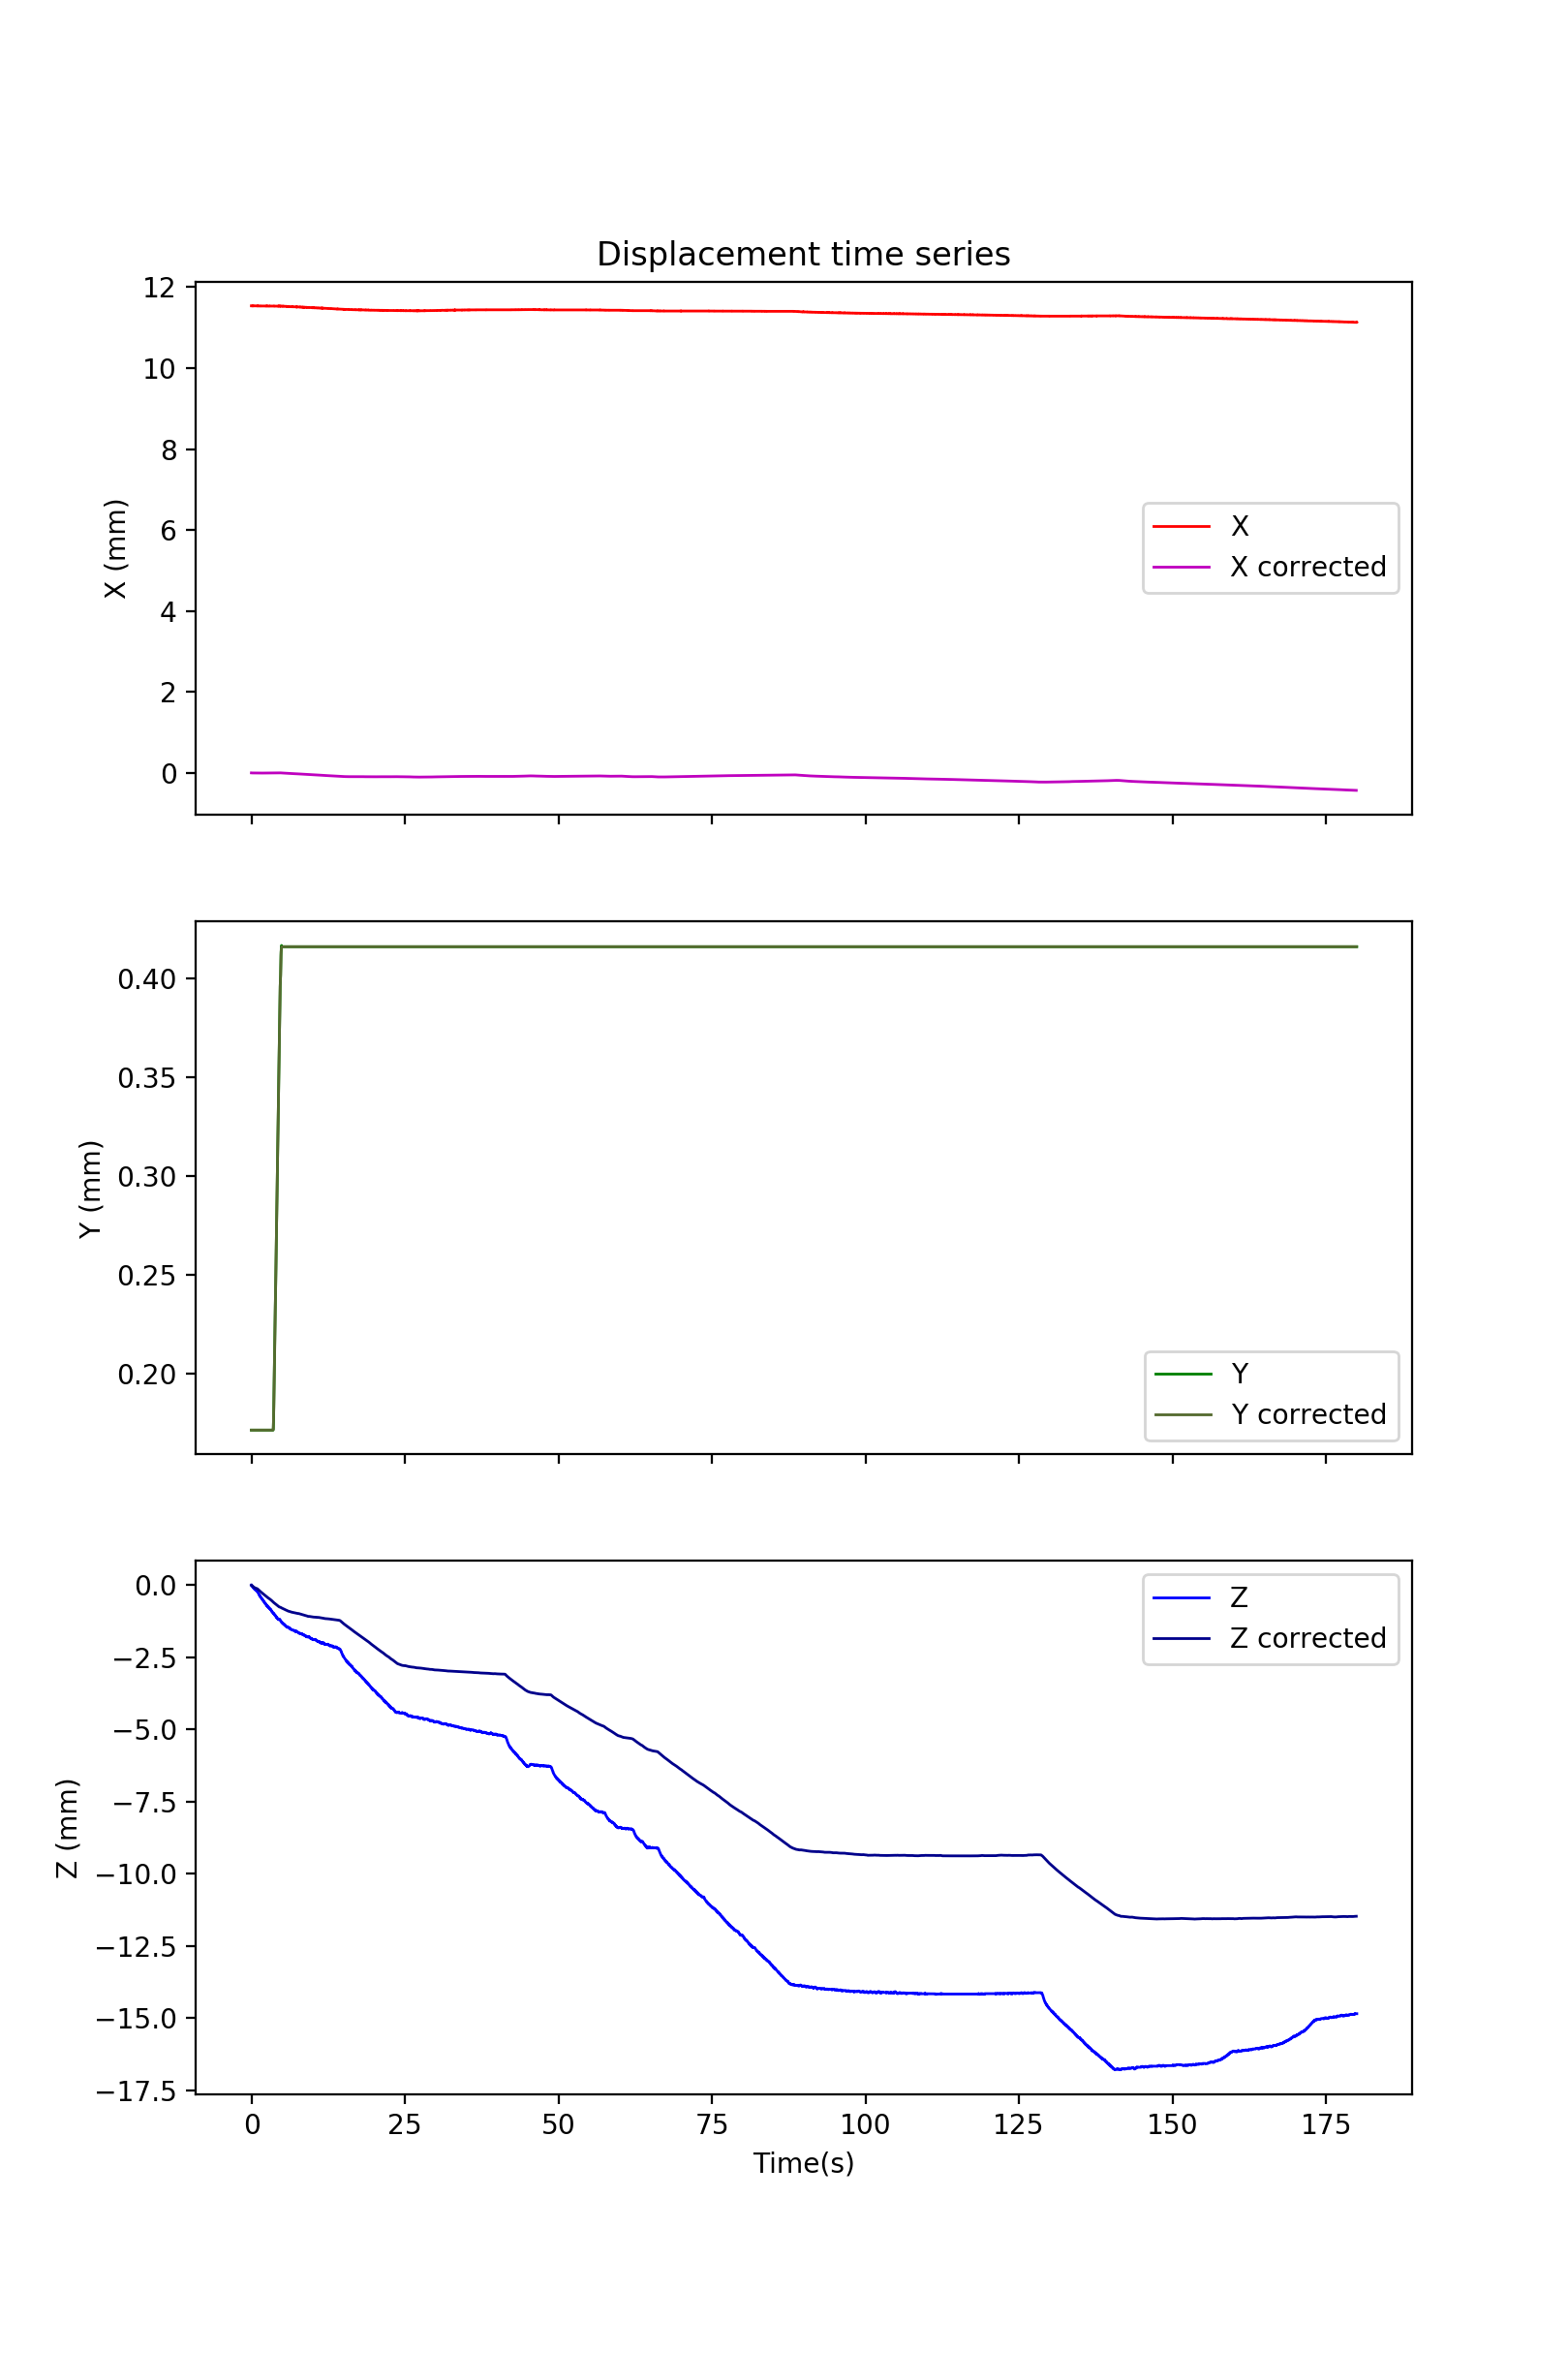

In [152]:
## Plot the raw and corrected displacements
units = {'Time':'(s)', 'X':'(mm)','Y':'(mm)','Z':'(mm)', 'V_x': '(mm/s)','V_y': '(mm/s)','V_z': '(mm/s)', 'Theta':'(rad)'}

import seaborn as sns
plt.figure()

title = 'Displacement time series'
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize = (8,12))
ax1.set_title(title)
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['X'], color = 'r', linewidth = 1, label = 'X', ax = ax1, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['X'], color = 'm', linewidth = 1, label = 'X corrected', ax = ax1, ci = None)
ax1.set_ylabel('X '+units['X'])
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['Y'], color = 'g', linewidth = 1, label = 'Y', ax = ax2, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['Y'], color = 'darkolivegreen', linewidth = 1, label = 'Y corrected', ax = ax2, ci = None)
ax2.set_ylabel('Y '+units['Y'])
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['Z'], color = 'b', linewidth = 1, label = 'Z', ax = ax3, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['Z'], color = 'darkblue', linewidth = 1, label = 'Z corrected', ax = ax3, ci = None)

ax3.set_ylabel('Z '+units['Z'])
ax3.set_xlabel('Time' + units['Time'])
plt.show()

0      -617.378436
1      -617.388858
2      -617.385674
3      -617.399281
4      -617.396096
           ...    
2660   -625.784499
2661   -625.784499
2662   -625.774088
2663   -625.770903
2664   -625.781314
Name: Z, Length: 2665, dtype: float64


0         0.000000
1         0.100324
2         0.169596
3         0.265820
4         0.344847
           ...    
2660    239.518380
2661    239.614484
2662    239.696903
2663    239.812107
2664    239.897554
Name: Time, Length: 2665, dtype: float64

10
9
8
7
6
5
4
3
2
1
